<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/Pytorch007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as F
from torch import nn, optim
from torch.autograd import Variable

CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()

trigram = [((test_sentence[i], test_sentence[i + 1]), test_sentence[i + 2])
           for i in range(len(test_sentence) - 2)]

vocb = set(test_sentence)
word_to_idx = {word: i for i, word in enumerate(vocb)}
idx_to_word = {word_to_idx[word]: word for word in word_to_idx}


class NgramModel(nn.Module):
    def __init__(self, vocb_size, context_size, n_dim):
        super(NgramModel, self).__init__()
        self.n_word = vocb_size
        self.embedding = nn.Embedding(self.n_word, n_dim)
        self.linear1 = nn.Linear(context_size * n_dim, 128)
        self.linear2 = nn.Linear(128, self.n_word)

    def forward(self, x):
        emb = self.embedding(x)
        emb = emb.view(1, -1)
        out = self.linear1(emb)
        out = F.relu(out)
        out = self.linear2(out)
        log_prob = F.log_softmax(out)
        return log_prob


ngrammodel = NgramModel(len(word_to_idx), CONTEXT_SIZE, 100)
criterion = nn.NLLLoss()
optimizer = optim.SGD(ngrammodel.parameters(), lr=1e-3)

for epoch in range(100):
    print('epoch: {}'.format(epoch + 1))
    print('*' * 10)
    running_loss = 0
    for data in trigram:
        word, label = data
        word = Variable(torch.LongTensor([word_to_idx[i] for i in word]))
        label = Variable(torch.LongTensor([word_to_idx[label]]))
        # forward
        out = ngrammodel(word)
        loss = criterion(out, label)
        #running_loss += loss.data[0]
        running_loss += loss.item()
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Loss: {:.6f}'.format(running_loss / len(word_to_idx)))

word, label = trigram[3]
word = Variable(torch.LongTensor([word_to_idx[i] for i in word]))
out = ngrammodel(word)
_, predict_label = torch.max(out, 1)
#predict_word = idx_to_word[predict_label.data[0][0]]
predict_word = idx_to_word[predict_label.item()]
print('real word is {}, predict word is {}'.format(label, predict_word))

epoch: 1
**********
Loss: 5.364354
epoch: 2
**********
Loss: 5.304245
epoch: 3
**********


<ipython-input-1-a27ae5a7d23b>:46: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  log_prob = F.log_softmax(out)


Loss: 5.244939
epoch: 4
**********
Loss: 5.186293
epoch: 5
**********
Loss: 5.128154
epoch: 6
**********
Loss: 5.070645
epoch: 7
**********
Loss: 5.013387
epoch: 8
**********
Loss: 4.956424
epoch: 9
**********
Loss: 4.899705
epoch: 10
**********
Loss: 4.842987
epoch: 11
**********
Loss: 4.786368
epoch: 12
**********
Loss: 4.729777
epoch: 13
**********
Loss: 4.673059
epoch: 14
**********
Loss: 4.616306
epoch: 15
**********
Loss: 4.559240
epoch: 16
**********
Loss: 4.501844
epoch: 17
**********
Loss: 4.443992
epoch: 18
**********
Loss: 4.385690
epoch: 19
**********
Loss: 4.326745
epoch: 20
**********
Loss: 4.267359
epoch: 21
**********
Loss: 4.207354
epoch: 22
**********
Loss: 4.146805
epoch: 23
**********
Loss: 4.085692
epoch: 24
**********
Loss: 4.023903
epoch: 25
**********
Loss: 3.961431
epoch: 26
**********
Loss: 3.898282
epoch: 27
**********
Loss: 3.834693
epoch: 28
**********
Loss: 3.770267
epoch: 29
**********
Loss: 3.705086
epoch: 30
**********
Loss: 3.639574
epoch: 31
*********

In [2]:

#import base64
#
#pic_path = 'pic.png'
#with open(pic_path, "rb") as binary_file:
#    binary_file_data = binary_file.read()
#    base64_encoded_data = base64.b64encode(binary_file_data)
#    base64_message = base64_encoded_data.decode('utf-8')
#
#    encodedMdl_bytes = base64_message
#    print(encodedMdl_bytes)
#

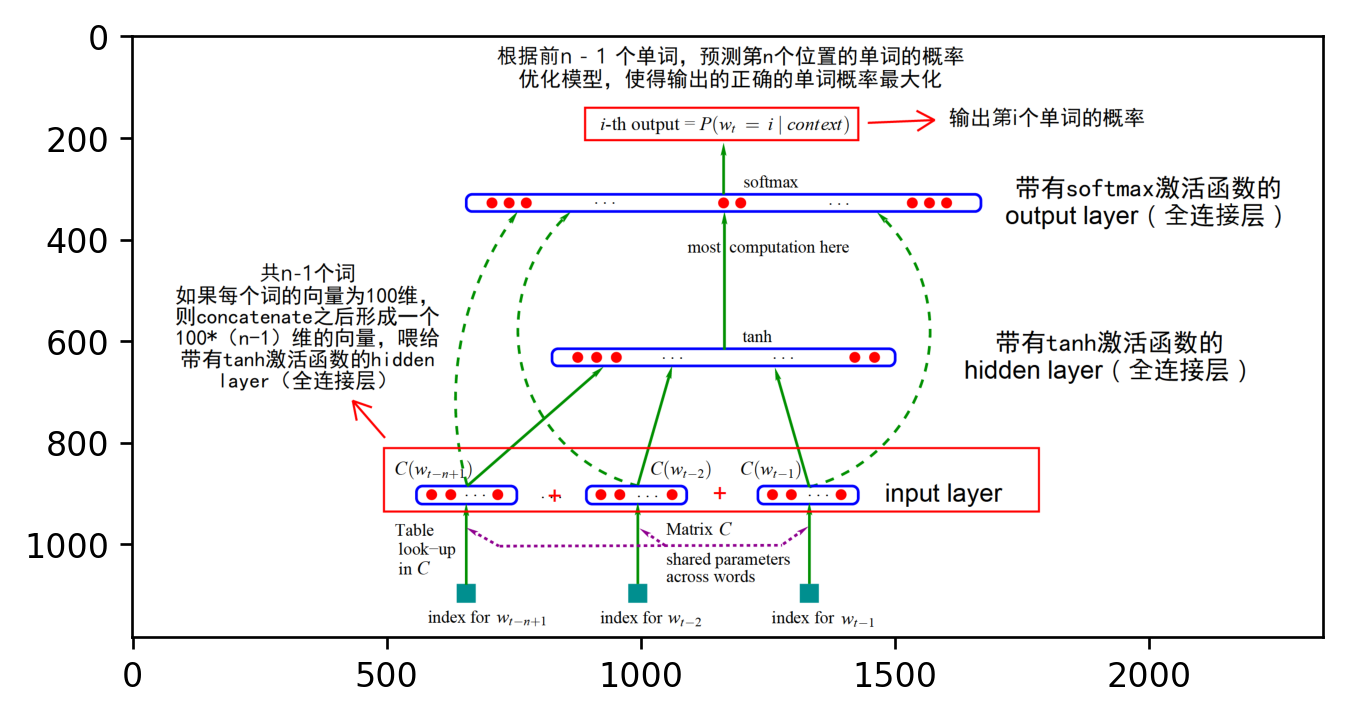

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('pic.png')
plt.figure(dpi=240)
plt.imshow(img)

In [4]:
import base64

encodedMdl=r'iVBORw0KGgoAAAANSUhEUgAACScAAASeCAYAAAA+ZAkeAAAgAElEQVR4Aey9DWxU55n2P2MZbItgBFlbkFo4KYIEy6TIZt/KpFFMW8Wk2phWMESlULV11DRG239H2TZWmmaUzUZu+0aTbcX0Q3G6WlyqeBK9wawaHKW1oy5YabGVBo9IQE5i5ARkF5ANyDZYnuuvM3M+7nPmnJlzxjP+4kJCc+bM83E/v+freO5r7scH/iMBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiCBPBDw5aFMFkkCJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACoDiJg4AESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESCAvBChOygtWFkoCJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEBxEscACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZBAXghQnJQXrCyUBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiA4iSOARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggbwQoDgpL1hZKAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAMVJHAMkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAJ5IUBxUl6wslASIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAGKkzgGSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAE8kKA4qS8YGWhJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACFCdxDJAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACeSFAMVJecHKQkmABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABChO4hggARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARLICwGKk/KClYWSAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAlQnMQxQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkkBcCFCflBSsLJQESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESoDiJY4AESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESCAvBChOygtWFkoCJEACJEACJEACJEACJDDvBG5MYSo+71bQgEVFYAbjgx9geNEOnDhuTN1A3oZ9/AambuSt9EU1UmjsQiQwhU/ODGKMQ9Shcxb7+ubQLN5e4gS4ry3xDmbzSIAESIAESIAESIAESIAEbiECFCfdQp3NppIACZAACZAACZAACeSRQCyEKp8PPl8RqkL9eawom6KnEAvVwKfYVxRAdCqbMuYyTxxTw9049J0duO+7R3BuMhtP8w0MRR7CuuoAQtH36Kyey+5bzHXF30Nr7W0oKq9B4w/+E539FzA/02UaY32HsHfb1xAeuOqB6DDad92N6j1P4qWeoZzaHh/7KyJ7t+LeYDcmPFjEpCQwZwQm3kRzZQlWKet+xymMeBYZTuPi74P4+jOHcXJ4CY7yeV/f4rh27Dl871C3dwFo/BL624I4+PLZ/Ikv52yg5qii0Xfwamd/FuNcqf9jdIYjOBa7PIc8ua/NuucXXZ/PusULo4CpEcR6ovhV+zsYWxgW0QoSIAESIAESIAESIAESWLQEKE5atF1Hw0mABEiABEiABEiABBYUARfipJnhXrwWjSKa7f/XejE8k02rM4mTpjDc25m9XXbtydpWYGbot3hodUFSTOVbhvKdv8CAV4FSwkm9XC3jLjR1XcoGHPPcUgTimOg+iEq/IjJU/5fsQPjs5BxTmEAssgsVRX74fH4Ub2nByQmXAr2LL6GhRMmn2F+Cih0h9IxltWiINscx2f8CdlaUJMst2ILgiSvic14uLQIzGOv+D3zz3zqyFIbOgsZUFIEibf6VIRAd9VDYDK5EH8Fqbe76fCjY+K/4s6fxP4hIfWlynPtXYcODQUQH53r+e2iyp6QLYX0bR0/zhsS6VlRxHw6E/hvdsZEMIsorGOh4BoHqNfArfbv6EUSvzHZNswE3NYrBWAyxOf//AYbHp20Mynwr3t+CjT4f/KV34vONj+OnXUPuhUY330DT7cpzVgkqtn8DLb/qzvL5MrOdyRTc19ySSpdu4fb5ZXQFv4CqqipUVX0OO8N/dz8W0zV43j+7it7Q/ShLPI/54FvxVbRfzsP6M+/tpAEkQAIkQAIkQAIkQAIkMHcEKE6aO9asiQRIgARIgARIgARIYCkTcCFOmooGUCQcp7oAwu29rKMeZRInjSIaKDMEGW7tSZcua1uVQXITI90h7Chfptq0HOsPvIoRl/oMYBJnwztQkrDPj5IdhzDkOu9SHqRsW1oC8Q8Q2bFGzIMVqG19b14cbDPnfokvrtIEesXY5Cpa0Q18HH4Ahfq89Dpv0tCZ7EWoVhVtKIKp2hD67ASDN7oQ3Ko4J7X/96Ku4WsIBAKz/x+MYjiNiUv3oxmMx97KqXj0td5hOLlX4+d/h12JtdeP4o1fR6Tv0tzNgZm/IFiprfsexUkzpxDaogrolDFa/X0cH7npaVjMnA5hS4Emjsrh/PFkRZ4SL4T1baYXLZuKxBq7BjsiH2QYXzdwvu1hrBLrWmXzm7mP3jYURp3e99oYmIvXDWjuGc+q083PlB5F2OdaUaMLcQuwaudvcT7Pz0nc12z2QY/72sLtc/F3hu821IXfz2pMK5ni48M441kk+CFGPUfKc2fidE8z1unrTynqI4PuMjIVCZAACZAACZAACZAACZCALQGKk2yx8CYJkAAJkAAJkAAJkAAJeCRAcZJwOObi+DglescTqC7WosCU4YuRmKND3eitOCZPt2K7Fj2moAYtp7Jz/Bll8ipbAvGR43j2wDcQjH6UbRFzlO8mLrbvNkVdUcSD/vXfxXFPkVdyZa5yLOGDqsDOB5+bcWwSZygRRnaj/aI3cYaz9XFMnnoK1brzfjXuC59OnY+myDc5duxXhRBzNnBhf5Itl0SbpdM3N0yLAlGHaDUXcHT/nckINZoztvge7I38VRyNKSNkaCI0N697EBm8kaGf+hGq0sQrXsRJlvlSXIvg0T4XUXDew19jF9RxfBndzXcbbS/ehuaXXnEhCutA+2+OIZZd8JsMPHL18cJY32b6WrBJF8T4ULAlhNNOKjnZdKuwqmAbQqdzfOyeaY4Wo2zDZiGy1Mb33agoLUxGfir7rM3nSrrP6lFW/KUV2KwLNbUyqlC1uQKlOocahGLZHB5qXhf8m1rQ54ZlgusMLrU9hGXaHPffi5a+65J4nq4t85T7Gnye9rWF3OfSttS1+2ZvGPsyipS/h0j/NZgFWG73vGznkYuhPv0nNK9T5n3SlsL6CC64yMYkJEACJEACJEACJEACJEAC9gQoTrLnwrskQAIkQAIkQAIkQAIk4I2AJ3HSGjSE/9eF41Q5YuRddDZvTn4pnnU0IuE0sC1DRE6qCCBsd0ybq3ttCNap0VVs6/GGVImAdC6y04iYUHwfWgcyOCTH3kSweqXqRFiJLS1v5z7Cgtdm3JLpJ3D++E/U6FdFqAr1L2gK8YtHsHetFrFFOsOWYe3eI7iY54gStnBMYqPMEcCmTwZxp+7wdhORxLbWNDdHcLxpoyHeKHkQkSGL2ER38BeitOJuB+e9cNLbOe7Fvc0VpUZ9npy4aZoxHx/pXOTYcnE95+IkAFMf4XjoK1ivHWOTcMjeho17f6MerzmB/pYtuqNWc9hmfnXjPM5OnOQ8fzMz1oRa8aFD2KGJWjXRhtvXnOx3+RuYznzmcn2bwOnQNhToTL2tUeaoVpnXQ880TXPUaaxqz0rp9jRjDGtjK8UWV3Wl5LLcuITO/Xeo87AIm1p6U8WilhzG24uIBtbqc7igthVn52qP476G7Pe1hdzn4u8MX6o4yRx9yGldTs67/IiTPkL0ie8h+EwIoZDX/z9EoGqFPl98hVUIPO21jBBCLc3Y7zFSljFneUUCJEACJEACJEACJEACS4cAxUlLpy/ZEhIgARIgARIgARIggfkk4EmclPrFvbPp4gv/rB2gmcrQHG4+j7/itlotysnaVkuZM6cRvm+16hTwo+S+F3DWKTrA5Ls4tPMzqphhGcp3/kJ1plvK5Nu8EoiPnkDkO9uwShfKpHPk5tUUd4XHh9Cxt9IQwfjX4+HvPYz1uv2rsb31FCbdlZbDVDO4En3EiOZUtBUtvVcdyv8U0YDmqPahoPopnLI7ds0ht9vbZgFHAVYHXsEVt5mzSGdyUi5mcdLNXoT3KUf6HEBzyzMOztEf4/H6O4xx6FuG8sARjEAc69bZg37rcTfvhtGwXHP23on97X9zFr7296AzGkW6Y92S3XQToyd/hsb12jFpSvlFqGzqxBWI/cSXSYRmRJHxLd+F9quZFBCGsMNn4+C2HULxYRw9sEFw01i4e00KSCxRk3QBjbsyfLna72wbOMubC2V9sx7ptvoRRK84beZ2bTavcT7fOuxq/zjDkXB25TjccyUY0p5x0u1pxhjOrzjpNFprtPl5D4K91xwaZnP7+uvYv0Y7NnSuj6nivpb9vraQ+1zuCzZ/4+h/I/lgjiimRSNT1tqkOGk6FsVzoZ8i0t4hItcdQThwl/q3wF0IhI8Yn7VH0Br6DXpG04WvM+ZlZiGty3Xf6z6hpF/MzzE2SwlvkQAJkAAJkAAJkAAJkEA2BChOyoYa85AACZAACZAACZAACZCAlYD+xbuz08pwSNh8cW8tT38vvvDP2gGaqQzN4TbbL85FOWltFemy+XI/L3mc+03vCl6kJRAfew/RUADVq4zjL5JOoIXM1hKdy6dFErFECfJXYm/HUO4c4WlJig+VKBPb7kF9cwQ9w85Rw+Ifh7G9UHWo+Tei6fiIKCSXl1dwIrglGf2k+G7sav0TRjLpTWZRvbFm+rC8sR1O0qxZVLFAslqOo/StRPXBY+7YSlHFsofQdsmL4CN98+Mjb6Bl+1r4fX4U14bQlxC8if0ko4BIOITlnnCjC8GtWgQtedybSJ+xbMX2Gzh/eA/KNSGhvxINP/hJUvz1k2+gRo+EtAo1+5+0FYU9Fx3ANcuRhXXB36qO7za01JfpETMKNu7HLzuihlM82oH2yE8Rei66QI91WzjrmzmyWwHW7H8dXg8SS0ZPKsSq6t148qW3MDieToyQfmynfCrnkSqSSEkD7dkl3Z5mjOG8ipOutqNREyWua0aPBxSmKDaeRWKpVDzf4b6GIvU51tO+tqD7PMO+oP+N5IN5XmhzyhAn2Y8nWb5TZDP7nMm7xrz0+ZyObdT2JPG6YR3KZhkFMvtIWenaw89IgARIgARIgARIgARIYPESoDhp8fYdLScBEiABEiABEiABEpgPAvFxDJ9Rjluz/O9sxoaEs2E5NjS/avn8DAZHJ2E42vMoTpoaxaDVNnk03PIGhN8Vtp8ZxnhcOAdm9ateUY50RKf0k0iXF6FRNr96TudsTGkAb+gEpjE++BZeenK3jShJ64eFyjaOiZMt2FLs18UH/vXfxtGRm8nWTbyNli3aEYE++Iq34uDxT/IgULqOWPTntsKJUOgZPNXyFJ5JewzJT/CDBiPyk7+8Ho87Hl3yc0RjXiUBemcnL6504MA/fwORvkt5YGGuy1gzrQ5Nc7pF/8401jwIk5SGn2tFjSbO2diC/lyLxZSIdF/7Nn6lH+EnncSZ9jLhEJZ7wo2j2L9Sm3fS0SzSZxQnzWCs+wlU6/O3GJuC3eIYz0mcDe9ASWKPSRN1b7IXoVr1OFKTCCs5quLnf4udq9QoM/MlUsxqgC+U9U0xfhSd+yv0ddbnuwtNXZeMVo3H0JU4OvYYevoHLM9P4nll4E28/J8dODkg7qU874jPEpHCXkNXzEV8N5M4aTWqGnYjEFCincn/jairKILPV4DSqi9bPtPSfRlVpcnxUlBRh92m/Gqa3XWoKND2Rzn+DSSZrmZ6g6hMjO0C3N70BtRdK1M2AJfQ1aRFoPGjpO4H+G9Xx/ZGEX2tF8OutY/c15w6I9t9bWH3eYZ9YdbipGvoDd6jriHZzJlJjA7/A1NOnWJ7/waGIg9iRdl9ePxXJzA6271V+fvxw1GPNtgaxpskQAIkQAIkQAIkQAIksKgJUJy0qLuPxpMACZAACZAACZAACcw5AZMDS3MuZXpNijMMh0Qmh65slfjCXzp3ZRJ5LRwAro4uSJQpxEIVAYTdOqpS0rUhWKc6edPams5pFXIQaeT7/nOI9FyQJHmdkcBldDXfrUcAMMbbMpRtb0LTA9pxfAtTnBQ//zvsKl9mOMyLt6HlpHRixzE58AJ2aMIExRGcF4GSmH95F+t5WXsyDoC8JzDWzKUkTopjovclPBd9P3lUoOlYMu/HUd7sasLt6rgxR6TIV/eIPSmjgEiIjUx7grhvilIj76cbq8rc/AV26vPXj5LtrThtPcpw8gRaqrWjr8qxs+2cWVAX/wRvPLo5GQlMYViwBcETcg1QGCYd1EmRkw/+tfvQcdG9FCRfvZCp3IWzvgG4fBiNKzQxmg8+a6Qfr88tntZJl/vPpTY0LMv0LJePz10ILa73oPXrmvgp+bq7rkIdt8tQVvOQg1AqgH3hXrNwyXSkm8f2mOZwphHIfc2JkKt9bdH1eYZ9Qcxx8z4lx0m6ueA2nRP1LO5feQ3712rPiIVYteVRHD7r4fhEpcr4p3j7tRPuoiBmYSKzkAAJkAAJkAAJkAAJkMBiJEBx0mLsNdpMAiRAAiRAAiRAAiQwfwRyIk4qRKnrYwI2Y0NZcVJA4cYxJBwAhlgkjQMqUab80j9NWi8OQTe2zl8vsuacEEgdN/5V9yLw/Bs4PzWCaEA7DsmlczgnNrkrJD5yDAerRVQkXxl2hPuTYhFTETcxcvz7IjqLIlDaggOHT9ukNWX08CaVo6u562U+6mnTCT48mOyU1HRcVxWqquvQsMfsVDdHIlE/a6xHTVXyKJWtwS7cUMt35cR1smVB3heiGv/tqP1BB/52+OtYq0Y+Ktj4PbyhRe5yZf80LkS+hMJE/87VPHNwQg9H8URTEM+0RtAe7UTvsBKjQoiNTHuCi/uOwqebGOkOYYcuTPLBX74Hh89ro0aCm8GV6CNYrY7/guqncEoXMN3Exei3UFmkiWZKURvqtZ/XyjFUWzSR00psaXlbRGiS9S2M64W1vk3gdGibIQDzFWJd859gOoXM63OLvp65eV5xOS9GexBJG6EuXwJpF9HssnruTLIxC0FmcLn9q1jhiZ9gbJrDmcY697XAbPa1Bd/nl9EV/AKqEvt2Leobv4aGKkOQXvH5etRVK3v6VjRGzgBijpvHpBwnqjhJj6QWRbQrhvHEULNJl2kI2nweH3kLoS9uQW3TfyGm7wU2CSGOsFXmS/Hn8GiHKihOJJ/E4JtvZSjjKgYOPYxyv8doiHbm8B4JkAAJkAAJkAAJkAAJLCECFCctoc5kU0iABEiABEiABEiABOaAwHQM0eesTqofIlC1Qo3AsgwVgZ8haooqlDxWRDrasxIfuHEM2TrYnkZz/bqkfYVVCDwt7H8uiti0/NJfOKKydWAp+dzYOgfdZa0iPj6MM4ljYJJH7Vk/53svBIxxkxAlhaIYGNNczsZnPp9L57CXqmeRNtVxn8lxpDmYxNzwr8X2ljdy9Gt4KfawOxZSHFOkjN13w2hYrtmyGc2d7zofg5QY66+iecNydX3KszhpFg5VbU2Ujku5Zsr7s+j+ec5qM5a0dTYlcpfFVNu9R6ztvhWoCvwwQ+Q5F0IIS7Wpb+V4FeNJOJ99vnsQ7FUiTLgQIZn2CpHeQZwUv/gKDlRqQiHFaWyNeGaxeOZdvPj1byLUcQojU9ZzeeKYGj6Bw6Fv4aFvtuGc45FVM7jS+SN8tflFHItdNkdfslQ3328X3Po28Uc0rS1U1x9l3bLZD4ajCGrHn+1vRksuRELPBNG0VxE/7kMw+lGeuiU5F/ylFdicEGl8CS09l3Nf1yzWVdO6GX8PrbXas+pyVDQczLBehBB6OoCqQnW/Mc3VTM2U6wT3NdkPrva1Bd/n8hlPex6xe1Xnu9gfjPmiiJfuRkWptj6o4iSR1uAm6lv2ENouOS7WDgMzjslzR/CoLkr3o7jq2zgcu2qTfgZjf/5XbNSOXrSJmDlz9gXcV1KA4o1fdzji1rrXr0T1o0dwLq0gysYU3iIBEiABEiABEiABEiCBJUiA4qQl2KlsEgmQAAmQAAmQAAmQwBwTiL+Dlo2a89/G8aaaYzgkilBR1+h4DIc5sshu49fInhxDkoFwEtmWIb70n9WxblFDlPVaL4a9+g6kyXm6ln1QFerPUy23SrHj6I08jdb2ExhOcfqLMWXnjJ4XRHFMxn6HA1UyYtIylD/06zSiBM1Qq6NJccIpx9f9CJ3nJ7REWb6K+emGlclpme4YFM2czIIPLeWsX3XbvESHS0ZMqtpcgVK/+fg2Y76a78/aznktwCYal68E1S0n7KP2aLbeOIr9K7UoP3ZOYDf3Mo2XGzj/8mP4auitNMI7OV6FOGkojDrNmasf1SbGnmnvcXHfQZyUwDE1hO4XvoHq1Z/F3o5T6AisR9mGzWoUD3U8qZG4kpE9cn1vDyKDdpGatM6aj9eFuL6Zj8RLChCdn5Hmg9rs6pRzwQff2kfRNWEVwM2uhkRufV1V5nimOSxt8mPl/qNqJLo4JroPolKN0uYr2IbQaRd7l6zbNIcztUva4aLPZT0Z26jULdaQdGtFJjPdfK7bNof7ml7nQu1zJXLS/aipf1j9W+bLqCotUEWI6t84ichRqZGTNCFy6qtVnLQcG1veUcWg4pnS0zjUOlgRJ/0/PLXzLtNRxP5Vn0fw+CcmwenMuV/jIS0yn40wCZOn0LpdixKl/Bjjs/hq2xnof/LEL+Jk60Mo1+aazwf/qm34zqFum2dlzT6+kgAJkAAJkAAJkAAJkMCtQ4DipFunr9lSEiABEiABEiABEiCBfBG4EEG99svyNOICw9EuHLoZbRIOnqy+kFcqyFSG+NK/KoRYBptu9oaxLxHloAnh3uSBCxmypP/4Zi/C+1wc/aRFVtBfvUdEMPrAhbMsYfUMxmNv6aKr13qHDQcEJjB88vdoPbgPDXX3qo7xe1HXsA8HfxpF38hk+nYv6U/FmEozJ+YOwQTOd/4I28uWiQgey1C+8xcYEL9kn+5pxjotkk2K3XYCJdXpFDmB0ax90mJ+ptRpQ8iT01LJn40Ttx+h6jJUbHYWdcjj12yszMktY74uJXGSgkYc75YYb34UV38fx9Me6Sb70Y0QyS5NOmFDHJN9IdQWKwKoEqzf9SL69EhosjvleBV7mRyXemQLYbNp/3JxP6PgII6p8auYglxr7Nqch3sF9yM8dFNCmefrBbq+TbyJ5kpNuK31g9u9d66QnkGkcSuq6xqwR3+2cPs80oi6iiJ9TymoqMNuT2XsQWN9Laq2BtGVTusm51ZG4Y6cn4J1/ANEdqxRbS3A6sAruOIGsazbNIczZXawwymbrCdjG5VCxBqSca3QKl1E+5onHg6s57LPTeJZsS9o6EU0JPM8kXPIKk4S4xfvI1x3W3L8ehqHmgHqa/wS+l78Gtbrx3kq4qK70dR5AcA0xvoOYe9GtR47YVL8E7zx6GbjmEoliuaTR3FeFejHx/6KyN57UKw/Ry5D+Y6f4PisReyWdvAtCZAACZAACZAACZAACSxiAhQnLeLOo+kkQAIkQAIkQAIkQAILgcAMLrU9hGX6F9Hyy3SzfYaj3eaLe3NS8U44HbL+Qj5TGcK560KclF07RJOslyYnjObAdPNqx/oCeiLPJY8qifRg1FKXYbtdXkvixFvBzmcIJOKjf0E4IB0QqfYqv5RuOnw6fTQUuyqXxD0xptwIbvLY5vjYKbQ1bcMq8St2JeqRVZiUMEE40Hy2Ds8JnD96ENUJAYfs80Ksqt6L549/hCnPbZFjzMW4NM2XdGITzZAsnbhVhtM9NcKBMRe0WvLxaszXuakvH21wLtMiUCr+HL579CMhfrTmlP3opt+1/C7zzZxG+D4RDcLndOyNHK9iL5PjUt+rRN36PcUuF/dt55/WJvmqrjVFZdjgOlrSZmwoK9ZFJeZjhhwEeRvKjIgbprZIW+b+euGubxM4HdpmOPFdPCNlR28aI8d+jn974b9wvPcsRlOi+GUqVYxF3Ua5ts/BdabxJOdWRuGOnJ/afjKDsePfxXptD3QbNUlBJ+vOZKcJtZ0dpgTmN7KejG1Ussp+E+uQuVTLO5nHvl+NY8QsWXP41tW+5omHHes57vNzrajRxpfd2i2ercyM5bNiOnGS6LvKIHr1MEXZdIyMXqgetzYxiI6mreI5cSWqm15Eh+mI7iM41PQ5Q3hUvBXNRz8Uz3zj6AvVGZ/7b0dt8H/SRCHMxnbmIQESIAESIAESIAESIEfmKzgAACAASURBVIHFT4DipMXfh2wBCZAACZAACZAACZDAvBIYRntjme7k9CWEGH/D+Ohl8YV10kDDIeHWkaLkE04HT44hCSVTGcI5MM/iJFdOYvX4pyRr69FswoFh0xajDzSnneRkdy3YqeKkyZFjOFgtjgZTneKbK0rhtzo3/Rtw4Oiw6cgIu1qW3j0xpuZLnBS/jIHoU9i5vkTMT8UhuRLVza/pv3Q3sc/kYEskVn5d/yJ2pZSrlK2IlAIIdZzCiGsnuRxjhSirfywprguF7F+fDqBKj9S2DvXNT9un0/M/hvqyQpWB27WnH6GaCovYwyzoMDsYTRRz9saYr0tRnKRgUgVKlf+Mg5ajZVIhirXNlfNeK8FDvsm/4yVT1Acf/OVfRqj7U7GGyfEqxpN0put7lahbv6fY5eK+nYNba9KsX2UbXI4t4Vz3mdqShTHxcQy/24NOzfHd+TZiox4j7S3w9S1+/rfYuUo75kkKQTLsvfExDL75Wzz5rf/Am9fdhKO7gq6mSmONLyrD3QfaccFN1kTXZY6m43g0oP4sorSvOLujBZUyigOIplO1yrmVce7Lsa2ynuhGcJMmxvMQNUnhc7UdjcvV/lvXjJ5pt+Nd2sF9TVJzta8tqj63/khD7Ataw8X6aX52kM+KacRJM39BsFKNfGnzbK9V4/41ufc+8s3/xvnEWuEkppRrl7i2i6qkVB4fQsfeSvj9n8HOQ+/eoj9OcN8LTEkCJEACJEACJEACJHBrEqA46dbsd7aaBEiABEiABEiABEggVwQuH0bjCuUYHO1Laz+K/umfUFqQ+sW04ZCw+eLe0R7h4MnaIZqpDOEccPGlf3btcGyg6Zf5ZqeFQx7daWPn5BROb5u2GLbb5bWrT7BTxEl7nkdkZzl8SlSRjQG0Hu0XIpQ4pkb+hvbg/SjTf0Hug3/9d3F8bFY/87YzbIHfE2NqzsVJExjuiaC5vtKIdKLNT8VhFH4HY06Oa31sKfM5/TyNj76NnzZ+NrWORF1+FJXXoLG5Fe095zDuVF+iF81jzFhLtDUll6/p25R+UJntdDVX0xeY8VNjvroUkGQscT4SXEcs+vOkgOzZMNo6ovoxkdGEOKUDv2//vSVCg0zzGrpiygFMYm1LESgkP0uKO7fgC6ETMDQE6fLZ8Ih/iu7Ql1Eu1jCfyRErx4EYT3Lu6HuVqFu/p9Tp4n6G+WdjuYdbsg0ux5ZwrmcWJzmsf/GLOBk+gNpyTSgi5rZ/FTY2Puvi+J9FsL5pDnpt3S15AM3frlafk5z33pn+53GfHtGqAvs7rbEP7bpYHPeUqG8ltofPCDGdXZ4c3bvUhoZlah8u34X2q2kX+uwrlXMrZe5bi5VjW2H9Z5xs2WZEc/ESNUkpWo57m2cqa+3Ge2mHGOfamMjpq1iHDANcXpntXDD72qLqc4tAUF2746Mf4cNx9dlXjCMzY7lWphEnCR7+mlacc9m7XpLFB0KolvteYowqosO7UCaPgTPthzY1TP4dr756q0ZNteHBWyRAAiRAAiRAAiRAAiRgIUBxkgUI35IACZAACZAACZAACZCAewIzuNz+Vazw+eAvKsJyq7PF8stZw9HuxZEiHCcm5657K52jL8UxNX4VUxDOgdIqNAQCCKT5v7uuQj2qpQgVdY1p0wYC+xCMfpTeWOF0SDotpnF1/Lqzc1FPb+fkFE5vG0ea0Qd2ee3MFPz1fnY4EkzPfhWnWx9AiT4ebkdDWwYGet6lciHG1FyJk+KXETv2or0oSem7lAgwNqz1saU4U13M0/gl9Lc9ippVWmQiqxO2GBubj2PMpirjlnmMLQlx0mAEja6P2KpC1ecOovNaqmPfmK8uBSQG1AV0JeeCdXy4eb8WgehFs6AnRaAg1j1fKeojg6L98jO3x8FdxcChhw2BkskZK8ermCNy7uhrr6jbtH+5uO9m/olWeruUbXA5toRzPStx0uS7OLTzM6nR9fR9IjkW/Ou/jaMjN1Obs2jWt5u42LEPa3UnfwmqW/6MvlBNRnESJv6IprXaWurHisbDuJxKwnzn5htoul1EaCr8EiIXDGmeOXFu38X7W7BR679ZHzWVxjY5t1LmvjWfHNtFqHrmT4h1tuIb1Wvg9y1HZfObmNCyxK9i9B8ZInbJca/Pa62AdK/SDjfr3GzSiHUonUm2n5ntNAtnLBnmcl9bTH0uoxol5sNK1OzZjZpVqw2hoBhHZsZyf7SKkwpQWvXl5N8Yu+tQUZAcIwUVddit/o2yp6EO1Ylnja1ojJyxdJjHt9Mn8OxXHsZ3nvg52o72oP/MMMbjNzFy9NvGkYimvVAJbnsV4ylRMrW/rTzWz+QkQAIkQAIkQAIkQAIkcIsQoDjpFuloNpMESIAESIAESIAESCAPBOLvobV2ReIop3X1X8DdiS/ll+Oze76FneXq8QPF29ByUol6oQQICqhRVgpRWnE3HI8KMTn1xVFKJueul/YI50tRAB2j59DT/jwefXATSqtDiElxkuZoy9mrCxGQcMIknBZXXkFg9XKUbqjH/pbf4s3BMbNQSU9vV7Zwets40ow+sMtrx1SwU5m4ioQ08SaaK5frEbWWNbThkl3xS/aedDi5ZT07GHHrcXv6GL4NGwNhnBy1cfhbq9THluIEc+/wjI+eQOQ727BKd8gr+f0org2hbzJVdGOuVo4xF6xMNroRm4g54aFNZhuVd9LODIIO4Yh0JbZyWNuM+ZqhvlRjF9AdOReycMDrYgvZj9Z+l59tQHPPuGi//MyaTyRLuVQFSgXWoynlOBBzRI5Lfe0VdZv62MX9WY3VlMZYbsg2uBxbckyb2mIpOvFW9nkRqp58WQiTbsPGxh/i0O+Po7evB0df+jF2bbxN3yt8VgGJWvziWN+Uo5JewA5xnFtyv5xAzI04CVdxMrjZEHCt+CraL2eIOmg6itOHwvoILth1iad7sv+ymLP63mOX18Uab7VVzi2v4qSQevTt1Ic4+uPn8OpFZR/Uom/didU7DmEo3RYlx70+r60G2r2Xc8xFmz21UalPrCGzWiuknRnWAskibR+r/e6wTrja1zzxkG0QrOeoz+NnW1GrCoes+33BlhBOK1NYsDMf33w3Kko1QaJVnGQ3f5zuiXbbDUeHe0oEzJ8/2+EwB67hXMdjqC5ORsf1lz2Alq5P1L9HJnD++H9g18bVWLv3CC6KORS/eAR71652/9zpYBtvkwAJkAAJkAAJkAAJkMBSJUBx0lLtWbaLBEiABEiABEiABEggzwTimOg+iEpFjOC/Fy2Hf4iqhLNC+YL8r6Zf2mpfzkuHhPULfFfvHRwdmRsqHBf+FShdqTkCfPAlnE3z7IgTTpiiwO9xNvKgiDqk8F2D6kAI0YHLSaeAnt7OGSEcVjaONKMP7PLakRTsEv1bhsb2YbuElnvX0Bu8x3A4r2tGz9wEc7DYMV9v5Zhyy3r2tlod+P6y+xGMvo8MsSGMivWxpTjAhPDCSJHmahpjA1GEAvcmRUoFWxA8kRQmpslkEf24YGWy0Y3YRMwJz22Slpvngjn6gUxndkQWVgXwdCiUPNbM9PoY6svUtchhbTPmawansaX6hfV2GuPDHyAWi+HM8LgQWkqelrE2FEad6uz1V4cwkHB8yn609rv4rOB+hIekEE98llHYYCV3Ce/2nrXMHwe75bjU115Rt6mPXdx3PValPU6O6xzfN7XFykx5L9e/AtxWelsy2mDxFhw4nHrcT3zkKB7dKI56u20vojaRxBb++jaJcy/tMiJu+dZhV/vHiJuEjenXuJm+FmzSRZ5a1DA7xsl7Nzr3Y6UuFLkNdeH3nRO7/kT2X47HTjaRBOXcyjiH5XywYz2DK0e/aUS28t+N5u408amEqCT5vOgWYiY7LOV4aqOSV6whrtcKS52Jt9LODPuMYJH3fc0TD9mGue7zKZxtrVOjqWpzZQU+u2GdKjJUxbKCnfPfO8l9LT7YjoOm6K2NqKsoUp+nV6OqYbc5YmtjPWqqvEZOUsRFIexcXwKf7RyQ0QP9KFq/G5GBq+oAEn//qX8XfDESQ0JGOfYmgtUr9Wd//6ptaGo75XyUsN2Q5D0SIAESIAESIAESIAESWOIEKE5a4h3M5pEACZAACZAACZAACeSJQPwDRHasSXwBXVDbirMDISFOUn6pPoLjTRvVL+fvQCD6qYictAJVgR+anfVPB1BVmPxi39Hp8VwUMa8Cl6kL6Ot4FnurV+tflhuOgWKUN76E89KRmtHpKiNAWRzq2aIWTpiiwB8wEuvCy63NaKxZp0aaUh0eRXdh57NvYWQyikCRcs/OCSMcVrqD3DDMEDvY5TXSGVfS6eODb9lDaLuUIZKDmtmoy4fMxwAZNS6NK+ncdcs6Ny2Pn/8tdpbfhR1P/B4DYx4njBiL3sVJmv1JkdJzL/4JbqRJ5ohELliZbLSKVDQb5KuYEzlz4mawUzginUVMwi6HdUfOIedyZFsX07VcW+RaOoNLbQ9hWcLpWYDbm95AUmokeFkFCtN/QvM6J6FXmnxZ4XKw+0IE9eoeZogYRN2mPnZx3/VYlfZozvE8v+rRrJwAyvVPtcVfgV2HB4U4TeY1johN7s/O83rhr29XcLJlG4p9fpToUXlkH2VYO2Z60bJJEyIUYM3+13FdojJdT6C/ZYvxbOOvRWjAtRTVVJL5jei/ZXUIHokiGp3l/3AAFYk5naH9ZkOS70xrfjHKNmxOE3lTRNu0fUZSAid1I7hJE8PJfrKpXKzlxry2SZdyy0OfK3lNbXQe/0Y1Yg1xvVYYuY0rD3YKFs77kbDLtOaJGvUoqmnEUCYeC7jP9Qiycs0tw56ft2B7Yj9Q57BgJ49lMx8h/T1E+q8ZoLQreWycm2hqWj6H19RIlwVY1fjfGNHST76Pjkc/h+LEfC3EqtoncNx61Gb8E7zx6GZDlFVch1CfErHwGs5Fg9hepkbPTZRRgvU7/x3d1jK0+vhKAiRAAiRAAiRAAiRAArcYAYqTbrEOZ3NJgARIgARIgARIgARyQUD+8jwpPDKOLDAcT/GhQ9hRkjwOQDlq5GPdISEd0ao98XfQslE9BmxjC/rFEQEmiydj+J83B5O/0DV9IN/EMTV8AoefeQS15ZoDSnMc+FFUXoPGH/wnOvsvYCqRTTjiHJwpsnRDMGDTDpnQ7bVwwpgdPhMYPtmG4I5KXaTkX7sPHUNH5k+cZCN4cmymcMbkXJwUH8fwmVgiGosSkSX9/w8wPO5RpOPYKLcfiDHl5CB1W5TndDOYmpKRYzwUIMZi9uIkD/UlknpwjirpTTbSieuV9sJJL/tdrqVX0NVUqQouVqOhbUg1WTi9reIkOSZW7kfnDdnKNPlkMtfXDnaL9c5f04pzifJE3aa9xcV914IDudb4UbzhAewxRd0ImKNsJD7bjYYqQ7Dr7Cy3y6vc+xGiw+nWGGmTsvcuw9r9r6UXK0pxl7V/TX2zCNY3RfzyuYcQPqsJheSYMZ6RTM3S31xHX8u9xtFuaw6g87rTA9EQ2hqMfvRVBtHrTjus12Z/IfrPNG7tU7u6q8+PTO23KU3O74TYQXuey/TqVNcMrkQfwWqtLNvIMaodut0+GPPaxsaUW176nPtaKj5NhJ+pj62fz22fmyOdabYo+9lf0dZwe3IfUwRF//sT9QccaQRZKRDUGyKS4KyObZwaQs+h76BmlYge61+L7cEOnJucwdRIPzpffBz1FSXq/rsSVXt/hs6+AcT6e9CpCBQ72hB+NoTQM0E0NdagTI/y5kPBpidwYiK5VsVH3kJoxx3GOubzwV/+ZYS6P3UQqDo1nvdJgARIgARIgARIgARIYOkRoDhp6fUpW0QCJEACJEACJEACJJBvAmPH0LQ+KSTSjmyzEycpR7t07q+AT/ny+4nXce6VgCqykY5ozdhP0d6ofpHvEJVBP9KluAbB7lEto3idwHDPS3gysA3lRUlRlBElSXMa2IkZvDni5k6cpDXtKmKHv42qkjuxt2MIcd1RZ+eEEU5vGyGRYbtdXq0++SodbD4sb2yHdrCDTGV7LZx6ORcn6Qy0fk33ajfebC3O4U0xpuZcnDSLZpi4zhU3Gf2jEGX1j5mjqpmOQgshJKKs+XzrUN/8dPr0IXF8mmvBhx1DORcyzB8x9s2CQ1mumKsOAgBjvmbh0JRVLchryVOMNSlU9X8erec0pZHgZRWvyHGbsu6lyeeGy+U/4NF/eVZEfbC3Wx6vZfS5qNvUxy7uux6rcq0pQU3raRetkm3Ix9iSNvngK9iG0OmJ9HbJPrT2b/qc7j811SHGnPsSXKacwbXxa0JELXlnWDsAmAUPlWjqcohBJyOG+WSUMZdmOiYbR0/zhqRAIeeRk0pRHxl0rNn2A1O/pdvrrZ+lYT1zCqEtmgjDOXrSdE8z1qkiJmNe21ppucl9zem5z9W+tij6/FNEA3eoQp4y1NRU6NeB6EVcbv8qVihjx38n9j//WJbiJBlJcAVqW9/LQtxzGf1tB4XoSJknylFtu/DTkxfV8j4yxFSaaM/z63KsbzqGMW0mTH2Io81b1QhMyTqLq59A91hOFJRaLXwlARIgARIgARIgARIggUVHgOKkRddlNJgESIAESIAESIAESGBeCcSH0LG3MvlrWPlrc90ZL51BcVx/+7/wS/XLb8MhYecUnMRAqFb9le1aKF/sG//imBw4hF3rMzmSxtEXqhNfhPvgX3Uv9jx5CJGme1SnwWIUJykkbmLk3dP4RPlRsu60kaw1WsLpneKkl0fS2eXVypCv0qnq0Ymtj4k8HOumM7A6I+3e24032cZ8XEvnvFvW+bDDY5kmrnPFTbKy679c3ptNm+RcyNCnYuw7O7TFXDUJV4w+M9ZMj3PPKGIBX0meol+0qGhKpIY/9GBQD3omeFnFK+daUaNGcCioC0OLtZRsfJp8GelM42LbV1CiRn145vhHmIKd3TcxFL5fPeJGikRE3QX3IzykRRsS9019L+67Fie9j3DdbcIpbifctTZUtiEfY8s8p/3VIQw4Bf/RTDOtPXb7tJZwFq+mOsSYm0WR7rJK3hnWDqVAeYyTrxDrmv8EfRrICkVEFSXSXWP7sPx0FtfS3lyuv0pZWXA39VumsSFtT8f6BoYiDybmdkLE7r8XLX2pB+hlvwab50CqUD6XXLNgqo8Ot7wA40cI6dYMsYaZ1ja9QnHEc5pyFnyfxzF56ilUF6j9uGYvWn+41bwOXziM5m/9Aj3DExnY3cTUlJNgR/2RR0LktAXB46fVSKFnMDiqRWYz2Npf3cD5w3tQrkc5WobyHSEhuFVyWaKJOQqTilBR14i9TUE8kxCO/xiP14sISf4NOHB02BBQxS+hL/wvKPf7UVz9/dTj4ewN5l0SIAESIAESIAESIAESWNIEKE5a0t3LxpEACZAACZAACZAACeSWwFWcbn1AdeZYfiGrO+OdnUGGk8fekWL8Qr0Aa/a/joSbKH4J/W3fQlWxFgmpEKtqn3D+gls5TmXTbSjd8CCaI29iMHGcl3S+2Dm2hBNJc6bMDKP3tSiiyjEGlv9HgnVYlvjivhR1wbaUz5X0r/UOi6gJGXpBOGESQoaJdxH9dRRvD44ZX/DLIvT0dqyFY2gpi5PS9I+1v6LRTvQOJw/wkxjzey3GFCMnZUAtWeXSYWtXlv3ak8FA9WO5jtjNPVGKvh6mcb5CzFVt3RFFKJfGmpmuHEumRfNW8nTTL4KXRZw00xtEpepMTRWDOefLiCp+BuHtK1WHsw/JSIF2dsuj6GT0Iqe6xX1T34v7rkUcMs89CPZey9gsmARW+Rhbck77sXL/UWjxrxyN0/c1Zd7a7dOOOd1/YKrDzZhzX3T6lHLMZFg7EgWJyEXKuLY9ri2Oa9G9uE0TEThEnExvl9Onwt6CCtTtdjrez8P9hiqUJmzNgrup3zKNDWF7pr33yisIrC5Q53cBVgdeSTl6MPs1WM4Bu70ol/eyYKp3vQdec7mvLfQ+j3+AyI416thRBIR/xHuhGrM4SWfsJOyKY+r8HxHa+Vms3nEIQ3YCzuuvY/8adYxWNqPtJ1odbtYRYYD+w5KVqG5+DeenbCq7/joO3Hk3Hgg8jqfCbYh29WJgcBRTpr5IHWvxi/+NXasLUVSxA82RbgynlD2B82924u0RTZwr7OIlCZAACZAACZAACZAACdyCBChOugU7nU0mARIgARIgARIgARLIhsBVDBx6WP/lrX/9d3FchubXnRbOX5gbTp7UL7cTFskv4dfsR/T9/0Fo513qUXCKI+c2bNz7GwxM2nyprjcpjql//APjpiTS+WLn2BJOJM1RbPoy3rsTKdVBrhuYeiHqKgq8govRR7A64cQrRnltAE++1GP+sl9Pb8daOKqXsjgpleICuyPGVCYH6UKyXB9byph3mKfzba/JRrv5nC8D5TpiN/dEvfp6mE74Ieaqtu6IIpRLY81MV44l06J5K3m6GWuCl0m8Io+9sesXp3yZQc2cDmGLFhnDdwcC0U8BSOGIarcp0s0d2N95SS3cqW5x3yQqEffdzr8bR7F/pSbe3YzmznfVyBqxNK/vorN5sy66Wt4QxruxdOnTfKY4r1NQZrH+zcW8NtXhZsylNCzLG3Ks241Ra7FxXO88gDWa8Mhfi9CANUrKNfQGtYiQPriKTmWtxvG9sNdhbXLM6vSBviZmwd3Ub5nWfGF7xr33Kk4GN6sRO33wlTyIyJBZRmeswS5Fdk7tz3TfUxszFeblcw+89D5Mtx+JNcxh7BhM05TjiYeHNiAXfX4D59sexiptfiaOrbyCmFdx0uQJtFRrEWG1/UX2nYxmZBVAuVlHZFkAxv4XL//ubxgz/X1kSWP31tQXdvN3Eh++/RecS/u3mV3BvEcCJEACJEACJEACJEACtyYBipNuzX5nq0mABEiABEiABEiABLwSiH+CrpYHUKYcC1C8DS0nr5hL0J0Wzl+YGw4Juy+3leLE8QXal/7aa/E9CIT/glGvX6onrJSOCzvHljgWRxP0mL6Mn0Nx0p5n0SoidSSPAvGjqOJLeCL6PhLuSd02O9bCMaS1RfSU0Qd2eUVC/VKyS+NI0tOLC31M5OFYN1HNwrzMwjm/EBqijy2Kk1K7Q86FDPNHjH1noaKYq7Nx4qYaukjuSJ5Oe4JsiuBlEidJsdDtaGxXBETyn1M+mcbu+hK6mu7SBTzJqElKuikM93aqEfOSUdniZ1tRq4mYTMe3TWJ08IwqEvoQo3pECSeb5H03TABcakPDMu97VK6OmbIf31msf6a1x26ftusjj/dMdbjk67EK++RyrGdYO7QCTP16G+rC72ufqK/iuSXd0W+WXO7eCnuXNyD8bhpxmltRW2czNiSe57Lgbuq3TGND2J5RnATM9LVgk37c1e1oaPvIhMj7M5Mpu/s3ntrovtjMKT3wmst9zRMPD21QDjCbdZ//Ayeff1D9sYYfJYmoR9IGmzFuy84scirY9AROTMg/cobR3lim7kEb0NwzKgRQdmtC5t7OKoWpL2zallWhzEQCJEACJEACJEACJEACty4BipNu3b5ny0mABEiABEiABEiABDwTuIqByPfwrbYzqUeW6V+8OzveDCeP05fbcUx0H0Sl7ihSHK4lWL/zxzh6zs1RNU4Nkk4DO8eWcAhrgh7xZbz7qBKvonnD8oQjwd5h62CfqCuRLz6O8++8jhd/8DCqVhXqzvFE5KhHfodzE1EEihQ2dqxt2iKqNfrALq9IqF9KdhQn6VgyXmThnM9Y5hwkEGORkZOsvOVcsMyf+Cd469WTxpFA+nroUjRCcRIC0VErcMt7sbZJcVK8D6HqYnWd3IKW/gl3+SyprG/jQ4ewo0SLSGQX1ULLcQMfhx9AoSaktT2CS0urvt58A023a8dJyT1JttFpn7SU5XWsaXbm5NUpmkwW659p7ZFMLO2dzVtTHS75zqY+PW+atUNPY70YRKS+VN//lzW0QYvHlUh5rQOB27TxuRaB6EVrAbN4L+11uYa5Hk9ZcDf1W6axIW23rNN2ROLvobX2n1BR34xIz5AlCtgNnGv9vBpZyUVZduW7veepjW4LdZMuDa/53Nc88UjTBjsEOelzNZpswd1o7r6cEK16jpwEIHkkmrYXrMGOyAf6cc4ycp//ziBOTst2ZjGP7Fi4uWfqizms141tTEMCJEACJEACJEACJEACi5AAxUmLsNNoMgmQAAmQAAmQAAmQwAIkoDtInR04hjAmzZfbM6cQ2qIdc1CC6pYTyWhBs2qy/ELfxrElHMW6A1B8Ge9eaGQ4lt3nSZzdpIqNUsU/8bH3EH3qIawvUpyQxdgU7MaEbpsda8MGnya0EuyMPrDLKxLql5Jdqn16MrsLfUwwclJVqN+O0MK7p48txSGdZp7OxvKpUQzGzmBw1HpMkctCTTbazGeXxSA+juEzMcTODFuOgXQqQM4FMX/in+D4wa0oLtiC4Ak1opwc+26c9jkSJ8XHh3EmJZLJLFg7ocjJfcnTxVgzHV9m9LspatFtexG9JiNPKIaKNVGKmtK24TK6m+/Wj3syoibZZEo4uleoIhLl6J0/YRo3MXL8Ofzrr961378cx7C01QUTJQrIYCd+Fgoh5OL/M4/X60ezyshJhVUBPO0if7KOHyJQpbVXzAMTGoqTTDggx7oTM3MOYBIDoVp9DPpub0LXTSPNdE8z1mlri+loQCNN9lfS3iUuTsIMrn7yqcNRV5JDhn7jvqYL6fS1ZTb7muMaaTeqPfRTInuO+hwjeOvlYxhKbDnSBpu1WzwTJP8+mMZY34vYtV77eyc5z/xrv4mjV2YAyD2oBFtCpzBjWkds6rBDo+1//lJUbK5CVVUW/zdXoFT/0UghSivuzq4cpW61LE9/I9m2izdJgARIgARIgARIgARIYPESoDhp8fYdLScBEiABEiABEiABElhIBPQv3p0dOIYwJt2X6jMYO/5drNe+CF+1E5FzWYoYdD7Se5FfBQAAIABJREFUaWA4tbWP4wMhVCfq0xzL6QVDWr7UV8Ox7OmLd+GEsc+nODFewFe+8GTyyAc9vR1rwwaKk1J7aO7uZOGcnzvjnGvSx1YexUn6WpFrp3eW5Tk4UFMhyXVEnXuaMEkVCRRs/Ff8eWwGEG0sqKjD7kAAgZT/X0ZVqRoxwcEGY810JwyU6XUHsW2EtdTWzf0dyTPdnqBadqMLwa2aY3UPIoM3AFxHX8u9uoCjsD6CCykNuYCeyHOqeOfniMaup6Sw3nAfNcl6RNAGNHd/hL7I17Gx2A+f/zN46CWbSIPTMUSf0wRFv0HP6LRqgli/cyoOjGPy3BE8Wr0yVUDgcze2DEZybStFfWTQ+Ei/kmns9ik9oXFhWntS92kj4SyuTHW4GHOzqMqcVY51lzwA3Oxqwu2aAMl3D4K9WgRJs3DJXx3CgFWTZzbA4zth77I6BI9E1WMMZ/EaDqAi0ZYsuJv6LdPYELbPeu2TZdkdGSmwijXfWHuz3JP0Pp9Ffoc9RVisXso2LqB9bTH0uQmm5GgzxsX4KNrzS3T/dJf6owOlj5ehqEiLnpT8EcK10yFs0Y4KLXwA4Y+V/S5DHSZ7tDdyT5nFeMrFmBRl2P+to9nMVxIgARIgARIgARIgARJY2gQoTlra/cvWkQAJkAAJkAAJkAAJzBUB/Yt3Z8eb4Ti3+eJe2hk/h7ad5aoT1Y/i6u/j+IgIGSDTurqWX+hbHVvTuBD5knokz2o0tA0lSxSOEfdfohtOAPd5shBC6bbZsb6I3uiRpCOxK4ZxCx+jD+zyWhIn3kp2Hp3Y+phg5CRGThJjS44L4ayaN4dutk7cJ3+Hl/beg2K9DStR3fwazk/FTeIk57XAWC98DjYY89Xd3JPpDZ5u57roozm5lGtLhj3BwR7zkTi3o6Hto0TK+PnX8bNf/9UhGopDYfptGbHCh7RRk/ApooE7dMGPcvTOiU+P4aAUARVvQ8tJNaKWXofThRgTORMnXcO5joOo1Y8IVfbUx/DC41t0u53HqJ2d8rgxp36jOMlMTo51D/PxUhsalvlRVF6DxuYX0HV+Si1W9oEQVZsrncU7Ya/D2uS5cH3ddxozaUrUn3kUcYX1Gc6aT9g+a3GSHMcZ7Nbbt0AEIK77zcJroexri6HPTUNPcrSOlTiutu/Ccv1ZQYwR/2fQ0NqNsx2PYLXyedFnsetQFIf0v4EKsDrwinpkbLo6TMaIN++jrWm3jTjaTjDtcG93HSo0oZSvCBV1jbMrL/A1PBz6ExS5Ff+RAAmQAAmQAAmQAAmQwK1IgOKkW7HX2WYSIAESIAESIAESIIHcE9AdM86ON8Nxbv3iXjNnEiP9f8SrvRcRP/877CpfliOBkvxC3+LYip9BeLsaTUIejSIcI+4dt4Zj2X2eXIuTNJb2r0YfOPeTOadk504goefXxwTFSRQn6aPCJNxRBDT+0gps9nLUiOmIkWKUbdjs4YiRzdhQVqyLMhICnqycuH4sL1quR+xRIuTsPCSO8BJj33ktOINI49ak7dX70HY+VYBpzFd3c0+mX/LipPgQOvZWGn2w+hFEleNwdHHrSlQd+B1ik95CyszIiBU+Q/AkRrB6GcfkqadQrTtt12BH5APEEcfkwC+wU9+/fPCv3YeOi6n9m1qmsYfM/lhFJVrS6wjtulsI6JahfEcI3SPXEAvV6PPAeYymWoiZvyBYqe3Nlv1UTy5FHS73GrHnZhag6BV5uzDV4fQc4q1Id6nlPuqSR6LgKzjzzvupIrvLh9G4QjnqVRE5rEUgetGdGa5TSXuFkMJOXOH5XhbcTf22DvXNT6c5xvBpNNevU9l4YW0HZwhtDavVsu7A/s5LdomS98Saz30tB/vaYuhz02iQc8Y6xs0iVm1v9pd/GaHuT5HYoab/jOD/2Y2fnhzGhY59WKtFjy3YhtDpCbWmdHWYjMntG1NfWNuW26pYGgmQAAmQAAmQAAmQAAncCgQoTroVepltJAESIAESIAESIAESyD8B3THj7AwyHOfiy+34GAZ72tF6MIAHNqyCX/+l+02MHP8+qpWjcRLOLz+Kq76Nw7GrWbRFfqEvnalxTHQfRKXqBCjcHsbHmh9bfBm/rC6II1EXx5kcCaJuWdKR58nZK+pylU9P78zaCZLRB27zSnbuBBJ63fqYoDiJ4iR9VMz+Qh//ylyT83n2Racv4RI69xtRcjQHo694K5qPfggtpolSRny4Cy+Gksd2PReNQTu0K335qZ8a89Xd3JPpdfv0NTW1/Pm9I9cWsSe4MuoqBsIPYpUujFiN+8KnMYMZjHV+E+X6/WSUoI5z2nFYGQqfOY3wfZoYwQff2kfRNaFtCpa8lrT+yoPo1tPexMjRbxvHk/oKsOqLv8S5GUsZKW9zIU6KY2q4G5HmHago0vZPH3z+tdj+5NFkZC/T8UDuxlbS1DgmTz6BjZrjfNlDaLtk1yiKk8xdK8e63HuncXX8elKcYM6Q5l0c1zsPYI02xqWo2jFXHDembnioR9q70MRJXuyRrB3hOH8QfwctG5erz6B53mu4r5n7wcRjMfS5nDNyP4tj4sQT2KSLWJW2aCLRVMGq+YcZy7G+6RjGdDLOdVz9/bdRE/gJDnfHMKpEb8zlP1NfyLblshKWRQIkQAIkQAIkQAIkQAK3DgGKk26dvmZLSYAESIAESIAESIAE8klAF6I4O4MMx3kp6pqfQ8v+L6LKGsXE5EifxLmXdqFcc4QqzrjiLTjQdio1kkDatskv9IWDyeRcvgOB6KdGKaYv4704RpJpXYmMtNpEXa7yJY56UepxZq0VbX01+sBtXsnOixMb5gg5rqPTWC1erO+zcM4vhKaKsTj7yC15apDJRjGf81SdXuyVVxBYXaA6qtU1oXgrDh7/xIPTXy/NxYU8ctLd3DPmt1yz3M51FyblNMk4epo3qDy9ODyvYuDQw2JfWIbyh35tCH/ilzHw+x9ge5kW3ccH/6rP4wcWAVlqUyZxNrwDJZrow1eCLaFTsJPeAFdxuvUBkVaLmiRLvYKTLdtE1CJNQCXTWK9nI06axljsGF60ipJ8fhRv3IvwyYtinGZe1+Oj/TgmRbkdbQg/9U3UCa6+yiB6bQFlsf7Nxbw21eFlzFn7yet7J96Sk5yzub929WyhN0vYu7wB4XdjiMVm+b+zGRsScysL7qZ+88bGW7t1AImL+MdhbC/U6svzXmNqY57rks1cqPuaiYfWB+5e56fPxZyxHsk5+S4O7fxMMsqfIhJteQMjdvqhyVNo3W6IY1Mj7jnVIe8X4PamN5Aqe5Kd7vHa1BdZzF+P1TE5CZAACZAACZAACZAACSx1AhQnLfUeZvtIgARIgARIgARIgATmhkAacVJ8/GO80/lr/KRxIwp0x6/ZyeAvvROfb2xGa/ufERudFDZfw7mOx0QEJSXfMpTVfQ+/Uo5/EyntL5UoEkfRXFWSdILrUQbMzuWCLSGclk5W05fxZluNiCTO9z05R0RdKflmhtH7moja1PESnt9brTq8b0Nd+H37ZtvevYGPww+gMNEHbvNKp4c7gYRetT4mGDmJkZP0UTH7CzFf5i5y0ij+3FxlXr/yKkxSwi99gMiONboYKmVtsCG5oMVJU6P4cHhcXbOnMX7uCJo2akfsuXR4Tr6Pjub/g1W6YFWJjPR9HB9JdcXGR95CaMcdxrFv/juwI/SWvVNYOYqtL4RaPVKfD76Sr6Dtol3MqzgmTrZgi57Wj+Jtz2NA7h9a30z2IlRbqvehr2QHwmfl/qYlTL7GL7yEnfpxXS6ZTF1AX/SnePTBTSjVuah7U9Fd2PnU/8O5lKPtXKzrkyfQUq3um7b7djrx1jTGhz9QBS1nMGja081t1t/FxzF8RhPAfJj76B9KRaa1wyVf3cDZXDjxXgTipFwJi/XngSy4m/rtLgTCRxCVwjnT9RGEA3fpc87Nupnas8pz41t4vkEVlCjj/7a9iF7L/MSZWpbLO6Y2zpU4aQHvayYei6HP5RxPHePxkVdxoPIu8/GvcmjEh3H0wAaxX1Vib8eQ5W8cWUcp6iODaglS6LsaDW1DsuTZX5v6IrVts6+AJZAACZAACZAACZAACZDArUWA4qRbq7/ZWhIgARIgARIgARIggXwR0B1PMkrHDK4c/SbWWh2mCUenH0XlNWhsfh4vH38XI2mPIZjGWN8h7N14m+5wSgiEVvwL2i5YndJxTHQ9irW2zlQf/Jta0DdjOTKueBtaTl4xkxFfxi9vCONdV1EDXkXzhuQRIJ4cYqKu1HyDiNQL57ZsV8mDiAzdMNutv7uBobZvYEtVFaq0/xvKUKTn34DmnnE9NS9IIEFAjEVGTpJjYhTdwRojCk7OhUnXMNjzOqLRP6At/ByeCX4LDVVrDEelz3s0hJneICoT812uybJNc3w98Uc0rS00r+HaeuSvRWjAWbQDTGC4+/8iYNoDnI/G0Vs29SGONm81+s13Gzbu/Q0GUsQ6NzHS3YpdevkFWLP/dVzXCzIuZs79Gg+VG1GZfMV1CPU5raXWI338KNlxCEO6xuEiukLfRCCwB431NdhgiiToJFCYxvj5v+H4yz/HE/vrsaHUhql/DaoDz+Ko43F20sntJDqdweX2r2KF1kfy1X87apr+C7EUjganBXk1b+vbNfQG79HHvrHPz6846UZXEFuV54OaejQGAgjo/3ejoUqN4FJQgbrd8rMsrxuqUKquRxV1jaIupbyvoaHuXlRV7UFk0OaZxtRvTvNCG3FuxraWdgZXuv4dj+jtDiDQWI8a07OSIvQrwOrAK7A8JWqF5ObVUxtzUyWwgPc1TzwWQp9LG+wEPHFMjV81Hf+q92LKPrUS1cE3xXFuWsqbGArfr4uk/eX1eDz0AiK/fBx1q9SojgX3Izxk/btIy5/lq6kv7NqWZbnMRgIkQAIkQAIkQAIkQAK3KAGKk27RjmezSYAESIAESIAESIAEckzAVpwEYOJNNFcmBTs+XzHKaxrxeOjX6Oy/YP8lfRqz4mN/x++f+BIqivzw+dIckTP9NoJ3anWK6EZFm3Agmvwlsh5Vw/8Z+18yiy/jDUdiGuMSHxlH8rjPY47mkJrPxkHsL8X6un1o7f7U8qtqi312x3UknIOFWP3FX+CsXaQPSxF8e4sREOOe4iRL32tHrvg34MDR4fRzz5I189ubuNi+G6ulAERe++9Gc/flzMXoKWZwqe0hLEuUsRaB6EX9k/m7kNEdxLrsW4byXb/DeV2wIyyMj2HwzUNorq8UwkoffP7bUdv8B5uIQCKvdhn/BMcPSoHSMpRtb0GXTbQlTJ7G4QNbUFywDaHTE1oJ+mt85BgOVq/URSY+XylqQ71IJ6sCLqO7+W74lYh/23+EzvOy3BlciT5i3++rH0H0it0ibRHXmsbJKmx48KCLqILSke4kTgKgHyHqg790PbbWB3Cw9Xfoil3O8fjXEef3Yt7WN7MIydjnpzH+yQWM2439nJKYxD9Gr6b0mX2kNTk35/raQXhk6jeHNDovl2NbS59ONJmYW34UVX4L0Ys5Fnxo9WuvntqoZcrB60Ld1zzxWAh9Lm1wK+CJY+r8H/GMjPCn7IfymFJLF8+cDmFLgfO8LKhtxdlcryemvnDbNovhfEsCJEACJEACJEACJEACJKAToDhJR8ELEiABEiABEiABEiABEpgFgeEogolfn+9DMPqRKOgGzr/aiqcinegfSe/CFZnSXE5jbCCKf3/6Dzhn57dN5JxArO1f9V/m720K4pnW3+CY1aEa/xRvv3bC/pifm70I70tGCNgX7oU7t9RHiAb3Jep1nwdAVnWlQaR/dAW94e/qHAKBvdjf/GOE209gOG2kKr0AXtxqBBaDE+pcK2r0aGyZHNW57cD4+dfxs5f/nkGMkmWdM6cQ2mI9RsuPooodONh+2lud8kg4R5FLlnbOItvNribcrotpilFW9UUcePZ1B5HRVQwcehjlel8rDlk/itZ/BaHjH3kTt8YvoS/8L2pZShm7ERm46tCSq4i9eRLDKQ5e5ainHrwUbMD6hEA2vRPZVPiV/8FTj71kE7EJwPXXsX+NGvVCE0NUfBlPdX2SIiYxyryJkTe+h42ak7poHWr3hhAdcCsako70NOIkjGGw/12c0Y/jMyxYlFfztr45iZPml+LNd9rwo2dCCIUWyP+W/4vOYZunLSGSy3yU500MR3+kP/dkfha7jr6We0WUOk34oUb3/MFv0DtqY1Ouu477mpnoouvzS+jcf4cqXHUr4JnC+aOPi2Orl6F85y/s9wmdzlXE2v8/PLhhlWXMFqJ0426E+8b0lDm7mLd1M2ctYEEkQAIkQAIkQAIkQAIksKAIUJy0oLqDxpAACZAACZAACZAACZAACZAACcwbAZODdIEcB2aBEe9vwUZd4FKJpq68HrZjqT2fb6dxIfIlFBaVYUPNDgSaQ/hVZ3+GIy/t7LmKgfCDWJVgVILqlhPehE12Rebq3vgH6O19D7HYBxgen3ZRqnLc2r9j5/oS+IoqUX/wZfSPuclnV7QidmpE5Zbv47hd1CS7LLb34piM/Re+u/fHsyxHK/wTRJvuQ93ObyH4/G/Q+c7HLiPpXEDnwUYEnnwJPcMyGpNWbrpX6Uj3obA+ggvpki+Vz+ZtfXsf4TrjWFojctJSAbu42zHd04x1vmKUbahB/a7vIPj8rxB9+5zLeZibtnNfyw1Ht6Xkvs/H0RtuUkVx30Soy220wmlc6f43bCle7kKYZG5dfHwYZxJHTn+I0Xz+4OBCBPWFmmivFPWRQbMhfEcCJEACJEACJEACJEACJOCJAMVJnnAxMQmQAAmQAAmQAAmQAAmQAAmQAAmQwIIkMPURjj/zZT1CUMn2VpyeTAkBtCBNT2dUfPQ9/MUa+S5dBsfPbmJqyjHknmOupffBFIZ7OxGNRpP/u2IYX3qNXEAtmsTo4BnEEkKC2NKJRLWACNMUEli8BG5g+O0exJbAXr14+4CWkwAJkAAJkAAJkAAJkMDcEaA4ae5YsyYSIAESIAESIAESIAESIAESIAESIIF8EdCPLyvB+l0voi/rKEP5MpDlkgAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkMCtSYDipFuz39lqEiABEiABEiABEiABEiABEiABEliCBK7hw3fPYmzxB0xagn3DJpEACZAACZAACZAACZAACZAACZAACZAACdyqBChOulV7nu0mARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggTwToDgpz4BZPAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAncqgQoTrpVe57tJgESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIIE8E6A4Kc+AWTwJkAAJkAAJkAAJkAAJkAAJkAAJJAjEr2L0H5OEkRMCNzDccww9wxM5KY2FkEBuCExjtPcNvDk4hnhuCmQpCQJx3Ji6kT+m8RuYusEe42AjARIgARIgARIgARIgARIgARIggXwSoDgpn3RZNgmQAAmQAAmQAAmQAAksSAKX8WbrkzjUM4QpN/aN/i/a26Lo6n0PsTPDGJ9r/92NKUzNdZ0uuEzHonguFEJI+f9cFLFpF5mUJLEQqnw++JT/VSHETNluYDCyB1VVVYn/W4NduGH6fKG+uYyu4BdUuz+HneG/58+JPM8Ipt95Ed/6wX+is/+Cu/kj7Z2KIlDkg6+oDBuq/hlfjbyHGfl5jq9nBn6L7//7WxhZaPPn5t/Q9uT/RXt3DKPZTu6JN9FcuRy+onWoaWxG6+/+F8P5hOmmb8Zj6IpGEU3870TvsKsV1k3J7tKMvoNXO/sxkhXTj9EZjuBY7PKSnbvuIM4yVfwMwttXwudfhQ31+9Fy6Bhi43kcmIuuz6cx1ncIe7d9DeGBqx5gD6N9192o3vMkXnL77OKy9PjYXxHZuxX3BrtBqaNLaLlMNjWCWE8Uv2p/B2O5LPcWK2tm8Bj+M3IYr3b1YiB2BoOj8yiEXqDP7bfYkGBzSYAESIAESIAESIAESGBBEqA4aUF2C40iARIgARIgARIgARIggTwSmPkLgpXL4PMVYlX1bjwZ6UT/SBonhhTT+EpQ03o61bjJv+Pln72O8zkXQczgcnsAd9Y9hhePDWAsXfk3exHeF0AgoPzfh2D0o1Q7c3hnKhpAkSYyKgog6laHcKkNDcucxUnnWj8Pv1puUSDqXQCTwza6L+oKupoqk4IrXxGqQv3usy6qlDcxFL4fBYn+KUZ57T68cPIf7lugiZMS+UtRHxl0n9drypnTCN+3Gj5fCdbvDOH4eel2n8F47C1VRKOJabJ9zUKEcyGC+kJ1DhStxbaWP3sUBdzAUORBlGjzz+fHip0v4UK69cErv2zSX21H43K1Xb57EOy9lk0pWeeJ97dgo88Hf+md+Hzj4/hp15B7odHNN9B0e0FivFRs/wZaftU9/2KvrEnMV8Y4JroPotKvjYHlWH/g1byKAxdXn08gFtmFiiI/fD4/ire04OSEy0l78SU0lCj5FLYlqNgRQs/YbEVfcUz2v4CdFSXJcgu2IHjiynwNnjT1LlXx71X0hu5HWWI8+OBb8VW0X55tn6bBuNQ/Mj2r++C7vQldN+ej0Qv3uX0+aLBOEiABEiABEiABEiABEiABMwGKk8w8+I4ESIAESIAESIAESIAEljyB+NlW1BZozlMf/Gv3oeNiGg+GyeFRhkB0VDCaxlj/b3GgaiV8vnLsbDvn3hkuSnG81KJQJBySfhSV1+Hg0fP2dejOdaVt+RfIzPQGUamJI7yIk4RApaAujCFL4w3R03JsbHnHvq2WPMZbc+Slqqp7UdfwNVWwpQm30r3uQWN9rR65qaoxAnfymSnEQjW3gDjpIqKBtWo7ffCtfgTRKx6cqaLvfT7rXDJ6cfZXkzgb3pFGvCP7y1gLko5/r++zEOHINcW/GcGTXiKoALjyGvavVQSWwtbibWg5Oc/CAlP/1iAUc6tYnH2PKyUYa4fC5S40dV1yX/C5VtToopoCrNr52zyITd2bsyhTxj9AZMcafVz6Kw+i2634JssGL7Y+nzn3S3xxlSKCU8ZoMTa5ilZ0Ax+HH0ChPt9zKPqa7EWotlS1x4/i2hD6Jm0EUze6ENyajGiYjGzodW9Ns+8GoxhO2/9yvb4NdeH306ZO92F8fBhnYjHEPP3/MPsId+mMATDd04x1er/mWbCbYssoooEyfb6a9hPdJrHHZHVvDvcBua/6fCisj+BCSpvn4MYCfm6fg9azChIgARIgARIgARIgARIggQwEKE7KAIgfkwAJkAAJkAAJkAAJkMDSIjCFs611auQXxemyBjsiH6QXwJic1pVo6hICgPgAwttXGc6dVTsROZcmCpNHmGYhVRrHYaLcfoSqilRbbkdj+6cea/OYXDqCVu5Hp/X8tX/0o7PDJhrNkSDq1MhJy+qCOKIfA5VMeyRYh2UJJ9gyVAR+ZhPdpgN/6PkQ9qfISSfmbJ1q5mPnbnTux0rNObeuGT0mA2S9+ReGeeyp3CW//jr2r9Ec6yXYEjrl7Vg2k3hlC1r6ZTSjXJkZx2RfCLXFWpQROwGi7K/ZjhPvzlc5lvybWtDnQd8FXMGJ4BZ9DfP/02fwGbWtGYWWuULsVI6pf71zcSrW3X1zn3rjOoNLbQ+p644PPv+9aOm77q7ajKmu4EzvXzHgSQzhVTzhnH7grzF8knZ8zWB88O/o92pf/98xaDqubQZjx7+L9ZrAy38n9h/NtzRgofZ5ukFhiXpWUIOWU+PpMgAzpxDaokY3Uvag1bvRnk5Qnb40y6dxTJ56CtW6YHs17gufTl3XTXN7tmumJX/K8a4WEyH7OVXUerM3jH2JiJFpBFCB7yHSf80iYLTYoe3vKa95XMum/4TmdYX6M+TcCmouoXP/HXrdi16cZIrcV4Dbm95Amp8dWAdZzt4v6Of2nLWSBZEACZAACZAACZAACZAACWRLgOKkbMkxHwmQAAmQAAmQAAmQAAksRgLx99Bau0J3xriK7GByyqU6qcyREPwo2d6K03aRBzzzuo6+lnv1I858GY9ckeKkVAee5+ozZZDiJDvnovw8xdnn1ilon875uDfDiekvrcDmKiXSw92oKNWcf8Uo27DZiIyU8nkhSivuRtXmCpQqTnbZLtkeeT/Byah3LqJWZeqa/Hwex/XOA1ij9WXhAwh/bFWkZahZP1JR6dfUuZQht6uP4yNH8ejGYn2O+4rrEOqzOv9n219yrnlthzwarxDrmv/kILSza24cEyeewCZNSFBQheY/n8e5yE6sSvSLH8XV38fxkVy4ZD9CNLhPjTr2CL7bZiNYsJqYYa20Jlfex4e78GIohFDi/2/QM2pS/dllcbgnHe1F2NTSmyqwcMgJmCOCFdS24qxN8BjH7Gk/kGPFfj3LjyhArStjVDs5F7zYZxn3E90IbhLzzl+Kis0y0o7d9Rbc5/lIQwl7ofa5tNHm2iQ28qNkxyEMpRlv0yeDuFMTfbkRVNtUmf7WCI43bTSeNUoeRGTIsrbrc1vdIxN7p12furu3uaLUqC9lP7VaK8do6rONOfqQ0xhOjldzpC2ntNb7lrFuNQ8fIfrE9xB8RlvHvLz+EIEq45nUV1iFwNNe8qtpW5qxP2MEKqvh6blaU7t+r48VH3wZ1x/XpWZOKOudg+ih9gYt8Od2e6N5lwRIgARIgARIgARIgARIYA4JUJw0h7BZFQmQAAmQAAmQAAmQAAnMN4GZvhZs0p18K7E9fCZ91CTFYJPDw85JdRMXO/ZhrSh3S8vbmHVMmIk/ommtJqopwOrAKxAxm2xQSid4qgPPJsPsbqUV6wCQn2uClhy9OouT7Jokjy6x6z/5eRpusj0pzlTp5FuqkZNG0bm/QhWrF2doAAAgAElEQVT9+LGi8TAuK7iHowjub0aLLjBJ51h9DPVl2pheh/r/n72zgY3qvPL+jGWwLYKRYW1BYuGkFiRYpkXAbmWyVUxaxU61Ma3IEDWFfdM6aptB7dsR242Vpoy6aeRuN5psK9xtFber4rKqh2gDWTU4aoqjFqx0sZUWLBIs0hg5gOwCr02QbUC+/1d35n6c+zl3xmN7nP4joXvn3uc+z3l+z8e90fn7nOizmijF75k49sdasSuI43XqbRxovst0eodrsKt72GWNz3a85Fpzm1Nu81C/dg09rTUax9WIJC/rNzIfLQIQkRJKGUb3rhqt3/kSKA2js6lCszPgnM64V7p0Ua6r4k+j41Ku4qTTaN+sR5fJMtWeJSJYvlMrybliFz3Mw++M4gC5FrKxR857azSvwGKrsu1InJtNpMFCHXOXeW65NINrycdQob8PSzahrc8rteNFJCNmdJui+mdwKi/iZ4tBUIYPYHuZHm0uyPeG9flsf1lEQo73qb02OUdd3tFiDzFFyapISgqT0/P19mASz8W/j46ubhGV8RASkXu0ve4eRBKHzHtdHWiPZxJNLvAa1+dRRo5ZcrUXD/pbvgcy7j9BKw1QTrYbmofooW4mFfp3u5vNvEYCJEACJEACJEACJEACJDCvBChOmlfcbIwESIAESIAESIAESIAEFpLAFfS06g6oEELLPoeuq775btLGWhwe0iEr+mIRB4SQOcqReNb11J76ZSvipzPJnaSDzMWB59LOzLmf4IknfoozuTg7hUPQEmFIb2d6DOfPjmDCHhFC8HQTGZlOSzdBhILpsfdwdmTCRXCiN2w/SvGR2/jJ+z7cfPsrnadudtttWoS/rx5EyzLdeX0nIkktbaDkojtJ5+KYyfGqjODInlpTmBSqwLb2U3CXPsx2vORac5tTcnwn0Jdoxa7WGPanBFx70VS9VHOE2wVazyLW+gVEHk+gzx78yNI/lxSPk2+ibeNyrd58CJTkugg4p8XaDhwZS86f2TiyZUofR9pFOR7Oc0vklYrHkLwW4L3grMbjijpXlqUjsmUbbUaP4JZaTzlErKmtRElGprcwknwau6NPC6HgM2ht+BttLoVQXBfBs1J8uD+G1l3/jOSIOklnMP7br2OdHs0rtBx1kX2iLik8lOLEpaiJvj47EW/BjrnHVJCX1ehJW+9DY7QDvSPe73bl/QS2FWuisfA6tB4blbXk8VwIzErvxY72NzBqf3fnsTXzPR/C0pYueEmz0k3K/drlHS32EOs3hdzD/PZpWb9fOS8A8n3gFp3RI5pU7RpUqpEas90XRPnsIlDZ7Zf9LkF1Q4sWKc8vPV6AezsbUK3vBxn3H7tNs/htef+4zJNZVB3s0UXw3R6sIyxFAiRAAiRAAiRAAiRAAiQwhwQoTppDuKyaBEiABEiABEiABEiABAqKgEVcUYSVu1/BjSAGWhwe3o4r5fIh7Fq9BOEVf4do9zseooggDQKYfB3RGl3AEEZZ00vIHF9FOsgCOGaUIXQ2VyEUKsaKLXvRPfRhQOO0YsIh6CpO8qpN8LQ6EtMPmE7LgIIIr3aM6xfR1bJKc7S7jZ90YPpw8+2v1clXFx8wWv9onEzjXHsDinTR0dId6Lquea4lF/3+XBz9xEnKBzi2dxNKjXaXo37vqz7OdTle2USLcSvrNqfkqMv55fa8yzWHQ3cKQy/tQJUena3sAbSfdrrzZ4b+Aw9XLTFEJeGqzyB+/GIWQj4vuwOuRbG251ucNNMXQ01q/IuwqvU12LVdsmfWcylaDaOs4Zv4RTJpRk7xO3+5DyP51DFZDbNF7fPZm+zPzfq3jJpVivp4v+cc0t976WhJS1DV/ENPsevM6Tg26qKFPIjACn/Mb2Aw+QMPodZ+PNP2jCZYlAIuef4dfLNJj4gWQriqEU95pg77AZKDgb5ovGfHtW7s+dsvoqP/iud4ez+c3R3zPR+C23eAtTa5X7usA/EOstYl916/ffpD9MXu8/lGsFrj/DWFsZG/YNp5w+dKWsiyrPJ+PPXjExibrRBMmcDIe2NZ2iC5uryHjPfpLO453mU+SGZ7y/L+qUFrj3+s0dk253h+MXy3O4zmBRIgARIgARIgARIgARIggfkmQHHSfBNneyRAAiRAAiRAAiRAAiSwIAQmcTq+1RRXhKqx++hYMEukw8M37dBNXDj8I/zsjFM0EKwhvZTtr69D96C154p+0+eYjTjpJi50PoIV0vmUbYod4RDMSpx0swexTelIAptiPbhp65HptAwoiLA97/wpubg5KKUD08XxqVfo21/p5MuX3XrDBXC0ON1CCEmH48RZ9Pb2Y3BwMMC/w4jW6qK7DYgefTvAM2q9/ejtPYsJNxRT76D7yU8IYZK/QCJdhRyvWTheU+vHbU5JQ+X8CtiW5ItbGD32DdSXalGrwtXYcfC8h3hAwdTpdmwz0jOFEAqvxrbYL3FmPNt0adLugHNa7pWhTFw0RnJdWfotGdrOb/Si/QvWCB47G6q1/X0JKjc/7BkB5PFEn1W4ZEnpFnB89H0zqL028wP/tPD02ZsCVxiw4K3X0LqqSBNr1CLa67rygKlTaN+mp/4LoWjd1/DaqJcsTKYnK8PG+ClkpetalGMu11CWc0ufY4GP8zg/Ak4jv2Lme74QxElynALuW36dC3Lv2svYvVoXkhZjxcYncfBclgJx5SLefPmEjwg3kyHyPfhRi5w0T+NoIF4k3+2GvTwhARIgARIgARIgARIgARJYKAIUJy0UebZLAiRAAiRAAiRAAiRAAvNJ4NqvEKnQna02cUUmO6SDeK6d0QCUy7/ADmlrTQx9gby4UoTj56h0EzDcheYDb3tGe7rZE8MmNZXI5ka0RDRRQFMdynXHaXkdmiKPoHFzvZaiZBNaOs5mIjtP9wUX1/GTjkkfblJE4YjiY3XyfbQiJ93G5c7Pokwfa/XoyjHIcIqxCCpe8a32Ko5H7xWp3OzCpBmMD/TirTG7YEKOVzEqG7/qEd1ERjGR5zI9VSYn6G1MjLyribBO4/fx+1GcYlmCddEkzriJuv54HmOpNa9g6swL2L5C37vCKN38FF7yi+aTPIQDT/0dVuhRllJthVFS/Wns++UfMR44QodcFwUmTpJ7spyXAc6tkVVmcLXrc1gW4Ll0ZCCbwCTndeA7qc2bln767E3mE3k5U87EUa/Pn5V7cPSGy6SxpBkMIeQRzUs3aNZRkywsbOOQYfwWbszlGsrOZtf55tvPOZ4fQlScSkNW34CmR60CwYj+bSCPLY3YrKUhk2Jkf3HSVfTE/l77ltiCxpbPo6lOF8GVoPqTjWioVwXO2neGeDdbx1ry1/bpiUH06Ptnz6AmeHUpp0/cLI7K6G8Qf3AjtrT+JwZ9U+WKFHrqmJZ+Ak9aom1O4fzrv8lQx3WcOfAIqsKZogT6dUC+B/M4f+Ranes9UnZPtpuX7wtZuf95IX63+1vMuyRAAiRAAiRAAiRAAiRAAgtFgOKkhSLPdkmABEiABEiABEiABEhg3gjYoyZlKa6QDo85d7SM4ljrOiG2CCF4VCIp/PB2NCmjh7FnrR69RnWYLsfGtjcx6TMe0pEYzGkqxAxXOtG0JE+O2SUPo/NKIKWW6I3g4jp+0jHpzQ3CAeocE+nkE30XViza05lTiG8sM1KFpcbflWOQHoqxyJPzUBl9FXvrlyMUCqO0/hs4JiO3TJ1AW/0ylKzdge+fvCyiDc12vHLtxzX0tNZkjkiTQnkLYyfb0WSkaVuCqgcfxKaAa2npA3vwZIqLXHvFWFEfQbz7FEanXQQnliGU6yLgnJZ7ZdDxlesq6LyytCP7l/ncIl5Q/oT2Lcu08ViK6qa9mUVqz0ZQV6y1E9ReC9csflj66bM3ZVFl5qK3MJz4lBaFKoxlLQdx1f6QPY2ibzQv9eFZRk1Sq7CwyDzO8j21cGMu95mlqI0e9o8U93YCTUv1vgWJLCcj0c3x/JgFf30s5DjIbwp5PT3V5N6j83A7avuS2EPC5dXYoImh6uruRXV5sba+NXGSKGu2K9rL6RtDwdTQIbHfhlFa9yUcHHSLojmD8d9+Hev09Ialm7D32Afi3QTMnHsB95cVoXTdFzxS7OnCJJ3JctQ/eQhDvoIo+yJWf09ioG2jxqccDbHOYOksdXGX1/FQDA36eyonnm62Brh2qQON+t4c9P0ToNrMRQrzuz2z3SxBAiRAAiRAAiRAAiRAAiSwEAQoTloI6myTBEiABEiABEiABEiABOaRgOMvmtW/VNedyiOH0RZ92t8hLZ3RxXWIPCsjqAQ4b/u/aEv+OUCPFUye2If1utNKj5LgiNLjVZUUTLg7Kk0hh3Bq7X01Y1qQdOSkj6Oh6fNGuiQzjVIIoVTkJDWKwqNoadxiRjRQTc2DU1N3bhrj5kBwG2O9P0V7x0EX59q/IlKtpU9Z0oDYoaStTCdiDeUeDrqD6Oh8E6kEgMKp+dcjTprBteRjqNDnon7U148xDtMY6Ttq42rnrP4WYxG6B5HEoQDP/AaDE/6CtJmhn+DzD+6zCpMwhXOJ7WbEp/AqbN3/O02EJ0UDAYU3Rl/VE7nWMkVOEg/O/A6xGm0urmpFjz2gk1F0EheO7DVTuanCq41tOHmtG5ESfe36H1OO96nTOLhno0h5pz8TRknNE0he9jQAgHDYhwIysqz1gFzkunLMKwOI9SSrduRYh7F89xEtlaSCyeN7UaNHCCraivhpP4mmZoJsO6i9VuuD/5Jthdz39OCVBS15Hh2N+n5YiZauEeeDE39C9/4I6leowo9SrPvaSzj2stt6T1/r/tFuU4xRtBGtP/2V57p/uW/EPd2bhUWmuVUoYy7tCLCGsuqjOixyH5rj+WHYVozy6nu1qEbp9KypSEqGIMjl2oZqlIet6dv8xUlq5KRPYXPjI9r3xmdQV65Hj9PSj6UiMjkjJxnfCvq7yjjaxUlLsa7tLU0UJPa6nNa0Kk76bzzTfA9KjPZCCK/4JGJ24dHQf+BhXXDqIkyyp0oMlXwMn+s8a64J5TJOtj+MKn3fCqntbMWXDxzHSEbBqX0pi34Lu70Z6u+PbI6Z1qq0Sf2O+wU6urq1/eFV9A6c8Rf0yciDR6OoNfoRRNxnT0X7J/T1/He67e7/RNebl6RxHueF+93uYTAvkwAJkAAJkAAJkAAJkAAJLDABipMWeADYPAmQAAmQAAmQAAmQAAnMLQF72ifNqaI7oKRj3HBqZON4CVI2gFNShTB5HLH1pZpIRtSbL3HS+OuIWSKpzCYdiPyL+wzRnQynZgih6ggSXn9t73ldiIf0cXNMGukEFuzyMaY6fzlX9GuGHbL9gONtPFvAJ5OvI1ojo2xpbB3jMIdOzqU70HU9U5QfJ0Plwk/RbKRDCyG0ohkdQ1NaQTlec53WzbRNOdeOLSnxYRFW7n4FN8xb5plyEcfjnxHOZxERSpnAyFm7Q9X999mRCc3x/iGGkjFsq9REUeqacHOKmxZoZ3JMA85pudaDRq6Q68oxrxxGpS9k1Y4ca9EP5V10bF+p7bdFqIj8Ctc8mrNclm0HtddSQRY/ZFvzJE5S3k9gmx59ZNnn0HXVSxioYPrCETzzlR+ifzy4aC6T8MGMZmPjZGGRSfBQKGPuYYeta8bPrPqoPpWLOGkA8fpKVG9wERG5pF8zbMvzib84ydbYzSPYvTysrVUXEZbYQ4qqG7DTSCvXgobqEu05uzhJ7AV4B4mGO9LlZrOmlSvof/HzWFui26oK4e9F61FV5HIb4/0HsGud1o7bHqx8gNee3KBFLQshFF6NbU8fwQVNdKSM/wEdu+4TYtMlqNr+HRy7EEBUaUOa/inT53nPh4ziMz9hWt2j6Dh/07V150W5XvL8HZf1t6CcH05LjSuL6rvdsJonJEACJEACJEACJEACJEACC0iA4qQFhM+mSYAESIAESIAESIAESGCuCcyceR5bS4WjSHdQ6A4o4dTK5DTN/X4QJ4dLWgjdVocQxouat6NSGf0fxLasEuniZiNMUtsXzjzVTj8bpcPVr5xXt2QEF33cHGXn0Kml2yznin7NsEO2H2S8jQcL+OQmhjseMiIPFa2vw316qhbHONjEavrczcfR0VYAZMoQOpurNKe06uStwa7uYZE6R47XbJ2gmYQSur0yXZYakea8iDZ1FH0j08DkH/DCg3eKdSqESXo1OR6V8T/il/s+jeqSldjWfgq6TMu7uo+yOGkG48e+grV69JGgUZNUWHI/y3puzmBi8DcialCGqGCyrXkRJ8kUqB4p3dwmjIwINss1P3fipIUYc7nPBHgvWMY7yL7i/c53G6b0NfmM+97nOQbelWZ9Jytx0lA7Nutr1W0diHez1Xa5h/mJkwSTmhj6vPR4gXp5C6PHvqFFvdPSrU2eR3frJqww+rAc9a0votsiyD6EA62fMIVHpZsQPfIepo02J9AfbzDvh1dhS+x/Mka9NB5fFCdyvbjPzdy/w7OtL8B6xWL7bl8Uk4BGkgAJkAAJkAAJkAAJkMBHngDFSR/5IWYHSYAESIAESIAESIAE/moJ2AUKd5SjXE+ZpjuVJwbRc7QXAzI1hO38TLIVa3WH69ImJN5WI5UcRrRWjyizEk2J33uknjiDgd5fo2fQLybHTVw4+KiIlLIcG1u24x69TYcQxmtEhYNNOPByTeXm1Urq+qUONOrRNVQ7/WyUDle/cp4NCgejPm6Osrcwknwau11S9H1n92ZDYBOqbEQ0bk/F9y1E6pZpQpZlqIt8S6T5exrRtsNIJTYSDlBnf6VTLYhTy9GBwrtw7WXsXq1H27kTka5/N1OKOcZB9n8paqOHPdaDXDc+aVdkehZHW5lQTWGooxkr9PUTWoq1ra9i3PKYtDdbp6W9fA1ae/zWt96wSJeVikhzGclIpTbv9GggtzE+8FPsqVueuh6u+ge8cPyPHizNiElmlCS9La+jgumLH2AskPNdrLuQ35iadgy+nUDTUp2Pz/jKPTaXsZZ7SsYITXKstbVpiXaRRdQkFev1LrTofVwTRe9tL9Zu16UtKqcMAhRLP/U54lZvnq5ZIqVVY/fRVELLAJWLd49jj5fzyL2/gYQqFhbu9ZiGSs4LOebSjgAR2mQK2dAaNEafFe8i+3tL/f1VNFaqqfXUuRR0fgwgvrkatZZoNxtQW2lGbbQKfEyq+TwLNOapBmdwpfNhLDH2c5d+inez1XaXuWeUFe9pKa5zzN9ceq1g6swP8dg//gIXUkH/pOhP3x99jm5RlVQzlGF076pBOHwXmg+8HUBgmovtC/mMXC8+fIy5MJdlxPxwRbIIv9td+8GLJEACJEACJEACJEACJEAC802A4qT5Js72SIAESIAESIAESIAESGBeCNzC5a6dqDCcGBW4v/072FmiOTOyEDxIJ1rIeE44YwM7Bd06rmDyZBs2GtGdwijdEkd//37U6bYHdpbZbRrF1NAhPJm3VG66/bdxqePTKNbtU49+NkqncnkdmoyUKxFEAp2L1CwGf92WTMdpnGtvMNKkLG3pwnXHI9KB6eL41MsbTk23/kqnWianll5hIR+t6RCLNsZxejIZUJzk1385R30EBpJ1VmOuYKo/ji1yPW1sw8lJe1o4BdNj72UU/QxKEY3n+bsYmcisUDHTZekRaXzm3dQf8bPv/jteim7UhAf+TlirQ94+r+TcXIp1bW+JCFL2svK3tM+//bxFswg61nJPySTwgey/Ojd/i5NtW80IJNlETVLxyLnpt+9JlMb5TQy1f1JExvJZA+ozln767E1G/bM5mcK5xHZTyCn3d8d5BZo6h0VjYl07mMh55N5f+Y71nMsWFu71mAYVyphLO+Z6Dc1mfljt9BwDE/CszwKNeaqVa+hprRH7YLqfytif8d6EprIUa9Jqu8vcM8qK95SYW+HN7Riade+cFShn4qg3Iifpc6EUlbX3oFKmgfMSJulVTv0Rhw+fzl6YNNaLDk2Y/d1Epy1qU1JEc5uj8+5OJL6rC+x+gOSgW1JT9b18EWNaGju9y8GOCq537cBSY68qR2PH+WCPupWa/gtGxrziCy7G73a3TvIaCZAACZAACZAACZAACZDAQhCgOGkhqLNNEiABEiABEiABEiABEphjAsqFn2NHlR71RRP8jHf7iCu8DLIJcYyUH8IZm7M4Kf3X9c2GnSGEVjSjY2gqRwe4tKkCjd+MoUnWna80IMqf0L5FjzSkOdnq9qN/6L/xTPM27Op63yp+EI6/WYsYgooX9OGc6UPb+hLNsXkHGhLv6HfEUTowfRy8hlPzoy5OmsH4b7+OdXqUsdCdiCQvWoUSjnGQzm3h9BWU06dyjvoIDCRrR1uOSo0Lyuhh7FmrRzQLIVT2ANpPO+VoxgPzdiIjZ+gRaSSz+xDr+9BmjbyvO7PdjsVYE30DaXnUJfR2PKdFW9EdwHIP8xsbW/O4iK6WVUIU4NZ2nq8teRidVwKEdbLsKT7zKNUlybEEdfvfwODRdnyxfiXCoaWoib6OSb3rynWM/cXLIa0VknPTIcTRK/I+SlGGKXb1KG/pp8/e5PE4lJuYvmkX5rkXVi7/AjsqigKOt90Wsa4dTOT+6j5WJpMwlu8+gptuJlpYuNdjPlYoYy7tyPNaMUQYer32MTFpZD6z2mkV+NiePt+BFkvUpTrU+f3+xF4c/dA5B80xD8G3PRnVKNXn5dj86E5sXlGBbYmz6W8NsSatdbnMPaNsEcrrPpMWSO9sQLX2viuqbsBOTTT9aFMD6lN924SWjrM2EFn+vH0C3/3sI/jyvh+g80gvBs6OYEK5hdEjXzLTS9qFSdPXMeEQ6iiYnrgu0r0FtMPotz5fFvI4m7nq1d8P0Re7z7J/FTd24JJX8ZyvL9Lv9pz7ywdJgARIgARIgARIgARIgATyTYDipHwTZX0kQAIkQAIkQAIkQAIksNAEpk6hfVuF6aQobUC8fyKDuMLL6EkMtJnRS8y/qhfO2FzFSZbUQiGEwrXYc2TE4WzzjUpkMVvaZHM8ld6HXS/9Mfu/trfUn/4xczqOjYZwRWvnzvtQpzm2w6sfR/flW+aT0qnsmlZN/2t6r6NIu5aFUAWwRc8qakD7uWnTLuNMcvN2mt08uhvLdYewIVLTK5HO3WwEIPrzhXVUxk+hc8/GVHSZVNQkVS8ix9ExDkH7L1n7CAykI9XRlgerqT7Et5Sb6z7kFiVoHOcH3s5TxCSRzkyNqnRmAIMfuM0vADJd1uon0ZOK5CSZmSyU6xO4nvLly/suqSONdGhyvkm+5lw2hQCyrAdH47IUOnmtTdv1rNNS2Z6P/wS9Y5mjUFnmYtaRkwbSPZx+D0e+/RwOp/aqSYz0diDaeDcqth/AsFNLYVCZXeQkdRlFUKLvI5nmtlxz+jNZHc15ZXbA5UxPFyXrro3iqCVa2Ns4Gt2grS9zbqVrE/NuVuIkn/lpYZGpX3LtiDrnfcw97HAZgtSlrPqoPiG45/odkm4Yg/HNxt5pFfjYjJV7s5wvXucec1yuA7/2lHPt2GL/3tDaMt5NwqZweTU2GGKpe1Fdrqe90+aMKBtcLC3mkA2H309l7E384LvdHvvJhxjq/irqtSh/4coH0NbzgSbsnsSFY9/DjnUVWL3rEC6L/Ui5fAi7VldgXSSBk2PiO8vPEPVeTv22fUd6jXHW1+37Rybjg9x/B4mGO4w5nBrb4geQeN9V6hikQvcyi/S73b0zvEoCJEACJEACJEACJEACJLAQBChOWgjqbJMESIAESIAESIAESIAE5ozANIYSjWbKnlA5tsT70qIc6fjzcJg5zbJGDzGdaPlwCioi7ZqwUzVCOpIczl6nlekr0ibTqRSu+gzixy9aoxl5VZHxujXdl+Hcq4vhYLxB477E6lCT3AP3RRoioh8EHjcg7cQzo2eVeYoOJDdvp5kyMYKzurM+FfVA2pilE1o+WqjnKcFCA3apUZPU/+Q4OsYhaP8lax+BgZz/jrZcgE29jQPNd4l0Wer8d3Moy/bNNWLM46ydrLIOr7lzDSdiG7XUgsVYvfvnONX7KpLdP0Hb9jWaM1VN77M+7Ug3+isjHrnUbTCS/TyPjkZdoGU+YwoBZFkXjrO9JOdIRtHQLBrLqp1Mc3MG1478I1brKZfC9yJ6/Kq3cQZ3twhq3o/pd8yxCCG7yElyrgU991ljukG4iQsHH0WV3n99DTj2asnRnFvpasS6qo4gkZSpoToRa9Dn5D2IJA45UkgdijVgSapdn/m5KMdcMvPpmz4WWfVRfUhwXwBxUnFdBM9qqcLiluNX0VipiYKM/UzvZPoo14H5XWUtA1jTsqb36WX4WO0aba+vRbR3wvq9pM9fxzG9FpTzXdhrSScr0saGKlDXtNOabralEZvrso2cpIqL4mheW4aQ635yHWcOPKKtuTBK1u5Exxk9wp+CyeN7UWOsx0o82DGIVDy58dcRE2l6wyu2orXzFMaFeMlO0Pg9PYbzqe+X97S0aWLueIxR+llRzrEnGLUHOLmNiZF3NWFwsFSoASo1i1zqQGOxfV8sw8b4qTQ7s+Qszxbjd/ssu8zHSYAESIAESIAESIAESIAE8kqA4qS84mRlJEACJEACJEACJEACJFAABJQP8NqTG1AUCqNsWztOT2meG+n483XGiD4ob6FtnZ4mSkZiEQ6bWTkFAWX013j22/9t+ev47MVJaqqJF7B9hUzLE0Zp/VfRPWRPFyX6l+WpMnwA28vCKUFFUXk57tAdgKrTSv5FebgGu7qH04IoyT0n51b24iRl9FXsFU48dweh3vl8jOUwOpv0aF0BnNB60wV+VK6M4S96li05jo71Y40wlh+xj+ZodLRlhaaM/gbx7XfahEnqs27jIMfa7sic7W+7YEO10yZ80deL31H013Tgu9RtiGRkP8VaCW1E20A6YZlZjyxr5ZiXX3KOzJs4SRV2bfBJLbUBtZWlmgjMo/9y71LfG55CxlyFo1Rcaq4AACAASURBVCZdcyyyFScVo7z6Xp9+2tJr1VaiJOMYKJg63Y5t2p5uWbeOvVoKbezzMV/rymN8VHyWubVYxlwy8+mbPj0sfQwiLJPc7WOiVxrkmIWdxr7jl45N2CX2M2mJXAee4iS3FLKhSjz6gzZsSwlRirBy9yu4IWySadkiFhHS19Ax4PItJNPGLfscuq7qLzxpbfBzZewEOr68FSsMcVERVrT8AqN6FVPvoPvJT2hC7mKs2LIPx0ZtEZCMb1jtnaRH/8SHGErGsK1SF12r98uwtvlfcNxeh96e5zHzGKUfFeUce4Jn5fN84ybeTzyAYu29Gl5ejuU6/4rHkLw2uzF168xi+m53s5/XSIAESIAESIAESIAESIAEFo4AxUkLx54tkwAJkAAJkAAJkAAJkMDcEVBTPD24Cx1DU2Yb0vHn4TAzC2tnVzrRtEQXLaxCS5cWRSZvEQscLaYvCGdbxrRuyhUMdD6BOi09SNrBvARVzS+gfzxAiiQPE5yXZdSk5djWugsbdJFFymllFWIY6d0k97lO66ZcxZnkM+mIBbptoaVYu+cwRj2jCwjnW6gcjR3nnV13XJnBtZ5/wWMp5+ejaHlgHcp1Z9gsxWqOpgrlghxHx/qRohh9veTp6GhLByIjGOhtleLu2rs0J6WbGEBNVfY9tHccdERvSVqivcjIL/L8XxGp1hzDSxoQO6Tf+y90JhJIDt7QjTOOfmmJTDFIKSrrHkBLZA+iz3ZjUFu2pgPfRXhg7BGyn3IcTHGDWY8sa5iYvxM5RzIKY2bRrKUdfeyDHL36P4NrycdQoe8ZrtFONHsN7iGYaT6D98Uci2zFSS5zIHizLiVVQesP0VxlCh3Ca6pxlx59xCFEkAIWmy1S4KEzzOnoNT52cVKQsdbLeNU5H2MumXnZIYbGMq/N9StK2E7lu8s2JraS/j+zsFPMf09Rkfw+8ti/5Trwqmemvw3rjfeqPp5qP/+AzqZVacGhKij6/XdQp803r7o8+z+cQIOWNq64sQOXPAtmuDE9jN4DX8bmFXoaOTVV72psi3VjaGoG06MDOPriU2isLtOEkstRt+tfcbT/DAYHenFUff90dyLx3Tji+2NobdmMStH3ovX7cCKVDlQVtDsFudlHyBRzZ2kTEm/b0pTqUSIHDyNaqwn0te+8icHfIJk8jKO9/cFTpDqiTWbgmc3tmVOIb9S5lmD90z/B97Ys0ziXYn3sONIy3WwqzaGsWBuF892eQz/4CAmQAAmQAAmQAAmQAAmQwJwSoDhpTvGychIgARIgARIgARIgARJYKAIKbk7ftKYyk44/D4eZ3dpbPa1YZThZzUgk+UunYm9R+x3IyaFg+sKvEW++ByWGjdKBN+ZReS6XFUz1x7FFF0Cpf41+wnQIGo4Y5V10bF+ZdgqF1yLSfcEW8UK3L8ej57jNYKL/AL5Yv9IWQSeM0i1x9OvRs1y7Lpx0rtF2XB8Crh5Ey7J0FClTZBJCqOyz6LycT1GYR/vzfdl3/UygL9FqTYdjiVoRSd97RDhci6rRsFO77lZWv7brWRwddeFpiXajzidVkPdD9B98VFsPAcQAWTMUc8VzLtor/XPKkR4uvxufbH4CsXgCnd3/jZ6+Uzga3aA5UN2FCNKBb5ljlvUu+5kPcdI0znfFzLGMJTFi75LXbzlHshInqaKx56CnhnouOQiXETdbtbSTzV4iWZnVpc4sDm7v6Em3e6NYk6sQIqWxiZj7daY5ZOnnbMQntr6mft7C2MkEIuvu0PbrdWg9cgCREo1nNuIkaafjOfc5KS0y57nP+Mg2LPM/0/j71DnnYy4jyhWjsvGrxhzX57rl+GwEdbo4LLQGjdFn/cvHRfq0WYliC1GcdBHJyJ3a/liJzZurjfNI8jKudn0Oy9R5EL4bu5//ao7ipBlc6XxYSym4DFva/2T9ZpST1PP8KgY69wrRkTof1VRtO/D9k5e1+tLvAO89PNMcVu8vxdrWVzGu2zH9Ho5EN4kUxmqkzH04Ph40SpB4lwVdT6m1LedKELvTZYq2tOOcp0Bc71QuR5vIsKgB7ecmrWLTsu1InBN/qJBLM0GeKbjv9iBGswwJkAAJkAAJkAAJkAAJkMB8E6A4ab6Jsz0SIAESIAESIAESIAESWCgC0rmZySmcsvEG+ts+bopdVrWix8i+IR07+XYaB0gdND2M4y98EfXyr/QtDqY826RGotpSrjkHy7G1fQAzro4YBZMn/gkb7xaOuatJtH7clnKoTv8tUy6FUVL5Mf+0RRufQJeX8EcZwZE9teZ4hVRn3TecKVMc808XRjyLWOtuRDveSEcDOD+GaUdZeWEMR3frDlPNSRe+C80H3sY8uMGkIfNzHnT9KJfw1pvvujOQcybQGvTrmoLJk23YmBLMpYVJZ6YUBBI6+FXre0+s+8D2K5geu4ixabtnVjp5C0ucNBjfrK11v9RNLqDkHMlKnCQFLD5iEr3JrNqRnP3qvonhjodQpu+j4Y+jrd8ZCcucX1my0WyXz4cyzSFLP/O8p2v2KONvIdF8N9bsOoTLU8lFIk5yXy/69AAKZczlvA4u5MhNxDKb+RGUl/XbxDtKUeZ9Uq4DZz0Kpk49g3otolFo5S60f2uTECeNAZcOIvrED9E7MgmZBtdZ1y1MT3sJdsQ7PLwRsWOntUhAZ3F+LOhb/CYuHHwUVUaUoyWo2h63pVmzCWj0PcZxLEF1Qwt2tcawPx5HPP5tPNUoUpaGa7HnyIgpoFKuoD/xD6gKB/3WMVeIVWAfcG7mLE4qwfq2PniNgrQq63ObwHBZy0FcVSuRQvlQEVY0/xQX7K/grBvL8ID8vnGINFVl6jx/t2cwl7dJgARIgARIgARIgARIgAQWhgDFSQvDna2SAAmQAAmQAAmQAAmQwPwTkI7eTE5h1TrlT2g3UkOEsKSpE1cMq4XzbVYRC4wKrSeeTo5JXDj2PCKOCEHLUf/kP+GLH9PSb+TTJuUDvPbkBhRpjrRwzV4cV9OLeNmo3MDEdd+4J6Kv0ikaNKWaeNx+OnUK7dsq0lF0mtpxcsxQk9lLuvyeQG+01hBlWMfbpTgU3Di6BytLKrGu4bP4clsHXh28ajoO3R5ZzNcCrJ+00OEuhEu3ou3kNUdvlYE2rNMdsm7OO8cTmS7cxIXOz2N98w+hCpPU/0yntylEuT2YxHMpZ6/q8J3NPxGppLgOkWftdT2Hjt6giYHk3HcXW5h9WYa6yLestkcbUZliafYTkGIIs06zHlnWi620K0sBjpwji06cBODarxCpKNL2gCJURH4F+yw2WWbJRsMtny8EcVLKrKnLGPnLLWuUO8f6lPPCJoSR4+54zn1OytlnMvGZn7KNjHNL2upTp2rEnI657HtAAYi+P2Z9tI2JBJzxPAte4r3vFALpDYnvI49vLXPMXdaRRVhSjDXRX+NPhmDSpZ+uNumRJT+Giu0HMOwmTLnxCnav1NZ7TRSd39FFmRnmjN5N/agMo3tXDcKh5aiPvowLDiEqgBuvYM/d9+KByFN4JtGJZE8fzqgCaMu8dvZNufwL7KgoRkn1dkQ7jmPEUfckLrx+FG+OZvOtoxouxiirtG6q2PY9DP62DZtT4rFS1MWOuKR3+1907b5b20trEe2d0Gnl8WgXlN6L6PGUNEn9gMfkiX1YrwvcQlVo7hya2+8zMQ+NaKKp3i7Ad3seKbMqEiABEiABEiABEiABEiCB/BKgOCm/PFkbCZAACZAACZAACZAACRQuAekE8nCYSeOV9xPYZqRYuQMNiXfEbeHYyacQSG/B4eSYxEhvB6KNNWZKIM15GV6xFa0HT2NKOpvyZtMtXO7aiQrDUXonIsmLaSsdNurGZ3OUTlGnYy6bmvSyyoVX8P1//x3G3JyReiHXo7TFxWHq+sxf0cWM6+cqjkfvNSJXhasexcELNy2ApEM6s/jL8qj3D+Umpm+ag222YTqYzWtzLRAw2/Q2WL8j55spJNLvqkfTbpe1Yaw/2aYUQ5h1mvXIsrIleS7tynIdyDmSUUAi25R2B7Axq3ZkfzLVfR0nYxuMORwqewgdw15zOIzlu4/Aelf2yf3cHIsQCkacpJsquTpERpKjbT5e70LLUm1tOZ6TY2vOSb1J9Wgy8RkfaVvGuSVt9akzZcTcj7nsq+95Vn30rSnLm1nwMvYdv71BfB95fGuZY26vRxWcPoIV+jdH0VbET1+DGc3NNvfUnrrZNHUCbfVlmjhGfLcYZGQ0I7sAKtOcMSoxT8Z/j5/9/H8xbr6KzHt+Z5Yxd+kbpvDem7/DkG9qWr8GvO5lHqP0k6KcXNtKP+L1pSm+ru9yKe5fE0VvUL26l7ku15ULP0XzClNM6oyONIpjrevM/XxFMzqGgkbEcmkw0yUxD9PipIX6bs9kKO+TAAmQAAmQAAmQAAmQAAksJAGKkxaSPtsmARIgARIgARIgARIggfkkIJ1AHg4z05xpnGtvMKIFhYoa0H5OJvkSDpu8CYHM1qWzLe3kuIXRY99AfSqFlS6wKMPa5jiOXZjUHpwjm6bfw5HoJpSqadK2Po8zem4OhyNG2B/4VDqu70Os78PAT+a/oHTQ2h2m+W9t0dUYZP0YkavUOWpPNTOJgbaNmrNYdQa/gTnwV7oKHaQjPLeUSfqay3TMxqkt55sUbcxgejodBcO028Vpbaw/2aZcT2adZj2yrNcMlHZluQ7kHMkoIJHtS7sD2JhVO7I/meue6W/DeiNF0yo0df5ZGuo6vywFMvwwx+IjJE4y5mIIofI6NEUiiBj/WtBQXaKt+wrUNe0U99LldjZUa+9an/FZxGOeYUqYt7Pqo/nY7M+yWCNirOcmctJfcPL5h7Q0aWGUpaIeSfv89kK5X1lFTkXr9+GEGvHR+G8EXS2V2rxUI/uMCQGUXYxuPJT/E8uYu/Qt/y1qNYrvxawiJ+kGibTHyz6Hrqv6h2H6vnKuHVtSUYuW4u7Ym/l/188MouNBffxCCJXej/Yz+rewbiOA8VfRulaPKBpG6ZY4+vMu9NLaE2tjwb/bBQKekgAJkAAJkAAJkAAJkAAJFBYBipMKazxoDQmQAAmQAAmQAAmQAAnMHQHpBMokTprpQ9t63aEaQtGWdpyTfq05iVIkuu5wcqj3buFy9+NYHQ4hXHk/oj87ZfsrfeFsyrdgSk3t9pXP4etGygxrtAJrCot0P1JO+JJK1NbVoc7z38dQWRLWHISlqKzd4FNWr2cDaiu3IT4oxWKCnXY6M9COB+u2oLHlUYcz3HScSyf6TjTVqSnh0gKUouoG7DQc7LKc2/nn0dSwFS0dZ52GfFSuBFw/yuir2Fu/XOMoBUrD6GzS+VagqXN4TsiY4g9T6DAz0oeXk0kkD/eg78ygSwqaoNcOI1qrOTptDt0zfT04nHwZPYP2RGBe3ZQO93vwaPx57PvyZ/HJtZWojw+kHjL74uK0NvYIs59M6+bGWnKWrNzK6uk8/wbVjVF09A7DusvcxFD7J7VIHAHqcmnCHNOPqDhJj3iT09GHqdx/MgrfCmvMXaaB+6Ws+uheRW5XfXgpH+A3h0+a6Q2NfSeTUFO77/GtJdeBU+R0HWcOPIKqIj1Nl7TPby+U4iQgnRJNj6yzEts73jXSes2cjmOjlvIrfHcMJ29naCM3sJmfsoy5S98y15BjCfm9GHAsZeQkdas0BEhWtsAkTse3pgWH4Y+jrf9GjjZ6PTaB/ngDSo09phxb4n1wj4k0g/FjX8FaQ3C6FGv3HMao5Xveq50sr8u1YbBawO/2LM1ncRIgARIgARIgARIgARIggfkhQHHS/HBmKyRAAiRAAiRAAiRAAiSw8ASkE8jDYZY2UsGNo3uw0nB8LMOW9j8ZTq10GenYmQOHkquTQ235L+jr+i/0jaUjq1ihzrFNN6cxLR06njamrZLOR13wk7+jGRXGykD/peB61w4sNcYwoPNtVuV9HOu6WbajMjGCs4N2YcxZnB9zd7PZHp/fn1msn6kzP0Rz1RJToFT3JRz8Qycid2hCtKJPITHsNodn3yVz3mUaj1sYO/kjfPtng7DGfPCzQawx3z3Ep47pUQz2voLOF/YhUq+LteT8NO02+yLv28/N8hQnuXGXogPJyq2sem0G1z+4aBN+6mWzrUt/zjxaxjTTHJJrLt+CU9Mk80y2Vx1BQhX0Gf8OIRG5R1vT1neepU+LMHJS3sZ8egznB2exf0v+GQVY5rA5zpQJjJwdxODZEUzId7ajoH7BY14rH+DY3k0oLdqI2AlNdCnf+0Helx5zXM4ZpzhJtWsUv/nZqxhO2S/ts869VA+ETem6bmO8/0XsWKundUvvmeHV/4gj19TdXqYgLcPG+CnMIEMbOirLUXsfhMtRvUEXT2d53FCNckM4U4zy6nsDCLQ92tDqcudpMRywCOzt7xSP34bgRqtLeRcd21em9oRwzV4c1yNTTf4arauLU9edwn67Hdn+1oRrBrMwyra147RvNKRrONm2VYiZlqN+76v5FyiJeWgV7C/gd3u2eFmeBEiABEiABEiABEiABEhgzglQnDTniNkACZAACZAACZAACZAACRQIAen483CYpSydOY3E/UI04JKywurYcXGWzbbLnk4Ov4qFcCIrR/YEzg6c9/irc5/2Mth4q++H+FrsWcTjcY9/z6C14W80Z7fVGRauasRT+72ei2N/7Hs4POInbpEpxKx1508gZa83iPDBylM6aE27sq/HWusc/Qq6flLNK5g63Y5tZXpUrBDCJSWGWCy8vg39wRVBWXXIZOrDUbmCgc4nUKemSSxtQLx/ImAbYo357SGiNmW0Fz/+7tOIfrEZDXXSEW2fP+rvYpSv3YbW7nQqMbMvbmX1a7KfMj2aKeAz65FlhZGWU+mkt0YisRRz+yHnSFbiCml3ABuzakf2J0Ddbv0yrsm6VqGl66JxJ+iJORYFHjnJV3gi33m3MJz4lJEC1SmMkGNrzknJy2TiMz6LYczlO9GXn7525/gYcI+CRZijjYEuTNL6UbTu6/jt+Axkylnv6IKfQV25FrHIwwZzzIPsMXLdybmnzSLBveTRH+H493dgrRGRcQlKSvToSaVYHzuOD0XUpFDxA0i8fxNWBi5tyAlrnIv3QSGMt2aDcw0aBosTYbvHGKULi3J2cRIUTB7fi5qUUCjNdhJTOJfYjrKULXciksx+jxRG2k7twqQQwlU78NJQADG3JeWsuu7mQKAk5qFVnGTrhuWn4Dsf3+2WtvmDBEiABEiABEiABEiABEhgIQhQnLQQ1NkmCZAACZAACZAACZAACSwEAenc9HTG3MLlrp2oMBxNS1ETfR2TDnuDOBTU6D27sWn3D9E74qzBUaW8MK9ODrUvq7Cu5Z/xUs8ZjFnCI0mjbOc52SjqGH8VrWu1FFnhexH9bZ/xV/ihUCW2JwayF0wZ1U9j5K3eLFN4vY2j0Q2GWGppUwJvO6Ia2aMcid8Dv0Nv4JReaUOlg/ajJU5S+3cLo8e+gXpVAGSsJ9Up6BaJzBi4WZ+YTH2EDuPHEF1XqtkVRumWOPp9Iy/oZol177mH6GW14+TriNZo89zCQQoT/gbbYj9H7/lxS4Q22ZfqhhZresKmOpSn6pP9dBeCyHrqtJRxNivFTykECCIckI8mESnR++UuRBGlxam0W/ZHFJGnci/PKIKS/QlQt2zHcS7tDCpgsFZijsVHRZx0GcnIam0tLcW6trcsc9grmpekYjLxGZ/FMObynei51vX1MQ/HoHuUXZz09M/x0q77rJFmoi/jgvptIProLYLJvE+aYx5kj5Fr2L7ufKIkhu9CU/txnOt+LP1NV/Ix7DiQxIHmKm2+FqEi8istZZ1fG3K2yvN30Nm607ovB04Fq6WH3dmAai29XChUAsc+n219kc/jkfgbUOVW/v9lHqP086LcXQ8hujeCB2q347t6Wl1lCJ06z6INaP3JfjStSIvBijbGcTpfIuTp93Dkm5/ECiNiUgih0k3Ye+wD237j3Wvl8iHsWq1HdFTXXxnW7jiAM4He/d71GnfE2ph7cZI6Ljl8txvG8oQESIAESIAESIAESIAESGChCFCctFDk2S4JkAAJkAAJkAAJkAAJzDcB6dz0ctpJwYzqXCx7CB3Dbm4e4bDx/GvnD9EXuy/tBCtZg80tMXQN3gjW6/l0clzvQstS4Shd1Yoev6BEeg9yslF7WBnBkT21CKccuEWo2PELXFaAmXMv4H492k74LjQfeHsWAiXd0KBH6ZwM4jANWq93OemgNQU8Pg5676rm/k6Q9eOw4hZGj3wJa6VDMXQH1u06gP7x247S+bhgMvXjqGDyZBs2GsIpPepDJgvEuvfaQxxV3MRwx0NaJIkQQuFyrP3kDjwVfxHtRposdyGP2Re7Qx5CJCD7KcUzNWjtSadiMuuRZR2GahdmsQ7kHMkoGpLtS7sD2GhpZw0ao34R2p5FtHGNJkYIULc0y3E+jM4mParendh99IqjRKYL5lgUuDipNoqjFnGmFG+K+ShSOIVC5pwzOcixzTTPfcZnMYy5fCeGQgiXV2NDnUcKLrfrlhRfpais3ZBFiq8NqK3UBZfa+zzwHiXXfBhLS5Zq72Z1v7K9h0UfvcVJZ9HRsilte/3j6Lzg/KCQ68C7Hn0WSfvE3Evdvohk5E5tfZvfMeGqzyB+/GJauHL7t4j93U58/+QILnU/jtX6+6hoK+KndeG4Xxu6HXNwtMxre9/moD2jSrd32RTGzg9ioPdVdHcm8N22KHZHRBQsQ3BnXcfKhZ9jh5HGVRuD8N3YfeSS0VruJwqmhroR27banJOqHfZ5GagBBVP9cWwx3vuqrWGU1n8V3UMfBqrBt5BYG3MuTsr1u923A7xJAiRAAiRAAiRAAiRAAiQwHwQoTpoPymyDBEiABEiABEiABEiABAqBgHQCuTntlGF076oRDpAy1Led8BDHCMeOpzjpHSQa7jCdZsWfRselgIKMWTs5KtDUORyI+kxfDDWG0ymEJU2dCORyz8lGNXvKezgS3WREZQivfhzdl3Xn5RSGXtqBKt15mJMDKlC3XQpJ5yTFSQ5AmdaP4wEAU2/jQPNdYk3pzuMwStY+jGeOvOuxvtwqC3bNdHoXYVXra9BnlvPpCZxq22ykowoVbUTsRFrM4yyrXxHr3m0P0YvZj1cPI/rZr6D9Z69hYFRPQSPnm9XZqz9u9sXFaW2sPynoEPaJfcmsR5bVW7EfpV1ZrgM5R+ZNnKTPqSDHIP238xC/lbfQtk6PguU+ZqK066k5FgUuTnKkcJLzQp+PM7iW1KLSqO+QlXtw9IZi6/dciJOCjLVeZuHH3AbE+2fO68e7ymB3ruDobqfAR41MEz3yHqZFJcpID17UUrU+lxxEwC8aUUP6VK6D3MVJCiZP7MN6I/KQOuZLULU9juOjzp3fKqJZirWtr2LcsMxtfqs3FVz/5ZewOfIdHDw+GDyypFFvhhPLmOvrKsMzs7qtYHrsPQyeOYTWtVoUoXA5qu/LlHJU3a8qsa6hGV+MtuPoef09phozg/FjX7GKkCs+ixdPXw0c1ci1S9N/xrHnP491FjGRasfHsKMjV+G6e0TH8Iq/Q7T7ndl9jxjv5BByEyfNw3e7K2heJAESIAESIAESIAESIAESmE8CFCfNJ222RQIkQAIkQAIkQAIkQAILSUA6gZbuQNd16US9jtPtD5jRTUIhFK3fhxOTsow0XooAVqGl66K8mTpX3k9gW7HuIA2haEs7znlVZ3961k6OIqzc/Qoyx2kax8lYvRCP3IGGxDt2a9x/Z22jgukLv8b+7Xea7ZU2IN4/Ya1f+QDH9pripVB4NbY9fSSdUsZaMs+/pHMyS1FGjpZIB+1HK3KSOtZH8LSMdlB6LxofuBslQggXCpWiastj2H+wF+cncnVzW+FLphmd3raUa0X3tuGUnxm3XkPrqnTKmlA24iSridovOd82om1Aj+BhFjb74uK0NtafFF/Ifcl8xqxHljXbsZ5Ju0IorovgWU2MEM90fDaCOmPPyxTRKA6zvm8hUrcseHQjuZdb5pO535rryXot45ywwrD8su7pfuIkVQAwjBGXOW2OxXyJk9RoKOdcbbF0Tv0hufqKkzQn+swA2reWa+Pm9c5ZaHHS7Pby4GPuoJn9Bck/K3Ff9k1Znrj2K0QqtH1NX09Zpsyy1Jfxx21c6vg0irW2Mq9JuSeZ+1qqGSmAVb8V2l7DqNt31tQptG/To56FYBVFqzV5tSGvZxK8Zuy4s4BlzG19c5aexZVLOBrdisoSe5pV6/6Y3jeLUV79CTTu+DJiz/8TWqo1EZNjT9DMkWOgzx/1WFKDxmhH9mmNpy+ir/PraKwuM8X9Wr3hygfQ1hM8lZs7MHeBUkiN6rjjezh2wfkudq/HdtV4J+cqTvLaQ23tYBbf7faq+JsESIAESIAESIAESIAESGDeCVCcNO/I2SAJkAAJkAAJkAAJkAAJLBABixNIOpav48yBR8xoPaoTpHQr2k76RVGRUZHCKK3bjcTRkzhzfgzT02MYOnkIbVKEE1qObYmzwf+KXDo51rVhwM3Z5sAobVLTXtyJxm/+O7qSSSRd//0XXtr/OetfpRc1oP2cjJPgaMS8ENhGBdMjJ3Cw7WGsFY6xcNXDaD952Z2JI4pVMVZs/jIO9A5bojiYxuTjTDohZ+fQDmqNRahgOPWCCEiCtpDHcnL9+AlzlCsY6HwSm1cUm45F3dHtdk/vt5r6sPkJ7HvhZzjSO4DzYzIyQ/B+SKaZnd56yrUwStftQsJrPkIVm5zBsfiDWGHYG0Ey4FJxt17ONzen9AyudD6MJan2XO4b60/OF1WIchaDqXRc7xqCFJOJLOtuldVJ7+a4nutrAWyUczF0DyKJQx57nLr3HULCSJ+X67pW97Df4PkmEQXsjl1Ifui1McuxnWteQep3mT9uwy+5OoQIWsSV1Nw6i/Nj13Ausd0U9FpSZMnKzlPPugAAIABJREFUM4mTFFzv2oGlqXnuM/bStoIcc9nnHM8tfZTfKDnWF+ixMfw2WmdGkFPHQd+vAz2fQyHlXXRsX2m8HzLv03I9OeeyMnoYe2ru8U4Da0kjq34b1WBX97Dt20O2UY7GjvNaxybQG63VbA0e2SYwFcuYO/sWuJ6MBRXcOLoHK/X3l3EMo6RyPRqan0Ds+Q78suctDMl37+03EF2jvcsdewKgjL+FhBEdcQmqHv43vPZfe7FFvv9VkdKT30ey/5Lv95syfgavvviUqygpFCrGii1785N+LcXqFkaPx7Hdno5O5VJyD5qf6caZbFPPGu/kEEKF+t2ecZ6wAAmQAAmQAAmQAAmQAAmQwFwToDhprgmzfhIgARIgARIgARIgARIoFAIWJ5Dm+FM+QE/bA6jU04ilHDYV2NZ+KkN6h+s4GdtgRgAyHD0ejuKKx5C8NhOYhCkmCBBdw6j1BvrbPh7cJofNRaiI/Ap+kiyjKfVEOmIcYhXVkT2I413tiLZsRpUQJalpVyq3/TOOZvrr9KnTOLhno5H+Lf0X/WWobnwKL756BuM2XcDNnhg21W1BY8ujiEQiOfzbiaY6M7JCUXUDduZUTwSRR5vQUF+HTbEe3LRA8/5hptfzcdB7Pz73d+T6cYy3GnjiEvq744jUr7TMQTcRmjJ2Aj+Obke1ZV441064vBob6upQ39CERyNP4cW+v9gcyvZuS0FPQCHK5O/w4rPdGJqyTajbJxD/+42oq/uYa7SJcH0cZ2yP2K3x/z2JgbaNmtPbzSktneXafWUUA6/+Cp2JZ/DlhtUaZ//5okycRXfrBk184F82ba9s1zkmXhGJ8nc9gI1yLmaMMGPtj78QYgbXev4Fj8l139KIzbWVtohfmfZKa5v5Y5PreLjNL5fZeaUTTUu0NlyECOYT9sgjS7B698se7w5/cZIy3ofvb6/U1kEx1kTfcE8VVvBjbtLJ+SyrPubciu3BMRyPbTbfs3kXJn2I872vIJn8L3QmnsP+2BNoqpPviCDRiOR6cpvLCqYnrrsLX2xpZEOh5aiPvS7Suek4bmE48SlDpBWuasRT8RfQ8aOn0LBCiypV9Ckkhp3p4vQacjpaxtytbznV6v7QjVewe+UyVNY1IhL9NhI/+zX6hsbcuek1SPsse8IkRo7/GyLr9NTFy1G/91UtapWCqaFu7NteY9s3i1Fe+ylEot9DcvC63kIqdd5k335sLbdF79K/UdWIWDGXd7SoIbdT1c5DeLJ+uSGUM/fqMMq2teO0/bvAp6FF8d3uYz9vkQAJkAAJkAAJkAAJkAAJzA8BipPmhzNbIQESIAESIAESIAESIIGFJzCcQEOR7txVxUnXcaH7K6iXf+GtOq4MB4u/ycqFn2OH219d6w4V/ZiDsy83JwegXP4V9tQ4U2GYDhe9//ZjGCVrI+gcyiJajZc4STmPrl21NqdUur3wik/gi4nfYSyoqEO5iOPxz1ijWqW4hlFavw/Hx03Bl4WZzn6Bj/5CCDm/pKhmNSLJy/JmYZxf6kCjnrJLFycp4zjf24X2aAs2V5XaHHxlWNv8Lzg+6uXM1SJqxf8RjbUrLIIm53wtQsWOX+ByxnkjndgBxUmedP3EfuXY2j4Ac/Z5VuJzQ4o23JzSsi/6/SlrtJrU/HYR86hrcE8D6jZUo9wivHRPQWk1chojfUd9IhF5RWKbzfVOxBr09GAu/bEaaE0/lldxEoDJX6N1tYj65dhDwiipeQLJy17zWjVWjp19r12I3/r8sYO0/ZZ7ukWIIMvZhUkhhFY8gs4LXjJMOc/1aEAKJnufwf2O+bkU69rechcgSpFEQY65ZJTjeVZ9zLENt8f0lGfhWuw5MuLO3+25QNdu4XLXTlQ41pG2DsL3Inr8aoaa5HoKOJfVaHf2NLIhNbLPf2DIY+OeOR3HRuMb0blOs0rNm6FHxm3LmAftm/F0lifTmJjIMtyftG9VK3puTeNCz7/hyUYhPArfhab2N53fdcpVnPnlPmy3pGdbgqodP8cFx7t8CkMv7bB962WKaJhl972Kq0L41q1YId6V4apHcdBzT3OvyPINqn8juRe1XJ3X73ZLy/xBAiRAAiRAAiRAAiRAAiSwEAQoTloI6myTBEiABEiABEiABEiABBaCgHS8CuemMn4KnakIPcGFSWnz0+KKrsS3Ed29yxmpZ3cUzyQO4eTIZNa9zdXJoTakjP8Jh1/0sElGBEmdfwGtsTgSXb04P3E7Kzv9bFRGj+DJdUKsoqb1iHagNwcWwC2MnXwRX5QReVY8hMQZ+Zf3ql4h4iqIcgpdnE7HuSoTWJwk09xkGWUrq0GbTWG5fgzH23UMHvwS6krDQpgURkn1p7Hvl390RLfybn4KowNH8eN4FJHGT6C63CYOCW9A7KR1vN3rkk7s2YqTgJn+NqwXDks1tUx5bSP2fP8NLUKEuxXBrkrRhptTWvZF3J98HdGapRpvL1GhgskT+7De7mgvewgdw14ikmBWz00pySKAOElG+BF7ubtttzCS/Gdjf3480Qc/WRHgJUoLo6RqM1q++RP0jfnXAFUY4RXJxd3IOb2qTFzCB1nu794GTWFsqA9HE19Kp250TZEln55AX6JV4//PSI5o7GZOIb7RKqQNVzTjwDkPgWzBj7nsc47nQ+3YbOw3upArx7qyfEy58Ar+9Wd/zBAxMstK9eIuYx0Kqe+J7djbdTpAm1dwdPed2p4n9kK9ftfjNC4ceQr1xrtpCaqaf4gzvpFwrmOw6//iIYdYthjl63Yi0T/u2tKsLkrxTyho32bVYnYPS/u0974y9ibatRSX4arPIH78or+gbXoYvS89jciWNShZ9g/ovOS1f06gP96QjuJVei92PP8aLkw7VEzZ2R+49CQuHIujeW0ZQuF1aD02GvhJvaDlG9T4RtLv+h/n67vd3wreJQESIAESIAESIAESIAESmA8CFCfNB2W2QQIkQAIkQAIkQAIkQAKFQGCsFx3xOOKpfz9B75gQ4ygX8ebLJ/IgOMhPR28PJvGcbutzSQwKU/PTwuxr8bdRwdSpb2PLmq3Ytf9gTgIth4XqX+En1bRhtXiw412HM0yZGMHZwUEMFtC/syMTDjsd/cJ1nEk8hBWpyBJlqG87EcBZ66xlzq+MJBHTxW2PJ9Bn+BdvYfS1r2FdkSrceQjRjuMYmbVD8TYmRt7Fmb4eHE4mkXy5DyMe0S6s/b6Nsd6faGs8jueSg+4poqwPef9KpXb7WzTu+DL2vfCfODZwyT8FjndNLnekIMfNKS1FNa1I9E1oddzAQHsLGpq/hLaXfuMjKvwzOptWpRz64fJ1aNzzL0ieuRpgPrqYOueXJIslqIn9bpZRqWZn8O3eKNaESlFZuzk19rHnf4zkm0OYmC8/+ezMn6enFUyd+Sm+/t03XFJkBTFhGufaG1CkilRSoq8f5yheDdJW5jKFMObKQBvWGRGGatDaEzjJauYOLmiJ27jU8WkUl1SidvN2RKJx/PjoAEYDvyekwO0fEe8JGlnwNq4d/ydsLF0aQJhkBWR+T7yHscB2WusI9EtGJAyVo7HjfKDH5q3Q7UEkn9O+m+W36NQf8bPv/gdOZhRqSktvY3zkEnxlxjPv4JfPJnAsU9pfWW0+z6fexauHfp/T/wv4fxPn00jWRQIkQAIkQAIkQAIkQAIksJgJUJy0mEePtpMACZAACZAACZAACZAACZDAYiYw/Wcc26+nrQujbFs7TvtGdijQzipjGPzDeYo3shqetAArLaZ7FyN5i2yjGzGDicHfo/ftC4tgXCSLQQQT9en95HGxEpgZ+V/8Jq+Cv8VKgnbPHYGbGHmzF4OL8b06d1BYMwmQAAmQAAmQAAmQAAmQAAmQwAIRoDhpgcCzWRIgARIgARIgARIgARIgARL4qyegXEF/4h9QFS7D2h0von+8AENk/dUPEgGQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQwOwIUJw0O358mgRIgARIgARIgARIgARIgARIYFYEPsR7b5/DOFNGzYoiHyYBEiABEiABEiABEiABEiABEiABEiABEiABEiCBQiVAcVKhjgztIgESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIIFFToDipEU+gDSfBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABAqVAMVJhToytIsESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAEFjkBipMW+QDSfBIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIoVAIUJxXqyNAuEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEljkBChOWuQDSPNJgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIoFAJUJxUqCNDu0iABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEhgkROgOGmRDyDNJwESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIIFCJUBxUqGODO0iARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggUVOgOKkRT6ANJ8ESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAECpUAxUmFOjK0iwRIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgAQWOQGKkxb5ANJ8EiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEihUAhQnFerI0C4SIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESWOQEKE5a5ANI80mABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEigUAlQnFSoI0O7SIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESGCRE6A4aZEPIM0nARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggUIlQHFSoY4M7SIBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiCBRU6A4qRFPoA0nwRIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgAQKlQDFSYU6MrSLBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABBY5AYqTFvkA0nwSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESKFQCFCcV6sjQLhIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARJY5AQoTlrkA0jzSYAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESKBQCVCcVKgjQ7tIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIYJEToDhpkQ8gzScBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiCBQiVAcVKhjgztIgESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIIFFToDipEU+gDSfBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABAqVAMVJhToytIsESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAEFjkBipMW+QDSfBIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIoVAIUJxXqyNAuEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEljkBChOWuQDSPNJgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIoFAJUJxUqCNDu0iABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEhgkROgOGmRDyDNJwESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIIFCJUBxUqGODO0iARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggUVOgOKkRT6ANJ8ESIAESIAESIAESIAESIAELAQeeAAIhfiPDDgHOAc4BzgHOAc4B+Z+Dlg+QviDBEiABEiABEiABEiABEiABEiABNwJUJzkzoVXSYAESIAESIAESIAESIAESGBxEqA4ae4dsXR2kzHnAOcA5wDnAOdAeg4szq8lWk0C80DgJkZ6X0XvyOQ8tMUmCpvADCbOv4uRaaWwzfS0TsHN6ZuYM+uVm5i+OWe1e/aKN0iABEiABEiABOafAMVJ88+cLZIACZAACZAACZAACZAACZDA3BGgOIkOczrMOQc4BzgHOAc4B+ZrDszdFw1rJoGFI3Drf9H59L+h6/ggxnIVlEy+jmjNUoRK1mBzSxTtP/89RmYWrkuplicG0ZNMIpn6dxR9I9Pza9BMH57ZWo8HIlHEu/oxkXXrE+iN/X2aZ9eJxSP2Uf6E9i13oKRqM1q++e84OnAJ80xeI30b4/0HsGvr55E4cz0L+iPo2nEv6h99Gi/1DufVdmX8D+jYtQkfjx3HopHxjb2Fw0cHMJrT3vA+jiY68Org1bkTe2Uxsoum6PQoBnuT+HHXWxhfNEbTUBIgARIgATcCFCe5UeE1EiABEiABEiABEiABEiABElisBChOokN6vhzSbIdzjXOAc4BzgHNgsX4v0W4S8CNwqQONxSGEQiGESlZja9tvsxRO3MRwx0MoU59P/QtjWfNLuLTQwWGud6FlqW7TfYj1fehHIe/3bp+M4e6w2n4RVu5+BTeybWHy12hdXZxmuiaK3tvZVrAQ5RVMHt+LmlS/NfZl25E4NzXPxkxisGMHqkvCCIXCKN3YhpOTASfk5ZfQVKY+p9pfhurtcfSOz1Zpp2Bq4AU0V5el6y3aiNiJa/PMJLfmlIE2rAuFEC6/G59seQrf7xkOLjS69RpaVxWlOW77Itp+fDxPosWr6In9Perq6lBX9wk0J/4Y3KbcMMzTU9fRF/8UKlPzNoTQss+h6+ps5948mc5mSIAESIAEXAlQnOSKhRdJgARIgARIgARIgARIgARIYJESsIuT/s//AXp7+Y8MOAc4BzgHOAc4BzgHZjcHXnzRKcZapJ9LNJsEfAkMxlGnC4vCGxA7mU2UGQDXXsbu1Us0MYcmSCndiraTCyy+mE4iUqLZE9qM+OB8xu+5iGTkTo3JPWjtueI7BM6bM7iWfAwVqXEpxproG5i9Nuk2JkbexeDZEUwE1Ok47cpwRXkXHdtXirmwDFva/7QgwpGZoR/hwRWqMEadA6VYHyha0U28n3gAxfp6CC3F2j2HMZoPXlN9iG8p1+wJo3RLHP1TLhXf7EFskyq60f99HA1Nn0ckEpn9v1gSIxmG0H57OhlBicEjy7k81I7NhlCtCCuaf4oLLl22t5n59zQG45s1lnegIfFO5kc8SigTIzg7OIjBrP69l3uUOQ879Mu3e6NYY/AuR2PHef0WjyRAAiRAAouQAMVJi3DQaDIJkAAJkAAJkAAJkAAJkAAJeBKwi5Picc+ivEECJEACJEACJEACgQmo4i57tKzAD7MgCSweAjeP7sZyzRkeXt+G/qwCdVzDidhGFOnP/81duKs0HXUmvPpxdF++tXAgFkycpGDq1DOoL9KEUWWbsfs7ccTjmf49h47eS2leM6cQ36hF2QmVoLqhJQthSisSffYkclMYemkHqlJCkSWoav4hzrgJY2Y1WrdwuWunJqjSRWEhhNd+BcdmHXkoF8NsEb2KNqPtlJ2LrV4L9xBCFTvRlbc5bJsXoQrcnzgNx3KzzFuTY1pkNcvfdXEM2rrs/1OKgELIbn+YwZXOh7FEF9qEP462/qzjh3mYJ+2qRCQ5Zil3qy+BxzOKub6GjoEPYRVfBeU7h2LH228gukaLmBYKobixA9quYOkjf5AACZAACSwOAhQnLY5xopUkQAIkQAIkQAIkQAIkQAIkEIwAxUnBOLEUCZAACZAACZBAdgQoTsqO12Io/f/+H/CJTwD/+Z+Lwdp5svEWhhOf0sRF2UboUTB5Yh/W6yKcojpEf3sBQx3NWJESJIRRWv8NHBvNh0Dpz0jGHtcEOo/hK50uog47MYvII5iYQBnpwYuGiOgn6B3LIV7RzGkk7q8Q0YOCCh5KUBcfAOAu8gkuTnGKNTDzO8RqZHSrGrT25DeylXL5EHbZI2il5sESrN51CJfzEjHHPsgZflvERmGUbT+AYR87zFR86pitxPaOd/Mc9WkUx1rXIawLdsoeQsfwTWsnjHlbjPLqe0UEJT2SUnbHDdXlZntZi5Ou4OhuPQJYCda39TnFVFbrxa/LSEZWG+ugaEs7zvmwFw8GOPUXJ1mjD3mtv/SeMDfipD8jue9riO3PJEh0u/8tROqWGdxCxXWIPOtWLsO1tih25xApKwB8FiEBEiABEsiCAMVJWcBiURIgARIgARIgARIgARIgARIoeAIUJxX8ENFAEiABEiABEliUBChOWpTD5mu0GmFTj4ZVUwO88opv8b+Om9fQ01qjOcJXI5K8HLzbk8cRW1+qPSvSZinD6N5Vowki8iVQGkZnky740UU8GUw1RB6qOCGYOAkyxV3xp9FxKVtx0gT64w0o1cUnWR3T/bKIfMLlqN6gi1E2oLZS5x1CuLwaG4zUX3oZ9fj3iPVctcJR+hGvN58NhWoR7c0QRchag/8vy5iHEAqvxSNfewRrjZReFdjWfgpT/rXMwV2ZHi+EUMkmtPV5pS2UqfhCKKp/BqfyHl0KUIYPYHtZOrpYKFSEisivkF+ZmBWjRXyTtTjpNNo36xG87kOs70Nr5X6/bryC3Sv1tHr5Tk/mL06S69i6Tu5FdbkelSi9J9weTOK5+PfR0dWNZDKp/TuEROQebW+7B5HEIfNeVwfa45mEiwOI15WYAqOs9gEvMVUO17Meb78B5T0SIAESIIFcCFCclAs1PkMCJEACJEACJEACJEACJEAChUqA4qRCHRnaRQIkQAIkQAKLmwDFSYt7/OzWq1GTVqwwxUm6SEn9llTH+q/mvwn0JVqxqzWG/akIQXvRVL1Uc6KvQWP0WZF+7FnEWr+AyOMJ9NmDHykjOLKn1hQgbYmjXwo5Jt9E28blWr35ECiNIRmp1OqbJ3FSSQTJ6Wwmxi2MvvY1rNMjSZU2IN5vCoCU0SN4cp0mEArXYs+REWdUnpmzeOnhuzSuS7B698sW4Ypy4efYUaVFQCp7AO2nvYQ2drtvYfTYPmxZUYxQeBW2xP4Ho3mLYjMlomWpAgo9UpItSlC4Bru6h519tpua799q9KSt96Ex2oHekUnP2pX3E9hWrAlAwuvQemzUs+zsbohUiKX3Ykf7G3kcC6dlUpy0tKULQWdMqqbrXWhZqjFZE0VvFlo9S/SiiseQvOZIYOc0NvCV4OKkkkgS5jKW+4ifYFHW71fOy2ApTipFZe2GYBGwategcpbRsmYXKcurP7xOAiRAAiSQKwGKk3Ilx+dIgARIgARIgARIgARIgARIoBAJUJxUiKNCm0iABEiABEhg8ROgOGnxj6HswYsvOoVJukBJPf7ViJSkcz5gJA6HSGcKQy/tQJUeFcdDJDMz9B94WBfShEIIV30G8eMXcxSnSLsLUZykYOp0O7YZEXEq8WDHoC0FloKp/ji2lKaj5oRXP47uy0L1pXyAY3s3GVGXwmu/hCOOlHgzGD/2FS0iURildlGYnPPzcq5g8mQbNmp9UlPPWey2iNRCCJVuwt5jH+Q4B/w6dAODyR8IYZ1MebUfz7Q9o4nx5HV5/h18s0mP9qXO1UY85ZmS6wdIDt7wMybzvWvd2PO3X0RH/5U5YGFtXoqTrEIdazm3XzN9MdSkov4UYVXraxCz1a24uHYFPa165KEwyhq+iV8YUYn06EQex5f7MJJRxyTFQy5pDEUENGuf5T7iJzr6EH2x+zQxpF850WXL6RTGRv4iRFGWmx4/bmK44yEsq7wfT/34BMZmKx5UJjDy3liWNniYxsskQAIkQAI5E6A4KWd0fJAESIAESIAESIAESIAESIAECpAAxUkFOCg0iQRIgARIgAQ+AgQoTvoIDKLogho5SU3r5hY9yS5Sev998eBH7VQ653MRJ6kReL6Bel2MEq7GjoPnPQQWdsGOmu5rNbbFfokz41mEYEkNgbS70MRJtzB6PI7thhCrFOuePOIRDUemfRORkWzCpFDpVrSd9Er2JSMSlWNr+4BNBDV/c9YSyUkVsTjsVjB15gVsX6Gn95orgZKcHwHndc6ptlzEMPOHPOuWAouTbvSi/QsRRCKNhjFSAAAgAElEQVTmv50N1ShKcVqCyv/P3v3AxlUdeN+fsZw4UUryBB5HuGth2ijQjJKADH1Q2K1wNlUT0FOnFZ1U6YaF1mh5O2jhsXi7tbq0I5a3ch9UmZdVvEvVULRkQc1QbQiPgKCmMWoh2y3JpiHzpiVKSyJDULwkjUOUGKzM79WduXfm3Dv33vnjGXvG/loK8+/Oued8zr3Xw5yfz+m+3fWaud3Xhva7g0uuJd0q7I+iMKRfk+sdTjKPp2rCSX51LvHc2Z9p69X2rGiRVi1Zfa+eebuCZfSs4jPv6bWfvR5w7Smxf15GAAEEEKiLAOGkurBSKAIIIIAAAggggAACCCAwQwKEk2YInt0igAACCCAwywUIJ83ODi43pHT33dKsDClNanz090qn00qn39Kvkn+u1mz4oE0rEikdyT5vvWb8++1xjWVnMvEGTaJa0P1N/Th0RpRnte2b/0NLnFmWsvuKqq1zvR7619/qXNmzg5hhgQYLJ539qeJLnfDNPC3b+ISOmEvcec+ki68q0TU/u7xad9/TSlvbXvq9XkjGtSq77FpY4CtXWHYJsnlXalX8u3rmjZMzMjtK5vSLun+Vs3SfFUBp17qhg7rkba88gTbrGFiwWnc985bPtkVvLvMJ8/ioMAyTPSYreU+dw0kf7VH/jbHCMmCr1mrDVwqBITMU5Lrf26PuWO59N/bv0Ue2XNnhpImU4m2VOBS2dc9OdFlndnxJiyp2tcvzDSed0Z7+v7BNblJP75e1IbY0v8xj5y09WrvKavuN6h0+KlUyc9J4Wnuca9ietHILMZrHU/XhpMzpnyv5l6t1k3OeBx7NxlJ/2fPjBt2783fG+XFJx1/9ee5aEVjGeR3Z9kUti16hVfe/SEAp0IkXEEAAgekVIJw0vd7sDQEEEEAAAQQQQAABBBCorwDhpPr6UjoCCCCAAAJzVYBw0uzueSt4ZAWQzFmT/O7P2pCS1b1ntaevyx7gX67ESG5Y3r/jP9bYG4PakJ8daJ6W/eVf6sZ5hYCCtaRX0L/5t92le11BFmvbVi1ZFVdy55s6PVEqpWSGBRosnGSFb7IzJy3Vis1PhgeTsrgfafTVZ/X8kTNFM05lxvbr2d1pI5Tg3xvSJf3X2Pmi9wdtXevni4NJpQIRTnDCOEasWbQGXq5RiMKcSWe+lieedwfszLCddf/QkDbMd+qyUondh8K3Tz+vxPL59vFd53DSFEJCzvlnhoWmPZyUOazBmxbZVvPVueH+gOX2jGX1Ho4r1mr3h284yTz/nX7zu7WvDUY4Kbq4Uyvt0FYsdr06F7fadbNDR8a2BTdjf/Nu1/YPSq4z5znFMrp07FnjmhfVgtjX9Uz6vGc76+FlnfvF32pFi90en6UPL7/9Q/35whYtWLElYClA7/l1hVbd+6yOhYUkfWrCUwgggAACtRcgnFR7U0pEAAEEEEAAAQQQQAABBGZOgHDSzNmzZwQQQAABBGazAOGk2dy7hbaVG1J68EHJmnVpNv1c/qX6u+xlhK7q056Pgxp3USdfuL+wlFskqgWrB/TG2Z1lz7SSHfS/9JaeuWu1FhSFmKJq67pHqfcDKyDJCAtEGi2cZLlldOndd/VfVsZqNKV+Y2ks1+w2dXm+T0P7w4JlQf1azfMZXUr/RHfFzBmT5mnZ7f+sYyXzG94AhRXGmKf2W/9Ou09erKYyxnvMcFIZx4crAFTOzDgHlYy1TXM4qVWLO68vzKCUD9gYsyp5n1vZqcXRiAohG6m6cFIpE9M7qiu2vmDP1JTRxX33q8uZKa3lZiXfKqNvzf7wDSdZMyd9Tt09X7SXlvu8Youd2cra1Lm2V/HszFHFMyc5ga3iW284ab5WDPzaDvwZ1xvf+hiHnu9dK5z0b/rOxk+pzbjeRZfcov5X3nWFCi8f+2fd7oQ+fYJJuvSmBm91ZomKKNL2aX1p+9HCUo6Z9/XG4O1a5phHIoouuVnf2LZPoyVDn76V50kEEEAAgRoKEE6qISZFIYAAAggggAACCCCAAAIzLkA4aca7gAoggAACCCAwKwUIJ83Kbg1sVDkhpSVLpGRy1oSUMm8P6qbsbB0tunLrLl3ww8m8p33JzxsD31EtWPWAXjn9sZQZ1+hRY/k37+w0xuOjo+P2gPyHOpbq163tdigqu4TRjbrfM2BfXBUjLNCQ4SSjxsZMLMWBCL/ZXqb6XDkz+VzWePrnStnLV/1s/2gh3GBUPfzuRZ3c/XfuvosUL2M3OZJQRz6Q4Q0K+QWU7DDF8OsaKzWBVmAFzbCMd58+bzLDMJFSQRzr/dWEkw4quapdnSuDw0Tm8ms+tazJU/UPJxnemd9reN2VdoirRUvjP9XZclph9kc5YaCPXtDWK6LBYTHjHGzpXKs786HAXq3tdEJm3nCS0Q79TkNrP5Erv5z6BLUx84EOPP5lXdPm1NUKF12vvt2nJE3q3IFt2rzC3o9fMCnzrl6+d6VanPPJmm3s2y/opB06ypz7Dw1v/owR+JynZeu+q1emHPYLahDPI4AAAghUKkA4qVIxtkcAAQQQQAABBBBAAAEEGlmAcFIj9w51QwABBBBAoHkFCCc1b99NpeZWv3s/X3qXe5sVIaWPdWLoc/agd7t6dxzX6P7ddnhlt/aPTkgX/0M//MtPKuoMjFszJjnBpKkYW/MMnfut/vWh9epsu1K3Dr5ZxjJmTRROqmrmpDu1IWbPjtLSqbV3xu0ZYkJuN8S0ONs35YSTzPCOe2adcroyc+5Nbe+7WUuM2VmsWY+WbXyieBk7IxgSifjVzTsTlxPOspb526zvv/JHTZRTKdc2ZvvMkIlro8IDMwxTz3BSfrYlp43uW3OGo0Llantv+sJJl3Xulb/RNc4xUu6sSVZzzf4oJwx0bFDdzn78jjHjGHQbm9eRsHCSEUbr6tf+krOChfXZxzr9ygP2zHP2cmsXj2tn343G+XSFVvU9rp12eDAXInxW2/puKASPFtyoxAt/MM6NcR1Iri28Hr1KN/X/nxotkxjWHl5DAAEEEKhEgHBSJVpsiwACCCCAAAIIIIAAAgg0uoB38Mj6a3Z+EEAAAQQQQACBqQoQTpqqYHO/v9yQ0tNPN2k7j2u4Z3FuZpBFX9KOM+8rFW/3zEQyqXMHf5Rfwiu67H/qh/t+q7QxI5Lf/cIsSaVoMpp4712NlTXwb4YK5mt54vmS9UgfGtKG+U4YZKUSuw+Vfs/uhJY7YaxyQhKlmlj260a4ptz95gMYfgEg746N8iMVhJMyZ3Qk9R1tvGahfWw4nldoVeJn+RlcXHsrFRzJbmzNGvO4NhWVa5VvhZTiSu58U6fLXpbKbF+r2nvuUzKZDP73cFyxVqctHepJPBy8bbac+9TT3uo5P1yt9nlwUMnuTi13Lb22UsvbF+Qt3cEZnyJq8NS0hZMu7lP/dU7bKpg1yWrj+R3qdc7VjoRGJsMaflkfbL9d85zztB7hJHPJy1hS6bDqlPVaRpeOPKGv/vW/6GR2drCLeit5c2FGpHxbnGPSc+s3q5K138wJ7dzcpWj0z7Rx26EyQp5lVZaNEEAAAQRqKEA4qYaYFIUAAggggAACCCCAAAIIzLgA4aQZ7wIqgAACCCCAwKwUIJw0K7u14kaVE1Lq6pKaLKSUeWdIt2bDGVEt6n1GZ2SGfzxhl0u/1VOP/L/6cWJ1PlQRtlxZeODCDJHM14qBX9vLvZXqGbN+noH7UgP71b5ebkioVNXLet1wKXe/dQ0nXdToyLASPV1q8/pZQYihX+tc0BJs5iw4fsERwyMz9pp+0Pvp4n1k9xlV27Ju9SYGtWPkmMaD9pctz/Dz1rfmjz3nh9Ge0nfd9Qw/V0qXVs4W0xNO+oXeGLi5MItPJbMmWY3IH8sRRUqGgc5qT1+XcS3K9Udm7I/6w7iddDTKcxub15GQmZOMYzjaPahj5UBXuE3mSFKr8rM/Ode0BWpf/im1m8vABQWTnP1d+q2ef/4tgkmOB7cIIIBAgwkQTmqwDqE6CCCAAAIIIIAAAggggMCUBAgnTYmPNyMw2wQyp1/Wd27/moaOXJxtTaM9RQKTen/7HVp0bb/eCP0L+6I38kTTC5zS7vs36a4f/7a+g3GEk5r+SKlpA6zwkRVC8i7xZj5umpCSOWtHp7buHrPWVVI62W0P+H9G/fs/9PCZrzsD6X63repI7FXusnxKI8OP2jPSPKZU+oKkSZ0aXq/WbGCkjOW38rV4Tzt6rzICCX77rvFz827X9g/KmtYpX8vq7xi+MxlOypxR+sXH/UNJkYiiyz6v5L73wgNlRrDDf1k3j1LmAx3cfq+6lzgzE3n7cYFWJF7ROc/b3A8Nv5qHkbz1maZw0vFh9bpmXYopFvb4hvu1+8PiBNe0hJO+t1fp3YP6q1VXKhqZr67Eq8p/Es+c19h/XXJ3l/eRESYqGU4yZzXK9vUV6v7KnepeslS3Dh3NHZtGeeWHk1q0OPb53HKKd65VZ0uu31s61+rOeG55xa9sWKtV2T64Ub3DR72tqOzx5Ot65I4v6hsPPabtL4zo4NFRjWc+1ukXvl5YGs8bTJo4r/Gi2cQymhg/byz3Vlk12BoBBBBAoL4ChJPq60vpCCCAAAIIIIAAAggggMD0ChBOml5v9oZAwwpYyyVs06Zrb9K9L78bPmjWsG2gYpUJ2AOR5Q7iVlY4Wze6wKVD2nb7Gt3c/390ungstja1J5xUG8fZVko5IaUbbpCs46dRfy6+qkTX/FzQ5+p7teeidRKZ4Q57RhFr1aDz4zqfPcfM16/UhqFfuZdIyy+HZgaODioZa7MDRYVARyEsYW5bCssMOoUs12Uu5VXx0l3ecp/UyFi16dePNLpnW4mlwsz9PaxET0fOqqVTa+/MhSHidijC93ZDTIuz4YyCbbCi2X/By7plTr+o+1dd4RMC+4RWxIf0xtjHwbtwXqk0nGS/LzP2uoa/cbOWuGaTiWrBTUkduFTqQm+2r4zjylXHwvHuNKH41v9YLt6u1DNmPYP7IVuKEbAJm6ks/1rA56HC+VZifxWZmO0wvCf+oBf+/lE9/751nDizb12rpeu26URYF5ptLTFzUubtQd1kB4fybbcDaS2rk3rLyhMa5UUXd2plPtR1vToXOyE478xJ3hBa2GOjzaW63HjdminssUd2Blh8qGM779OqBdHs+Rdtv00De5z/p7mok6/8P9q0Yqmu3vys3jcsM+8/q81XLy3//DTqw10EEEAAgfoLEE6qvzF7QAABBBBAAAEEEEAAAQSmT4BwkmF9QenUYG5gI+DLaWNj7iIwqwQyp1/QvSuu0bqhg/WdSWVWqTV7Y+yBMa53zd6RVde/7uc94aSq+2ZOvNEKKS1ZEj6TkvU5teFCSmf1ev9qtWQH81t19daf6M2RF5Xa+aQG1tnhmIi1tNB1uUH8/DXWnPHIJwyTDwOYg/bHNdyzuEbhpCqOqorCFlWUH/qWE9q+YalPyCcs8FDtaz79UVQ3M0wSHlLxBpSi7Z9Tf+p35X++crmXUzezspM6dySlZHxNLqTUslr9r581Nwi4b7bPPAaDNk8p3uZ4N344qTUW18Nm8C5//z71tNthm/y56m7ztIaT8ru+rLMv/LWudoJm0euV2Hcm/2rRnfz1o9SybhN6e3Ctff1y+m+RPr28Q9HsNW25EiPjrnCSN8BUeJzr98zxHbrfFQLs1dpOJ1S5VLENd+ZmU3K26e1Rd6zSmZOscFFSG69ZqIivxXkd2fZFLct6RdV2zZ0aPnLeZsro4r771eVYRtr1l8NpZed0O/eq+o0wYXTJzerb/mbwkotF8DyBAAIIIFBvAcJJ9RamfAQQQAABBBBAAAEEEEBgOgUIJ0ljIxp2/WV4RJGAL6ens2vYFwLupVucAYRStx3qSTysR1Npe0mYMhwvvanBW6/Sko0/0knjL4nLeCebNLUA4aSm7r6aVD6jSweSumnhCt31wmjtZ0wjnFSTXprVhfzpT1Iy2UQhJU9gwJ5tpDBY7/M72vhMWQg5+ARO8uECMxgyplS83Q7orNbAwdxCT4VyzG3rcKS4QjLlBFBqWIfJvUp05EIj7plbgpbmWqnl7QtyVtHF6lwZtJ3f83+h/j0hwY9ss8zwTng4ydo8c/JH2rjsU1r30L/qyLkKZ49yufscK2Ux50JKjz6+V+VEk9wzf5VxXLnqWM6xUY+Zk0rUM39OhfWXUS/jXDWJC+dbWDnW5GlmYMsKKK4MWUbOOF4jAe24uE/919nHdCSqhWGzJxltDV3WLXNYgzct8oT+2vWVxwZ0a6t1/WrRlVt36YJRnrksm3sGsv9Lwwe9y1dKMpeNW/Ql7TgztaUdi2cEa9GS3n/RaaeTLv1OO++9QQvswOiSmx7SK6c9M5Rl3tXL964shLIWrFXywLikD3Us1a9b2+cZJgt1zcZ/0D5vGc7+uEUAAQQQmFYBwknTys3OEEAAAQQQQAABBBBAAIE6C8z5cJI16HOtYl++Q7HsF7L2oFLAl9N17g2KRyBA4JRGntjiOkZbYw9or3epFCtol+hRuz1Y6rtN0R7GdSC5VgsWfkHDJz4qepUnZrMA4aTZ3Lvlty03C0zr1V/TzuwyMuW/s+SWhJNKErGBLVBuSGnTJumdd2aULWxJpEJIaYHaY7epN36XEg/vVNrOphRCDj6Bk3wYwAwqmOGkQgCkUI65bR1YXGGLwv7rsKfiIk8MaW126al56ur/ZW6Wk+KtjGeM8FBdPscb5UdKhFSytbqsiQlPQMKobehdl7vPsRL65mpfNNtXxnHlqmM5x4YRAopMpU0V1DN/ToX1l1GvgOOmcL6FleMNJ/kEFQPDjEHel3U29VUtdd7nO2OQ3d9GW6PdgzoWcBhcPjCg6/IzCDl1tPrjP7R9w1W5gI4VKPrVdxWz99sWT2kioDzfp/PnbkStPcM65btRGU9OnNDItm+oe4mzjFxEkejVurV/p45duqyJ0we1+/FvqqdzoR0sukKxzf9buw8cUfrgiHanUkrt3K6hR5JKfq9ffb3dajfa3nLdQ3o9uySnlDn9cyXXfdKePSrnEl32eSX3vVf74HYZTWcTBBBAAIGCAOGkggX3EEAAAQQQQAABBBBAAIHmF2jQcNJk+gmtz06xv0ixxEsaq4n0uEb6B5QK+HZ1ciShDufL34Avp2tSjaYoJNyq8ZvQ7PX3EzaXdmlVR2JvwMxIkxpLbSk7oHT57R/qzxcu0qqB18tfbsSvejw37QJTv07aA3xz/no37V3XeDs8+1PFly7QNX0v6lwta0c4qZaac6MsJ6QUiYQv93b33TMYUvpjdhA/uvha3bLxHvUnh7R9579pz/43tTux0h4k9w9rmCGHQpDJCQg4t2ZQoRbhpAkd39FfWFapP6XRco+migMoTsGnNDL8qJL20lkVzeaYLSKjD1Ob9Yns5/Kr1LvjPafgkFsjtFKX32tG+WWFk0KqWuoll/tUgjyldmS+flEHB1bbx2+r2nvuy/ef04+uW9ess7lZO12v55dNS9rlGMunEU6ynf3OebNPrFmI3lRytRO+CZ49yfz/2OAw0XtKxT9p77td3d2d+fvx1Ps6s+NLWmSdc9FrtfX791UZTrqsD7bfrnnZc3eRbho8XEW454wObr/fCB1ZTtZSbZv0gzfet8vLXYeDr6OObdjtfPfnnok/6IXEjfYMTLl9Llj1kPadm9rMT54e5SECCCCAQIUChJMqBGNzBBBAAAEEEEAAAQQQQKChBRoynOT+8j8S8R/gqdj11LB6FsUDw0myXndmT6rLoEbFNZ65N5SymrmalbfnZq+/byuNv+yOLFdixFqKIOin3CCTPUix8A5tf7/CJUeCds3z0yRQi+ukXcZcv95NU4819m4u6MDAGkVbblbyrdyyUTWpL+GkmjDO2kKsIJJ1jHj/7dolPfigdMMN4QElK8BkzaQ07T8ZTYy9p7EJ7zqo5nXZ/7PrTIWT0snufBgiOLjgA+kKyfi3yeddksxQlRm28t+6+NkPtb//M7k6R2/R4LFyZnY0/Ovye80of1aGk8w+Cwt01OK1qQSuzH4ocWwZswkFH/fG5+uA48Y8b4PL8c6cVOp8KbcdH+nE8Be00PkDmugaDRy4UHTKlK5jRpfe/I5WZWcjiyhy5WYNfutGI5w0Jp16Rol7ntDI6EUp1O5jTUwEBXbGtHurHXqKrlb/K28pnU4rnT6q42OXiurt/8RHOvnMV7QsP8vRPC1bl/Qss+aZVcrxKbptU+faXm3u69f3soG5v9c3e4wZkqLL3cvaZj7QgaH/qWXRqBaseqB4eTj/CvMsAggggEAdBQgn1RGXohFAAAEEEEAAAQQQQACBaRdoyHCSNJl+WltiixSJ1GrmpAs6nPysWgO+dM66mwMwYdtNeydN9w7LsJruKlW0v2avf0BjzfBc63oNnwoLE5kDHhFFOhIa8dk8tzRNi67cukvFwxwB9eDphhGY+nXSPk7m9PWuku60ZiXbqjWBs5ZVUtZ0bFtZfZ3rwdL4T3W2VtUjnFQryZkrxxscch4nk5LfP+tzpd+/UjMhVfv6LbfMnE3Rns3fvf7BhEKAYJFi8W+5Z6bJL8tqBi7MwEihzEI55rZFFbKfMOtVYlkqbxHmZ+OK/ljArHc5dfTu2AhZf6JXw7+1wg2l/h0qzFw1f4OGDpXa3uf1o6Ma92bO8lWbgmO+jDLvuNynEuQpc3/Zzcw+q0UAKayMqbTJ7IcSx1ZowMaxafRwkqTs7IYtdpCoRX6/pwvXhIBzPPN7Da+70i7DmoH1JR3OhxZ9+sPXLqOJky8pufHTWrpum074nSsXdmnrlXZduxLa/l0nGFmir5zucG4zJ7Rzc5eikSu0KvEznSwKg0q6sEt3XXu9bot/U98Z2q7Unv06cnxMEyXOn8z7/6JNS1vV1rlOieF9Gi0q+6JOvrpbr52ucllGpw3cIoAAAgjURIBwUk0YKQQBBBBAAAEEEEAAAQQQaBCBBg0n1Vpn8nBSa6xZkcIG4c0vMsO2q3XlGqy8sqwarM5mdZq9/mZbzPvmoENrz7BOmS8W3TcHboKO+/N6o3+loiVnYSoqnCdmjYB9nMzh611FXTn2nOLtHYqnarPQaEX7rmbjSuubOazBmxYpUsuZ1AgnVdNzlb3nnXeKZx6y3B9/3D88ZM005BceWrKk9CxF1QaI6vk+qy0N82P+7i0EiczqFX6Xh4UBzEF8MzBSKLNQjrmtuSfzvlmvgOCCubl53/xsPJ3hpI9fVt9VThgjLORS49dCfx9OwdE0Lee+y93nWCmnjHpv46pj4dis924lsx9KHP++ARtvDZsgnCTnM7t9vC/8goZPuGcTK1wTorpi6wtyv/qRTm7/opY4swplZ0k8q8KMaj7HmJ/dpdc1sMpZYu6Tiqe8yy2asxl5A1Al+srbLdbjc7/SUz/5jc75haD8tneecx2bPm3TJf3htV/q2KVKC3Z2wC0CCCCAwHQKEE6aTm32hQACCCCAAAIIIIAAAgjUW2AuhJPGXlIiOwtTUEjDRja/yAwdnKh3p8xg+eVazWAVQ3fd7PUPbNy4RhLL7b92LufLfXMwM2DmpMm9SnS0KnJVn/bwh8GB8rP7BXuAb65e7yrp3MnDGl7foUjJWcsqKbSO21ZV30s6krxJ0chi9Qwfr03lCCdJYUuX+c08dPfd/uGhrq7mDA/VM5hklW25NMyPGZowwxqXNTGR+0VbCBD4DJjnwwDm73nz93mhzEI55rZBEGa9miScdGxQ3fklnWocQHICGn63KwZ0MDCvMAXHoK4Jet78f5KIz7ES9L7pfN5Vx8KxWf8qmP1Q4vjPn1Nhx30zhJOkywcGdF3+nLhKG7b/0UUdfk34L73x/S/Yy6RFtTA765Hp6HOM+dq5Q04t1z2k1y+aJ8yodvS22/+/Yi1BPWYEoD6htUO/c9W5bg9cx6ZP2+q2YwpGAAEEEKiHAOGkeqhSJgIIIIAAAggggAACCCAwUwKzPJxUWPbIHtgIG4Q3v8gM226m+qrO+63Iqs51qab4Zq9/aJudIFF2IM36sn88dHO5trf+cnmvvKu6TY4k1BGJaN6G7fogvDRenbUC9sDUHLzeVdalp7Q3sUatkYhKz1pWWcn12br6+l7e36+uWrazWcJJVj39/vmFhx580D88dMMNhIdqGUSyPp9aS7b9t/8W7GrN9vS3f1uf06iqUs3B/k/pK8nv66Fv3KFbrmnXquTBbImFAIHPgHk+DGAGLuZiOCmj8zs2aX72M8+V2jD0q+Al3Q48o74VC3JhiJbrtOHzn7KDESuV2H0o+H2uJeKeV2L5/Oz7wq/xZv+GhV2qOnjcbzL/n4RwktsmbOakzLv6+fNvFJYmzZ9TZQbcAj4PFc7bEv3u6rdSgS3zeDLPeU9znYfZ2Q3/uzp7EhoeOaEJ5/ns7Uc6NniLotlzJqis8zqy7Yta1nK9EvvOyD0DVdj1yN3m3JJozqxmV2rd8O/lxJMuv5XU6pacdfTafr0xabbRZx+uNtTwgasfpnG/NWwCRSGAAAIIFAQIJxUsuIcAAggggAACCCCAAAIINL/ArA0nndJIcr3a/f4q2nwullTa6UXzi0zzy+nJtFLJuGLWsnDWe1tjiidTSnvTHk451dyOjWg4+S3FnRmesnVcpFj8W0oOj8h3ESGzvkFtytbF+ItgY7u2eMr+YrsKq2y5pzQynFSip0ORvOMFpVODuefsfbXG4nrY24aa1d2qSLX1D+4ocxAi2+eGW+WPSw1OBNcj/4o5uGIem/kNzDuTGkttKRz7rZ9V8vAFcwNJzgwpC9U9+JbnNR7OHQF70KjkMTV3RNwtndTYyJBxXa7hjELuHdXoUQ3qe36HeudHFPnEZqU+dIYbp1C9eoSTzGXMKl26rJbhmblelhXGsj5Dev9Z4S2/UNeuXf4BMGtmKb8fq4wwY2s/Qe/1K6+ez02cVnpkl7b/8CHFV9ueC3wAACAASURBVC21wzFmGKIQFijv80Vhe2kuhpMuKf3DdVpszRITvUWDx9wLVOW78tIhbdv4Z3Yg4wqtHnhVbya7bf8KPnvlP5O26Kq+lxU8maQZtHAHNvJ1qtWdfJ2s46hO4YqJMR1PH9XxsUvV1dpVxwq8vXvLjGv0aFrpo6MaL+vXjtkPxrmSeVev3H+jFrSsVv/rZ3N7MT8/l/NZPuDzkHneFv7/ydsQK++TUrzNOfdLmQS0w6fY3FOXdf7d9wKWOCu3rNP6+VMv6kTW2XyPzzFm2OXaPKlzBx7XpmucZd1y7Yxe/dd64exlSWe0L3G9fT4u1Orkm7rsCpL57MO3rfb/t0YXq3NlTLFYFf9WduauH9k+b9XizuurK8fat11WaL/7toMnEUAAAQRqJUA4qVaSlIMAAggggAACCCCAAAIINIJAI4WTsgGdpJLJpJIPW2Eg4wvnqViZXxQHfOmcLd5nu8n0E1rf3uoz0NSq9vhz/qGhiup6Qenn7lGstVXtPf1KpZ0QySmNPLElH4hqjd2j5/KveXbgLN/jfOmeDwp5tjOXPIsEDKr4GLhLsQa/n1Qy0VMIv1j7tfY5mdZzW2LZ2UWKAzytal//RHGgq5Z1typasv7u1jTHo0mdGl6fdw3/q35JY88pnj9mF2lN8jdFsyZJJ7R9gzWA+klt3V3mvEn58/PhXPisI6GR0IBeLiTVmQ/BmdrGzC6xB7R3LLQg843cz/dDLa6T9sBU2HWxanErqPhY8bWivUcJb1jRdx9W+PFRPRw3rynWddKaMeCU7ztyT9r7tX6P2IHPonPGCpw+ep967PPE7/oafO13Bh3LmMEsWyH7mpn9nea817rtUM8Dz7muiZPplB7N1jtXt9agc2Nsr5JWKDSySLHES9nfQ7Wr71sa7LYGHj+j/v0fhjiX+VI9wkmlQithgZa59Jo1q5A3OGQ9tpaN8wsPPf20f3jICoNN5491zITNQmW9Zm0zgz+Z0yP6p0e+rcRfbdTamDkIbp7jzv1WLb7mVvXtzC3BZIYcij8rOe8xP//OxXCS07mTGn/3lE9gJaNLx57VvauusD+fz9PVm5/V+xkzbFEqGOLsQ8ocHNCK7GfoUstOmeUHfI4uFDu1e+bn2XqFk4zwSfCx6ByT03Bb9mcRsx/sc8UJJtn/L9Sy4m/1i3OXJaONLZ1rdWc8rnjRv88rttieCSigDuZ5GxpScfVbqWPQpx1VHzVmWVepd8d7ZZRkvscnOGTYtX3lH7XvB5t0TVs0f861tTmzJy3Qdf379KExa1Kk9TYNvWOFCkvsw7eW/n9UM9PHaGi/+7aDJxFAAAEEaiVAOKlWkpSDAAIIIIAAAggggAACCDSCQEOEk4K+hCx38LcEpPlFccCXztkSXNt9WcMvPaBYhzmQ7gSJnC/op1q/C0oP35EN+bSuSepwUT5jUmN7H8gHlCLtd2g4KKBkfIFcmMXI6+IOufh+yeoyiCvlXjPAHf5xwlDZcNJ9eiLRrQ4zYDU2oie8wQK/QFet6m41t1T9vSRN8fi4hnsW24MB5oBlceXdS9t1qCe51z9Al1/2rdTASRZV6fxMBM6xb92WOP6dkJRfWC6/f6uc8DYVt3KuPlOP66Q9aBR2XayY2z17T3bmtEedmeacUFpQaM7amRVKSuSCQ64gk1Vu0g4UFUI5ruo5x5x5bYq4ZztynyPO8ey/9GG2bPNYLRnIc9VGk+nn9IAVInLNtme2wwm5moN3Tp1yt95gVVEIqXW9hk8ZvzymUN9c7Z0ghNvN3bIKHhFOCp/9xy88ZD3nFx6yZomyPL3/Dh2qoEMaeFNrFiRrNqSgAJkVtrJcGuHn4qtKdOWWAQseMP/vurX/Jxo5fi6/5JFV9ULIoU2da3vdQYkNMS3OXr/M34vOOWldEwq/s81yYvaSccE07muM7+e/oDebn6uM/QdtXnjerLfZnsIWVd2bOKF9P/wrrVri/OHAFVp177M6dsmaCsZsZ8EqfD/mZ+MSn2tc5RNOCj723b/Hyt6u7M8iZj+3Kfbtn+jHmz+jBfnf/VdoVeJnOjmRcYWTgo974/NVQB0K51uJfq/ofPG0o+R5HHYkm+ebT9DI963m/r3vMZdW9PRn9M+0YXCf3t75VS21zNs+rU3bUtq2cZn9/yotWhr/qb20Xtg+fCsl6Xfa3nen+9pYFCjzC5kZz925Vp328nLW/2cUXWsrLS/+ZX0xuVcBc7gFNYTnEUAAAQRqJEA4qUaQFIMAAggggAACCCCAAAIINIRAQ4STDIlTw+pxlk+rcCDYKMV91/yiOOBL5+wbzO0iEfnPWjGukcRy+8vXkAFtdw18H00eTmpNtq1hgyEXdDj52cKsOb4hJrm+fA8OJ5mDYgFfrpsGYVZy18ucwcPdWCeMYH+x7bfEWFnhpDLqbu247Pq7a9nQj8ywgTVTSnzAM3OMPTOLMZtVa2yLngibXcY5z0L72E/F7M+w439UqXhn7jzxCydJheDGjISTJnRyz7Aeyc5SY8/WVtP7j2hwxwGN+xHW4jmn/6xBoSldJ+1Bo4qPg6BGGEssWoGcJ7xLUpY4LvIzAgVdf6XJkYQ6sgOQnYqnRgMqYgb6CgPUuWDPYsXiQxoZmzTKCrgeWsdpfn9hx7u3Gk6Q1ZrpKZndl3sLYxDRa2/N6vSAMTOdGT7yzH6XG/AttM/aR3X1NWt3UQcHVisSmaeu/l/KWqhlSj/NHk6qdOkyb3DIeTwlxDnwZmvJNyt8FBRMsj6rTvcMTqHsH+nE8Be00AlDRBfrmls26ZvJxzUY/5T9GdF9bjrFFUIO3jCA+VnODPMY14tIl/r25JarKpRjbuvsxXtrBgSCr3fed2Ufm5+rZjCclBl/W69awdVOY0mptk+r9wevaSy/FJjZTo//uUN68cX/0MlxI8xpNTBzVEO32jMwLfqSdpwJu+qZ5Vfo6Isb8qTL3edYCXlr2S+Zn78jEUUXd2plJUtouZbOWqD25SsrWDprpZa3L7DPFfv/Eby/DwMbYvZDVPPb5ttLiVnLAP6ZNm47pPxCdUYbg8NJRzXce2Ou7qu+pu0nixf2K5xvJfrd1W8d6kk8nJsR2Pczpj0TafY6Us55HAiiwoyolmW5s6Kajt5j7D2l4p909491jCz7vJL73ssFLid/of7/cad+8MaoTu38mq62lmG02tJys5JvXbQrG7aPsPZM8TVXP3jbNsWyeTsCCCCAwLQLEE6adnJ2iAACCCCAAAIIIIAAAgjUUaDRwkn5L5ErGQgu4WN+QRn2xbe5nTkg7Cm+7C+oPe9zPzQGz0uFC8wggmcWkHyZeTd7ibX8C+47JetuGoRZuf76v0RAwhWu8enXWtXdamoF9XfLNO6jQtggoog1k4y9VFXRX6JnX3vUE1wKaJdjfsVW7a70z4CN49E7q0tub57gWthxlK1HWDgvoP5TfvodPdPbURjMcgaYa3YbVdv139Z+zxjolKvtFOD0X8TnfHK2KevWHjQK66OyyrE2MoJr7euV9AnHmdefomPHDN60b1EqaKk/43pSVEa+rj7X12z5y7V++HBhmcO8Y9CgYDWDas6MeAFLWVp1LNkGI8SVv+Zbwdjr7bDThD2LVJtnucxq6ptHs+98rBNDn1NL0NKf3s1LPa53OKmrqzZLl1mz9vAz/QJW4GjTpuBQkhVYspaba8SfM88rccffaPCpl3XwtBOFMM9BTzjGbkPhOugzYO57TTJmdTGW9yqUE3T9MtHMepUIV5hvs+6bn6umNZw0qfGTv9ErT31fid5uLcsvJ2UFIFq1pPtebT/4gWtWqtCZk5x2ZINkG/VXiW8rmXxY/6v3envGnagW9T6jM972ux5PwdFVThkPnPpmP5f4HCtlFFH3TVx19D/e61OHD7R7a3FwJrLgRiVe+IPMSV8zo3v0uB0MejSVLvz+r7BihfOtxPnjMrHDOmV9tiznPA6pdObXGljhzOZWbl+Yx7N5jGV08fWHdF1+5iGrHfO0bF1S+04XB7cyJ3+iTcvm2UGm+bqm70Wdy1c1eB/n//Xr6o5/V8/sS2vMmuWqlj+ufjDbVsudUBYCCCCAwHQJEE6aLmn2gwACCCCAAAIIIIAAAghMh0BDhZPMpRVq+EWi+QVl2CB8mduZX1CHzVIU1n1m4CT4L3mdEoyBdmtGp55hnXJecm7zA1ozFE4KmB0nVz1ztimfIFOt6m7trMw+dNiCbl19XNagQtgARLmDBH61cdv59r3f20o89/GePl1ltSu034IKMQZKfd6fnRGs7S+UuG9NbqAi8Jyb1Fhqi9pLhfOCqjFnn6/lddIeNArso3KRjUCa3+xodjH52eKKlqg0wzhhMyJZBRnHX1C98wE6O7w1+Rsl13iCSTIdgwJyxrU3JLBaULKPaevcCgxYGVaR4LZ6f0dcOJxU95oHtDcotJWtRKX1LdTcvOdc/1rWDumE+UI19+sRTqqmHryn8QSsZerCZkuyQktNFxozB+JXa+CgM3tIgd85vyJG0Cj/av7zkBlUMK55xnsK5Zjb5kvy3DHrZc1MF9fDvjO5+Mwk+HC8sLxwpNRMMOb7v6V4bJEdWChRx8xpHXwxpR3DP9D3+vu0ubdHN3Yu9gkQt2rJqriSqcM655tlMNvp+exlhEKLwt3WNXvBzRp4IzcrlQfPeGiWXyKkYryrqrvm51mj36sqq15vctXR412vfVrlnv2p4ktb7GPL/vy94Ebd/8q7nrBarSphfl4o0e8uk7D/Nyh+rfT/Dwa3J/POkG51Zh4uO0RoHs+e/+++dEjbNv5Z7hyMXq1bB17Wab9z7tKbGrx1ab4vold/TTvfNwNMQfswn2/RVX0vy3xXcEvLfMXVD562lVkEmyGAAAIINI4A4aTG6QtqggACCCCAAAIIIIAAAghMXaChwkm1GVgtQjG/oAwazLbeVOZ2hQGhasMd5heyJb7kzjbG/aV4xG+QPD+gFV4ns+6+X4KXaZDjiqvNCe74hFTMfjAH2iPePqhV3SvoQ7NujX3fOCfyM6hMvcb546BEv/nvyVhixtuX2RBIu9Ykf6XDyW57sCJgwCq77fUhS3P5751njWPC71pQEZB9LfL2Y0VlGIGcqo5R8/0B4UuzPuY1KmAArnC9sQakDmtvYq26k7/xzJhgOAYF5PIhpzLqZdVx7DnF21sVCXRwZlWyBiU73LM4mW207pvt7NigeM96JQ9f8G7lflxpfd3vzj+a2vUhX0zuDuEkDwgPdehQbraroCXcrNmwrOOmKX/Mz3d+A+KX9cH22zUv+9nJ5/X85yEzzHNJY8ePKp1OK53+vUbtZcny52lZS6Oa9SoORfiGdZzPdzW5Ndvj17FntC9xvU8YKVfX6OIV6tn6Hf341bc17heQyBdpttP72eOs0rv/SclEXD3dn1HnYutabS0DtljXrP2aBp2lqvJl+d0xyy/n87tfGWU+Z/4OIJxkoI3pF4lYdna//HFb12CStfTf7zW87sp8AMf3/5+cGrr67VOKDz2rVCoV8O9ZDeWXgaz2eMpoYvTn+v4GO0hkHdOf2KzUh6Enil1b83guvh5lTj+vu7o+5V4mz2mndZsZ1Qt3LS+ct9Eubd55whMQM/exWD3Dx+0SzD++WKoN26cchTZr5v4M1ajnj7vGPEIAAQQQCBEgnBSCw0sIIIAAAggggAACCCCAQNMJNFI4KXRg1fxyM2RgxS9sYX5RHDYIX+Z2hQGh8CBQ8LFghDvKXDrHtU+/Afn8gFZ4ncxyfL9cL9PAaptZVskZeIy+jXjrX6u65yqleJt9fIT1dXDnNNYrptuUgyiFpuX7zu98KWwWcM84F111ys0I07YmqcOT5vHhHSC0irW39ZsFLGCvPG0LGMfE1GfSsvtyKudKNmRmz44RFPIJ6zzXbBZBMxgZBRjtLwo6ZjczBrxae5R8Iq4O+5g0SpHy5QQtjWeGQs0BNVcpxgNjv0UOkxobGVaipyM7uNka26InfJa9MwqTZISnIou0pihc5d5arpmgyqmv9/2Fx1O7PhTKyd4jnOQBmeMPk8ngJdyssNKDDzbhbElmn17UwYHVdoiheLDfveyY/Xp21qCfavvQd/SNtVfbA/3hYZ7M+FHt7FtpBzTCt83Vzvi9XZOwUcjncN/yS9cxc2Kb1i2M5uza2rVi7R36xkOP6alXDul02Us+me30++xh9lWD3zc/jzdquMJVx+nyHtO+/m57KT5rxqtaz5j0oY6P7FIq9Zy2Dz2q7/Xfow2xKwsBnEiJWX4qMjGP11LhpMs6u+cf9NV4XHHnX2+Pupe3F/5QJHvutWhp/KcqNQdY8XXB73qV0cT4edcyefmzZuIPeiFxY6EfIldoVf+rxnJuzpaFpWKtMFl0WY++mfyhhv/xm1q7xJ79quVzGjpR03mTCCc5/NwigAACs0SAcNIs6UiagQACCCCAAAIIIIAAAghkBRomnFRqINj9BW7+r2W9gyB+YQvzi+KwQfgyt8sP3Fr79ttfyUPLXKKj1JfRdmFmgMcb7rE2MV8PqZNZ92kNJ5m23vrXqu6Wg7mfsL4u2UeNsIF5TvgshzeFKuaPg5BjJbh4s16Fwajccm6fzc/ukt+Hz6Cad1u/fU2mn9CG+JPFSxj6bTxnnjPtpxZAyZHZ19UpnCuFWYqCQj5hnWO2J6JWvxCR5+2F4yro+mtcX9uvV6xjbf6YLBRl7jcoEGWEjSJB2xRKLA47ndLI8KNKJp2ljVrV3nOfHk2lPTM4GWW47pp1LKevK6yva1/uB3njqq4P7rKyM+B4Z8jxbMLDOSBghdSsGZG8x4Lz+IYblJ1RqekpzPC532C/+VnWef2S3h5ap4Wuz7M+YZ7Mce24a61iKzu1OGqGg65S7473SshNaHT/7oDZW4JmdZnq89vVv3axHdTyaU9RjT/U8dd+of3p0RKzIxW90XjC9C18PjE2aJ675udZn89RDdEQVx2n0dtZSiy6XHe9MOqZqWeqMh/r/R13aqnrfDTOt+j1Suw7E7yTikzM47WM/x+8+JL6rrZn/PKtX1RtXfco5VpWLbiqvmHJsM2zr2U0cfIlfW/dJ43A1jwtu/2fdeyy/5svv5XU6hbD0FP3lpsG9XY5Ez35F+//rKsfnGut/6Y8iwACCCDQ+AKEkxq/j6ghAggggAACCCCAAAIIIFC+QMOEk4yBVddsLE5T3F/gNnc4yRy8KnO5IDPA4+djvh4yoJwfdA6ascn8MrdEYMEsq2RIK6zcWtXdOlTC9uMcSk1za5wTkWqCH8ENzQdKQo6V4Hf7zIqUX86tsHRWfh/eQbWxl5SIWUu/Fbb17ssKJq1vv9JY/sG7xVx9bBwTfteBilns62qJcz24WKM+5QR4igoyr4XlDF6PKhXvtAe7A86J/IxI1kBY0IxDxn6LZjmyK2nO6BS0Tb49ZpDIGYBbpFj8W0omk0oOj2gsv225d8zl7gLaahZVUX3NNxbfd67tU5+ZS7nluZwAinNbvEuema0Cf/pTbjYkp++9t0uWSNZsSrPmx7i2eH/3ZdtofpY1BswvvqpE13z72hZV2zVxbT92yaOS0cXXH9J13kH+hV/Q8ImPPNs2wkPTopzrey3q/LFGU39nzyzzd0qN1ng2llpUsdwyzM+zvsdSuQXVcbtjg+rOB+WmMZxkrSh2cpf+91O/lfcsqUlrL7+p5OqF9vno/E6Pqq1zne7f8Vb4Pj/Yrg3znPeUMjGP17i+NrRf4UfsBR0YWGOEgpz9RNW2rFu9/+tJ7R8LL8Ht84F2b/2k3U7jeuTeyPNoQidf+KZWLbBnOYvM07KNT+jIpbB00XmldzyoLyxf4ql7qxavuFNDB8559lGDh81w/tSgmRSBAAIIzBUBwklzpadpJwIIIIAAAggggAACCMwNgUYJJ9VwYLWo48wvKMMG4cvczhm4zQakqgp3mAP6Zc6IYwZ4/AbKzddD6mTWfcZmTvLWr1Z1tzq+zD4sOkYa8QnznKgq+BHSKMc87HwIebs7ePSODic/q9b2LUqNTRbe5ewjYg5KWuGSa9Uefy4grHFB6VS/etqtvwwvY7aawt4qvDehk3uG9YgVHKnLv0c0uOOAxiusVcnNzWPC7zpQsgDvBlMNJxmzFFUVljLeX05/m8Gj1sIsXYVWuUNCgTMxGY5BAZzCMV5GMEjmNb1Gx60V+FvfrVj2XCj9e6Ky+hbEiu99pGODt2QHEH1/RxS/IfwZlnUL95nNr+7aJVnhI28gyXlsff58551ZJmAGcvwG+80wQp+G9ju/JS7o4GCv1m78ugZ+/HMdHzd+l7qE/qjtG67Khgmii1eo565/UOrImRrPHOPa4RQemBbz1NX/SwVMrDKFfczit7qCP+bnqMZpc+bggFbkZ8HpUt+e8hYTa5wWBNXE/izR1q7l3esUTyT1T7sPVrC8YFC5U38+97t+gdqXd6tn0zfU//1/Uuq1Y1XONjau/UN9dpjvr5Xc836ZFZzU2X3/t1YvmF9GMMldZGZ8VEfTaaXTf9BY2cs1usso65H5eTFSzuyTZZXKRggggAACMyRAOGmG4NktAggggAACCCCAAAIIIFAXgQYJJ9VuYNVHqdzASpnbmQGfkjMG+VTHeqrQXuuvXksPZhe2DxgozwdBgpY6ylXErLvvwHOZBlZpZlklHfL186l//rUp1j1XKcXb7L8krjJ4k5Oa+f8W+jyiSK3b4vxl9/xN2nE+7K+dAxzyfXaleu7bolhrp+KpUffG+YEBZ1Dtgn+IyXlXdkalRZ6/VC9zZjGnjLJv39EzvR2ev+B2/gK9FrdRtV3/be0PGl8uu57uDQvHhM955N60zEdTDCdVcL3wrZD5fu9yj0VvMANArQEBN3Mbn2PSLrPgGDRgFTC7SVGdnCfMQfhSMyU47wm7tUJ8axVPHVQq3p47J0LDX5XWN2zfF3VwYLUikRqFCQgnhWHPzteswNGmTcGhJCuw9PTTs7PtmtT46O+Vzg6+/16jgSGjapt/WePpX2nk0MkqwwjV7rea95kWaR0dHW/QEFU1beM9CMx1gY80+tqI0qEzJs11I9qPAAIIIFArAcJJtZKkHAQQQAABBBBAAAEEEECgEQQaIpxkDiiXDupUzGYOgIeFPMrcrqJQTlBljZk7IiWX7DJmA/GdLURSPggSFmQxypnWZd2M/frVv1Z1t6zL7MOgbmmc5w2zSB0COpd/qf6ueYqUDIQEiOTDSVaQJyAoYvRFW/xpHRy+Q+1+/e/ahdPuWoVvXIU3+YN6XCdrGE4qJ2RpLdcX22rMsGXMnBR2bbYCnYeTWtNqB8e8s3Q5PWtcVwNnTTJnOQoM/BzXcM/iMkJBzo7NcFJQ4MnZ1ro9pb2JbnUm9qo4v2Yt57ZVsezsYs75YLXbbxYWp8xK6+u8z+/WactSbdh+wm+Dyp4jnFSZV7Nv/fjj4bMl3X23ZC31xg8CCCCAAAIIIIAAAgggUIYA4aQykNgEAQQQQAABBBBAAAEEEGgagUYIJxkDypH8UkXWzBG9SqYnpk5phCQigYPR5QdbahJOkjUAvUXtznIIoaENZ+A5IARiCZmGviGBC0o/16e/6LhSrc4+89YGcblW3pmTwlxVov61qrvVjArqb7S68e5aSzqtcWYRKifsUGkTTmj7hqUlAg8hZZrhpHKCItfHdH1rh9YPH/YJY5j7cY6VOoQUzd00433zPMmfu1O9Tk4xnJQ/t0NCalnrSY2NJNUT69Vw+oKhbwauQmYcMs+H1jVK7D1llFG4W3pGJPe1Mrek2wUdfnRAT54yYkJGYDK/7NvYc9oSf1L+ezZnLoooEnROWLtPP6cHejrUGntAe81lEO1mZENYHcYSiflzzQzsWb8/+rQ++Zvc+VRxfQtmxfecwNhn1L//w+KXK32GcFKlYs25/aFD0g03BM+W1NUlWccCPwgggAACCCCAAAIIIIBABQKEkyrAYlMEEEAAAQQQQAABBBBAoOEFGiGclB98dWaIuaD0cLww8DplRGew1RpAX6RY4iWNZQeJn9aWNb0adgaljQHesBCTK5yUDwlUU0lr9ow1+bCQ/0wfkxrb+4BirRH5v+7s1xzkj6g1do+ec0IAYyMaTqxXbP0TOvhcXG1OOMma8aanT4meNYqnLBHrp0wrbzgpskhrnIFyu6TcTSGEFTQYL3MmE2uWoKrrXln9XdVsqAcFs0i2r0JCG1XX+5KOJG9SNDJfKwZ+XflSK/kQWPDSWUHHUmiVnXNwSudV6B6a98W6XCenGk4yZ/axr6/xpFLOtccKYY48qYfjMbW23+EJJuW6ojAjUsA1ZPKwhtd35GYxal+v5Ih/PEgy6hISlvQGmCYPP6YtD+R+JzgHh3cbaVSpLV9W8rAZrHK2tm/HnlO8vTW/LGFrLK5kKl0I41nX4YfjirUuUmzL00pbWShnKUO7XZPWzFId3e7wVVEozfqd0K+eDU/kyrB+l40k1JG9VjhBxjLq66l+/uH5HeqdH1Hkqj7t+Tj/bPV3CCdVb9cM77RmQUomg0NJkUjudWZLaobepI4IIIAAAggggAACCDScAOGkhusSKoQAAggggAACCCCAAAIITEGgAcJJZtjHGtAdiK/X+uTebIBoCi0z3npBh5OfzYeAcoEPayDdmMllMq3ntsSMbQohJqMga22hwkB5djDYKMO1YbkPTmkkud6eQckKCyU0nB98P6WRJ7bkBrPjQxrxmWXD3Et2YNsYHC+0szAYblpnl+PquU/J4RHDugwre6eusq5sV7s16G7WczKt1AM92bYFB5NyhdWm7lZZ5dfftGuc+xeUTvWrx9WPhf6rZT0v7+9XV7VLxtnhpPDAnDMLUsiMX64GOeESc4YY1wZz+oF5vtXuOjnVcJLVJe6QZeG6Y11jrX/WdS0Zcv2yZnW7JxvAjLTGFH/CuR5ZwaYhxWPWDGId6kkMh5Rh1cM53iIqzMDnPWScY8wJoyUa0AAAIABJREFUUt2j+JbhfMjH2bpgbV3TvqWHt2zRAwGzNTnvscJRrtnwsm13DOzb9h49YASWCqEiZzu/sJ+zzJqzTbFndfUt1Ny8l7suRLWo9xmdMV+o9j7hpGrlGv99Vt9aMyJZASS/f9ZMStaMSvwggAACCCCAAAIIIIAAAlUKEE6qEo63IYAAAggggAACCCCAAAINKdAA4aRCMMUbzqmlmBP0sQZ4zf14luMpGlBuUyx50JriQql4e35WjOIB+KnNbjOZTunR7KwazgC0dWsNyCeNsFJpD6ucpDVLid0O7+wd2UFsKwDw8GPG7CbecoOs3NsVBsQjisSSOuzZt2Vk7f9hV/jJXYb5qDZ1t0osr/7mvmf+fqnjyz4uYkmla1XZydfUf+18RRZ9STvOXK6sVCuctOiz4TPJZM+ZDrWvL8zwEr4TJ1zCkm5+TvW5TtYinGTV1grVDSrRY89wlL3+WMGegbKvX9lrYCIXZnSur9nrR/LJEqEkWys/m1d4uC0/U5MrCOURz8+CZP6u8Gzj+9CYKSr/u8QqwxsCtd9shF1bY1v0RD6Y6i680Pcd6nnguaIwlaqur3s/kjOjWrt6d4x6X6zuMeGk6twa/V133+0fSLJCSkuWSI8/3ugtoH4IIIAAAggggAACCCDQBAKEk5qgk6giAggggAACCCCAAAIIIFC2QAOEk8quKxs2lIA3nFSz0ExDtXI2V+aCDgysUTTSqa27nWX9ZrC9LOk2A/i1CifNQNXZZe0FMoc1eNMiRZZ+VamzFQYWg2pDOClIprmf9352dGZOsp5/553mbhu1RwABBBBAAAEEEEAAgYYRIJzUMF1BRRBAAAEEEEAAAQQQQACBGgh4B5iSyRoUShFzQYBwUvP3cubENq1b2FK7JZymQJJb4ip81pspFM9bfQUIJ/myzNEnLx8Y0HXR+epKvKqLtTIgnFQrycYqx1quzQkkObMl7drVWHWkNggggAACCCCAAAIIIND0AoSTmr4LaQACCCCAAAIIIIAAAgggYAgQTjIwuFuJAOGkSrQaddvTeqVvhaKtt2nonY9msJLjGkksVyRiL+k29pKGU8y+Uf8OIZxUf+Nm2cMH2tP3KUUWfkHDJ2p4LSCc1CwHQOX1tMLsVjDJWuLtT3+q/P28AwEEEEAAAQQQQAABBBAoIUA4qQQQLyOAAAIIIIAAAggggAACTSVAOKmpuquRKks4qZF6o/q6ZE7+SBuXLKjtbCmVVmdyrxIdrYq0rtfwqXf0b8nHtHdsstJS2L5iAcJJFZPN0jfkZlFbqOv699Vu1iTLinDSLD1i7GZZ/csPAggggAACCCCAAAIIIFAnAcJJdYKlWAQQQAABBBBAAAEEEEBgRgQIJ80I+2zYKeGk2dCLVhsu6e2hdVq44M81eKRmizlViDOqVLxTkcgixeJDGiGYVKFftZsTTqpWbna975Re2HqtWq75G71y7nJtm0Y4qbaelIYAAggggAACCCCAAAIIzCEBwklzqLNpKgIIIIAAAggggAACCMwBAcJJc6CT69NEwkn1cZ2RUjPH9cyma7To1kG9dSkzI1VgpzMhQDhpJtQba58f6/QLX9c1C2/WwBtna181wkm1N6VEBBBAAAEEEEAAAQQQQGCOCBBOmiMdTTMRQAABBBBAAAEEEEBgjggQTpojHV3jZo69pERskSKRiP2vQz3JvRqr8W4obvoEMqdf1P2rPqnVA6/Vdlmn6WsCe6pYgHBSxWSz7A2Zkz/Rpquv1cZth3SpHm0jnFQPVcpEAAEEEEAAAQQQQAABBOaEAOGkOdHNNBIBBBBAAAEEEEAAAQTmjADhpDnT1TVpaDqpWD6Q5AST3Ldt8ZQmarIzCplugWxAafVn6hdUmO4Gsb8SAoSTSgDN6pen5XwnnDSrjyEahwACCCCAAAIIIIAAAgjUU4BwUj11KRsBBBBAAAEEEEAAAQQQmG4BwknTLc7+EGhogczpn+uR2+/QwBvnG7qeVK4WApN6/5k7dfVnvq39k7UojzKaR+CPemrzBvU981Z9ZkxyIAgnORLcIoAAAggggAACCCCAAAIIVChAOKlCMDZHAAEEEEAAAQQQQAABBBpagHBSQ3cPlUMAAQQQQKBpBQgnNW3XUXEEEEAAAQQQQAABBBBAYKYFCCfNdA+wfwQQQAABBBBAAAEEEECglgKEk2qpSVkIIIAAAggg4AgQTnIkuEUAAQQQQAABBBBAAAEEEKhQgHBShWBsjgACCCCAAAIIIIAAAgg0tADhpIbuHiqHAAIIIIBA0woQTmrarqPiCCCAAAIIIIAAAggggMBMCxBOmukeYP8IIIAAAggggAACCCCAQC0FCCfVUpOyEEAAAQQQQMARIJzkSHCLAAIIIIAAAggggAACCCBQoQDhpArB2BwBBBBAAAEEEEAAAQQQaGgBwkkN3T1UDgEEEEAAgaYVIJzUtF1HxRFAAAEEEEAAAQQQQACBmRYgnDTTPcD+EUAAAQQQQAABBBBAAIFaChBOqqUmZSGAAAIIIICAI0A4yZHgFgEEEEAAAQQQQAABBBBAoEIBwkkVgrE5AggggAACCCCAAAIIINDQAoSTGrp7qBwCCCCAAAJNK0A4qWm7joojgAACCCCAAAIIIIAAAjMtQDhppnuA/SOAAAIIIIAAAggggAACtRQgnFRLTcpCAAEEEEAAAUeAcJIjwS0CCCCAAAIIIIAAAggggECFAoSTKgRjcwQQQAABBBBAAAEEEECgoQW84aS775aswUT+YcAxwDHAMcAxwDHAMTCVY+Dxx6VIxP2voT8UUTkEEEAAAQQQQAABBBBAAIFGESCc1Cg9QT0QQAABBBBAAAEEEEAAgVoIeMNJ3kFEHrsHVfHAg2OAY4BjgGOAY6D6Y6AWn10oAwEEEEAAAQQQQAABBBBAYNYLEE6a9V1MAxFAAAEEEEAAAQQQQGBOCRBOqn6AlcFp7DgGOAY4BjgGOAYqOwbm1IcsGosAAggggAACCCCAAAIIIFCtAOGkauV4HwIIIIAAAggggAACCCDQiAKEkyobVGUQGi+OAY4BjgGOAY6B6o+BRvwsRJ0QQAABBBBAAAEEEEAAAQQaToBwUsN1CRVCAAEEEEAAAQQQQAABBKYgQDip+gFWBqex4xjgGOAY4BjgGKjsGJjCRxbeigACCCCAAAIIIIAAAgggMHcECCfNnb6mpQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIITKsA4aRp5WZnCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMHQHCSXOnr2kpAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALTKkA4aVq52RkCCCCAAAIIIIAAAggggAACCCDQ2AK7ju9q7ApSOwQQQAABBBBAAAEEEEAAAQQQQACBphIgnNRU3UVlEUAAAQQQQAABBBBAAAEEEEAAgfoKPPjagxoZHanvTigdAQQQQAABBBBAAAEEEEAAAQQQQGDOCBBOmjNdTUMRQAABBBBAAAEEEEAAAQQQQACB0gI3/OsNevw/Hy+9IVsggAACCCCAAAIIIIAAAggggAACCCBQhgDhpDKQ2AQBBBBAAAEEEEAAAQQQQAABBBCYKwKRxyPa9OKmudJc2okAAggggAACCCCAAAIIIIAAAgggUGcBwkl1BqZ4BBBAAAEEEEAAAQQQQAABBBBAoFkErOXcrHBS11NdzVJl6okAAggggAACCCCAAAIIIIAAAggg0OAChJMavIOoHgIIIIAAAggggAACCCCAAAIIIDBdAsl/T2bDSVZA6Z3xd6Zrt+wHAQQQQAABBBBAAAEEEEAAAQQQQGAWCxBOmsWdS9MQQAABBBBAAAEEEEAAAQQQQACBSgRue/62fDhp1/FdlbyVbRFAAAEEEEAAAQQQQAABBBBAAAEEEPAVIJzky8KTCCCAAAIIIIAAAggggAACCCCAwNwTuGL4inw46cHXHpx7ALQYAQQQQAABBBBAAAEEEEAAAQQQQKDmAoSTak5KgQgggAACCCCAAAIIIIAAAggggEDzCRwaO5QPJlnLulmzKPGDAAIIIIAAAggggAACCCCAAAIIIIDAVAUIJ01VkPcjgAACCCCAAAIIIIAAAggggAACs0Dg6f/vaVc4yQoo8YMAAggggAACCCCAAAIIIIAAAggggMBUBfiWaaqCvB8BBBBAAAEEEEAAAQQQQAABBBCYBQJ3v3p3UThpZHRkFrSMJiCAAAIIIIAAAggggAACCCCAAAIIzKQA4aSZ1GffCCCAAAIIIIAAAggggAACCCCAQIMIdD3VVRROevw/H2+Q2lENBBBAAAEEEEAAAQQQQAABBBBAAIFmFSCc1Kw9R70RQAABBBBAAAEEEEAAAQQQQACBGgn8aeJPRcEka1k3azYlfhBAAAEEEEAAAQQQQAABBBBAAAEEEJiKAOGkqejxXgQQQAABBBBAAAEEEEAAAQQQQGAWCOw6vss3nGTNpsQPAggggAACCCCAAAIIIIAAAggggAACUxEgnDQVPd6LAAIIIIAAAggggAACCCCAAAIIzAKB5L8nfcNJ1uxJ1qxK/CCAAAIIIIAAAggggAACCCCAAAIIIFCtAOGkauV4HwIIIIAAAggggAACCCCAAAIIIDBLBG57/rbAcJI1qxI/CCCAAAIIIIAAAggggAACCCCAAAIIVCtAOKlaOd6HAAIIIIAAAggggAACCCCAAAIIzBIBa4akoH/WrEr8IIAAAggggAACCCCAAAIIIIAAAgggUK0A4aRq5XgfAggggAACCCCAAAIIIIAAAgggMAsEDo0dCgwmWYEla1YlfhBAAAEEEEAAAQQQQAABBBBAAAEEEKhWgHBStXK8DwEEEEAAAQQQQAABBBBAAAEEEJgFAo//5+Oh4SQroMQPAggggAACCCCAAAIIIIAAAggggAAC1Qrw7VK1crwPAQQQQAABBBBAAAEEEEAAAQQQmAUCm17cVDKcZM2uxA8CCCCAAAIIIIAAAggggAACCCCAAALVCBBOqkaN9yCAAAIIIIAAAggggAACCCCAAAKzRKDrqa6S4SRrdiV+EEAAAQQQQAABBBBAAAEEEEAAAQQQqEaAcFI1arwHAQQQQAABBBBAAAEEEEAAAQQQmAUC74y/UzKYZC3rdverd8+C1tIEBBBAAAEEEEAAAQQQQAABBBBAAIGZECCcNBPq7BMBBBBAAAEEEEAAAQQQQAABBBBoAIFdx3flw0mf2PaJ/H0rkGT9m/+P87O31uxK/CCAAAIIIIAAAggggAACCCCAAAIIIFCNAOGkatR4DwIIIIAAAggggAACCCCAAAIIIDALBB587cFs+MiaGem2528rCifdt/c+LR5enH3+TxN/mgUtpgkIIIAAAggggAACCCCAAAIIIIAAAtMtQDhpusXZHwIIIIAAAggggAACCCCAAAIIINAgAlYgyQooWT9+4aTkvyd1aOyQrJmTRkZHGqTWVAMBBBBAAAEEEEAAAQQQQAABBBBAoJkECCc1U29RVwQQQAABBBBAAAEEEEAAAQQQQKCGAtaybs5PUDjJet2aNcnc1nkPtwgggAACCCCAAAIIIIAAAggggAACCJQSIJxUSojXEUAAAQQQQAABBBBAAAEEEEAAgTkgEBZOmgPNp4kIIIAAAggggAACCCCAAAIIIIAAAnUSIJxUJ1iKRQABBBBAAAEEEEAAAQQQQAABBJpJgHBSM/UWdUUAAQQQQAABBBBAAAEEEEAAAQSaR4BwUvP0FTVFAAEEEEAAAQQQQAABBBBAAAEE6iZAOKlutBSMAAIIIIAAAggggAACCCCAAAIIzGkBwklzuvtpPAIIIIAAAggggAACCCCAAAIIIJATIJzEkYAAAggggAACCCCAAAIIIIAAAgggUA8Bwkn1UKVMBBBAAAEEEEAAAQQQQAABBBBAoMkECCc1WYdRXQQQQAABBBBAAAEEEEAAAQQQQKBJBAgnNUlHUU0EEEAAAQQQQAABBBBAAAEEEECgngKEk+qpS9kIIIAAAggggAACCCCAAAIIIIDA3BUgnDR3+56WI4AAAggggAACCCCAAAIIIIAAAnkBwkl5Cu4ggAACCCCAAAIIIIAAAggggAACCNRQgHBSDTEpCgEEEEAAAQQQQAABBBBAAAEEEGhWAcJJzdpz1BsBBBBAAAEEEEAAAQQQQAABBBBobAHCSY3dP9QOAQQQQAABBBBAAAEEEEAAAQQQmBYBwknTwsxOEEAAAQQQQAABBBBAAAEEEEAAgTknQDhpznU5DUYAAQQQQAABBBBAAAEEEEAAAQSKBQgnFZvwDAIIIIAAAggggAACCCCAAAIIIIDA1AUIJ03dkBIQQAABBBBAAAEEEEAAAQQQQACBphcgnNT0XUgDEEAAAQQQQAABBBBAAAEEEEAAgYYUIJzUkN1CpRBAAAEEEEAAAQQQQAABBBBAAIHpFSCcNL3e7A0BBBBAAAEEEEAAAQQQQAABBBCYKwKEk+ZKT9NOBBBAAAEEEEAAAQQQQAABBBBAIESAcFIIDi8hgAACCCCAAAIIIIAAAggggAACCFQtQDipajreiAACCCCAAAIIIIAAAggggAACCMweAcJJs6cvaQkCCCCAAAIIIIAAAggggAACCCDQSAKEkxqpN6gLAggggAACCCCAAAIIIIAAAgggMEMChJNmCJ7dIoAAAggggAACCCCAAAIIIIAAArNcgHDSLO9gmocAAggggAACCCCAAAIIIIAAAgiUI0A4qRwltkEAAQQQQAABBBBAAAEEEEAAAQQQqFSAcFKlYmyPAAIIIIAAAggggAACCCCAAAIIzEIBwkmzsFNpEgIIIIAAAggggAACCCCAAAIIINAAAoSTGqATqAICCCCAAAIIIIAAAggggAACCCAw0wKEk2a6B9g/AggggAACCCCAAAIIIIAAAgggMDsFCCfNzn6lVQgggAACCCCAAAIIIIAAAggggEBFAoSTKuJiYwQQQAABBBBAAAEEEEAAAQQQQACBMgUIJ5UJxWYIIIAAAggggAACCCCAAAIIIIDAbBYgnDSbe5e2IYAAAggggAACCCCAAAIIIIAAAjMnQDhp5uzZMwIIIIAAAggggAACCCCAAAIIINAwAoSTGqYrqAgCCCCAAAIIIIAAAggggAACCCAwqwQIJ82q7qQxCCCAAAIIIIAAAggggAACCCCAQHUChJOqc+NdCCCAAAIIIIAAAggggAACCCCAAALhAoSTwn14FQEEEEAAAQQQQAABBBBAAAEEEJgTAoST5kQ300gEEEAAAQQQQAABBBBAAAEEEEBg2gUIJ007OTtEAAEEEEAAAQQQQAABBBBAAAEEGk+AcFLj9Qk1QgABBBBAAAEEEEAAAQQQQAABBGaDAOGk2dCLtAEBBBBAAAEEEEAAAQQQQAABBBCYogDhpCkC8nYEEEAAAQQQQAABBBBAAAEEEEAAAV8Bwkm+LDyJAAIIIIAAAggggAACCCCAAAIIzC0Bwklzq79pLQIIIIAAAggggAACCCCAAAIIIDBdAoSTpkua/SCAAAIIIIAAAggggAACCCCAAAINLEA4qYE7h6ohgAACCCCAAAIIIIAAAggggAACTSxAOKmJO4+qI4AAAggggAACCCCAAAIIIIAAArUSIJxUK0nKQQABBBBAAAEEEEAAAQQQQAABBBAwBQgnmRrcRwABBBBAAAEEEEAAAQQQQAABBOaoAOGkOdrxNBsBBBBAAAEEEEAAAQQQQAABBBCoswDhpDoDUzwCCCCAAAIIIIAAAggggAACCCDQDAKEk5qhl6gjAggggAACCCCAAAIIIIAAAggg0HwChJOar8+oMQIIIIAAAggggAACCCCAAAIIIFBzAcJJNSelQAQQQAABBBBAAAEEEEAAAQQQQAABSYSTOAwQQAABBBBAAAEEEEAAAQQQQAABBEQ4iYMAAQQQQAABBBBAAAEEEEAAAQQQQKAeAoST6qFKmQgggAACCCCAAAIIIIAAAggggECTCRBOarIOo7oIIIAAAggggAACCCCAAAIIIIBAkwgQTmqSjqKaCCCAAAIIIIAAAggggAACCCCAQD0FCCfVU5eyEUAAAQQQQAABBBBAAAEEEEAAgbkrQDhp7vY9LUcAAQQQQAABBBBAAAEEEEAAAQTyAoST8hTcQQABBBBAAAEEEEAAAQQQQAABBBCooQDhpBpiUhQCCCCAAAIIIIAAAggggAACCCDQrAKEk5q156g3AggggAACCCCAAAIIIIAAAggg0NgChJMau3+oHQIIIIAAAggggAACCCCAAAIIIDAtAoSTpoWZnSCAAAIIIIAAAggggAACCCCAAAJzToBw0pzrchqMAAIIIIAAAggggAACCCCAAAIIFAsQTio24RkEEEAAAQQQQAABBBBAAAEEEEAAgakLEE6auiElIIAAAggggAACCCCAAAIIIIAAAk0vQDip2i6c1NjIk3o4HlNrJKJI9l+HehKDSqUvVFso70MAAQQQQAABBBBAAIE5JzCp8XdPaTwz5xpOgxFAYA4IEE6aA51MExFAAAEEEEAAAQQQQAABBBBAAIFSAoSTSgn5vX5KexNr1Ba7R89lg0gXlH7uHsVa7ZBS6xol9p7yeyPPIYAAAggggEDTCVxQOvWYksmk/e9JjYxN+rdiMq3Uo8521m3ItplxjR5NK53O/Ts6Oq5GyCV89Ooj+so3kxpOjSg9dsm/nTyLAAI1Fjiu4Z7FikQXq/PGHm3q+46eOXiugn18rHf3/FjDu/9DJ8cDrk8VlMamCEy7wMQZjdXk2P1Qfzh4RKcnGuE36rQrNuwOCSc1bNdQMQQQQAABBBBAAAEEEEAAAQQQQGD6BAgnVWp9QYeTn1VrZLkSI+PGm53ncwGltnhKE8ar3EUAAQQQQACBZhUYUyrebs+SaP2e71YyHfBbPvNrDayYX9i25XMaOvGxf8MnUoq3ObMvRtQYnx0u6uDA6kL9IwvUft3XtP3ER/5t4FkEEKiNwOVfqr9rXuHcW/pVpc5erqDscY0kltvvX6D25d3q+esfK11JEYF7y2hi/Dz/bxPo0xgvfLSnXzfGYopl/92o3uGjlVfso7165K/+TsMvHtG56c72pJOKtXWouzehwade1sHT1YZjDyoZW6C2ZTcr/u0f6dXj5xoi+Ft5Z8yudxBOml39SWsQQAABBBBAAAEEEEAAAQQQQACBqgQIJ1XIdmpYPdkZkvwGJnMzKrVGOrR++LAmT21X4tGDFe6AzRFAAAEEEECgsQQ+1P7+zxRCA2HhJFmDom2FbdviSgXkmOQKJ81TV/8vVZMcwZTw7Nlb8kvWRtRy06Denu5B6im1gTcjMNMCH+v0Kw/p5uu+pG1HzpdXmQ+2a8M8J6zYoiu37lJlC0V7z92FWp18swbXlIwuHXlCG5ct1YrN23Tg3HTPynRJY+lfaMdgQl9cdaO+uvNE9UGTj/dr6GtxxTf3qf975gx3033/UQ2PVDPLbu64+ssv/aOOXCq+KE+k4mrLX7vbFEt6/z/0gg58p0er49/VM2+c9A+bHRtUdzR3HEYXr9Bt8QGljlcbEirv0He2ctc/okh0jQYOVHYWZMs6v0O9851zybpdoI6tO3XG2RG3MyJAOGlG2NkpAggggAACCCCAAAIIIIAAAggg0FgChJMq6Y9JnRper1brS9/W9Ro+FfblvPXXyzGfL4Ur2R/bIoAAAggggMDMC0wonewuL3BUdTjJbyB5Blr+4U7FPxEttDWyWD3Dx2egIuwSgWYVsAIkD2jVgtx5FF12uwbfeL9koOby/n515YMlVyueer8ygI9fVt9VLYVzt2WtBt8OSkaWX3Tm/We1+WpnRqeo2q7ZpB+U0Z7y92BuOanx0bT273lWw99/SH2bblOsfUGhTZGIold/TTvfD5iNzizK774rEGqGV6b7fhXX+8x72pf8vJZlg0PztOz2f9YxT5o1c3BAK/LHkM8+Lr6kvqtbbc9WLe19Wt6j7KPdW3VFvoyIIlfepd0XioNQfrxTe+5jnRj6nFqMfVcbjJ0cSajDKCcSXaG+V05PrXq8e8oChJOmTEgBCCCAAAIIIIAAAggggAACCCCAQPMLEE6qpA+NZV3CZkKQNHk4qTWtPl8KV7I7tkUAAQQQQACBBhCYO+Gkj/f06SpzULdGAYcG6ESqgMC0CGRO/kgblxghIet8WnCj7n/lXSOgNKHR/buVSqXsfzv1dOKm3B9AZM+/Tyk+9KzxurOddftzpcc9qRRJmSNJrbJnvIlEajTj2eWDGrx5sSscZJUdiX5S65I/1+lqMysTYzqePqCR3Ts0PPhd9ffFtWHtai33BJGy+zKvR9n787Rs4xO+MweV7OAmDidlTr+sgVuvVjTvcYVW9b+qc2ajrWXR8q97/z/0ss6mvqqlzuvR65XY551L6CMdG7zF2Eerru57SRfNfdTt/lnt6esyjrVqg7GXdCR5k9GGiFpWJ/VW8SlTt5ZQsL8A4SR/F55FAAEEEEAAAQQQQAABBBBAAAEE5pQA4aRKuttYLiEsnDT2khKxRYpEvF8KV7IvtkUAAQQQQACB+gtYM3X8XunjY/5L3GQrMPPhpMz4qI6mj+r4WD2X17FmfVxuDA5HFF2V1JFqAwj17zz2gEADCljLoG3TpmsWus4ld0DJ+IMHJyxS7q3v/4Nc1gfbb9e8fBltum5gf22WdDu2U/2uUIwzy9BCXdP7v/XGmDGL0aXjGnneCVLt1I7hHyiZTOp7/X3aHP+ierpXaWXnYldwxD+A5Oyj+Da6uFMrV31BD7nCXmUeBkY4KVtOLKZYvf6t7NRiIyzmbmeV/4946U0N3rq0cFxFO7XpmeOF0FtYOCnzew2vu9J+b1QL123TiaJr+wlt32CUH1muxMh4mbixLfgBAAAgAElEQVRT3cz4/2zrOC45S3HQ/jzlRK7Shu1/DNqY56dRgHDSNGKzKwQQQAABBBBAAAEEEEAAAQQQQKBRBQgnVdIzB5WMteW+1PUdGJAm009rSzaYZH2ZXuUXz5VUiW0RQAABBBBAYAoCUwgJ5IMAxQPo7oHoWr1exueK7IwkaaXTaR0dHS8MWpcjNLlXiQ5nyR+rzvPU1f/LGgQcjJ1nxjV6NK300VGNFw2MG9vNlbsTp3Rw9z8rmbhL8d4edcdWqbvni4rHN2tr4u81tOMXStc1kDZXoKe/nZnTL+r+VVcUgiTW9SI/g9IUrju+/w/imXUmukYDBy7UrtGuJcXM61lUC2Jf1zPp8/a+TuuVvhVTCh9FIlG1tX9aq9Zu0Fe2JjTwyJC273xRIwd/p9HxsCW1a9fcKZWUOaMjqaTiq670dYguXqGeux7RziNnq9pN5vQLuneFsdTdwnUaetsOrbrCSVepd8d79j4yurjvfnXlw1Kd2rp7rHj/3t8BHQmNTBe5Z1nC1p5hnSquYelnPtiuDfOMY3TRl7TjDNMmlYar/xaEk+pvzB4QQAABBBBAAAEEEEAAAQQQQACBhhdoxnDSZDqlZDyWX/qgNRbXw8MjGpv8jZJbHlM6UP2C0qnH9LDx3kikVe099ylpvd/3fWUOHrR9UcmH16s9bKDSNZhwSiPDA4rHFqktnrJna5jU2MiwEj0d9kDGIsXiQxoZM78VttowaGxj1b9fqXSJAYjJtFKPfiu7v8KAqV/bw9rbrnjKUTKCWk6bXe3zxeRJBBBAAAEEGkwg7PeeMcDp/K6b0dsywkmuwelGq79Rnzn/meFjnd73D9ronV3H7/iKXqu+V7zLLzXYaUR1fAX8A0o3a+CNt5WKtxeCS4tj2hCPKx70b0NMi51jw+/cufxL9XfNy5dXn2WsrGM2qXXLCvtx/p8iuuQW9f//7L0PjBTXne9bPRqYGWGGh3mNwBmBEx7YtAAjsNdv8EYMy5Uh1jXkym4iHJxsMlb+tN86GXmTjHK9Lu31jSbJtdpiRecmMom1EPNCJ4rBkQ2RWcbK2vOyMVwC0w8bHo5Bk4CYNV4GI2ZgNP19Oj1d1adOnequ6q6e6Z75tjSqP33qnN/5nF9VTdX59u+Xj2SU/SCJdY3SuW7ZXXK5HImD72JwpE5ViyMXcWy/lyipEXNWPILvvPgGzlUssMrixltPY1lDnnHTnfhM6uS4iNRx/Zee2xxRk7zTnDlTAzbg9h2voMQTptbvy9p5Pol2q09GuSndxnBl72cxy/a1Ce5DWR2fPgdRnDR9xpo9JQESIAESIAESIAESIAESIAESIAESIAFPAvUlThrF4JGnEGtciI6n9iFjaXYGe7HTEhzFTL04afAITCH6iXbgqXQG44cKoU8XOqLjUQIaY0/hiEMIpGKTBDm6iYF88ZF0HE25l6KaScTBXqSeiSMmvbQfFyddRK/pIW6Kbkc6Z9dFHEmsskVZ1oRAbhl9CCkvgZKdZm4hNqZOjvd9NIN92y2BVyOi8X0OcZYzApR4+d2GeHrACUSIwVaJ9HWzENv+UmE8nKW4RQIkQAIkQAI1TIDiJMf/E/akbjniggDHFPk/qoadJSTThnH2xa2Yb0cxKcVNEhmEZAGrmTgC2Qs/w1ZL0BP5BDbvOoFhKCkUvZ5fLDNl0Ynm3HGKSmZjXfJ0sKhpVjsll1mMXPgVEkpEqEh0PboP/znf5rtItt+WF0o1I7oklosGtq2zC8/moiD9Gof7TuL0wCD6zTW2oMow1sDMjJS0oLYKZDFy+R2kv/8EOtqUNH65a2kL2joSSP32TMiR4q7gaGI1Fm14Gj/vv1IYa9lPDOm6MXgUya//Z8TmiGfeOxBPWxGVZJqjuJjaKD1nLkA8fUkuUNX1mwd3YLZ1/2loR8+ZcnxhAHu3SKK/sCOIVZXA1K+c4qSpP8bsIQmQAAmQAAmQAAmQAAmQAAmQAAmQAAmUJFBX4qR8qHl9mPcBpONtMHQv9y0RTeN9ME+6f/85mtmJjb4ESpWKk84h1dEqvYQfn4xqiu/Ea4l2rLKjJIkISqYtmjJyvx79VxxJrMFCOUqSJbjKvchtxMLEkbzoSh72QpsubhaX3PFLkOgdkg8EBvchnucybsM55/e541tdwiZnIW6RAAmQAAmQQC0TGEJfshPx+ONIdD8L03wOyd37kE6npb+XkYx/snD/ntGOrpfl7+X1HyDeJkUWKVb25S602+lnZqAt/gOpzTT2707iH00TpvkMujq3Ix5/DF3pPxWH6ZicLiV6mcTvNQKL4h2bOt+O9X8P9zZHCv4k/g+LtKJteQyxWP5vSTQvdBdjJIkMpg6GadSTW7h84EtY1LIaiQPv56OljiAjC3N0zy8yIfm8dqXauoXzyU+jwRJ2GHMR2/SIdxSmXHSm/4JN7auwuuswbsrt+F0fPoFdmz8xnrZszoNI9ltp3UQFIxj4fS/6+t8vEQVJYVBX4qQbGHh7D8zHH0Bbk3Iu587n27EibiItC4f8svVZLnttCNfUIFOyn+iuGyPn0fuzX+P4DfVA0eglpOMLCtelxo1IXbR+CeTTqLKL3cDx7pV225Fl3ThWTia2K3uwZZY0Hs1L0PFokYhkHpHKHkv24VbZfeGBXgQoTvIiw/0kQAIkQAIkQAIkQAIkQAIkQAIkQAIkMI0I1JM4abQ3gYWGAZfIxhqviyl0rFIjJ13HSfM+NIr0bUp0IOswQP6laLFylYqTrBbl9gwYjTFs32dFc/IoYyxEh3nEEd0oV1L02YrC5JqsACC9pC6kj7PakH+1rZv4GsVgenshVZ0dwUkcP861qWS0KastLkmABEiABEigXgkok+hFhTXS/wpikrpY2ZE04k2WQEgTbbEcXCJCY07QZOIfk7ux3yGykkVU8vov8JPOlZK4wYDRsBKdP/mFQyzlFGzJx/tftwVXz6WnacTFvyAdv8OehDeMGZi/6b/j6MAN12hnhz7A7w++gETHvdhhp9V1FXPuyKXxFYK2/J9n2mLnYdyqMoHsRfz+zfcwbDejXFOCiJNcZQs/RAgaBc39bGAbWHpFCJQ+sx5fODBQiNxT+iiphMKg5sVJoxg614u9PV/Bg0vmjAuzbEFY/jretAjrHv9v4YuSpOc5w4igKfqpgpDREjSKpUPU2IjWtrs05ZZjSbS5cA2y/OnW6+ic12Dvb2hP4rw0WmGt3jzchdWyzbn1u9DWOh7JWPhwpLUNy11lJPFmbDW2pE4rJinP1+rYBNiu6LxQrOJmgQDFSQUWXCMBEiABEiABEiABEiABEiABEiABEiCBaUugnsRJdro0jwhIwDmkEklnWjc7+k8rOlJK5B951PNRmXIv9T3rlyYci0w22nYa3hONhTIGPF+Ayi+irRfHss1iXbZbZ5NUh7sdeVLAy9Z8RKrcC11LuJVPr9ekj0SlmshtEiABEiABEqhvAvL9soTgCNL/CuLeqbs3WzCqIU6y6g6yvPFbJBbPtCelDWMmFid+C7dcJkilLKsloAgAjMb1SH5QKnbNLYyM+Awj4vApQx9RVGsYd04sAfWaEsWSYmIMWXSiPhPIP1QIIMAQzzzuZ4OJpKAwqHlxkncK0EjrMjyYSKFXIzIMhaj0PBdUgFayfN6frB8BWeVLC4QssZAsLNL92MVJYKyvC4sD+qllU2GpaSd7Ej1rRbpxS/Bb/nJyzwsnr6m0RXHSVBpN9oUESIAESIAESIAESIAESIAESIAESIAEyiRQT+Ikx0vTxhjiO3vdkYQcHORfUK6BmRlxfOvckKMIeQl1pAnHIpONBeGRVz2lIhrlLZMnmNSJCNv4EjZZqdsaVyFx5KJ91PiKPClQxFZb4CVe8rYhnvoh4tE2bEyd1KSRU5rgJgmQAAmQAAnUPQFnyhmjaLob6b4cSJw0E0u7f19mBJJKAN9Af88DaJYndOc8jN0XSglmKmlzGh+riAxCj04i/+8oxtTz/8dpPAbV7nr2JkZu6tJmyQ3L/4MHFFE4xvQmPkiuR6N1/jYsxZZvi/SUUvQs81uIxyTRRrQDCdPEs12d+Pykpq9SGZR6VpP5hbl+Bb3mV9B90Eq551W3ch8QEYzaOvDE93+F/qtVTn+mXDfCEODYdeT86WP0dd0dgrBHIxpScYbSF3c7o2934c5I4VzyL66KIba8Da32sTOwuOt38CkHVXvH7SIEKE4qAodfkQAJkAAJkAAJkAAJkAAJkAAJkAAJkMB0IVBP4iRYQhvrBbxYihfsnikr5F+4lnrhLQuZvH5JLE041os4SevIoxjs/THMREchZVuRKE+iitGTJlZZ6eOKpsjTNsidJEACJEACJFDHBOT/J8TkZ5H/KbK/R/dSKQpRw6eRPH9L33dFSDIZ0RrGzjyPB1oi0qT0XDyQPMWJWf2IVb5XmZgPfcwVn6I4qfIhC1bDMM6mHsbSdd04fNnjvM9VqApzCqIKWzQiP+/I67I4yREtJoKWTS/ikstg5folH+8q69yRHRlB9WSKKoMi11WnWSFu3cLlA1/CIiFMidyBDeYbuOypKwtob/ZDHHvhG/j7g+WmvZO6KdJ19qSwV5emc8+30TGnkI6t4D+taO/aXTw15/7dSP6oF4Njfehe1iTdBwL4o+ybhls0JPVifFW5BjbG4njGIaaThXXW+jNIdCyU7FPbUdNlzsOm3X9yNe25w3HdLPKDHc8K+IUfAhQn+aHEMiRAAiRAAiRAAiRAAiRAAiRAAiRAAiQwxQnUlThJjMXgEZiOl5P5l6fRDjyVziiRfCQxUbGJxPwYFyIeef3SXKqvLsVJF9Gb6s79ejr3Ivi5vUg/syb/orfUi9jrOGnel/9ltpXebYqfHOweCZAACZAACeQIXMHhrr9GzE679ChS5zym7EczSD9nTaiK5Y/RO+gRVUMp+5zr/5gq48+exe7N86UJXwMNy57GWzc8Z+erbNA0qF6ZmKc4aSqNeRY33u7GyuZxsV9k/mfQ8/Ylj2hoitCllGBI9hup7NixbiyzI77cgXj6Lxqgf8HeLfPs83zmlr24pinl2jXcB/PeT2JN54s4XpXIQAoDH89qLhsr3OEWZ96Gpdt+jP5h3TXQ+UOW4iLVP+PQk6vHI9I1r8aTh/7s4QcVdiD7Z7z+xHI0OARClrBIEvAMX8LAv3uL5Zx+FEFLx/fwViaDjPbvBA4mltv+ZMx8ED2/fXVcBLV/Hw6fvl68U7Iv+04tqPqK1DcAY6dMrGyw+m0gsvhJHA1yH6M4qfiYhfQtxUkhgWQ1JEACJEACJEACJEACJEACJEACJEACJFDPBOpOnJSDfR2ZdBc6oo2FF6O5l7KzENv+EjL2HKAkJjKWINE7VHyopJeljR0pqEnQAKm+uhInFXgJUZJpT37KL3pLi5MyqYekSEttiKcHivPktyRAAiRAAiRAAjVKQER42Yw5jkntGYiu+Qzi8Xj4f11p8L8GZ1pfEeGE4qQaPT3KMeujX2HHghnOZ5Pm1Ugc0KULk/8H9/pRhGSE9IxSiIY1iIM72grt3f44Dl7XiWqk5xejAfM6X4e3TCXfZnYABx5fgkju+hBB89JtSHoKrQCc+zF2bPovAa8bj2BTbG7BfmMuYpseCVhHHPFHH8aOH52WYAVYHfkTDj37nzDfFngJgUsj5qx9Goc0ka8cP2TxElONvI8Dibwwybq+VkOglJUEULl2ZmDBmpW4w2rTimKUG8ulaFnxlLZPwDW83bU8P9ai/14iN4urEolr9g4c9NDqWkc4lrIv+74GKueL1bdcxWrUpBasNN8JFv2P4iTHEFVrg+KkapFlvSRAAiRAAiRAAiRAAiRAAiRAAiRAAiRQRwTqU5xkARaRgBKKSGkWVpl/yEdQOodUR2v+pXcrOlLnrAP1S/tlaSMWJo4oUZjEIdLL/boRJ13EkcSqXMSjxthTOOKI3iC/6C0uTsqldWtahcS+JOKWKCz6EFKZEr+O1ZPmXhIgARIgARKoEQJZjAy+7xEhwityxGTtfw8DQ7YCuwJ+WQyf6sE6Rzq3QtSJQlqg8PaFLsKpoPeTeqj9v+Y429C5OCbZfYheJhXGVGv8GjJ7voRYPnKSfR5FPoHNu05g2NHdGzjevbIgzJGiITmKWRuy3+TLZs/vwgb5HPaqY+x36FpsiaaK/78/3tw19CcfVISLIu3ZAqzr2o+zuqhCsn22OCa864fNUlu3nz5ZIHXLW7h8uBvrohYjYXcETYseQarfGWOqlDgpO/gmejZ9QhL6WHV9Bt898J7iAzpbfO5zCZMiaF7xNI6+/Q+I2YyiiO/vw95tS9CU2yfKaARKN15D5wLpBz+R+9FztpjaSBEnefmdV1cUX/F3DZSfWQVTK3JSFsPvfBcrpKhJxtzPIf3RmFfr+v2O62al/qRvgnsBipPoBSRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAqhvcVJ+AEcz2Lc9lk85ZsBYmEBvbu5OfpHpJTgqOMFobwILcy9vvaIs1Zs4aRSD6e35aEe6Psl8iryIHdyHeLQ1L/qS6zTQuMrEyTDmSQvDwDUSIAESIAESmEACaqqeiZpQL6cda0K2Qjw33kT3ytkFYYQ9mV2OTf6O8TcBXapfwxg8d9ohJDs9MBRyuiRVrPY+Bkd00WhK2erxfVkT8x516XY7JtmrJ07KDg3gdC7lUxE+I4M4l08LVf44qWN+GucGnTIfHYbJ2zeKq8eex+b5stBFCHvmYW3Xb3DZdiVF4BHtQMKU00Eq64mOQvTSnBjkCo4m7nKKYOZ14rAuJJLDJ/xcQ25h8O0k4ktv01wjPKIoKX5dXEzk75rhv44izzA5R5Cfd0TbuvJZDJ99GU+scF4XI9H16D5cSMnmLU4S474L21RmkXlY0/kSMragy5liT29Lce/NXn4D5oY7pLGXREeOcZiLTbv70b/rYSkylFQ218wYPkp/DnMd9wDdM6Ns07tIthd8I7KmB2flr0utO2z0Gz1OHcO8H4+dQvIBOfpWK+7tOR4sapKw12GTzj9KdYrf+yFAcZIfSixDAiRAAiRAAiRAAiRAAiRAAiRAAiRAAlOcQD2Jk0bSndjkGf1IipIkRTXKRfxpzL8Ej25H2hE5SB5caXLSFjfJ34v1ehMnSUy0qQfkF70eL2JHTyK1sQ3R+D4M2jgGkI5baSTkSFV2Aa6QAAmQAAmQQN0QcE44hz1xHmZ9foQFJbBnz2P/tsXSxLawbxZi8W/BLCaOCPjdM3FJNO47dY/G9uwV9P/yB0hs+SssapWie9iT6RE0RWPY8LiJvcculylUymJkoBcvdu9Ax5I5ChshLJmDJR1fgLnnLQz4EiqdRmrLasRiMfffkmg+ism4X0Ra27BcVy6/b3XXYbhjmFzB4a6/dtctjlnehlY5RVVTFEuK1B9b3YXD7gaAcylskY6z7MgO/g7JHfdhflPEFq5E5tyDHS/+sRAVJvsXHO3ZhhVz5PFqxvz2r2FPxhmJRjPigJ8xn78GWxI/wC/7r/gY81u4fPAbWCf1JxbbiO7eK9rm5Z3ZS/vxxL0rJNarsbnn94W+yoWl9ezlV/GkInQxjNlY2f0mbuTKKeIk2599XC9iJvrVqEni+MaNSF3U/GLgbA/W2D5xN7r6PpYsLbI6/C7SXZ9G1D5Wsq3pk9hsvoYL1vkwkEaXnQ5yOzq7nvFxPXkGiY6Fth8ZxkJ0JPwcNy7cerarE9tybT6GrvSfinREft4RffB45gHgGrfIEjx+YMD2Mee9Yg3MzAiAm7iw/0tYqkbMal6Jx/ecUnxFHXdvW9wduoELB7/tivDkiIakFdl8hLe770Wz7WOyQOlP2L1pnjQGgk+paMPS83A513aHjZWIky7gTHIDWux+GYgsfhJHb9gKQDdCrz0Om4KMiVeF3K8jQHGSjgr3kQAJkAAJkAAJkAAJkAAJkAAJkAAJkMA0I1Bf4qQ4ZnWkcFE7RtKLZ0d4eb9CGqtcMbGN9DLWawIAQCECU5FoTdJLUM9oAvIvnR19kgFINkmirPES0neG7lewVp+9XtRfx0nzPjTpoiPloinlJ50a74N5kund5FHhOgmQAAmQQP0QcE44SxPw0qSn/yge1Ty+UnGSOklt2Vppve6xVpl6/q/jPtTek738OrrXLXCLhbzGRUSnSezTp52ya1VWspfwdnKbW1igbaMRc1Z8Hsm3L9liBaW2/Kb8/5fFuLylnpsqcCiv7pxPu/53zHdB+j9VlGuK78fV/p3uiEAWp0gbtu45h+zwCezarKa1KtgXWfAY9l/ShfcR7WYxcuEAujcsdgi4ip57kTuwwXxDikikHxFkz2L35vkOEUbDsqfxVlEhw0Uc2HGnw/8ii76CQ1f9pYxyCV2a16DrqCX1r2AMY1/H851LHXaNM9ILjwrPJUUETB7YABFF6QfYsqjFwW68vUbMWfMVf4Izbf3Ss1vOjyyxj7ZwBTvVdkREofOe9RXGrRVrzT6HuMh5XbPsVdNkiuhSj+FFJSXceIOqLS1Y03PK05bxL8R58Tq+t/UuSWAkzqkZmL/BxNHL0vnkOG8lkY1LlNqAOZt/gg9Omlgpp0TLjUMD5nW+DqlWp303D2DHbEucOAOLu34XLFKRw8YKxEn7foPv3TdPOg9ux4bUeyWuzc6u2FsOmyRudgGuhEGA4qQwKLIOEiABEiABEiABEiABEiABEiABEiABEqhzAvUmTmoyvMRDQ+hNLMn9+n+V+Qc4fjc8+BoSsVnjL9U9hDTjEZYaEd24ExnHwdIAjx5BYqH1K3Cd2Cdf9mIKHWq0plzquS14qncoV0h+ud3oJbiS6/GK5uSwyXpJbtlsMclPCkUfQiojRESjGOxNIh67E7FYND/ZkBdSCTv/1sSvR6z0bV79HBcuNeYnpRpjT+GIZ1Qqyx4uSYAESIAESKD2CMj3ZMNYjsTBE47UYZl8aqpJWR5MYIklADEqERFdU9L7FAQjRkX16sfTydTvBHShroJAQLbTz/oMLNj2Mi75CZ4xfAKprZ/yL4SxxqH5Hjyx/12HaKFguVibguKkB7+MzqXNGoFKYUwiy76Gf/q2HKGl8F1BYNSEZd19WjFD9sLPsFVNh2YxL7qci3U97xQZj/HRcddfLAXUGK4e+goWyVGDGmJI/IslLnKOuNdWwY/nY/Pus5Jw4joy6R96RxfqTuDzm7fi8e88q5T5B3zzkZWY4xKUCNY60Y0UGVYw9Er95tWB/P7s1X9DatvdijhGtOkW8JSoSvpaFeqozzFS0QpXndejUtfRLIb7k3joMz/AKTsd27gBznpke4fzUXxasGjrCzh21ethUu1zKVtGcOHA17FCjcpkzEbs8Z9J6eLG7cse78ZS+1xRRDbDfTDXtubO4cj8h7Gr/z2k43doz+miqdo+3I1NM6xz+za0J98NNjoOIZDfe4MHNxFl7effzEWTalhp4pStGxTR8I7iRy/8Bhf83AscNincgvWOpYsQoDipCBx+RQIkQAIkQAIkQAIkQAIkQAIkQAIkQALThUD9iZPEy1CRfqQbqV4rhtJF9O7cjljjLMS2v6QVF41mXsJ2S6AU7cBT6UxewCQmB7rQEW0qIUzKYN92OUVJI6IdJnp1gpzRP8BclRdD2S+IZyGWeG08NVouVZqUxqBxFRJHrL5YnncRRxKrYIl/RKqDjamTTtEVriOTeghRXRv5ahxp7exyBozoRpi9F+F8yS7Yinb+Fy4eeQqxnMBK166o3ClOMgzBowvpnPjJ6gOXJEACJEACJFD7BJz3QnnCObjtt/qSeMxObxRH/G9TOO41T+2nesekaamJbK8KiwmTxL2/3Hq92oPr/wt9BCCv4//injSPLED7159HuvcYMpn3MTh0GecyJ9F3MIXvPLoKc2QRSeRO7Dig/l+ltJU9hz1b26SoG+OT7ZE5K/Bw4nvYvT+NdHo/9qaeRWeHJpJPw3I88fqfJbGJXP9HyBz+FdJpUYfyl4yjTfp/bEZ7F15Wy0jbv+ob0Ah5RjDQd9Bdtzju5S6028IBA0ZbHEmpPpc9v+rDgD2hL/XB4XfjbHICo8h8rP38N/Gs+W18ud0rqlUETW0d6Ox+Fmb3F9AeneEQQGhF+WOnkHxgrqOcYbSgbd1jePr53dhv92EPUuaX0dGmRPJpeRCp87r8dFKfcAuX9j+GBbKvtGxA8sywXGh8/cZRdC2TxVjNWNZ1NJ+SzV282J6xsz/B9i/8zIdIYgRnU3GssFP/6X4gMIqrx19E55p8xJjInehYf2eemy5i68fo67rb5lpUdFKsE+K77Ic4ltouRRkLIATU1q0KTiq79mqbyO90XuPLv94561HsHXsXB196C4NFxTC3cD75aTTY1wA/ttzC5aMmNljCvea7sS31b7iqacdpn1tkk730Mj636r9gV/81ZJXUgJGmJsy07Jq5FXuvaRoQbuAQQN2BHQc/LIbe/Z1ybfF3b1B9ReaWxXDmN/jl8au5trJXTyL93c9gkUg9GbkLiaOl0zfCYZNO5OfuBvcEJ0BxUnBmPIIESIAESIAESIAESIAESIAESIAESIAEphyB+hIndWJT6hxGM2k8Z34VHVEripEQxnwVz9mCI69huojeVDfilkgp9wJWFTqpx/pJu+B++YvBIzA78gKkxhjiO3sxCPXFqjTZI2zJp9ZwvlhWyhj5F+GOl6hqGfmFrRUlyRJLLURHIlUQVUlCqcbYduzUCpbUX7UWiwigYaEi5TYJkAAJkAAJ1BAB531XmXAOaOetw52YZ03wiqVnWlafFTvu9/L93efxKCVMEv9DlFNv8fadTCOYveMASklH7BrlyJGCYWQxtu0/7yEEEkddw6me9WixuUdwW3w/PrYrVFesKCfy/08iRdI/4NCFG2phADdw4eC3c9E5ChGADBhzHsbuC757NV6vYzzV/680TQfdJacErsT/FDtz/W5ejScPSYKsG6+hc3WrWjUAACAASURBVIH1v7jFsgFzNnxfihwzhit7P4tZ9tjozokxfJT+HObKZYzZWPHkq97p2qQoMONj4h2RyYHQI72VM7rKEI6Z7VKUoAiaV3bj7aIp4BytlL0xdqwby2zxVDNWmMf0fj98CnseX4XbN/wT+vdstUUlDe1JOBOWncfuTQXRlz8hSDHzR3H12C5sWzobzWtNHFMiCxU70v2d+lxU2bXXXX9hj/N6VP71zllPefY66/Bri4jklcDaB7qQPqu5st08jKfXb0WiZy96z13V+0wBBwA1ZWEUW/57F9rtiFw6Ydx4BQ77I/ej5+xEXANVX/HidgkHdyy2xXiGEUHLhl04r9dZFYg4rndedReKc608AhQnlceNR5EACZAACZAACZAACZAACZAACZAACZDAlCJQT+KkKQWenSEBEiABEiABEqgJAo7JVksEXK5ljklOnRAjYMWO+gJOmmYv4e2ez2C+LXYYF5BE5q/Hw/fPkSZwA9browtOpsGEyzcP7sBsWaiyuAt9uug+sh2OVEMluH/0C8TnNkj9F4Ka59FfVGiRxfCpHqxriUjHzcCCHb/CR7IdpdYd41lP4qQWrDTfUaI4/QV7t8yTeHgItpQ+uwV7l5COL3DU40zRpIOaxY3DT2CB5CfaiEy6Q6++is5FM6X2FmLr3g9sQcfYmefxgDzOze0wj42nZdZVF+q+sd+ha3Eh0pRbbCS1lr2Mc+9fgyPqixrxxlFfC9b0nJIqKH81O3gGpwdvlV9B7khVcFKe2MePEc7rkf/rXfbDQfy7dO1x1iPZO/Yufv7cTyVRnrdVzjr82+JdIzDW14XF9rnQjOiKHdh9VhMRLF/J2CkTK20hkoHI4idx9NobUvpyr3Rtypjlf1hTzDbXd8r1INLahuWxGGJF/5ZjSVSOZObNzXX++ome5LDJu25XX7gjEAGKkwLhYmESIAESIAESIAESIAESIAESIAESIAESmJoEKE6amuPKXpEACZAACZAACfghMIYPd38GM+yJXWnC2c/hahnHJGcJkYx6rG7bUV+ASdPhd7H/iXuk6C+WMOlh7Op/H+l4VBJnWFFvqrUMJk5yRZ9a2o3jpSJfZIcwcDqDTCb/d07Eq9R9RnCmp11Kq2TA8JUSTNSlibjU8hB2XwqQt88xnnUkTpr1Wey9Iqk0cmjV6KK6tGIQOf4Qb5J8yxVN7E9Idz2GuJ0O8TF0pf+kGzznvmt7sWVmsXqdxQtbIgrNV7BIEu1FFn0Fh66OAdn3kNpwu3RutGKt2QdvmUehVn9rp5Hauh6bHo1L/ZXXt6C9ranQfkMb2h+Rvx9ff3TTemxNnR5v8uYB7JhtieYWo/OwJJdzRCFTvvNncBVLKUKXSoWhRSwNLggSEaKex+YF98PsL4y+sx7rXvER3u6+F81GBM0rnsKhy8VFW846AlzTPft3Hce6V0kpKkulIBzDUP9+PLvtXswXqc+M27Eh9R6ycIoN9WK/D3Fwxx0F/3Sdy55GFr5QroGOaHT2fVg6r7X7inG7gqOJuyQepaMnOe85xeoudINrwQlQnBScGY8gARIgARIgARIgARIgARIgARIgARIggSlHgOKkKTek7BAJkAAJkAAJkIBvAjdxLvWoFLXhUaTOBUxTI7elTryWM3kr13cuhS12RIm/RtfhK/K32vXs5TdgbrhDmpzNT/Q2r0HX0UEAqqik1ERwpd8HEyfhfFJKL2TAaFiJrrckwYW21353votk+22FyXWjEQs6X4MumZu2RlfUpVZ0pM5pi2p3Kv5ReZotpZWSQiClvNemYqc+go/qR/OwZe9f3DWGZZOj5o9xds9jDoGROyKT4wBl4yO81bVSEqnNxOLEa/jT3kek9HIRtKzrwamiEbWUal2bo7i09+/wue+/icGcwK5YauQg55l8Tp1DqqM179NOgZhDdNG4EamLAYR0rr7IO8bw0S+fxvZdJyoQbtWoOCn7IY6ltmNpsxDuONMFOoVFQpz07+jf9bAjOl1kvhCAXpNhOdaddfgRwoxiaOC9gvAy8z4GRyS15lgfupcVBG25KEi+UhBmMTJwFLv+fifezJW/hfPJTxfOCZ0g0RGJK2C6TouCcm0JX5wEZM/vwgY5+lmJ6EnBx8TqDJdBCFCcFIQWy5IACZAACZAACZAACZAACZAACZAACZDAFCVAcdIUHVh2iwRIgARIgARIoHwCt/qQfMwdsaQQ3cXju00xtMqRHlpj2GRHhPE4Rvd9VxoDga2/hctHTWyYX0gLZU/8Nq/Gk4f+nE9dpYpKgogiyikrCyl8dMoVvcZAJPoAvv7CK/j9hSE7/ZaPmtxF1Gg7xgLE05fc5Tz3nMfuTXMlcVMD5nW+juKxUqTKlIn5ehEn6e1U/chDaBGKOCmLkcEz6Dv0Ep5/+m+xKXa7W3wXVAh44yi6lkmpohrmIjpPOndaNiB5phA1RxpF/6vZ00iumw3DaMGizf8VB87+DmasICSxz0/5muFrXT6nhtFvrrV5RJZ141guyNUNHO9eaftqZIWJfknT4r8TmpLWORqZh7WJfTjrEHCNYSjzBtLpdIm/l5GMf9K2zzA+iXjy5RLHWHW+gcyQGslLY2d+lz/xSRYjF16DufmTaJLGQBb7OOsR4qSPcfnQU1iREzIVro2ROfejy77eOu1y1uFxzjgOUc+zQjvl+4+oYwkSvc50hdl+EyvsiGJt2HFQiFmljyMSl1fqN6m8blW5BjbG4njGNGEW/XsGiY6Fkq+U4qaJnrTpRXhd6Z1j4uai6wb3BSdAcVJwZjyCBEiABEiABEiABEiABEiABEiABEiABKYcAYqTptyQskMkQAIkQAIkQAKVElAFFdJkdWUTwv4mlvUpdYp0avhdpLs+jag9sVxoxz1Rrk52345NyX+VInNI6dGsNGkBlyeSmzDTZiYLKYr0wf4qixtvd2OlMuE/zr0RrW0xtG96BDsS/xXJ3a+gN3PZI4WbXWFhRZkYNwKnknIKPoRN+qhChSYda0r7etGP44hgG6rfBhXsWK35slP1Iw/BQGCbshi5fAKHfpqE2dWJ+KZ2xNpabfGN5/kXuK/F/CyKv0ll4F/+YoFzLrNnerC2wToXI2jZ9N/wi9RzMM3vI7V3f0GI81ICaxqtci2Idf5T4TuHyGcfdifF8c8h1XvRbmysrwuLrfMtsgrdx64D8I6oZB9Y5srYKRMrpX41L3sShz6yaI3iYmojGi17qrK0Uqr564BTfKLx0+wl9KW+jDVzGiUBjIHInL9CYv+7dnQoZz2WDfkUcKootPlubHvxj/axlqXOOjS2WAXtpXqeWX5S4fL2x3HwuqJWc0RhasDtO16B8KTxj5oC9W509X1sfel/6evaolanRtkqzc3poyIC370wT+lj5DnHxBpX1QZuV0qA4qRKCfJ4EiABEiABEiABEiABEiABEiABEiABEpgCBChOmgKDyC6QAAmQAAmQAAmES8CRvqbCSeAyJueDiVaGcPz5TXphkjbFkDrZXXqiNyhc52RvUHGSaG0EFw48hbWKWEAvTGlE66J2xL/zInoH9JPPtv3KxLgxcyv2XlMm6O3CuhV1ktxAoHRiSvvBxllnj7IvsBBIOd7a9GWnTz/ybdMNXDicxBMPLkOrRmTnGvuZTWiSywUWJ4nODuGd7jWFVFa5c7UBczb/BBeCuIXFzbG8gVPmvVLddyCe1qS9A5A93o2l9nViMToPB0xjOHoEiYWWsGYm7ux6E6Mf70f8NpGaTFy/gkYIc3RE2fgQhzvliEcNmLv1n3FJ4uU8/6tw/WyKIz2imFVk02mPfL27gYHef8KX18xTxG8i0pWJQxec1xNnPbKIJYvh/p3YrAqUIp/AZiX1nbMO2RavDqjnWRg8VeGR1fZ1HOteVWDhSO02gL1bogXx1rxOHPYdMs6qH4Cva4tUPreqXnf9cPsTdm+aV7DX8Ooz4BwTeVxVO7hdCQGKkyqhx2NJgARIgARIgARIgARIgARIgARIgARIYIoQoDhpigwku0ECJEACJEACJBAigeNK+qW5iG16BNVK6/ZIe5skYjAQXLSipnSLoDn2JezJXNMwUSe7/Uz0aqopsss52VuOOElUnsXIwFvYY34BHUvmFCbMbRGHZpLeI1qJbaoyMW4EFDkI0VTGXCNNeFOcVBANefiRH3HS8B/x4ra70VxsbI1mRJfej81f/hae39uLc4P7EG+SfKAccVL2PPZvW+zyrYZlT+OtG5LaxnagACuOKDQG5PRgzlqyuLZ3ayHS2IzPYPeHVhQiZ0nvrSH0JpYU/HLu57Dvla9hocXTITLxrsXPN9nzu7ChxRI96SPSOM//ZkSXLEcsFqvg71OINkltBjxvnfYIP72Iq/1pmPFVmCML3AwRLeledO5+B1c1w++sxy1iyV5+FU+uEGn8JL+M3IEN5hu4nK/PWYfHOeMYiBEM/L4Xff1qRLsTeL1rdeG+EVmGzv3veETAO44DiZjk55qUbfk2x451Y5nNZDbWJU+Pp9L86BeIz23I9y2CWVv24IrDTp8byjXY371Ove764TaGj9Kfw1x5LFoewu5Lo4qhaqQv97gqB3CzTAIUJ5UJjoeRAAmQAAmQAAmQAAmQAAmQAAmQAAmQwFQiQHHSVBpN9oUESIAESIAESCAcAqo4yeeEpTLx6jeqjnPCuhxxkui1Fb2jBfM3mDh62SusRb2Ik+SRHMXQwB/Re3AvUj3/gK7Oz6Jj9SJ9hJ1IG7buOTc+oS5XIdbV8Qmc1k2dJDcQWdODs2o7XttK+/4m5r0q0+z3IwTSHOba5ctOn35UyiatQKgRrUs6sKPrvyO19yB6j5/D4IiiFilVr6tT6o6buLD7YcyRxQv2+kws6nwVV9VDfG9ncePwE1hg19eCleY7HmniFGFR8xJ0PBovIoTsRLJvyGXJ6NtduNMWlcxAa2uLLZIJnCbSVbu1Q40G1YC58V9AjfPkvJ75vHZaTWiXyvW4YnHSZQwfM7HWkTpyBqLrvo2DSrQk2Rw//dIKlIzZWPHkqzmBkrMOPyIb2QJp/cZvkVg80xYLtWzYhfPKKWKXHnsH5sqCPxgLnsBhL/Fd9jSS6woCq3FR3Siu7P0sZtn+HMWWvQN29YFWfF1b1BrV665PbjdeQ+cCK6KYEIzpzkOl7rLEgaq93NYRoDhJR4X7SIAESIAESIAESIAESIAESIAESIAESGCaEaA4aZoNOLtLAiRAAiRAAiTgg4AyGe5XxKJMvE6sOEl0awxD597DgCrkcPTYp6jEcUywDecEfLmRk0q1mcXI5eM4mPwS1qjp3+Z+DumPNNFnPtyNTTOkqCZG0BRaf8HeLXKqoAhm7ziAm6VMtb5X/IPipCxuHH0Si21RjRibKDr+sReDXkILi2WF4qSxM8/jATkCUPMCtP3vM2xBjxFZjG37z+tFbpYNnsu/IB2/o1BX43okP/DwkuwxmCuaC2VtAYjsp/L6Hdhx8EN3y0qkpkL0nlZ0pM65y5ezxxE9Rx81SVTrPP9rUZw0CGAYZ5Ib0CJ4RxZg3XcO4ELR6+ZNnO25X4o+5N0vt0ApbHHSTZxPPThue87+u5A46hXHKIvrBx/H7bZf6QQ6sjOMKUKkVtz7vZ/jf0iCJaOSSFxlXQMVAZHhU5wEKU1dZAHav74Lvz13VTmnlboDCt9kclwvToDipOJ8+C0JkAAJkAAJkAAJkAAJkAAJkAAJkAAJTAsCFCdNi2FmJ0mABEiABEiABAIRqFdxkp9OquIkWfhQjfVqiZOsvmY1UVA8BBwuIUgTlnX3eUS0seqXlqNHkFgoR+K4De3Jd6UCJVbLmpgvUaf8dYWCHbsqX3aqfuQhGChq00c43LnYIcxpXJfEB6WEScLQovXaPdGvDPfBXNsqtduKteZbuHToK1gkCaUi8x/FngseoiJ9zeN7L72ITbbwqXgKrOyZHqxtCHLeeYliRnCmp72Q5ssSo2hTWRUz3us7f1GTxNH1IU4SWs53YN7Xjif2v4thr25b+7PvIbXhdslnvMZBHGBFsRNit4Iwyc3G45yx2vRaOqImNWDu1n/GJa9zZuwUkg/MLdjtJdyU23LUb8CY2YQm+7xowO07XsF1uXyQdV/XFrVCRUDkW5wEjJ36AR566LtI919RRElWG0rdFCdZYEJfUpwUOlJWSAIkQAIkQAIkQAIkYBH44AOgt5d/ZEAfoA/QB+gD9IF68IF7XlwP4wXD8ffF/9vkvZz/y9AH6AP0AfoAfaBOfMB6FucyTAIUJxUirwQRTujKBhEnnUZqy2rEYrHxv9VdOOxLG6JGNPJqU4qkYYk3/EzW51xrDB+lP4e51nFi2dCOnjMj/h2vrIl5/9W7BDvzOnHYK7tfsWp92RmGOEk9z7zGTTVWinpjjUfMREYtpt3+CG91rZREPBE0rzVxbFioOy7jUOdSKTpOBC0PPI8zmiBc2qpzO1URzx2Ip//iUVwVFN2JHXv/gEwmI/39EYe67pFsKiKKcYiixLlYXBjlYZR+t8+oSeLguhEnIYubIzc1opWbGDi8C6ZpwjSfRXfiMWxasxBNlq+JZeNGpC6O6lnl9gqB0o/wha/sxQVJOORkU444SfWvGYiueRidT/8QPz30B1wYkm26hUt7H5GuWaWiJlndUduQruuRVeg+VrY0yZVa01/0OEVAFECcZPXIe/khDu6QopyVe830boDf5AlQnERXIAESIAESIAESIAESCI3Af/wH8NJLwNatgGHwjwzoA/QB+gB9gD5QVz7wf7nFScZmk/d0/k9DH6AP0AfoA/SBOvKBxYuBL34ReOWV0B71p3lFqmiiiCBAJqWIOiY+rZtsjNe6KiqRJp7lyffQ1v0KToS97yLZflshyodxN7r6PvbqiLTfrzgJyJ7fhQ12VBvR95lY9PgvcVkSEEgV26vZSy9j2wIp7ZcRQcumF3HJLuFjRfEPfxPzPuq1imR/j+6lMwv8SgoorAOVpS87VT/yEFoUjXCknmczsbT79xqxiGzfLVw+9BRWNEcK/RS+6kucNIarSnQko7kd5rGhQgNXX0XnIomhIaIq9ZWOrGPVcOM1dC6Qomvd/jgOXvdwLjVCjVYYoQgzIvej56xOsZfFjbeexjJHFKZGzN/xa1y1bCt7qYpVGjA3/gt85FGfU4Dj89rpUdf4bsVPAka3cdrj4aeO9rO4cfgJLChyDWxY24MzHsPqqErZCG6LswL39Uu5fkdasej+h/Dlp3+I3f/8X7FpvnTN8i3EBKCK0XIsImjZsAvny+i33Qtf1xa7dH5FOQdCFScp1zFf1xHVPm77IUBxkh9KLEMCJEACJEACJEACJFCUgBAlmSYwZw4noetqErqOXrCTK88t+gB9gD4wAT5AcRIn3/m/AX2APkAfoA9MKR8QQiWKlIq+zvDxpTIZbvicYFcmXv0JJtRIIwZCF604eqxMxhq3Y1PyX6VILXLUlvLWTyQ3YaY9sR9EnKRGNiqRsijXryyGT/VgnUNw5JHWLVdejZwjJvdnY8UTL+NsLnqOA9Z4iqbMz/B4bLZTDNP8AHr6b6iFi28r/hH+OF9COr5AsrMFK7rfKi6sGbmA45l/d9rty07VjzxEH0XFSaoYzUBk8ZM4esND/TDyJxwyH8KiJkWY5FOc5BaY6YRHOgHTveh+20uKI6O7ifOpB9Fi+34jFnS+Br2XqGW90mUpqe+8hDmuVHV50UrkLiSOXpGNDLyevfTP2Dq3oeBXDffCPKXvlajcKcDxee0sapVyPfZi4FGH0x4PP1WPHetD97KmQp/tMTVgNK9B19FB9Qhf22XZ4qh5GJePv46fPv8tfHnzaszXnQuyrfa6j2uBo52P0dd1t9L/T6Lz8IeOUoE3fF1b1FqrKU46j92bpLR3FCep8EPbpjgpNJSsiARIgARIgARIgASmJwGRpka88OSkMRnQB+gD9AH6AH2gzn3gr15CLlKSiJZk/f0fvbzHc6KePkAfoA/QB+gDde4DIrqx+FERP+UQUCbDp7Q4yedkfQCMzgn4IOIkYKz/e7jXERVnBqJrPw9zzxGcGBiSoupkMTLYj8Opr6E9KkUHEZPxpSKEaIUcETQv3YLvpA6gr1+IsvpxvHc/kokNaHMJAKLYkDxeXPSj41XWxLyuIq99Wdw4+iQWR6RoKpE7sOE7L+Ho8f6CAK2/D4d/vgvm1/8zYnNmIWYed1boy84wxElqRB5hdyPmrPkSkgffRn8uvdlJ9B36GXoSW7BmfrMilpD6uTCBXjmjlbNHQPYc9mxtk9Kjyenc1MJqejcDDUv/Dv9ytUR+NzUSUmQ5ut6+plY+vq1GaPIUESniCW0/dYK7Ahtftuut1KS6Kx41SVTjPP/rVJyEIfQmljj8LdK6DA8+8X38sv+KdB3yBKf9wskmhGvvyGVketNImQnEO2KIuq5VBT8wjGbMXxvHd17sxcCIhwAwZ7VISbcTm+WoSzmR0wzM37wT/VoRp7a77p3KtWXmpiROONIY6gSxJ3AwsVwaixC42ZY57/UzNu1GhfIru2auOAlQnOTkwS0SIAESIAESIAESIIEABEQKN05EkwF9gD5AH6AP0AfoA/QB+gB9gD5AH6AP0Adq2wfuuQc4cSLAAz+L5gk4JyyNqoqTsri2d6sUaWiiIyeFOdE7js85AR9MnARcw6me9VL0GXlyXaw3I7rkk96T8JE2bN1zrqR4IHv5VTy5QomGZEcZUduUtiMLsK779ZJp4LSnkjIxH37kJBHoSRXhSLZr+6cZH192hiFOEumjfoUdjnR5pewV38/A/L/5G6yeIZUtmsJuGGdTmzFH7r+azk0dMFU8ZMzAgm0v45KnpmMYZ5IbHH4bWdaNY1o9k0b8tNLEKV3Zsd+ha3FBfBdZ04OzDltv4dL+x7BAFqQZtyEabZHEHP5SFzqqzW1oUsUVE1zlK3Ce//UqTsri44PfwKc3PYaEmUL6zbMY8hx7NzmvPU424V97MXwcyQ1Raeylc0Ty/8icVYibr2iixY3i6rHnNcIkq54KBUrKtcWQbPK/HiK3mwewY3YhEltVrslezjDN9lOcNM0GnN0lARIgARIgARIggbAIUJhU2y+eOTHA8aEP0AfoA/QB+gB9gD5AH6AP0AfoA/QB2QdEKnZGUAr6VmTixEnZoZP40ZaF0mSyRiwS1Pyi5c8h1dEqtRfiRG++XecEfBn9yX6IY6ntWOqIoGRNjhdZNt+NbS/+0XdEo+zVf0Nq291o9jlBHplzLzr3nPJdv2sYlIn5qk2ED5/Ars2fkKIEFWFmaMbHl50hiZPgFaXFw+bIPKzpfAmZj99AYmGj5MctWGm+A7e+J4vhYybWOnxpLtb1vFNiHDXp3YoI31ypzwwvezRiosid2HHgostdgFu4fOBLWGQLjxowr/N13LJL6vrWjKVPvILz76h9LiPa142j6FomR6uKoGXDLpwvIdJxnv8L0ZF4BqZpVvD3VXREpbGeiLRuNuNwV5xsQr72Dp/CnsdXOq5nkfnr8eWv6aKONWDO5p/ggmMsryGz50uIOc6VGZh//zosV/eVG0FJubb4FyTJ14MQuZ1Por3BqjuC2TsO4Ga4Q87a8gQoTqIrkAAJkAAJkAAJkAAJBCYgfm0pv+BU18ULzy9+EXjlFf4yMzBcHkACJEACJEACJEACJEACJEACJEACAQmIlOviR0Tr1xd/XhcRlPgJQqBa4qQb6O9Zj/ltdyEW+5RH9J+52LT7fBBjA5ZV+xbiRG/eEucEvEb84sviLEYGjiL1zc/i/kWtRYQ2ETTNX4Mt3/wRegdu+KrZWegGBnpTSDy4DK22CMSarBbLSuuXWlMm5qsmThJNZi+h70dP4sElc7zZRVqx6P5H8Ozhv0hGAvBlZ1jipPGms4Nv4UeJB7GkVRKhyKKxpoVYs+WbSPWex0jukCs4mrjL2bc5D2P3BUVacONNdK+UI2RF0PLA8zjjVjE5GeS2NOnS5mxG6uyws2z2PPZvW+y0paEdPWfGLS0U1omJFJHIYC9S5rPoTuzAlvVLFZ+MYsvegXx1OlGXHNVGE4GsYTmeeP3PJaOKjTeg6btn6rlCD8Wa8/yXz6WQ1isSJ81CLP6tCoRSlYisTDwTj6HR9uuwrr03MHD0fyC+9DZJrGcgMv9h7OrPpxUcuYhj6e/jiY7FaBLtt2xA8kzBj7NX38FuRdiUi1CWEyENoX/Xw5jvuD5G0Lziq9h/9mPn4JfaUq4tkytOuokPkuul8Sj3XlWq0/xeEKA4iX5AAiRAAiRAAiRAAiQQiID4leXixd4vO7/xDf4SMxBQFiYBEiABEiABEiABEiABEiABEiCBEAkIoZIQIak/JLK2TTPExqZ6VUqql1DTul1/BTtub3BMIjsmaFsewu5Lo1UkXGVxUvYD7N0adiSoUQwNZNB3+NdIp9PS36voPXEhlHRLAnh26AP83tFGuPVXcVCLVD2MwcybOOjg9ksc7P0jBoaq6WdFTCr21cggzvYdxi9te2vY1lw/dIIjA43rkvjAEZVGJyYyYKiCqrF3YK6UU7IVBD2RBV/AgY+EqupjnN3/VaxwRLMRYpGncOhyIa6SNsVf82okDryfF3h5DcQYrv7L32GpHVFmXKTnJ2qSqLG2xEk3cbbnfqdwzBYHFdg6rsET9n2l4qS8sNISHNl2z0B03bdx8IJOrCmETC/g777/JnLfZq+g/+dPY0Ob6nOzEXv8Z8gM5504+2ccenK1IyqTYBaZ81dI7H+3RBQyyc8UcdLMTUmcyGSQKfp3AgcTy6V7ZqXchJNexLE9X1HOoWoLgyUO03CV4qRpOOjsMgmQAAmQAAmQAAlUQkC8xLReaKpL8StNfkiABEiABEiABEiABEiABEiABEiABCafgIhorD63W9sffDD59tWFBSNpxJvkies1MDNqFBRNT5SJVyNmIuMqNoTexBJpolVqp+lT+Ozu05rUVK5KNwoNQQAAIABJREFUKtgRojgpexovbF6O5bEYVrRvwiOb2hFrU6Mc3Yb25LsV2MtDSaDWCYxH+dr15XsxJxddphUdqXOS0bdw+XA31kVnOM/7yGJs239eiWQ0gjM97WiwhSbjwqCmRY8g1X8NuQg3nVY7hWtHZMFj2H9JEiblW89efhVPrpAjRxkwIndgg/kGLjvEUwVzs5dexrYFqq13IXH0SqFQkTWnOGkuYpseQTwer+DvPyHWKgk6A0VOGkHGXOPk7mBbYDjxAqVyRDZZjFw+joOpbyO+duF4FCS5P02fxGbzNVwY8Rhce9xGcbX/53h6Qz6SklxH5BPY1PMmBtUqPARKhnEblm59Fun+K4ov240VVpR7pL/oceoY+uOWvfAqvv/dZ+0oWc92dWJb/FFs6bgHbboIbVUXBhcwTMc1ipOm46izzyRAAiRAAiRAAiRQAQGRss16mSkv60qYJMI/WTHvX3hhfF3kqpvoj3gbLOwQNgiAYn0y3hCLvou2hfJM5OIT64IRPyRAAiRAAtOLgHw/sO5Lk3E/EPchcT+S70vTayTYWxIgARIon4D8jGE960z2MwbvKeWPZwhHbt2qf4YXwiV+qkhAmXjVi5OyuLZ3K2Zak8FNUSxt34pEz8/xdllpyYL2J0RxEsZwZe9nMcvqi26pTW8V1GaWJ4F6IHALg28nEb97K1IXpahUQ/+GXZ+/Jy9cssQws7Gi67e4qulW9kwP1oqoRZE5WNKxA90v9mJg+M842rMNK+a409450ne56vOI2GTMQLT9m0ifu64ccQW937lPSScXgd+oSaIypzjJp7BTscK5qVyzAomTbuJc6lHEYrGa+FvuEG/6E9kAw7h8/HX89Pm/x44ONdWf5U9CIGTiQMk0a0KUlIYZX6X4o6gngual25B8+5K3yMhToCT89XasTPwal1RRkzSYo70JLJTuE+WJk+Zhy14lFaXUhr3qiuJnsdIt5+KB5KkqC4Nty6blCsVJ03LY2WkSIAESIAESIAESKI+AeKcsC5Ks9bp5qSk6UCy2vchXJyZCqzkRK+oWbRTLjSdsFLZW8yMmKMTAeanNxOCKt9higpgfEiABEiCBqUuA96WpO7bsGQmQwPQiwGedwnjzWafAAuOPt7rHPrGPn+oRuHW4E/OkiVe9OAnAUAa/PdyH/nODJdIrVcNWZaLf8DtB7mHLh7uxaYZuslfsm42V3fn0QR6HczcJTA8CeeHS0ttgGDMwf/NO9Fsps1QAY3/G8d+pafdu4fKhp5Q0VAaKC5OsijUCpaLRk0Zx9fhPkWhfMJ4OLeI/apJosbbESRaD2lg62fi59o7gwoGvu8bdjvIkBGwPPolU73kf95JbuHzwq1jaFHFHkmpajA1P78dZL5+U8WX/gqPmf8L8XJQw69qvSSsoH5Nfd/bfQHnipCbEzOOa2t27xo51Y5nDTsteadl8N7al/g1Xi4iq3DVzT1ACFCcFJcbyJEACJEACJEACJDCNCXiFhJ+MH+IGGgYRCaKYKMlSWVlL8Za2GuIgEQVC91bYalddCgFTNSI6CXGU2lax7fXrqyvYCjSYLEwCJEACJBAaAXGvC3JfEvfSatyXvvGNYPclIZ6tppA4NMCsiARIgAQmgIC4Lhf74YP6f7647ovnkrA/vKeETTTU+rweAflblFAxOypTJ16NxV3oG3MUqYGNkMVJOIWeNS3KZHcz5q/9HMz0SU741sCI04TaIZC9/Bv8/fbv4e0b5SghZIFSBM2xL2FP5prPzskCJZ+iweyHOJZ6DKs+k8J53+aO4cPdn8EMW6RZhchJjRudkal8EqiFYs57hF+RzS1cfv1rWCqiaVlcmxaj44nv45d+Uqk5Oi77kKivBYs2f9dfSja1nqMmNswX6f/8CZPE4aOZNJ4zTTvV2nPpDKQYY44WChtZjAy+j0wmk/87jXODw4Wvi62N/Q5di5UUhYJh03zENuxAd+ogjl/2WVexdvhdSQIUJ5VExAIkQAIkQAIkQAIkQAIWAd07bzE/WNMf8bI+yMSr/PI+zJBQ4mW9XHeQ9TCFUl4Ks1L2CIbVmJCuaeehcSRAAiQwhQnUwv1ACIyCiIfle5U4jgKlKeyg7BoJkIAvAnzGKGDiPaXAQrMm8Mi3UWtdiJb4qQ4BdeLVfC6NTOmZ1+oY41XraAbp5wqTw6b5Q6Qzamonr4N1+4fQl3wCOxLfgdmTwt6DbyLjd+JYVx33kQAJFCEwjLMvPoqVm3vw9uCtIuV0X40LlB76m2fxjp8IObkqxjAyEqSdUQz2/tgWn5jmj9E7WOlF8CNkDv8K6XQ6//cGMkM1p/rUAXftu3m4C6vtFHOrsSV12lVGv+MyDnWuxIK1cXwn9RtkrlbC9BYu7d2GO1d8Hs8f9RNxSW+R2JsdfAupJ76C7x8b8i40qd9cweGuT2NNx8PY1tkFM/lTHOjNYHDEt9puUq2fSo1TnDSVRpN9IQESIAESIAESIIEqE7BeYMrLF16ocqOVVF+JMMnqZBhvayuZNLDsCOMnreVORFs2CIESJ4Ir8UgeSwIkQAK1QcArfIJ1vS+1DEuwKiLzlWqr2PcUKNWGP9EKEiCBySEgng+KXSP9fBfGjyB4T5mc8S+jVd1tN8zf45RhEg8hARIgARIgARIgARKYRgQoTppGg82ukgAJkAAJkAAJkEClBHTvt8PQzFRql+fx5UZjUDtaSSdFzrtyIzfJdlQqDBKpG+T6yl0Xb7T5IQESIAESqF8CYUxmi3uIuMdW8ql0Mtu6j4mUcPyQAAmQwHQjIH4wENYzRiU5unlPqSvPE1GPrdunteTjXV0NIY0lARIgARIgARIggbomQHFSXQ8fjScBEiABEiABEiCBiSVgvcCUl5XodqpqfRjRiqyOVvLGttJoRZYNYllJFCddTj657iDrNTvoVfUoVk4CJEACU4OALmxCkHuAXLbciBthTapbtlQysT41RpW9IAESmG4EwhJ4iutoJaFzeE+pK8/TuU0lj7p11XkaSwIkQAIkQAIkQAIkMOkEKE6a9CGgASRAAiRAAiRAAiRQPwSsOUB5WbM6lTDFOKLDIkVc0I+YLJVhVboufh1dzidMoZbog/jJLT8kQAIkQAL1R0Dcyyq9F8nHi3ttOR+RE1aup9L1SibWy7Gfx5AACZDAZBMII2qSfO0tR+TJe8pke0Hg9ilOCoyMB5AACZAACZAACZAACYRIgOKkEGGyKhIgARIgARIgARKY6gTk99fWek2Kk8J+US46W07amLAnX4UdIj1b0I8ufr81gOUuRdQLfkiABEiABOqLgLiXlXvd9zquHPFuWGlXLZvKFe/W1+jRWhIgARIYJxBWumbrGiqW4rkl6If3lKDEJr08xUmTPgQ0gARIgARIgARIgASmNQGKk6b18LPzJEACJEACJEACJBCMgPz+2lqvSXFS2JGCRGfLiXcfZko3C7h4oxz0E3YUKWFLTQ58UDAsTwIkQALTjECY6Xes+1I5qd2sY8NclhP1Y5oNP7tLAiQwRQjoFCaVXk/LiUDHe0rdOZTOdcp5zK27jtNgEiABEiABEiABEiCBmiBAcVJNDAONIAESIAESIAESIIH6IKB7512TGhXdW1ed8UH2iSgPQT/VeGFfTgSnIP30W7acCE5B+bF8TREYzezExmgjDGMWYonXMFiGdbVSRxmm8xASmBoEwo5YJO4ZQUWzIvKe33tNkHI1+Q/J1HAb9oIESKDGCFQjYlE5ChXeU2rMMUqbo3tMLmfoS7fEEiRAAiRAAiRAAiRAAiTgJkBxkpsJ95AACZAACZAACZAACXgQ0M0R1uRcoO6tq874oPs8uHjuroY4qZy3x0H76ad80MloT0j8oj4IjCBjroFhGON/TXGkR4JaXit1BLWb5UlgChHwc30PWibo/UD84xC0DT/la/IfkinkO+wKCZBA7RDgM0ZhLHhPKbDwsaZ7TC7n8dJHUyxCAiRAAiRAAiRAAiRAAi4CFCe5kHAHCZAACZAACZAACZCAFwHd3GBNzgXq3rrqjA+yr5y3ttWYOAg6CSwGM0g//ZatyYH38lzuD4NArUQ9CsOOMHiwDhKoSwK8L9XlsNHo+iMQxr2q0joqPb7+qE8ji/ms4xxsv88vQcpN0WcdneuU85jrHABukQAJkAAJkMAkEhg7i1d//Ar6r45OmhEj6TiarB/zxUxkwrAkYyIWdp1h2MU6SKBCAhQnVQiQh5MACZAACZAACZDAdCKge59bk+9tRcoxnbGV7Nu6NfhQVyPlwgsvBLejGikXTpwIbgePIAESIAESmFwC4l5Wyb1Qd2w5aT7nzAnfDpEujh8SqAkCtRApMAwbagImjdAREM8DuutxJfvKSR3Ne4pudGp6H8VJNT08NI4ESIAESKAcAueTaG8wYDQtwrrHTezpPYuhbDkVlX9M3YuThjI4nE4jPel/B9E3EDhMe/kDxyMnhQDFSZOCnY2SAAmQAAmQAAmQQH0S0L3vrklxkpig1Blbyb5yREHVEEmVIwoKWyQlJpX5IQESIAESqD8C1ZjQLkcUFPaEthDh8kMCNUQgjKhFldZR6fE1hJOmqATE80AlzzW6Y8sRmvKeoo5MzW9TnFTzQ0QDSYAESKACAoo43Yq6o122oiN1roK2yj80O/gW/ucLv8GFUAREo7iY2ohGuY8NMST+ZbB8A8s4su7FSXKUJpnlhK9HEU9P7NiVMdw8pEICFCdVCJCHkwAJkAAJkAAJkMB0IqB7j12T4iQxKGFPfH7wQXlDHWZ0iMWLy7Mh7AmML36xPDt4FAmQAAmQwOQSEPcy3c283H3iXlvO56WXwrWjHAFxOXbzGBIgARKoFQLiuaDca7d6XLk/POA9pVa8wbcdFCf5RsWCJEACJFCHBIKIkwwY0e1ID05kKrSPcTbdhXXRGTCMuXggeQpjlVLOnkZy3WwYtoimGcu6juJGpfUGPJ7iJEMag0rWKU4K6Hp1WZzipLocNhpNAiRAAiRAAiRAApNDQH2PLbZrVpwkDNMZXM6+SsQ4ujfA5dggjhGTueV+1q8Pj0e5Qq1ybedxJEACJEAC4REQ97Ry70PqcZX8ExDWxLqYVC8nelN4RFkTCZAACUw8gTBFnuJ5pdwP7ynlkpuU43SPpuIxkR8SIAESIIGgBK4jk3oI0bwopjH2FI5MqNBHZ29AcZLRiGh8HyYmTs0wzr64FfMjknClZQOSZ4Z1HfG9b+yUiZUipZslTpr7OaQ/qljy5Lt9qyDFSdIYWGNR1nKCxEmDryERm5X3m0ZEN+5EZiJ1epbjTNMlxUnTdODZbRIgARIgARIgARIoh4A6Jym2K5mXLMeGQMeEkc4sjElPkW5GBy/IvkrfGgtBURhRnCqZvAg0eCxMAiRAAiRQFQJCyBPG/UDcYyv5hCUiLicVUSV281gSIAESqBUCYfz4oNK0mLyn1Io3+LJD5zKVPmb6apiFSKCuCRyHGWsqiB8MA03xNEbquk80vjICoxg88hRijXlBxoRHICrHesVmWzjShnh6oJwKAx+TvfAzbJ0voiZZQpYImteaODZcbn63a3i7azkidn23Y0PqPZRbW+AOSQf4EycFFY9ZnIIuyxD4nE+i3RZ5NSFmHpd6V+VVR0q5NTAzE3R1HdyHeLQx74+zEEu8NkFCvSrzrIPqKU6qg0GiiSRAAiRAAiRAAiRQKwR0Wpqa1qqIl+WVCIPE5K1IiVbpR9RRyUSw6EMYUSEq/YV1JRGkKmXI40mABEiABMIjwPtSeCxZEwmQAAlMFgE+6zjJ81nHyUOzpQtaWKnWWNMMd1WVwEX07vxbxJ+bwInjqvYnrMqryYXipLBGacrU4xA1TJy4pxJ+o5md2GgLMRSxS+MqJI5crKR6n8fewuXXv4altghG2NGKtWYfnPGTshgZfB+ZzPsYHCkiNbr+Cnbc3lAQOy14AodvFClf1MphDJ47jdMDQ2WJm+penDSSRrzJ8otpIk4CMHrSxCpLZGjUx7lc1I3r5EuKk+pkoGgmCZAACZAACZAACdQCAd0vLSv9sW3V+yVe2usM1ymt5H1hCZOsDoqJYN3bYLlN3XpYwiTLDvHSvhyhFIVJFkEuSYAESGBqEChXoCTuqWEIZi2K5U4mczbVIsglCZDAdCZQrkBJPJeI+0BYH95TwiJZtXrEEOkeN194oWpNsuJQCYxisDeJeC4NzQRPHIfaj7ArmwguFCeFPWp1Xd/oH2CustJBzcIq8w+o9WxQLmFS430wj6SltFYGjOhDSGWuT8DQDOGY2Y5mO9qRAaO5HeaxIantiYowZIlxCstyo6JRnCQNX9DVyYqclLPzOk6a96HR8se6iIIWFHDtlac4qfbGhBaRAAmQAAmQAAmQQM0S8MqSVtOp3Sya4q2rX1GOEOKEOfFq2SDq9IKovikWtlYrLJVI8eZXsCUmLpgyxxpBLkmABEhgahEQ9yVxz1PvQbptcV+q1gymmDENcl+qi388pparsDckQAI1TkA8N/h91hHPI9V61uE9pWYdxWtoxKMhP7VO4CKOJFYVJk8NipPGR2yiuFCcVOtnyMTZ5xQyNK4ycbLGlUluYVIhSlKx76rKdOwUkg/MLUQ8MtT0blNVnFRVqpVVPk0jJ+WgOQSHjYjG9zG9W2XeVPJoipNKImIBEiABEiABEiABEiABi4DXry1rPnqS1QHxEl5EaNi61f3yXkyKihf1E/F2VrQhJnjViVgxoSD2ie+qMWFgcbCWYkBFn8UAyhPRQpAkGAlW/JAACZAACUx9AuK+JO4HuvuSdT+YiPuSEB2J2VPdfUnsp1h26vsie0gCJFA+AXGdtp4xVKGS9YwxUc86vKeUP45VOFLcXuXHPWu9bp7jq8CkvqpUxTEUJ42P30RxUdsxUG50lfryO1rrIlBX6dxGMXjkKcTslFUGDE36NrdAKYbt+zJVjwY1duZ5PNASkQRKrbi35zjGctCnkzhJRH8zsbGjE/sCRa4aQm/ir9Hx1D5kwhDITWdxkkjv1pvAQit6EtO7uS59Ye+gOClsoqyPBEiABEiABEiABKY4AXXe0nqxKeYM+SEBEiABEiABEiABEiABEiABEiABEqgNAuL3KKpWzXqG529RamOMSluhimMoThpnNlFc1HYoTirts1OxhBCDLLHFNI0dKVys2W5eRK+5EVFbbCHStm2E2au32CVQMmYhtv2lcEQvnoyGcSa5AS2yjS0bkDwzDGAMQ5k3kP7lYfT1Z5DJKH/v/BO2zG2wxyKyYBtefKffXU49ruj2SfQd/jV+1TeQF0h5GO5IQVZIB2fI/dCur4GZGVEqVcYpSGo9WSgX7cBT6QoFZdNcnAQMIB1vs32qHqKiKc5UV5sUJ9XVcNFYEiABEiABEiABEph8Al6/uhQvOIVAaSICK0w+BVpAAiRAAiRAAiRAAiRAAiRAAiRAArVLoJgwSQTL5adeCKjiGIqTxkduorio7VCcVC9nTqh2Xkyhw45CtASJ3qFQqw+tssEjMDsW2iKLnGjGj+hl8DUkYrMcxzXG/jZgNJ+AvRh+C90rWqQ2Z2Bh529wvWg1N3E+9aAkarodG1LvIWsdkx3CwGlJzHR6AEP2l1ahCpahipPc0a0aY0/hyGCpUEijuJjaKKX6DMEfHeKkIKKrsMsuRufhjyoYoPIPdUZPakVH6lz5lfHIogQoTiqKh1+SAAmQAAmQAAmQAAnoCIgML9avLdWleMnJX2DqqHEfCZAACZAACZAACZAACZAACZAACVSXgMjeJ344pD6ry9viR0f81AsBVRxDcdL4yE0UF7UdipPq5cwJz856iJp0Eb07tzvTuBmNiHaY6C0pdsmTGs1g3/aYJHoRwpOF4aUOcw3IGD5Kfw5zjRmItn8Nqd7zUGMLuQ65+io6F820BU0NK76Ld4Zl9ZFyvs7egYM3XbWUvyNUcZIwQxUoNSIa34fBYhbKUZMMA6FE8aoZcVIU8XTR3hcjU+F355DqaLV9i9GTKsRZ5HCKk4rA4VckQAIkQAIkQAIkQAJ6AiI60j33FH/ZKULHCxGTafKPDOgD9AH6AH2APkAfoA/QB+gD9AH6AH2APlBNH/jGN0o/pwuBkijHTz0RUCbbDYqTxkdvorio7VCcVE9nTyi2jh5BYmFjXrQQQpSaUIyyKhnFYG8ScSXqUU5UZB4pLnKxqnAslVRj+RRljbE4zEpThznayW+MnkT6J/+KQVlfpCuX2zeEd7rXoMFKmxa5C4mjV5TSyvkaM5FRSlRlUxYtBW5zFIPp7VIavmI+dh0nzfsKArLG+2CeLB5ryld/KU4aF4r5HgdfVFnIgwDFSR5guJsESIAESIAESIAESKA4gWIh4uVfZHK9uIiLfMiHPkAfoA/QB+gD9AH6AH2APkAfoA/QBybCB0REpenxuY5M+ocwza+iI2qJCqz0MyKayFdhmj9EOhPCpG7VgSqT7aGIky6iN/UcnomrUVJmIRb/FsxUbxmihqqDUBqoBhelidym2k4Z4qTBXqRME2aiQxIgWP4olpZPPodU70WdETW4T4hifgzT/JZGGGP158f+o/b46eFoBmkzLkUHyrdTVX9VUmgtTKC3VNYtP30JocxoJg3TdQ4baIxtx84K/Wg08xK2uwRPgndiknw0i+FjJtY2R/IisQbM3frPuOQSNSnna2ChUJkDU5E4SbSpRO3pSEF3JRg9aWKVnV5wFlaZf0Ao7ugQJ83EksQvkclI6fEmbP09DAyF0qPyBtIhRGzEwsSRcPiWZ82UPYripCk7tOwYCZAACZAACZAACVSfgAgXXyqC0kS8YGUbfJFPH6AP0AfoA/QB+gB9gD5AH6AP0AfoA/QBbx+YHhGThOgmoREkyUIQeV1MtncFECkpE99GGUIVeRI7FwFEk8bGVUa2WbPumoAfRDoetdPTGEahDb3oQFNnYwzb92V8TszWC5dy3pOV2zeviDYa1lYkGDtKTQlxiWMCfby+slM7XUyhwxY7iLqKRW0R/IL2SwjekgFESirvNTAzI8Dga0i4xDISy+hDSFVFbCiLRmpBrDAuCnMLCw0YjTHEd4YpLNSlihPMJ0GkNNwHc20h5ZbR8iBS53X52t5Fsv22wrXPdW0s5xrg4xj5ml1mm6O9CSy0rgWNG5G6qIh0Rv8Ac9Usu2+hph1ziJOmc3Q+ZwpHo4bEiD68sG6KUJxUN0NFQ0mABEiABEiABEigNgmIFG/iJSdfApMBfYA+QB+gD9AH6AP0AfoAfYA+QB+gD9AHassHRMr1V16pzfcJoVo1eARmx0J74tawJnl9LRdiY+qkDyGOKpyoL3HSaGYnNroiSUkCDxerWYhtfwkZZY7cPW71wsVteek95fTtIo4kVhVSL7m4FmNufVfMJ5UJdFG/TsxQsnNKVCBRT9HJ+Ar6Fd0I01c0H5X3Gpgn/9UhytCe29HtSA+WdNSSRFwFHKKNUsIt19Hh7RBRo57TRakS/rIQHYlUAAFYQLMGe7FTE6FJjINI9/ZMVSNXAciew56tbYjY51Er7u05jjFtNxRhZplCIW3VxXaGIE5CTnTY5CGYVdK5hS3Gc/j5dBYnAQ6RWEmxZjGn4HdeBChO8iLD/SRAAiRAAiRAAiRAAoEIiChKIkQ8X0STAX2APkAfoA/QB+gD9AH6AH2APkAfoA/QBybXBxYvBkwTED8omvKfUlFV7EltS/ihW85CLPFaiXRmqnCijsRJqZ2IBxImWYwaEY3vmyJcyjkTgo55BQIe1U8b74N5Up960JneSYxVKzpS5wJ2UI4KJOooFhloAOl4W5niv7wvNa5C4oguWZVstso7ilhMjgJm+aW8LGa3XHfwdYdQoSmO9EjwOso/Yjw9pTZKkuorE7HdeCdidxUi9zhFYkIgZYaf8m34j3hx291olvrXsOK7eGfYlc8tj7kWxUkjyJhrKjt3pP47ucvngbqejzrmxwEpTipQckSTq961pdDg9FujOGn6jTl7TAIkQAIkQAIkQAJVJSBefL700ng0pfXrAf5Vj8HadR+j+a7fo3HpW+RcY772wKdH8Yl7/j8YS97Mjc/9fz3MMaqxMeK1qXrXJrKdGmzFdUtcw3j9mhrjyfOS4zgdfOB/i/0R9/yf/8H/ufg/17T3ASFIOnGiqo/9tVW5kuqmMHErUg99FaYa1WOwFynzqx6p34pFqxHdVoUT9SJOakI0KqVEyqVl+iqeS8tp20RKvG7Etamz2hBPDxQZ93rhUqQLnl8F6dsoBtPbEdUICXIRZp5La6JQCe7PQS9AKTYxrgqLDARN7eYQ3uRs9ooMpERtsfvncY4Vi/JTMuKLm3fhnFZSxNkRfbzs9hxUn184RSVB+fpsRF/M87o2LkAZj1iURsqRvlEVp4S8nRNnCcGU6XGdmIVV5h80EegKYxppbcPyWAwxzd/qrsNwJmq7hHR8gSLqiaAp+int8eN13oW21sbCMU1RLNG0Zbe/vA2tEcEpgJBHN2JFIyc5/ajgzyGPj31eWvUG6BPFSdKoFvxVjNWEnveSFVN5leKkqTy67BsJkAAJkAAJkAAJkMCUJXBi8ARaU60wXjBg/j/mlO1nPXbspf/3JcxOzc6NjRifF/7XC/XYDdpMAiQwzQmIa5m4hoklPyRAAiRQDwR6B3pz162tr27FB0Mf1IPJtJEESKBiAh6iicYYtu+ThTeahkYz2Lc95k69VTQ9lnPSUkxcNsXTCBRMRZ7Ezk0mRxFPD2oMtHapbfpJuaNED3FMWpcSYHlE/imaNku1sVa5WEyDLIP0zS0YMgw/EbmEPaMYPPIUYo2WsCC/9EyzpknJViTSkrvH7tRwjatMnNRkRnNHaRJp5HycY7iIXnOjItYqFYnLzXtczOElfLmOzK9f04i+3D0Ovkc+j4oJxYLX7OcIN3c1OpFsn+I3jnM+pO8ckaOESKkHCSmVppf/6ESdOoGO+1o6hit7P4tZ1eiLq86fV7ewAAAgAElEQVQAQh7d4MnXdVcquToQJ51Por3B8hPdPeZPSHc9hnj8cSS6n4VpmiH/fQeJHdsQj38b6YFbOsITuE+5NnpegyfQpCnWFMVJU2xA2R0SIAESIAESIAESIIGpT+CVc6/gtl232eIXTr7UxpgLwdj6X663x0VM6ottfkiABEigHgl8481v5K5nYskPCZAACdQLAevaNWvXLAr462XQaCcJVEJgcJ87VVkggYZOiFNMhOAWTrgn1Et0SJ7Ezk2QT6Q4qZQwybJdx6VY2rB64WL1L8gyQN8c6YDGJ/q9BRs6GzRiu2JiOVd7xXxXaW/0CBILpQgznmnhNIKrQOfYdWRSDykCpWKRjty8c9FLPIRTSq9C3pRtKXWehtx0rrpxf2iKxfGMNupW0DZlMVN4/RnNpPGc+UOkM/oUhP7ESQ2Y1/k6XLKU669gx+0NhUhILlGRJaipdFlNcVLQcZqE8o77ku5aL58LlbIudnyF4xAKOkVMVuwaHEp7068SipOm35izxyRAAiRAAiRAAiRAAnVMwIpkIYQv4u+Lv/1iHfdmapj+HyP/AWsizBoXsRTRkygcmxpjzF6QwHQkcM/P78ndZ8SSHxIgARKoFwLi/7LFP11si8XFuoioxA8JkMBUJKCJHGN4RVcp0n9d+iTPyUj3BG39iJNKRaxRGLnEKwYMzwgS9cJF6aOvTb990/mjbpK/eKPuVGvFJuuVCB9CuOE5Rs52Xe14+bxLAFXGOYYBpONtksCkmIjKzdvwFE45+xT6liPVVTFBVegtV6nC6oiTSht7Eb0/2ond+9NIpwt/L3e1Y4YtNtJF6xE1X0PfPz6KTfFOdD1r4h+Tu7FfqkOub3x9N7rapRSWbXEki5XfvxvJfzRhdv8PHKwkYo8s7nFEThIRpn6IZ+Id2F40Qp6Tojg/20ITpTnr1m7J9hs64ZruvCwmMir3u2LXO63lVdk5ko6jyfbNqXDuVwVT2ZVSnFQ2Oh5IAiRAAiRAAiRAAiRAAhNLQKRvk8UvYp2TLRM7BmprQixmpddTx4bp3FRa3CYBEqgnAvI1rZ7spq0kQAIkYKV3k69jItWbEC7xQwIkMJUIaCK6+BRmOCnoRCW6yVlxlHuCtm7ESV7iEycMaUvHxWviuF64SN3zvRqkb6MY7P3xeLqjRAeijjRYPht0iYG8mI/X5xIZGX4m0t2ipsaOFC66TNT4QFnnGOCy07MeN2/DKM7AZXZYOxyCjUmyIay+5OqZLHGSvhNOAYiXOEl/rPdeuY8GDIdQyPuoir+RfSX2DHrFdUBcA2yBi9c9Rdey894WLPqarr7S+8b6urC4qK2F8zLS2oblsRhiof59CtGmCCbtXFcRyeOpFWupB3A7CAGKk4LQYlkSIAESIAESIAESIAESmCQCIkKSPMEi1hnNYpIGA4AuhZs8PkznNnljw5ZJgAQqJ6BO7FMIWzlT1kACJDCxBLyiWlI8PrHjwNZIoKoEXJF9ikVjKWGJSxDiVVdhglakmhJ/9SJO0otPgnLxigRUL1xK9Ff7dQh909brsdMxKS58rIQoppzzwHWM17g6RRJl+bvVTUcUItEvLxGVm7dRjsjLareSpTwWk2VDJfa7jpWFO0HEMq6KQtkxZcVJtshHjh7kn7dTyOd1boYyBHYlzrHwb6tdwVRbkc/9yYrcNtWYSv2hOEmCwVUSIAESIAESIAESIAESqDUC4hfe4pfesvDFWhdRe/iZWAJeKdysMRFLEUmJ6dwmdlzYGgmQQLgE1Eh9nMwPly9rIwESqD4BNb2b/L+aEPhTdFn9MWALJFB1Ao7JQzEJXMkkrluEoRfzuIUT9SFOKjMqiUvEUu+irXK8MoQxL9XsaAbp50yY5lfREW2U0p/5ECfBHQWpeGo3TTSk6HakB0fdVrrGv0w/ytWscvQ6X9VyExj9RiHgEIlQnKTQqXzTKYipxLdkW2QBVrV9Zzxlm/lMHLFGWYikrEc7kDB/iHTmumyox7pyL/KMMOZxeFm7s7i2dytm2qKqEoLIstqos4McguWwfLPOGFTRXIqTqgiXVZMACZAACZAACZAACZBAJQTEpIqYPJEnU6z12anZlVTNY8sgUCyFmzUuYknRWBlweQgJkEBNEVBFsWKbHxIgARKoNwJqFDj5/zWxLiKTiv+3+SEBEqhPAg7hQG5S1SsSi5/+KRPaoj5tOiC3cKI+xEnlRsJQJso9I0XVCxc/vqCWCaFvuSrzQgZTiJBMlBQ0BBEKOCbShTCi2LmgjqmX4AyAK9qRIrqwbSxnv9eEv5u3/lxUxyn8bYd4huKk0AE7+P7/7N0NjBzlne/7HmvM2HJiy+SOFSdevHssQmiZMceAVmbPyoO8WpPoYJ8oaVZOQGzi1bK3rQsZ7clZa69PSnutyNkosg9XNIejNbEOJlZoojVwlAB3fRi0AWcXMF7jJpsgJzYya+QWLx6C7MEjz+/q6enqfqq6qru6u6qnX74tDd3TXfXU83ye6rZN/fr/pMLOh2YP6/ssD/wcb7ZNa/vipHLOLmXHV/pChN73wHA6o12RA0lu+zMq5rdZS8GtUiZ/1n0xwftpFZz11ngIJ3k/++I6NxOcwh5rmnBSj00Y3UUAAQQQQAABBBAYDAGzbNjaR9cGBpPMxRRT1YJbZwQaLeFmX+jiAn5n5oSjIIBAsgImAGt/tq1+ZHWyB6R1BBBAICGBoOXd7M83U/GS6nAJ4dMsAgkLeC9smwvD7VxQ9V+cTSm4+kxtcKI3wkn1wir1Jsp3ob/nQ1v1xhr2WqtzPqPi5MNysuNW2MAbYHCXBqx/H+W8rg0cjWYOqRg0pGaCTDXbttL/8H2C3zutegcNtr3nPJ8xhJPawwzY2+Pb9eGkgIpjYeG8mkBUwJ8vYfvG+nyUzw4zMb/V0YnPV8NJC7+g/e9eCZixAXrKE8wknBT3zBNOiluU9hBAAAEEEEAAAQQQaFPAhGHMhRL7won/McuGtYkcYfcoS7jZ82LmjG/fR4BlEwQQ6GoB82eQ/dnmPubPna6eNjqHAAIhAubvZr+z/3cCP9fczzdzz1JvIYA8jUAXC3gvbBNO8k6VP1QU9SK1txXJ306vV5Tyjy/K782HZWYKh3Rfg8oq9QNJdqAnytwFBCeGNyl3zr9UW8B29ZaNqlk60e5X+48JJ0U5/+Lcxn4/t1pNLb7+eD/D7QBIOdjn7Nbe/YeUz+eb+NmviQ1Lq0GbVRntbWb/xw/o4AvnggdZs8xhSqUKSbvzKpxwlHaDRT0XTrLPi5RSfRHEC57CyM96PvvsczNyC2xYR4BwUh0cXkIAAQQQQAABBBBAoNMCZvkJf8UK+8KJeWyWoOCWrEDUJdzsuTl86nCynaJ1BBBAoAMC5vPP/mxzH/MZ1wF8DoEAAokINFrezf2cM/em0hJh80SmgUYRiF3Ae2E7gXBSzQVmM4Tmgyo1A/dc9DT9bhQS8B8zyoVS38XmlqtK+dtJaXg8p9pL9/4+phQcPKnRqD7REZfq4aI/am5sM4UHtGl0uBqOcAMLde9Xajy7S47zsCYnd1VDDqV9ooSTJBUPKeM57lKN5075hllbYWll9oj8EabKTjVz0n4gyQ5lBZ8jzXlX+prAA8/Skd0c2PBUeYl3jkrzFfhZ2D649zPc/lybr0pDxs7uh3+Mc8uurSwt2fawJovWO8d+r9R4zdd4In52+P9cWz2ho1faCYg1EyYL2/ZxHcx9d+4z0Xb2T0lSv9vzmQr6LE3qwIPRLuGkwZhnRokAAggggAACCCDQAwJhF4TtCybmsbnAwi05AbNk3rKHlgVenPfPhfs7y7klNx+0jAACnRUwAVj3s82+NxfsuSGAAAK9KtBoeTf7885UwzR/L+eGAALdLeAJDpRCHK0uXWbGWRvCSdVcYDbbxRCc8Fz07FQ4qVEAKmyu/WGWsNBRr7iEjbPe802MrSYg5AuKjI4r6zhySj/fU77wUe2Ba86PqAGDKU1m13hCUTVBMv8ybcO3yDkR0Ae3VzWhl1bPI7fBKPdNeEdprp1t7LkIrETVTuMx7lszT77zrm4wLsK2gZ+F7fe/98JJdcZsnytNe51VPrPKeu+uUiZ/ts7BfO/1etXP6rRSeenyT7X9Uwuqxy/1f74CVf7zMernX2U08Tyw57NhgDieQw5SK4STBmm2GSsCCCCAAAIIIIBA1wrse21f4MVg+0KJeWyWnODWOQGzvNHX/7+vlwJhJhQWdNGe5dw6Nx8cCQEEkhcwf874/+wxv298YmPyB+cICCCAQEICUZd3sz//zOee+bsgNwQQ6FIBz8VDc0GzneoGtYGImmBHiaF2u+DqL+Fm3gvypt+NAh/+Y9ar7OEe1x+2atGmZhmjsGP7+xgWYnL7V3vfGZfa4zZ+JurYPtIJ5xYN+4MgJpCUm1Sx8YHmtqg5r6NfnK8J7HkCNb5AQyqsCpbV0cjzb+3T9sOo3m0fqHEDnjBX9Hlo3HDMW/R1OGlYS1ddp3Q6HfHnOq1aalUuGxnVmkj7Xq81o4saVE6qM2/2+7apcNJHKuS+qNHK58YSjTkvh1czM13wnJcRtq/T7dJLnvbcz+7BDid5/zxqJ/jcCH8wXyecNJjzzqgRQAABBBBAAAEEukggKPBiXxixH/Mt7s5NnLkY5VZQcpfSM1WV7Pkwj1nqqHNzwpEQQCBZAXPx3v8ZZ/+e7NFpHQEEEEhWIMrybiaQ5P6Yv/eZH5Z5S3ZeaB2BlgVqghPDqrtEVb0D+S7OplJhbbUbnJjRudwmX4ClE+GksPHUQ/FfBK8XpOoVlwbjDXw54thqzseUUo0qEwUcryZg1MySfDV9sEJp9V4L6MfcU7WVs4JDe6ENtPBCRO8WWm56F49Zo/dp063Pww52aHH+x+MNgIQFH5tlsseYUnAFvGbbjLB9i+GkmROOxoar1YKGxxydsFaLqz2yr8rS6Dbl21z2zPuZs1CrJ/5RVzTI4STf2D0hz9oZ4ZnmBQgnNW/GHggggAACCCCAAAIIxCJgLnQ0E0yiQk8s7JEasYNJ7oV5M1cmiOT+bu5Zzi0SJxshgECPCPg/4+zPO/OYZUV7ZCLpJgIIhAoELe9m/33O/H3PVJAjkBRKyAsIdJFAbXAi1dKF2mYCQ7XBiebCGrXVazpTOSmlVNNL/wS4hF6k7RWXVk7f2rEFVsuKHHCr14eg86OZij21c+aen94AgglObVLuXN0UhKSA/kTaL2CMJZ8lSme+JcfZrdzkuYCNzFMRvUP2jvdp+zMmrvBMvD1srjU7uEM4qTm7Blu3Ek4q/kTZ9JLqcmoN//yaUTG/rbkqSw26LV3Wmb1/qAWVyk3LtXn/GUmzmi7+WoVCofTzi7NTmg1p68rrjm5YUA1YpYauU/b590K2jvL0jKbO/rJ87F+rOB125ChttbKN/T5p5c/OVo45WPsQThqs+Wa0CCCAAAIIIIAAAl0k4H4b29ybC75rDqzxBF/8F4XNxRRuyQucnjpdqZjknwN7uSPCYsnPBUdAAIHOCpg/j/yfe/bvZglSbggggEAvC5jQ0e/s/x3PZ5357DM3+0sDLGXZy7NM3wdHoDaIkUq1sMTNzMtyxqwLxOYibWgAww4rlC/GNhP6KR5SZtRacqh0QbhRSMAf1ogSkvBdXC0dx6qiE+UkCeirG3Sp3b1XXGp73vgZv7+77JFvTzucUPKOMk++NgLMG4fXfG34Q1Klc/kjFZz11RBElCXdys3WhJpSwxrNHIq+TF2pnaAl78LOx4jevmEn86s3nBV+/idz9PhbtT8XGn3uxH90f4sDXTlp5oRym1Z63pOmYt/o+L1ynO8pX/jIzyX5Ph8aV1mqbaL2mff17PbVVj9u0M5jF2s3C33m35TPfMbaf6E+fdeP9X7o9u4LM/pw6qPQwJO71fzcez+Dev99Pz+K9Y5KOKmeDq8hgAACCCCAAAIIINAhgUYXhM3FYROa4ZasgLlgZQeQ7Ivy5vGO53dULmaxnFuyc0HrCCDQeQFzMd7/uWf/blcX6XzvOCICCCAQj4B/eTfz93A7mOR+7pnnuCGAQJcL+C7WpkrBojFlj4RVZfGP55yOZMd8y6zVC194wwql46VWKZM/62844PegY9VbKs1twnuhNJWKEnqxQwhWRYvRLyoXdNHbPVTl3rd0UClsU2+cveJSGWATD/z+UcNJKTV1UTswrBDl/PAPxR8UMyGgZ5UbX2oFCMKCQf62JAWF9yKf83Pt+ZeuKr1vQqvERPQO6Gr8T/kCkM0EEePvTAwt2p8L/RpO8p3/aUeFGOQaNmGHExseM+jz1fqcLn3emt9Xajy7S05uUsWaKktRP8sb9Hz2n7Tz2quqnw2f2q5nLzfYx3rZXzVp6NNf1ePvNGrgQxUe/brSy9drxzNvd19AyRPwbHFJVMuIh7UChJNqTXgGAQQQQAABBBBAAIGOCpglxNyLIGH3XBBOfkoaBZPMBSr3Yhbzkfx8cAQEEOi8QNifQe7zqx9Z3flOcUQEEEAgAQF7ebd6wXQCSgng0yQCsQoEVWQxlY/S2naooLqLVs0UdGhb2hdMMvveIudEQNWKUr99YQX3InKj0E/YsUr7NwoJ+MMaUS6W2iEE70Xv4fSf6lC9gFJIX+tX6egVl1ZOPr9/SDhp5oiyK/1VseoFuqp9mSkc0n3j/ioq7rw1Oj+q7cw98s/FsFZ+6Uv6D8Nue80uU+RfSsptZ6XGnSMNKijNqDjpaLymWli9CmcRvf3DTup3T1BhjbKTU0kdqQPt2p8LzZ5X8XcvmcpJvvOnYVAopnFFDieFhVTd91WE++FmArgNxuc5v1NauHm/3m2wS+XlK69r7x8srwabhlbrzsfP1A8bzb6jl/Z8QSuGyuNcdGPXBZS81eJ6/T1fma2uekA4qaumg84ggAACCCCAAAIIDKJAWNWkf//Df18JLZlQDLfkBKIEk8zRzTwse2iZzPbcEEAAgX4SiBKUNSElPv/6adYZCwKDK2A+y9zl3f7qZ39Vt3ImAaXBPU8YeY8IBFZ2MRc+y0vkmKoT9lCKk8o59wYEJsw+9UIT5UZ8F3PnqifNBaIyux7WZNGKRAUda/hqjV5th1gahQR8lUBMoKnhxWk7hBB0sdtU5NjjXTpopqD87hCXuoGtXnKxT4Soj31hh1RIOElB1aPmzql0Zqdyk/5qXuc0mdutXZmAgJwbeivdN1HlyB1SYFDKPQ+ihNvchtz78Eovw+mMdjm+814fqZD/XujY6gfdonq7fUv63n7/tTAXSXevqfbtz4VGnztNNdzSxt5w0lVaM/GCpltqyd7Jd/50XTjJBPYett4bboBx7vPAcXYpGxpUrL6HzfJvu/MNArg2S+DjK3rv4H/SksrnzSe0Ye+/Bm5Z++Ql/WrvbVpc2fcqXbP9aV2o3dDzzJWT39HNi4aqgSazf1cFlHyf4yMZ5ds/KT0G/CIRTuIsQAABBBBAAAEEEECgCwQOvHGgFHpxq1OYAMw/vv2PpXASlSqSnyBz0cm199/bF6TMxXuWc0t+PjgCAgh0XmDfa/tCPwftz0U+Azs/NxwRAQSSEXArYpovCjQKqpvPSG4IINDFAkHLu1UumroXdBvdL1E6+xNvkClwyCHVmiIdb6U25Q5oV3rEujjbKCTgu1gadJyaC6h2CGFu3MPXpXWdXT0nqJ3A50yfT9SvQlVy6gWXwAlt8KQv7BAaTpICly8LNG10LtqvtxImqnfOtFgJJHTZObuvER43qjKm6N4NJi6ml73ndf1gVUyHTKwZ+3Oh0edOYp0oNTx74Z/14Nbf0wL7/TH0Gd327Z/orenZNg7uO3+6LpxUHdpM4e/1cE1oce71+tXUrPfZ6Liy/gBu9RANHr2jfObT1T+LFmzQnl9FSeLM6uJLO3VDJWQ0pEU3OXr1UpR5u6zzz9yntZV9y2PploCSL9jZ1NKcDbR5uSpAOKlqwSMEEEAAAQQQQAABBOZV4PTUaW18YmPp4rB78ddcEDbBJW7JCdQLJrF8W3LutIwAAt0lUO+z0A4nmYv43BBAAIF+ETDLu7mfayagZL4UYH/m2Y/5O3m/zDrj6FuB4k+UTS+pXmi1L3o3fBxliSpLrqWghnsM38XzVKOQQNiyWtYF6tR6OQX7orIdQpjbbiRzSGeP3Kd0MwGlKMvjWSzqehe7s1Ef++crrHKSaW9GxWaN7XNzOK3MA/vljC/1nMetXCD3Lk1knSsrs5q0intFVShtF7LkX6V6mD2WoMcNg0nmKM14N9X71jf2VEtrMdzV+tFj3NP+XGj0uRPjYT1NzerSyYd157Wf8Jzj1XNoWMvWfk3ff/5Mi1WUfOfPtTt1LEpmxtPHFn6JvKxbvbZN9SQnoHKSqQLoaLJ4NuT1lFKthJTee1RbllSrGC24aY9+1dDKzN8Dun3Fwsr8Da34ih596+N6A/O91r0BJe/nZi+/133kXfYr4aQumxC6gwACCCCAAAIIIICAG0wyEiYcwxI6yZ0T9SqFrHtsHfbJ0dMyAgh0mYB7Qd4sb2RfjHcf73h+R+l5E6LlhgACCPSLgPl7tvmCgHszVTJNBVP3s89/b/893d2HewQQ6CaBc5p8YFsTARxz0XfCu7xZ5OE0cazRcd1XWYLHd/G8YTjJdOicjmTHNBwU+Cg95w8a2CEEN5yU17QJz0w6IUvaWQGW0pJ4/egSeXKtDf3zVS+cZHYzxnuVaSooZ5bZy5WXBJxWwVlfufBfCm0Mb1LuXJOJosDlDlupwmRRlB6aJdsmIpxD9vm0UuP3HVIh0hCa9fb3L4nf7aXd4jBsto8B50ToZ4Ht3onHI0o7xyIO6EMVHv260v6qOYFjWaxVt94t59EXdbapSkq+86emqlzErja7WUvhpLkl3uot5WaWTXQqf3ZUOzVTyMsJWBJyOL1ND4RUY6rubR59rDO5P7aWZVuim/acUP1sUm0wKbV4o/a8/qG36Ui/Xdb5J7+ua4Z85+i8VlCy3+cppdoJckYyGNyNCCcN7twzcgQQQAABBBBAAIEeECCYlNwkmW+/+y84ub8TTErOnZYRQKD7BMyFeXMx3ixx5C5z5H4euvfmefdzs/tGQI8QQACB+ATqBZTMZ6V5nRsCCHS7gKlAsVvOrkxAUMkEku6V4zxcDoO0OZaZgvK7He2quVC8ROnMt+TULLnju3geKZxk+jh3Ibv2OKZqxiY5ngvSYeGk8lhLfd5VW6HDVN9wvtdiWMvn2JUuvj5G+tU/X43CSW6jJsTzvZBzMCUTOtjlOAHnh8mi5TTuqXC1VOO5U27DEe9ndC63yRtoayXkFHq08vicbwUHsUwVqF2OnN35iKEk90Cterv7J3PvqagSq2OU/vZBOGn2bT0z8fta5gmjDGvZ+rv0nf2H9Pj+72niK2O+1+eCK0NLf1e/v+Uv5OTymjz+lqbqJmjeV+HZHyufz8/9/Piozl6JYtzONr7qdiFLyZlA0W7zng97z1RCWnN/Ru0OCCV5e2n+TMjVfo6nlii97UD9992VV+TcsLgaghzeqL2n61U/+q3ezE/o1tFqxaRUwyDRJRVP/UKFQqH6c2xST7lzk39E3978WQ1Vxl0OKrUcePLqNPubd1nOJRpzXo6wnGmzR2F7I0A4ifMAAQQQQAABBBBAAAEEBk4g7OK7uQhvLjoRChu4U4IBIzDQAiac5F5sD/t8NM+bm7m3q4wMNByDRwCBvhUgoNS3U8vAEBgQgQbhpAFRGOxhTmkyu6YaPkil1MrycINtaI/erqrS6epJvR1Omi2+oD01IZSFWnH7Azp5yU4aXVbxpX362tqrawMrdoBlaKlWXX+Txrd8RXdun9C3S4EfE/r5rnIHH1c+/7gO5r4rp/K8eS3o56+UvetOZTKZuZ8t41qfTiudvk7XfO4bevL94FSTJ6hm96v8uPo+84WWAratLmfnBhZbCc1+pMKhP60N4oZW/rmsdw5+Wcsr/RnSki2P6j37dLcfz57SwTvXaKSyvRsaW6XrS17G7N9pdKS6RJw9rlYeD624Qw+ebKUik93xZh6fVT6zqvp5ObpN+WKkUm/NHIRtywKEkzgVEEAAAQQQQAABBBBAYKAE3AohbjUQ+55vww/UqcBgEUAgQKBROClgF55CAAEE+lLArRZn/13RfUyVzb6ccgaFQB8JEE7qo8lsbSgzR5RdOVy92J5qpfpSa4fu1708oZThW+Sc+KhfhxrjuKb0qrNBizzBlqBgknXI6TOazH1Td6QbhJQ8bfqWB2vrtcW6wXlFwdEkU8TO/96yj71KmfxZazD1luQ0yznuaqG6mNW8/bB4RM74yrn3/PCYskfO2a9WH198TtnVV1mfDat011PF6us1jz7W6b0bvVXY2vK1vcIfD13zdT15/nJNb5J4gqpJSaiGt0k4KdyGVxBAAAEEEEAAAQQQQKAPBUxVJHNByb24ZN+7lUP6cNgMCQEEEIgkQDgpEhMbIYDAgAgQUBqQiWaYCPSdAOGkvpvSpgYUULEltIpKUw0P+MZ2dZVhjWYOqV6kY8CxrOF/qJMP3qEVpSXdhrTohp166aJdMcna1PPwks4fe0q5nV/X7b//u1rqWRIuPNTSSqUezz4LNmjPr6Y9PfH+UluVrLS/Wcrwgcnac2LmZTljS5QqLZtpKji1Uh3J24Pw385p0rlL23InQpYke18vTtygBVa4aOhzO/VqaBKrfKT3f6TM8gVWoKlZ/0UaXXO90qVKS3NVryoVq+7Kaqfz19q+4f/wtT+kRTd/Rycb9S0cI+IrdlW0lIbHHJ2gaFJEu9Y2I5zUmht7IYAAAggggAACCCCAQI8L3PPcPZ6Akrn4xA0BBBAYdAHCSYN+BjB+BBDwCzg/dzx/Z7SD7eY1bggggED3CRBO6r456WSPvBfbU6lOL0PWybF2+FjFQ8qMuhWp/FVyOtyXnjrcXEBp5ef+Qj9ttRrOdFFvHn1W+f179Tc7s8refwMAACAASURBVLorc4fG169Ves1ozZJjnrCRFcSJ9Py1O3UsSnaqp/zdzs5q+q2f6juZMS0rhb2u1m25X6rxcIt66i5r2TNjOjKqNely0KgUMPob7ck9qnz+CT01+aoKhYJ+cXYqQttzfZs9/7R2rP1kJaA0NLpRO599O/L+7gibu/cFOamI1hxfi1sTTmoRjt0QQAABBBBAAAEEEECg9wXci037XtvX+4NhBAgggEAMAoSTYkCkCQQQ6DsBf6jdBJQ2PrFRpiInNwQQQKD7BAgndd+cdKpHvovtJkQwvEm5c5QCiWcGfL6j25QvYhvN9rcqFi9G27SlrS6peOoXpVCMCcb4f04efVZP5PPKN/j58dGz4Uu6tdSvbtzpot56xtEX/sO39HykKlbSzLFH9C3nQR18alLHThVVr7ZUayOe1aWTD+j2FVdp0dp79fibv22tmWb28oQNl2jMeTmk4lQzjbJtIwHCSY2EeB0BBBBAAAEEEEAAAQT6WoCl3Pp6ehkcAgg0KUA4qUkwNkcAgYERMGEkt2qSCStxQwABBLpXgHBS985NXD2bUfFnP1PBzsUUJ5XLjmvUUymGqklxiVfb+UgnnFs0XHZmGaiqDI8QaE9gVhd/8Yr+5YL9wdZei6F7u8vt8T4OJUrqBcJJScnSLgIIIIAAAggggAACCCCAAAIIINBjAoSTemzC6C4CCHRMwFRJWvfYOlFxs2PkHAgBBFoWIJzUMl3P7Dijc7lNlYBM6HJVVPZJZkZnTii3aWV5CaolSmd/omIyR6JVBBCIXeCcjmTHqp+ffE7GLlyvQcJJ9XR4DQEEEEAAAQQQQAABBBBAAAEEEBggAcJJAzTZDBUBBBBAAAEE+lSAcFKfTqxnWDOTWa30VElKlcMy7v0qZfJnPfvwCwIIIIAAAvMpQDhpPvU5NgIIIIAAAggggAACCCCAAAIIINBFAoSTumgy6AoCCCCAAAIIINCSAOGklth6badzOY0Pu0Ek3/1wWtsOFdSBxZF6TY3+IoAAAgjMowDhpHnE59AIIIAAAggggAAC/S1gln448MaB/h4ko0MAAQQQ6CsBwkl9NZ0MBgEEEEAAAQQGUoBw0kBM+0xBeSejtB1QGk4rs+thTRaJJQ3EOcAgEUAAgR4TIJzUYxNGdxFAAAEEEEAAAQR6R2Dr01uV2pfSxic26vTU6d7pOD1FAAEEEBhYAcJJAzv1DBwBBBBAAAEEEEAAAQQQQAABBBBITIBwUmK0NIwAAggggAACCCAwyAKHTx0uBZNMOMn8LHtomZyfO4NMwtgRQAABBHpAgHBSD0wSXUQAAQQQQAABBBBAAAEEEEAAAQR6TIBwUo9NGN1FAAEEEEAAAQQQ6H4Bs5zb6kdWe8JJbkhp32v7un8A9BABBBBAYGAFCCcN7NQzcAQQQAABBBBAAAEEEEAAAQQQQCAxAcJJidHSMAIIIIAAAggggMCgCtz/wv2BwaR1j60bVBLGjQACCCDQIwKEk3pkougmAggggAACCCCAAAIIIIAAAggg0EMChJN6aLLoKgIIIIAAAggggED3CxwvHg8MJpnKSeY1bggggAACCHSzAOGkbp4d+oYAAggggAACCCCAAAIIIIAAAgj0pgDhpN6cN3qNAAIIIIAAAggg0KUCpjqSu4SbfW+qKXFLTsD5uaONT2yUWVKPGwIIIIBA6wKEk1q3Y08EEEAAAQQQQAABBBBAAAEEEEAAgWABwknBLjyLAAIIIIAAAggggEDTAvte2xcYTFr9yGpCM01rRt/h8KnDFfdlDy2jQlV0OrZEAAEEagQIJ9WQ8AQCCCAQi8DpqdOxtEMjCCCAAAIIIIAAAggggEAvChBO6sVZo88IIIAAAggggAACXSdgKvaYYIxdLcl9bMIz3JIRMBd5gtxNUIwbAggggEDzAoSTmjdjDwQQQKCegPn7qqmuav7OSkCpnhSvIYAAAggggAACCCCAQD8LEE7q59llbAgggAACCCCAAAIdE9j69NbAYJJ5nltyAmHL6JmLPyzxlpw7LSOAQP8KEE7q37llZAgg0HkB85lqB+nN3125IYAAAggggAACCCCAAAKDKEA4aRBnnTEjgAACCCCAAAIIxCoQdiGXb0fHylzT2P0v3B8YCDMVq8yccEMAAQQQaF4g7M80Plebt2QPBBAYbIGwJZ/vee6ewYZh9AgggAACCCCAAAIIIDCQAoSTBnLaGTQCCCCAAAIIIIBAnAKrH1kdGJJxfu7EeRjasgTMUnnusnn+e5Z0s6B4iAACCDQpQDipSTA2RwABBEIEwsJJ5u+uB944ELIXTyOAAAIIIIAAAggggAAC/SlAOKk/55VRIYAAAggggAACCHRIwASQ/OEY8ztLNiQ3AWa5Nnt5DNufZfSSc6dlBBAYDAHCSYMxz4wSAQQ6IxC29DMVVjvjz1EQQAABBBBAAAEEEECgewQIJ3XPXNATBBBAAAEEEEAAgR4TOD11OjQkw/I3yU3mxic2BgbCTAUrE1zihgACCCDQugDhpNbt2BMBBBDwC5i/m4ZVWeXLDH4tfkcAAQQQQAABBBBAAIF+FiCc1M+zy9gQQAABBBBAAAEEEhUI+yb0Pc/dk+hxB7nxsEpVpnoSgbBBPjMYOwIIxCVAOCkuSdpBAAEE5gSOF48HBuvN31/vf+F+mBBAAAEEEEAAAQQQQACBgRAgnDQQ08wgEUAAAQQQQAABBJIQOPDGgZrKSWaJBqr3JKEt1buwY0JL3BBAAAEE2hcgnNS+IS0ggAACfoF9r+0LDSgdPnXYvzm/I4AAAggggAACCCCAAAJ9J0A4qe+mlAEhgAACCCCAAAIIdFLABJHMN57NN5/Nj7nwwC1+gXpLYphl3rghgAACCMQjQDgpHkdaQQABBPwCYVVX+XKDX4rfEUAAAQQQQAABBBBAoB8FCCf146wyJgQQQAABBBBAAIGOC5iqPiznlhy7sXUDYPY9F3OSM6dlBBAYTAHCSYM574waAQSSFyBsn7wxR0AAAQQQQAABBBBAAIHuFSCc1L1zQ88QQAABBBBAAAEEEEBAklnqwg4k2Y9ZBoNTBAEEEIhXgHBSvJ60hgACCNgCYZ+x5u+3VGC1pXiMAAIIIIAAAggggAAC/SZAOKnfZpTxIIAAAggggAACCCDQRwLmG+amOpIdSHIfm+X0uCGAAAIIxCsQduHcPM8NAQQQQKB9AefnTuDfbc3fcU01Vm4IIIAAAggggAACCCCAQD8KEE7qx1llTAgggAACCCCAAAII9JGA+Ra5P6C0+pHVMsElbggggAAC8QoQTorXk9YQQACBIIGNT2wMDCite2xd0OY8hwACCCCAAAIIIIAAAgj0vADhpJ6fQgaAAAIIIIAAAggggED/C5yeOi37Ig7fKu//OWeECCAwPwKEk+bHnaMigMBgCZi/2/rD9251UJYtHqxzgdEigAACCCCAAAIIIDAoAoSTBmWmGScCCCCAAAIIIIAAAn0gYJbBMJWUuCGAAAIIJCNAOCkZV1pFAAEE/AImhOQGksy9CSsRTPIr8TsCCCCAAAIIIIAAAgj0iwDhpH6ZScaBAAIIIIAAAggggAACCCCAAAIItClAOKlNwIHcfUbFI/cpPZxSavSLyhU+6m2FmYLyu+/V+OgSpZ1jvT0Wet/1Aluf3loKKJl7lizu+umigwgggAACCCCAAAIIINCGAOGkNvDYFQEEEEAAAQQQQAABBBBAAAEEEOgnAcJJ/TSbnRpLUfnMqFKpVOlnJJPXdKcOHedxipPK7crMhaxKYxkhnBSnL20FCphAEtWSAml4EgEEEEAAAQQQQAABBPpMgHBSn00ow0EAAQQQQAABBBBAAAEEEEAAAQRaFSCc1KrcIO/XD5WTTMDqd5Uev0Wj5ZBVKkU4aZDPasaOAAIIIIAAAggggAACCCAQrwDhpHg9aQ0BBBBAAAEEEEAAAQQQQAABBBDoToFz+5XdXX+ZKsJJ3Tl1dXsVYV7r7h/lxU4cI0o/Et9mRudymzRM5aTEpTkAAggggAACCCCAAAIIIIDAYAkQThqs+Wa0CCCAAAIIIIAAAggggAACCCAwkAJTmsymGy5TRTip106OaPPa3qg6cYz2ehjn3tP5jEYIJ8VJSlsIIIAAAggggAACCCCAAAIIiHASJwECCCCAAAIIIIAAAggggAACCCDQ5wIzJxyNDTdepopwUm+dCFHntZ1RdeIY7fQv7n0JJ8UtSnsIIIAAAggggAACCCCAAAIIiHASJwECCCCAAAIIIIAAAkECh08d1ump00Ev8RwCCCCAAAK9JVD8ibLpJUqlCCf11sQ16G0T89qgpfCXO3GM8KPPyyuEk+aFnYMigAACCCCAAAIIIIAAAgj0uQCVk/p8ghkeAggggAACCCCAQPMCH0x/oGUPLVNqX0rOzx2Z37khgAACCCDQiwIzhQPaVgompQgn9eIEhvS52XkNaabu0504Rt0OzNOLhJPmCZ7DIoAAAggggAACCCCAAAII9LUA4aS+nl4GhwACCCCAAAIIINCKgAkkmWCS+2OCSvte29dKU+yDAAIIINATAuc0mdupTHqJRjJ5TZf6PKPiZE7Z8ZVKpUywZ4nSmb2aLM5YI/pIhfwea5thjY5PKF/4yNom6KHZ73valUlruNS2ad/se6+c3KSKQbtYz80U8nKsfYfTGe0y+828LGfb91QobXtOk84mjVbaN8fw/YxklJ8bbKX1eJZ1M56O5WKOu1Lj2T0J23RwHouTyjn3anx0pTL5uRkLmhcnX1DljJnOKzPim4PUaGX/uUkoKp8Z9c2VXfGqtXnVTEH53d8qnePV8yDsnGvhGMZjV0bpYf94KqdW+UEb535pDMZ8idLOsXJ71TkvjWs4rYyTV6GC7j9+49+Dw0nmOFmNjw7PzY05zgON36vB7o3eC+6Yri6P03wW7S3PnZkzx/c5JLV2nMYWbIEAAggggAACCCCAAAIIIIBAXAKEk+KSpB0EEEAAAQQQQACBvhAwS7m5oST/Pcu89cUUMwgEEECgKlAJVFQDI3PhpDrhjNFtypcCSud0JDtmhYuqbaRGv6hcWECpeESOCTyNjuu+SnDFBDYmKsGH4fR9OuIJQbldnlHxyH1KD6/U+H2HqgGM4qQecMNKaaccTnL3kYLDFtXX7Udth5PKy4ANp7fpgclzc03PFHRomxvEWqlNuRPVwI598FZtOjaPJiTysC9UZsI458rzYp0DlSDYEqWzP/EGzipLpZntQ8I8nm3scFIVLPK8Vtqy7D1zMqzRzCFvH8uHqX+MMI+QeF0785sdt4J2ZY+ZE8ptcsODtn34eKp64Y9qxhx6nCUac14OPpdLeaEHtGl0qRVqtENGKaWGx5Q9Un6PlLbPa3fNOF9WMb/NGrsZ51KN505VBjBTaO44lR15gAACCCCAAAIIIIAAAggggEAHBQgndRCbQyGAAAIIIIAAAgh0v8A9z90TGE4y1ZS4IYAAAgj0k8Ap5caX+irUpDSSeUA/yW7QWKVKkgkUOJXg0Fww4Gc6kl2vlXaVJDd4UQqlDGtl9khtaMFUNhpbotTwLXJO1FZXmgsZzFVmCQwozRxRduWwhsdzqkYa3Dk5q3xmlVLzGU4qHlLGVJapBLjcvkk6l9P4cDlAEjT+lm06OI8hlY++tCursZVW2MxU+LnPDtP4QyzTKjjry+deSDhJ9jbthJOqPjXnjWteOmfXKDs5ZU3Y3MOaoI69Rfl8rFZiqhO2co8VNPeVIE/QuV/tf/U4I0rveljO2BqNZ3PlKkJucM89xzYpd6618kmeMe86oNym9VYYMNpx3MBQYHjJfZ8Y94pH8Div+9IWrR8zYcXp6ueQFX5s/jj2BPIYAQQQQAABBBBAAAEEEEAAgc4JEE7qnDVHQgABBBBAAAEEEOhygbBqEWZZtw+mP+jy3vde9zY+sVEmDIZt780dPUagvwRmdC63qVoBaTitbYespbhKg/VtY5Yoc47UVpqxAzgrs5r0ZCM+0gnnFg2b5dtCqtRI9nFqt5uZzGplKhUSTioHgMbmq3JSORzlq+pSPVfs8IW38ovUvo3XzoQ+kppHMyJ7LCkFV8pyx1QOy3gCW3bwKOFwUsFRulzFqbpkoTsrU5rMrqkbkvIEdSpLqbn7u/e2R9B4XIvac9ptwTt/QdvZfa2tOjTXjr2N/xyrHqnRo+qYoxwnaLxlD8+c20e1++kPMtqfAXZ4yd7ffdzOcdw2uEcAAQQQQAABBBBAAAEEEECgMwKEkzrjzFEQQAABBBBAAAEEekDAhGX8S7mZ3w+8caAHet9bXTSmrrUJf+17bV9vDYDeIoBAXwnYYYTaAEd5qFbII6g6UWkru5LMSEb5aYupUi2lQWjCbqNSVWWunUo/fc9Xj3JKuezeeVnWzQ1OpYbDK9ZUKkNZlV9KfY/BxrRT8UmZClh52fwVo3bnsdRQlHCRKQc0V+lqruKPPe9R9re3aaNykjXeWpOYjiE7bBMQ1ol9foM9vOdA+DaVcyHkQfU8Cm+j3jbue6GmUlXleL4Aki/IWG3bH1yqNFB60O5xvK3xW68JmC9VcEMAAQQQQAABBBBAAAEEekmAcFIvzRZ9RQABBBBAAAEEEEhMIKxq0upHVid2zEFt2FRKMoEkN5zk3ptwGFWUBvWsYNwIzLNA3QBHuW/2kl4BS6fNbXVMTnpkrhKNJ5xkhxHWyykExmbKB7KDHt5whBtGKIVdhtPKPDBZW70pgLIadvC2F7Cpwv48rH8h3OpzqE3Q0cxz8diUWk98Ht0x2KGegDCOu5kntGMHTaLsb28TPG+R5rWynNqYskf8iwHGdAzPEnR+j/jmN8p4o2xTmZ6QB1HaCN/GNi1XzSpXrqouS+d73vNZYYfsgud9rtvtHydk+Dzd5QKnp07L/UJF/c/lLh8I3UMAAQQQQAABBBBAAIGBEyCcNHBTzoARQAABBBBAAAEEggRMCMkNydj3h08dDtqc59oQuP+F+wOtzYUWbggggMC8CCQeaikqnxktL5/VKJxkhzl8FYDcoIkddhgdVzZXP6QUHqSo1W4tnGQt69V0OCkmGzOUxOfR9bKDIf4wjrvN3H3V3p7LKPvb2wSHVKptB7/u7Yn924yKkw/LyY5rtHIuBbcR7Rh2X/0e8c1vlL5E2caWCHocpY3wbarjra1UFXS02ufC27a3bf84dms87n4BE+B3fu54/g7Nlyi6f97oIQIIIIAAAggggAACCFQFCCdVLXiEAAIIIIAAAgggMKAC9hJjdjCJsEz8J8Tx4nHPRRXb23wTnBsCCCAwLwKJh1qsikqpRuEku3JKSjVLyBWPyBlfWQ46WRVYRsd1X76gmQDAaGGHuR1bCydZ4/MtURXQHd9T1r7t2iQ+j27X64Vx3G3K94F9irK/vU07wSG7P+c0mdupTHqJhtMZ7dp9UPld68vnUjvHsPvqDyfFN79RzuMo29giQY+jtBG+TTWoF76sW9BRq8+Ft13dRmr/OHZrPO5+gXueuyfw79AmsMQNAQQQQAABBBBAAAEEEOgFAcJJvTBL9BEBBBBAAAEEEEAgMQHzLeSwqkkslRA/u7sMhR1KMo+5sBK/NS0igEATAoEBEt/+bS3rZgc01ig7OeVr3Per1Z/ggMNHKuQnND467AspLVF62wEVfAmlaGGHuT60HU4a3qTcOV8HfMPz/hqjjeUWWrWmrXl0e14vjONuU74P7FOU/e1t2gkOmX5UzxcTSnIqIba4jmG3Uy+c1N65H+U8jrKNb4Zqfo3SRvg21vncdFBvrivhbdtdbf84dms87n6BsM9ms1QyAf/unz96iAACCCCAAAIIIIAAAhLhJM4CBBBAAAEEEEAAgYEW8C+P4IZmzLeTucUrEFahyoTDTEiMGwIIIDBvAoEBEl9v2gq1VKucpFJLNZ475Wvc92ulP8NamT0SWA1pbg9TCSfrCykt0ZjzsmefaGGHuRbDLoDXD+w2OT5NaXL3Xk2WMkxN7lvPpvKavYSaz7ateXTbqhfGcbcp31f6ZM9llP3tbdoJJ53TkeyYhlMpDafv05GiHRyL6xh2O/5wUnzzG+U8jrKNb4Zqfo3SRvg21eXWUqkIYSzN6Nz+h/X309VuhLdd3UZq/zh2azzuDYGw6klbn97aGwOglwgggAACCCCAAAIIIDDQAoSTBnr6GTwCCCCAAAIIIDDYAiYQY75t7AaS7Hu+gRzvuVGvQtXhU4fjPRitIYAAAs0KVAIkSYVa7PCGHVIJ7ujMZFYrU2bJtijhBkkzBR3ali4FUFJmP1/Flmhhh7m+tBZOmtJkdk21ipPv+DWjnDmi+7Y9rHOlF2K0SXwe3ZHYffaHcdxt5u6rc2mH0mZ0LrepPF9h+9vHaDWcNKNifptGQ8+lOI5hxmm34x+P/Vp7536U8zjKNt4Zqv0tShvh23jfC8Njjk7YeTD/4WZelrP5W+Wg3tyL4W3bO7d/HLs1HveGQL1/u9QPkPbG+OglAggggAACCCCAAAII9LcA4aT+nl9GhwACCCCAAAIIIFBHgKpJdXBifinM2izzxg0BBBCYd4EOhFpmTjgaGzaBo5RSo9uU91SwsQWs4Iov5DOd367NoVWXrAo1Ixnlm67EMteH1sJJUjWEY8a4ROnsT1S0h1V5/JFOOJu0yRpHHDal5jswj3PDsAM3/jBOZaAmNVYNIfnmvHEAxT5Gq+Ek65xIrZdTsE6KUjfjOIZpyG6n1iOu+W1sJkXZxp6hoMdR2qi3Tc17IWCpxbnjmvDYXRrzVUer17bd33aPY7fF494R2PfavsAvVqx7bF3vDIKeIoAAAggggAACCCCAwEAKEE4ayGln0AgggAACCCCAAAKmMlJQ1STzHEuMxXt+hFmbSlVUqIrXmtYQQKBFgY6EWs4qn1lVri5Uu/RatefudrXbmNDCkvFcueJQdY+5R1ZAJO2oYL1cDTE0rlzTajhJpgLM2JJq9SQTUMo4yhc+qvakOKncrozSI5uUO2eXk3HHPBds8i9LV23A3a7WprRNR+bRHMmyTgUHh+b67IaDavtbnZOUhmvmdEbFScdari943qptBL8uHZOTHinPSVAVLtfTuAePo/Ex/B614STJPk6txZyV+a+7XfA2UUI7UbapHi/4UZQ26m5T814wS+pl5OQL1eUWZwrKO+a9cIucE9Z7xJxd+YxGStWuwua13O82jxM8ep7tBQETRLIrvrqPTXCJGwIIIIAAAggggAACCCDQrQKEk7p1ZugXAggggAACCCCAQKICB944EPg/9U2FH27xCtzz3D2B1ve/cH+8B6I1BBBAoEWBahggKChSbvRcTuNu5SNfRaPKYWeOKLtyuBwGCahUU/yJsulygGe4NpRg2pmrMjOs0U0PqGDndyqhheDghuQu8xTwut13t4JPaSm4LbpvcqrSffOg5XBSpe/l6lClcEXQ44D+mQO3aWOa6Ng8esJJYZWwqkuqBS7tZZ8rw2ltO1QOrpRDK2Nj9+qB7Jg37PWlLyo9ZgXPGs6re06U52H0i8qVwmIm/LRXmfTvKp0eLR+jHIQx58WfOvp7t8hSw2MYefs49vJ15rXyre35tapQpcKXX7TPgZFMXu4w3G5EuY/SRqNtPNWiQt8LwxrNHKqpMNaobXsM7RzHbofHvSUQ9jnNlyx6ax7pLQIIIIAAAggggAACgyZAOGnQZpzxIoAAAggggAACCFQETNUes6yY+21j/od+hSa2B1w8iY2ShhBAICmBmRPKbVpZDYEMjyl75JzvaOd0JDum4UrIYKU25U5Uq6CUtv5IhdwXNVrZJnhps5nCAW1zA0qj47qvUk3lIxXyExofHQkMJplDVEMLpirRTuUm3X6e0+QD25QeXqJ00BJSARVWwpZeC/vcNs83vs2oeOQ+pd0QV8XCDSkFm7jttmOjjs6jt3LS6OhSDae36YGa+TAVc+7TkcAl/MzydrdY55Rr5O7zkQrO+up5mVqp8ewebyWqCPMaGl4Z3SRn8px1TrnH953bUY5ReECbRt1Qntt/X7LOhNfaOPdrKnNVglbu2VNKx3nfy0HbWJsHPiwekTNufR4EteE/14K2kb/6levr3gcHED0hPfP+CWzb7nmLx7Gb4HFPCmx9emvl3zDuv2XMPeH/npxOOo0AAggggAACCCCAwEAIEE4aiGlmkAgggAACCCCAAAL1BMwFVxNSompSPaXWXrPDX/aFE5adaM2TvRBAIE4BO2DiBgas+5GM8tN2IMh6rRK6KVdHspYTS1Vec7cPWubqnCZzO5VxQ0qlffyBo9qxTue3a3PulGYKee127vUs+zU6fq92V4JOtfvKDl0Mp5V5YLKmYovZq71wUvm47vJtlZBS47FVe9yszXzMo31MM78nNJnLWvMxt4zXrlywsXes1n5mXpx8uWJW+Rij48rudp+r7ll51HBe3SpJ7pJ7JuSU06QbmLKCNt6AVeUICj93ispn3MpL7vnu3gcvEyfFPL+lJQzt+XCPb937ljm0RmY9jNJGlG2sJs3DmvfC3LnhWeKttEuDtlMBldjsQ0U+jr0Tj3tZgGWTe3n26DsCCCCAAAIIIIAAAoMpQDhpMOedUSOAAAIIIIAAAgggkLhA2AXu1Y+sTvzYHAABBBBAoDWBsM9u8zw3V8AOkgSFz9ztuEcAAQSSEzBfrLDD/+5jU1WJGwIIIIAAAggggAACCCDQbQKEk7ptRugPAggggAACCCCAAAJ9ImBCSO5FEvv+8KnDfTJChoEAAgj0nwDhpChzSjgpihLbIIBAsgIfTH8gsyy1/fds9zGB0mTtaR0BBBBAAAEEEEAAAQSaFyCc1LwZeyCAAAIIIIAAAggggEAEAbPchH9ZN/M7NwQQQACB7hUgnBRlbggnRVFiGwQQSF7gwBsHAsNJ/J07eXuOgAACCCCAAAIIIIAAAs0JEE5qzoutEUAAAQQQQAABBBBAoEkBc6Hb1tN7PAAAIABJREFUDSnxLe4m8dgcAQQQ6LAA4aQo4ISToiixDQIIdEZg3WPragJKpqLS8eLxznSAoyCAAAIIIIAAAggggAACEQQIJ0VAYhMEEEAAAQQQQAABBBBoX4ALJO0b0gICCCCQtADhpCjCU5rMrlEqlVIqtVTjuVNRdmIbBBBAIBEB/+f2/S/cL7PkGzcEEEAAAQQQQAABBBBAoJsECCd102zQFwQQQAABBBBAAAEEEEAAAQQQQGAeBfwXuVP7UqWKHOZ5bnMCM4UHtGl0uBxOSmk4fZ+OFGfgQQABBOZNwFQpvee5e2SWVeaGAAIIIIAAAggggAACCHSjAOGkbpwV+oQAAggggAACCCCAAAIIIIAAAgjMgwDhpDroBUfpUrUkUzEp4CftqFBnd15CAAEEEEAAAQQQQAABBBBAAAEEBlWAcNKgzjzjRgABBBBAAAEEEEAAAQQQQAABBHwChJN8IPyKAAIIIIAAAggggAACCCCAAAIIINC2AOGktglpAAEEEEAAAQQQQAABBBBAAAEEEOgPAcJJ/TGPjAIBBBBAAAEEEEAAAQQQQAABBBDoJgHCSd00G/QFAQQQQAABBBBAAAEEEEAAAQQQmEcBwknziM+hEUAAAQQQQAABBBBAAAEEEEAAgT4VIJzUpxPLsBBAAAEEEEAAAQQQQAABBBBAAIFmBQgnNSvG9ggggAACCCCAAAIIIIAAAggggAACjQQIJzUS4nUEEEAAAQQQQAABBBBAAAEEEEBgQAQIJw3IRDNMBBBAAAEEEEAAAQQQQAABBBBAoIMChJM6iM2hEEAAAQQQQAABBDoncLx4XOYCKzcEEEAAAQQQiC5AOCm6FVsigAACCCCAAAIIIIAAAggggAACCEQTIJwUzYmtEEAAAQQQQAABBHpMYOMTG5Xal5K5J6TUY5NHdxFAAAEE5k2AcNK80XNgBBBAAAEEEEAAAQQQQAABBBBAoG8FCCf17dQyMAQQQAABBBBAYHAFgi6srntsHSGlwT0lGDkCCCCAQESBoD9DTdiXoG9EQDZDAAEEEEAAAQQQQAABBBBAAAEEEKgRIJxUQ8ITCCCAAAIIIIAAAr0u4FZNMhdT7R8urPb6zNJ/BBBAAIGkBQgnJS1M+wgggAACCCCAAAIIIIAAAggggMDgCRBOGrw5Z8QIIIAAAggggEBfC4RdVDWBJW7xCpyeOh1vg7SGAAIIIDDvAmF/jhLwnfepoQMIIIAAAggggAACCCCAAAIIIIBAzwoQTurZqaPjCCCAAAIIIIAAAkECVE0KUon/uQ+mP9Cyh5bJeHPBOn5fWkQAAQTmS4Bw0nzJc1wEEEAAAQQQQAABBBBAAAEEEECgfwUIJ/Xv3DIyBBBAAAEEEEBg4ASOF497lnFzl3SjalL8p8K+1/Z5rI3x4VOH4z8QLSKAAAIIdFSAcFJHuTkYAgggMC8CB944IPNlA24IIIAAAggggAACCCCAQKcECCd1SprjIIAAAggggAACCCQucM9z93gCM244yfzPd27xCqx+ZHWNtamkxEWOeJ1pDQEEEOi0AOGkTotzPAQQQKAzAubv6ebfRe7f4/k3UmfcOQoCCCCAAAIIIIAAAgjMCRBO4kxAAAEE+lLgiqZO/VJnp2c7O7rZjzX9cYeP2dkRcjQEEOhigdNTp2vCMiacZP7nO7d4BcyFDDf4Zd+bcBg3BBBAAIHeFiCc1NvzR+8RQACBIAFT9dR8kcD+uzv/TgqS4jkEEEAAAQQQQAABBBBISoBwUlKytItATwtMq+CsVyqVUio1qky+GHE0x+SkR+b2G8koPx1xNzaLX2D2hPbc9AmNrFivLd/8b3rq2DklPR2zF/5ZuTtv1NjE87oY/4hoEQEEEGgoQNWkhkSxbeB+29q+uGEem4AYNwQQQACB3hYgnNTb80fvEUAAgSAB/q0UpMJzCCCAAAIIIIAAAggg0EkBwkmd1OZYCPSMAOGknpmqwI7O6uLzO7R6yITLyj+Lb9PeX10K3Lr9J2d16dj3dfuqxXPHW3CDJl58v/1maQEBBBBoQoCqSU1gtblp2EVrqia1CcvuCCCAQJcIhH3Om+e5IYAAAgj0pgD/XurNeaPXCCCAAAIIIIAAAgj0kwDhpH6aTcaCQGwChJNio5yPhmZ/qdxtV1eDSaklumnPCSW62Nqlo3JuWlo+5pAW3eTo1UsBR/z4WU3cmFY67f6MacPmLymTybT/M5HX2fnw5pgIINAVAnwTuHPTsPGJjZ7lINzqSceLxzvXCY6EAAIIIJCYAOGkxGhpGAEEEJhXgbB/MxE+nddp4eAIIIAAAggggAACCAyMAOGkgZlqBopAMwKEk5rRarTt7Pln9Dd3f00T+d802jSG1y/rnYNf1nK3YlL5fuiaP9czF67E0H5YE7O69Mpfa+0Ct1rTcv3B3tdVc8TpvDIj7jYx36cdFcK6x/MIINDXAh9Mf6BlDy2rCcyYpce4xSsQ9o1rE1jihgACCCDQHwKEk/pjHhkFAggg4BcwXyZwv1hg3/N3eb8UvyOAAAIIIIAAAggggEASAoSTklClTQR6XoBwUjxTeFFvPfNfdduKhUqlRpR2jsXTbJ1WZt/5oe78tDmeP/izUJ++84d6J6CYUZ3mmnzpvJ7Zfq2G3GMv/mPlznzsbaMSThrW0lXXWRWU3EpKzd1fv2pp9XiEk7zW/IbAAAk4P3cC/ye7eZ5bvAJ82zpeT1pDAAEEulGAcFI3zgp9QgABBOIRoApqPI60ggACCCCAAAIIIIAAAs0LEE5q3ow9EBgAAcJJ7U7ybPFF5b5xs5YNuSGhDoSTZs/o8TtXV8M6Q9fojr+4Q9dU+rBct+55RZfaHVyd/WfPPKjbFg+Vw1ELtDzzI71fZ/t2X5rOZzTihqEIJ7XLyf4I9KRAWNUkU0nJvMYtPgHjaX/D2n1Mhar4jGkJAQQQ6AYBwkndMAv0AQEEEEhGIOwz3nwJgRsCCCCAAAIIIIAAAgggkKQA4aQkdWkbgZ4VIJzU6tTNXjihvJPR2mXDvupFSYeTLunN3O1a5gZ1Um6lJF81o6HVuvPxM0qugNL7enHiBi0w/Vh0nbbuOaLzyR1Mdjjpqi0H9WGrE8d+CCDQswL7XtsXGJihalL8UxpWoerAGwfiPxgtIoAAAgjMm0DYhWvzPDcEEEAAgd4XMF8ucL9oYN/z5Y7en1tGgAACCCCAAAIIIIBANwsQTurm2aFvCCQuMKvp4q9VKBR8P8f1VPb6crjmam3e+zPf6/7t3d+fUHbNVXP7LdygiR/mlc/7fn58VGevJD6wDh9gRlOn/kF/91dfDggldaJy0qwuvrRTNyxyKxalNHTN1/Xk+ctzDhdf0M4bPlkNSy26UTueeTu5gNL7j+vuW76m3KvvJneM8gzb4aSRTF7THZ55DocAAvMvYP4HugnNmEpJ7v9Yp2pSMvMSdBHDWHNDAAEEEOgvAcJJ/TWfjAYBBBDwC5gvF7j/drLv+YKHX4rfEUAAAQQQQAABBBBAIE4BwklxatIWAj0nYFdIckM0Cd+PZJTvqwTJe3o2e111aTGrctHordu1fePycigoucpJs2/9QFtXLLTCRzdr50v2YmqzunTy+7pt2QJrm4QDSh16LxBO6hA0h0GgRwTM/2Q3ARqWJIh/wriAEb8pLSKAAALdKkA4qVtnhn4hgAAC8QnYX+5wA0p88SA+X1pCAAEEEEAAAQQQQACBWgHCSbUmPIPAAAkQTmp/sovKZ0aroZ9USkPLxpT5zk/11vR567Vkwkmz55/WjrVWVaTUqG7be0yXagZ2WeefuU9rrepKqUU36O5HXw/Ytmbn+J74+FlN3JhWOl3+WbtBm7+SUSbT4GfLuNaX97lx4ll9XO4R4aT4poaWEEAAgXoCG5/YGPjt6tNTp+vtxmsIIIAAAj0oQDipByeNLiOAAAJNCrBkc5NgbI4AAggggAACCCCAAAJtCxBOapuQBhDoZYErmir8Q+3Sa/kfam/m98qBm6XaMLE/YBvfcm2l5dv+VplV5Qo+A7OsWzWcVAolOXmdvDBTPimqr6VS8YeTaoNJn9TaHU/r/GzYOfmhTj54h1YMWdWxhj6tW3f+tM4+YW21+Px0XpkR6/iVSlPRn7OXbyOc1OI8sBsCCCDQhMDx4vHAYBIVqppAZFMEEECghwQIJ/XQZNFVBBBAoEUB8yUDt2KSfb/usXUttshuCCCAAAIIIIAAAggggEB9AcJJ9X14FYEBFbArKo0qky9GdDgmJz0yF2rqu+XbwgimdDS3S3sOvqiz0/5UUFLhpFldKvxAd6ftikkLteIL/11vXgnrp/t8QEAptVCjt/4XPfXWRXej5O4r4aRhLV11XbWCkltJqd799au0dCglwknJTQ8tI4AAAkECYUu6mYvX3BBAAAEE+k+AcFL/zSkjQgABBIIEzJcN7GCS+9h8OYEbAggggAACCCCAAAIIIBC3AOGkuEVpD4G+EJjvcJK3otOPj55VNXNzUWdfekx7dnxVmzeMlcMtY9qw+ava8d28Xj1fu6DZ/E1JEuGki3rrqf+iW0fLFapKlYcWasXtD+jkpWo4amYyq5WVqkT+qk1BASWzHN3N+kbuRRWrzdShOyZn7ahWXW8t0eYLFtnLr9VpqK2XqJzUFh87I4AAApEFPpj+QGbph9WPrC5dwOAb1ZHp2BABBBDoOQHCST03ZXQYAQQQaEkg7POeCqktcbITAggggAACCCCAAAIINBAgnNQAiJcRGEyB+Q4n2cevVsqZLf6j9mY+r0WV0E3tUmAmYLP90dfVHRGleMNJsxde0f7tN2uZvSxbqjaYVDpnC47SFaeg6lcX9daTO7R20VB5+T7XcljL1t6p7zzzG03XPfmtKlmV47htzN3bFY7qNtXGi4ST2sBjVwQQQKBFgcOnDouqSS3isRsCCCDQAwJhF6v57O+ByaOLCCCAQJMC5ksHbsUkc2++jGAqp3JDAAEEEEAAAQQQQAABBOIWIJwUtyjtIdAXAnY4KCjYEjZIK7DS1rJu9vHnwkmXzj+tHWutZcxGRrUmndb1q5ZqyB+OGVqju588q0gFgMKGEsvzMYWTZt/Tyfxf6/ZrFvuCRJ/U2uyP9VbNcnKS3tyj9ZUQU9gczujCq/u0taZdEy4yIaWMnMdf0fmg9nVMzvpVpTlIVyomXa81o4sqfSScFMtJRCMIIIAAAggggAACCHRUgHBSR7k5GAIIIDCvAu4Szluf3irzJQRuCCCAAAIIIIAAAggggEBSAoSTkpKlXQR6WsAOB4UFW4IGmFA46SvfUe72FUqlhrTo2oz2PHnMCszMavr8yzo48YcarYRxUhq65s/1zIXqYnBBvU3+uXbDSRd1djKn7PhqjdQEsD6r2/f+ky6EJbCm88qMuJWM6s/hbPEFfXfLv6s9RumYQxpZsV5bsnt0cPJNTYUdr4RpnzfVildJOlM5KUld2kYAAQQQQAABBBAYRAHCSYM464wZAQQGWeD01OlBHj5jRwABBBBAAAEEEEAAgQ4JEE7qEDSHQaC3BOyQSf1gi3dcyYSThkZGdFXY8mWVDnyo1/ds1OJKiOdT2rz/N5VX5+dBi+Gk2fdUeHpfcCgpldLQij+S8/y/1a8M1UQ4qWQz+66O7f8zrV82XKl8lKpYmpDTIl2bfUYX6kLa502DcNKpnLZUKi6lVa2+FPJ43Q499dvaZBThpLoTwosIIIAAAggggAACCDQtQDipaTJ2QAABBBBAAAEEEEAAAQQQQAABBBBoIEA4qQEQLyMwmAJ2yGT+w0kmJBOpEtLF55RdfVUlXLNw8369O68T2Fo4ada/hF0lJPQJXZvZq5eKlxuPqtlwUrnF2eKLyn3jZi2zqlCVKlbd5OjVS7XhIG9H7POmQTip4ChdGZdb4anOfcgygYSTvDPAbwgggAACCCCAAAIItCtAOKldQfZHAAEEEEAAAQQQQAABBBBAAAEEEPALEE7yi/A7AghIskMm3RBOGtWWg2cjzMxvdXTi85VwUmplVpMzEXZLbJPWwkmmO/6A0tDoH2oi/6+6FLWvLYaT5pqf0YWTeTmZsbmQ0oIbNPHi+xGObJ830cNJw+mMdjmOnJqfezU+Wq7kRDgpgj+bIIAAAggggAACCCDQvgDhpPYNaQEBBBBAAAEEEEAAAQQQQAABBBBAwCtAOMnrwW8IIFASsEMmXRBOWvgF7X/3SqS5sSvppEICLZEaimWj1sNJ5vCzb/0P3b7i93TbXz6mkxeaTFm1FU5yBz8XUtq974iiRJO8obYRpZ1jbkO191blpJFMXtO1W0hqvEygPd/h7QQ2zpMIIIAAAggggAACCCAQIEA4KQCFpxBAAAEEEEAAAQQQQAABBBBAAAEE2hIgnNQWHzsj0KMCMwXldwdVqnGf26Xs+MpyBaIRrdqwRZlMJsLPHym9dMHcfgtWacOX6+3zVU3kfxMCaIejUkqlHRVCtqx52gq91A0nzU7p7C8KKhSi/PxSZ6eaDAeVOtZeOEm6ounpCEu41SCY4ld5ZUbcZdKaCZgFNRb1OXveCCdFVWM7BBBAAAEEEEAAAQS6SYBwUjfNBn1BAAEEEEAAAQQQQAABBBBAAAEE+kOAcFJ/zCOjQKA5AU9wxQ2wdPq+XnjFDrmkdNWWg/ow6gijhpOaMmg13NNuOCnqoAO284yv1f4HtFv3KXve6s2vJGuewiseUTmpLjcvIoAAAggggAACCCCQgADhpARQaRIBBBBAAAEEEEAAAQQQQAABBBAYcAHCSQN+AjD8ARXwBFc6HUpyj1cvvGKHXFIKD68EzJ8VeqlbOakpg1bDPYSTAmZo7ilrnsLnl3BSqB8vIDBgAvte2yfn544+mP5gwEbOcBFAAAEEEOi8AOGkzptzRAQQQAABBBBAAAEEEEAAAQQQQKDfBQgn9fsMMz4EelKgA+GkK2d19Md55fNRfp7S0bPTLUgSTgpFI5wUSsMLCCDgFTCBpGUPLVNqX6r0c89z9+h48bh3I35DAAEEEEAAgdgECCfFRklDCCCAAAIIIIAAAggggAACCCCAAAJlAcJJnAoIINBAYEq/OHZKlxpsZV6ePf/PevqFM2olxuNtvgPhJO8BE/qNcFIoLOGkUBpeQAABr8CBNw5UgkluQMncm+e5IYAAAggggED8AoST4jelRQQQQAABBBBAAAEEEEAAAQQQQGDQBQgnDfoZwPgRqCvwoU4+eIdWDH1S6bt/oMKl2dCtZ88/rR1rP6lUarFWjWf10NF3FL51aDPlFwgnNRJq+Lpn2bpWl6VreBTfBva81Vu2TxLhJJ8dvyKAQJjA6kdW14STTCUllngLE+N5BBBAAAEE2hMgnNSeH3sjgAACCCCAAAIIIIAAAggggAACCNQKEE6qNeEZBBAoCVzWO49/VZ8eSimVMj9LdfOeY7oSqDOlY3vv0KqRofK2KaWGPqX138jpaPFy4B71n7RDLimNZPLRqzFZoZfUSEb59ss41e9q3VepnFThmX1b//DES3rffcKep9L55Z5nIfchczmdz2ikvH9T54nbD+4RQKCrBcIujpql3bghgAACCCCAQDICYX/+mue5IYAAAggggAACCCCAAAIIIIAAAggg0IoA4aRW1NgHgb4X+FCFR7+u9CI3bPRJrd3xtM7XLYU0q+mzR/T9r63TskqgKaWhZTdr+/5XdKHuvn5Qwkl+kaZ/76bKSbNv65kdN2rRghs08WI5nkQ4qekpZQcEBlHAhJDspdzcx8eLxweRI/Ex3//C/dr32j6qUiUuzQEQQACB7hYgnNTd80PvEEAAAQQQQAABBBBAAAEEEEAAgV4UIJzUi7NGnxFIVMBdys2tYBMlmGR36LKKL+3T19ZeraFKRZzFumbL3+qlyFWUCCfZoi097pZwkhtMKp8LC679v/S/L1zxLOu2YNUGfTmTUabm54+UXrpgrhoXlZNaOg3YCYFeFjg9dTowmLTxiY29PKyu7btZJs8Nf5n7rU9v1YE3DhBU6toZo2MIIIBAcgKEk5KzpWUEEEAAAQQQQAABBBBAAAEEEEBgUAUIJw3qzDNuBIIEpn+tJ7M3alElVNRsMMlqdPo3eubbf6QVlSpKQxq5Zqu++9I7alxEiXCSJdnaw24IJ/3VD/R3d37eez5lf6y3pmc94aTw5diOyUmPEE5q7QxgLwR6XsD5ueMJy7jBGROY4Ra/gHF1je37w6cOx38wWkQAAQQQ6GoBwkldPT10DgEEEOi4gPk3galqu+yhZTJfIuGGAAIIIIAAAggggAACCLQiQDipFTX2QaDvBGZ16c3HNXHrp6vVjkb+nbbmjutSW2O9rPPPO7ptxcK5gIkJPS26QXc/+nqDdgkntcVudp73cNKQrhq5qno+DX1Wtz9onU/Wsm7h4aRfKLflRqXTaaXXflX737pcwzKdz2ikHKYLb6dmN55AAIEeEFj9yOqasIx5jlsyAqZSkh1KMo/NxQduCCCAAAKDJ0A4afDmnBEjgAACQQJm2WfzbwL73wlmGWhuCCCAAAIIIIAAAggggEArAoSTWlFjHwT6SWD2Hb20905du2ioEiAaWvFHcp7/twgVjqJBzJ7/Bzm3fcYbVNn7T7oQWkKJcFI02TpbzUs46V09dddnKudRyq3AtehGZZ/8taat7s6efVb7HEeO42h3vqAZ67VmHhJOakaLbRHoHQHzzVz7f4C7j001JW7xC/iXdHO9zbejuSGAAAIIDJ4A4aTBm3NGjAACCAQJBH1hZN1j64I25TkEEEAAAQQQQAABBBBAoKEA4aSGRGyAQL8KXNTZyf9X31j/qWpoKLVY19z+/+j587UVatpWaGrJOMJJ7XvnlRlJlYNCo8rki2032bCB93+kzPIF3nDSohu145m3Ywu6efswo3O5TRqmcpKXhd8Q6AOBjU9sDAwnsYRAMpPLkm7JuNIqAggg0KsChJN6deboNwIIIBCvgKmc5H5xwb7n32XxOtMaAggggAACCCCAAAKDIkA4aVBmmnEi4ArMvqfC0/uUHV9dWQ7LVLgZWnaztu9/pU41I7eBNu5n39Wre/+jVgy5oZmlusk5GrDEG+GkNpTndu145aSi/nc2rQVutSRzn2gwSdLsL5W77epKGIpl3do+a2gAga4QMP+j2/4f3+5js+wYt2QEWNItGVdaRQABBHpVgHBSr84c/UYAAQTiFThePB74bzOWdovXmdYQQAABBBBAAAEEEBgUAcJJgzLTjBMBI3DpZ/r2TVdblZJSSo2s1nj2v+toMYFqSYHqH+pk7su6ZqS8jNzQZ3X7g8cDAkqBO/NkVIF5CCc9P7Fei9xwUuzBpN/q1ORh5fOHtH/vbn174k+1OW2fywv0qe0/VafO4qjTwHYIINC8QNi3c82FUm7xC7CkW/ymtIgAAgj0ugDhpF6fQfqPAAIIxCfA0m7xWdISAggggAACCCCAAAKDLkA4adDPAMY/YAIf6639d2iZCZCMrNRNdzrKn3wvoSW36tFe1vln7tPaRUMaWvEF7XnpnXnoQ73+9cFrHQ8nmfDbK9pz63Klhtbo7ifPxjynl/XOwS9ruRt+8t8PXafs8+/1wcQxBAQQWPbQsppv55r/Ic4tGQGWdEvGlVYRQACBXhYgnNTLs0ffEUAAgXgFwr48wtJu8TrTGgIIIIAAAggggAACgyBAOGkQZpkxImALzJ7Rc4/8SC+dvWg/Ow+PL+v8C/9LL5yn1k0i+PMRTjIrrb11WH/7yL8kUwnryityblhcWcbNLEeYSg1pZNVt2nHw9WSOmcjk0CgCCIQJhAVlWDYgTKz951nSrX1DWkAAAQT6TYBwUr/NKONBAAEEWhdgabfW7dgTAQQQQAABBBBAAAEEvAKEk7we/IYAAgj0h8Cbe7R+yIR3zM+I0s6xPhjXjM7lNml4ZFRr1t+mTNbRQ08d0/np2T4YG0NAAAEjsPGJjTVVk1L7UjJLj3FLRiCoUtU9z92TzMFoFQEEEECgJwQIJ/XENNFJBBBAoGMCLO3WMWoOhAACCCCAAAIIIIBAXwsQTurr6WVwCCCAAAIIIIBA7wgcPnVY/ko+BGWSmz/jbcJf/h/zPDcEEEAAgcEVIJw0uHPPyBFAAIEggbCl3fgSSZAWzyGAAAIIIIAAAggggECYAOGkMBmeRwABBBBAAAEEEJgXgdNTp+X83JH5hq65QMotGQET/PIHk6hUlYw1rSKAAAK9JEA4qZdmi74igAACyQuELe1mluXmhgACCCCAAAIIIIAAAghEFSCcFFWK7RBAAAEEEEAAAQQQ6COBoOUZTOUqbggggAACgy1AOGmw55/RI4AAAkECQctB82+HICmeQwABBBBAAAEEEEAAgTABwklhMjyPAAIIIIAAAggggECfCvDt5z6dWIaFAAIIxCBAOCkGRJpAAAEE+kwgrOpqnw2T4SCAAAIIIIAAAggggECCAoSTEsSlaQQQQAABBBBAAAEEulHALJsXtKSbWVKPGwIIIIDAYAsQThrs+Wf0CCCAQJDA4VOHA//9YJ7nhgACCCCAAAIIIIAAAghEESCcFEUpoW2uvP0L/cv5Swm1PoDNfjyt6dleH/cVTZ36pc7Ox0BmP9b0xz0P2OsnAP1HoM8FpjU1Nd3nY2R4CPSGQNA3n9c9tq43Ok8vEUAAAQQSFSCclCgvjSOAAAI9KxD05Qbz7wpuCCCAAAIIIIAAAggggEAUAcJJUZQS2mY6n9HI0DKtGf+a/vL7B/XSWS7Ytk79sc7kvqCVazNy8id0oVczNrMntOemT2hkxXpt+eZ/01PHzqkTZ8XshX9W7s4bNTbxvC62Pgmd27P4T3riqWM631KI67Se2pvT04X3NC+nyftHtPf/znVsbjs3KfN/pOn8No2uWqfxLX+i7RP/VXsOvqqp+e9WH/fgtzq2/2+05+CkTk3NRBvnzBFlP/Op8p97j+n5wnnvZ9ylX+rJv97OE/XUAAAgAElEQVSqP8j+L12I1iJbIYBAGwKmStKBNw5o69NbteyhZTLVlLghgAACCCBAOIlzAAEEEEAgSMD8u8EfUFr9yOqgTXkOAQQQQAABBBBAAAEEEKgRIJxUQ9KpJy7rzN4/1IJUSinzM7xRe09/3KmDNzjOjIqTD8txnI787M4XFPGydni/rxzVzs+NzFmmhrV07Tf17IUr4dt35Suzuvj8Dq0eKp8T5rxYfJv2/irJ6lqzunTs+7p91eI5uwU3aOLF97tSx+7U7LGdujaV0tDS39Xvb/k/9d1nz0QPGl3+qbZ/aoFSqcVadevXtPOh53W2g6fKzGRWK0vv+yGNjKY1/meP6tS8pKQkTRd1qlBQIemfU0VvAMWezBgflwKf7mdqaoGuvuuwPoqxfZryCdifu6WgbVYH32zweXVmrzYscD/jFmjZ7f9Db5XP/9m3fqi7r/1E+bPoZjmv90RU0ofCrwj0tsAH0x/09gDoPQIIIIBALAKEk2JhpBEEEECg7wTMFxvscJIJJt3/wv19N04GhAACCCCAAAIIIIAAAskIEE5KxjVCq+/r2e2ry2GaIS3Z8qjei7BXZzaZVsFZX+6bexE5ufuRTL7N4IKpmvTHWuyGEoZWaeujp6KHVTqD2vgos79U7rarLfclumnPieTHcemonJuWVs7FRTc5evVSQFrm42c1cWNa6bT7M6YNm7+kTCbT/s9EXmcbC1W28IZQfk/bn3238lrDB2/u0fpKAMwbjmi4b9sb+EKJqau0Ovvc/FWrKjhKu++bJO/Tjgrt2M2+rWf+89f1n595u+77wXteLNfm/WfaOSr7NhC48upOfa7yXlqkzzWsvDar3+bv1Cfcc22BL4Dk+QxcoOWZH6n7o5INkHgZAQQQQAABBBDoQQHCST04aXQZAQQQ6ICAqby68YmN2vfaPh0vHu/AETkEAggggAACCCCAAAII9JMA4aT5ms3ZV+WsXVQOhCzVeO7UfPUk4Li+cNLIqNZUAiluMMW+v15rRt2xmGo2q3R93e2v06qlw+WxL9Cntv9UlwN6EfmpC09r+zVXVdpbvvV/6p2AbE3k9uptODult9+eqhuQqLd7+GuX9c7BL2u5e9G+fD90zZ/rmcQrQM3q0it/rbWVaibL9Qd7X1dNMaHpvDIjCYXUmgqveM/Poc/t1Ks1nQ2TvqJ3939BC13noTHtfLWTtXXeUT7z6fK52gUV0+wqNkvT2hxH0MxtY3NaS8vOCzbsVcsxoelf68nsjVpk2lp0o3bUCSh5w0mf18TR34adCDzftsBHenXnmIbcz6rVO/T8xUYfvHYoN6XhW/fqtGcX32fR0HXKPt89sd22yWgAAQQQQAABBBDoEQHCST0yUXQTAQQQQAABBBBAAAEEEEAAAQQQ6CEBwknzNVnnchofLgc9hm6Sc7LBUjgd7qfnIn/D4Ig3LNK4ElJR+cxoOaAxorRzrI3Rva8XJ26oLo/nhk4SvG88vuaHM/vOD3XnpxdWQyuV/i/Up+/8YXJhq0pXz+uZ7ddWggapxX+s3BnfMoOVcNKwlq66zqqgZAfVoj++ftXS6vEanmOVjkp6V0/d9ZnK+fO5nUdrg1T25p7H3nDQgpv26FeecIRn4/h/qSwpZ977XVAZpjKnKaWamoMINFZVptbfM76qaOZ9USeg5PncWvCH2numrdhjhEF2YpNZTRd/rULhlzo71fYCmOUOx9CmvaRb6jPK5P+tMcbMEWVXusHUUW05GFQv7d+Uz7jv7yEt3vx3eqdxy2yBAAIIIIAAAgggEKMA4aQYMWkKAQQQQAABBBBAAAEEEEAAAQQQQKAkQDhpnk6Ej5+6S590Aygrs5qM65pzTOPxXORvGFqYr3DSrC6++Jf6XKXiT0JVfdx5Kt+3HrQImZzZM3r8ztXVoM7QNbrjL+7QNZXlkpbr1j2vKOn42uyZB3Xb4qFy6Cf54Exz55ht97r2rF9c7meT1XE+Oqy7rl5Q3rfzFctmJrNa6Z5PQ9dr4qUP7YF1/rEdTlqV0d58Xvm4fvZmtCqO94xZ0m1HuXKSaxcYUJrVhwe36ip3m5GM8tOdJ9WFZ5S91lSSG1UmX2yxA7OaPvu8ct/cqvUrqlXpUqlFWrF+qyYeeUUXmg7VxdumvaTbUKSqSZLn/F/+J8q/H1zy7Mrrjsauvkl37fmxTl7osj8cW5xRdkMAAQQQQAABBHpJgHBSL80WfUUAAQQQQAABBBBAAAEEEEAAAQR6Q4Bw0rzM0291dOLz5YBESldtOah5jijUKDQXHJmfcNLs+Sd0d2U5t5SGRtfrDndJqUTu79D4+rW6ceJZ+WoK1fhFf+KS3szdrmVuoCLlVkryVTIaWq07Hz+TwHJydk+tKlSLrtPWPUd0vukAhN1e/cf2OdbUe+DDg9pyVTmI1mSwL2o4on7PW321qKfuWlV533e8alNQt+1wUuUcjD/k13agLzCgtF4Tz9vhH+/nUGr1hI4GZ1+CJOJ5bvaUHt26qhw0bDWc9Fu9+fi9WrvIDQoGzcdiXbP1QZ28FPUNGnebU5rMrimfy0t0054TET6b7H0W6Oq7Dit8QcXLmp4Ombzpok4VCiqcKmo+smfxnCi0ggACCCCAAAIIdLcA4aTunh96hwACCCCAAAIIIIAAAggggAACCPSiAOGkeZm1f9XeDZ8oX9hdrPV7Xo/eC2uppFQzYYJrd+pY1OvYkuzgSOPlnryhgMZBhBiWdbvyC/3dFz5brTa0yB9UiE46f1vO6uJLO3WDFUIYuubrevJ8eSmqiy9o5w2frIRZ6i1nFdsY3n9cd9/yNeVefTdC2KC9o9rnWONzpnqsK0cntLp07i/Qp7b/VNEX7npXz27/vbLnkBZv+Kb+Z9QqQT8+qrMhWQm3Z/Z4mnpvNvM+brRts9WC7HDSyKjWpKMvy5dutO2aUY2U+9vM/LqeNfcBAaWhFXfowZNutNP7OdT4c6vmCO09UdO/VsJJH+utR7+iFZWqaeVgkpmb61dpqef5hVqx9Qd6q+HnegJtvv8jZZaXK5At/qL2v2NVNzr7tL675zG9dPai19NTtSwocNXkcw0r+nkPz28IIIAAAggggAAC0QUIJ0W3YksEEEAAAQQQQAABBBBAAAEEEEAAgWgChJOiObWw1RVNFf7BWiLp7/Xs0RMqmIoP//KgtnzCrYrxWWX2/9Pc8+a1mp9fqzhtXX1uNZzU5IVcT9BiTVZP1fTL7utxPZW9vhKiuWrzXh2vu/3PtHfz1eXtR5R2jjXnGxACuG3vscSXPWuuk423nn3rB9q6YmHFLbXoZu186X1rx1ldOvl93bbMXYYspY4ElKweJPnQPsdCwysfTWrPtowyViWsL29YpQWl0MtCja7/guc1e7uv7j3qDS61E46IEPqxx9OT4aQmPyManhvWZ1Xo/DZsxLeBpzKRCbMMa/ntD+tM6SPSrsyTUmzH9HUh8NeazyTTt2bDSbO69Poe3VpZWtG832/QXQ8+r7OlPwNmNX3+ZT36Z+u0qBJSW64/2Pu6wnNzSbT5sc7k/liLS33wV0C6onf3f0ELzWtDy7RmPKuDb5oFKa/o/fyfaHml300GkYL2i/t8DZxYnkQAAQQQQAABBAZTgHDSYM47o0YAAQQQQAABBBBAAAEEEEAAAQSSFCCclJiur4pH0MXVSM+tl1OwFq+xLvinlqa12Qpt2MEM87ga4kip2SoinQtaNBtO+lAnH7zDqiziLoOW2EQm0vDs+ae1Y61VFSk1quCA1WWdf+Y+7xJPi27Q3Y++3vkw1sfPauJGq7LO2g3a/BVvcMh/DpZ+3zKu9eUqO/aSePY5FhoksSv7RHq/VEMP3jav6L2D/0lLmmyjEjKKEE6qVnQyfVik0TXXq2F1oUbVhyK8fv2qpdUKYhH66Tmhz+zVhgVls4YhRDuQGOHxU1mtKXsv2LBXZzwHbuOXSkWxhVpx+wPW0mZ2RbZmq2q10Z/pX+vJ7I1WYMg9B5sMJ83+Urnb3NBmnSDi7Fk9efea6pwv/xPl3w+JJyXR5pVX5NyweC5UOTSmna/ai7Od1cEto+XA5ZAW37pHr5eWnvuN9m/+VDWImVqu9OYvBwQLt+j/Z+99YJu60vxvO0pIIiAR8EsEbUSmg0KLFVoU2K1CtyLZjhoYDcmsWlNNJ2x3mmpmx2jbsbozjbr9YXX7Vu7OW5mdV7jdUUOrJe1oMNWSsJom1XQI6kCmu5BlSjy0ROmQKC0oWaAJoCQQxd9XN/G1z7l/7GvHTpz4a8nyvdf3nj+fc+61wvnwPNVl+eHz8lFWXW9wTviZ4w5gaA7DxksXnsC5kXML3wi2gARIgARIgARIwJAA5SRDLDxIAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiQwBwKUk+YAL/alKZKTljWg9YZJ5KQ4kSNE+WNpyElaMcmOgs3NOD0eAvr9qLcgciQli2xxo/N27NFO5Fu9mLQSlfuOY1gYZrk8bb+VqCRrsb35gxjXyCWkZG8OopAq+YjCkDg/xeNSW+dQp1Rm6FN4ty4PSw/LUFa3Dx6PJ/b7JSccuWHRxIr0I4qDNo1UKHUqtTsiR5uVdorVS21WpZo0fMZ5VolNsrI93fcOnn3xGAbFqHLoh7+mKCK2JByRzUrFmnNCw7+Fp/auqChUsAYlK9VIZ4nISSGMn9iH8kjatkJUNp8yFxDFtGq25djq/dQgDWM6yhQjINlRWHswHLUqDObaYdQvD0cFzKlC85mxmS9CF73YqkpwM8Ka2f0hCmaJ8NMMDHcznoAiJtkO2FB+qByeP3hwaexSxreZDSQBEiABEiCBbCJAOSmbRpt9JQESIAESIAESIAESIAESIAESIAESIIH5IUA5KW2cpzDS9W9h+eEV+Fp+FU7x5kPjhmhkiA2NPiH1W2B2+2AjNqiL1FrZ4LIfNaowEWfBX5IW4pyrxSBdGzeiyjykdQtdwWnvLiFikg32tU/iyJU7s01Pp2RR7ka3SWASLbfY+yFMBN/GXocYMSkPpbveRF/c8g0EJVseSrb/DO2D47GrTdW3EVEoF0Vl9yYWFWhTGYrscqotcY5JIpHY3kidijBjJjSoF4hCoB0rG9sw65RpJI2cbfCct8BMrFt7H6pVip/SHIzXVvHCuW2LHBOWk9Ip9YmyYL0f/XPrpoWre+BxqM/WVahrSVmsJsO6p3r/FY8IaRntpbtxsPek0IZE5JoRtDeWRSMLLf8uWq/FeijcwGn3pogUlbPVi4s6uTENZY6fgHtjQbidZWhsHxHY3MYl3w7kzshHy1Du+hCzd9k1nHDdG2nrrKhodn9QThKALunNpz58akZOUgQl9b3j6I4l3Wd2jgRIgARIgAQWEwHKSYtptNhWEiABEiABEiABEiABEiABEiABEiABElgcBCgnzfc43TwC54pwZAnbfXB339S3QJQcKprRIy46i8JEHOFIkhbinKttRGLXilKILKBoy53dFxegraR1m8TAYSfWqsKWzYZZEeBGpPhQTzMqZhbF7cgv+aZenNm0HiWlBsdFgULcDss0MwvpCbKLNEraGMdg+8+wvSQvKiDYtGmpgKkuF9aFU2HZbFo2RoKSDfbibXjafwoj4jyR6tbu9MBTWYKyTUKKNrHvDgfE9Gvaq1O1L86x1MtJAjsptVUOVjl/jetWOiHea0tVTrLCYSHOCbO3F5Vhk2ZumkY/E+9ZWxICnbaeOBHTovNXlARFQSoBOWnqI7jW5YafDXascB6BwS+DNBJSGsHcR+C/PCV9j5SXeR2n3JuRE34+5Wz24LzoT4np3gofhX8grAYOHERtofqbp0blopwkD1b27RW/URyRklQ56YF3H8g+EOwxCZAACZAACWQoAcpJGTowbBYJkAAJkAAJkAAJkAAJkAAJkAAJkAAJLGIClJPmefAk+WSdC12a9WSlObfbG7FSXQCu9kGK/yEKE3GkmejiuQ1zSusWpx4g3XKSQuUOhk94UKtEKil+FL7eqJikfBvtqyClRMb2NgZbdmNV8V/CdeQz81RJkfMBCILYsvpWyLWJJ8bfDo2eQUvTNhQLcpXNQEyaKUmo12YzkhvGMdi2D5UF2sX+XBRX7sGrHX/GZNwmiQKFKgvIn6ayUNyyrZ8QHbMYQps43xOKnKTOg2mMdvwQ61X2VqMmKd0Q6170ctJldPlfgcfzMrz+w3K0tvYu9ASDCKbt3YueruNCnYfh974MzysBBA2efzMzSGQfkfXkOaqmCkzb55omdIYDsxnN6pn5m38Pdnp+I6SXE+8to/vXqCQAAz5UR9KeWYz6dLsNjSvV50A5mjo1yl1Ky7yF3oPfFiLXLUPZo3vRtOdvUFd9PxySGFaIzZ4zmPWWhtHRVKGJmqSMI+Ukk5mQFYeP9R/TiUmKoPTOn97Jiv6zkyRAAiRAAiSwGAhQTloMo8Q2kgAJkAAJkAAJkAAJkAAJkAAJkAAJkMDiIkA5aV7H6ya63feFo2PkYE3TB9CvfU/hsv+RcGocMTVVuKHion0caUiUPxa/nKT0P4SJ3gDe/PBLaIMERfu6BvWtX0mjGrryHvasDUcssq/F9uYPMKwtQLpClpOSFnVC19AbeBE71xcK0ZKUhfmVqHS9LwgNQuV9XlSpIo2hnKScO4XRswfQoCtXKVuRlJzwHDmD4UmzTvbAU1WGDVKkmE3YUKKma4ohCwlNnetmdMxi1CfOd1OhQW2JKMmF5SQpDVUCUZOUIm+0on5ZWIgxEQnVmmc+JbHMTL6QrkjJjsjRPK2bKM2E+7RQ0o9abyzhSxr3BWpvnOfrnZ5jONxzVfMsEjlbl5PudDZhjcrFthnNPRbSDkKsawWqfZ9J8ym1ZU7jeuAJrIq0McaYrHoCgeuKmhTC+KnnsVGVrlZthOMuNXKc2f0hRtWzzk/qOHcynoBRSjdFTvp68uuMbzsbSAIkQAIkQALZQoByUraMNPtJAiRAAiRAAiRAAiRAAiRAAiRAAiRAAvNHgHLS/LEGprvRvDE/LKqUobF9xKB2UWBSo78Ip4mL9nEWzyVpIc65Qg1K7Cb0eR+MRrsoc8IXCAiRT7Tb78HnvCci4ORVu/FezPNb4K4uCp+fh3L3x+EoG3IrrO+JQpd+QXt68Ch+WLky0j5FDnLsfRvBCTN5R5STzCSyWK0bx1CXH66acuRrF/Ptd2On7xOMmlUtjq+pnDRbd2jkJF6r/6a+jpk67cgvrUK9y4vWrj6MmdUX6YYo9sSQhSLnz31DnJ+mApjEw0xoUNsi9kG5d36H083bUKCOQSJRk5QiRdnIyv0jnm8oUl1HsPP9GPeR9r7S7L/fjSExjVa42yLHJSMnhcYw9NmQhXmrjr343LTBVu5GtwEr9Wzjz6/QWr8m8pzIq2vBVeMTYxwVhSH9s8j4wmlcbdmFPHWexpK2pALE9i5DRfMngiiVhjLHf4OmtWrqOVVOKkDJhvsEsVGImjTRDc9W9Tm/DOWu1/Azh/r7p1y3SZ9+03EvyorUOuTUfJvKiiK/SabPC4kPdzKRgCIgqWncxM+G4w2Z2Fy2iQRIgARIgASylgDlpKwdenacBEiABEiABEiABEiABEiABEiABEiABNJGgHJS2tDqCw5d9GKrGkVi+XfRes1o9XwALXWrwgvkd6GxXbM8LsoacYQJSVqIc67cWlHyUBeh0/c594Vmsb0b4Ooak7ujxPAY/i08tXdFFrdN06qFr4ym3zMQxHSlhw+EriF4/ICxlGSzwV76LXhOfCUIBAYFieMbR06auTp0FT0tz6CqWF3Q145TASpcHRg1qEo+JDKMIyf1+1EvRV1yGEgGwrEH9qH9pt6OEuen6RyQeCQoJ+3/CMF2L75fuRp2myJHfIhIPJrQDYz874SMQLsnykZW7h/xfEM5qR/+GlXW0I6ThX0T4UbkaC4nTWJsLH7CPy2CdO6Hbozhhn5aJFnlZ/BVrwg/N+1Y4TyCmwmXJIpFce4B07LFMqzKSfK9Z6toRo8lLmKUIW1701HmLfS89iTqf+yBP3ACPf0jsykkQ5/DX7t6ln0katJtDPgfRaEqXM2IgafgichJFua7eq3Bp+nzwnRc+EWmEFBSt4lSkrrNlG7pHyF1kXnH0R3w/MEDJb0eo1WlnztrIAESIIHFSkD93VB/q9VP5ThfJEACJEACJEACJEACJEACJEACJEACJEACJJAMAcpJyVBL6ppJXPRWI2dmodWO5fWHcc2onOmP4S5XU5A9CG/fbfksUdaII0xI0kKcczWVIOipikQQsRksDqfy2NwXmsWoKTEElolzOLjzbkFQEqJ8yAAQZWddTgoNH8c+KUKTugC/AhVOH06P6JP4aaoFxPG1IieFCwiNnIL/6W0ojqSEU+q2o2CrB2djRYiKNECWGWKOiSThqH2M8WkSCSbKWCtWRBql4RFjbGcuEfsgjNvkF2j7p1dw9IrCX41q9Q2sqj2IgVgSiNhPK/ePeL6hnCTLJAnfQyZtEDmay0kC08jmNMaCv00+klPM6GiaqE+B3yI4ZiRjRhozt42rLajLU+dgEWr8/YmXN/URXOtUyU+YPwmVlAI5yWSc9c24ivbGuyLPafmeFe8FG6yn9YxVpr4FM6nbTuxD+cxzR/M8nRzAidf3oKIgF6ucv8Z1KQ3dKjjqHoPT6dS861FdpkZXykdZdX34+92oqaqMSJBb3J3Q/DIaNY7HMpCAEiFJXdxUP4vfKM7Ali69JilCkspc/Fx6PWWPSIAESIAEUkGAclIqKLIMEiABEshOAspvCGXW7Bx79poESIAESIAESIAESIAE4hGgnBSPUKq+D30K79bl4YXkVahrGTAu+bIfNbnhRfZ1LnRNaU4T5ZU4i9iStBDnXE0tCe7KC+HyInmCRSV1uiB92A2ELrHMiKBkR0Hl8zgxaixMRNmtQLXvM7GEmNtaQcle8jDcgc8QJ0ZPtExxfBOQk2YLmMJobwAe5/2zklLOZrhPXY+WHXMrgTEUJJxchxMveTzw6N4/Qk1JWPRYaDkp0u9pXG/7W6xVBS77vXCdMFQEZ68Q+mlJ7hDPtyAnLavz4VwwiKDp+/fw1YUj0iiCoMk9HJ2rNiQmJ8ljnrAslZC0GE8siwxSEhvTuNb6XSxX25NTDe/FJKJESfdekoKTJOAkFzlpWX0rbliiII+f/NyVv0tNmQaNmu6Bd1s4GlgkapJ4XggTfR/j5BfKE1AUt8zmg/AsT/j5J9bL7UwkYJbS7akPn8rE5i65NhmJYQ+8+8CS6yc7RAIkQAIkkBoClJNSw5GlkAAJkEA2EFB+M5T/DKFEaVX/IwT/zsuGkWcfSYAESIAESIAESIAESCBxApSTEmeW1BVSSrfcR+C/rLWOZou909mENeFF9ry6FmiSusmRZExkBbWBkrQQ51z1muQ+5YVweZE8uRL1V01hpOvf4PH60aqL2NICd3V4gTyvGu73tFFbNPtv/RhVhWWo23/INGrMe+5q5M2MQxGq3S3CeUfQ6n8NnlcCCBoPIUKDv8TO0ntQ+/y76B01OUnfwdkjkiBhVW7QFjYrKb1y4CNYVZMAcQzjRI0RJBzzsRZEhJTJSQUo2bApEj3FoUsttwkbSgrCAqBJH8ZPwL1RPceOwljRk4R+molBEnnxfAtykjk7tVRR1EiHnDSNqy27wvPcBntRGTbpmArp+Rz3oqxIjSyUi6Kye2OMhQOOTWUoUkWwvF1ouWosAqq9Tf5zCK31JZEIQjlbvbgYKyKWWUV9XlSp7U1ajBHmveUyxHsvRhQxXbtjXRfrO11BwoFErruNwZbdKJ55Tq5Grf/z2CkrKScJnLNz88D/HIj8Q7X6D9bKp5JejK/0E1AiVIncle3nTj6X/opZAwmQAAmQwKIkQDlpUQ4bG00CJEACC0JAEZG0f2uUHypfkLawUhIgARIgARIgARIgARIggcwmQDlpXsbnFs423x9JJ5Zb48dlw3rF9GQmEXtEeSWOcGRZTpoeQvd/dKK7V4nicgH9I5bj/IR7kciCtmHHoaQHmhz5Ikb9ch3pjfKipoeK8Wki3Mz2bhqTkxZSuBmhEMfXstxgVFCix0S+JmKPWqQg4ZgLNoKkYcJKnJ+m5Ug8YoyHGjUn8mnWh2lcDzyBVep5saInCf20V3nRp/bf7FM437Yo5CTFdXQiP8zCdAwi/RVlKQvinDh2JnMgUvQcNkIDB1FbaA/LScux1ftpWJIZx3nPw/jGTg86Bsfj1hDqaUaFOi8Mxy9uEZroQBYYzRQp3nuLSE4aPY6m9ctmuNvL9+HEeDwjTHgmmPJNcI5ZGRKekzEElCg92n+wZkq3+RmeS2OXdOyVsaAYNj/8WQsJkAAJLEYClJMW46ixzSRAAiSwMATM/iOKEj2XLxIgARIgARIgARIgARIgARIQCVBOEmmka3vqJNzfmF3EtdlipAsKnYWnUo3qch/c3Tf1LRIX/FMlJ4llRhbnExFBUnmumVQiL+BntpykHzbLR6SxsCo3WC49xokiX7MxCF8uSDjmQosgIpiIKZbEGIlHIvMsRh+mz8CzuTAss5hHT5rqcmGdZXEHgMBlMcpJiaWZW4063+9jpKQLInjOh7pl4TEzmQMxJqTFrxQBaRty1OdW4aPwD9yeuVaUluzF29DUcgajMfwZcT7ach6GbyAZwVCY95blQvHesyGn2geTpJ8aJvJ18r0of5eaMsXqh9HRVBEWbq1ETVKuFdkwrZtIMxu2zeQYRu6Zn9F/50/vGMpJyrjwRQIkQAIkQAJGBCgnGVHhMRIgARIgASMC50bOGf69wf8MYUSLx0iABEiABEiABEiABEgguwlQTkr7+Idwq30vVquL57bVqGo6iK4hfSQPKfXbmiZ0Gq2Ni7JGVslJUxjp/g+DlG4BBN5zozovLEGUOeHTpX07hP1130Dp9n+A/4gmxZvuXOX7Vnjry8Lyyj1w+t4T0rrNXn/knU5cSDBjm2qGe/QAACAASURBVKWpJo6vZbnBUslxThJlhhhij1KKIOHIQoRYhSAimIgpogxiWo7Ew0xoUOu12ofbGPA/ikL1nrTfj+azt9RCIp+W2hc5W+ayGOWktAp/JnNAxJfU9vVfw7kqJ3yv5mCV89fhVIb/i46mb0ai1c32rRBltf+IQJ+B9Ik7GPA9HJWckm6vMO8t37/ivDVP36fnI0YZWoaK5k+EtGrpKFNtwR1cOfIk1oZT4BlHTZqNhHdhaExok8jG7F4W+zSfcqbaN36mi4DZ/6RV/hGbr/QTUCQwRq1KP2fWQAIkQAJLiQDlpKU0muwLCZAACaSfgPbvDWXf8wdP+itmDSRAAiRAAiRAAiRAAiRAAouKAOWktA/XdZze/xCKwwu5EQEgvxw1Lr8gKYkRQHKwuvEY9LoElDxMcOaHRZxUyUm3O+He4oCjqgb1Tieccd+7UFWSFxYCbLCXPIAdjlWR/Zyyajz2WDXKcsLtzClD9WMWyn28DtWVW1Dvv5DYqAhM9CnzQpg468HWAiXt00o49r6N4ESM8CkzNYsL5GaL6Ik10fLZQl9sluUGy6XHOFGUGZa6nATAVGqJIso2OcleVIZNDgccpu97UVaUG77Pc1FUdm+Mcx1wbCpDkfrcS1r2iY6Hfkt8Ztpgy9kGz/mo9Bka+Rg+530oUCU09bPgPjh9H2NEegyI898GW0UzeqTv9bUbHxEFHOtyjTjXbMsa0HrDSuX98NcUhcejEFXe81KT0lEmQlfR0/J3cMw8T5Xn+zKsd3px2P8aPM0uNM48w9V5oo0SKLJZhxrXS/B4PJr3T+F0LA/3aTkczp9qvg+f7+/CiNRb7mQ6AaOUbuWHyjO92UumfTuO7tDJSQ3HG5ZM/9gREiABEiCB1BOgnJR6piyRBEiABJYyAaO/OZRjfJEACZAACZAACZAACZAACZCASIBykkgjbdtTGOv/EH5XLcryFUkmLO0on6qkdLENrnI19VsJ6luHjFsjyiupkpOMazI5GsL46WZsjixOr0ND6+fo9VRF+jUbBecrBJx3hY+twnbvGUyYlDjnw1dbUBeOnKSPwDOOXu9DgqCQi+KtP0HbYFRi0NdPOcnh6dFjUY8s+shJSkdu4LR7UzSyjpAOTO1mVO6wY2VjG2aThanfGnwKXBZj5CT9vaPto3hfWBBvxGdVGuQkMW2bzSZGTRLbfRN9ATe2CzLl7PM3DyXbf4b2yHNA7FsiqdXEupRtUcCxwCh8eajXg0pV5LKZpPTUVjX1EVzrVFnsLjS2X5XOSEeZGPChWpVOxd8xo21dajyRjfAbaHRtvGNxfvskENxZcAJM6bbgQ6ATk/i/mBd+TNgCEiABEsh0ApSTMn2E2D4SIAESyCwCSpQkbfSk4jeKM6uRbA0JkAAJkAAJkAAJkAAJkMCCE6CcNK9DEMLk0AljSUlcjF31BALXp41bJi74x1mgjcoViaQKMq5WPTrd9yZ2lapRk3JQvPOXGAzJUUdmJYcQxk89j43qQnZBFdwn0hTrIiKF5GKd6yPosq2FruKs7zsojSz+K9GeduCF9i8wqXZM+hREhTRIFVJV2h1xfBk5SY4UZosXxUqch3GiPwGYPtuMjZE5sQZ1LX+WRiN6/8Qva+bCyDxUxAujtgrzymZDrsOJl3SRY8RIMmIUGfN7ONpORXZ0ImA8qaW+ze6EcKO1AcvCz568ajfeM0xzqKZCbIG7Wo3UU4Rqd4su3WFAvF5Mt5hQuwyaqj0U6kPLztKIEGkreAjeXjPhMITJwTa8sH1tVEab6fMylLs+xOxVA2ipi0Z/iy9qaRuk7osCjnU5CXc+QNMaNT3dcmz1fiqkQ1PLlj8l+UgnAgFpKXP6Y7jL1ee/mWBUgJINm+D4ay96pJ8xkY3ZtRaPx/ntk0lxb6EJMKXbwo6AkjpPu0ig7CuLznyRAAmQAAmQgBkByklmZHicBEiABEjAiMCx/mOGf3cwlbcRLR4jARIgARIgARIgARIggewlQDlpQcY+hIm+Y/A479ene1Okha0v4b9HdYrNbEtFeSXOAq0kLcQ51wqG0PBx7KtcGREC7KWP4/CgEk9GlEJsiC7sX0Zb4zciQoC9dDcO9t6wUlVi50SkkFgSyU30HfkRKiMRn2yw2dfioVdPheUEsUpBVEi1VCFWY7Qtjm+myEmhL/Hbo6dxXW1vhLdFkcCEoTg/o3NGrST8KfEwEn7E88V5GGsuhK8JfQrv1v+DshoX/F0DGlHtNvq8D4bnroWylCIlLkZtleUkKYKaKCeabZvcwyLHxOQkkZfFsTRrW7zjRvKMOHQJbd/Aee8OFEbqLMBG9wmD+1hT6MRnOPLMA5Eoajkbn8epcTV9mijOLENF8ydx5SBN6eFdsZwE5CSMoL2xLPJszdnswXlJ7NHWNomL3mrkqAzK3ejWnZ+OMsfQ5dow2878UjhqnHA1e+FvbUdXz2cYGjP53ZppvsjG6P5QThLvET2/0NgQLgSDCPaPaO5XLR/uZxoB5R+qn/rwKSj/c1YRY5jSbf5G6J0/vWO4SPD15Nfz1wjWRAIkQAIksOgIUE5adEPGBpMACZDAghIwi5ir/D3CFwmQAAmQAAmQAAmQAAmQAAmoBCgnqSQW5HMKo72/xJ71ajq3qCBgL3kIrkNnMKqunavtE2UNE1kheqoT+eridZxz1WuMP6cwevYAGtYXRhbPbQVbsK/jy/ACviw5iKJJaPgo9gr9UyIWNXeq1xnXlujRqJyxCnUtAzEuv4PhjmcjgpK5LCUsopuINTEqmdtX4vhmgpwU+hId+7agIGcz3KfCepIk4UTnrKlsY8IwOm6i0KbBJ/EwExrUa8R5aEUomsaNL7/S32MzxSValhU56Ty8VcI9pN6bVj9XNqLdILecyDExOek2+v2Pw+FwWHzfi7IiNY1YLorK7rV4nVL+4/D3GzReHTrLn/I9rMw5WTKKU5AaRS1XmM/KJVLkohWo9n0WpyCzr4VnR0L3bwi32vdidWQu3AVn4CuzSoCJU2iuVOeSScQ4pKNMYOrCh/jViSBGJrU/TubNnf1GZGN2L8eWk+LVYPR9RGhSpKbI+wL6R9KWaNSoGTwmEFBEJeXN1/wQeO7kczo5iXLY/LBnLSRAAiSwmAlQTlrMo8e2kwAJkMDCEFD+ztBGbVX+HuGLBEiABEiABEiABEiABEiABFQClJNUEgvyeQO9B3dL6cZkwaMQZbX/iEDfzWjrJFnDghiiLnYnKydN/hkdnm9jfb49KibZ78bOg+cQXdoVRQ6taBLC+OlmbNZELNrufhe9ZtGhor21sHUHA76HwxFE9JE29AXcwfAJD2rL/0KQq7RnCYvoJkKI9oqU7Uvja6U/qapZHMOw2KOKSeE5lFPxD/jd6LQUISinrBqPOZ1w6t7fgqMonKYqY+WkWOxEHmtQ3xpDFFGLkaQtI/liAiP9FwRBQpQlLGxfGMKYgQ+SvJykNtzqZ+rFEas1z54XwkTvL7AzklbSBltBNTxnxxIrBjfR33MR0lUpu++EZ0dCcpKSZ7AbzRvzI89Z+/ofoG34jkHfNJGj7Pej+ewtg/PSVKZxTRaOimyM7g+liNTPMen+UH8PbVbkRQtd4ikksAgI7Di6Q7dA0HC8YRG0nE0kARIgARJYSAKUkxaSPusmARIggcVJQPk7QysnKX+P8EUCJEACJEACJEACJEACJEACKgHKSSqJef/Uikk5KK59Gcf+3YWtxWp0krB8VHAf9vj/azbCi7SInk456Sb62jxoqFgRWSyfEaeUtrz1R0FMUsCJIodWTlK+10c7UcpSokP9+MBxBOckKY2jp3lzuI3fQGPrf1uQP3rR0/0JeiJRNLRiyFG4NoSjWW1woT14Fl3tRxEIBBAI/BbBMV3+pNTNHml8F1BOeuFtvLXnvkgKLJttJSpd72NQiZYiSDhilCwZgiAiLEo5KQlJQuBis5nJFzKlVOxJ8oUJa309Uxgb+jx6r1hKk5UoE00dJnKVvm1GRwzEJPvd2PXWBaTkbpTGbjOae8aNGmHhmDDvE5WTcBuDLbtRHBFo7Chw/B1aeq5GU8xNDuDEq7sEodWOwtqDGDCQ1mYbm44yLWCInKLMgYFwlCWRjdn9kegci1RkuiHdHxG2lJNMgfGLJUdAuzig7Hv+4Fly/WSHSIAESIAEUkuAclJqebI0EiABEsgGAsrfGUZ/f2RD39lHEiABEiABEiABEiABEiABawQoJ1njlNqzQl+is3kHSuyqXGRHQeWz6JiJkhHC5GAbXti+FvbIQqoQIUSUV4ocqNNFrIlGsXmsuiwcUcgGm+XISeMY6vLDVVMeTQkXboe99FvwnPgqulAeoRJPTlJONEgNp5ZbtBGPPvMqWrv6DCPDRKox3BAXs1We6fw0W1Q3bFziB8XxTVhuSLy66BXiGNqxLH9ZdP5pI2UJIoe5nHQB/vots2m/Kp9Ey6A+AowoDZiWI/FYhxrXS/B4PCbvl+CqWRcW1eYqHwygpW5VuKy70Nh+NYrKbEvgkvly0nzfNzYklnJOhGwgJimy3L7jGDaVcsTr429PdbmwTn3e5jwM34B+vsYvRTlDFHCSkAtDAziypzx67yltshdjw47dcD7+KKpKC2RZtHgn/H3RGHaGbUxHmYYVKZHBetDVdgi+F134ft2DqCgpgG1ZA1pvKAMlsjF7jorzMgl+Bu0SnzPRyIRzfT4YVMRDJJCBBM6NnDNcHFAWnPkiARIgARIggVgEKCfFosPvSIAESIAEjAiY/XYof5fwRQIkQAIkQAIkQAIkQAIkQAIKAcpJ8zoPFPHoN9hfe5ew+JyL4q3Ph8UkoTGTX6DtJw+ieEZgKkGtr2c2WlGfF1Wq1BRHOJIWZeOcGxrrQ9dhD/ZuX6+Tkmy2Fahw+nB6xGzBXhRbjCInRfsVGj2DlqZt4X5pJSI78kscqHH+X7QP3Y5eFHPrPLxVhfKCvSoZpOXTbFE9ZiOtfynJOKlZnLdW+VW0N96l51iwBa62LzApFBIa6sSBsCD0SiCIKeG7RDbF+WlNTtLOl1j7c5QPQp+guSIcPctqFCTKSfr5I96DlqM6ibMonIZRTOVmy0PprjfRl5KQSUpd07jasgt5aluTaqfaZlHASfL+nTiPw3s3C1HLjOe5vfhBuDu+NJBF1bYIn6kqc3IE/cFP0d35HzjS4sPL+91o2rMbNVUbUCKm/lRZKp8RniKbTXC1n4tG7opEsfs9fHWrw/NoNep8vzc4R4h019ONniHx6ST0ObwpPmcoJ+n58MjSJnCs/5ihnPT15NdLu+PsHQmQAAmQwJwJmC0wU3CdM1oWQAIkQAJLlsClsUuGf38of5fwRQIkQAIkQAIkQAIkQAIkQAIKAcpJ8zUPJgfQdfBpVEkp2/JQuvMX6J0wC/9xE31HfoyHvvsWBtVTRAEijnAkLcrGOHf6cy+25ZosgJc8DHfgM00aNy0063LS7JXjGDrxOr5fuVqQtNT646Up0tZ9HcHO98Mp15S0ayl4+5woCy+u51W78d5MmYfh974Mj+ff0DWSrI6jbbvB/kLJSdd/DeeqHFkuKdiCfVblB4OuxD40hcv+R5Ab5px6OSm2JBe7bUDokg/bI/eERSFNvDetCk3xGmLhe+k+j4gg8S6cxFD3b9DZ/emM/HFhaMyC5JJMVJsQJke+mBVMEk3rFrqKs/7voaLALszLeM/MeP02+D70BVp2/p9oHRXN6FGftwanxz4kCjhJykkzFShpNV+G0/AZWYiy2n9EoO9m7Kbovp1bmdNnm7FRFWNF+SjGtr2oDI6HPTg947WKbNTn/Vw/4zOW7o9IW+coL+rY8gAJZCaBA/9zQLc4UPxGcWY2lq0iARIgARLIKAKUkzJqONgYEiABElg0BJS/N7Sp3ZhWetEMHxtKAiRAAiRAAiRAAiRAAmknQDkp3YhD19Ab8OgXme1rsb35g8TTEokCRAzhSOmWtCgb89xrOOG6VxaF8stRs+8QekatiDiJyklh6EZs7PfCdeJaukclRvliFBU7Vja2wWoMpxiFWv9qQeSkEfzO5YimAFQW8NMqJgEIfQ5/rRohJYZIJPG4B07fezEEtPfgc94TkUxMhaeYoxHC5NBv8Wrd3dH7YcUeBG7Gt1VCPc2oiMgPFoWmmG3RfBkaRs/xowgEjqK96yyCPV1oDxzCfrGtMe9zTXkJ7yYjJyVciTI5ZiLMeXbeo4nilnoxKTR2EZ2v7kKpIN3k1vhxOZlmp+Oa0Cj6TwbCYuTL8PoDONk/akEki9GYZMuc7kbzxvzI/RWNQqQIRkrUu42ornsSrhdfR0tbF87phDfKSTFGhV+RQFoJKAvM7/zpHSiLAs+dfC6tdbFwEiABEiCBpUGActLSGEf2ggRIgATmm8COozt0cpJyjC8SIAESIAESIAESIAESIAESUAhQTkrXPDASb8Ligr1kB15ol1NlWW5GWuQkIDRwELWFdtjsq1HpfBltCUXlSFJOUjutLJZ/6MdPdldi9TYvLsb3QNQr5/wZGhvCBSWlUG83Oo/+Ci2v/xg1kRRSRajx98+5joQKkGSc+FFBEirb9OQRnHBXRdNIpVxMuon+rmMIBH6FFt8r2O/+O9Q5xKhZOVjT9AEMkwZKPOIJP4nMw2lc7/xnPOF0wqm+62tQtaFEI8TkYJXz17huyi76hSQDpiVy0jjOe7bJEllEhpoVRJbXH4a52vdnBNxPRvvr3AtX8354win64n/+FE7H8rCcshwO508TuNYTPbfZhUbnk3AH/hyFF94KjX6KgOe7mmhJSt8Ksb7hYIwoc7qipAPTF1/HQ8uLUbbJAYdDeW/ChpICA9FmNWr9n89N/pFqXko7t3C2+f6wtGdHfukW7Hz6p3j90G/wyaCVyFuinBRPNIwfAW8mrZzn5wgEb1mGPN3tRvnMPcPISZah8UQSIAESIAESIIGsJEA5KSuHnZ0mARIggTkTUP5DhBo5SYmipIhJSkRXvkiABEiABEiABEiABEiABEhAIUA5KU3zYHrwGJ7fvjYafWVmQXQFKpw+nB4x1DCstSQBOWl6qBvvq2nOjvdgJKb0cw3drf+OD5OKypGIFBKrmyHcnrw9r2JA6Mq/o0GbzkwVPgofhX9gXuMmKeGu4MxXUx3Nl5wEYOIMvNtXwWbfgL1tQykegzu40voYVqlctZ+xomVJPFIpJwEY/w2a1uYaCCoqfzvyy/8OgSvW7tf0y0kAjNLvqTztFWjqGI5xg4lyiNrHhfo0kUMmzuPw3s1RUU7pm30Ntrr/M/EocxIJg+hwKrfIpx0Fm5txejzmg1IqNdt2ps+9gR+6vGjt6sNYwpjE+RfvXk4HWTEq3lo4A1fSUQnLJAESIAESIAESIIElQYBy0pIYRnaCBEiABOadgPL7obwvjV2a97pZIQmQAAmQAAmQAAmQAAmQQOYToJyUzjEKfYmOfVtQoKS8Wb8LL7Z9jom51jcUgFuN9OIOYGiu5aXk+jF0uTZEJI+8uhZcTUm581GISTSa/G+iwX9u7uOVaBckGWce5SQlmdbgMfzLoT+mp8/TZ+DZXBiZI7MpoezIL6vFvtbz5nVebUFdnirQxBMa7mAo8LNIZKAnfd3G0ZgiYyJGglHrUD6VqDBVqP/Jv6E7AZFwXuQkjKC9sUziaC9ajy21f4uX4z5fLqLV9USETyRilPo8mdfPJ+BqvRgZCWkj9CU+eGbTbISogvuw563UzMnps83YKKRvk9KSKWksXW8mNN5Sm7ljgcACy0liKslVTyBwfdpCm3kKCZAACZAACZAACWQnAcpJ2Tnu7DUJkAAJkAAJkAAJkAAJkAAJkAAJkAAJpJMA5aR00lXKDn2Fk+91oG8i4TAT6W5ZCsu/hWDg59G0Tf4ujKSw9HQXFbroxdYcG2z5JaioboDL+y5OD42nu1rj8vu8qIoIFCbRZYyvzPCjU7jsfwS5+SXYUFULp8uDN9p7MDy5sPfFVJcL62wFKNlQhZqGp+F+9Q0ETiYTFQaQIpUFfovgWDrkh2mMBX+LQCCAo53d6O0fwWSGj3xSzZs4iwN/+2P4z15NXRSv6f+G96/vh8NRiaqa3XA2uvCi7xDauoIYWeB5mBSjxXZR6BM0VywLi3XxRMNUd+4Gen2PongmSlYhKptPmQuRqa6a5ZEACZAACZAACZDAIiRAOWkRDhqbTAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIZToByUoYPEJs3DwRCYxj6bCiJNEXz0DZWQQIkQAIkkDyByT+jY/+3UDojfdpRuN2L80taFk4eFa8kARIgARIgARIgAZUA5SSVBD9JgARIgARIgARIgARIgARIgARIgARIgARSRYByUqpIshwSIAESIAESIIHMIhC6irO+76DUXoj1DQdwdnQqs9rH1pAACZAACZAACZBABhKgnJSBg8ImkQAJkAAJkAAJkAAJkAAJkAAJkAAJkMAiJ0A5aZEPIJtPAiRAAhKB25NgljKJCHeynsBNfHHuIkYtZ5Gcxlj/5xjijZT1M4cASIAESIAESCBbCVBOytaRZ79JgARIgARIgARIgARIgARIgARIgARIIH0EKCelj+3CljwZgDPfBptNeS9DRfMnsLwuu7AtZ+0kQAJJEQhhcrANL2y/Dw95z2AiqTJ4UeoITGNy8k7qikuopEkEPVWwF5Vhk6MSVTXPIjAktCX0JTr+4RE85P5PDPOHQU829Cm8W1cgv7QK9T/5V7T3XMak/iweMSBwaeySwVEeIgESIAESIAESWGwEKCctthFje0mABEiABEiABEiABEiABEiABEiABEgg8wlQTsr8MUqyhT3wOPLDclI+HJ6eJMvhZSRAAplP4AaCh3+IquLc2XvevgF724aWkJA4gZG+T9Bx6Od4/uldqNr8I7SPTmf0sIQGf4mdpfegZt8h9Mx7KrFZOWlWTrXBlvsI/JfD6cwUMWnfFhTMiKt5KN35C/RO0FCKTqYQxk/sQ7ldlXttsBXWwneRul+UkflW8RvFKD9UjudOPodj/cfMT+Q3JEACJEACJEACGU2AclJGDw8bRwIkQAIkQAIkQAIkQAIkQAIkQAIkQAKLkgDlpHQP251u+J50wumc49sdwFBCbaWclBAunkwCi5rAHQx3PIvKAntYSLTBVvwofL03FlGvQpgc+QLBni60H2mB7+UX4GqsR03VBpTkC/2akWoKUdl8ynp0qKEA3JFn8B40ul6Ax+Ox/N7vbsKeyPVOOJ/0oVsIRKSHfBltjd+AfaatNtiL74fT+9E8Rim6gwHfw8gJ12/LdyKghv6ZOAd/wzeRr35ns6Og8ll0DMfskL6LS/VI6HP4a1dH7yPbcmz1frqERL/0Ddy5kXOwHbBJb0VWUo7zRQIkQAIkQAIksLgIUE5aXOPF1pIACZAACZAACZAACZAACZAACZAACZDAYiBAOSndoySlVxMiMUQWhq0dy6trwdWE2ko5KSFcPJkEFj2BG+g9uBulQsSXnIq/xwcZIJ2ExoZwIRicFY8CARxp8eFlz0twN30PzvoaVDnuRVlROOqT1WdjQTU8Z8esjVrQA4fVcq2cJ8o+uhZMY7Tjh1gvjIOtYAv2dXw5r4LLZMAZFZC07ZWiJym/QRSUZofxDq60PoZVmjlgX/9DdGR4pC7dNFyAA0q0JK2cpOx/Pfn1ArSGVZIACZAACZAACcyFAOWkudDjtSRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAkYEKCcZUUnlsRTJSfnOANTAF9aaRznJGieeRQJLiEBoCG17N0Qi9thseSjd9Sb65iMD2u1OuLc44HCE3xtKonKMRvaIpBtL9Li9CGWbHKisrsPjzj34W99pjFsZvvmUk0aPo2n9smjknQUQkxQkMeUk5QQKSrqZE7ryHvaszYuOXWR+5mHtnvdwhdnvdMzEAw+8+4BOTlKO8UUCJEACJEACJLD4CFBOWnxjxhaTAAmQAAmQAAmQAAmQAAmQAAmQAAmQQKYToJyU7hGS5KR8ODw9FmscQcBZElkk1ctJ19HZVB753lbuRrckIFBOsgiap5HA0iIw0Q3P1qLos8G2EpubT1qTeOZCQnrWWYsIJ0lKM+JRJapqdsO5pwnu/S/D6z+MwNFOdPdeQP/IRPKtmxxBf/BzDI1NzZYhttXhQVBXsvj8rYInqKqhExjpv4DghSGMGYkqOjmsBLW+Huvp53TtSP5AXDlJKVojKNmLq/HCiZHkK13MV4YGcGRPeVTss6/H7r/fLUTAWoXt3jMLMpaLAeulsUs6MUmJmnTgfw4shuazjSRAAiRAAiRAAhoClJM0QLhLAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiQwZwKUk+aMME4B4iK4LZVy0iSCnqqogKBbYKecFGdk+DUJLFECIUyc92J7oX0mXVf++m/D0/HnBCOvJYFGetbloqjsXjgc96O67m/gdDrhdH4PTe6X4PF48LKvBUcCARzt7EavKA0lUW1Sl4ht1T07lRLN5KRYtd3G4OHHhbR6y7B+71EMG0lMsYpJ0Xe32xuxUo38o03rJtYxcQ4Hd96NnNLdONh7Q/wmi7Yn0OffiWKVl02NlDSMjqYKQVgqx54jA/Oanm+xDIIiIRmldDs3cm6xdIHtJAESIAESIAESEAhQThJgcJMESIAESIAESIAESIAESIAESIAESIAESCAlBCgnpQRjjELERXDKSTFA8SsSIIHUERhHr3cntu79JXpGw9GCUle4cUnSs64EzkAGR+AR25oSOSmEibMebC1QhDAlapQdBZubcXp8gcwkZYTEVHax5CQlgNLIBXzS04tgMBh+C1GmjEd7CR0NYfx0MzZHxs4G+/ofoG34zmwfx0+iefPKqAi8QGn6Mh14w/EGnZxUfqg805vN9pEACZAACZAACZgQoJxkAoaHSYAESIAESIAESIAESIAESIAESIAESIAEkiZAPQZIKAAAIABJREFUOSlpdBYvFBfBtXKSkmqof8QkookYucMGfVo3Rk6yOAJL7rTpoW68HwggoLzf78aQlM5vyXU3rR0iyxTilZ512SQnhTDR+wvsLM2LCizFj8I3lyhEolgUieaTRKq8pK/N8PFL4bQNDb6NBnHsCrah+fR1oQZlfF9HbXFOdHwpKAl8ZjeNoiY9d/I53Xk8kH4CX09+Dc8fPDNvZWFZefNFAiRAAiRAAokSoJyUKDGeTwIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkEI8A5aR4hOb6vbRgr0nrJn5nL0JZnQ/BSKANyklzRb9Ur58MOJGvSgdxIqIsVQap6ldms7yFYODnM2nQlFRos+9X4Gv51ayYpgpqKf38LYJjSdpu4vPMluFyi9jWOUZOCg0fx75KIbJOziY888GXc0v9RTkpVbd4zHJ0Y2crQa2vBxO6q+5guONZVArRlWwFm7H38HmDc3UXL/kDx/qP6aImKbKScpyv+SdgtpjMFHvzPxaskQRIgAQWMwGz3xNKr4t5VNl2EiABEiABEiABEiABEiABEiABEiABElhYApST0s1fXATXRU4KwJkfjYaxrL4VNyLtoZwUQcENiUBmCzVSUzN+J7NZys+A2XRh0edFevar4AlOJjdu0rMuG+SkECaCb2OvQxCT7Hdj58FzcxdWJJar4Kh7DE6nM8H3t+AoUqP9xCrjcdTXbIXD4RDefwV357Xk5sEiuUovJq1E5b7jGI4IwtqO3EDvwd0otQv3oH0ttjd/EOMabRlLc/+pD58ylJOWZm8zv1dmi8mZ33K2kARIgARIIJMImP2eUE7KpFFiW0iABEggswko/2FFieqqRNXdcXQHHnj3gZn9zG41W0cCJEACJEACJEACJEACJJBOApST0klXKVtaZI4ROcm2DBXNnwjRNmQxgWnd0j1Qi6f8zBZqFg/H2dszk6NQyc+A9MhIgmgxE41rkcpJoTEMfWGWItNgTorP5aQiJxmkcrOtRKX7Q4waVJfwIbF9tmTHpAceR344FdlmNPeMJ9yMpXmBgVRmy0PprjfRFzdomIGgZMtDyfafoX0we/mWHyrXyUkNxxuW5vRZBL1S/vHfKM3eImg6m0gCJEACJJBBBCgnZdBgsCkkQAIksEgJKEKS9m8T5e8VvkiABEiABEiABEiABEiABLKXAOWkdI+9tMgcS07SfAdZTKCclO6BWjzlU05K3VhlNssxdPuaZqLl7GlyY38ktZua4i3Zz/14wVmJAjU1YORzBSoa/l+cHo1raBgPwEKnIjOUjIybKkmjhteJz1+9HDTd9yZ2leaFxR9F8DKPujPd/wHe6fpKEE9N2iQeln439PWLp5pvi3JShkeyMu9Eir8Zx2D7z7C9RBy7PJTu/AV6J6Ihk6a6XFgXuS+0v81GgpIN9uJteNp/CiPRYlLc9swsTkkVpv3HZmX/wP8cyMwGZ0GrjOQkZVGALxIgARIgARJIhADlpERo8VwSIAESIAEjAkZyEv82MSLFYyRAAiRAAiRAAiRAAiSQPQQoJ6V7rKVFZs0ip/SddvFYXBy3gXJSugdq8ZSf2ULN4uGotDT7WN7BcMezqCywC2KNHfnrvw1Px5+RZEK32UHPIjkJuIOR0z44K1bEFJMwcQbe7atgy/8m6l87aV1ckX4bkpWTvkJr/ZrwOGt/X4T7dPoztL+z9KWa0OgZtDRtQ7GYlk2JmKQRk2bISHPZiN04Btv2ae4jRVLLRXHlHrw613tJGJ5M31QkJCM56dLYpUxv+pJtHxcAluzQsmMkQAIkMK8EKCfNK25WRgIkQAJLkoCSzk379yLlpCU51OwUCZAACZAACZAACZAACVgmQDnJMqokT5QWmReRnKSkSTrXhfZAAAHlfbQT3X0JpE3S4tKW134SwZEJ7VnJ7aeybG1Zc+03gNDYIM51HZ/lOMPzOLrODWIsyQgb6RNqJjDS9wk6j4bHPHAcXcHhuQkryohqmc5h7LOeZXJ3SPgqIzGpEOvr/wWnR+7MqeSZiyWhQ5subh72DSMgmXRLfC4bXifKoTHkoInPcfy932PY8F4ewQl3lRChKg8ltT9HjxChx6R1mnSgMeo3LUD5QuxDIaq85w3PDl30YmtOIdbvfBGB3muJRXgyLDHDDoauoTfwInauLxSEvHC0K9f7GJw0GLw+L6oiEpORnKT0cQqjZw+gQVeuKik54TlyBsNG5WcYork0x0iEUdK88bVwBIzGRFkU4IsESIAESIAEEiFAOSkRWjyXBEiABEjAiIBRVNfiN4qNTuUxEiABEiABEiABEiABEiCBLCFAOSndAy0ugtsyX05Soksccu+GozhXs5CrLLjakV/2EPa+fAx9VhbYFS9l9FMEPE9ga2mBQXmFKKtxwd81EEeAERfZBYahKzjt22tctr0YFfUvo2Nw3NIIp7rfMwvXPW/DXV+F0nwxSo0qadiRX7oNezyxWIppmdTrrH/qo20Zo4g9RsqY18LlP4Eh00X2dI/PFEazhqXxGM39qEEqKvtdqPX81kSsSaJGSU5KVqhJot6ZS6YwNnItznNEKFt8Ls9FThKKlDdvY/Dw4yiNCC422Eu/Bc8Ji+ndxPbZkmU5iaCnKvzczcU610eYkhupxA7DRW81ctQUZvnlqPX8DqO68xbjgXEMdfnhqilHvto/9dN+N3b6PsGogZc001OJv5mcNMskNHISr9V/U1/HTF3Kc74K9S4vWrv6khZSM5m+9n/BKvsUYRZ2xBQ5TDsuyqIAXyRAAiRAAiSQCAHKSYnQ4rkkQAIkQAJGBI71H9P9baL8rcIXCZAACZAACZAACZAACZBA9hLgXwTpHntpkVMQa5R6pe+0C6Ci8DEfad3uYPiEB7WleQYSkVaIsaOg8ll0DMeKthIrqoSmPPsabHX9KobwJLIIM5w4h4M774ZdXWw2+bSv/wHaYrYz1f1WBvYGev2PYb2hlKTpu01h+TxOjE4bzMR0y0lKaqp/Qb1h5A9tO/NQsr0ZnYYs0zk+2cbSYBrM+ZCBmFTwAJ458hlSFLtstoULKifFgDQUgNvphFN972mC+5+ccOSG53hJDVweDzzS+6dwOpaHn4XrUONqhrvpe9EynE3wdY+ZVKqPUGUv3Y2DvTdMzjc4LP02KPW/pGmftr2z+68EgoKANI2rLbuQF342Lqtvha4F02fg2SxEFMpxwPW7EYMGKYduIRj4uaV2yCyN25qac36OQPCW3N7QNQSPHzCWkmwWJTGJv/a3Wa5uZi90FT0tz6DKUOpV5lkBKlwdS0T6ivbf7B+aleN8LRwBrZik7Cvp9/giARIgARIggUQIUE5KhBbPJQESIAESMCJg9lvCNOBGtHiMBEiABEiABEiABEiABLKDAOWkdI+ztMiZqXKSfjF9JkpS6RbUfd+F5mYXGuv/ChuKxGhKdhRsbsbpcaPQEyGMn27G5gIxYpASQWK2vBfcT6NhRwWKhKgiNlseSne9iT4jR0dKT5QPxwuHBDFpBSrqf4qD73ag+2wX2t76JzRUrBAEq2Uod30I4/hJqe63Mpnu4MqRJ7FW7Ju9GBt21KPR9QI8+91o2rMbOzYUC2LVMqxvOm6wcH0ZXf5XdDLAS04HclUZK9cB50vGi/+yqKCd6AZjZF8Nx+4fodnrR2urH97mH2G3Y7XQzhwU//X/ZzBGGjkpheOTfSy14zTH/dCX6Ni3RUgtZlHOSKLaUE8zKtR5mfMwfAOx5MUkKkj2Ekma0kp3ye6bCSshTPS+jtrinOgzqHAHvOd1WlDs3ki/G1bbqI+ONNXlwjp1TCqa0aN5XE+dduMbkWeV2XNIbap4n1ttU7rP049DaPg49lWujPJX+29bgQqnz1oKQ4m/vg6ViPYzNHIK/qe3oTjCVOm/HQVbPThrMdqgtsxM3j83cg5PffgUtJF6MrnN2dA2IzlJWRTgiwRIgARIgAQSIWC2oMzflEQo8lwSIAESyG4Cyt+M/Psku+cAe08CJEACJEACJEACJEACWgKUk7REUr0vLXJmppwUGnwbDWLEpIL74Hz9I10ar9DoH9H6zAOC6FCIzZ4z0PlEo8fRtH5ZdHFYSR+1/zcYlNKCTWG099/xjLSIXIStnm6DaC7iongOVhStmE1DVLAZew+f150fGm7DMxVCGrkVexC4qVmVV1LOpbrfytyZOgn3N4S+F2zBvo4voas9NIS2vRui4k/uI/Bf1iddMpqOkwFnNIVQvhOBSaOz4hzTjJG99Dvwnb2qb+fkF2hziXLLXXAGvtIUnp7xyU6WGrRz2Z34DEek+9WO/PWPwZ9IBJ8E6k/JvEygPsunzpucpIhJv8BO6Vlqcv/Ha7z0u2FV8NH8vih1DPhQnRO+flkDWm+IT6IRtDeWRZ/Tqx5D65VYQpl4n1ttU7rPMxaHtIKSveRhuAMJRAqT+BvXYT6Eym9bAB7n/bOSUs5muE9dNz99iXyj/KOzEp2H6cMWdkC5kLyw/Fk7CZAACSwlAvxNWUqjyb6QAAmQwMIRoJy0cOxZMwmQAAmQAAmQAAmQAAlkIgHKSekeFWmRU7N4LH1XBU9QtEzkheB8ZwDit8Akgp6q6MKyw4Og1BcxJZimXum8azjhujcqydg3YG/bkF5SUa+Z7kbzxvxoveVudEt20g2cdm8SyrsbOw+e0wlEanHaRWRb4aPwD9xWvw5/yixsSiQMexkaDvebtHMa11q/i+WRiBlatkqxqe73bFOlSCU2E3lL7d21w6hfrkaXuguN7VfVb2J+zl0CGcd5z7ZZwUthFG/xfPxDuMqjwlVujR+XpRamY3yA7GQpgU1+R5f20EoqxuSrU66U5uU6F7qsuXZzq9TK1WNBdAYCONrZjd5gEEHl3e7ChvDzYVmdD+fU45HP38NXtzr8nNsEV/u52euU73u60B5oR/eQ+ERWUiR6USeKSTGfUXEaLkpFtnvg9L2HQCBg8H4Trio1Utwq1LUMyAVPfQTXOjXi3X1wd9+MfB8aOIjaQvX5E+dZNXOVwX0eecamW0IyK99cHAoN/hI7S+9B7fPvonc0wcko/Tab1xGBabgxKym9cuAjLH01yRAADy4AAbOF5K8nv16A1rBKEiABEiCBxUzA7DdFOc4XCZAACZAACVglYCQnMe20VXo8jwRIgARIgARIgARIgASWHgHKSekeU2mRUyMJSQvQWoFGXghOm5wkCTJ2LK8/jGsxmYyhy7UhKidpI/fcOobG1WpKIzsKaw9iQAzWoSs7hPET+1AeSYOzHFu9n2qkI5mFkgJubeP7sRd8L/tRk6suaGvZKm6SKAaloN/hfk0PdeP9iETwAXpGYkQiCX2C5gpV+lmD+lZtRCIdrJkDkgSi5W98iXxUEsys9P0mut33Rcc8bxdaropGWhrGB0B2spSHKpm90PAHaN6+NioIKikTaz04MRxjLiZTkXRNLFlSFCXVezI1n/rnotQo053pbjfKw2KNcRninDZ4fkgl30Dw8A/gENNY2mNLmdLlRjtStKdY9YtsjSSafvhrisL3bhFq/P3h2jRy5qonELgu3tNGjRpDt68JTudeuJr369JNejzG6SXTdXy/uwl7nE3wdY8ZNVZ5gmByMsk5L/1uG3E1qZKHSWCBCZgtJC9ws1g9CZAACZDAIiRg9ptCOWkRDiabTAIkQAILSOCBdx/QpXZjxN0FHBBWTQIkQAIkQAIkQAIkQAILTIByUroHQFrklOWkUE8zKtTIE/YH4e0TIwaJi+M26BfQY8kASqfERWu5XrHLdzqbsEZtg20tnIEr4tcJb8vRbgwieRiVOP0x3OV5Efklp9oHOf6HzMKWsw2e8+NGJUWPSdz1i/up7ne0YgtboTEMdh+Bd0+lkCLPfIy0Jc5ZTpKkuGUoq9sXVzR4yelAbmSeyBFYgNSPj7bPpvtLjqVpTy19oYtEpohJO3+B3omYhqClsmOfJEuLy+pbcSNywQBa6lZF7u+ZyGeRuTQXSSkP5e6P9WklI/Wab0TvITtWNrZBfPLOXiXOaf3zI1KykjrP9Zez6bvUPhXchz1v/dE0Wlzk2lgbopwUM+Wj+JwvR1OnNkaPKBZG+5p41KRYjV2C30m/H5STluAIL9kuKf/Ib/Q/k5dsh9kxEiABEiCBtBGgnJQ2tCyYBEiABLKKwI6jO3R/o1BOyqopwM6SAAmQAAmQAAmQAAmQgESAcpKEIw070iKnKKCEcKO1AcvUBW1dBBxxcTxdctIdDPgejqb3ssVYhLeEJtny5L7a1jShUwp4IX9vr/SgN55rIXHX9ivZdlqCIJ80OYK+7k4EWnzwuJ9GQ80DKCtS0yyJYoY4N+QitHtRscIGm27eaM/W799ub8RKdd4l9aldrE/1+OjbPHMkK1ia9D3u4RAmen+BnWJaMdtKVLrex+BkvJslbuEWTvgKrfVrwgJSDtY0fYDoLSzODzvyS74Jh8OR5Pte4f6xfs/IHZjG1ZZdyJuZ+2ZliG3WPj+U0pQ0bj44K9SUauF7uWAL9nV8qYn8JtduaU+Uk2Le46KcZNROQLrfZ9JwDqOjqSIaWctS1CRLrV46J0m/H9rn3dLpJnuy9AgYyUnK/1TmiwRIgARIgAQSJUA5KVFiPJ8ESIAESMCIgJGcpBzjiwRIgARIgARIgARIgARIIDsJUE5K97hLi5ziQrgY0cIGm8ODoNQWcXE8XXKSJvrSsga03piLyJBseZrrdIvxIoto9A8Jl3ZH4q5dtNfUN+d+ayufwmhvAJ4921Cab7cYMUacG9ry5P25yknS9SmXk1IxPmJ/s42l2Her23cw3NmM7SXR6GM2RUzadxzDc7mdrVavnCelKFyBat9nwtXi/Wt9ngsFCJupKGscPc2bw/elmOpMqEaKBiY/P0Ijp+B/epscLclmR/76x+DvjcaLEksDrqP7DT86LabWk+5R3fNQKPl2GxpXqs8YuZ2Rs8QUlzl/hf/nvWexMUcVI1ej1v/53GWqSGVLZEP6/aCctERGNSu6YSQn8R/+s2Lo2UkSIAESSDkBykkpR8oCSYAESCArCTx38jld5CT+jZKVU4GdJgESIAESIAESIAESIIEZApST0j0RpEVOcWH+M/iq1agb2kgjSqPERXgb9KnONIKNTm4SI2qI9Yod1pQRaxFcvMx0O9ny4l0nsjDri6ZREnfton28+jRlJbIb+hKdzTtQYlcX/8XPApRUPIi67++Dxx/Ayf4T2O/ID0sSFvsFwLK4YNJu6fo5R8tSKkn1+IQbnpUsTQbN9PBN9B35ESoLVEHFBpv9buz0fYLR+RKTlLZdbUFdnjrXtenFkpgfpv1NRVlilKe70Nh+1aA2sR7N82Pyz+jY/y2URu7xPJTWenDCVDyaQN9bDSi121FQ+SMc6btpUJ94SBNVTxdJTjhXfM6ZPb9Dn8K7dbmhJJlT+SLOpD3ln9DexbIpcrVRTlosw8Z2Ag3HG/gP/5wIJEACJEACKSFAOSklGFkICZAACWQ9Af4HiqyfAgRAAiRAAiRAAiRAAiRAAhIBykkSjjTsjPeg9Z898HiU9yvwd12erUSMZmErQX3rkKbySQx1tyMQCMy+O4MYk87QCDZJyUm30ed9MJrex6qoEhrD0IUggkHlfQH9IxPhliVZHq6ivfGu6OL5yka03xY7K4oCFiUeaXFZIxcgyXaa9ltt620MtuxGcSQaUS6KKx/DCwcD6Do3iDGdLGJFIFPLjn5KcpGZkBA9XbclpXmymckZustiHEj1+ChVZSvLGJi1X4Wu4qzvO4IkExaTDp6DekdqL0nX/lSXC+vUeZ/7CPyXp4SqkpgfwtXyZgrKmv4Y7vJwlCn7g/D2SQ+bcHViPdrnh3LKDfQe3I3SnLXY/kJbjNR5dzDc8awkj9mL/wKutksxohXFe7YLRMTnnOmz4BbONt8vPOfDElnOZrhPXRcK42aEgMiVclIECzcyn8A7f3oHyv9CVt/lh8rx1IdPZX7D2UISIAESIIGMI0A5KeOGhA0iARIggUVJwEhOsh3gcsSiHEw2mgRIgARIgARIgARIgARSQIB/DaQAYuJF3MYl3w7kqov5y7+L1mvTCRYTbwHbmvgiiypr4Qxcid+OG62oX6ZGSZFloTudTVij9stmsbzQWXgqCyJykj5KlCgKyPWZNlZaXNbLBanu90w7pk7C/Y1l0X7EjUpibYy0fZyrnIQ+L6oiUV+0Kbi0tVnZT/34IGtZWuGthM/6Am2uLSiI3Gs22Aq2wNX2BSYtFpG60yZx0VuNHLUt5W50S4+zJOaHaeNSUJYohupESLVisR7982P2rFsY6r8cg/c4Btv2SWKSzZaH0jovTo/cUSsy+JRlzby6FhjFdpq5cMCHajVFm457tOjps83YGLnnlWd3ATa6T2A8egq3RALS7wcjJ4louE0CJEACJEACJJAdBCgnZcc4s5ckQAIkkG4Cx/qP6aK7Uk5KN3WWTwIkQAIkQAIkQAIkQAKZS4By0kKMzfiHcJWrEosdy+sP49pMO0KYOHcEb574KkZUDbXBqZGTcO0w6perKaFysLrxGG6pVZh8Tne7Ua6KCLYi1Pj7o2dqylvl/DXixeaYPu/BZnWB3ZaPjc3dkNyGdKQN07Rzzv1WCCQo/YQGf4mdxTlhmcmidJWCtG6Y+giudbkRiSq3xo9wPK/oOGq2Qhe92BoZo0JUec8LZ4gih8V+SIv/BvJH1rIUsBpujmOoy48fV6+VI+EUbMG+ji8tPDcMC53jwX74a4rC8yleikqL88O0RUnMNamsaVxt2YW88PPLfO6L9RjMT6lMo51wZCVJCFqJymfeQ1/cNGrn4a0qDPPMxTrXRxDjUIm1hXqaUaE+i3XR89QzQxg/9Tw2Ru5fG2yr96L9li6Um3oBP6XnE+UkTggSIAESIAESIIHsI0A5KfvGnD0mARIggXQQuDR2CUr0JPWtRHtVfmP4IgESIAESIAESIAESIAESyE4ClJPmfdxvY8D/KArVBWXbPWjqnI2LEbryHvaszYPNfjfqvCcxEnPtWFw8t8G2pgmdUjAOq1F5vkLAKaRUi5vq5xpOuO6NihE51fBeFGO1/C86mr4Z/d6+AXvbhsyliYkz8G5fFRFlbLrylAES+2pRbpAWl43kglT3G0DQA0dkXFehrmXAfHZN9MBXWxLtt81ivwBIKbTydqHlqqxymVeqfqNJ85TjgOt3I+qXBp9jONNcFY2MY9sAV5eYZDAN45O1LA3whw+FRs+gpWkbiiXhxQZ76S54T18xv8fMi0zNN2IkIpvRvE9ifpi2bK5lDaG1Xr3vjERItWKxHqPnh3qewWfoS3Q270CJOE6Wnunhsq62oC5PjUynkT+l6qyJVqHBt9FQGk5jpz6f7PfCdWJWiZWKxBSuHH0dP1/I+SQ3aGH2pN8PykkLMwislQRIgARIgARIYCEJUE5aSPqsmwRIgARIgARIgARIgARIgARIgARIgASWJgHKSfM8rnK0HBtyNntwXnFLxk+iefNKQVZZgYo9/4beuFE2zDpgVU4CpntfxbYCNXqSDfaSHXih3SA9VOgqzvq+g9LIonsOjCIjaftoK3gAzxz5DBOapoZGTsJbd3dUZDJNNSSKAhYlHmlx2VguSHW/IaZYstlRuN2L87rxUyLf/AKNDnGsFRHBYr8UhlLUp1XY7j2jYzuDOnQNvSc/xf9quCu7EREuLCuYjjn0qakiczZSbhrGJ2tZRqAKG1MYPXsADevVaDqquBL+LLgPTt/HcWRGobiUbmpSVOY+Av9lbZyfJOaHaRvnVlZo4CBqC9VnnVayEysV6zF+fohnR7Yn/oi39tynSbdn/PyLXCNthHCrfS9WqxKRTgRUTw5hcvgEPILYme8M6FLMhYaPY1+l9lmjzBs7Cra9il6d13gT3e77YLOvRfWP/egaytLEb9LvB+UkddbxkwRIgARIgARIIHsIUE7KnrFmT0mABEiABEiABEiABEiABEiABEiABEhgvghQTpov0ko92ihB9go0dQyHW3AHwyc8qJUiXNhRULkPbYPJLBBbl5OACfS91SBIR8ridSHKtj8J934PPB4PPM0/wm7HakEkUiK2PI7Dg7cNCN7BcMezqBSEJ7m8/Wj+8XfgKI6mFlMWy41lHqV4URSwKPFIi8tmckGK+x36FN6tywXBLBfFlX+Dn4QZ7nf/Heo0DG0RCcFiv2Zoa6JX2Vej8vFnsV8Zp5n3C3B9vw5VpQWwmaZ6Mhmj6sfhat4/W87+n6Bx+3rkR9pog62gGp6zYtSkNI1P1rLU3k43EDz8AzikeykXxZuqsEm6f3JRXPU0DnYN6AQVbYkp3Z8+A8/mqDSVs9WLi7qIb0ncv6aNnEtZ4zjv2RaJAGb/hhuntR5VpF6xHrPnR+RkRffDRN+v4Nq6RvOM/A58Z68mENVqDF2uDdFnyIo9CNxUgIYw3vUiHnI44HDci7Ii8dmpPK8LUOk5K9QTwkTwbewVJUj73Xj0BzuxPiKXGomNX6G1fk20/pWNaDd6xItdX4rb0u8H5aSlOMTsEwmQAAmQAAmQQGwClJNi8+G3JEACJEACJEACJEACJEACJEACJEACJEACiROgnJQ4s+SumDiHgzvFKEF5WLvnPVyRFvJDmBx8Hy5NpIvk0jYlIicpXbqB3reeRIUkQYQjs4hyysy2HfnrH4O/90YMFor88jy2SgKFWXl5KN35Os6OmpkCoihgUeKRFpdjyQWp7HcI46ebsdkKQ/sabHX/M368KT8iAuTW+HE5BlHpq9EP4dbMk6joJHA2lZOU0owEJeFazbgr0ZWaO78UBAi1RekYn2xlqTJVPm+g9+BuWRoU0oMpad4OuR6S04fZClC61YkX/O3oGdbGKhPLTsX2bQy27EZxZJ4sx1bvp3HmRy5Kan4UluhUmS6Rz5/C6VAFQIvPgnBXQ1f+HQ2rcsL3WyE2e85AFzgogkWc07GXkb6wAAAgAElEQVSeH8oFN9F3ZJ/mWZeL4q3Po2NYyrUZKd1049YxNK5W22jH8vrDiCRfG/8QrvJlkeeFdL/nbIPnvCqxGoiu9rux8+A5TIQuobVhXbSMgi3Y1yHc09Mfw10eTQGXU+1DjOSUpt1Y9F9Ivx+Ukxb9eLIDJEACJEACJEACCROgnJQwMl5AAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiQQhwDlpDiA5v61Ihy14YXta6WIGjkVf48PTBauQ6OfwCeJTErEmkRSAymtTlROUq5Ron8cg8d5P4oj0TVkWcVetBGP7juEHlORSCQWrzw78stq4XrjVJyUVKIoYFFIkBaX48kF8dppg/V+KxFLDmNfTbkccSgicCjyyBPwtH2OCdzAafem6LzI2Qz3qesiwJjbodH/gr/xAdOxstlyUVTzC/THLgWTgx/g1T3bUJqvpruSx9yWvw5bG1/HCdMUT+kan2xkGR6s0Jfo2LdFTg+mCibSeN7ByGkfnBUrosKJOtfsRVj/4E583+WBv7UdXT1B9I8kKiyFMDnyBYLBT/FJzyUpfaA2NaCt8NtouWIkGIrzQzO31LYm9WnxWTDDaxgdTRXRe23VEwhcN1eT5GhtZs8P5dn+AV5tuFceJ9tKOPa+jaAupaM0cAY7tzHgfxSFERYlqG8dEs4Lp1yLfK+wzEXRhkexr/X87NiEruD0aw1YL97LmnkzffF1PBRJbaf8tgiC0mU/anLVMcrFOtdHMBpRoVFLc1P6/aCctDQHmb0iARIgARIgARKIRYByUiw6/I4ESIAESIAESIAESIAESIAESIAESIAESCAZApSTkqFm9ZrQFXT7n0aVJnqQvXQ3DsaMOqSkgNNGWrLBvvZv0RZzQV1omBSBI5FFfKWMECaHz6HzXT+84VRhL/taEOg8h+FJKdSTUGGsTUVwCKKr7RB8LytRUl6G19+K9pN9GLNU3BTGhj5HMBhEMHjBmmARGsPQBeV85f0FRiy1O5X9nsJY/+/R1uLDyzMMX4Gv5Ri6gsNS2q3Q2BAuzLRxtq0XhsYMIs/EYasZK4/ntVkZRVNXrFKU70JjfTjZ3gq/9+XZyDYv+9DS9nv0j8XTE9I9PtnEcnaUQkPvw1UlpggzSsEljOjE52h7cZcspUgSiyqchIWWsnvhmEkRpqQJM3p/EyWi4GK7C87AV9EKdc+nHKxuPIZb0TOErYWWk6Yx2vFDIZ3ZMpS7PoQaZ0hoqLD5GXzVqvCll5NCo58i4PmuPtJcwX3Y4/8vjFp6rgnVKZujx9G0XoiMtHov2m/JBd3p9uH7TW7sV+7NQCe6+0bCzxNFlPoNPDvvkaXIgi1wtX0hPXOUNJ4XfbWCBKUISvfB+fox/Kb5L5EbmTdr4Qxc0TQyS3YpJxkO9Dt/egfKQiVfJEACJEACJEACS58A5aSlP8bsIQmQAAmQAAmQAAmQAAmQAAmQAAmQAAnMNwHKSWkiPt33DvZWro5G6ggv+FoSk9Q2CdFT7KWP4/DgbfUb/edoN1pmxB8P9rub4KzZIETzKESV97z+Gh4hARLIXAITf8Rbe+5Dga0AFc+0YVj2VAzaHcLk0An4XY9iQ1GuPpJSRDoRRSVr2zmbPTgfCTQUwnhPC/btroxG7ZLSimmbJspJy7DBdTQsDaryYCKfv4evbnW4b3kod38cIzXbbDtCg2+joTSaqsxW+Cj8AzGepTOXiZHn7kJj+9VwpybQd/gHqNQIpzabHQUV34P/7NUE5UKVlSayky1e2jn1OkVk/RxtOlEqTntCAziyp1z3+ySlist9BP7L8cREoR1LaZNykuFo2g7YoL53HN0Bzx88uDR2yfBcHiQBEiABEiABEljcBCgnLe7xY+tJgARIgARIgARIgARIgARIgARIgARIIBMJUE5K16iEruLsgb8RIpnYUVD5Ixzpu5lYjYqg9I8/xmtnx2JfF/oU3q3LTYQEcXE9djH8lgRIIIMITPwRh/75MHoTTRE2eRk97W/C43KiZst6FJmkaZRkFFN5qQCVnrMG0o0S0aoDr3//L3D/vliRiEQ5KdEobtqxEMuyId8Z0EQF0pwfGkK7q0rov1XpR5ST5LReoeHj2Fe5Mvqsta9BVdNbFlNdato3s3sHV448ibXCGFmLkncHw53/hNqywmhbZsawEOvr/wWnR+4YVRY9pot+JYtquTV+XI6enV1blJN0480FSh0SHiABEiABEiCBJU2Av/1LenjZORIgARIgARIgARIgARIgARIgARIgARJYEAKUk9KK/Q6GO55FZcEylNZ6cGI4zmLxnNoyiYveauQYCAbWFrrnVDkvJgESyGgCExjpD6Kn6zgCgSNo9b82m7pvJuXgS3A3fQ9Op9Pk3QRfdxw5Mmbf++GvKQoLNPMsJ820awqjvQF4Gu7F8o3P49R43BBUAK4j2Pk+AoEAAoF2dA9NSj0MDbfhmYpC5K//Njwdf44tSElXGu/MpolzhiMylWJnS5+BDGZw7eQXaHNtiUbJSzSt3MRnOOL6y2gErMjvhyaNn0HVS/oQ5STd8CpRktSoSeKn7kQeIAESIAESIAESWBIEKCctiWFkJ0iABEiABEiABEiABEiABEiABEiABEggowhQTkr7cNzByLmz6E808kkS7Qpd9GJrTjj6hb0I6x/8Np5ufgtdQ+NJlMZLSIAESCAVBC7AX78FDocDDscW1PsvzKHQWwgGfh4Rq15u6cao5dImMTYmS0aWL9WdGMLEF+dxYTS1ac9CIx/jX187hkEr/pTapukg/H9djrLaf0Qg0ch8M2Uo8tb7eM3VgOpKBxxVj2Dvax9ZSCOoNmAJfvZ5URWJZDVXoW5p8FHSuIlSkrKtHOOLBEiABEiABEhgaRKgnLQ0x5W9IgESIAESIAESIAESIAESIAESIAESIIGFJEA5aSHpp7ru6SF0/0cnunu/wMhkIqvbqW4IyyMBEiABEpgvAqEbY7jBR/584c7KerRikrL/3MnnspIFO00CJEACJEAC2UCAclI2jDL7SAIkQAIkQAIkQAIkQAIkQAIkQAIkQALzS4By0vzyZm0kQAIkQAIkQAIksGgImC1OHus/tmj6wIaSAAmQAAmQAAkkRsDs9185zhcJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJJEOAclIy1HgNCZAACZAACZAACWQBgQP/c0CX0k2JnPT15NdZ0Ht2kQRIgARIgASykwDlpOwcd/aaBEiABEiABEiABEiABEiABEiABEiABNJJgHJSOumybBIggSVIYBJjY5NLsF/sEgmQQGwCk/gy+CkGx6Zin7bEvm043qCTkx5494El1kt2hwRIgARIgARIQCRAOUmkwW0SIAESIAESIAESIAESIAESIAESIAESIIFUEKCclAqKLCMLCFBIsT7IU7gxdgsh6xcs4Jk30dPyMrytXei3KhxMfQTXXWuwoeb7eP71d3EiOAxJVZr4HG0vNuAh139iNB09G/kE/z97bwMbR5HmD/dYdmwria0kr62EtWL28ncgIztETu6PHA7FXlY4rA6bE0wQWWe/HO0dEx3siNtdi+UYsdzKLC8a3j1luF1hFm0MiEzQYucEMYKzI474uMW+HPFcIJYhjgyJ7EuycRLZTizP71XP9EdVd3VP93zYY/uJ5Ex/VFc99aunq6ue+tXzHOkexPhMKgifRXcojKPRS/PfPpc/QOgXYXQPnufxygZGlCchYEJgFuM9Yfw68kmK7w6A2ACC1UWQCsvhbZDf/9/jWPSyqaSldqH0pVITOenx448vtWou+vq8+j+vYteRXdqf3EbB/wgu+npRBQgBQoAQIAQWBgEiJy0M7lQqIUAIEAKEACFACBAChAAhQAgQAoQAIUAIEAJLGQEiJy3l1qW6ZQaB2FfoaavHxprHcGz8ZmbyXLK5xDA99BvsrqzBnpf/G9O5Xs+5frRtLoQkSZA8pdhU70fncBKpR0Ooy5MSz0h5KN39O5xTeEKxc69jX9WqxL28HQiemso4ArHBNlRJEjwlt+LOpkfxXM+oc6LRzXfRui4PklSMip3fRdtLvRiby7iIwgxn+/zYIOMseVBY5kX9/kMYSYVfJczd5cWZCYxEo4hm+29kgohY8aaZxsTI6czifXoMk6705wIivvUJ/SvfAd/PX0H/hMv+nHv3JUjFDQidSdJfuFTNXEt+dvKsiZgkh3STiTD0L7cQkIlIctuwfzJZif4RAoQAIUAIEAKpIEDkpFRQo2cIAUKAECAECAFCgBAgBAgBQoAQIAQIAUKAECAE7BAgcpIdOnSPEJj5Al3+bSiKkyoKUL77NxiadrUivqwwjI0fxYHq1QrZ5xvYHfoYV3IYrrmBNmz2qESjImwO9MKeThTDtcgerIrrgwTJSECKfY5ww1qNuLTG9yYy7VdlJuJDoVq+9E209lx0rmPD7ajV6ssTq5xnkkrKmxgN3Y08Te4VqPS/lwTrVMpx+Ew0CK8mi9r+Wfj1BhF1KNLSTjaIoFchAWYKd7fYyh7PNuQr76YHxXe9gDOuiHmzOB++B/ma/PlY3/rOwunwPCmMTEJiyS7qsUxaon+5hQCRk3KrPUgaQoAQIAQWOwJETlrsLUjyEwKEACGQOwjQXCV32oIkIQQIAUKAECAECAFCgBAgBBYaASInLXQLUPm5i8D0SRzc/Q141MXoohrsO3Qq970BLSSisa/RG/w2yjUCzGpUHziK8ZwkKF3HQNtWrX09lQfQO5VM0Mvoaa1UCA4S8neGcJZ7JIbpT55EtepZyXMb/L2XMtgiM4gGa7XyPZvbMOCYYDGHix33oUDVZ89WtA1cz6BsdlmpXmsUAlD+LoTO3rB7ILv3WA84JV40+nzwZeqv0YsSBeO8uhBGs1uTRZL7wpOT5voDqFR130gqdITiCML1Jdq7J3tby6sJ4pTj989RITmX6Pvvfd9ETqp8pTLn5CSBEA/hppLH1F/ynESaQQgQAoQAIZAqAkROShU5eo4QIAQIAULAiACRk4yI0DkhQAgQAoQAIUAIEAKEACGwfBEgctKSafsYZia+QDT6OcYmZzNUq2zkmSHRsp1N7CscO6B6TJLgKf9rhAYuOg+flW35cjr/KZzrOoDqIo+ykF+GhtBg7pG62JBu0i3wRb5OjirnfaUMTZ1jgme+RsR3i1J3D4obX8YFQarULl1Ed4uadyE2t/XDOTeCJwjlbW/HGY5YlZpEjp7SwsnJ5KQ8ZMOjlCM51EQzEfgKFaKUWw88ah5Wv4xXpkJfZGmFdWPqFg+FqJJ9TL+F8AYHGYRYctIW+LtPmkK8nQw1YoWSz4rGEE6KQu51+7FJLctVu01jKLhdISJ6sLLpENxSBmNnQ9iZb/Su5bDfYJBYbId3vHaHiZzUfLR5sVVjWchLBv9l0cxUSUKAECAE5g0BIidlCOrZKCLP/i3qy1YaxscZyp+yIQQIAUJgESBAc5VF0EgkIiFACCwhBGYx+dV5TM6X3X8JIUdVIQQIAUKAEJgfBIicND84m0u5cgz+qiJIUhl8kQnzfUdXYpgZ60X4J82oLZfzUhdOi1Be24zAK5+kEFIrG3kqlWEXtgt9iMw4quQCJLqME207lFBuMjHpfhwcuroAcixQkRnRzZsYP/aYTlDyVKD50EhOkbvYkG7OvCYBs31+bFDfszUPI3JZTA2aOxXE1rXb0dL+FoauZIosKOvDKbTXFivv+u0I9F9zriTX30bL2jzl2RLUh0ecP5tmSg43zxYETizw+8SSkyp8CEUiiGTqL+RDhaIjRE5SFYclJ9UiGDV3/my4Qkvc2G+IG3JS7FO0b1+p6L7LUIjxKkzhVHCHHpawcDVKChPkS6d9h4rEYvr988yfTcQk2SPPi//14mKqxrKRlQz+y6apqaKEACFACMwLAkROShPmiT6En/LBq5HbjeT9NPOnxwkBQoAQWEQI0FxlETVWTol6HdHI8wgGg8rfb9E3YWFjjZOB1XTyr03a2CTGTke1TXOnxyZzwl59471n8NCjQYQjfYhOTOdUS5Awiw0Bxfu7pwQV2+rR3PokDg1ecVGJm/iq52WEu/8T5zLmBMFF8ZSUEEgXgZlLmMiI7l7DF4NDGJ8hpl+6TULPEwJGBIicZERkPs5jIzjUXKF4cUiVnHQNw4f/Vid/qIQJ7rcYG5sPYmjaaeeZjTwZQNmF5ZwlJ93EhcN7sV4JS7bsiEkZ0U21zQ0EpaI6BAcm1ZsL/DuJPv8mhaywEtvbP3UwEWWfycPalrdhHRTtJmZmxMQlzExgRPYKMzLh3qvO1U40rVBIiBv86LOYk4vA5QhCNsQq0bPpXZtAd0uFgrWEefXYZCU4S07i+kyV4JmZX0uSjZVcuX6d7cPL6uHXDESy4een8HlVAtAaNHawAe0WlpwUO9OO7UqoRXehEJUGmXoP/soVig6vQKX/Dbzd+k3lvBjVbR/lnme4DOgSLUpmAMR5zIIM/vMINhVFCBAChMAyQIDGAek08gQivlvhrf9LlGlzDSInpYMoPUsIEAKLGwGaqyzu9ls46eXvaZlmT5Qk8Wa3uHyxj9FWpdptJEh5dyM0elMsusEmmBu2uykMttUwdS1C2ea96Bi9Ia4DXSUE7BCY+xCBygJdn1yvA7BrIEUo21SL+u+9jKjFUoedKOZ7McxMXnW/JmLOiK5kEYEbPQFs83rhjf9tQ1P4tPvSbnyAZ777M4SPDqXgQMN9cdwT8hpG4QbUNvnR/sq7GBxPlfApr2kUobB8B3w//x3eG7niYA2Rk4ROCAFCwAIBIidZAJO1y4ZwYal5TrqBc4ceQrlCoNE8JhWWYdOWCpRw1wtQ3vx7nEvKT8pGngYU2YXtHCUnxc79DrtLFe8yOUWmMWCZjdOM6KZRMJ7slbf5CXw0lVQZjZlk/vzym/CtUdq5+DvouMCwfMaO4rn213BibIovl/M8lAHyihvPL4okc/0BVMYN3HlY1/ouLKbZvNzxs4vo0cgUHhTX/QR/cOop6K1+jNlMPliPN1pfpBnhM4CTk7zc9iesIULuN7XBtjroTuN3UxkKFZlzw8AhUIdUL7F9uEl/WaORkXS7kOQk1uuRUyIiC9ANjIbvRbGqh8X3Ijx6A7J3tBqF8CQt0W+FyIAse06if7mJgKi9dh3ZlZvCklSEACFACBACOY/AoiInne+A/1k2pHCuwDuL8+F7kB8fRxI5KVdaheQgBAiB+UeA5irzj/nSKPEa+gO36wQLO3ISWLuTBMnOTsjaBKUCVAY+hI3Zc56gVDzdqLYnKUc2d85T7akYOwTkzd9PYMfmB5xH9rjYgcYC1SafbIO1qGyjPhajJvhJBt6TGKaHfoPd5WtQtecgBjIabUJUD+O1aUxE/w2d7X7cX70NDx8eTZ1ocrMfob0++Pa0IvA067Vtvo+fRbjvvLGiDs4TevWtB/5Z6NiCX+8RzWOuY+DJetT4/hGHTpwTk82G21GrOoAoqcIuXxsiI6mShBxUiUnCyy9B8mxF24C1mwHmUf6QdRQQ75+LsKHlMC7xqeiMECAEUkCAVplSAC3lR0zkD3mQYFzETZZ7DNOn2rGzOBFSJk4GKKpBy8FejMXdy8UwM/4nHNp/hxaWTJLW4K7QKZsBRCbznMFXp0fEbFi2M69qw6CIozLzFaIjbtxMJsPLxf3YMDp2lyuTnnLs7hhOfYDioticSJoR3bSqyWV8FKhRQiLlgpcRlmxgHKDP4WLHfSiQBxueUmyq96NzWB40zeFy5GGsYSaJaRNxTOQOA37X+9D+iA8+n/73YF2FgmMBymrv4+6x6faG+nniUjrEKrsJPQDTYC+TGDnNK4mMBmRloeErVCZpydrB9HCSCwyBZ8mRk5hJhWTCzY6cxN6Td9xsUXZe6CSwLRUlijdBCZ6SCmwREcYY4pe5fIt2mT2OwK3K7rmVD6DzEmtymkB3607s3BfEob5hcSx2zmsS23+N41hrlSZzXtXf49+usHlbyLOILp+dPAvZiNx8tBmlL5XGQ7wR2SV3G5AM/rnbNiQZIUAIEAKLEYHFQ06Sd3Z74Q3mIjmJnSuJjPqLUTNIZkKAECAE3CNAcxX3mNETMgIziAZrdXKSre0vVXJSjnyfrx2GbxWz1iOVoD48Qmqw7BHgo1J4yu9D+4kLSder9M3Nsu17PXyRC+6QvPkuWtcpm7pl23xeHdrPzLjLQ5A6duF17FmvenTyoHBjM55zUB9BVg4uzWJyLIr+ntcR/tUTaG3eBW9Zkd6fSBI86/fi8AXnW7+5Qtm1BafrF1lJl0IfFvsavcFvK44vClB+379g2GDSjg22oUqTV1DG1DtoXZ+v4JmPNU2vwqhlN7pbsFrLQ4K0dh+6r4sWhDlkM3ByE6Ohu5U1tMT6T6qRPLhIJHJdPFVoPTaeARkpC0KAECBy0nzpwMwX6PJvYwhDysK4W3JS7HOEG9bqH9KibThw7CvzoCQ2hq59m7SFU8nOfWMG80x4HlqFjbuDOHbO4HmG/WibFrZncWXwZbTWrkP+gnjXiWGq9wAq42zePJTu/p0Db1PzpTxZLidTumkn5lQvApuVAaDiecQueVbvzX2CYE1x4h0ysabH0Nmkugz2oHhnO07FwyJ+iY7Gdfp7J62Bt/FBATmoCXUVhUq6QlTUNQnSKGSjQARjdhVl3xd2IOfgmCfFzOFS5wNY6eA5IeHKdvIP8BMeMfEk4QJUJ6Jk4pwls9juiBJhPBpCner1ZpMf3XKYvUz9dfuxScE6ry4ENriZSJRFdY3VSVMfzhKQjKTbzxCqW8W8P+r3L41fU/kiJFlSYT7Wt74D7qtkIO2ZCUaT+KStVp/MGL6jnKc9STyZE0m1WK/JZKWTEycXq/hLXm4y+C/5JqYKEgKEACEwrwgsFnLS7KdBbM0XGMznFS3rwvSNHLkro7X0dIcQIAQIgcwgQHOVzOC4/HJZPuSkmz2tWMfabTNEBll+OrO0aszbHRUbqmktcAZj/d2IaBESDuNV/3bFc6f8zDfhC73O3I8wx+8jOmlgpQCIDQVRzURmSZXYwbXG3CDad5SYbcOeW9AQfB/jqXJWZiYwEh1AX3cnwu3/iECrD411NdhkICIJ1zxkW+7u3wg9B3Gyi05YGzn77s77sfs5Rmz8XbTtXK+vG0urUR14D5y7CGbztSQZy2Dt7TJh5zb4e42+hG5guP1OpgyBXV6Ea0auXUZPayWja6mSPacxFNzO1EFCXk0Qp8yvTEakpkwIgeWGAJGT5qHFY+PvI9hwi96RFa1D2WqVfWxcxLUTiCXQyIML1ouD4Dk2dJVkFc4mk3leQq//Nqaet8MX+hAT6uCC/WizC8vTnyESuBtl2qBnLRrCn5sJV4IqZuwSS9BaaPJMxiqVPKPM6Wayslg9W4FK/3s8SSDZ4xm7zw6ePChuOIhRVT/lMi4dQtNKZadKXi3aPpmMlxw7047tKpklPsi0inNuR9BwWQn2fXE5sOXISbFP0b59pTIgW4GKxgMIBpO4GH3KB2++MulJQk4CN1i1wsVl3R0k1w39Sdw1i/LiZFbq6RJj8aTGkBfbz4nkWGzXWJ001c1O99kdbBtQ73/KpINP+bzaxDnf68NTIh3116NMbSdT+QIwWVJk3g4ET7HUJLYvkHcB1SDw0WUuk7kzL+AuzUuhyIXxNM6EGvSQb/Jk7sDR1CfUXOl0Qgi4Q0Bk8K98pdJdJpSaECAECAFCgBBQEFgU5KSJd+D3yvMco8E8d5pRn7Pkroy5gxZJQggQAksVAdFchbzyLtXWdlov2avJ54iOTIjDAcWzWXhyUmxyDKejpzEykc1QRLIXyE3MQroET3UQQ6y92imslG6JISCHQTuI5o3KJmvVJsoRlFh7rMEuraa3+hXa/JmoEvHnCrG5rd8mIotTyGOYHj6MAEeKUeUtxsamX+PEBOPFaHoEfUdUItVhdIafi9uSnw60Yo/vftTXVoPbuGxVR5vrcc/91ffiCZHjh2TVYmzklhEARFEBUrm2pQIl2rqpipn6m+IcY/oTtO9co/c7ngo0HxrR12O5tRNDGew6qiRYX4tjN4qORiZ/aRP8fYl1tmTQpn/fEJYw/x6Ez8+mkK0hH2kdGju+TCEfeoQQIARECBA5SYRKBq/NDv1/uKdcdVcowVN+Pw4OHUfQq3pXcUNOmkB3S4X+0TCFqDEKfhUnAls0spCY5ZzBPC+/jdZKw2BJykdp7X50DF5EjPloJ0LyTOHcsSB2GwdY8jN3PY+heWShzp4I4Nb4R34hiTPG9svueWZ104Gs7MAlqe46yC+VJCxZQapAS/cEk8sNnA3tUggSrB4YSHfxQa0VCYedELh5txkx1EP2fbGNqy4/wE7YPVjd0oUb8XxYUphMwDASNNTCDL9s2cKJCpOeG6xa4cKkz9ChbuhPgZw0EkZTKpMBt880hbGknDCzemEiB9npPktOEusI254cuY7VF1bXTOWzCeXjSQwE6xRvhXlY43sTHPWI7Y+kImwO9PKEyel+BLczO3oMXpO00uaiCH9L9bYmTwxXo3r/6xiOe1zTUtEBIZB1BEQGf+lFGuZnHXgqgBAgBAiBJYpArpOTZqOv4pE4MUkefxkM5jnUJvoYN3dlzCG4SBRCgBBYogiI5ipETlqije24WqwNSV1kz9VfB9/wuPeWhFf202OT+gK/EzxmP4B/gxoeScagAJWBDzNABmEKj01i7HQU0dNjmCTSEwOM+8O5sX68pXkpiuCt/rHMtpVApNj4URyoXq2vCcprExpBKY13SWjzN3idMUWdEAjo5hIXUox95z0o8v4Qh6JXldzGcay1SlvXdLRJ2ERE8qCw7C9QXdeIh1r8aHsmhI7DR9E3+BnGJlMhq7ipaAbSxi5hKBKEr3qtEAdPSRXq9z2Dw0OcxdtxwbHxLuyvYkLdFTcgdEYhYrI2eGkdmjq/VvI1rDWZ1teUZMZ+bYMfffMFuSEsYVXNYL0AACAASURBVH59GOcdo8IkvNiBxgJGRxdqPZMRiQ4JgaWEAK1aZLk1dWNUAcp2/gzd8VBn7EKtCwID16l7sMp3GNeSyM+FXBKxRDOd58wo+sJ+1FcYSEqe9dj5kwAeqkgQtQrqfoxnfLcbwtzlo7Tah2DkU1yZ14Eys0PBKXkjCe6L4XZGddNRhVlPJam6U3RUkEWiy/goUKOFaDK5YWTDvTHes2KjB9GgeU9RByRiggXATghcvNsiiVkiiCtyEjNp5ggYAoKGqFz5Glu2cKLCPMgNVq1wYdJn6FDX3xTISRmSYdllw+qFiRxkp/vsN0+sI2x7pk9Ouonxd/8OVaq3M1O/bphImYhHE+gN1DLfJ3tvfmYjQQHKG4LoHWd2/Cw7ZaEKzzcCIoM/kZPmuxWoPEKAECAElg4CuUtOOo++4D26N03TIoRgbjAbReTZn8KnkZnkOV0+yur/FsFwH9jtKlwLxp/7W9SXrYQ3OKjcOo++cJueV74XvmAEUQtjuz7GZeZokPPwo75MWYiU8/iNjRycUHRCCBAChMDiQ0A0VyFy0uJrx8xKzNqQVFtrrv6y33ALFDjbaK7WQzBGsqgOXbZGQB/bJdrZ0oZpnUVKd8y2R5mgtANtJ84g4mM2TZZ40ejzwWf11+hFiTp+Ftn85z5EoFJ3tGBaP0lJeuNDNzHeG0QD49BBJR95Su9EQPFkFDsbwk41soMqs6PfLfB3f4aJmXldYDRWMvXzmfMYOGxFSpLXTx/Ez19+HyNpE6ximProCWxW7eeFt+K+8KcJsh3XpzFrXNxak3WYMz40YB7WtryN66kj4u7J0RDq1DpJqa5BzuFS5wNYqenbPNfBXY0pNSGwKBEgclKWmy0+YCn8JnYH38E57YPILtQynXsyWbiOdQ0aO0aTPQHc6ELLaiVMlVSJ1h4DkzYbecpSWZGUtA6dHagvFClJgY8ZdC0nt6kZ1c3kmphIce0wfKsS+ljQ2IGLTp9LO911DB38Dso1F5grUHHvPrTu+Rs01m2Fl3OPyYZvsmLpiwkWuUVOmsOVYz/GRrXOJoKGDagsCUU0UWEf5QarVriwD2TmmJsMWsooG/6fRTD4DNrDh5iY2hFEuvswGE3saopm5XcIg31HmTIPIdz+DILPWi9eZAaZLObC6kXOkpOmcK7rAKqL1O+eB8V1P8EfIroL4GDw52ipLVV2HBmJRzdw7tBDTF/hQfFdL+BMEk9+c8P/gvsMk2pP+bfx9LEvbVyUZ7GtKOtlh8CL//UiZDKS8W/ZAUEVJgQIAUKAEMgIArlLTtKrp88HbBYNtdBvG3BP+FPEOUSzUbzxiBpSOB9lvjd4gtJEH8JsOGHVM9Pspwjfs4HftR63bwjyUMQ0yWiZx0psDf4pIZ9eRToiBAgBQmBJIEDkpCXRjBmuBJGTVDLGvP5a2k8z3LxLODt9bDe/5CQZ0ti536NZtT16voHdB09iGsyme3lcarLXGhqDteML9IEnlazGztBpd57ADMVZn8Ywc+4t+A0eoTxlu9DW85VS5mcI1a1Sxt5FKNvkRW39/djTGsDTcS9If0RP/6c4PTaBoWAtM0afv/UJ6/q5vRPDzPgniDy33+z0IT7fKEZFvR/h985k2PuZHDFkGzY2PIHXhi7pbc3qicSsX0/0IvToX8NbKm+yuAW+iOpRia3vLM6H71Gik8jvyXr4IhfYBFk9vtHdgtXqGnReHdrPzKRQ3hg6mxjSX6Y9iKUgET1CCCw1BIiclOUWvTn4Ng7JIc24clIjJ93sacU6tWOVatA2OMXlKj5hy1qFutBnXLJs5MkVECcp/R3qynTGtT7o9qCo6oEF8JTESQhoBK0suE1li5JdqJ7sQ7fq+rP7OKJZjVnNFm4+zqRumnO3usLEm13Xip55cyzCem1iiXGCY82LioE9vmYzvLeoemw1yGUn18zAzQoOu+ssESQVz0lcCDsXXpNkma52ommFgk0yt5vcYNUKF7uKpnaPmwwKJlOJXNn+T9DWWn86j/csZU0Nh3l9itVJ02TXTvfZdhDrCNuelruOWF0zla8i8TUivluYCal923oqD6B3Sv1C38T4sccYYpMEiXVpqxYh/BVPqiVpFaqan0aEneAJn6eLhEB6CFgtIqeXKz1NCBAChAAhsFwRsPquyNdz5Z8+frQiJ40gXJ8I02ty5z/7JwS3rlTGjJvg75tUqqU/o9stCuF96rcIbt2Een8YfRMyxWkWEx88Bq+6m1vkpTrukNaHwvicQ87jVYTvqUX9Y28onpac5ZEreJMchAAhQAikisDjxx83baIgz0mporlUnptEf6gVPt8++NueRjD4LEIdbzAb/CKIRF5HyPdN3b5TUIfA6/J10d+v4VOiNcS/33ZpXw+gTgvVU4AK36+5PA93hPBMMIhg8CkEWh+Bz7cXgciX9sCz9qqFsDU6LXMx2yTtW2De7urjz4S90dKGmRWJbmK864fYWLwN/q4vlM2QM4iyxBxLe6kiEKurJpv/TYyG7taiTkjSGngbH7T2whT3zpTY+L0t0IMbqdR5+iQO7v5GImxZ6b0IDalh3eTMZjD2cR/6h75I4gXJgEHSdZRUBM3WM1MYO3EIwX13oaJQ3WjL2LI9a1HtC2bVrhy7OomrqmlcrSarJyw5Sb0vr/n+/o8Y1Gzq6g359wIivvV6320xT2KfyNzxFAbbarSyPZvbMJBkw7Gw7EuH0LSSaY+iTah/yMYjmYWnsr2hfszb8qewInSREMhdBIictCBtwy7UOiUwzOFix30oUAebjgeTX6OzaZ3SIa9AVdvHDFEqG3kaAb2Jif5/waN16wWxUeVF2yC6hpMFpzPmmdlznU3Lxk9NpQx2cZ4xkMYu4ERoH7aXMzFc1Xb0lKKq6Rkci4f7S6XMTD+Tim66kYEZIHjuRPtwSsNWNwXqaafeQet6Noa3PNCTWfe3Y1OZ2jaM16TpfgS3J4zZkrQClf7n8DNvofIuyc9tgdfrNfzdhooStYx8lFTcpt3fUlGivQOOJi4sESTpoJodhMu692840bZDD0vlxmuSjBg7AHUzqRHKeRnRnre4ib7YkCAyLkQQeasfY4JBJDcZtOwPWX1mBvbq+7cQv5ay6qqas0esTpr0gu3/jN+1LLSDqXwdtdkTAdyqegyzbWPWa5LR45KsL8UoKZEJiYkY5eb3XX7/tzD9h4QVu/Zhv2HXj2wY86zfi8MXaDqitxIdZRoBq0XkTJdD+REChAAhQAgsDwSsviuLipzEzGnM8y92l7lx7Cq3MXtfgpS/Ff4Pzhsan00jDhnAzVmS5iGSw1AknRIChAAhsAgRkIlIRg+vRE5ahA057yKzts5kIckMdic72xtr21K9I6ZbN9nrYpzQFMQzoQ4cFhKojHbPN/G71hqGCCJByqtB6+/eTN2GalGuRrhy4809Ht5WJmkpf3ahcNPFbxE9z43tJAnmMWaWKxM7j4+Pf45prRjDe2JjL40/woyPzV6WRCR9Z/b0tHCQCUr37cL3usaYdUutgg4ODBgI1yccZDNvSWYxOdKHzvYf495Npdp6kb4xQu7vNmLnvl9mnpTEtr+dvXtTmbLBQm5/fo1Lt4/zNnFNn26+i9Z1eRpBKK8uBAfxf1yjf6MngG22a3MSPCUV2GJKw67nbUNT+LShbKPnJ2fvANd+ynpEWu+FQSo6JQSWGgJETlqQFmUHzE4NUIaPbFUbBo2MVmFd2AVj44ApG3mqQsziylAEQd9WlCZbJC6sTOxAHHPiCUrNP1O/LEHrdgT60yFKsVgr5CSW/W2zSO7Z+EN0jefCwnUquummLVi8nXr/cpO/XdrrGHxuL5oeDSIc6cXgyERihwEbK1fzmnQDo+F7Uay2WZzc8xGCGjkp9UGJPFBxNDDhJstibzN6bdl3uRDepz9AtLsd361eC0+cWPUetLcrdhUT/6tPYfQ8mCN2oOpmUiMc/Kc+sYkP6ioD6E+ZnDSDyclUXHcyWGT4ULgbIcNlZC07VidNesH2f8bvGtuvpPfuaAN9U/lMrec+QbBmJQrLvKhvaoG/7Zf6DrzftcKrxJ3WvCZNf4ZI4G6Ucd+qApQ3/xovPMS4cFX7A5vf+Ls9/d94ec/tOjmwqA7BAXU3PiMnHRICGUTAahE5g0VQVoQAIUAIEALLCAGr78rSIScZ5k/BQVPr6otPzMYjQ6pkaZLdl7NzksZQLJ0SAoQAIbCoECBy0qJqrhwSlv1W5zg5KRXUpt6Dv3KFtoCf2BjL2G9TyTOTz7A2QNkOZmeHy2S5OZ6XPm5L2Dcd2fizWifje1KGTXZkDJZ0YmzT82HUq15BbWyfmm2WSbOwOBgwEK5PZLURXGbO2tB5O7mnZDPulT21ZmudlF3zYdpP1Kauryn6NNvnxwYm7+QEIZUsxG76N64tmCGe6w+gkinHtbzxZwXlxD5F+3bVwy7fPm7LWNj3wowZXSEEcgkBIictSGuwC7WCDlAok+Ejaxw8CJ+RL15Ed4se4obvELORpxUpqQBldfeirizhVSZ/y7fwnSo1ZqzSyS8ISYnFIBkBxBJk5QY7sCiE9+ev6G4p5dA+TT/FwdeOoX+gD10v/wLNXP1lzzyGCQiz60LbpaDuVnD1+zwi0evJhFfup6KbDrNWkumDeKe67y5/d6ljmOo9gMo4KYHxmiRnMjOK3hf2oKooH2t8b+IyWGys3Jo2oa5C9a5UiIq6JsX16f2or63WvCg5cnXKTQKT6Sarx4zxfOYLdP3iWRyJe2yZwlhfGP76W7Gm4SBG7ciN7EA1WV/DphUO/tn3IoUBnUX5uh4lM1AYNWIOk9H3M74LSewN6n1EJwXMKqNIi+Wc1UlTu7DtbHy30/SeJdr5dXQQE5Y6PIvJiUuKe2MW3Mv4KKDuSmO9Jl3D8OED2B6Ply3rqAdF1Y/h2Pg4egJ/FX9vq+sa8ZCFi1afz4eHGutQ7fVCf7evYTgSwM6yb2B3x3CKO39Y2emYELBH4OzkWQT/I2j6s3+K7hIChAAhQAgQAmIElgQ5SQ3dJvRYZDF/YuDQ5xvM/Iq5Lx8mS5PsvpM8DEXSKSFACBACiw4BETnp++99f9HVgwSebwQY7/vyIrJtaCDWZpvETsjatiRjlIn5quMUhtrv0je1yfUrvR8d5+YxwkCyqnI4ETlJhUsf2yVs3Pxam5oqQ7+xG5i5YWn8VAphx7Qu7e6cbfcGzoZ2IV8le+RVoelncshFxntW8KfweRnSRlk9/MEgng604rsLGr7KiEGydZQMtY8pm0voC/4Ybd1qyD1TAuWCoW+TPRhV1GP/c29h6IocPjqL/7h1HJf6ouqG1W9cn66hP3A7Q7pMtQzj2oIAk4zUxVyOMSKDc3KVF94tFSjRNj8XoDLwIZbQypCgEegSIZA6AkROSh27NJ5kB8zmDlCcMf+RXdHUCTYCq/gZ+Sr/HD9g4u+lnefUn3Bwj9lTkqd0B34U/ggTM11oWZ2I1empbcfw9OfoevI+bDTGU5VJSk+8jbFkYy/rSru4w2KQ7sCFXZzPw6qSVQnXrEU12HfoFONuMyFebLwL+6vUcGISpFV7ELnGVDojH1h5AOBUx2S5UtFNF3BzBlw3crkrw3HquUG071BCt2lek9inY5ge/hDHv5A9DbHYWOkKqwNp1o+bBFqVp8rK6rHIeD6Hy13fw3p1cOS5Df7eS+rD5l9W97iJijkpFwLOATlpRWMIJ6NRRC3//h2hxrX6INaifG4yaOeu2SQyi1WqA2SnzyVrN5NwuX2B1UlTu2RQ97OEQmz0IBqKlW9Q5QH0cnGxY5ge+g12lxfAU96Ml4eTeBdzKOOi9pTlsI6UjBAgBAgBQoAQIASWHgJLgpwkbJZZTPT9FkF/Pco0w7po/pSceCRnr89JspeHsBp0kRAgBAiBRYSAiJwkb6ygf4SAPQKsnUm2w9nY2GIfo62K8UKUdzdCoxYRCljbllPv9vaCur47d+YF3KXYpxKeONbgrtCp3FrENuBEnpMSzayP/RK2YX6tzbUq2DwwjeHw/aja2YYe22gbadi5Wdsu5y3Gg+LGl3HBJJ3hnWSfN6XlL8RmZpA96p0RA5u+ghcrg2c3Md71Q2yU1148t6Ah+D7GmWU+viCX8sYuYuDFx/EP3amGvWNKl50htIfRKdoIfOhnqC/Vw7HpXoJKUBfosN/ofbgDoZf6MDHXj7bN6sZ9p+snonQO1tXY9StJQr7Xh6c4Mh1LrFOPn4K/foO+7mRaN/0aEZ/u6EOS1qGx40sGwCSHXL8pnh8myYFuEwLLBgEiJy1IU7MkBwcdbVxG/qPlfOBj95zdPTtgLJ5jw2PFDX2rUNX8Tzh2TgkoxXbO2uBlFlcGX4G/bj0TX1XgRchOnLTu3cRo6G4lvnO6AxfDAE3GwFOB5kMjFl4z5nCp8wGs1IyihvINH1h9QCD6YNtdc6pjMpCp6Ka7BtAH8ZVo7bns7uGMpr6Bcx33ozSOP+tFxaoQFhtDW2mPsDrgBnctA/2AfV+kIpRt2qJ5XtJj+6puL9kYvxYDn6leBDarZDgPiu28J7G6p72rumjcEZtWaChgMXES0o5PbzX51fUoyY4oTlj5hA0t6CT2MOtS1CrGstoOBoZ8wX3ouLiE+PGsTpr0gm23NHXf1GYZuBA7i85mdfJh9b7HMPVxBK8POaP+ZkAqyoIQIAQIAUKAECAECIGcRGDpkZPOoy/cFt/tHTdcP9uJyFO1imFaPH/S5xvi+3LDJUuT7L6TPHJSQUgoQoAQIARcIiB7epW/LeqffE7/CAF7BC5p3qwTdtCHEB6xoDfMRhF5Vl18ln9/i74JCw8khrTPRqKwSGkvXqp3Y8Po2F3OLI5LyNv8BD7iNtClmnkGn2NtgLLt3GQHzGBZiygrfWyXWItxvkbnppIxTJ1oQ02RssGy/D60n7hgsb7Er9MlbSfWjs+06dxAGzarm5qlW+CLfC0Q+Gt0Nq3TdNexo4PpfgR3fBO1rS9jMCuegQwYCNcnBNXJ4CUz4XAVqvb8FkPTIobSLM6H79G9VNnJG/sKxw5sS3hZK9qGA8e+stCDNCsT+wrv7t+irJEa1xkZO//0BYz9rwXxU1514fTIg+L6X+Ejyw3qJ9Ht36Lpk7TiXrS/dzRBgjr8BnpOJ4kEw+qyY6KpUVeYusnynwqiJk+vv8e0uTkJzly/aT2HTJIL3SYElgUCRE5akGZmSQ58B2gtDt9xOh/42D1nd89aEmtvTDFMf/IkqvNkV4T34InIZ7y3ILZzZgY/8ZJiF3Ai9F1Uy2F11jyIzngYKjsZMndPH1Tegpbui2lkzC7Oyx+xAqxveQu29Bsulq+B8DIzgRHLj7ed5xnjvc8xNul0mpWKbrqB7AaG2+9UiGiG+rrJJhNprxxF68bErhpnAw0WGyvZWR1w+m5bVIZ9XzQCmz44siarWQ185nA58jDWqHnZeU9iBndxL2cWIsYvM2nFu5hYTHKBnMQuIriVx0Gbsu3myqOTHcg5co+tm7EPB9vOCk7x9B4Ulv2FDbGOIXbZxUQ33ovHSLfSdSNec7hy7MeJ3SuShLyaIE4tIc6YsbZ0TggQAoQAIUAIEAKEQLoILB1y0nVEIwHUl+XHd9MGtQVI1hYiHlPqdgLxfRnjZGmS3XeSR7ptSc8TAoQAIUAIEAKEQK4gIHvD2a1slFVtvAUoq70PPp8v83+BCMZSrTprAyRykoaiPrZLtJ/zNToti+QHl99Cy/oCnbQh41+0Df4uUbgwdkzrgETG2vE12+4Eulsq9PLW7kP3dRGphl0bycO61ndhTVNRqhkbQ9e+TcpakAdFVXsQsiRaARj5LVoa/8blu/AgGr1rdPmlNfA2PugyDx98D92PlpdOJ28fUYqZL3Hs6W+jXCN4yfqRj9LtT+CYwPMVr0cW60wzX6DLrxCT1PWcbBCUWAJUvJwCrK+twS1qmap3oXhbVqG4+jFhnYCrOBHYwjigsCK5qQCyawkSpNUt6Lbgn6pPcL+sLmeEnGT0mlSMmuAn7jzacf2m9RySqwedEALLFAEiJy1Iw7MfcgeL3XEZ+YFGXl0Io45k55/jB0z8vczkOY6+V94Us6DZzlkb/LCViGHmXA/+5chpd50+m0UKx3P9AVTGP7arUBf6LIUc1EcMH9S8HQieUrxGqUmMvywmdixp43NZO09FN90Icxk9rZWJweKCepUZx7HWKmWwZOVFxVgvFhuLQaOIoGHMxuk5pxvqhNXJr83AZ+4TBGuKlcG6tfek2T4/NigDUL7PEAjPDQRFuPDvRdL8OAytJ1XcIN4lCYh91l2YubVoDP27TUi6KKInQ2hcobSTS7kE6ObWJVYnTX04284sOcmJzqaaxkbXGeRi40ewTyEiSp5b0dJ1nrkrOoxhZuIL+3ZORhwdmcCMKGu6RggQAoQAIUAIEAKEwCJAYGmQk87jA//W+K7kfO9j+IDzoMDaQsRjSn3OIL4vN2OyNMnuO8ljEagLiUgIEAKEACFACLhEIAN2l2R2mYzdd7Pp1w6GGKZPtWMnF84tVXuYs+eS22Bt5GVtgLKN2GQHtHl2Cd/Sx3aJNkgLY0ucriJ66IfwKp6TtA3Knm9g98GTvDMATGGwrUYn5iRrJ9aOr6SNjR5EA6uXVnnMfYhApUqash4f69W6iqHQvQYynhxpZD12Bg5jWORViJVPI8c403cNp5Sfc1InvXbmo5sY72nDzjIVI1luDwo3PoiwwUs/r0fm9ZTYxHG0N36DIfqoed2HJ7s+N+iAWRLHV0zEJA+Kqp9A74l/hFfDsQy+w/3o3LMJhfFrchoBQWnqHbSuz9d10XMn2oft2EbsWkIKfYxBV5y9i+wcUMZUXZtXnW4wurbmYUQuu9zdzPWb6eqT41akhITAokSAyEkL0mwsyUHtAJMJYug4rQYJpmzYTn4Fqto+Zlz/ZSNPkwD6BdZL0AY/+pw689FzyM7RxQ40FiQ+8Kt8h3Et5VJYrCV4qoMYEpHM2fy5D5Z5IMImnZ/jVHTThWSxAQSrldBilQH0u/y+uyjJJulNXDi8F+sVJrvYa1Jiknx6bJJ5X1hsrNqK1QGn77aFqK50g32X7QY+NzAavhfF6uDSsxVtA2YXmewAOenAjhsIinBhMXHrqch6YMrKKLkkAXHPqlhk49elXBaakDuXWZ00fYPYdlZ0/8ZxtD/0kLJT5dvwlqhxq/kdLA/WVShuY/NQ4v22i50tD6K1w55QGrvSj+caypSJUR5Kd/8O59R+OTaJsdMD6OvuRPj5I4hq3yTWwxszKXGhI0k9juVOq5IkhAAhQAgQAoQAIUAImBBY/OSkWUxEHkFZfPy2Cf6+SUMdk8+f9DmD9fwqWZpk92WhnKQxCE+nhAAhQAgQAoTAIkfAGNYoNdtL+mQEJ+Wmad9VW2rqONpqVusL9y5sTKnWM6lNV5VN9MvaAGVZTXZA0UOpXpvGxMhpZpPgaYxMTKeaWfLnDNEqePu//eP6uC2hO5YYp1FGQoJZXBl4AbvLWaKLTOxZh+2Bf8W4ats0bvItq4c/yIY4NBz765Xxsdqml9Drv40nwaxrRY/IJRKnE07ei5uYOBGCr2qVQO8tvChx6wxO3s9MprEe8yfahJ0/yOWK0scwPfw69lfz77qnbBfaevSQbLwesespcrsfxB4jZp51qG19FVGN0MWH2BPLYq/LsfH3EWy4hWl7hnTEtcMaNHYMYejg/YxnKCZtvBhDxA7LORgr02cI1em64dqWzsnoZM1JLtvYhooez51C6C7W+1YJdrQPunegwckk0g+2/nRMCCxvBIictCDtz5IcnHzIE0JyH60Vzei8qo1CbGoxgnB9iTIAKEZt+ykubTby5ApgT9jOOZcW7VnCjKXbSrYiVsfs4rwHq1u6YMcNjufCDerYgYhVGdm+nppuOpUqdqYd2+NxWz1IjwjmtERDuthFDHb8gNl5sAIbfe04FH4OwTY/Wh5qRF31bagokVneJagPjzAZsNhsQL3/KQRNg/2fwuddqbxvK+H1/VSQJohguA8TTM7CQ1e6wQ6skgx8Lr8J3xqVJJKHNb43TaEH2X7BcpKlCs2+10LvX+x74WSgyKe3mvyyMqZDTvKUVGCLMWQYd67qgzzpyEdJxW32Icq2VKBEdeGaS/2c2l7p/LI6WeFDKBJJxIGO/3YgUKd+a0TfNfb94fs63XudhILGDqQTXFOr3tQgOn/xQ9RXqJ7C5PZbhU31zWiq344tFSXM5EuC0XMgp18pGIySvjeaoHRACBAChAAhQAgQAoRA7iGw+MlJrB2EH3sm0E4+f9LHg9bzq2Rpkt2XZXGSJvc0hCQiBAgBQoAQIATSQ0D//mWSXJCNvEQ2Lpd1j43i8J5Kzg4lSTZ2Y5O92UAwsbj/lM8b9xipkpmS26YuoSfwV2I7J2vflO1ihWXYxNlLvfxz2wLoSboQwuAWu4ShI7+Gv+n/YmPcDm9sOw8Ky2vR5P81jgxdYjYPM3kYDm/0BLCNkXFboEdfm5HLi/wS++qrdLutZu+Ty9qBPcG3xd58mHKMesthnKEymOIQGz+KAwaiiyStRk3bcSTidRjs6FqdjHgKzr1BDBm9JsnP59+D8HltB6cuznA7alWbt3Q7Av0Ot/hPf4ZI4G6Uac8yshR+E7uD7+DcjLLOORZBQAtx+AhaA6L1F+P78BT89RsYApTVuo3xucT504FW7ImXuReByJd6fU1H7PxBroP1HMHUbp5N2Nc1pukxr0fqXOUGzh3+IaqMHrOKarDv0CmDtyRju1vLYqoGpnCu+2cmD0+cNyRuvUfN+zJOtO1AkaZjLEHpS3Q0rmPaQMbHuLZmlIRdK3CyZmR4npPR6fPGNpT793M4E2rQN/NLEsTODAzli045mVTcRAnpGiFACBA5aUF0gO14nQ9wY0NBVGsfcYcDgNkP4N+gutO7BS3d/LJvNvK0hJTtnHNq0f46FklwpgAAIABJREFUBtq2KhOEZLFQLWsHcEx1hx8fdrFfSOywKy8b91LTTWeSTOFUcIfiIaUMTZ0pR712Vpwo1WgIdXFyFDMI1gZUhmt5dyM0ym4TYLExpLXKw+q6k90mrnSDHVgl0z1D/N/iexEe5WeP+gDZAcmOfa+FOswPlrlJm6iNuPdI3cVhTqjLKE+QfYi4iKHFPutOHgf9NdtuLuUy1zLHrrB1s9Lt+HURTuz7o066lPrdfBet6xTCnBVBdC6K8He+jf2HPzNMxqwwYhekkr2vBagMfMjthmB1RMqrQN2DviQenfj45sn1ykruhb3+6v+8ipMTJxdWCCqdECAECAFCgBAgBBYcgcVATtJDUedjg/8D8Eso7NhT5DlpDBFfhWJAF8+f9PGg+L7cSMnSJLvvJI8FVwYSgBAgBAgBQoAQyAIC+jcymc1moe+LbFxuADEu6Kv1STdfswxGTJPbpnibrUpqSunXsQ00hplzXWhrqFRCRKl42Px6bkFD8H3GW5C57vIVq/rHrnyMF5v/wkF5LNli4cowlmwiuhTVItCrbntOow29j+KF1ioDaU5uB/G6oz72tiEwGYXXzmUvSr9G00Z2E6na5vkorf0xDkWvaqndHbDrInKeBruzu8xsUhvLkT0KjVqm19utBNuD/Zw9m9dVVV5j6EfZu9RevGwICZco0CiL2SmFWTD53XsXv2q+jSEYyXgVoLwhiN5xZh2MW+9h5kImomUiSsHZT4OoMa255WFd67tgcuVFutGFltUeZT5mts3ziQVnnIxpkJPe+Ff86i/XMe/BWjSEP9eIZIKSrS9xMjG4WT9BdwiBZYsAkZMWpOlZQ5mLgSi7gCutxPb2T5N2khz5yES2AJCNPK0wZZnPe0Pot/wyWWWQvetzA23YHCd+eVDccBCjTpxSmcRhB4MOPz7cYr86EDFlPI8XUtRNJxJOvQd/5YrEgGPlA+i8tAAx3bjYyOoA2PhbhLJNW+D9VjsGORFZbIzPuDxfUHISoOu7LPc6NHbwuwL0AbIDPeYGXSIdZt8LCfleH56y2OGT8ETFep/KBjkphqudzVihkGsK6gJ4nfMAxHoDko9Zj0AlqAt0MN6CjGkjiLweQF08TKR70pST12hB03D9lZ3Oi75r7Ptj1JMLiPjWK5MREXGRMeTE3di+jMEr/PKTGReHLsLjO7/+CoGeS1wW+jvgtB35SWFyAxBXXE6cyKQk6UVJ+9t1ZBe+/973cXbybE7IR0IQAoQAIUAIEAKEwPwhsBjISWDDxpc9gsjELDAbxRuPNOGxvq/Q59+kjC8lSGXfQTgqh7OexURfCD7vrfB61dC/CrlJfvYHQfwxvumBH0taje3YMaMoTbL7cos6STN/LU8lEQKEACFACBAC84MA+/2TpC3wd59kwnpFF/a4249N2qY8kY3LKUZXDaGQWFtaOvmKy+cxdbJYz9tsUyIlqTg5JCfFzv0ezcZQZWoetr9rsLP9E47gYURBVP9pkechTwkqtrCe8tl2SZAtzlmsDc1HGcZ6yec60aUcuzuGmTXB64hGnhdHbpDt721+fHd3M/b9/GlDmn/ETx6sQamJUCJjISLd8GNjySr0m0h45lrsyn8ivOd2AzlGLtNM4GEeS3LI22SzR07ix+2SlOwdjmF6KITv3PdrnNLCsSWqwusRayefVrz4FGNj84sYsLR/G+ucTJYZnOt6FNVGr0zSanj3/Z4JF5eQLzbYhirtfTSsD033I7g9ET3BU34/Dg59jojvFn3epT0nwTZU28UONKprKNIq1IU+S9LOhtvcmpST/k5+3gI32evZaz+Je5PKqwnilLYmGMPMWC9eevFfYdUncFJxMhlw4xLSCSFACBA5aUF0gF2kTfbhYAWcQHeLurtPAt9RsunU4xmcaa9TPNVIkCoD6Nc6VjVNNvJU815Ev7FP0b5dCcflqULrsfEUhGcH9A4/PtxiPzsQSaH4jDySqm4mK1wdWMmDzTysbXkbsml4/v9N6kbqwnJ4633wt7Uj3NmNvsHPMDZpR3hgsbFqK1YHzO92bHIMp6NRREcmkNTRjyvdYAdWDnQvru//Dyrq/Qj3jRpkuYHh9jsVtriDvLhBlwgXFhN2sufw2ILIxQ3iHU6AE/rGYuVQBmZQ7WqiLiKEzr/SZ65EViczGNYNiOF69z6sVXDOq34Sn2iTNqMhx4PCjffhF8fOcp6OhJVUF6xko8O2ejS1+PFkqAOHu/sweHoMkxaGBjkv9/rF65VocUooYw5dlL0mseQk9fjPM3/OISlJFEKAECAECAFCgBCYDwQWBTlp9k8IblVDaqvj+pXw+t+Jh9Ce/TSIrfnqdea37B4E+87z4734OHQD7gl/mvDAZMxbIzcx6M9+ivA9TAgJY5qJDxBkQ0wY78tZJcuDKY4OCQFCgBAgBAiBpYQAZ3dJ09PJzf4Q9mqhoHzw/SCMQTsTbzIgOVun2b6b7PHEfaM9ixmLxMcdqeZrXTqPqZPF+hmM9XeLN2Gymy9leU12QMOGzbf6MWZadzLIOncKobvWGEgMxajYuRdPvNCBw9rm0UMIB3+E+gqDlx2B93+2BFP9729De4NKRpfgKbsLj4bfw4hq/49dwUjP8/BVreJl8twGfy+/iVEtZz7KUMsy/s4N/w6PfO/3DkgSMxgO+1C9qUzxFiXyIjqLK4Mvo7VW8RjjuRX1u25VcBB5Jb2G/sDtGk62pBOj4Mbz2EUMhB9hwpcVYP2e13HBxk5rzII/522yuUNO4qVkz3g9MqynzH2G7lc/woQtHjcxGrpbX/dNSpSSS7+J8d4gGlRyYNHt2BP+T1wRlMPLZ14fil14HQ9v/RscHLqKmCE0oKewUNsULq1oRudVQQEy4Y4jQJkj/rB4CY+5ftpJfyfnYtQVth+OYTr6rzgyeCVeXOzKp4g8eR82Fnog2fQJnGycTCKSH5eaTgiBZY0AkZMWpPlZkgPbASYThl/AlaQkIcimP0JbtTqIEw0q5PKykWeyeuTi/TlcjjyMNeri+OYn8NGU+MNpLT1LwjB/tIXPsYv9aU7EhPm7vpiqbtoXFDv3O+wuVcI25e1A8FQiKrL9U9m5O3v6PbzRG8WEGsvYcTEsNoZBo5YHqwNu3m0tA/3AlW6wAysnujeHq199LRx88oM0B3lxgy4RLqfQXqv2Q8aJuIPz1S3o5qPOxTHiBsmuyEk3MBJ+iI+LzsQj95qO2Z00+SipuM3Fsw8hPCIQXm9l4ZFGYpOJbNrfaYxMTAvTz9tFlewj95Mm0hir+6KY0kneH9azmrQGd4VOYU6eNB17TN/V4VmPnYHDSeO/63hcwcjgqSSkQz01e+Rev9h30OmEiC1x4Y8fP/64iZxU+UrlwgtGEhAChAAhQAgQAoTAvCOwKMhJMiosASjfC99v+uLEpARgqpcklcC0AfX+MPpkD0vyP4YYlO99BL/pOy8wWBvmK/ExMD/uM21e8D6FrmCttnhjvh9E1GQYF5WTEJP+JwQIAUKAECAEliICnN0lTZv4zZ5WrFNs+vHvrslm5RJBztaZin03GTFJ/u6nkq99PXhMPVjd0gX3VkmlDM4uLbID2stivsuvvSTGR6tRfeCodbg2xkNLIn0hNrf1W25W5OsvQSdJ2Idrk4kWe9YXMGM363BU81GGGTv3V/ioCUWoDg4w3paY/KZP4dC+rVjb8M8YOqRHGsirC4EPWDaKjkadWJb+psxZXBk4iD1Vq1G0PYgBbZMqI5vjQ+PYXLQ+4Tgz24R8+6f+DvP5pCYvn4dTWeZw5Zgf2+8KIDJ8zVzXGz14Ylcz/O2d6Bu5ItYZ7qnz6Gq5lQmJVoamfwqgTvPIJSLGJTLg5PfcifZhl70V1087tcUbdcUKtwvobqlk+gSH0XY4mazy5gCkE0Jg2SJA5KQFaXp2kdZlJzXXj7bNhVrH6Nn4Q3Sx8UC1+lzFqfZdKFYH5p6taBuw8FWTjTw1ORbRQexzhBvWKtgWoWp/l/XgWFgtdnHeAalDzoMb6Kc2EBGKkvLFNHTTqszpQYS0XQorUOl/DwtHTbIS0sl1FhurtmJ1wOW7bRTBlW6wAyuHumcsTztn81qHps6vtTvCA27QJcJlGhMjpxmSDUu4cXBs4eGGG8C6IicJa2FzMYNtalMKe4urm9qHS+m2K1tCisdsW5sMPSxOIlmTvT83MBq+V/9mFdXi0X/6kUZM8pTtQlvPVw4mRSnWzfAY1waO9It9b5xOiAyFLvCpHMZN9Zak/jYfbV5gqah4QoAQIAQIAUKAEFgIBBYNOWkhwKEyCQFCgBAgBAgBQiBtBDi7S5rkJLD2KuGGOpficvm5tO/GLuBE+30o9/DEY0/5Ltx/Z6m2ppN9cpLINucCB84unQly0gVEfOuZ+juJChLDVM9+rNdsoxLy68OQ6eSif7xOqfjbE5MS+Riij0jW4ajmowxR3Vxfm/sQgUqdcGUmGzE5xsYx8sVVcO+R0eMNl18xattPMRmkfhibOIPTEzdTzyD+JG+TzUXPSbGLE/hfxrMYr0fMesrcZ3jt2VdswrnpUPF5uOyn9Gy4o7n+ACq1960IZdUt6Bi23iw9dyqIGo2IJMFTeQC9V9+Hf0O+8q5bhWsztJkj2zsnKq+v8jtbUoEtpk3nXsMm8y3YVFbE9EPWuM2deQF3FXv0tE68J6Xz7TBUj04JgaWOAJGTFqSF2UVa6w5QLNoNnOu4H6XaR8KDIu8P0DF4UV+0nRlF76/YQXAyZmc28hRLn+tXuY+O5xvYffCkbSxjvj7JFuf51PEzbqDPDEQESefnUjq6KZAw9hWOHdimxRH2bPwxjl1hRmKCR3Lr0iwmx0YVL0ssNlZtxeqA23fbUHNXusEO6NKcfMJlHbhBlxUuhrpl4JQbgDsewMrt+blOlHISXs8tHjCUYUGusoOAq5vW16fbrnYlOrzHtnXGyUkApnoR2MxOEBKGhET86qsOhUwl2TTGB/+E05N638S1gSP9Yt/BxUlOKn2p1EROCv5HMBVA6RlCgBAgBAgBQoAQWOQIEDlpkTcgiU8IEAKEACFACOQ0AnO42HEfCjSbV5r2RNZeJedpslm5BIPLz4V9d/ozHN5/h2YHV70nJuxaXyDi00OMqfey95umHZGzS2cAU3yJSGAvfFr4vb0IRL5M3jBXO9G0QiUa2cvB2fJU3SqqQ3BgMmk5fIgp63Lmo4ykwsYTnEa4eRcaH/IxmLLHTair0B0cSHkVqHuQvZ84fqhxF5rDpxNF3uhCy2qVjFGJ1p7LuiisN33JcE9PtUBHvE02t8hJsoeoF7B7/Z0IDukkH16P1P7vMk607UCR5IRQJ/s88Clh++T3w0U/ZdlK1zHQtpXxglSEzYFeGycDc5gcOoyn9+xAuRz6TFqLhvDniOFrdDat00g9YkLhRXS33KKlSanP5vpppo9Q331Hv3a4XUKv/zYGj2Rr7ADvxc8ub8tGoBuEwLJBgMhJC9LULMkhhU4qNorDeyqZjlGC5CnFpl33w/fQvagtNyzulu5G2IbhGocgG3kuCLbpFjqN4Zeb9d0NRdtw4JhTbx0sqcPhBIAb6KsDkXTrkM7zaeomV7TBhW1RLQK9E1yK3DqRPfwMoq/rFYSe9OO7jXeiSmZSazsFWGys2orVgRTebRYQTjfkEARPIRgMWvw9BX/9BmVA51D32LK4Y9ZNq4N4v9xA0AoXroCMnHADcEfkEblYtn1SHbS6fM6xbDosXN20gXS67arnn/IR29YmQ891RCPPK/r5LMLxsBhsSRbvz/RpvHf8nEKujWHqRBtqitSJsATJoRGBLSnpcWwSYyd7EQkH4ffVwxvfMcHrLtcGjtqQnwin7944aS0ymuDs5FkTMUn2nvT2yNsZLYcyIwQIAUKAECAECIHFgQCRkxZHO5GUhAAhQAgQAoTA4kTgBkbCDzEeLR5CeMRlSB+24qy9SrajmWxWbGIHxyNhNGkeOP4KgZ5LSR+Kjb+PYMMt/HqNLItmD59vm2SadkTOLp0BTJMiKEpwDcOH9mIj64XKpm05W17cnuoigoPD+s5HGSIkgFlc6Px7PPzccUzE5BSsndWlrVqzNcvPsXoygnB9ibK+kI8N/g+gBEPmSRf59yB8Xr0jltb51TlcPvIEHnHlIMCYO2+TzRlyUuwiBsKPoCpu5+ZDEvJ6JNuk/xdDB+/X1yRlT0Dl9+PgkPVmXT4PJ+tQhg3V0S+UDfkKnsboOrIXpKm4shkBN5zHMDPWi4P/8Bscj6e/idHQ3chT9WzlA+i8pG8Ijj/MeeJKMQSlsd9Xy3P1a49bbPQgGlx4T3LfJgYo6ZQQWEYIEDlpQRqbHTzYd4CW4sXjwdaYmPhGtr2n9E4EnJJrspGnZQVy+IbB249UdAf2H/7MgQcldpLBDuxs6soNfPnFcZunsngrA7opS2d0YevaC1WWqjgzgZHop+jv+SMOd4TwzNMBtO65H/W1m1AWZ3gLBvMaMYHFZgv83Sd1DzxRNTzZvyPUqIYGXIvG0L8L0qhpo4gO9mNwbEZcWU43BHJZDrQc6p64VCD2MdqqVigTEQc6yQ0EHaS3KtfldW6wp7VRskzYd9QNpmmkdSybLjtXN62d02xXPfvUj9i2tjEGiAtg3x9ZT6Yxc64LP9+5HnlVT+CEFlv8KoZC9zLeAQtQ3vCPOHYuxWCQMhEp2o+eSAdCTz4KX/0dqChRXcsy7WpoJ64NVjQidJJ5b7X3nb12Et3+LdqOj8VGTrJagJRJS/SPECAECAFCgBAgBJYfAlZjA/k6/SMECAFCgBAgBAgBQiArCNzsR2iv2buL7m3H4l6jFyWa/UyCVOJFo+ahx+IZ0f1ABGOuK3YT471BNJTrIbS09Rlu0/N82yTTtCMa7dKu7YCugZQXFDAzcQb9x17FC0/8AI3etWayl40cnC1P1gfPVrQNXHcmiMP6zkcZQoFjpxHauRqSVIyNu3+BruEPEfQynpFY/Xd1zOrJNIaC2zXMPZvbMBDnlExhsK1Gs3l6qoMYcsJZEVbEcDH2OcINayF51mG7/w0Ma/ZhOd0cJqPvIxKJJPl7HSHfNzX5JOmb8IVeT/KMmuf7iDKe9A3SmU759rda141h5tw7CO7+JuPZSAl5ppB9+HxkO/k1jB97DNXshl2ZoGSztsvnYSULW4Vs9UGb4O/jvZPFhoKo1kiFFWjpNjgs4DxxWYV+Y2UXHLPrFJKEfK8PT1lu7Fc3/LMb/OV1gWS4CbwnNb6MCwJx5Et8m5hxsXiMLhMCyxIBIictSLOzi7TJOkA7Aa9huOsZ+KoFAzWpGBUN/4DI8DW7DAT3spGnoJhcvxQbwaHmCm0wJsnkmtDHuGI78GI/8OzAzqay3MB3/ogd1hJlQDdnvkCXXw/lJkmrUdN23MYFpLU0mbwzN9CGzdqgiCEl2AzY5Vi13ruDOBEPfcxi4+x5bTJqWYbN+8/phrvy0iFGxM6GsDNfLc+BTnIDQQfpM9So3GDPQCyxLmIGY/3voKf/0zhp7PTYpB4O0/Ih9r22aS/ueXky/UWCmLZswrpxAAhO2PdnM7779H5sL1VJQqrbV+UxI0E0PhnbgR8d7MXYjG0nrGRwFp0tf4ktFSV6H275Dsq6XoSymgPovqzv4uD0y/ZZ9V3hf9N5BwXgZf2SHL5N9pRk/Mt6wVQAIUAIEAKEACFACOQkAkROyslmIaEIAUKAECAECIGljUAattDkNljebiNKLw4/ZAP59GeIBO5GmcDebCYVsPZFWRYHm1qFm+PYjXL88clQI1ZoNiyHaxNW1TO2hQ0pyCoL++sxzIyfxLFXQggGWuFrrIPXiR3PRg6TLW+DH31OHfw4rO98lCHCLXamHdvzVB32oLjxl3gz/CyCwecQ7jysE3Fe9aNWs+sXw9v6z/o9juTzBjpC8vO89/u5/gAqVR3SyF3WHpVEsrq5NncqiBqmXkWbD+CYZp+dxfnwPchX5cnKr7u1DL79BesEsQvoD/8ItZrNO9FmntL/Cz/j/IDPR5VBCQFnJDoW3Y49L/+3yXECn4dAFlNDGPsgVZ/S/F27D93XDfZ6zgtTHta2vA2dJmgM63k7Av1u17ABcGtSEpzZ4o1etpLjxuuoBClvB4KnxJuo+TZR29XUEHSBECAEABA5aSmoQewKRo5HEG5/BsHgM2gPR3B85IqDRXebymcjT5vicvKWKU70Kmz2/yuYaLsGsVnXiKcxMqHHkTUk1E9lrx6n1YmEwZWinmrxHM19ioPf2qATAjzfQGO76m50gavBDYqMgy4PCss2o65xL/xPvoCOrj6cNBFXWHKF8flUz20GQNykKBnjn98h4GwwZmwP2QXn+/hV4zf09lu1B5FrhsGl4TE+JncWBl2xcQwePYJI5Ai6+wYQHexDd+QVPM3KaTMxNYibwik7cLdprxRytnqEH8iqupWmUcGqMDfXJ6PoUSeyPVHweyKSZMR55FLrJP/mo7R2PzoGL/LfLAFBSZI8KKyox/7nIhgYt+tfZ3CmvU53H2uavHpQWL4Nu3/0U7zQ+W+ICvpqcRuwctsfp/YOJsEwi7ebjzabiEm7juzKYomU9XwhIHu/+vPMn+erOCqHECAECAFCYIkgQOSkJdKQVA1CgBAgBAgBQmAxIcCF+rG3u4jIRelec2fLmcTgC41iYpIwHBNrX5TrlnkbI2/LStOOyNmlMxnWbQrnekLYf+9mlAhIXaY2XFGIQjadjQ2Yr7+EgsYOXHSq/w7rOx9lmEWewqngDsbOeQt8ka/NyWTfU4NtqNLsoJVo7bFeyRJmMPsB/BvUzaQrcGvgOGavHYZvlUfxTLQevoiV3xhhjjYXL6KnlfV4lIc1zX/ABWYpwoi3ST+0uqbYXzje8JyoBi8P+w5PYazvn/Gj2nX6ukpcNtnTVdAUEYDPh11PiWF66DfYbSQoCaKS8HmwslhBbuyDUsSMw9xIPFLLvo6Btq06FlxotzF0NpXpnq7WtaIn7hhAfdbh7zyRk4Av0dG4TpdXsqqz0XMS264O60TJCIFlhACRk5ZRY1NVU0Ag9jV6g99OxHvlXLGmkNeyeOSqHh+3qAb7Dp0ysboXDgZ2UMSQE155Bx+fc+JBhyUnJSMLqa5BrX/jYeWCzyMS1XnjHDbcpCjZYIZnfdtPpudwueeXeJh1X9xUj9pNZZyrUUnKwxrfmzZkvIS0/EA4mZxcDR2eGCdgxoGzByubDsE6+vuXiAT2QncBvQ/+tqcRTOrmU3X3+VP4vCuVAehKeH0/dfGsmkcQwTY/Wnx7EYh86bDeiWT6jpU0jQquSs18YtMuA3kiI7vs/ckfcc7SG9JVDL28V4nNbWh3Twk23tmMR5+JIMq5/DXipjznKcWm+u/iiRdeQ290HBbBFLWKc3qd74XvKaYthbrDu4W1fwe1YnLm4I7X7jCRk77/3vdzRj4SxBkCJydOQiaVGduTQvA4w49SEQKEACFACOgIEDlJx4KOCAFCgBAgBAgBQmC+EGBtr7I9Zw28jQ8yNj2LEG0phnV7sK6CIXw49bzBYmEM6eZBkfeHOBS9yiZSjo3EACdkAkE2Npc4W5aUph2Rs0tniJw0/d94ec/tKOLIDQZ7n+zdvOpOZUNhH0Ym3oCvkEnjgpzkyjbnsL48xi51xmEZpiY2bLj2VB5ArxIejE8bw9XOZt17VsF96Lioe4nn01qdTaLPv0knYqx5GG+8/XfYoLYZRzKxysPZ9djoQTQUq6QnsUcaHu8ilG3aAq/Xm8bfX6CskCkzbXLSeVwZiiDo24pSlkSnRAFo7fhEGImFr5d5PSU2fhQHquUwfozue25BQ/B9jCvkLT4PJ/3JDMY+7kP/kOooQf09iXcD2/S+0LMZrYc/SUSEMHlvG0SX36uTjiRByDal+fkoJquxM3Q6sTH58pvwrclT6pZsXcdGl+aNnDSHy5GHsYZti+LvoOOC0S2b0dOXuV1takO3CIFlhwCRk5Zdk1OF3SMwhXPd7fiHDrP7RPd5LYMnYl+h55dP4aUBgyeUHKj63MmX8GN/Ozr7hjHJsPCdicZOkOdhcMFNWJKV54acBGDqHbSuV3dBMINcbZDlQWHlDxC5kJy2zg+Ek8npDGlTKm7QapDXU4XWY+OmR/QLbLsZntXqO1/X3RoGWDenmdyZoqMzP0ej6Gxaz0+oHJMXY5gePozAzvXMxEdpL8GuEa0+N99F67pVqNj5XbSFuzFo62lJe0o74PTa0UTV5TuolZQbB8ZwbvL5i//1Ym4IR1K4QkDUlkROcgUhJSYECAFCgBAAQOQkUgNCgBAgBAiBTCDw6v+8CvlP/q7If+TVNROoLuU8jDY8h3ZGwyK1ZENgYdHjbD+SS6KJlpHq6aQY5Q1B9I5b2VKXOTkpNorDeyoNtr18lGyqR0vgnxDu7Ebf4AgmjBsYOfu4PUkqrfZ0WM58lKGpVvwghqme/Viv2bCLURP8BGLKkYFYVLQJ9Q9ZEPrim5ZbEeo3+8WfPRHArRrRpgAlJcWaTdd16EO+MsyZcTOyeJM0j7fD/oApxXxo6GMc2Xz1XHh5ZELQOKYHgthexBCepAKU7fwZus+JQ3/JufH5iOslJChJq1F94GicoMTn4YScpNeDO5p6D/7KFRpZqLjhIEat1s3mPkGwRtcHaf1+9AiJcrIbr9MI7dQJVglS3SwudT6AlZo+l6Gpc4wTx/GJod93Rkbk7feOPdiZ1tJE76Eh75TIgY5rTwkJgUWPAJGTFn0TUgUIAUJgfhBgB6/iQWNG5bjYgcYClTSTrLybGIv8TNtJtDfUD6upcEJG1ouUWob8K3uUqkXTT36L/gn7HNS68gPhZHKqT7n9nUB3S4U2EZJ3DXhKNmJbw/fwTNfnSbxznUGn/2ENG92Dkt3kLFv3Hoa/84zzysc+R7hhbaLeax5GRIu57TyL3Eh5E+PHHkO1MlHzlP81Qm7Ji7FLGIoE4ateqxi1RPJcAAAgAElEQVQyVmBj61FcsazgVXw1lnp4U06vHU1U+QmIp7Ydw5ay5dYN2dsOEVpyq03SkUbUlvJiAP0jBAgBQoAQIATcIEDkJDdoUVpCgBAgBAgBKwRKXyo1zTeD/xG0Sk7Xlz0CrO1VtlM6tDMaFqnnl5wkN9ocJkc+x5iRWMO153ImJ8Uw1XsAlRrhRW7bMtQ/04cJKxKEip1D0pCcnLPluSWbOSxnPspQq574/RoR3y26TTx/F0Jnb/BJ1LPYAILVRXpajQDC2v7Z41vQ0i0IfGfw1KR77ylBfXhELS29X+NG5LwdCJ4yk3l4vB32B7aSGfoYRzZfPUNeHpUQNI0zoQYUy3h71mPnz7tsogTIed3AcPudDFHPul5mglKmyUk3MBq+NyF7XP7b4O+1ik8Rw/XufVir6ZWIoKNjJfeLPBGpBDt+9Rr+X4awJKXjicvQ72eVnARmLc2zHnWPHsR7I8Z1B35tQHKpWyxydEwILAcEiJy0HFqZ6kgIEALpIxD7GG1VKovcetCYfkHzk8Nsnx8bZFe5m2pR3/wjBH71EiLH3XuUmhvrx1sRNXzd+4hOivdupFerOUxG30ckEsGRnn4MjUwkDcuVXnm58PRVDIXuRWl8wF+M6raPkpCwckFmOxlu4NwhHypr/haHh6/ZJbS/F7uE6NEX4b9vPzpGLSbj9jk4uHsTo6G7dXe2jiYTs5jo+60e8i/chwkHJeVCkrdH3jYZi2WCC+1ozYXWcS9D5SuVpvYk4797HOkJQoAQIASWOwJETlruGkD1JwQIAUIgMwiINk/Ic1D6RwiIETAQBxYNOUlcG/6qkZzEkkSycezWezsvLRySdQxPWZxeRk9rJUeayd8ZwtlkxCQ5Nxdy8MQRl56wHJYzH2VwIF54GY1a6DP7EFixM+3YnudGl6zWN2Zwpr1Ot4uqZBRhKCtOWocnzrwmJZrfh0K1fKf9ga0Uhj7Gkc1Xz5Bvf5WcJPMTP0HwL+uw//Bnye337GbkeN2s2kEuV/XMVgCJ8ZpkxoaRRRc3+RHnNSkPa5r/gAtW7+XcKYTuWqO/x042UnP5S5BWFKJQIynmYW3L27ieXEpxinklJwFzp36N73znSUSGLiXC05mkInKSCRK6QAjYIEDkJBtw6BYhQAgQAoQAITDvCMx8iWNPfxvl8cG6B8U723Fq2mpmMO/SpVHgTczMZIO8loZI9Chk4orRYCzvbqV/ixOBXUd2mdqTyEnWbfnnPwN9fcCLLwLBIP0RBqQDpAOkA6oOfP/ZPtP3RB4vyNfVNPRL+kI6QDqwXHXg7beBkyetx5h0J4GAvOHFONeUz2UCLP0jBMQIGIgDTskIhkXq+fecJK4Nf3WRk5PWtaLHmZN9vtrxM2O7OiVOMR5pVIKKTcg+njiyFMhJRhLPLfBFvhbgK18yEopuRUvnnxCNRpm//8axwB2OPPaAI0XJhCd7YpSFUOLLDr0mxWsVWSTkJMRwY+aGgLRyA2M9B5XNrE+jzb8XjbUbGMKVBCn/HoTPz4qxil+VCUov4Xs/7sQ5ZnmA1/dUyElG/SpAWe39aH3iebxy7E84N8nKdBMXOh/EGvU9lJJ5TVKrYyyDIc95tqJtIGVqEmDo97PrOUmtj93vRXS3MF7O0uoz7cqhe4TA0kCAyElLox2pFoQAIUAIEAJLBYHYRQyE/hrlnmJsbH4RA1fYycBSqSTVI1cQaD7abDIYywQX+rc4ERCRk6g9zW356qtAczMgSfRHGJAOkA6QDgh14P+IyUmSfJ36TsKAdIB0gHQgrgOlpcD3v58gu5tHnHSFvPCRDrhHwEhisfMowuRuWKQmcpJMAHBKAGJwZA+5CAJOCBTsw8ZjY7uuQFXbxwIiB/vcTYwfewzVRR7dU4tMjFhO5KSpd9C6Pl+v/9p96L7OsFNYuIweaoTECINnF8+daB8WeaWPYeqjJ7CZ88KUj/KWP+IKW2ZKx0aySh7W+N7EZYu8eAKOw/7AIq/EZYMuZspzkmWZMUz17Md6jdTDkHOUa3nb23HGolktszWFMXRPToqNHkSD5pXLLJfkKcHGO7+DHz3xPDr+8As0lsvem5R0TrwmqcIbyWjxPDwobjiI0RTqrWabe+QkAwHVpq/S6kAHhMAyRoDIScu48anqhAAhQAgQArmKwDV8cfIMrqQzSM/VqpFcOYXAHa/dYSInPX788ZySkYRxjoDIExaRk3T85F3ulZVERCBiAekA6QDpQFIdIHISkU+IfEI6QDrgSgd27QLOntXHnXSEuIckkeckwoYQsEbAQBxY0p6T1qIx9O+MVxvWw01qxydDjVihkgfSJSfhAiK+9ToZQSpGddtH9iGrZs5hMPq/gub9DKG6VUxeEjyVB9A7ZWH0lD3KB7+DjYUGYpJcN5sFf57Istg9J93AaPheFGvtmY/1re9gSoAuYExrFS7LEF7Pipgz3Y/g9hKuveKkFM9t8PdeEkrg9GLswh/QvCZPzztvB4KnxLWS8+TbdDGSk+SQb/1o21yo11lrUwlSUS0CvRNO4ePS8di4JycB0xgffBevvPBT/Gj3NpSL3jdWVu3YQV/ASXoN/YHbDfX/Jlp7LnKpXJ8YSKkL7zlpFB2NTNg7m77KdV3pAUJgCSJA5KQl2KhUJUJgQRGIjePk8f/E8MT0gopBhRMChAAhQAgkR0AmIsnkFTmUm2o4fvG/Xkz+IKXISQRE5CQK0wfI4dvIUxKRMZKSMWgR1tUiLOG5xN8pIifR+0B9IukA6YBrHZA9KckeOulfAgF5XqnOMdlfwocQsEZgOZGTUiETWCMn3+HJCml6TkIMU70HUOlhPKp4bkHDz19F7+CQTqoa6kfPawcRfPSv4S1dCW9wUCCk0VuOnGc+Smt/iFD3CQzFQ499iv5jv0e7vwm15UUGIgMjwwY/+iwczPP1X+TkJKMnJM8WBE5cFWAL4MpRtG5coWNmSSIykCeEWF7GR4Ea5GlEFAZ7SUJe1d/j367MieVIenUcx1qrmLBy9l6T5Oz4Nl2k5CRMos+/SW8fSYKnZDPu3f8cjgxdSuJBzBpUHpsM9Ccz44j2RRAO+uGr96LMlqxUhPLtPvz85T6MzViQDOOiyyHpfoPdrNeluG4VoHz3bzA0bfesdd3jdwzkpBWNIZzkwhiKSJ4n0e3fwrRFBnDTxOS/XwWNHUiTfqXlTAeEwFJEgMhJOd+qk+gPtcLn88Hn24tA5EuBxF8iEtirpPFhb6gf5hDA1xGNPK/EN30ekWga8TwFEiS9NHMELRVeNLT8A1545R30D09gJulDlGBRIjATga8wMckoqahHW58TRv0sLrz2OB7w/wodXX0YPD2GyTTGJosSt0Uj9Cwmxz7XJqGnxyadD6JnrmLSdsCaIRAmPsaR7kGMp1TWWXSHwjgaTX1ykKFaUDaEwLwj8OeZP8d3t8q/9G9xIvD2yNu0AGBoOpmYdMcdS5xEQIuHrhcPiVhD7wTpQBIdIHIS9Sv0bSEdIB1IWQceJ0e08RG5aOOE7LmX/hEC1gjwi7tSVj0nxXC1s5nxNOSSzGJdCYs7hpA/UiYXxRNF8mSFdMlJAGIjONRcwZBJeKKKFuJJI7LYlHn5LbSsZ8JCac/Y5VmA8m99C9sKmDT59yB8XsxO4uvvsj219QylLAuvJ/NRhuzR5kyogfGaJMGzuQ0DQk6QkfAjIa8miFOitHMfIlCpt4Gnth3DnLbexIXDe7GeJaRJq1BWVsyQOVZg474jGHe9biMIFWdHuFLk4vFerOSkGK51P467G/fCHwwjcnw4I+tePDaZ708wPYhQQxnT9sx7yLy/ntKt8AXfxrCJaDSLKwMvCIhJaj5pEpQM5CRzf6SWY/ebQdxudKFlte7tzZknJ+4FpBNCYFkhQOSknG9uduBqNcBzmyaDna5D/GKDbajSPlrJWdEOs6Vk84hAbPwjvHX86+RElOF21KqD2JUPoPOSaDRsFNzg3jF/F0JnRTGPjc+Jz+eG38BTz72LcymRU8R5Wl6dOY+BI0dwfNxMCbR8Rp7fTY7hNMvmzkFCVmzsBN6LGndl8G1lHGjFxj7Ekb5RIflwrj+AW0urcb//V3jl2J9wblI8mbTDzck9tb/xlNyKO5sexXM9o8n1Vs345rtoXSe7ly1Gxc7vou2lXow5UWH1efolBAgBQmABEegb6xOSk05OnFxAqRauaDfEJDncmxyOg/4IA9IB0gHSAdIB0gHSAdIB0gErHZC9IzkhuL5IzmjR/P+z9z6wUV1X/viMZWNbgC2g9hcSC6dBkDAykC+kG5m2wmyqmkSLnVUyRElNs1mjpB20SaxsGyubZX7ZtHK2RcNmxeSbCieoOInCEC2YKoEorI3a4O0WWAqeJQkiBeQEZBcoJsg2WJ7PT3dm3nv3vnffmzcz741n7DPS6P2Z+84993PPve/OO593zv5mw38TSjk9ef+NCqPm3JGTYsMn8XrTAs7xbuZ3cQq5swg38KmynPfPiGQFh9ozegLb191uk6BkVadZBBUT4oB3Hla27kT0648RWFDM9VM5lgWPQvaoVmx/4ZKTDKnPPGZtlpCJvHegZd9FidHewuC+J7FQ8dl4ijCv9UMuwEEMo8eCWFWmkSs8njIs3rQX54/qz1dhbei4dYo/vQYjPWhbwkfE8qJ87XacT0FyEvt0ARoCLyWDLwQz3D6NhirOnsxS2+n1Tx6L+jg/hk2qlZ52VZfRU9i1cRnKVH+uB97qNfj7H8kimxWhct2vcEHoy+uI7noSPsGeSlB932os1Z/LNIJSvpGTzodQX6TMZ17MbtmHzL2b0i6nk4TAlEKAyEl535088cjshseXMVsE8mXM5LgFxjguhu9HsXozq0FLd2a5VN3SkORaIRDD6Jl3sKluNjyld6I5fMJy8XmzuwWz433txcymXbATNwng/6Clc51R79jgfmxmunpKULW6DZEzXxsLZXEmNnwBJ3r3ojOej/dbWFjBFrQlmL/hHVwSFmHWlYgLSGXh4ubWbG6Q6cmY7dvQvLAc3upm7DjDp+gbQzS4MvmnsBgLAoegUYyUML3FqPQ1ob37HEcKmsDlzgdQos4DixDoHZZVnvU5Eds0cxjz5DqPbHGdtXokgBAgBAgB1xBgUa/4lAnKPiMtTcfPE09YO4/Y73v3TkdkqM2EACFACBAChAAhQAgQApkiwAjwLH0bI7dbEZV6p+cSXIWVEZGU/yPK9omPnlB/px1CwIiAW+SkEfR3rEF1zV3w+e40SVc0B42d540qOXZG3zbn/TPi89B0ngOnaGTsEvpe34zvL6o0Jyl5K7Dwvoex5eBXlsJiQ5/g9cD3sSj+PF3yHLx0AVY2PYew+uLrFfQE7hLrrVyPzgtGt7/Y/gIlJ8XOY/eGWrG9RfXo+Fyfg0RGJtI9xx7qRTi4Be2BFjStWYwKlZjEcK9CU9dAsq9kxDE+qs11nOpYI0Ry8hQtxaYPv+Se+1t1uyRVnGnqOVGOvk8zi44jsTPFP5EVOWkmfP6fZEiSypRcpV33kt/H+Vudmk9GMNDzS/gXz+IIgYyYtB7b+5MvsLMX9SOvYlNDLUoZjuVrEfpc8x3Frh1Fp47YxHxniTRuw+jfvh7Vgi16UVb3NHan68PLK3LSTZwLreH6w8H5VxwSdEQITBkEiJyU911ph1TElzGb+PgyTt2s7IKny2c7dyO6b6TB4rBbDZVzB4GJowgu48J3em/Huu0cQWk4ioORCCLx77vY3qL8YShBjf9fk+eV39n2Qxwf0kUZUqPVsMViFn8GJ46j417+LRQPvJV/hcDuTy0JVUbgWOqyT3G8dz92d4YQbGuFv7EevpoK8c+BspBlW+/teGDHaembG0b5+pzJFotkvo6s9s3mBol2QthetkB8BgfUyFA8OUknc/ww2u5I5rgu/z7C5/k/imLEJfNwtBJ90jrF62cV9lYmVEeg8i5H+7Ecp8CUqUXnCAFCgBBIAwHlwT+/3fY/0+/VbUY6MnMWsTRvJ6ZnMKk0LImKEgKEACFACBAChAAhQAikQoBFSDKLpsTIS4zINF0/tW/WGshJLNUbfQgBUwR0aXEcTet2Yy9a5rJI6SbPYMsfROcl7fVLUx0z/sFlclLsHLqa3Y4ENYqh6GF0q34A9px/D7p7/4iBdKPjjw3hTN9B7FFlZSgn4/7IxwtlhCMPileHcE5wpcnIRB549KQtvU+Hs33v/B9i31UWf+prnNn9NOqEaDZ6X4BJir+yexDY94U0e4KG7gSu/ec/YLEaUYaNP3tRk5iM/CIn3cSZjvvMfUMcvqbzjGtlsvX3jmCgN4yAQjhS9WQv//8U3RdGtC5V9xiRaRv+4dXDiP8au4L+t5/H2hrOjxiXMxu+jW8hqqR9i32JA5vvEaIyMbzS9uHpyEkzGkM4wWcpke6fQHdgKXcfyBY3ZqQXcWzXU7oxlIV/U8WXdgiBqY0AkZPyoX8ZuaO7F8elE+bvEGqcm5ww56Ix9DtEDeX4MjOwKLAnRRkzOf1xMsb7fQO2CRa24LuyC00zlZCQXszy74azsWxsaUGFMkYghrEL7yMQj0aU/APHE5Qud6KRz/2sLl5M/uxJ8oXH+oOoUxjTFrmjUzeBRXl6F4FV88SFonceVj33H1qat9F+RF59WWO2twfQ4vfjkcZ61Jm+QWPWnmJU1NyFuvpGPPLDbegbEf4tmKp882Ab7vH54PMtR33j38Lv9zvzbboPNaXKeON11hGJTDVL/iCE7S1BdfNbyfCcPPmHlzmBq5FHMSfe/zNQG/gosTBV6/kUoXqFdV+KJe19zs4zaj2X0d1yW3LOTLeeS4j456sL1KJVHfjcXneqtdMOIUAIEAKTjcCKt1eQEwDmb7IzYtJ0dhJNtn1S/YQAIUAIEAKEACFACEw1BBjp3YygFJzGXBz+ZQllf+f/7pxq3U/tcRKBsQj8pfyzzJUIRvURYyQV6pzUHl8QUUOxYfQGFqnP/ATyQOmdeKjT/gunBtG2TjhIToqdxrZ1S7HU54s/j35Y+kLtLNSHPrWlGRXKJwRiGBvowfa/vxeVcV9JBRrCZzkFb2HwYDtWV5WItuytxYbd53WRjMbweUc9igRfjRelCx9GuP864hFuWpV6tHHnnf84dl/SvVjO+ElqtgqtrMd7G9YGP8agyfPz2KV3sGG+Xte7EOixl2tDJCfNga/x4Sz9J9+Dr4IjKaYVOYn3iXAYCPhO1vlMSDYxjA0eR3f4p/CvWpCIgsS3pfSbWBf8QPOncVYo7o7jWv/beH5tMpISL8N7Oxo7DmNIbx8mBCWPZxYWN29BpP+KzpbFGuNHunm/1B9JQZRjV+n70B5usQv78eqLW1Rf4pa2VmzwP4KmhhWokUWBc53sKsGDThECBYYAkZPyocN0E6mwOOYn8xztW07k41FEXgki+HIInbv5aDjm+++2N2Cmqns5fK3/LommY359IiKP7veuMDqCb6B3yM03GvLBOOzqMIy+UGtycfY42iJ/snuh7XKxwY8RXHubRvpRFhej+j+OqRZh+j+WYtq/4oYwZJmRbSvKCo59ge4X1qBKITzF7a8E1WuD6IlHABrG0faVusW5td7eijtwX+PfYkNrG7Z0hNG15yD6+r/A0Jh+dZWWps4VHjuP3nAADQZ2ejlqVm9EcFcvzqb5FktscB82LVbyQc/Bt0OnMCEs4jhyEv82hizc7Ne74Z+VJE25GpHoFDpWKgz9u9HWlwYVUniLSv/nL92ucn9MahqNY6j3DXWB/EokyqXa00o5tXerL4THFTJdWwRKEOBs5LshMxt96FpCoJARkKVPaN7fXMhNSlt3s6hJBUVMOncukS+EebSamwGWg47tsxwik8WuUnKYKDoxvRSdmL6T+THDixnDZOE1mXhQ3YQAIUAIEAKEQKYImN1T2RokH+73LFQRW3+sWaOtj/Lgfs9SuMmidjLS0nT8nBs+Z3hhghGUpmu66eloAzlts963IiUnxXC9qxkzFB9FaRUW1zcj0PE2jgzIooI43QIHyUmYwJWuhzh/i+SZtuzZrNNNInkuInALQ0dC8N/djPBFzv81/N/Y/oMVSeKS0u+zUdf2Ea5JtIl93oFVLGqRtxKLGlrQvqMXA6NfoqdjA+oqi0WCE4tew6fvMsgzidjkKUFV/XOInNVnH7iC3he+pUsnZz9qEqteJCfpfUoGBW2c0I3DtMhJN3E2/Ah88ZfN2Qvnk/tdKmT4sEeyAUYxePxDvLn1H9HSoE/1p9gTIwgFsS9lmjVGSoog6F+us0cmx4uyxRsQOnLJnGRkSlBi9joXywL/gUsWbrfx3gAWKPO5x24aRz05aR6auqxTUcaNyhCZTsFKtlV8aDbMkYoQAtMYASIn5UPn6xfQ3KQ6GUQlS3KS4Q0G2QScq3NOLEjywQCc0IFP28cRRpwQzckQGfKM7PMzHBl8T3urZVEA3YbIXlFEo3zIRH2/DaCrqSq5GObzHXMVZ7Q7ggv7NutCKhZhjv89XGXyLobRUKyzVW8FapYmIxm1PI3WBi0cruW4yEg/Zy6KXTuJPa9uMpKSSmvRsOlV7LHDNDdVJYaRT57HkqJy1Kx9Hm/HZfGLOMXWJnCt+4eojs9dHMacXGHBuCCAXu5/FVcs+93rXWiakezXNOsRdJzzKCLx8LaZqpSbMZnQju8Tu4vxTNul+2MofeCTvmzhz6ZDMtPXgq4gBKYGAs8eftbgCGCEpen0YZwZmXOIOY3y/sOUZM42WQP4c4yslCsHIauH1cfXL9tneuca5HzEK++NjBQkBAgBQoAQIAQkCLDwP2aLKP6+z8rkOj9ugdzvzZZLjDs13T6MhKRES+K3jLREH0LAaQRuHWzFPN6fYvZcaTiKjw72of/skI0IG05rqSNFeOySCUz0sMxkMBvL2pOplkwup9OFjECSuLSYZSgoQfW619CvpMzSN2viSxz/rT7t3i0MHnhG5zNJRUxSBEsISpbRk8Zx7fibCNTPT7zw7rUfNYnVKDwvlmTjULSyv9WNw7TISfZryUVJERs788kYLuz7saHfVf8zI7B9fzPCvedtzI+3MNj9NBbLsneU1mLt87txxswmeXBiX6En+D1UCwEGJGkF+WuS+2L77fpDRB+Kx6P4tiQV6E5NHGvHEkFPnV+R3YPK7saG8H/jmgWpSieWDgmBaYsAkZPyoeujr6Jh0VL4fKvQ0PSILjRhE+prSpPEjVLU1DfpfmepoPgyRajwfS9FGYmcRxpRX8fYvneipmWP+Q2IyEn5YDESHXJHhJj4fCu+XT5DW/jyNmH250+ItqMjJ/HRaopXIbBztzyyVjxaVhDpRYXhF8y6hc1EP7r+6Z/QEd6FPdI/puJiJb/ISaMYPBbBq5saDCncvJXL8cgLO9Dr2Fs/V3H6959yiyoeF34BN47hsx9jR/tLeDOqf+NoFP3BVcmoW0WY1/ohjMFhJWadwamJvjbUJklS6dVzGQdbv5mca70or38Ov1bznusit+nPv9+HAZamW/jkbkzqQ5K6bavC4t90zAtgpDxwQ2bKSqkAITBFEQj+V1DqCJiizZU2S5ZWg/Fm8v7z7LOpCUC8c5Dts+gBbn6YfH2dqY5ZO3LxSRcvZhgs6gN9CAFCgBAgBAgBQkBEgEUiSnV/1//OrnH7w6IfmjF+9Poox5N4v2d8bkUNfpurpZHb3ZGO/G3/s23a/ydJBy8qmx0CwjMl9kywtg19hud02dWR/dU6UkS25CTwkeMVJ3kZqlc9imDkJPccN3vNSUJ+IhAb/A3+8bGf48hIJkwInqDkRZnvSeyKXrfZUN7fYpMIF7uMY+HHsfyBMM7bVncClzsfQIlKPNT5lGxqKxbTjcPi+8XIVGLhvD4S5z3eR2Ol9i0MfvgjLGbRtBRcM37BnbchJq8cC9e9aC8lm6DiLQz2BLG2mqX/0/nvhHLiwXg0gleCwTQzScQwNvQFompwhdM4OzQqCjY7mvgt2mp1KQoZhqXV8K1tQXu4G8cHbcoyq4POEwLTCAEiJ+V9Z/MObjMGLF/G7EbElzGTYwOMW33Y9qM2bOEm/qDp/otorf+GdqPzfAP1rS+qNwzz67SbilWZLW0/w56B1BSHiYE+vK+QCaQkAhvtzvsifP+a2YBTjRjF2Y8+RlRhP2dJThKi1SiLIott+sSLxIL5gXufwr54Sje7OPAkHLvsa7uyMymXzAO87Vk0rTTmAWakJH8wgv5r2YYkuoKDbd/RQpPW1aPxEUaCVL4Po9E3JzmuJWRIlejIyI7fQdtBlkP6U4Tq2dscbKE6H/7IpUwAMF5zoxcdjyl6JbYP19ck0/WVoGrlA5zeYrnHQ30iQYonyVnYn7pw58tI37LI5ZjMra0Kf36InGS0SzpDCEwyArK3lKdT5CT2Ij/vDFL2856Tkq7jTWkY27Jr3fjko05KO+1El+Ix4vdz4UxV9KQtIUAIEAKEACGQ7wjk6/2eEZNYTl7+Hp7O/iQt/mTBpwqCJO+wncpemFjx9gqHayFxhEACAb2TOvhKBNFsH486De54FJFXeJ/HLxCJ6tNgpVPpMPpCm9ASeAHBjjC6ug8jatfJnk41VHYKIzCKMzsewbJ1HTgylNrHJgKR8Lc8+NdbcFTxEYkFJEcTGBtLp55xDPW+wfkS30DvULYD+yqiB9/nXoz/GNHhvGMySrAznrp5sA33qKnl7kFT+LSxkPTMIA60LsP8VX68EP4Noln5km7hUtcG3FH3A2ztsRNxSapQ/GRs6BOENz2FV48Nmxea1F+Yz+y7WNmwHhta2xAMvYl9vVEMjdlm202q9lQ5IZBvCBA5Kd96xKAP7+A2IxXxZcyIKXwZMzmGyrM7cfV9tMxX2KRelH97Kz6fhHu94EiXkgiya2Z+XM33r5kNuKQpT04qrcIidVHE591dikVVZUlyCs9yH0ZvYBFHYONY2zz5g9tPn5yUabtzS/hIreUIjrcv05LhjHEAACAASURBVGHlRWnNWgTCPRhwbCHE21Lq/pCSddT+Ss41Qgq9MlTFI8Xx9iHuazmTU9gyb3tqnfZ0Fu3IRq52K/nSeYXHMUU7Und+ihK3MBD5qUrEMhCvUlyd7s/CnErkpHTho/KEgOsIsFQJO/93JxhJ6S9jf3G9vnyrgGX9kPmtcpUBLSM80o0AJGug0xGUMomYpNfLrTAB2ThRFR0nyWGZkX3QRYQAIUAIEAKEgFsIZBIxSbmXKlu3SL8ylo9Sp93tJORTk0HKgjlNtw97OYJP58b2p9MLE9Otv6m9hAAhQAgQAoQAIUAIEAKEgF0EiJxkF6lJK8c7uOegsfO8RBO+jJkTnC+TC3LSVXzStiwZwcQDT9EytH1yVaK7+6cER7qUROC+Du7XwPevmQ1kqEXsK5w4cQmmHOC0CSIcOYmPVjOnGeGj/VxYxRPoDixNknEq0RDcje5IBO/3DSA3HLfckpNil97Bo8sfQLDnKxOsb+F86LvqmCpa+CC2mIXpHbuO4YzJSrwteeCtqMHSOOGMJ5gpBCAvSqvu1KIs+e5CTUUxR6Bic80lXOl6CDOtyD2mv6Ww5bRtT9FbFwkrdhIdq2Ym9Z6BmsbN3FsZ/FtN3P5LfviKk/Kk8wqPY4p2ZDg0J+syYU4lctJkdQPVSwgQAiYImJGTTIpP/mkzhe063fhyTjGwzHKS8HXZ3Wftc/LDnIx267Yqx7yETuHlZPtIFiFACBAChAAhkCsEzMJNWt0/zX5jspz8MBKxWV3pnGf3exaBKYcfM9VzqEJeVMVelnj28LNxQlLtm7VxohI7pg8hQAgQAoQAIUAIEAKEACFACExvBIiclPf9b8fBfQad/lVJgkAd/qq9R0xXFG8jn6pJSbXkVuNjGD36IurU3KUlmN/yPiaHmgQIjnQpicAtHHIp146dZKLPMI4F61FWeieat/1enq+aJ4hUNSAgTfP3EgINC5LkD4WcNIGrkUcxJ05MKcb81g8wIqj4Nfra7k5eY4dQdxMX9u/EnjNfC1IyP8ghOWn0BLavux1ehgXDOnwCsgy1vC2LkX+0VsYGP0T76juwZNM+DJoyyrTydvcYeWqDGglNIfnYId0MoKupKtmPkjRwSrq4Rh8qFJJShQ+N/vVoWLnSOiQpb3sexa7MWsT3pxezW/bhZrxoDCM9m1HrTbap6F4ET4mWKJXI1y2dV9wak1JtcnqSt0MPkZNyij1VRggQAqkRMOP6pL5ykkpkk55M75xzKr2bE5GJFN2czmNSW+uMs5Lp5xRek2Q6VC0hQAgQAoQAIZAVAk6uQfL5fu9WZCcT8AtuLWrSDjdOT8eorm7gSDIJAUKAECAECAFCgBAgBAiBQkaAyEl533vjGB74LBlN5jTOFkLu4NE+BFdVJMkIHni8d8K/9W0ul2sk4/1MouYIjnQpiSDvjcCGgm4QIW5hcN+TWKiQNjyzURd4Hxf0EXl4koYpUYEnhiRJJLHPEF47N2En3qVoO3Jd106+TamIJzGMHgtiVZkXnrK74Q/9FkNSYs5F9IZ/ho7wLhs2+A5C/m+qdlxS34Z3InZsdze6wr9EuPeirj3mhxMX3sfmVfMS5KQ4QUeONW/LMnJSbHA/NtfNTuo8G3Wb9ztCUBLllqCiojxZR5KcFBvAvqcewT8c+NIY9enKLjTN9Cb7eTnaj5nkU48G4VPISaZ2pMOQt720yEkcqYq3Q08R5vjfs0ek5OuWziu8/XL16ZpQiIe8HRI5qRB7kHQmBKY2AgXlEHIyYoFCBso2OgC7XpHl1NapaApmnZupntMxx8rUHv7UOkKAECAECAG7CDgZJVG5DzsVkdCpKImKXjm+35stV+x2DZUjBAgBQoAQIAQIAUKAECAECAFCYCojQOSkfOjd2DAGTke5dFaTuZ8tAeoqjrTfizKFZODwVkbISNWFgiNdSiJIJaEQfneDCDGOa8e2Y8PiWSpBx+MpQfW619A/yjF/eJKGKanESE6aONaOJQrxSdov59HZOCdRd/H9CF8cN+2I2OAebFw4Q9CzavVP0X1BHwHnOIK+Uq6cEgHI6W0GZJTRT7E78FeoVDCRYM3bsjgWYhjt347mhQppiLWnBFX1z6N7IBEfyBS8FD+IxCQvylcH8d4L9yQxLIXvn9/D7h8uS4z5snuwWSAojeNS54MoV+aBea04eEteYex4OxYny81o6oKeqia9ire9jMhJE7h24CmNgGc3ahJThq9bar9ujEkpCjk/ydshkZNyDj9VSAgQAikQKCiHEHuTX3GcObVluUSy+ZjlIslGP6ciFriBFzMY+hAChAAhQAgQAtMNgW3bnF+DMJlOfJyM4KisX3J4vy+otagT/UUyCAFCgBAgBAgBQoAQIAQIAUKAEEgDASInpQGWa0V5J7fixJ+0bQakChUYfaQdpwkfJaht+y0m1Prs7QiOdCmJwJ4cfanY8AWc6N3PReDZj94TFzDM8Xb019g6ZmS1E73oVqL0dB9GNGXErBREiIxkJrSNDX6M4NrbuKg+xahc9TwODCZZJrz92k7r9idE/LdpJCHvfeg4oyfRcESi2S3o1v/Mgzn6KSJt30WVSuxJ2J638l60dh7l0tFxMl0dY2bjaBwXw/ejWKnbQNa5jv7t61GttsOLsrrn0XMtYfW8LWvkpOuI7noSPhY1SpErRI/S1Vn0XYTOmzCEeExxC0NHOtBYXZKUy3R5BgcGv0Y0uFIjJwUPizqXrURbz1DSeE6iY9VMTa+SB9B5WT6C5W0TFDIe8LaXCTlppAdtS8qS+qURNYlpcr0LTTOSc9yCAHoN3Dn3xqQRCGfPxIbP4HDkdXQkUzS+HNqJA8cvYixZDd9XdslJbshMqDOKoTO/x8E9SlSz/eiNDqq6ZoVMFvNmVvXSxYQAIZAVAgXlEGpudt4xmC0RyA0CEGunEx8n088ozsps8XKiXSSDECAECAFCgBDINQLPPuv8GoTJdOLjxv3eKeKUjfYV1FrURnuoCCFACBAChAAhQAgQAoQAIUAIEAJOIkDkJCfRzFSW4GB3mtCTrjwzUkWqxrHILVuxtrJIIyJ4KlDf1smRdxTncTrbf4W/RiFHpNItO+KJRvawaus4rh1/C21NK1FdypFBFFKIx4vS6nuxIbgXZ/joQoJIE9JC7BKOhDZiVbVCluD6zluJxU0v44AhEpAi2A2ZimwAo6ewa2MyOk68rRyRI237vQcv/Pp51BVx7fPUovXgVa5CXWQa04hM/CWMTBOCX4j0xOoox8J1/4KeOJnqIg537cRuhfhluc00rRuz73cQ6bvEK6fupyZ28ASlElQ3v4ULScIbf23CXidwNfIo5qj254G3+gF0HLkkpFfjr/PYIegZyF4lqFrdjoNxDPkoWMqYHEJP20o1Ypq3ej2291/H+JE23KESrVhfLEKgd1jFQtuZwOXOB1ASb4ciU/vVdE+wvVSp//R6/6cY5S2dqElMoZRp6FwekwIofNs8sDeXCQISB6OfYd+LTVhcUczN48o41caRYE+pxqYbMgHErp1EJPiofL5k83DNWgTCPRjQp6EUmp3LPhIqpgNCgBBwEYGCcgi54Xxj0Qay+bgRrYC104mPG3gROcmJniEZhAAhQAgQAoWGgBv3VKfu97W1zhOncni/L6i1aKHZLelLCBAChAAhQAgQAoQAIUAIEAIFjwCRk/KhCyd+i7baJAGnqAb1D/vh9+f2+3B9DYrSJQZw2MUG92HTYj2ppgr+SDKCClc2vV2ecJSKtMCXVRzq9repHfrX0R9+GAulpCR9PWLEG7HNEof46AlsX3c7F51ILy9x7F34JPYpEYsEoW7IFCoAYl/iw01L43Yi6HGpCy3LfPD5bH6XLoNvIZ8qjrWtAg3hs2KF50OoTxKYUveNdmns2lF0CkSqJHbVj2DXBavwS5qMxJ5DhA+dWHvEjgRBaX6t2N/8tSomo0fRsZqlvytB9dpgkoQlVjreG8AChcBkRU4au4Aju17AOiE9XDkWNm/nUvnxuHBjMnYWu5prEjbsnYd7t7yHX/PRseL1S/o5riov06yM2KbEZRH4S5WxkiY5acshRLs78IO6ufB6ZqA28BHUJICx6xj686ikQu5UJuSkrMc5V7+wy+OXGTkpNvgh2lfPTzEHJaJn7dv+EEoVe7IgJ7khE/GIXv+KJsFGFRvQb3lSnQBY8iAH86as2jw4F/yvIGrfrMWaPWvw7OFnwY57Byi1UR50DangAAIF5RBywzGYbZQiN6I5OeWsdAOvHDorHTDvvBQxHn0N91cxYvNM+AIfIJN/f/kiIy8BJqUIAQD5Mkac0IM6NE8QcOOe6tT9vrKSyEl5YiakBiFACBAChAAhQAgQArlFYBR/HrouvHif2/qpNkKAEMgFAkROygXKKevgSDVWxAEzOUO9CCfT7wSDryDce9GspOl5jfTAkQ1MS4s/xAb3Y3PdbEmkjVyTky6iN/wKgioWwfj+S36flkar2Af/S4nz+nKvRKIwZGZSm3oLl3Y/jvl8FBhvJRataUJL4AUEt7ShdcN6rFlUyTn3Z2Bh635cU2UoOzqH+AtvcsSkWVjc9BNsf/sA+o71Yt+Of0KzEAlIR6JQRMINmapwbYeRKx74a2zuuaKdM+z9GX2d/4xAy8NorP8uAt2DQomJ6L/hr6uSZLzZ30BVPB1ZEea1fgg+2ZhGqJmBxe2/T3NBok91Nht1m/djMK2Ue9kTPoSGJw+0seaBZUqs2BUMfHlDEMFfq5KTEMPosdfw1D99aN4+nkhjOceMYKDnZ1oqN+9tWBv8WCd3BMfbl6njXdMDwMhhtC+/G+u2n8CNU0EsU6JjzShFaXzsGPs50cDL6G5R0vxJomgJKHAHWUVOOp4QNPYF9v3TK9hziVnfCAZ6wwg03IE5a7fjvJW98JhKCTo5GpPxVmRpqxOnseMBkRzprazD+h+3oyP8FjpDL6K1oTZJSCrCrIpZSTKrhQ27IRMxjBxpxzI+haF3Lnzrn0Z7RxhdXWF0tD+N9T5GOFOISkWo/Ot/xxlpNsFc9hFnt3mwy0hJnm0e4cvO0YcQmAoITHtyUrZkG3a9kvLMqa1Tzko3HKnZ4jUVBk1WbRDXILYidBrqyxcZBsXoBCGQJwjkyxhxQo88gZTUANyIlJht9EalXwr8fl9Qa1EFc9oSAoQAIUAIEAKEQGEgMHEG+9/Yi/5r5p7MwmiIouUEhqMH0Ln1J2htXgNfVRmK6kM4r/xMW0KAEJiSCBA5KR+69eY+tMxOpgizJA6YKCs46Oehqesrk4LmpzXSQ3rkJHNiEnMM55qcJG+f1jYPMntgzl5VPIy2O2aohAxP2T3YfOBLI2EmNoB9GxdpjvHi+xG+qF8o8A5xztFftgwbd52CPl6LISrVrA2IfK1nTbghU45nbGwM1vGHbuBY+/IkBsVYEDhkIH3FBj9GcO0iLA++hZ+tLI/jKi46xnExfH+SVDYHjZ2ZLEdiGI2+hY2+SlSu3cpF/pG3y3hWfPgqkHCMhW2fEexRSmoxF8Vfm5Y+PJEm5RwTw+ipX+CBb7UgpEsPh1t92Pajn6Ij/C56jvcjGo3i9MCwMA4S9vEVImrUpCLMeeiHeHheMuXj4nYc15svPkWoPhlNy3sfOs5YW5iKkDD3pRk5KZgkJ6nCJnB13w81AqL3LgSsSHg8ptJ+zN2YBLKxVX1qwER0pAOGCG18ukGF+GNGTnJDJoBr+9G6UJuHvdV/g9Cxy4L9xbuTEc4C96hpBj2e2+CPyO6Luewj1dDyYkdGTmIRlOhDCEwFBArKIeQGEWjnzuy6kV3vFClJkeMUAejZZ53Xbe/e7PCiqymiC9kAIZADBJyIWJQvMnIAF1VhB4Ft25y/pzKZTnzcIE6xBWKOPgW1Fs0RJlQNIUAIEAKEACFACDiEgJJtpHQhVm8MYlfvGQwbfC0O1SUTo9SvvBic0tckEyKemzjWjiV8UAipT1W8Jquj4SgORiKITPq3G30DY1k1hS4mBAoVASIn5UPP8Q72TCZz/voMCUEa6cEuOUkhfvARk2ajrnE1blduTJ65aAz9Lk5gYCSGzL57EFikOKPt6iZ2qta2zMlJWhQf5pQvx7LgUUgDcbCqr+xC08wk2cxzG1q6L4sKCVGOkk5+bw2ad501OtnjV07gStdDmKniKiNh8E52p2Tq1E7jcKKvDbVJfb11QfTLFkijlzF0/TIOttYmSF8lD6DzsoLqMHoDi5JksLvR1vd1GrXrio5ewsCf+ZhMut9ND7MhfJgKhWCPUlILf+11fBa9oJK7+GtVctLof2PbP+6wJl/xRJpM5pikSkK/VixDa+S8xGZjGD36IuqUqElxks8fEG6oSPSnbHE5fgiBBSwdiAee2S3otslNgjD3laFq0VKL9IJLsahKST1pMpeM9KBtiVLGi3Kr6Ek8ptJ+zOWYzMJWYyfRsWpmcqx54Cn/PsLnzTpgGEfbV2pRk1h/ydruhkyM4FTwXq3uomVo++QqP1jE/ZGPEKhV7h0eFDeEYYwpmMs+EtWb7CN91CR2zFK70YcQmAoIFJRD6MQJ5x2D585l143seoVU5NSWtdOJDyMSOaWTIucvf3FCM5JBCBAChAAhQAgUFgJurEGcut87TZRmaeJy+CmotWgOcaGqCAFCgBAgBAgBZxEQn4fH/Qqq/4x7sTZ+rgIN4bPOVm9TWmzoE/y/bb/BBZl/zKYMrRj/Qn+yjUU+BP4zk+TqmtS09vhAG2a+gbQEApjoQ/uSUs0/4alCU9dAulLsl+f9OqY2o7chN46dCO5hv9lUkhDIJwSInJQPvcE72DMhDvDX54ScdAuDPUGsrU6m5opP4CWoXvca+o9tgc+1Cd2EUJCiD3lCR6aRkyYG+vC+yqT9EMeHLMgusd+jfbHiFJdFstI7xEswv+V9WLjZgYthNBQrN0A75CQnZMqAvYEvB64kCSnJdISlVVjk84mkkEVVyRRQHni8FahZyv0e/0258fILqhq0dCsLKS6SzoxmdF3PbvU28echXE5bhLjAVclAMljSOCfYo4zYochi0V+euw+Vd7ShL8nZ4q+N66NG6ipG5arnYYx2kxTGL7gymWPiYviIWF6Uf3srPle4ZIrOyW1s+HN8FA6goWZmkuAziv7gqmQ0LcnikrNv78oOnNHJMz0U5j5lfNjZms0luog/VtGTOEzlOrsxzs2QyMJWhbcdijG/9QOMmFXDzl99D/45yShYZn9A3JAp/EnxYmbTLlgllwS+Rl/b3dqfGoH8qDQwl32k1JkfWxk5qXcgd28T5wcKpMVURaDgHEK1tc4RbvIxfRprn5MfJ/FyKv2Mk+0jWYQAIUAIEAKEQK4QcDJ9mlNrENZ2RhxmhCKFSJztNsf3+4Jbi+bK3qgeQoAQIAQIAULAUQTE5+HW5CQPPFWPITKkz3DiqEI6YV/jTKQNq6uYD3UOvh06ZR7sQHel6WHsNEKr+WARZVjS1mP9LN9UWKY/JH2CSR9wSWMn9KEZ0pfMBypgvp0izG3ZixvpC7J3BefXSWk3rvm6WTsVH6k9takUITCVECByUj705sQA+t5PhpF7vw8DEzGMDX1hP9LQiRAaZygO+TSjFZ0eiIf908g37+Ng1IImE7uMY9v+FgtLlchArN4kMWk0Brg6sZsRCqw7kSd0ZEpOsq4h+WtsGBf6dqNjQx2XTkims84hXnQvgqcs6QAQI8TYICc5IlPS6ht70XKbD/7QbzEUExci6d3ItRuvFraRSwH39W74ZyVsTEz3JtEp5SkWnWk5fBvfQpTZqO2PuMDNHTkphtEzu9G2en6SzPNNtB5MLPF4Wy71v4fBA09hoRry0ouyxY9jR/91Ywv5cZmKnDQQQZvfD7/fjw2tbdgSDCIY/25GY41CupsNn//55Hnld9325bfQN/glzg4klpFa9DH94jKGryMbMCu+0CvCvNYPYUH9E9vmODmJMfWPIrgskWrQ4zGPnqS1xwO5bbgxzsXma0eZ2ypvUyz9mTHSm1ZLYm8I3S01GulHQrBzQyYEwtMM1DRutra/YBAv+X3J1JDsPiWLwJbLPtLjOHnHjIRE5KTJw59qdh+BgnMIORkNiDXeiY8ZiJk4B51Om+ZkNIVso0w5gTXJIAQIAUKAECAEJgsBJ+/3Tq1BFCycSn3LSE45vt+bLe2UptGWECAECAFCgBAoPARuIBp+EFVJokax7xkcyinRR4aY+Dw8tW+qGFX+d6G8Gi+T6Ny5UZzZ0Yxq1W/DshWsRejz0ayqmDgVxDIlWwXrizmPInLV5O3xrGqyulj0Ccr9IlbXy37j/UNJP/eCAHrd4pLxvjJXyUeKz95sq/lIZag4dm7oAwR8SuaMYlTd/xqibmHrmNIkaKojQOSkvOzhdG+sZpObjfOpiAocPrGhw3i16U4tIk584uaISaysMLHPhM//k5QO5ATxQUdsUAkRT6OhKpnuySMj+nAKmuwKjvI02msiLnF6bAhn+g4i0hlCsO3v0dywAjUVip487jKdRYe4adozXgGBhJGanOSMTF4Bts+nlyvGnKYX8LPWh+MkFkZkiX8frkeNskCq8KFROa/fPvIYgh8l457wKb2Siw6N+FGC2rbfZscqV9PsFaNyZSt2HFfirVzBwbbviBGfhAhQfBowD7wVNVgq/M5Fg0qer/N34oIeNt2xYI96YsfYefRs3YDFZRr5z1vVgC29iWUzf21i4Xcd/dvXCwtdb/X3EOz5Sky3xo/LVGOAL5vN4qxWi/gUh4AR2+YmI+7M3YjuGwpRjGfGpxliNeW44MHn51XZuFTK3sT58PdRrrTduxztx4w8fWNfKNcrWzfGuSJbv+XbZkaW0l/DjsXrPB7Z3KK/7ibOdNyXJM7J0rq5IRO42d2C2UqfZLSVLfZz2Ud6HCfv2IycNHkaUc2EgLMImPnZ8jp7V3Nz9tEBnn3WWSCZvEzISPw1rF1ufJyI9MCcnvQhBAgBQoAQIASmOwJO3O+dXoMofbJiRfZrkW3bFGk525rxqnKmAFVUgAiIjl7mYHfG2WsGhfgsxO36+OdnCfKAnWdPZrqnPp/r+lJrVGglcm2PhYbPdNR3HEOHnoFPyeqR8whEmWCu01l9llwDf8TFdGGcqrELb6FZyDzjRdmqII6l9fI8JxDXcaRtqfZM3jMXa8OfiT4gvrhr++IcYX6/GsPpUBPnT1uFhqZHRF8i7zNs9KFC7SfmX50DX6PO96iUb2rAStVPdyeqSsvgCx6332LhJWgrP5F9kbZLCr43d++Hgk5D78Kv+tlnwhf4IEdEPUELOiAEVASInKRCkU87OuevMCnzxBcH9u0yUEeOIHhvpRYtI67TLCze8Ab6+RuqMLnKnMHp4szf7DK7UQh/SlIRMyzVG8e1/giCG+5FtRA5yqofZDrzfwK9mN2yDzct62Ucggj8pUo9spuWGzL1Sv0JnY3zkjZQjmXBo0bS0JkOrEwywosbwrioFyE9voqDrbVJuSxK0JdcCrBatB60iOQllcefHMGp4L0oUsaQEFGKx0zBNrut+WJM00mwR5WcNIKBnq34Qd1cboFZjoXrgjhwQYuqxV+r1XULgweeQR1HaPKU3YPNB77UFqf8uEw1BviyCm5pb7koWGrT+Yg7t8Ef+SrxC5+uy7sKwf403iBIOS7UynVEHNm45MoKqcuKMMf/niHtorwvOBng7cupcc7L5/dFQpBmG3wZ2b54nd3IcnzbPaoNK/LdkMmmQL+OGJvuWJXdj3LZRwo+k78N/ldQGjlp8jUjDQgBZxA4cULux3I6gI8z2ialMOZUNg44t9KVMLk82SidfdYetxhh+YqXo0ZBwggBQoAQIAQIgRwhkM0ahF3r1qdA7/cyzrmTWe/cgpvkTiYC/LPvxLMO+891MtGbfxbifn3G5zmy59qZtEN+Ta7rk2tRyGdzbY+FjNU00V0gNeSO3JMNuuPR13C/SsTQPUMuXo7AIXteq2x0AG5h8MMfYbHyIn/cv1KBVcE+iN4PJYvOFxgaU17mltTMv/jNZM3fhIMjFuUlIrRToxg6exqnB4Y1/5H2Y4o9cY4wv1/pfARp+5d0/WZ5fQpfj75Fgk8pzWv1stI9Fnxv7t4P9aqNnwxiuUIy9BTGWNa3gY6nDgJETsrTvhQW0lUNCKiRhCQRhl7ya8xlT+poRUKqG4Nj2QKQ0T9ix4a7EynLvPOwqu03GNTf/4TJVeYMtpAv/Ym/2WV2oxCwTEXMkOoAIPYlDravQRUfilG9IZahavF9aPzBZgTDERw+24MtvtIk2UamM/8nUPa7RAnhhim7abkhU9Qjdi6E1crNq/xBdF4yxv7TopukE/EohhvdGzE3jicjgvwMP2uoSOA3awMiX+uNTNTL8mjkIwRqlVRkM1Ab+IjLwStiVlPfZM7cVljZhu3DaPTNSfa1vTebBHv0BdE/eAgdzXdxqQA98Fb+FQJdf8Q1XdP5a8WFn4ygdDc27PhjYrHLj8tUY2BsCGejUS2t5OkBXDu3HWvLk9GczMKF8hGwvEvRdkSfXo7vZy1dmpbWzwPvknYcSycSacpxwVsHvyBONe50byKUfx/h8yKFUOsLM+KRaF+22PtptcesbfbsMHE1j4kHhUNOks2BPB5293PZR3Z1cr+cjJy0Zs8a9yumGgiBHCIg49C4xd9xrFnMASfzZskaw59zK1qB0rBMIiqwdrhFTFL0yhQvipikIEhbQoAQIAQIAUJAQyATQnIuFlfsfp9JxMRJut8zdfllmrKfC6i0zqS9wkOAf/btPlkIwst07tenPT9THM1OPdOR93Su65NrUchnc22PhYzVNNB9/A8ILlfSQc3E8uAfYPQI5RcOBmJS8bcQPBTh0lp54Kl6EOGoMVOC8y0ZxrFgveD38ZTVI3hsmKtK93xe9Tkqc6Z7W9G/xKlkuSvOEeYyctmuVL4eXYMEH0ya1+pEpX3I++lsZbFIf9on1gAAIABJREFUuwaLC27gZPBbKFZsrCCioFk0h34qaASInJSn3ScspFMRiITJNDUhKC3ZenxiA9j31N/gUYX0oP9dmFxT66K/3HjM3+wyu1EI7U1FzDAqAOAmLnSuR6UyaXuKUVn3MF7YHkHviQsY1hFIgFQ6u+EQd0MmD8YYPu+oT0YgkkeSAb5GX9vdKlHHPM+vxC5GPkDr/GRaPO8MlM5gRBgvZjbtgpKEjdfG3r4uPZeBYHIZ3S23JfWV6GSrEnGRZb4Y04QJ9sjG9uhRdKxWCE4lqFr9U3Rz0ZK0K8XoMca6JAQl7x1o2XdRTLeY9hi4gp7AXcmITiYRszCBq5FHMSc5RoqWBXFKRjISoiTdhUDPeS4caSmWtPcZo3HxAOj3hbkv1cMNvq9SzyU8acrjmYfGzj8JtWv9aCbL7THJq8O3LQtykvc+dJwRSVh8LYn9Wzgf+q4WjcxwfxJ18TgiU5/W7Ta0dF82qpb2mVz2UdrKuXYBIyJ5tnmEL5GTXIM7LwSzVH7b/mcbnvjoCax4e0W87/NCMReVMOP4nDvnYqVOiWYhnmpr5Z4txcPFtsxRx3LY5eLD6rHjGGR65zpE1c6d+YdXLvqE6iAECAFCgBAgBJxGgN3v7URRYmVytQZR2pjO/Z6F0Zykj1lKt1wvjyap+VRtxgjwz5HdJwsROSnjjpomF+baHqcJrAXZTJHIULw8iJN5zkwyEpO0KElWv7naPROnEPq24vthc7w+vZvuWbrqg3SPlKT47Yz+JTtIiHOEuYxxDPW+gWA86MYrCHW+i0gk4uy3K4yOpPxwbxrRsASfkplvxw4WGZQR/Oep/FkZyE91iUA4LEaV/11K75YKM/rdFQSInOQKrNkL1RzfHhjT5ujkC5NpapJFWrJ1VaU8FCbX1FGcEjcnSTQoNVLU02hQQzBmdqMQ2ps2MQPA+GG03aFE3/GgqO5FHOVT2RlA4W/QMp3dcIi7IZNrGE8q8SxCoJdndyfLxU6iY5XCpLdaPMlsVBepJr4Iq0JTVxY5gCeOIrisPEk+0kdNYjrzCz+ZTlz7TXd5GfZIIYI9JokdE59vxbfLK1AXeB8XTMN38gQxs7p4glIJqte9lki7yI/LNMdA7LyNqEmxzxBeOzeJtZHIo8F3E+dCa5LsbC/KVnwH980pSlznXY72Y2m+sSDMfakWc3xfycalpmV8L27P30BNQwDh3vMYE37mU2+ayXJ5TAr68G0zsw3hAvVAsEePnTSKfBpG+f3JDZngUkZ6PLNQH/pUbUPmO7nso8y1dPpKGTmJRVOiz9REgBGT9GQ0dszOT+UP81/xPB5lv6BSajDHGvNwMaWVL2NdsXOT5XRTdGJ6KDqx7WTqpBiyohuvF9Nz2zagIFhpSkNoSwgQAoQAIUAITDICyj2Vv99P9hpEgYSxfGTrozy43zPYlDUnv62sVJSf+tsTQyfAvvRJFwH+OXIuyEnp6pddefEZEWtfqud3hVVfdtrm49VT2x7zEfG81amg0rmNY+jQM1x2GQ88kvRtRoKSD4+9G3U9GlTC95PMShH3e1Xg3o7jyZe0xef6CnEoF1srYtHwwGcmad/EOcJchlOW/RnC/vUIhHswYOo3S7Muwadk5ttJU6bd4ryfzuX7oZlK470BLFBJcJTezQwnOu8uAkROchffjKULC3dDZAqdWGEyTU2ySEu2rqqUh8LkakVQyeS3zG4UQnvTJGbE25umUzx24VdYV5kkXHhkOrvhEHdDptLbfDou89Rbsc87sErJoWtIRfgT+H0KcUluoxOnglimXM9ujmbpwxS1LLdiJB+PIWoSu5hf+Ml1sqwi/iMvwx4pRLBHdWwP4/Txs7p8w+Ngi8Bo9CT6Dr6Pru3PoKG6JEkAKsK81g9xS6ogy2f8Yyz/TgdOKSQ6flymNQb4qElFqGx4Abt7o7r8xxO4uu+HmJ9Meeit3Yweq3zHV9+DXyEkqYsgD4pXh3DOEIVM2kDtpDD3pXq4wfeVbFxqYhN7E7j+5VeG1HqJ3+zIcnNM6nXl9bFnh4qEWH8QdWq6ymIsCByy/kPGRzlj/afasCIRcEMm+LSBHg+KG8JI9T6EMCd5yrGy45SmZHwvl32kq3oSD2VEFSInTWKH5KBqWZ+zSEpT/WMWfIjSakz1nqf2EQKEACFACBAChAAhkFsEGDGJkZB4UpKyz7hU0+XDvwjD9p89/OyUfynCmb4VHb3MIe2+s9cZze1IEZ6Dxp8Dpnp+Z0eqeZlc12euSaH+MrXtsVB7Jfd6D6M3sCjph7D3HDb3Oio1XkRv8H5UcX4GT9X9CJpE0jEQlDwz4XtsJ6KuRoUaxeehtSjndSxfi9DnowAmMBz9GJE9B9HXH0U0qvse/Xc0cb4U7/wN2HG031hOf53lMfM3/Qfe7xswyWLBPzP3wFNahUU+H3zx752oKtWIVt6KGiwVzqfyu8QwNnAIW58KYv9VWeoNpV+T25v70DI7kWWltGYtAuGPcHY4y84SfEqp9NXpk+0h76ebJHISMICIv0Yb3wUQFS1b2On6/EOAyEn51ydxjYSFtMT5K6gtTKapSRZpyRYqsnEgTK6ZEJCsrsnsRiEwQUseQOdlGzc9vqlCm+agsfM8/6u4P3ocobVV6sTumQrkJCEqjllarxs41r48mfrLi1n+3fhaQOYswg0VSVzk0Vn0DHLvknYcS7Or1CpHP0F7nVXUJFaSJ3SkHjeqbGGHl2Hv4YH98TeOS50PiotWdQGbKqrULYyNceDxNmybnBTD6NEXUccTxpT6S6vha/Aj8OJWvLl3G36wUIksVo11nWdgzTHibUUZ77fBH/lKQNbWgTD3pXq4wfdVZnOJphMvax6aumS684t4m/Wl1R5NG9GW7dmherUQFY2RAh9G1yU57Q24jlMda0SblN2f3JAJnd0U+RD4zyG1GcadYRxtX6mln5NGfMtlHxk1nKwzMqLK3rN7J0sdqjcHCCip3Pi+b97fnIOaJ7cKs+hJzFHEXv7/y18mVz+qnRAgBAgBQoAQIAQIAUKg8BFgGe7MiEns/HRac/L/N5R9ehHGjo1PbTKI8Bw0/lwx1fM7O5iZl8l1feaaFOovU9seC7VXcq73xTAaipXn9iZZNHKulKTCoUMINizgfHEeeKoeRDiaIjvD0AcIqC/SJ9pZ7Ps7vJvqOokKtk8J/ipWZwkWtP4G1prexPnw97ln8XOxNvyZ5nuJDWPgNEdmOj2AYWvHjE11+Wfmih3Y3Zr7QWLXTiIS9KOushgeTxmWtPVgJIVGE31tqFV8UvHtHHw7dMqEVJVCmPKz4IOx2y43ysn9pIqabm4Fn7mnAg3hs25WR7IJAQMCRE4yQJIfJ4SFtMz5y6spTKapSRZpyebrsbPPkyA8c9EY+l2WLN49CCxSiA/mNzZL1a7sQtNMhc07B6s7juoi1CSvjl1B/+GT+LNe2PkQ6lWChhflq7mINGrZEQz0voYW32xxMVTw5KQYRno2o1aJrFJUj47PxQRXDILYpV+jWWVwy4gm/B8byZ9QQ+5ddrPPdKGhW7RJoyYxrXmCSepxo3a1sMPLsEcKSWv8CbarLIC4dG2CLhYH/Li0TU5iHTuMC7/fh9eDAfgbfAIrXhpadM5D6DyfakkJTBxrxxLFptiickEAvZkQ3oW5T2JXAiR8X2U4l6jy+AW6me3wZWzWl1Z7VGV0tmzPDrWrdePFwyJk/QuODOkJSl/jzO6nUVemzKVJe5Ten9yQyeaZd7BhvhI9zANv1Rq80P2FLuUea9kILuzbLOhatCyIUxxfL9H+XPaRhvhk7rEQ+8pDYn471VN8TSbm+VD3Ex89Yej32jdr80E113VgGb6Ut9b1W+YsYm+yU8Yv17uBKiAECAFCgBAgBAgBQmDKIcAyzFmtNdnak5WZLp/pmk7amf7ln5kmnrVQ5KTMkRWeu+aADJW5pvl65dS2x3xFPb/0KoSoSRfR+9pjYho3TzGqGoLoHbLpZBiP4t3HfCgWiC8L0PDMuy5FUVIyfZSgqv5HCPeelzzT1lnCtf1oVV8K96Co7kUcVTJlxIvqxuvsFnTf1MnI6JB/Zq74pOxuzfwgkuhRZd9GR7+VL+kWzoe+y7187EXZvT9Hv+EZf5qNFHwwdtvlRjkzv1Ka7cmoOB9MwoNiip6UEYp0UeYIEDkpc+xcvVJYSEudv1z1wmSaakKbwOXOB1Ci3HRTyeaqsbXLkyA8qXSxI5G/wZrd2FLJ4VNTeeDxzkXdI89gSzCIYPz7AgI/aMTK6jJpiiLETqJjlZKSjN2EilFZ97d4bkvi+i1tf4dG39xk1CD9TUqmM39zl/0uaY/QxzIShhsyGTnlM4TXzlUJV/LUW4M40LpYa//8TTioT+vF6198P8IX+UWiJBqLYp9qeEsJJianRAJDEea27DVhoPNklUxtlZdhjxSS1tiGskjworTKh7Ut7Qjv7zdJNWYCCDvNj8t0yEl6kWODiPa8ja3P/x3W3XcHKniCkdJn3rnwrX/OdIEdu9aHV4XoYmzMzEbd5v0YTJfZz9uVZwEaAi8lx7QytvntSwiob1LYHHf69qvH59HZOCc5Lm5DS/dl9Rdtx6UxqVXA7aVvh9zFwOhRdKxW2pOYw7yVdVj/4xeSeP4UrQ21KI33sRczSmdo493sHuKGTNzC4IFnBNKRx1OOmvpHEGjfktB1y3NoWb0wqWtyPi6rR/DYsNDkxEEu+0hS/SScMntg/JcxCiEzCd2Rsyp3/u9OAzmJkdOmQ7+zN9XN0rvxZCVWhjmX6EsYkA2QDZANkA2QDZANkA2QDaSyAX4dabY/3VIJs7TR/Aswyv50+M+R/R87/tl34jkGkZMyR1V47hp/jiV7jp65/Kl/5dS2x6nffw60cPwQAgtYZBs2H+Vb1KRxDPWG4NdFPfIwv0DwEKxi7MuRkaSE83hQ7PMjGImC92DJr0/z7PhJRH71OwzZ8oHosgJ470Kg54quQt14NXtOr7sq9eEw+kKb0BJQfAO8j+VpNFQp9pHA6iXVz/oS2lo3oi3yJ3kVE8fRca+SXYXZVxEq1/0KF0zxUHxjyWf8nhq0dKffywZlBJ+SInsytpn6JA0tyuDEOIYij3HpEPNtrGfQJLqkoBAgclKedpewkE51UxEm01QT2tfoa7tbJZt4UslOFx+eBJE35CQA1z5CW50+qpHkhiPFI4aRI+1Ypo8YopAx+K13Hla1/Qt+vLRUxbi4IYyLAo5uOMTdkDmBaweewkKVgDIPjZ36hcUtDO57kitTgXs7jhvCKgqRcua14qAalOUWBj/8ERarkalKMH/9Jjy+uCyJnxdly9pxRE92EvDkD3REqaJ7ETxlxr7mCR2ZRvk6ge7AUrWv7Tw8SGtsYwwDfR+h98SF7EJy8uMyG3KSAnXsSxzYfA/KeNs37M9CXftvuShlMYxdeB8B03GYAUFJmPsk49mgk1ImS3JS7PdoX6xEdDN7yOHGmFQ6QL/lbdkeSU4vITb4G7StmqeRjkyw81Y3Y/vP12vkH+mcmZDuhkxICUpKvxq3LLpS+8EvtXC3QsNz2UdCxZN2YEZSmTSFqOKcIGAWMWu6pPM7ccI81YaZM4nOm0ecImwIG7IBsgGyAbIBsgGyAbIBaxuYbsQk9qdmOkdrzf5Pnc657DE+1xmPRvBKUHQIx4kDxT74XwriFTec6BYNS+jzEyNBoKoBgeAbQuQS4Tlo/FmT2XM08wpzXR/ACBBvIBiUtDEeneVpBHXtNNc+vV+s+/oVhHtFL0N60u2UTm2PKaUM9SLMyAqBBs7xzT+zYxFuGIa5aE9KbW0WmASbGI/GU2D51PRqSdzCvRmQcGw2E+O4GL5fiyaUabYDu9WlUY6NjaBfH+mIkWMew2tZjovx6E48ZiA8MbwDORhzMhBiGD0WxCrVH1mEOc2/xiUDiUc3Xi2e08tqyeycWKcdf5hWjy5LC7sneBej9cCgVoTfu9yJxhJt7pBnRuAvsLkv+JRmYFFgT5bZf7jUetF09j/DwLDjFDibIAAQiIjFWBA45Dwhz742VHKaIUDkpDztcGHhnuqmIkymOnJS7AK6X9wIv9+f+Dbdh5pSLS3PjKYuXHcSA54EkU/kJBYE6Np/I9yyApUq2Ua7sSWY4MWoaHgN8uyaMYxGd2GzGj1Ef20Zqlc9iuC+zzCK6zjStlRz8hctQ9snVzmU3XCIuyBzpAdtSxSSkAeemQ+h6wofMzGG0f7XsK6aS7NUuxk9cSIRI9V0IxJ5F51bn0PT4lkqgaeksROJODP6KChelK0K4tjoBEY+eR5LOMJS9QP/D2f4qjk0tV09maoIc/zvgUdeK8v2REKHNE2ZCUHDrKydxZgwtmv8CEUiiLj9DflRo7QlK3ISIxh9gC1rb9Psu+xubNhxAtcGj6N727NYr0QRE9LpjeBC90+xukqzFU/ZPdj8wcf41QO3a7JYBKVN7+CMEJ5U7DXhSJj79GPS+thOXwl1cQexcyGsVv8Ymj1UcWFMcjqIu6ItZ9y20c+w78UmLK7Q3n7QbJ2FnN2Mruh1CDac6v7khkwwO/wQP99wL6q5+5mmqwee0gVY1bIVPQNm5ESGYC77SOyxyToK/lfQ8DbrdEnvNVmY50u9la9XGvqe2cN0+bAISitWWDuRyMlG+JANkA2QDZANkA2QDZANkA1kawMsbfB0/LD/lUq0JGXLCEv0sYOA6OhlzzbU5zpDvXhN4owXnn8kn/cV+/4O70Zv2KiQfxaSeHam1pfqarv6MNLUawkChfAMKa6r2XM0SeW5ri9OSpJFZTF7xjgTPn9IIGNJWsGd0vc158ex29Z4VBe7fc1VbXtXryNnj5YyzCLamGGnnU9JLhEc6InrjC+DWyqn/XgxjAb1mS6TlSpaSLrtytYmkuNj6AMEDGQZDTNP1YMI2xrvWtPt7fGRavKBrJAghb0kmwe5ecZe21KVkqWKY5hPAklptA/BVVyEIcHPwrfjU4TqNb+b44Eo+KrUfXGOsH3/UK7XZWph9zM56WgCV7oewkzFp+WZjdWh0yYvICvCbW4Fn1KWL7HbrDI/i4kpHD15REbMT7xIKycRIHKSk2g6Jkt0NKe8qQiTKbeojeuj5DLlFi/qhC6LhJNlIxwmJ8Uu/RrNc4qSxBYnbhQxjA2ewMG3w+hQww2+inBXN3qjg6nzvGIcw2d/h32dIbwcv/4VhDr3Gq6NDQ/gNMeSPT0wzN04xzE88FmSjXsaZ4dGU4MeG8bAaYV1+wWGxvQ0aadl3sT58PdRrtqKFzObdkELHGkkJoks53Fc6nyQu16xv9vgj3wF4Guc2f20kJ7Ju/BJ7BtUQioN41iwnovMMxu+jW8hakFaEdO5eeCxjJrEIB/B8fZlKmlK9sc+3XN2FmPGP+UKNjnaZkROimFsoAfhwFqB3Oit/h6CPV9xts1YgFfQH3kZz7z+x3gErdjQbxH6gUgK9FY/gI4jlxLXGaKaFaNy1WbsPvN16nEhzH3fhD/0jgXR6x2E/N9U+9tOXxkVYDh8jJ83coSqWRsQ+Vo/HtmVTo9JozbamRjGhr5QGf7ifKOVsrsXGz6Dw/veROhlFrL1ZXSE38HB4xfV+VGY384Oqeet5Lshk9UXl9vdhXDHy4m0bi+H0Lnvdzhr662DXPaRFTq5+42F1Gep3diXEVOUb+40oJomC4E1e9YYnAXs3HT7MGdRZSU53bJ1utH1ZEOO20D5X+BZF4Tjcj3UV4Qp2QDZANkA2UBubIClCe7tnW6r60R72f9MhZDEb1mqN/rYQUB09LJnkeyZ1Y3oa7ifS51j6xll8XIEDqWKrJMJOYkRBIJCKp/U+syEL/ABBiJ+Lfq2bXJSrutj/XQRhwLLtYgx6jNxG89rq+5H0FbkFn1fJ/04qYgoMl1s9bUd+9OX0etoh5yUBXZq2xbg/vBJk6gdOgc6u6b4foQvphtxRBcViMmxdMZn0a6MbWIlgid/h+DymeozbOlYq3oMkaF026/va8mx8Kw9FXFLcr1Tp1jUqFdkkcvYeFyAhkA4DVJgmkpZEAVZureXXI1cxR52n8Wu5hruZW55ppJEq3TzeaqXiNOEQl5cnCPS97HEcKN7I+Z6vCit+TZa2sPo5vwOWp0D6Gqq0saBIXCCVjLtPcHOnfA5p61B3lww3hvAAnUensQxnzeIkCK5QoDISblCOq16buJs+BH4fL7EtylsEs0nKVSYTPXkJAA39qJlrkLwURbU5VjYvB39FmSPtFRWCmdFToph5OA/YNmipcm234UaIYLHfPgjl5SaaOs6AiMY6NmKH9TNhVfI5yohJnlmY1n7YQgxSq7sQtNMLUqXp/SbWPfyx7g0+AnCf3+vEMHKW70e2/t1MbwMC7ESVK/9Zxy4INSSQGHiNHYIEXhSRU1il/GLN/ZWw08S5AaVtMbn0jXbfwmBhgXqIsnOYqygyEljF3G8O4wX/PoINbOw2B/CkSGFTCYxxrHz6Nn6A9RV8lF45MSj2OB+bNaneyu7C83BCPqvWfzREua+VG9eiaRP676awNWD/4JHlYhzbNvUgJWLqnQPVOzYmQQbOkUIEAKEQI4RkEXNYo6D6fhhUZQYSYk5kMhZNwkYzD1HuBNhxmgDjJhE5CQjLmQrhAnZANkA2UDe20BzM7Bz53RcVWttZumieVKSss/SS9PHDgKio5cREYp938F30iUmKc7FlKQF/nlowk9g/YwMGD8ZxHIh2oziX0i1nYm7fHfoCD+pnt/lvj5gABF/jfp8V0oGUfA129oiC+n7ugr+8E7rCDlm9bHzKfvajv3py+h1TEVOyoLAo29b8bcQPCmP/mW0wQo0hOX5L/Qt0o75qEDMdq0iA02eTfh8HCFDj1H82EpvrbWZ7AlEhYxecM6kVuWaG4hGfgFplCQpDqnmnyx/L74DvrvMSGKMIBV0PuXb6B+xY8Pd3Av7HhTVvYijpj5c3XyeV+SkS+iLsBfJ96C79xiipwcwrLzfPfEnHP7gFK4px4oJ8FshylkR5rbshTA7KMEc+vtwcE8E3ceH+Kut9wWf0vQmJ0HA2b25xbpD6NfpiMD09EpMtZ4WJlMJOQln8XqTD0vr6tHob8XzW99G79lrYrQTpzDJipykz3OpW0DMeRSRqylzeznVEpKjIDD2Jxz4xQ4cvqGsFkYw0BvGj+vnJxncRahcu1VCdDuPN/334L51T6I93I3jgyMYPfVLrJ3Dk1U8kBKTlLr1ISw9HnjnP47dl0RSTGxgL57nU+6ljJrEKuAXb7JxoyhhtU2H8MLkTOBa31vJqFtmhCcXzvM5vlP9sRjuR3c4iB83/RUWCuTAxJ+2yrofYGvPedNoObFr/di/7cdoqCkX/9QzctqL/2Gask1KUPJ4Ub66A6fMFuDC3Jfq4UaafTXyAVrni7YqPpzworT27xDR2aKVtdBvhAAhQAhMFgIsWpbiJOC37Px0/pw4kXAmMbISfd3FoPnnO/F/tq7A0/9ygrAmexNs4IX/7y8oDVViTQdbA7trhySf8CUbIBsgGyAbcMoG9u4FGOmdPohH5OX/Yyj7hI1dBIxkEPH5U+KFylciUS6qDIssFBZemNSuSeVc5J+HJp69W5KTht6FX0aUYimVXnpDjF4Sj3bydIoISyme3+W6PtzAyeC3dASqxDPQqoanEdRHSbGK6JIy1Za+r0tRVcWlbvLI+poRNjoy7Gu7NsiX0+toRU4ax1DkMVRJiCPxCDOvRBA1vHN6Eb3hV0wIKFa2qycWeZBuajeBeBPX2SxKyGTaBO8P06WIUyP6mOnN92Mm++Kz83TxzaRG9ZrxP1hGi0pELIog7E9F3OLxy3I/7kNh4y8IvzTF3kwsD/6Bm5eV1mhjyFtRg6VKAArd9p62g7ipXBLfXkLEP1/0p7DoQlV3akEsdDJ8Pl1wh9IqLDKUSQbAYOeX1qDCy3BJMQ8LeukPtPax+475/UMsp92jsuwXyXzj8aRJMBJ8Smleq4ej4I/FfsrpuC947KgB2SBA5KRs0MuXa4XJdB6auljarEn6ZEtOgiRMZzzE3/fw4sEv3SFUTRJUBV9t7EscaKvH/GXP4ICaji1Vq66jf/t6VMcXQSmISUlRAmmlfA06TukiLKlVskhPv4R/cQXm+N/DVfW82Q7/ZzxX5CQzXVw+z4/LVOQkiH2UWDiWo6ZhE17dc9Ka0c6aMfopdm9awTH8y1Gz9nm83X8l9fgV3g5gpLdXccwqctLlTjSWKAvaVIvqWxiI/BT+ZDSkx0N9EClu+j64gWPty7kQqko9XpRWr0TTc2+gzypylF4cHRMChAAhMIkImKVaYBGV6EMIuIkAI8CteHtFnBxHqT3cRLpwZT97+Nm4fdB8VLh9SJrnDoFzw+fAvvQhBAgBQiCfEKAU0tn2hugYFBy4KVNDmZAoLFNV8c9DE8+6zJ3LcvnFvmdwyCql1PhJhO/XIs0LbbJ0iue6PpMoTcU+PPYuTwaT9fFF9Abv1xFzilHlfxfm8Tuy6WuTCEWWfS3TO9U5o47m9mEkDHkYwSrwgQUGSv3jGDr0DHz6iFym7ZGkZLOItKTUom2NPqfi5UGcNJCn8sUmzIgvNxD9jw8kpC+tpZnv8XODFVEs8xqsrjRGx9JHJ+L1U57Tu7gVfChGkqCZ/QDGMSTOgWbz7gSudD2EmVLyjdPtTOVHseopsX3m84NYToaBc+fSJBidD6G+SMFUdu2fEGl7HH7/RgTat2SQbSVV8IEXEGjZAL//p4gMWHuorHrCmd90c6PpHOxMbSSFEFAQIHKSgkQhbwciaFPTDz2OtsifJq01t/pCeFzVpRWhvuE0dZnAlchTWO5bhYamR9H6/C/w5oETGBxTovakKY6Ku4tA7AaGr0tW8Za1DqGnbRXm+J7ErqgZ0UgUEBv8DdpW1eGhrnM2CC4DOPvlmChAejSMvlBrkqySia0yoexNpTfUBcrLnX24Jq3yaYXoAAAgAElEQVRrkk/y5KSSB9B5OUUEstg5dDUvgLeyDusD/4o9dohFfBNjA9i3cTHKFz+EYMQGoYm/FtcR7dqM1auewj7bpDdBgGMHiTdqylC1aCUamv8ebT9/HZHDZ7QQpI7VRIIIAUKAEHAfAYUgorzJzLbN+5vdr5hqmJYIMFIS76giW5uWZpCy0YxkocxJO/93mufESYkWFSAEADa3PvHREwQFIUAIEAJ5hYByL+e3RDpOp4tMHLh2iRfSiCNWjmejg9/UuTx+CIEFuqjidlOJmRKULHTLdX2QkGvs4h7v4huIhh/UEZSsotrkuq/TsUOlrFFHU/sQ0gElHP3mhA1FPr+VkNGK70f4oomvwVBfGgQag22ZpYXLD5tID0ce02z2+b7P9EXubOpP2EOpz4+XpFG30pXNz3XOtWc8GsErwV8gEhWSjHHK8TgqBBj9tgjzWj80vjh9Yy9a5hbpoifpr3Xi2GIe5loi3xXbJ84Poxg89glO/JmNYbGcc0QkWftlBCO59vGzvK/MI5sLcqV7Nv1g0b60fhIjpnms5uC05FJhQsAaASInWeNDvxIChIAbCGRCaro5BuKoudEZcpmx4T/jz1kAnu31cq3oLCFACBAChECmCCjRSXinQeXrlZmKo+sIASkCjGzCHOe8nd2+43aw6F30IQT0CDDSmmIr0z3NpB4bOiYEZAgokRApepIMHTpHCBACk4EAu38r93J+S/f1dHpD5gRNg3QBSUQZj5UjnnfYJ5y8onNZ0V0mtwb+yIBSIPVWmqLNzBmb6/oAGMguZtFqrJo6gIi/hiMTWPVdrvvaSm+z34w62rcPmZPfrJ7EeWOqNTP7YOV1ET5YhBmbUT4M9Zg54PPCJtLH0Rplm78K2VmsSHY25U16MX6us5oTnVb0Inpffw2duyOIRLTvO231KFGjIpmRaa6j7+VH0OhvRduWIF4OdWI3J4OXl9jvRFs9lxqyxo+QVfndnQi9HESw/ZfozjhijzhHJOaHEQzEU43WolSNjncNZ4+fQDQaTX6/wJDB1zSOob4P8dHZa6kDEhi6KYaxoS+SsvsRHbAXBCEuRiAnyWxDbKN7xCqr+c7QYNdOjEX8KFVtcyqMfdegIsEOIkDkJAfBJFGEACFACBAChAAhQAgQAoRAPiKw9+xeqePgxNCJfFSXdCowBJjDXEaAY04qsrEC68wcqat3ZpITM0fAUzUFjwCbV1lkOvoQAoQAIZAPCLAISTwpSdknYno6vSNzgqbpHBQcrYxwJHO2KjrxDnsrclLmRBClJimZRHVca6USe7muT0KGskl00WtuIL6Yysm+rw11Wfa1XlM7x0Yd5eQkJovLKBBoQJWQBstOXTKCmLWz3th+O2PFaFvFDWFcNKiYLzZhjYFBbadOCPPIJOngVFvicvi5zmpOdLRSU2EiAcSMnGR6uckPfBs98PiCiJqUdO60OEeUrHwIG1fOg1clt6RjO+fR2TgHHm8lFn3/KbwaOZqTDDoTfW2oVfWV2YbWRm9FDZb6fPA5+r0TVaVeeEzvh871li1JwtiX4WFLChUiBNJCgMhJacFFhQkBQoAQIAQIAUKAECAECIHCQ0CJtqA4DJTttv/ZVniNIY3zBgFmV8wpNWv7LKljiuwrb7oq7xTh0/6x+YjISXnXRaRQniKg3L9pzORpB5FahMA0Q0B/P2dzFEsnTZ90ENCcoGp0hnRJHoZoL1aOb50z2+OBlHxiSINlFRHIvL1GMomJ4zrX9UlSuklxMG+a9osQcYYRvswIMw70teBETkVE01S0v2fUMWNc7FRqaI+JfSiyMrETwzVmkYmMKd0ybnsubULBJtst3xfpzkHZ1u3K9fxcN/mEi6lKTlLvW5ZkH5MOvrILTTMZSSdBlPV4vJi5bgcuxkzKO3Ra7IvJtw2HmpW5GH7sS9PcZS6ariQEzBAgcpIZMnSeECAECAFCYPIQiA3jwh+i+HJi8lSgmgkBQoAQmGoIMEeB4tRUHAcsohJ9CIFMENj5vztREa4QbIq3L5ayiz6EgAwBWSQ3irAgQ4rOEQJGBJR5lqInGbGhM4QAIZB7BJQ5id+yaJr0SQcBIxkk7egXBiKEA+QkA+EpQweuQTcT8kmu6zMQVqwwS9Wf+j40I7/oy2UQ6URwIhcoOWk8isgrQQSDT6OhqpgjJrD2mNiH2gXGKEjWqd0k0ZCqHkNkaFyVqO4Uqk2oDchuRyASEjkpOzAlV4uEmGzmG144T8DKYD7hRaXaH7uI493/hufW16HSq5CJdNvSWjQE/h29A2OppMUjr13qfBDlKjHJA0/5WoQ+H7VxbTZFYrje1YwZar2p5pxs6iqQa4X7r1O2WSBtJzUnDQEiJ00a9FQxIUAIOIfAGIaH7Sx6sqxx4gS2PdaCF3Z8jLPDkj8xWYp35/JbuND1PH748ns4Nujm4m4MA33dWi7lg1EMZ9CgiWgnNjV+Cwsr2J9TszeNMhBcUJeM4/rwjQxyLRdUI0lZQoAQmAQEWBQb5ixgxAAiAkxCB0yRKhkpqfbNWlNSEnNO3b7jdrKxKdLfbjRDZj9u1EMyCYGpiEDl65Xq/MvmY/oQAoQAITBZCOhTtCoEJXr5Id0eMRJW5CmnLOQaCEBWzkWdM9sscpKBBJPpMzp9+0wcwbmuz4CZzsmuOq4zOW+Gvx4LD9LuawNOGZLGTM3JqGNm0YNuIBr5BYJBRkIKIviSH75iO1ia2Aevr+BIZzKtbFMfDckiAlie2ETa5EQemyz2BfIMkZOyQFJ+qYCvx2yOkF9rflY3nzua1i2GsaEoerp+iedbGrAo7quRj2Fv5XL4gxH0X0v6y2LDGPh0AMNWEZBipxFaPZsjJ85AbeAjjJg31qFfxhANruTqtTHnOFRz3ooR5j6nbDNvW0uK5QkCRE7Kk44gNQgBQiBDBGJf4mB7AxYuewYHBm9lKMTOZRO4GnkUc5J/Tr0VS/D9Tb/EwQsuk6Ji1zH052xIRcncvUzv0gVY2fwyDrqC0wiOty9TF3Zp/7lWukAI51mKJe19cC540i0MRH4Kv9+fw28rQn3p0LRiGO1/Detql2HDjj8im55XIKUtIUAIEAKEACHgBALMASVL3aE4ovjtiaETTlRJMqYgAowkyduKsj8Fm0pNIgRcQYCfhxnRjz6EACFACEwWAuxlB0aSfOKjJwTiOr0EkW6POEAGERyLzHls5VzUObNNyElCFJX4s9BMHbj69snl5Lo+GAgucqe7lm4ovd/lhB49FiYp9axMKG/JSeMY6n0DwUADqrIidsntQ4TESDiq8r+LIbFQ4sjQzxZEJkPZ9Po8la24ZhOydmdwTiDPEDkpAwStLxHwtZyjreWIv+rmc6fISVf3IbCsGqU2xnJJwzb8aUzHQhLuSWWoWrQUPp9P/C6tQYUQgakYFTV3iWX010iP70RVaTI1nC27/Rp9bXerPixPyQPovOyc90nsnwI5EvrLav1QIO0hNQsCASInFUQ3kZKEACEgRWDsC+wL3IOy+EKpBNXrXkP/qG4xJL0wg5MjHyFQO0NbuHg8KKp7EUfdqg8xjF34AMF1d6JyWTuOjGTYLoHsMwMLN+7BYIairFGbwOXOB1CSXLTK/3BZS0j8ypGpGMarOvC5Y/rqmfHO/smU/wm9DS3dl+00PF4mNrgfm+uSbw14b8e60O9xzbH221aDChIChAAhQAgQAioCjGjEO8MVMonZNvhfQfVa2iEEeASYs9IsFSBfjvYJAULAHAH9fMwIf/QhBAgBQiAfEGBrRorolklPOEBYERyL7FmXlXNR58w2ISeJjnQm0w5pRNZ+ffvkcnJdHwwkH2efEcqfi+qxmBrkpPHou3imYYHwzFz+jNQOxnL7EC1Lkqqt+H6EL+qzHEjKLQigV19MEV6oNqHon+VWGIO2SB5ZVuj65fxc53SEsfSVF/AV5ugksS/4CkKd72pZKSIRG/udaKuv0MZejR8hW9clZe/eia7DFyWN+QoR/22aXI6k5K34Br6hkIFM7h8w3JPsjH0HytiyW94u2Mv8fkRcjj0gATi/Tglzn9X6Ib/UJm0KGwEiJxV2/5H2hMD0RWD0BLavux1eZXFUtgwbd51yKdLMMI62r0SRUpeyLVqGtk+uutIH4/3/hvurS5KLwDIsaevJIKzlTZwLrUGxom/lenReuOmKvkyotsiegcXtv88wLdktnA99V8Na+ucy0yZMBjnJzp9qrj2xr9AT/B6q1TcHZqNu836XCGVcvbRLCBAChAAhQAjoEDg3fC7+JrwZCUl2njnN6UMImCHAiGsyu1nx9gqzS+g8IUAI6BDQk5Nmh2dTGk0dRnRICBAChEBhIeAAYcXgCLZyLuocsybO5VxHMsp1fUROMhsl6dnjePQ13F9VLCUxmBOUFqAh8BKCwTfQ2/sSfMpz6/jW5nPUoXfhF+qtQEP4rK5RxghLCwKHYMZNKlib0LU600NhDOYzYcMw3zlAauFt0KnoQ7qO0PwmTF9+jp4Mf4WCGa8Hr3AMIwc3YT6Hi5a67Q8I+krVMS8lYrrdR5xewjxjy251c1xtG/omsiGI2SGRpSqzG13hVxNz4pDpDMV3kLP7AjlJNpc6Wx1JIwQYAkROIjsgBAiBwkMg9iUObFYiJnngrf4bhI5dzpAMk6r5MYwcaceysmR4SI8X5Sv+CivKE8fehU9inxtp0kaPomP1HHWh58mECDVxFMFl5UkZ5VgWPOpgijQjbtoi22xhO4Q9rSuxVBqCUwvtubSmQiOdeVKF9EyE7pQuhI0qcgSqDN5OksiTn+If9Nj8Uy0IGsGFfZtRp9pcFdaGjrtEvBMqpgNCgBAgBAgBQiDu5H728LNSEomMWKKcYxFxKI0HGZAZAozsxkgUir3wWyK1maFG5wkBIwJ6chIbSxSxzogTnSEECAFCoHAQ0DlKTchClu0xOILNnssxKfwzq4SDWvpMTXBWsnIW6bAsldO3z+Q5Wa7rM2CWi8gqeiwyeDZpwMlpvdPQ0UAQUggPyW1VAwLBIILx7y8Qid4wWoqhPSb2YbhyGL2BRdpzc48HxQ1hCDFg9Gnair+F4EmJDorsQrUJRf9st3xfOPqycLaK6a439JPO7syIK3bPEzkpAfhEH9qXlMJTWou1z7+N/msKaUacI6T3j/HT6H5jl0nkp060N1RxY7cMi1u2YrdZxKedAawsVvrYi/L65/Bradnd6HpjP6KKmjqzUQ9vfYjWeUVa/fH+nkyCmNI2trU7/6mtcWaHH/sep+8pzqhIUqYeAkROmnp9Oq1adKsvhMf9fvjZty2CgWnV+una2Ks40n5vMpUbIyatx/b+666BERvcg40LuXRu8ehDl9ATuCtJoHEvnVzswltoVqMneVC05Hl8wqd3G+pF+OUQOnfL2de7t/qxUInAU7QMrb96z2RRKL8+EtmFcMev0GuTsW2HnBTx84tPfvGV3b50ISyxCk3HDB4ASOTJT/EPejJdVN7C4IFnNIKStwbNu866RMCTt4LOEgKEACFACExPBBiJpHegN+7sZg7v//vO/0Xxa8VSUglPMGHX0IcQMEPgiY+eMLUhIieZoUbnCQEjArIIZLO2zyJyqBEqOkMIEAKEQIEgIDp6WRQIu8+41AYanPUOkJMMMjOMpjB+CIEFfGQdk+dkua7PoJcVZirSWe440NeCE5k9S3XakWxXxxs4GfyWFq1fIX4wQlK4F0N2kTK0x8Q+JPKESD+sfoFQY4O8pJdZqDahb0emxwKZy34/ZFpdxtcZ5orsfApC5B1mR5NKTkr1krb2crcv/vL3Xaip4ObX0iosSvFSeOK6pVhUVaaL4KTvkRGc3vNrHLgwovtBnCPSvV/Fzm/H2uRL/x6PF2Wrgjg2GtPVoRxO4GrkUcxR5hfPbfBHvlJ+zGwr2Llyv53e5CTeX5Y5ETmz7qCrpi8CRE6avn0/JVouTJwuLRymBFBTphG3cGn345ifJNy4TUyCPnWctxYbdp9PEESuvo+W+UraNbdSb93C4L4nNYKRR5fe7f9n725gpDrvPN9Xt8CAiGnZvs3aCetOguzELV4i8CiCzGxDsnewozWdkV1EzuBhEnJvJm3dkFYSuZXxdV2vN8IbRd2bkdt3IuPhLnh9QxNtG0YZY22G5iY2zsTgjqHHsb0kDerEFi3b0I4FGET9r/7V9XQ9deqcqlNVp6rOy/dIqKrr5ZznfJ5zqop6fvV/Sv4DF/CH8dwHP///GSmcj17/odfQzs3Sufw2mf0g7PxAXePfty2Tzi0j4md64EIbzYfPRpwcQYSTtF2OgNLCdZI5NtOIBrNOBBBAAAEEXAV2/+tuz0CJHUyiaocrHzfmBcanx8seR4STOFQQ8C/gFk7S12MNALIggAACCERRoHigNzThJHG2a56UnRLLi77ku0uv7xmbvT3nlF8ulXe89qnm2537WMN3kyWeLQonlQR5NBxUoTKRi1tJwKiayiElbbACdOXuc2nH7E0RPSY896fKO4rMgj6uqmxLIA+3v59v/f7YYxLF07rVs7P2PjYuWFXcwuLXserCSWfl2e23FGbMaF8jAy+VGevIviI71y6eq3LU9tF+eaFSZaTixpb8VfyaM1+6+n8uVyXJ4STHvheFPEv4uAGBwAQIJwVGyYpaIVD0pk44qRVd0NRtZs/8SO7oyJddbHRQI3ta9m3pKnxYSl0rK/qfk/Nze+wMDjUqoPSuPN+/UtpNQtye3q3kP6RhDyfN4VV/5fKv5MnvjVglRKtfhT7Dfs2o7sNzNduz/2Pg9aWL3/UVB/JKqmf5XQ2PS7SATrOkFU2oapLow4CdR6BqgXKVbuxgEsGSqmkT9wS3aajsY0inEWRBAAF/Al7hJD2ntPIdCwIIIIBA1ASKB3rDE04qrTyTuqlPxqoaGL4ibw5/zlFdx+t7shBsr9ZB2VwljsXSnf6OZDKPyPBY0eRi1gEZQF+XfBccdOjCZxsd1UdSqVrCay59Xk04SUqPLzO1W3EAwVlVyeqSoqsu7YnCMVG0D/X8YYezvH54XM/6m/1c+/v5oM+T6vfFHpNIajjp6omMrGw341eOH+GXkDqrJl0vG4dfq3NWictyevDPCuNsqetk067TIpKVS9O/lYmJidy/V6dmPLdTvA8pSbV9QvoOv1PSev83XJGZqdfy2/6tTF/yqiLlf43VPdI+T1JS/ft8dVvj0QgYAcJJRoLLSAoUvakTTopkH/pudPYN2XXH0nxSeqncsesNzw8Jvtfp9cCLv5Yntnxybuq4VMpr6rZpOdy/xnrcIrm59zE56VmK0muDFW6/8Jz0dRWmlpsLqEz/Qvbuerp0qrZ9j0p6biq6RdK9/e9KH+M6N2/p9G77dj0tR5zTumn51IVLZNltWulorWzYfE9uasW71y3Lf7hrlyXd/17S6btkw5oVuSpJn+o/JB+47uYVOX/8KfkvB35Xvj9PD8q69pS0daySdKb2kJL9mhGNcJKi2QG1RbJi4Hm56GrJjQi4C2goyR4ENte1kgULAggg4BTQQKPfYNKS4SVMJeQE5O8iAa/3IPNepJdU3ioi4w8EygqUCyf1Huwt+1zuRAABBBAIo4DPMEi5ppdMc1QuWOAYiCwzjVxJwCO1WFZlfiW+80lFlVjMgLRXOEmk9dubJ53pp/1PSZbrE7fpzawKPkX9FkBfhyWcVNKOcsdcEULhj+mnJd1pTUmV+2FulSESZ0gqFyZ6XyYya+aqrWjgz4SWCht3v1Z6DEbgmHDflRpuLQ5n+TWrYUNNeor9WlflcdWAFtpjEokMJ2Vfk+GN11vn5Ydk+aavy6MjL8lZt0DOxedlYMWiuce3dd0vhy/UG9x5Vw5t75pbZyq1UgaOO6etK9f5f5CR9Iet58+XG7f+RN4t95TcfVfkvZn3y499VVxHox5Q/L4U/fO+UU6sN2gBwklBi7K+pgoUvakTTmqqfXM3lpULh++Xrtx0bu3ScceP5Ey9n0U8diA7fUR2bvqIVTGpTRau+IY8e/ay+zOuvipP3Ol4fPeXZc/Ee+6Pr+nW4qR425K18s1DZz3WZFulpO3Gv5Jn3r06+9irU3L0JyaAdECOTvmZCM1lMyVfepgvGLwvS4NAV+T8yRHJpFdJh/brdXfL3rc8jOWqvL3rTplvqkelrpP1O1+qKaBT9Joxtz7vdpfMO131c7y/dHGR9b7pwmHpv1Xngk5JatGfy/Bp96iX9wq4J8kCXgPDSTZh3xFAwF1Ag0mrn1rtGmi0wyTm+uipUfcVcSsCeQE/xxPhJA4XBPwL6OuueQ12u6RSpn9LHokAAgiEQ6B4YDA8lZNE5MqvJLOqMKVO7jsp31N3vSk/61vlqJqk37+V+Z4sDNtLLZP0yJTvQ+PKKxlZNc/xvWLnvTLi/KFnbo0B9HVJKCjo0IXPNpa0w38AKEdx5RUZ/txN1iC/Max2f+xqP7oODYYdkuENS6x1e4XFXLrZ7RgM+zHhshu13eSoRFV1pbTattq4ZyUhnOQ4/psyPlr8GlE65uPWo1fl/IG/kqUe4yptHSvkrm8Oy3OnzucDPBfl9cGNsmju8TdJ797J+sM92V/KwC2FAgCpG7bLIa/hKJfdcFZNarvxS7LPczzLrOA9mdjzZem+bo3c/+zv698Hs9qgLosCnrVUwAuqIawnaQKEk5LW4zHb36KgQVPefGMGGJXdsZPVDQtmXJHzxx6TLbd8yPrPS4VgkvG7OC6P3WEHlFKSWvhJSf/gZzLllvw2z6vm8upLkrn9k7LxW0+Vn9rMtko5K0zZHx67ZPuhyrlu1yYGEk7KyoXnvyW3zpXyvEa6+p4T96x6caq9fcV35aUaq1MVvWbMfcA1/wFuxGUdzkX4duisnFXRk/gDgZwA4SQOBAQQ8COg1dTKBUk6Hu/ITQ9pBsOZisuParIfs/tfd5cNUZhjiXBSso8T9r46Aa/PdeZ8YqrN6jx5NAIIINB6Afu7utnvpfwN9lotL/merlwVG3vAvtL2rsj0yL3S6fz+rPNzkvGcukzb5RVM0u2VCSdJSLaXukk2ZH5WoYLSFZkey8iGkso/5apLBdDXJaGgasM81nHjetVnG12rYvkLdl2ZeFq+scEtmKTHR7X74wjU6PRyf/EX8qd2YKyqkI3HMRjmY8K1H2u8sSiosFz6xmZqXFEYnma/1lV7XAXf/uIxiXKv0dVs23G+NmV8tHib/t+vLsrZYyPy6Fc3yLIFbdb42+z7UC782na9rEhn5Mf//W9l/SLzmDZZ9JkfyOv5395Xo1Py2KLjOyXzN+2St0se5HHD1RMy+JnrCu1u65It+06XDxtl35IXdt4pS3MFF3S88FOhCygVV4uL+jnv0XfcHEoBwkmh7BYa5Veg6E29KW++flvG44IUuPJCv3w09ybeoFBG9g9y+OHPy81FH4x8BpPMjl48IXvuW2lN8aYfrOZJx4q0ZEZekfN1V3rKygeXPij/gUcuy1t775brcl8atMnC278nJ4s+uNkfHst9GWB2yuMyOyNTr+ocvK/KqenCBGOF89F8wL4o06deLTNX7ztyuO8ThSpV7bdL5oRLPKnoP7w3yKZdv/NoWOWbC21MSfuydXJ3Op2bki7dsMvtMng0oP/I2cGzxV+Qve8UdW7lnecRiRXwmv4jsSDsOAIIlAhoMEnDR2Zw23mp95mpIPU+DTGxIFBJoOvJLs9jyj7GqPRSSZL7ESgIVAon6blFVbuCF9cQQACB8AvY39XNDtL6H+zN713Dwkm6/ikZSS8rDMjOBZUWS3d6QIaLQkpvytjwgKS7HdWW5p6j+1fp+8iwbC8l87rT8mDm72WsqArS+zIx8n15MN3tUhUqJfNWZeQVz3nvAujrsISTpHgKsFywINfPbseFHkd6bDzi6VZ4fhVVjszJXfS9sRV0yLWnlkogXsdgSI8J4xDIpV2Jp4a+CKQNQa0kzOGka2R5/xGpcU4LC8jxmtKU8dHibVb9fiUi2fOvyP5HvyoblhWmbSu8BjjO4UUbZfD1wviTtfNVXr0q7+z9giyeez/6kKwb/I3PdTgrOV0jN28/KOcrPPvqye/J7QtNyCq/X6EKKDlexxekZaT+g7KCCncjMCtAOIkjIdICdtAg1ZQ330hzRbTx1pukV3il5j27IuePPyHb19xQCMjkPqDMl6WbdsoL01XUddQ2aBr60V5HyEk/eGhI6W554In/IadmPP+HWvNemCdmz/yD9C6dP/uFQftK6X/eWRnJ/vBY6csAs1b/l4Xz0YSTKj83e/ox2Wgn4Tc+JqcdQa6iBPf198mB9x0PqLyZuUcU2piSWj48z62oJVfs6f2i/h/ElgAmdqNu4SSCBYk9HNhxBEoEtLpNuWCSvl7odG9m0cdOzkyaP7lEwFXAvPdse26bfPvn3y4bUiKc5ErIjQi4CvgJJ2kwkAUBBBBAICoC9nd1s4OXVX9f1dBwkohM/1T6ygaOHIPJc4O/86Qz/R3p615ghZt8fB/Z7O15TjHmtV8et3d+XoYn3i9z4AXQ16EJJ4m4Tmk31/ceRhXvryVMZI0dlKy/xkogUTomyhxx1d/1vryS+ZO54F35sF31a2/uM8ITTsqe/xd5rPdj0m4fn20flo0P/VTO1DXrhuM1pSnjo8XbrPr9yj4Isu/Iyf2Pylc3dMkC28a63taxStKZkfIzidjr9Lz+loykbyy8F7Wvk52v+0niZOXCCwOyci5k1CYL12bkmK9ZPS7L2We/ISvmnpt/XQxLQMkR7Jy3YVje9PTjDgSCFSCcFKwna2uygB00IJzUZPxmbe7qz6W/azZw07YiIydrz6VYLc7KpanDMvz1z0inKatoPvS03SjrH3imjg+GXoGn2Q8fbUtukQ1bB2T4wL/ImSCDShdfkp3rTWlJr/S2/eHRx5cBlpifq4Xz0X84SeRtObT9Y5JacJOs2dwnO5/6lUwX9bH9H8xr5KP9R6SeeM2PHjcAACAASURBVFehjVEMJ4nIH/dJ+kOzifuqSo/66UAeE1sBM0BsV6lgyo/Ydjc7hkBVApWm3dLXCjuYpCunIkdVxIl9sE77Z0JsvQd7S8JJN/z9DXO3EU5K7GHCjtcgoOeV/ZnO67q+vrMggAACCERBwP6ubva7w6oHexsdTlLG6Z9JxnMqLvcgymywwbl/Pr+PbPb2rkzI0/e6V0PyrOhhvkvWy4rBJEV0WtTw3WSIwkmi0/D97BvSbU+hZptUuj6vW9I/3CWZDUsKgYFUSmoZIC/6Yau93aqmdHO8XkTlmHA0u+4/i6a+qjHcVXcjglhBGMJJWbl48u9lyy0fKjrGC68p+oP2v5QfHD5dYxUlx2vKLQNyvGhcJQhH5zqKt1n1+5VzdblKSr+UwTs+4ige4HhfWdAlG/qGZWzKZdYNl3WW3PTOHtm8uFDFqH3tTnm9opX23w/lDlMMIJWStqX3yJ4zH5Ss3vuG8AaUil83o3yue+tzT3gFCCeFt29omQ8BO2gQRDgpO3NGxscOysjISP7fQRkbPyMzFd+ofDQ20IdclOk3fimH9lvtnDhb44eY8g0rmByQo1N+0sTl11f1vacHZV27fhiZL139P5f6JrKqMLftwk9K+gf/KMcnXpOpeoJDOu3ZxD/Lrvs3es+hq/9RartBbn/o5+L8SJWdmZJXJ3TatN/KtI/0fPbs/5DMxg/PfYBru/FLsu8tt6pP9odHry8DrsjM1Gu5qdgmTk1XdUwVzkePcNKVCRl55GHZObxHRvYfkqMndR8n5MSh/yb/cOil2W3m9nv2dr1v4sRu2XrjvNkP8G23yvZ91uNOHp09B/btkh/un/AVWiq08Rq5ZeCXFabJq/pobcITTsuuTfkQ2g3b5ZBbNzehFWwiWgJatcI5cEU4KVp9SGsRaISA22uD/Vqh97MgEISAfVyZ6xpe0vci/ZtwUhDKrCNJAuY8Knf5b3f925JwaZKM2FcEEEAgOgL2d3UhDiflQN+UsR/e6yOMsli6790tE7lfFzr3z+v7SLcea/b2dMq2ftnQmf8e0g65eF6/STZ84+n8vrrtg32b0yLq4STdtysyPTZYYSo/R8ggddNsyCA3Xd4lmcisKQ5uzPucDL9Z5U9Tr/xKMquc0wnWUoXJ7i+9HoFjwtnkuv+2p3YLwrDaBrkcE57nn/PYavTfHmMerrv4nkzs+bJ0O6vmuO7LIlm2/j7J7HlepnyMBRU253hNaca0XI5qO3WFky6dlrHhv5F1nfmZQIxN22JZcq3H63BNIaUP5PTwn8sis/7UYlm785UK40KlwaTUoh7ZeeK9Ar/va5fl7DNflpudRRJaWkHJPs9TkqonyOnbgQciUBAgnFSw4FoEBQpBg5TUHk7SSjf/IP2b18jSBYX0bCHB3CYLlt4uWzKj8oZnub4LciJze6E0o98P0VeOSP9Hr8l/AG+X69I/FudEXHa36HysI5kvytqlC4s/tOfeWNtkwbKN0jd82OeHGPvDi+ODlZZUHPmPct+GW2TJ3Jtmp6RHpu3mNOX6Bwe2yrW5/btBNu/9Q+3bvPqqPHGnRwJ7wcfkjq2flY/MfUAJ8oPsEvn01i/LRrc5dK+7W/a6hIiKjuuSNjn6St6XYwOr5oJJheM2gH2oshRood3ONua7reSXXAG0Me/j94NwxTbWfoQ16ZkX5PjAynxY69Oy841qkvpNaiKbCZ2AGfy1B7C0igULAk6B8elx0cAAQQGnTLz+1kpIlYJJWnGNBYEgBLTSlv3+Y67r7aYCTBDbYR0IJEnAnEdul5/4fz4h1w5fmzvveC1P0lHBviKAQHQF7O9nZ78n8/sd19w+l3zf5vG9XO4JdjWRGreX+/FhRh5MOyoNaSWcBx+R4TF7Yhjn/lUTTsrvYbO3lwukfF8yme+4h25y+5mRzCMjPkNJpqecFnEIJ5l90xDP9yXzYNo1vDavOy0PZjKSGR6TktGFoko9ekwukQ3Dp8yKfV5ekTeHPzc3HVnu+3G/4zO+tpDfvzAeE77aX92DiiqqBOropx0xCCdlfy/P9n9aOubG1fS4nicda7bK93Y9Lft2fV/671nluH/29bhtyUfl05v/RjLDIz6KJrwrE4d+Uii08JOjMlXfL/srdFBWLhy+X7qs/ar6/UquyMypMdmTuU/Wu42XLVwp9+05IRd0HPS7d8rNruO1KUlVE1K6+pJkVi4qjKfO65HByXJjKn+UN0b6Zb0dmqoYJLoo06deLf7x/fExOTBXBONJeWiTy9hkzYGnCl1V4e7iaTkXy6rMr3z98L/CarkbAd8ChJN8U/HAMAoUgga1hpPek5PDd3u/yRUFQ9pk4YpvyeHz7u/w2clBWT9XxvRaWT/4aoX0rUjRB73UMtl6oOTjeZ79sky/8J9l883Wm2hR22Y/vMwGU+ZL5/oBOXS2UkkV+z9Ehf+0ahWeh+/4mMs8r60IJ12Vt3fdKfNz+/pJ6T/6x7oOw6tv/J18tqO98EEkNV861/XJk8fflmxJWVzbtJ7rs26zwbK0rOgwqe9FsjLzkmslqKLjuqSfC31lMLKv75S1uepS9bTT5bmxCyddltODf5YPETodnf/xaZMFnR+X7u7u6v7dtswK9KlpDV+6mI51vbTPiZUycNxZd8v1SdyYcAG3cBKDVQk/KKzd1yCSBlW6nuyaCxBQMccCitlVDSatfmr1XF+7DWwzFVDMOr3Fu6OBR7fjzDSL9yMjwSUC/gXMOTX/h/Ndzy99rddzS9/bnVNz+t8Kj0QAAQQQQAABBKIiMCNjfcut7/xrmx4uKnvb+HbaVVWaXT3J+R29y5hFyXhJsx7jHE8o7Yns9BHZWRJCmS9L7/ihnCwqfKDjfUPylyuuL/+j87Ylsuy2tbJh8z2yZXu/PKQhv9y/R2V47z4ZGdkne4cfzd9m7nO7fED6tm6RdDo9+2/zBlmTG/f4hNx861fkmXedY55ZuXB0SP4qfa9s738wt/6H+r8oa+3ATqpNrt36jJSL+Wh1tZkzv5JDTz0mmb60bOhe6jLuqP2nY5r9MvKGPf6XlUtTh+Wxr9zuGuTKjYVqSOn+J+X4ea9qa5flrb13y3Vzx0ybLN68R94p7brZW7KnZO+W5SVtbFuyTG6bGyf6uHR6habmtuP/mGxbepc8drKWikxeO1Hp9ikZSS8rvF523isjuUp2lZ7H/QgEJ0A4KThL1tQCgaIQR5VBCpHL8ta+L8mNVtI31dYhy3s2y9a+ByTzUL9s33KX9CzvsD4gXCM3bz8o51339Xeya9MNcy/qlectdXxo9iydl5ULLwzISrsEZNv10n3X12Rg57Ds3TssOwe+Jnd12x9k2qXjs38nbzg/UxS1uzSclD17UO5fce3cPhRX4WlFOMn+MBpEyKNQwrGt8zPy9cefl2kzZd+pYdlsPmCs2SCbzQe1osu7ZVN3fkot/aCxpFs2Fd2f/3CXvkc2b1ibD7X8qfQfKnzcyZ4/KQeH+uTPP3G3PO5Rovby0UH5Um69W2aPxczXrJLCbh+CT8nwxmVzH1TTafM85wdRez1aQnf2g6V+oH2of7tssfflnk2yrndYqvmdSuF8NG28IFNjw9L355+R7funRfK/dMp9gNZjdy45Pjs94b5dj8vjuQ/VZrpCH5d6/Gcy8siIn2nd7OPJtNGcFPZ9/j88Fp8jbs8L4rg1bZy9LDi34pwsbgt/RUOAcFI0+qlVrdQqWmaQ01x2PN7Rquaw3QYKaGWscsEk7XeqZjWwAxK6ajv4aF5jqN6X0IOB3Q5MQF+v9XwaeH6g5D1cb9fKZLpoMIlwUmDsrAiBRAvoa4m+9uiPGMxrTKJB2HkEEAiXgGOqqdqqL4Vrl1rdmqIf1c/7E8m88n6rmxSB7c/Iscw6WVgUUHELJlm7kpva7JuOsT23MYZG3eb9A3opmvXFbfs3yKZdv7N2Rq9elrNjfy/f7dsqmzeskeWdbjPA2OvS2WA+J9966tdy3ozTOdaoAafzx5+U+zd0lYSGzNhMW9f9cviCywouPCd9XWbmGt1uuQIRuuEPZHKwp7gKW1F/2m0P7nrbzV+WZyoWmyiBqekGqibVxMaTAhYgnBQwKKtrrkBhkL6GyknON1ev0nzZKXnmvuWFgJJnKcur8s7eL8hi82bVfrtkTpSpavL+qGy93lTxWSC3Dhx1raIj5w/K9psLb6BtS/+DDB57u7Qq06XfyjN9n7I+/HxY0iPlpkFzhJP+z70y/NnOfDBpnnSsuFseeGxExo6fzJcjfE2mZrwSyI3qdzswElDI4+IxefI//1hOeqapy+2L3Z4ajrlyqy57n6OvMsfLPtr7Tns9AXlaGyucj/Nl2eY+6Zv7wOgnRDNbfnd+xwq565v/RQ4cf1MuWesO5qrdf2XCSblfJFRZMckE2+YuTYK+kc5+XIORYy3RFjCDwfYllSqi3adBtl6r5NjHhrnOoEOQyq1flwaTzGC26WP7Uu/Tx7AgEKSAHlP2cWauD708FORmWBcCiRPQ4Ln+07CAOa/sS61YxoIAAggEKeD2fwYNGxOADFKZdSGAQG0CV2R65F7pNGMyeun5I/DatpDMZ9nVVeZJZ/rp0in5kglTYa/fk5OP3SVLcwUR2mThygF5wS00U7KWi3L2+AEZHviy3PHpjzpmZgguBGPCPHOX7etk5+teozAX5ETm9vwsFM42lNk3x3jm3LbsczS1SJatv08e3veSnL3kEioq8RGR7Dty8qlvFk+3putsv02++k+/Lx0vlXfl+f6VRe1vu3VAjpUt6CAi7/5Y0teZcVvnfvv5e6F0Lr8tX7hgturVXMWqrX0ykPmubF/3vzgKRLTJwtu/Jycrtc3Nparb7KpoKZm3KiOvNHvIt6r28uC4ChBOimvPJmS/CmGI6oMiRenvVJmEsFq+s0c2L27Lv2F8WLYeeNtd2G/gSLLy/oH75Hrzhuz5IcDxAaB9pfQ//677tvVWRxJ43oZhsWf5Ln6iHVSZJzcsu0kWaXvabpT1DzwjZ/x+KCheacB/2dNwBR/yqL6xdril+mOu+u2ZZ9h95QzVmMf4ubTXE7RnVt7b2yvXmGO66NLPXOHFlcdS7Wtk4KUZPztVxWPelUPbu/Ln8Q2yeW+58F4Vq23yQwuve12y/VCZ14Mmt4vNhVfAHqwy15m2Kbz91eyWeQ1sMrVbs3uicdvT871cMEmrKTGw1Dj/JK9ZQ0jmfce+nJyZTDIL+45A3QIaCDDnkVuFTK1YxoIAAggEKUC11SA1WRcCCAQrUDzYnko1exqyYPcmVGubflrSnfPy36Uvk/TIVKiaF97GzAaUbrr1b+Sfaq2Gc2la3jh6SEZ2DcrDA32yNX2XbFizQrqXd3pWD3IPAVUI09wyIMfLZIOyJzOywp55Jjd+2CG3bH5EDnvu21V5d+SL1lRq+Ta0LZGbP90rfTv3ytip8y5hIn89mj3/kuzabqZ665SNg8floutTs3LpzD/J99Kr8tPCXS8bh1/zsd1pObDVmvZM93lBpyzvzgeNcgGjh2Xn8B4ZGdkvB8aO5Yo7vDo142Pdsw11zmDT1tkjA4fcAlauO1bjjY4gJxXRanTkaUEIEE4KQpF1tEygMEhffVDk6tRR+cnctFL/JMenL3vvR/aXMnCLqV5ULtTwthza/rG51GvbR/vlBdfkafEb3Lz1gzLp9iHg6lEZuHVBfn0V5kPNtf6PcrT/k3PbT82/U3a97RW3tYMq5kPKtbJy4IiUqffkbdSgewp9XCYU1qBtl66WcJLTJDvzhozt3Sl9m9fI0pK5drUs50bpGzooExUqVWUnB2X9PHMczpcbt/5Ego/dTMtI2lQHi2rVoQ/kjZ2fzldyCzpg5uxd/o6LgD0gbK4zdVNcejeY/WCwIRjHMK7F7Vfu5nVAL03ljTC2nTZFX4DQRPT7kD0Ip4Bd6Y4QYDj7iFYhECcBfswQp95kXxCIm4BjsF1DBJ6zXsRt35uxPw7fzntlZNp1sKsZjYnYNv4o09ONHGW7KNOnXs3PeDJRcnny6CHZPzf2OSIjHtd/cnTKfTYXo/3BIen/1CpZt+lu2dr3tzL45E/ll2d8hHC0iMMN18nNn75D/rIvI8MjYzIx7R4hMpuq7vKCnHn2Efmrbz8jZ93GVYtWpo/NyJ1/+h33qd+KHjv7x5XjT8p3Mo/J3gNjcvzUdANm+MjKxZM/lDuWXiMLV3xN9r3xR5dWBHxTUdhwsazK/Eo4mwM2ZnW+BQgn+abigWEUKARXqg8n+dqf7IycObpPdm5ZYU2XVr5yzdVjA3LrXJp4ufSNuVR/KarE5DY3a751pwdlXbsJbFwjyzbdL5lMpuy/B9Pd1pyon5T+o15vbM5wUpss+swP5HWvLJMvsOAfdPVov3TlqvB8SNYN/ib4DVS1RsJJIlm5eOqf5ckffFu2buyWzpJAkh6vbbLwli9Ixi7LefmoDH5Zy1ZmJLNzWPYWfSD+sfxou1Vis+3jkv7BU54fmos/TD8tuwYfmT0nHhmRibKfqH4jg+s+lA/vRbXqkFX9qWz4sKoDmwfHXMAOIpjrhJNi3ulV7p5XgIWp3aqEDNnDtfqVOefdLqmOFbIOi1lzvAYymW4qZh3N7rRcgOkTW94FNACB2Avwf4XYdzE7iEAEBK7I9C9+Ufy97/SYDPdtKJ7OjapJDejL9+WVzJ/MjTcxDVQDiFllQgWycuHVl+TXFX7UHwjOlV9JZtXiuaIWnMeBqLKSOgQIJ9WBx1NbLxBoOMkqlZjp/4r0blgty5aYspUmIKSX5cNJcvUlyaxclH+hb5frt47K+0VUV+WdvV+QxbnATUpSi78ge99xTwR9cGCrXGseV9NlueowjnBS++2SOdHINHcRgv8/3t4lm+bPBl4+lN4nXlEr/yus55EhCyddmpZTE6XJ+Incba/KqZI0ut3nlaruFNL3zpKUV09kZOVcaM4+N8x1l3Pk0oikF5j7G3S5IC0jXlMka7cXVUCrtP/1HCcNfG72mGRWLJx9fenql6PuLx0NbACrjpqA14AV4aSo9WRj26tTwxBeaaxxM9euoZBKwaTMi5lmNoltJVBAw41uryuEHhN4MLDLDRfQadyc55tWRWRBAAEEghCgymoQiqwDAQTqE7gibw5/bi4g4zl9FZV96mP2evaVV2T4czflx7sWS3ffT2Xa67HcjgACIRN4U37Wt6rw+snrZMj6J5nNIZyUzH6PzV7XH066IudPjkhmy+0uU1J5BShcghdFopfk9Z3rpN2Eia6/Tw68b9cWnJK9m83UUm7hpcLKivbPrK+qS7/hpHa5Lv3jBkyjVdiXmq/ZYYwSy5rXWuMTQxZOmshId1XHg9cxXf72BekRR+lKey7v/NRtw8/JxK6/yM957HKOhCGcZLeh/c9k8PSMnBr7ic8KTd7lT4srOZV73AE5OlUuPVX5sMy+vlPW5oJhbdL6sF7l9vKI1gtoCMk5WKV/29OBtL6VtCAMAgw6hKEX6m+DBpNWP7Xa9bw3rwX663cWBBot4BWQa/R2WT8CSRTgfEtir7PPCDRHwKsSIhU4m+PPVhBAoCBwZaxPbir7PfgySY9MFZ7ANQQQQAABBBAIpQDhpFB2C43yK1AU3unOyITfJ+rjsr+XQwM90jk3BZsd0Fgonbd8Wjb95f2SGR6RI6cOy0PdC/LpcJfghXO7bw7LhnlmfZ2yea/1wfitJ2TTorb8ujymfcuvr2j/UkFXerGr6PjYJ+c+Nu3v9+XYwCppy/3n48OSHvlDoFu+dKBPuru7ff67TZZ35qvWaHsWdMpy389dJZsGX6mx7R591bJw0mz1rw91rJJ0ZkRO5ktPFo5Xl+Pp6pQc/YkGdw7K2PGThXmQTzwl27uuyZ8PC+XWvn1ywqUa1Il926Urf662dW2XfSesilEnj8qh/SMy8pOjMlWuktAbO2WNOd9zVZamZSRtgoLmfG3kZbmwoJ9D44KcyNyeDz46Xlf8PJ3HJFLAK5yUSAx2uqwA0zWU5YnEnRo6LBdM6ni8Q6iaFomujEUjqeQSi25kJyIiQKWyiHQUzUQgggL8HyGCnUaTEYirQNF4i+P723ndcu/TE3IlrvvOfiGAAAIIIBAjAcJJMerMJO5KIQyRklRV4aQP5Myuu6RjLm0/TzpW3C0PPDYiY+NnZMYudJSD9QiHeKLb1ZHaZPHmPfJO7rHFJUjbbh2QY2XCFMXTun1Yth5423OL1d9R7T5Vv4WgnnH12IDcmguVtMmijY/J6ZL+qX1LRcfQ3PHg+A9OILe7BHZ8N9ujr6ZGpD+dlnTu333SN/CQZDKZMv++Jhs6zVSFN8mGvgfLPDYjmYE+2ZpOy5cGj8plZ1tnficTU8XTABYs/e7rVXl35ItyXd63/dZvyfMX3Dr3HTnc94l8QG2RrMy8JGVOG2dL5/6+fGi73GD68pYBOZ6NWDjpwnPSZ4JcZaaDnNthriDgIUDVJA+YhN/Mr6KjfQDoea3hI1MdyXmp93HuR7uPo9R6Pdacx6D+PfTyUJR2g7YiECkBt3Nux5EdkdoHGosAAuEToLpq+PqEFiGQWIErEzKSSUv33A/CU5Ka1y3pB/9exqaJJSX2uGDHEUAAAQQiJ0A4KXJdRoNtgUIYospw0pUj0v9RU60lJe0rvisvXXQLRZiteYRDzN0ll1l5/8B9cr0JQsz7nAy/qR+S7emwfIQs7EovqQ/JusHflGyp9huq3afat1T3M7OvyM61i2er67TdItufPVv3Ks0KZo+hhdK5/DYf1ZNqrZz0celcsFC6M8fNZqu8DKqv7PUEXYlLpHA++gwn2WGb9pXS//y7ri7Zt/6r9F7XPtv/iz4vu96q5T+cl+X04J/NTbc4f9MueVtm5Ojgdkmnt8jWvgfcg1oPfVnWdeS3nUpJ27JN8s2yATC3cNhDMtB3n6TT22Xw6IzrPla+8aK8PrhRFuVeU8pPB1l5XTwCAQQQcBdg8MHdJey36i/aywWTtJqShs9YEGiWgIaQ3IISkzOTzWoC20EgcQJu7+FawYwFAQQQqFVA37fd3s+Z0q1WUZ6HAAIIIIAAAggggAAChJM4BiItUAhDVBlOqjL0kz3zI7ljLqDgN3jxU9l+o6lSc62sH3xVrr6+U9a256vyzOuRwckPyvtf+Zn03WTWkZJ5G4blzfLPkKy9jdQiWbPzhMcz7KCKz33yWFPjb/ZbYafRLbkkE5k1+SnIqjzm6mpaUH1lr6fV4aQLcnLnZ2RhPsDXtvyvZc/xN+VSiZNdNeka6ep7TorrNZU8weOGt+XA1g/n+26+dPX/3Ef1paxcOHz/3HRyqdRN0rt3UsrFGD02XvfNRa9B7bdL5kRtCnU3hBUggECsBbymbdDbWcIp4NVnZiCpZ38PwaRwdl2sW6XHnTkGzaWG5FgQQKBxAoQCG2fLmhFIqoDX64pOJcmCAAIIIIAAAggggAACCNQiQDipFjWeExqBmsNJExnpNlWNUtfJpl2nvffp4nEZ3NhZCKSk/AZ53pMX+m/LT0WVkva1GfnH763LV25pk0WbnpC3vLeav+d9OTawam4dqfZu6fvn6TLPmpGXBtbMVYdJpZZL35hXpRY7qOJ3n8psutF3ZV+T4Y3X5/thodzy1WfkbNNTIoSTynVz4XysfDxl33xC7ljcZp1XGtqbJx3dd8k3hw7KxHmtjpSViy99V1aYQN91X5SRd2uZ0E1X9UsZuMVUS7tR0iOVzz4pOubapeOOH8kZz2Puspw9/LDc+dlvybNnSybBK8dW+b6i16B6AlqVN8UjEEAg2QJaXcetAo9WY2AJn4D+at0EP9wu+VV7+PosCS3ymiKS6aWS0PvsYysFvCqcMJ1iK3uFbSMQbQENFjs/Y1KRLdp9SusRQAABBBBAAAEEEGi1AOGkVvcA269LoBCGqLKKzelBWWcCD6k2WbR+p5womdbtgkyN/VC2dl/rCFBUDl6Ynbp6bEBubctXSmrvlGUfXpBfV6ds3jtlHlb2MvvWf5MtN86fa0NbZ488cOC3LhVmLsiZZ+6XFQsLgY/2lRk54ZnliFg4SUSuvv4D+cyi/P61fUTueGxcLpbVC/pOwknlRAvno59z5IrMnHpOhr95l3R3FKqDpUwlpY5Vkn7oEfn6miX5Y/962Tj8Wu1Vi94clg1mTvK5aRbL7c1leWvv3XKdac/Se2TPGa9KZ+/JxJ4vS3fu3GuThbd8SZ44+V65lfu/L/t7efb+TxUqTN38v8uz5z1Pav/r5ZEIIICAh4BX4IXpmDzAWnCzhj+8+skMIGVezLSgZWwSARGtpmCOQ/tybGoMHgQQaLCAhgbs806vEzBuMDqrRyCmAl6BR8LGMe1wdgsBBBBAAAEEEEAAgSYJEE5qEjSbaYxAIQxRZTgp+4rsXLt4LvCTq9iy4i/kmw9lJJPJyEP9fy2buq8vVCyaq7KkQSM/wYv8/pZsJx9Uuv4+OfC+ZwkWB9ZlOfvsN4pCR6nUIlm27h7pG3go197MQ9+UretvlgV2Oxeuk8wxr6pJuonohZNELsobT/TKUhP4Wvgpuf/Z39ceWHFIV/4zDOGkebJ0y9M1Vo2y+7zV07pZ2pdOy9gTD8g9K7zOuZS0f2JAXtJiSjUtV+XtXXfK/Pz50b5uUMrUSsttIXvmH6R3aT4U2LZc7ntmyvs4cwSINGDVVjbM5Hcn3pOTj91lHe9rpP9wucppftfL4xBAAAFvAa9gAZUXvM2aeY8Gk9x+xW4PRjMNXzN7hG05BdyCc1qRjQUBBBovoKEB+/3AXG/8ltkCAgjETcDr9WR8ejxuu8r+IIAAAggggAACCCCAQBMFCCc1EZtNBS9QczhJsnLhhQFZaVUZMhVbSi7bbpC1/f9Rvn6bqXqUknkbhuVNX7tzRd4c/pzMs0NDqXlyU9/PpLqchVtAKR90Klr37G1aXWngUKXQjh1UqSJw5Wu/G/ggZxBkoaZX7wAAIABJREFU4Wr56r7fNKmCUgvCSRdPyJ77Vs5Vzpk9PufL0o0D8swbf6wS2u7zlTJw/EKVzy//8ML5WOvx5FWtTI/redKxIi2ZkVfkvN9c31xzp2TvZjM142JZu/MV76CRPufiUcmsNRWbrpWVA0ekopTzuEy1ycIV36h9irfsW/LCzjsLwaSWVAqbA+QKAggkTMBZeUHDMAReWn8Q6GCQs2/MwLNeagCE6jSt76ekt8DtGKVyS9KPCva/WQJeAWO9nQUBBBCoRsDt/VxvY0EAAQQQQAABBBBAAAEE6hEgnFSPHs9tuUAhDFFl5aRcy7NycWKP3L+hq7ji0FzYZ6EsXftFyTzzmlyU9+SF/tsKlZTaV0r/8+/62/939sjmxYWp1lJtq2Tg2Pv+nlv0qKxcOvNP8r0tt8vSBdb65tqbktSCm2Tt1h/I4amKUYqIVk7Kg2RPyZ7eZYX+0ODG4C9rCK0UAfv4o5nhpKxcfONp6Vt7Q2E/7b7W6wu6ZEPfkByceKd82GZuz+xwUqekR4KswmNXJ6olnJSVS1OH5bGv3C4dpjKWc39zf9cQUnrrCdlkpgNsXyc7X780J1Jy5eK4PHbHR/Lm82Vp7z/IGb9hqOxp2bely+qvGgNKl34rz/QVpnJLpXwGpEp2hhsQQACB2gT0l9IadNFLfh1dm2HQz9J+0D6xw0j2db2PvgpanfVVK6DHoH1cmuuEG6uV5PEI1C5gzjv7Ut/PWRBAAAG/Al7v51RS9SvI4xBAAAEEEEAAAQQQQMBLgHCSlwy3R0IgOzMlr05MyIT+OzUtZSIHZfbnisyc+oU8s2tQHs7otG6PyOCuURmbOFu0vqJtTUzIq1MzPgMhf5CR9IfnppBrX5mRE1fLNMfHXdmZN+TIgb0yvPPh2WndHh6UXc/8Qk7NVFOP6aJMn3p11m7iVTk1fdHHlkP0kIu/kX1fXW1VFPqQ3Nr3j+IzMlbjjgQRTlL338n0pXKJl8ty9tCArO/MTyumoZyFt8imrz8grlP4pRbK0jWb5euZYRkZ+7VMeR0HVyZk5JHZqQszme/LyEQtITkvOvs4ryacdFHOHhuRR7+6QZYVhe7mS+f6AXn25Jg83rfRcV81lZQuyInM7dKeDzrNWz8ok670GgbbJ/3rbywEk+74oZy86Ppgcb4eTEy8IkcP/XcZ2fO3sslMB5fbZpUBpauvyGOfvakQcGr7iGzaeUSm3Zvh1RncjgACCNQloFOHsYRHQIMd9iCz87pWtqLPwtNfSW6JDlo6j0/9e3JmMsks7DsCTRXQSmXO85BqJ03tAjaGQOQF9HOlfv7s2d9T9HrC+3nku5YdQAABBBBAAAEEEECg5QKEk1reBTQg9gLZV2Vw/bX5cJKPKaViDxLgDmb/IIcz/3526quFn5L7n600lZ1uO189qG2JLLutW7q7q/l3myzvXDgXNEst6JTlvp7veF5qjWQmPKJ02bfl2OB/KEznlQsmOfftj/LGyLdl47JFhbbkwzez074tlM7l3bJmw12STt8r2/sfnA2x5cJ3JpzkuBzok63ptKTn/t0jmzeszft8XJbe+n/I4QtWQubqr2X4r+6ee/w9f95tVTwqE07KzsjU+GEZGf5P0v+Vz8unb15SCOKYfVjwMbkj81M5MxfgylcNS6+ytmGmNaxQSendH0v6uva80w2yadfvXA7ArFwY65dbi8JRanhbbv9vW+bSRtNWX5ft0rHxB55Bp+IGvScnH7srf0yvlPv2nGjSlIXFreAvBBBAAIFwCHiFPczAsw4aEUwKR1/RChENyplj01zqbSwIINA8Aa/3DarrNa8P2BICcRLQQFLmxYxse25bnHaLfUEAAQQQQAABBBBAAIEWCRBOahE8m42rwAU5dfQXMjFXheiCnN7zRbnRTFNVaUqpuLI0dL8uyJkDO+Xbu37tM8RhT21mAi7NviwTTrr4a3liyycLFaHKha4unZax4W/K5jU3eUxNGNR+uYXqLsnrO9fNVSSaDUXlt9d2m/S/8J7V61m5eOxRuaN7mSwx54JbqCc3Td2wjHlOS3hBpsb+Tr6ypnSqu7alvfLEG87qX+/I4b5PFMJP198nB963AlZWC+XCc9LXdY1H2CsIx/mytEwlJrspkv29HPqPD8rjx972WZ2t6Nn8gQACCCAQEwEdBDIBD7dLBoli0tEx2Q0Nybkdp0wnFZMOZjciI6BBArdzkemYItOFNBQBBBBAAAEEEEAAAQQQQACB2AoQTopt17JjrRGYlpF0p6RSWnXlVlm2ZJ4VdmiX69I/bvC0Y63Z62htdVx2bpitiFNd1aRqKiy5Pfbj0jlXmadMOEkxs7+XZ+//lCxs65It+077CKiYqQm/L9/anpZN67odx16d4RqvUN2bw7JhnmPdbTfI2v5/lLPODFB2Uvb23mSdD+Z5s1PS9T06IsfOOsNFHkdW9i05OvwVWdORP78WrpH+w9OlD37/Z/LAquvz4aQFcuvAUfGeUbF4+reisFWqTRZ0fly6u1fJuk1/kasWtWV7vzyUq0T1qAzv3ScjIyMyMnJQxo6fzE+VOCEnD/8n2dhhqjalxD1AVdpsbkEAAQQQSLaAhjzcpuWxB5v1F+wsCIRJwGv6wbGpsTA1k7YgkAgBncbNfs/Q61ppjwUBBBBAAAEEEEAAAQQQQAABBBBopQDhpFbqs+0YCphwkgleFC7bbvyS7Hvrcgz3mV2qSuDStJw6+RuZes87JpNbX/ZN+eWR13xWg3JvQXZmSl6dOCZjB/bnwjP7dg3Kw+WmdvO675ERmbjiso3sL2Xglmukbcky6V73efnKtwZl5Nib4jFhnVw92i9duaBPt2xI90lmeESOnDrvI3zlsm3Rqd5+Kg999k/k80+86h06yr4tx3d9VdbcdKcMn/7AbUVzt2XfGJYvrP+8fKU/I4O7fiwHxo7JxKlpz/2Ze6Lnlcty9tlvyIqF7bJwxddk3xt/9HwkdyCAAAIIIKACGkxymxrLHmTWEAgLAmETcKv01fF4R9iaSXsQSISAViyz3zfMdaYBTUT3s5MIIIAAAggggAACCCCAAAIIhFaAcFJou4aGRVPgHXl2+0cL00jp1FVt18uK9Pfk2TMXorlLtBqBoASyM/L738/UGEaqpxFZuTTzXh0ho3q2/Z5MHDwkExedpaTqWSfPRQABBBCIo8D49Li4Vbswg8oa9KAKTRx7Ph77pMenOVbNpVYAY0EAgeYLjJ4aLTkf9bzU21kQQAABBBBAAAEEEEAAAQQQQACBVgkQTmqVPNuNscAVmZl6LT+102syNeNWcibGu8+uIYAAAggggAACCFQloMEkt3CHCXnoffoYFgTCKKDHpjlW7UuqfIWxt2hTUgTsc9Fc1wpnLAgggAACCCCAAAIIIIAAAggggECrBAgntUqe7SKAAAIIIIAAAggggEDiBTTAYQaO3S51mjem4kn8YRJqgMyLGddjeHJmMtTtpnEIxFlAK5c531O0Oh8LAggggAACCCCAAAIIIIAAAggg0CoBwkmtkme7CCCAAAIIIIBAgwV0wFj/6TQeOh2U/iPk0GB0Vo9AFQJDLw+VDB7bg8k9+3s4Z6vw5KGtEdAAnX3c6nW9jQUBBFon4PX+QhW+1vUJW0YAAQQQQAABBBBAAAEEEEAg6QKEk5J+BLD/CCCAAAIIIBBbAedgsf6tASUWBBBovYBOr+N2jprbmH6n9X1ECyoLaODVHLP25Y4jOyo/mUcggEDDBLRymX1OmusaWmJBAAEEEEAAAQQQQAABBBBAAAEEWiFAOKkV6mwTAQQQQAABBBBogoAZiLIvCSc1AZ5NIFBGQMMcbtPt2Ocpg8dlALkrVAJe0xJSnSVU3URjEirgVtVMK/KxIIAAAggggAACCCCAAAIIIIAAAq0QIJzUCnW2iQACCCCAAAIINEHADjuY64STmgDPJhDwENBgkttgsTk/9VLDHiwIREXArQJYx+MdUWk+7UQg1gJawcx+fzHXmeI31t3OziGAAAIIIIAAAggggAACCCAQWgHCSaHtGhqGAAIIIIAAAgjUJ2AGoexLwkn1mfJsBGoV0EoyXU92uQ4U6zmqgQ6qzdSqy/NaJaDHrf0eo9eZkrBVvcF2ESgW0M98zvNT/x49NVr8QP5CAAEEEEAAAQQQQAABBBBAAAEEmiBAOKkJyGwCAQQQQAABBBBohYDbgBThpFb0RHy3yQCnv77V0JFbiMOcoxpaIpjkz5JHhUdAj1lzDNuXVP8KTx/REgTc3nsIEHJcIIAAAggggAACCCCAAAIIIIBAKwQIJ7VCnW0igAACCCCAAAJNELAHi811wklNgI/5JnQ6GA0fmCpABBHKd7j6mPPP7VKneWOKnfKG3BtOgcyLGddjm+M5nP1Fq5Ip0Huwt+Q81fdvFgQQQAABBBBAAAEEEEAAAQQQQKDZAoSTmi3O9hBAAAEEEEAAgSYJuAUhCCc1CT+mm9lxZEdJBSAN17C4Cwy9PFQyKGyflzpoTJDD3Y5bwy+g5759POt1Xg/C32+0MFkCXgFZqvUl6zhgbxFwE9DP9VRBdZPhNgQQQAABBBBAAAEEEGiUAOGkRsmyXgQQQAABBBBAoMUCzkFj/ZtwUos7JeKb16lgOK78daKXlfFjWh1/jjwqnAIaqjPHsn2p1ZRYEEAgPAKTM5Ou56qGZ1kQQCC5AvbUrFpNTV8TCMwn93hgzxFAAAEEEEAAAQQQaJYA4aRmSbMdBBBAAAEEEECgyQL2gLG5TjipyZ0Qs83p8WOOJftSKwCxzArowI7bNDq2F4PCHC1RF6AaS9R7kPYnSYAqZ0nqbfYVAX8CbiH6jsc7RAONLAgggAACCCCAAAIIIIBAowQIJzVKlvUigAACCCCAAAItFLB/DWuHIggntbBTYrLpnv09rgElBjMk94tzt0Fg+xzUUAcLAlEX8BrUjPp+0X4E4iigUzfZ70PmOlVS4tjb7BMClQW8KqppBSUWBBBAAAEEEEAAAQQQQKCRAoSTGqnLuhFAAAEEEEAAgRYJeFW4IZzUog6J0Wa9KqYkfZoyDQTqoI4Z9HVe6q/R9TEsCMRBQI9n5zGe9NeAOPQr+xBPAa/PhIRl49nf7BUClQR0Clbne7j+zWtCJTnuRwABBBBAAAEEEEAAgXoFCCfVK8jzEUAAAQQQQACBEAp4DUQRTgphZ0WwSV4hnKRWT9LQkVtYwwz8qBfBpAge6DTZVcDr/YVBTVcubkQgFAJu71EECkPRNTQCgaYKaMU0t9cDvY0FAQQQQAABBBBAAAEEEGi0AOGkRguzfgQQQAABBBBAoAUCXoPHhJNa0Bkx3KRX9ST9JXbSFi8LE0zSad6YOidpR0W895cpouLdv+xdPAV6D/aWVEohjBDPvmavECgnMPTyUMlrgX5mTeJn+HJO3IcAAggggAACCCCAAAKNESCc1BhX1ooAAggggAACCLRUgHBSS/kTsXGvX10nKYjjNcBjgkk6GJwkj0Qc+OykaODOHOPmUm9jQQCB8Ap4BWmp6hfePqNlCDRCwK36qX6m5/NqI7RZJwIIIIAAAggggAACCDgFCCc5RfgbAQQQQAABBBCIgQDhpBh0Ysh3QX9hbYIJ9mVSfnmt0+HY++28znQ5IT+AaV5NAjp1o/NY17+Tct7XhMaTEAiBAOduCDqBJiDQYgGvkCKfWVvcMWweAQQQQAABBBBAAIEECRBOSlBns6sIIIBALAV+/nOR3l6Rc+diuXvsFAK1ChBOqlWO5/kV0F9YJ7F6ku632/Q4dmBDKyqxIBBHAa+BTaqvxLG32ae4CVD1LG49yv4gUJ2AW9Uk/fyq4UUWBBBAAAEEEEAAAQQQQKAZAoSTmqHMNhBAAAEEGiMwNiayaJFIKjX7T0NKu3c3ZlusFYGICehAcc/+npJ/DCBHrCND3tykVU/SYJLb4K4dTNLwBgsCcRVwC+ZpSJEFAQTCL7DjyA7XymdM5xT+vqOFCNQr4BUupmpSvbI8HwEEEEAAAQQQQAABBKoRIJxUjRaPRQABBBAIj8DDDxdCSSacZC47OkS2bRMZHQ1Pe2kJAgggEEOBJFVP0mCf1y/ONZykAQ3CfzE8yNmlIgG3amkMbBYR8QcCoRXQ9yg7TGuuE6oNbZfRMAQCE/D6DEvVpMCIWRECCCCAAAIIIIAAAgj4ECCc5AOJhyCAAAIIhFDgU5/yDieZkJJeElQKYefRJAQQiJOABhPMAKd9qVWV4rLogK5bKMPsrw74EEyKS2+zH14CXtOFEmzwEuN2BMIn4PZeRsAwfP1EixAIUsDr/VurIbIggAACCCCAAAIIIIAAAs0UIJzUTG22hQACCCAQnIBO32aHkPxc16DSjh0i4+PBtYM1IYAAAgkX0F9cm5COfakDoHFYvKbBMPuq07wxJU4cepp9qCTAlFCVhLgfgfALuAWK4/J+HX59WohAawR0qm/zudW+1NASCwIIIIAAAggggAACCCDQTAHCSc3UZlsIIIAAAsEJaMDITyDJ6zFdXQSVgusN1oQAAgkXcA526iBIHAY8hl4ech3MMQM7+otzgkkJP/gTtPsaxDPHvrnUc50FAQSiI+AVuKX6X3T6kJYiUI2AV9Uk3r+rUeSxCCCAAAIIIIAAAgggEJQA4aSgJFkPAggggEDzBbyCR3r7vHn+w0smqDQ52fx9YIsIIIBADARM9aS4hJK0S5yBKxPGMJdMgxODA5dd8C1gznFz/JtLDfCxIIBAdAQ0UGvOX/syTlOxRqc3aCkCjRfwqnoYhx8RNF6PLSCAAAIIIIAAAggggEDQAoSTghZlfQgggAACzRPo6SkfQNq4UWTbNhGdzq1ckMm+b/VqkaEhEYJKzetHtoQAArEQ0PBCHBYduNWKSPagrfM6gYw49DT7UI0A1Vaq0eKxCIRbwK0Kmt7GggAC8RTQIJJ93lM1KZ79zF4hgAACCCCAAAIIIBAFAcJJUegl2ogAAggg4C6wY0fl0FEmM/vc0VGCSu6K3IoAAgggkBfQYJI9eOMMJenfGtJgQSBpAm6Bva4nu5LGwP4iEAsBrZLk9v7GNKWx6F52AgFPAf0Mq+/dVE3yJOIOBBBAAAEEEEAAAQQQaLAA4aQGA7N6BBBAAIEGCuzeXTmcpFWR9HH2on/39vp7rqmqpFWa9Hnnztlr4joCCCCAQEwExqfHpePxDtcBWx3E1fv0MSwIJFHA7dxgasMkHgnscxwE9L3MLZxE+DYOvcs+IIAAAggggAACCCCAAAIIIBBeAcJJ4e0bWoYAAgggUElgfLw0YPSlL5XepgGjsbHStWnQqJagkgabCCqVenILAgggEFEB/QW5W/jCDN7qr8wJJkW0c2l23QJ6fphzwb4cPTVa97pZAQIItEbA7T2PwGFr+oKtIoAAAggggAACCCCAAAIIIJAUAcJJSelp9hMBBBCIq4CpbGQuNTS0bVtpQKmjQ0TDTF6LCSpphSSzLj+XJqjktV5uRwABBBAItYBWirADF87rOs0bU92EugtpXIMFdhzZ4XqOcF40GJ7VI9BAAQ0iOd/vNLDEggACCCCAAAIIIIAAAggggAACCDRKgHBSo2RZLwIIIIBAcwRWry4OE+3YMbtd5+0aNOrq8jct2+SkyNCQiNs6vAJLGn7SUNQoVQSa0/FsBQEEEKhfIPNipmRw1h6s7T3YSzCpfmbWEHEBrRxmnxd6vWd/T8T3iuYjkGwBr2CuVkpjQQABBBBAAAEEEEAAAQQQQAABBBohQDipEaqsEwEEEECgeQLOKkla+UgXrYTkFi7S2/Q+v0utQSUNN7EggAACCIRWwK1qhB3AYHqb0HYdDWuiwOTMZEkwSc+ToZf5nNPEbmBTCAQuoJXP7Pc8c10rpbEggAACCCCAAAIIIIAAAggggAACjRAgnNQIVdaJAAIIINA8AQ0BOasZma3rNG5a0ch5v07FVsuiQSWtzKQVmJzrdP6t08uxIIAAAgiETkAHZLXqixmIdbskeBG6bqNBLRLQc8HtHBmfLjNVbovaymYRQKA6AZ221Hl+620sCCCAAAIIIIAAAggggAACCCCAQCMECCc1QpV1IoAAAgg0T2BsrDQopCEis3gFlLTiUj2LrrdcUKma6kz1tIPnIoAAAgj4FtBgkttgrD04q1PdsCCAwKyATm1onx96Xad5Y0EAgegLeE1tqhXTWBBAAAEEEEAAAQQQQAABBBBAAIGgBQgnBS3K+hBAAAEEmi/grFo0OlrcBq1i5HyM/h1UdSMTVDJVmmqtzFTcav5CAAEEEAhQQCu9dDzeURK0MMELvY9qMAGCs6pYCJjzw75kysNYdC07gUDuPc8+t811QrocHAgggAACCCCAAAIIIIAAAggg0AgBwkmNUGWdCCCAAALNFVi9ujh8lMmUbt9t+rcgA0pmixqM0mpOLAgggAACoREYmxorG0zSSjAEk0LTXTQkJAKjp0Zdw3x6OwsCCMRDwC20qxXTWBBAAAEEEEAAAQQQQAABBBBAAIGgBQgnBS3K+hBAAAEEmi+gU7TZlZF6etzb4HycPkerHWnlIxYEYiig03WYfzrQ1LO/R/g1fAw7ml0qK6DHvKkG4Xap07zpdG8sCCBQLLDjyA7Xc4fzpdiJvxCIsoBWQnO+N2pgiQUBBBBAAAEEEEAAAQQQQAABBBAIWoBwUtCirA8BBBBAoPkCWinJDidp4Mhr0SnX7McSUPKS4vYYCDgHm/RvDSuxIBAGAQ0NNTrkoMe723lgbtPQXqPbEAZr2oBALQJaUcycK+ZSQ64sCCAQHwGvAK9WHGRBAAEEEEAAAQQQQAABBBBAAAEEghQgnBSkJutCAAEEEGiNgE6j5gwcTU66t+XcORHnNHD6XL1N72NBIEYCblN1EE6KUQdHdFd0wFOrFWnYQSuzNGpxqwZhAhZ6qfezIICAu8DkzGRJMEnPm6GXh9yfwK0IIBBJAQ3o2u+N5noj358jCUWjEUAAAQQQQAABBBBAAAEEEECgbgHCSXUTsgIEEEAAgZYLaKjIGU4aHfVulj6+q6v0ORpQYkEgRgJa4cIMMplLwkkx6uCI7YqGHbRSkTkWzaXeHuSiA61ux77Znl4yvWGQ4qwrjgIaQrLPGXM96PM1jnbsEwJRE3B7z9QQMQsCCIRfQD9bj54q891H+HeBFiKAAAIIIIAAAggggECCBAgnJaiz2VUEEEAg1gLOsJFO9VZuGR8X0enfnKGmbVTSKMfGfdEScBtsIpwUrT6MU2u9pljT4zSoRYNJpiqTCVPYl1pNjGBSUNqsJ84CbkFCneaNBQEE4idAGDF+fcoeJUPAPnf18/T49Hgydpy9RAABBBBAAAEEEEAAgcgKEE6KbNfRcAQQQACBIoHe3uKgUY+PwW636eA0rLSjcdMMFbWZPxBosADhpAYDs/qqBDQ45DbVoIaHgvjFtw7IeK1ft6H3MWhTVZfx4AQL2KE+c51pnhJ8QLDrsRbQ90ZzntuXhHlj3e3sXMQFvD5XM21xxDuW5iOAAAIIIIAAAgggEHMBwkkx72B2DwEEEEiMgFZKsqsgaSUlP8vu3cXPM+vQ21kQiLgA4aSId2AMm68DnfbAp7leb0WWsamxssEkraZEMCmGBxS71BABDQuac9O+DCJE2JAGs1IEEKhbQN+H7fNdr2sFNRYEEAingAaGnecs5204+4pWIYAAAggggAACCCCAQEGAcFLBgmsIIIAAAlEWcKuCdO6cvz1yBptMQEnXyYJAhAXcwklUvohwh8ak6W7HpQ6m1DrloFfgyQzYaDBJf13OggAC/gS8Bjz9PZtHIYBAFAW02op53zSXWnGQBQEEwifgVe1Mz9nJmcnwNZgWIYAAAggggAACCCCAAAJ5AcJJHAoIIIAAAvEQ0CCSCRWZy2rCRdu2lT6/o0NkfDwePuxFIgXcQiB6GwsCrRTQKkdm4NO+rGVARQNN9jqc13WwlWBSK3ubbUdRgAoqUew12oxAfQJeFdP0PZsFAQTCJeD2fzz9DFxr0D9ce0drEEAAAQQQQAABBBBAIM4ChJPi3LvsGwIIIJA0AZ3KzQST9FIrIlWz9PQUP1/XoQElvxWYqtkWj0WgCQJuv4InnNQEeDZRUcDt2NRBlWqOT691mICS3s+CAALVCWjFBXMO2ZdDLw9VtyIejQACkRLQIK99zpvrVNyMVDfS2AQIeFUM1WAxgfwEHADsIgIIIIAAAggggAACERcgnBTxDqT5CCCAAAKWgDNc1Ntr3enjqoaQVq8uDSjpbQSUfADykLAJuFWVqSb8Ebb9oT3xEdDBE62UZAY/7Uut3lBu0ed6/WLcrEcHblgQQKB6AQ0hmfPIvmSamOoteQYCURNwe2/VwAMLAgiEQ6Cez8/h2ANagQACCCCAAAIIIIAAAkkXIJyU9COA/UcAAQTiJKCVkuzKSVpJqdplcnK2WpK9Hr2uwScWBCImQDgpYh2WsOZ6hSDK/fJbB2VWP7XaNTyhQQoNPBFMStiBxO4GKtB7sLfk/CKcECgxK0MgtAJe78uEE0PbZTQsYQJaycwODpvr/PgkYQcCu4sAAggggAACCCCAQIQFCCdFuPNoOgIIIICAQ2B0tDicpKGiWioejY+7B5S2MUWQQ5w/Qy5AOCnkHUTzPCsguU0jMz497lltyQST9DEsCCBQm4CG/8xAp33pdj7WtgWehQACYRbQ91D73DfXmdYxzL1G25IiMDY15np+6nlKgDApRwH7iQACCCCAAAIIIIBA9AUIJ0W/D9kDBBBAAAEjoFWPnBWPxsbMvdVdugWddN1DQ9Wth0cj0EIBt3ASFTBa2CFsukTAayBUB1rsoJEOyHhNA6eP1WpK9uNLNsQNCCBQUUCnVDRhBPuy0lSLFVfMAxBAIDIC+jnRPv/1ulZUY0EAgdYKeFUO1f/vsSCAAAIIIIAAAggggAACUREgnBSVnqKdCCCAAAL+BDo6igNK9YT2Y/XTAAAgAElEQVSJdu8uXpcJPuntLAhEQMAtnKSDTCwIhEnAa4oKHYTRRadpcw6U2n/r47TiCwsCCNQnsO25ba7nWn1r5dkIIBAlAV4HotRbtDUpAl5TLpabCjkpNuwnAggggAACCCCAAAIIREuA0alo9RetRQABBBCoJNDTUxwoqncqNn2+CSXZlzr1GwsCIRfwKv8f8mbTvIQJaLDIrVKDBpB69ve4hiVMOEkHUQkmJeyAYXcbJuB2HlIxpWHcrBiBUApQQS2U3UKjEiygU7Z5VQ/V/+uxIIAAAggggAACCCCAAAJREiCcFKXeoq0IIIAAApUFMpniMNHq2coblZ9Y5hFuASWt0ERAqQwad4VBgHBSGHqBNvgRcBsM/Tc/+jcVg0l+1s1jEECgsoDXFItarYEFAQSSI6CBXxMAti+1yiELAgg0X8ArqE94uPl9wRYRQAABBBBAAAEEEECgfgHCSfUbsgYEEEAAgTAJjI4Wh5O02lG9y7lzIhpysisn6XW9Te9jQSCkAjrYrINJOr2b/S+kzaVZCRfQQRYdCF3y+BJZvnu56+CoGSjVqd5YEEAgOAGvKWO0YgMLAggkS8AtDKGV1VgQQKC5AvoebD772pdaSYn35+b2BVtDAAEEEEAAAQQQQACBYAQCGLENpiGsBQEEEEAAgUAEtJqRM0Q0FkC5cwJKgXQPK0EAAQS8BLRaw+ef+bzc9l9vcx2I0UEZHYwhmOQlyO0I1C5AGKF2O56JQNwECCvGrUfZnygLaCVc57SrVDWMco/SdgQQQAABBBBAAAEEki1AOCnZ/c/eI4AAAvEUcIaThgKakkSDTzqdm3P9Ou0bCwIIIIBAXQJa6UvDR/Yvw+3rep8+hgUBBIIVYBqnYD1ZGwJRF/Cq1kIgIuo9S/ujKqDv01oNVz8Xa5iYBQEEEEAAAQQQQAABBBCIqgDhpKj2HO1GAAEEEPAW6OkpDhAFGR5yq8ykYaUgt+G9Z9yDAAIIxFJAfxVeLpi0+qnVBJNi2fPsVBgERk+NuoYC9XYWBBBIpoCzUouGInT6VRYEEGidgIb0Ceq3zp8tI4AAAggggAACCCCAQP0ChJPqN2QNCCCAAAJhE9ixozictHp1sC3cvbt4/aaSkt7OggACCCBQlYBO02ZXSHJe12CS/mKcBQEEGiOw7bltJeeghgVZEEAguQKmSovzPTm5Iuw5AggggAACCCCAAAIIIIAAAgjUK0A4qV5Bno8AAgggED4Bt/BQ0K3UqeJMKMm+HKXKQNDUrA8BBOIrkHkxUxKKsAdCNTRBMCm+/c+ehUOACinh6AdagUCYBKioFqbeoC0IIIAAAggggAACCCCAAAIIxEOAcFI8+pG9QAABBBCwBXTqNa2W1NsrksmIjI3Z9wZ3Xadys4NJer2jQ0S3z4IAAgggUFbArVqLM5hUdgXciQACdQvo9DD2eWeua0UzFgQQSLaAeT2wL7WiEgsCCCCAAAIIIIAAAggggAACCCBQiwDhpFrUeA4CCCCAAAJGoKfHPaA0OWkewSUCCCCAgCWglZB69ve4BiLMACjBCAuMqwg0UGDo5SHXc3Fyhs8xDWRn1QhEQqD3YG/J64NWWmNBAAEEEEAAAQQQQAABBBBAAAEEahEgnFSLGs9BAAEEEEDACJw7N1ulyVlBSSs36X0sCCCAAAJzAhp4WP3U6pLBThNK6ni8QwgmzXFxBYGGC7gFBfUcZUEAAQQIL3IMIIAAAggggAACCCCAAAIIIIBAkAKEk4LUZF0IIIAAAskU0BCSTufmDChpVSUWBBBAAIGcgE4fpeEjE0RyXup9+hgWBBBojoBWMXOeh/o30zY1x5+tIBB2AQ0Uu71GaGiJBQEEEEAAAQQQQAABBBBAAAEEEKhWgHBStWI8HgEEEEAAATeB8XH3gNK2bW6P5jYEEEAgUQKjp0bLBpO0UgvBpEQdEuxsCAT0vHQLHoxNjYWgdTQBAQTCIKDTuDlfJ3S6NxYEEEAAAQQQQAABBBBAAAEEEECgWgHCSdWK8XgEEEAAAQS8BMbGSqsnaTWlTMbrGdyOAAIIxF5Ap2lzDmzaf2swSSu4sCCAQHMFtj23reTc1ApmLAgggIAR0Epq9nu2uc77thHiEgEEEEAAAQQQQAABBBBAAAEE/AoQTvIrxeMQQAABBBDwI7B7t3tASW9nQQABBBIm4DWoaQY3NRxR7wCnVlyqdx0J6xZ2F4GcgNs0i1RE4eBAAAFbwKvCmt7OggACCCCAAAIIIIAAAggggAACCFQjQDipGi0eiwACCCCAgB+BHTvcA0paWYkFAQQQSIiAW1UWE0rSS72/3mXo5aFcRYee/T31rornI5AoAQ312eejua6VzlgQQAABW8C8PtiXQbyH29vgOgIIIIAAAggggAACCCCAAAIIxF+AcFL8+5g9RAABBBBohcC2baUBpY4OkfHxVrSGbSKAAAJNE9AqRjpVmz2I6bxebwBCt6EVXuz1Zl5kCs2mdTIbiryAni/2+WOuT85MRn7f2AEEEAhWwPl+q68XXU92BbsR1oZAggT0c6xWF6XyZ4I6nV1FAAEEEEAAAQQQQACBnADhJA4EBBBAAAEEGiWwenVpQKmrS+TcuUZtkfUigAACLRXQYEO5YJJOI1VvMEm34TYdlQ6WajUYFgQQqCzgdp7qbSwIIICAU8BUKTQhRnPJe65Tir8R8CdgAn/6eXZsiurK/tR4FAIIIIAAAggggAACCMRBgHBSHHqRfUAAAQQQCKeAhpDcAkp6GwGlcPYZrUIAgZoFdJDSKzSkA5l6X1ADmTqNmxkctS+1kgO/Qq+5C3liQgT0HLHPG3NdqziwIIAAAk4BDQWb1wn7UkNLLAggUJ2AhvTt80ivU/2zOkMejQACCCCAAAIIIIAAAtEVIJwU3b6j5QgggAACURDQadx0OrdUqvhfb28UWk8bYyKgQQ5nmINf6cakc0OyG6OnRssGk7QiS1DBJN3lctWT9NfoLAgg4C3gNjCqg6O8L3ibcQ8CSRfQ8K8zUKGfLVkQQMC/QLkgP2E//448EgEEEEAAAQQQQAABBKIrQDgpun1HyxFAAAEEoiLgFVDati0qe0A7Iy7gHExiEDriHRqy5nsFHcxxp8GkRlQz0kCU2YbzkgGekB0kNCdUAtue21Zy7mhlMxYEEEDAS0Arqznfa/XvRry/e7WB2xGIsoCeK25Tqup51KjPylH2ou0IIIAAAggggAACCCAQTwHCSfHsV/YKAQQQQCBsArt3F1dOMpWU9HYWBBos4DaYxPQBDUZPyOq9BivNMachiEYOXJbbfpCVmhLSnexmQgTcpl+k4lhCOp/dRKBGAa9AsN7OggAClQXcgsH6eTnIaY8rt4JHIIAAAggggAACCCCAAAKtFSCc1Fp/to4AAgggkCQBAkpJ6u1Q7atzSjf9IpxwUqi6KJKN8RpksYNJzdgxr1+h62BPI4NRzdg3toFA0AIa2jPnqH2pFdBYEEAAgXICbsFG/SzAggAC5QXKVRnl/be8HfcigAACCCCAAAIIIIBAvAQIJ8WrP9kbBBBAAIGwC+hUbqZqkrns6BDRqd9YEGiQgFs4SSvOsCBQi0C5aSlM2KGZAy2TM5O5X52bbduXeuyzIIBAQUCDqfY5Yq4T5CsYcQ0BBNwFtMKaec0wl11Pdrk/mFsRQCAnoKFgt2CfnkOE+zhIEEAAAQQQQAABBBBAIGkChJOS1uPsLwIIIIBA6wV6ewkotb4XEtUCt3ASoY1EHQKB7awGgbwqFekgiw6+tGKKF6/pZrRNBPEC635WFAMBt/NXb2NBAAEEKgl4VX9hGtVKctyfVIFygX597yUYnNQjg/1GAAEEEEAAAQQQQCC5AoSTktv37DkCCCCAQKsEzp0TWb26NKCkt+l9LAgELOBWKYNwUsDICVhduV9+m2BSKwcoNYSk7XD714rAVAIOCXYxYgI6COp2fjDNZ8Q6kuYi0CIBDSi7vYYMvTzUohaxWQTCLeBWbUzPIQ3zt/Izc7jVaB0CCCCAAAIIIIAAAgjEWYBwUpx7l31DAAEEEAivgIaQurrcA0rhbTUti6iAWziJaTgi2pktaraGe7ympNBBFv31tw5atnpxqxLGIFCre4Xth0WAqidh6QnagUB0BdyqrxF4j25/0vLGCWhozy3Mp7c1c/rjxu0ha0YAAQQQQAABBBBAAAEEqhcgnFS9Gc9AAAEEEEAgGIHxcZGOjtKA0rZtwayftSCQF/D6chwgBPwIeAUazIBLmKal0MowXiGqMLXTjzuPQSBogW3PbSsZKNXzhQUBBBDwK+BVpZDpqfwK8rgkCIxNjZW835rPzfpezIIAAggggAACCCCAAAIIJFWAcFJSe579RgABBBAIh8DYWGk4KZUS2bEjHO2jFbEQ8PqCPBY7x040VMBrEDLMAyw6TYZpn32plR0YPG3o4cLKQy7gFtxjkDTknUbzEAiZgNdnSqZPDVlH0ZyWCWglUbf3W/1MSlC+Zd3ChhFAAAEEEEAAAQQQQCAkAoSTQtIRNAMBBBBAIMECu3e7B5T0dhYEAhDwGkjS21kQ8BJwq7Jih300uBTWxVntKcxtDash7YqXgFdoj6ll4tXP7A0CzRBwC14QdGyGPNuIgoDb1If6+VnPmzBMgRwFQ9qIAAIIIIAAAggggAAC8RUgnBTfvmXPEEAAAQSiJJDJuAeUtLISCwJ1Cmi1GDtUYq4TTqoTNqZP1+PFa2DFHDtRCDToQKkOBEWhrTE9lNitEAlkXsy4vg9QTSxEnURTEIiIQO/B3pLXE32/ZUEAARENA7sF+Ph/F0cHAggggAACCCCAAAIIICBCOImjAAEEEEAAgbAIbNtWGlDq6BAZHw9LC2lHhAVMqMS+JLQR4Q5tUNP1F93lgkk62BKlqVv4hXqDDhRWGzkBt/Nab2NBAAEEqhXQz4/250lzXUMZLAggILlphO33XQ0IsyCAAAIIIIAAAggggAACCBBO4hhAAAEEEEAgXAI9Pe4BpXPnwtVOWhM5Abdf8PJFeeS6saEN9vqltxl01GOIgceGdgErR6AhAhrSM+exfcl7QEO4WSkCsRfgNSX2XcwOBiSgVTyZ8jAgTFaDAAIIIIAAAggggAACsRCgclIsupGdQAABBBCIjYCGkFavLg0o6W0ElGLTza3YkZ79PSWD0wxMt6InwrlNrYbkFmAzQQb99TdViMLZd7QKgUoCVDmpJMT9CCBQrYBdFcb+rFDteng8AggggAACCCCAAAIIIIAAAggkR4BwUnL6mj1FAAEEEIiKwOSkiE7nlkoV/9OqSiwI1CjgFk7S21gQ8Aou2ION5y5RvY0jBYGoCvQe7C0Jp2oYkQUBBBCoVWDHkR0lryv6uYHPC7WK8jwEEEAAAQQQQAABBBBAAAEE4i9AOCn+fcweIoAAAghEUWB83D2gtG1bFPeGNodAQKskmbCJuSScFIKOaXETvAYXzTHCVBQt7iA2j0AAAm5V0Ti3A4BlFQgkWGBsaqzkc6V+dtDAMwsCCCCAAAIIIIAAAggggAACCCDgJkA4yU2F2xBAAAEEEAiDwOhoceUkU0lpaCgMraMNERPQQSTzj+m5ItZ5DWquhhNMCMntUoNLLAggEG0BAgTR7j9aj0CYBQg+hrl3aBsCCCCAAAIIIIAAAggggAAC4RMgnBS+PqFFCCCAAAIIFAR273YPKOntLAgggEANAjrlyuqnVpcNJlH5oAZYnoJACAW8qqMx9VIIO4smIRAxAaaMjFiH0VwEEEAAAQQQQAABBBBAAAEEWixAOKnFHcDmEUAAAQQQqCigU7mZqkn2pU79xoIAAghUIaBVs8oFk7QKwuip0SrWyEMRQCDMAm7nu97GggACCNQroEFmt8qL49P8H6VeW56PAAIIIIAAAggggAACCCCAQBwFCCfFsVfZJwQQQACB+Am4BZQ6OkQIKMWvr9kjBBokoIOFblOwmIFFvY8BxQbhs1oEWiCgYURzftuXmRczLWgNm0QAgbgJaAU2+7XFXOc1Jm49zf4ggAACCCCAAAIIIIAAAgggEIwA4aRgHFkLAggggAACjRU4d05k9erSCkpdXSJ//GNjt83aEUAg8gJaDalcMEkrqWiQgWVWQC2Y9oqjIeoCVDWJeg/SfgTCL0B1tvD3ES1EAAEEEEAAAQQQQAABBBBAICwChJPC0hO0AwEEEEAAgUoCbgElDSwRTqokx/0IJFrAK6BgKhzowCJBnMIhYipM4VIw4Vo0BXoP9pZUNel6siuaO0OrEUAglAJaJcl8nrAv+VwRyu6iUQgggAACCCCAAAIIIIAAAgi0VIBwUkv52TgCCCCAAAJVCug0bjqdWyololO9sSCAAAJlBHYc2eE6aGgGELc9x+uIzTc2NVZUYUoDSiwIRFXArVoa53xUe5N2IxBOAQ30ms8U9qUGo1kQiIOABu2YqjAOPck+IIAAAggggAACCCCAQBgECCeFoRdoAwIIIIAAAtUIaEBpx45qnsFjEUAggQIaQrAHCp3XNbjEUhDwqjBFmKNgxLXoCGjQznnO6986xSMLAgggEKQAQcggNVlXmAQ0mGSmLuzZ30Ol0TB1Dm1BAAEEEEAAAQQQQACBSAoQTopkt9FoBBBAAAEEEEAAAQTcBeyBFLdwgt5GRYNSO7cpsIwfAaVSL24Jt4BX1TSmWgp3v9E6BKIo4BaG1sASCwJRF9BAkvksqJdM+Rv1HqX9CCCAAAIIIIAAAggg0GoBwkmt7gG2jwACCCCAAAIIIIBAQAI6vYr5hbc9mGKu62AhlVPcsSuFuggoubtxazgF3F4HdJCVBQEEEAhawKvyoH4mYUEgqgJuoTsTUJqcmYzqbtFuBBBAAAEEEEAAAQQQQKClAoSTWsrPxhFAAAEEEEAAAQQQCEZABwHdplaxg0kMFJa3rhRQyryYKb8C7kUgBAI6aGrOe/ty6OWhELSOJiCAQNwE9L3Tfq0x13nPjFtPJ2d/vIJJemwT9E3OccCeIoAAAggggAACCCCAQPAChJOCN2WNCCCAAAIIIIAAAgg0VUCrFpQLJmkVFX7l7a9LdJC168ku14FWHZRiSjx/jjyqdQJUMWmdPVtGIKkCbtXa9DYWBKImUC6YpMe0fk5kQQABBBBAAAEEEEAAAQQQqE2AcFJtbjwLAQQQQAABBBBAAIFQCHgFEUzlAgZSqu+mSlWoCChVb8ozmifQe7C3JFyngTsWBBBAoFECWiXJfO6wLwlGN0qc9TZCQCsM2sevfZ3P040QZ50IIIAAAggggAACCCCQNAHCSUnrcfYXAQQQQAABBBBAIDYC5X7drQMqej9LbQIElGpz41mtF7AHU811Xgta3y+0AIE4C+h7pnm9sS8J88a51+O1b+XC/lqdlIpJ8epv9gYBBBBAAAEEEEAAAQRaI0A4qTXubBUBBBBAAAEEEEAAgZoFdICkUjBpx5EdNa+fJ84KEFDiSIiawOipUdeAgN7OggACCDRSwG16Wa3kxoJA2AUqBZP08yALAggggAACCCCAAAIIIIBA/QKEk+o3ZA0IIIAAAggggAACCDRNQINJOrWEXZnAeZ1KBcF1BwGl4CxZU+MFNJTofD3Qv6n40Hh7toBA0gXcQtMaWGJBIMwCBJPC3Du0DQEEEEAAAQQQQAABBOImQDgpbj3K/iCAAAIIIIAAAhUENGwxNjUmQy8PSebFjPCr9gpgIbpb+65cMEkHAamQEnyHeVWjMSEQzIM3Z421CXQ92VUSTurZ31PbyngWAgggUIWAV8hDP3OyIBBGAa9jVj/f6WdqKiaFsddoEwIIIIAAAggggAACCERZgHBSlHuPtiOAAAIIIIAAAlUKeH0JX+VqeHgLBCpV8GEQpbGd4nXu4N5Yd9buX2ByZrIkmKQDrBpEZUEAAQQaLaAV2kxo175kmtlGy7P+WgS8PtcRTKpFk+cggAACCCCAAAIIIIAAAv4ECCf5c+JRCCCAAAIIIIBALAT01+v2gJG5zi+Dw929OoCiIRjTX85LraakwQSWxgo4B7IIJjXWm7VXJ6AhJOdrg/7N63t1jjwaAQRqF3Cr7qi3sSAQJgF9X3R7vzS36ec9FgQQQAABBBBAAAEEEEAAgeAFCCcFb8oaEUAAAQQQQACB0Ap4VdZgyo3Qdpk4AzFm4MRc6qCfVitgaY6A6Q+CSc3xZiv+BXSKTvO6YC51mjcWBBBAoFkCOl2wef2xLwlQN6sH2I5fgW3PbXM9Vgkm+RXkcQgggAACCCCAAAIIIIBA9QKEk6o34xkIIIAAAggggECkBezBInOdaX/C2aVeAyem3/R+luYLjJ4apRpN89nZYgUB87pgX/IaUQGNuxFAIFABr4o0BD4CZWZlAQk4P2dznAYEy2oQQAABBBBAAAEEEEAAAQ8BwkkeMNyMAAIIIIAAAgjEVcBtyo0dR3bEdXcjuV9aCck5YGIHDvQ6fRbJrqXRCDREQANzztcI/VtvZ0EAAQSaKaAV25yvR1rZjQWBMAqYz9sEk8LYO7QJAQQQQAABBBBAAAEE4iZAOCluPcr+IIAAAggggAACFQR69veUDBrpbSzhENBgkluAzB7oYwAlHH1FKxAIi4CGFe3XCHM9LO2jHQggkBwBE/Ywr0N6qVOhsiAQVgGt+MWCAAIIIIAAAggggAACCCDQeAHCSY03ZgsIIIAAAggggECoBDIvZkoGsfVX7iytF9DBkXLBJB3cG5saa31DaQECCIRKgEoloeoOGoNAogW8Krnx+SXRhwU7jwACCCCAAAIIIIAAAggggIAQTuIgQAABBBBAICoC//IvIt/4Bv8wqPsYeHXr/yo//Hepkn8cX609v6b/t3vl/954TUm/mL7S+/Qx9FNr+wl//MN2DMz8zV+7vm6M3/vveL3gMwPHAMdA04+BS/d/zfU16f+7+1NNb0vYXq9pD58hOAY4BjgGOAYadgz8z/8ZlW83aScCCCCAAAIIJFiAcFKCO59dRwABBBCImMDu3SKpFP8w4BjgGOAY4BjgGOAY4BjgGOAY4BjgGOAY4BjgGOAY4BjgGOAYmD0GxqiwHLFveWkuAggggAACiRQgnJTIbmenEUAAAQQiKUA4iS/d+NKNY4BjgGOAY4BjgGOAY4BjgGOAY4BjgGOAY4BjgGOAY4BjwD4GCCdF8qteGo0AAggggEDSBAgnJa3H2V8EEEAAgegKEE7iiyf7iyeuczxwDHAMcAxwDHAMcAxwDHAMcAxwDHAMcAxwDHAMcAxwDBBOiu73vbQcAQQQQACBBAkQTkpQZ7OrCCCAAAIRF3CGk7q6RDIZ/mFQ0zGwO90l/9emVNG/0a2ra1oXx2H15+HFBx8Q9Xb2gf332PYe+iOm57f27Vvf+Rr9G9P+beZr4m++8UXX1xG9vZntYFvVvw9ghlncj4GhzR0lr0//772f4LWJ9z6OAY4BjgGOAY6BII4B/U7QDqURTor4l740HwEEEEAAgWQIEE5KRj+zlwgggAACcRBwhpN6euKwV+xDiwS2PbdNUkOpon89+zmmmtEd5y6dk9VPrS6yd/bF7n/d3YymsI0WCJhzr+PxDhmfHm9BC9hknAR2HNnh+loSp31kXxBAIJoC5v3O+RknmntDqxFAAAEEEAiZgH4nSDgpZJ1CcxBAAAEEEECgkgDhpEpC3I8AAggggEBYBAgnhaUnYtGOzIsZBrRb0JMaRikXTNLAytjUWAtaxiabIaChM3uQVvt79NRoMzbNNmIq0PVkV9ExpcdX78HemO4tu4UAAlES0Pc3+z3PXOd9L0q9GP626mdrfS/k83P4+4oWIoBAwAKEkwIGZXUIIIAAAggg0AwBwknNUGYbCCCAAAIIBCFAOCkIRdaRF9Av8M0gkX05OTOJUYMEdPBEwyi2t32dSjoNgg/Jap3BJLvvqZQVkk6KWDP0NcU+jsz1oZeHIrYnNBcBBOIooJUizeuSfakV31j+f/beBlay87zvO5LHuqJWWkZ0B8m1t1qljEN7YF0CK7OOLRU7zm1CmSi0UYOJsYKMVcugBEbFLoiWLVFscxosUhZyysXWGoWByRCwiK09BLQWUyYieuEhLNtKWVGbK40Ru150ZWxzBY1tMWtvxLXG5FM8c++5951z3nPmfM/5+B3g7pw5c8778Xue85535/nP80IgDwLm3Jp5dB5EKQMCEKgVAcRJtTIXjYUABCAAAQhAYJ8A4iQ8AQIQgAAEIFAXAoiT6mKpWrQzLKjNr46LMZ+KT6KESZpNSYN4bM0lELb8lhewJVjbXNsX1TMVIXn+Y74iMi2KOOVCAAJJCeiSweb4pPua5YYNAlkJ2ObWCJSyUuV6CECgVgQQJ9XKXDQWAhCAAAQgAIF9AoiT8AQIQAACEIBAXQggTqqLpWrTTg0QadDo3CvnRJd5U2ESApn8zReVMcezAdzz517FElcJlPRexBeqaLlqtomgfzXtQqsgAIEjAogoj1iwlx+BqLk1gv/8OFMSBCBQcQKIkypuIJoHAQhAAAIQgICNAOIkGxWOQQACEIAABKpIAHFSFa1CmyAQSUDFJv6MAeZ7/ZytXQSiAmrqGwTV2uUPaXurIjZzLPH2ycCVlijXQQACRRAIy9TJ8pNF0G5Hmcyt22FnegkBCMQggDgpBiROgQAEIAABCECgagQQJ1XNIrQHAhCAAAQgEEYAcVIYGY5DoHIEVDiwKnii2arY2kng2o1rkcv8sSxJO/0iSa/VhzxBkvmqx9kgAAEIVImALuNmjlO6f+alM1VqIm2pAQGdW6vf+H3JfM/cugaGpIkQgEB+BBAn5ceSkiAAAQhAAAIQKI0A4qTSUFMRBCAAAQhAICMBxEkZAXI5BMohoMETzX5jBkv8+5o9h63dBDSbhIqQ/L7hvdfP8JN2+0hU78PEj1HX8BkEIACBdRBgvFoH9WbVefP2TebWzTIpvYEABPIggDgpD4qUAQEIQAACEIBAyXkIAf8AACAASURBVAQQJ5UMnOogAAEIQAACqQkgTkqNjgshUBYBFZxECZNUcDK5NSmrOdRTcQJxgm1kAai4EdfUPDKRrAk81UIAAokJkOktMTIuMAjEEXMztzaAsQsBCLSHAOKk9tiankIAAhCAAAQaRABxUoOMSVcgAAEIQKDhBBAnNdzAdK/uBOIET/QcNgiYBOIsU6JZJ/Q8NggoAR1HvAxb5uvlr18GEAQgAIFKEjDHKm//wqsXKtlWGlUdAppB0vMX26sKdZlbV8detAQCECiZAOKkkoFTHQQgAAEIQAACeRBAnJQHRcqAAAQgAAEIlEEAcVIZlKkDAqkIaPAkaokuzaaEuCQV2tZcFLbsjReMY4m31rjCyo6qCMnzC/NVM3GxQQACEKgigTMvnQmMWyosYYNAGAEVr5nPOP8+c+swchyHAARaQwBxUmtMTUchAAEIQAACTSKAOKlJ1qQvEIAABCDQbAKIk5ptX3pXWwKrftV9+sXTCJNqa91yGx7mSypcYoOAR0DHFFuQ1vucVwhAAAJVI4CosmoWqW57VMxve86Zzz0ySlbXfrQMAhAokQDipBJhUxUEIAABCEAAAnkRQJyUF0nKgQAEIAABCBRNAHFS0YQpHwKJCazKdoOoJDHS1l8wuTVZysJFZoDWu8QSAA3amgFab5/lkZYw8QYCEKgYAc3s5o1X5ivLUVbMUBVojj7ndO5j+om5737VrUAraQIEIACBChBAnFQBI9AECEAAAhCAAASSEkCclJQY50MAAhCAAATWRQBx0rrIUy8EAgQ0cLJKmETwJICNAzEJaBBXA3O6VCBLdcWE1pLTrt24Zg3YqqiNDQIQgECVCegybqbIRPd1uTc2CPgJXJ9dXxJqq6/onIglbv2keA8BCLSaAOKkVpufzkMAAhCAAATqSgBxUl0tR7shAAEIQKB9BBAntc/m9LiSBFb9olsDKARPKmm6WjVK/QxhUq1MVkpjbaJIDdiyQQACEKg6Ac3w5hcn6Xs2CNgIqOjW8xd9zqlgiQ0CEIAABAwCiJMMGOxCAAIQgAAEIFAXAnwLUBdL0U4IQAACEIAA4iR8AAJrJ6CBEdsv/83gCRlM1m4mGgCBxhKwjT9kHmmsuekYBBpFICzzmx5ng4CNgC77x/K2NjIcgwAEICAiiJNwAwhAAAIQgAAEakgAcVINjUaTIQABCECgpQQQJ7XU8HS7KgRsS0x4oiR95VfdVbEU7YBAMwnoGGSOOd4+mdqaaW96BYEmEvDGLfNVMyqxQQACEIAABCCQkADipITAOB0CEIAABCAAgSoQQJxUBSvQBghAAAIQgEAcAoiT4lDiHAgUQkCD/2Ygzb/Pr7oLwU6hEICAQUAzSPjHHn3P8n8GJHYhAIFKE9BMb/5xTDPCsUEAAhCAAAQgkJAA4qSEwDgdAhCAAAQgAIEqEECcVAUr0AYIQAACEIBAHAKIk+JQ4hwI5E4gTBDgBddOv3ha3rj7Ru71UiAEIAABk4CKIL1xx3vVY2wQgAAE6kIgbE6lmeHYIAABCEAAAhBIQABxUgJYnAoBCEAAAhCAQFUIIE6qiiVoBwQgAAEIQGAVAcRJqwjxOQRyJ3DulXMBMYAnCtBX/ZwNAhCAQNEEVABpjj3ePsshFU2e8iEAgTwJaKY3b/wyX1W0xAYBCEAAAhCAQAICiJMSwOJUCEAAAhCAAASqQgBxUlUsQTsgAAEIQAACqwggTlpFiM9zIKAB8MmtiWiQqM1LBSkH29IjZiDN/aqbA3GKgEBxBNRH9X5mqz+BsKUlsW/9bUsPINA2ArqMmzmf0n3NQskGAQhAAAIQgEACAoiTEsDiVAhAAAIQgAAEqkIAcVJVLEE7IAABCEAAAqsIIE5aRYjPMxBQIY4/WNRW8Y0Kk2zLJ5mBNBUKsEGgygRUtOL5bFvv5SrbJ2nbbFnc7v38vUmL4XwIQAACayegGd+855P5qvMvNghAAAIQgAAEYhJAnBQTFKdBAAIQgAAEIFAlAoiTqmQN2gIBCEAAAhCIItAicdLb3/kX8j/83Cfl6W9+L4oIn+VIQH+xbgaIdF8FS9HbnnzpM2fkF375X8ub0SfW5tPrs+sBkZbJRcUAZCqpjTlb21AN8Kqvmr6rgrs2Z0OruzP47RlvjK5Or3mux7VF856rcXteh/Pw4zhWWu3D125cW3o+ec8qPc7WHAJqT/3hA3OP5tiUnkAAAhUjgDipYgahORCAAAQgAAEIxCGAOCkOJc6BAAQgAAEIVIFAK8RJb8ub3/ycnPngh+Xv/4v/T96uAveWtMH2K3YNKKzc3rwun/u5LfnJx/+5fKfmBlNhkk0A4AXN9DM9hw0CVScQtiSh+rAu2chWLwI67njjkPlajwxuPNcTe1uDnquJ+17ZC/DjRKaJ4cPmWObta4Y4tvoTUIG0+f8KFUezQQACEIBAAQQQJxUAlSIhAAEIQAACECiaAOKkoglTPgQgAAEIQCAvAhUTJ82nY7nkunJx0JOO44hz+NeRbv8xcd3Pynh6R0TmMpu40j9xVsZ3o2G8/Z1fl7//ox+Qn3369cZk4onucXU+1SC3FxwyX+MssdEEu4X132OhgZU4LKpjUVrSVgJhQhbPl/VVM6Xhz/XxEF2Wz7Sft19ENoq8n+1NeD6sw1Pglp563j6sLcEeye2xiplNRBtLFJ+8KVxRIgGdg/iXidZnFsvLlmgEqoIABNpDAHFSe2xNTyEAAQhAAAINIoA4qUHGpCsQgAAEINBwApUQJ92R6fgpGfY3xXEOREiXxjKdG+znUxlfekz63Y4hWHKk0x/JnnFaYPfN/1ue+pkfkns/9k/lD2uegSfQtxocCBM0xFvC7G1582uufPieH5Vf+PVbtct4pZlkvGC/7RUhRw0cmCYuEdD7NioLmPq5fs4SOkvYKvtGxZH+sSnfTBQFPdt5rmfwqXo/VzN0POWlBfmwtgY/TmmTaB8Om3vpfJStngTChLTe8yve/ynq2XdaDQEIQGAtBBAnrQU7lUIAAhCAAAQgkI0A4qRs/LgaAhCAAAQgUB6BNYuT5tOrcn4hSnKk0zsrVyaRUiOR2csy7B07EChtSM99PYLVbfma+9Py7nv+toy+9ecR5/FRkQS84IH5Gv+Xzt+V33r8Q9L5K5+UX/v294tsZq5l6xIiZn/9+ywxkituCiuRgGZGsmWm8Pu4nkMWpRINk7AqtY3fZvpel8zJYyvu2c5zPbt96vlczd7vZCUU58PaDvw4mTX8Z4f7sGZ+s41tLD3qZ1j99yoos4lo/fbFttW3JS2EAARqRgBxUs0MRnMhAAEIQAACEFACiJPwAwhAAAIQgEBdCKxNnHRHplc/Lb2OLt3Wke72leVMSRH85pOhbC6We7tfhpPboWe+9fv/WD5yzzH5iSd/i+XcQikV/4FmCPIHElS4EHv77q/K4P3vlg88+pL8u9gXrefEOMKN+MKs9fSBWiEQh4AGA8miFIdUNc8JW3Iye3aRYp/tPNdz8qcaPVdz6nGCYor1YW0IfpzAHGGnRviwTdCic1G2+hCIM8fQZd6yP7Pqw4SWQgACECiNAOKk0lBTEQQgAAEIQAAC+RFAnJQfS0qCAAQgAAEIFEtgLeKkOzIdPSLdhcAomTBpAWO+I8PNjjgbAxnfDcPzb2U8+GFx7nlEnv22uT5c2PkcL4qAZuLwi5M0oBB/uyNfe3JL3vHOnxT3G9+Lf1nJZ6owyRYQM/uuggA2CDSFgGaoWOXz6v9kUaqexW3Z3VRslm0r+tnOcz2bfcyr6/FcNVtczn7RPqy9wI/zsWW4D9vmnfosIptfPuSLLEXnFbYfNZhzad1XG2PPIi1B2RCAQKsJIE5qtfnpPAQgAAEIQKCuBBAn1dVytBsCEIAABNpHoHRxkhn4ccTpnpXxLKl4aCbjQVc6/ZGELQL39u8/JR9+5zvlvk9dkzvts2qlehyWoSNJUMGz5/sHvyrfrVTv9hujv9xWwZU/eOK916A/v+6uoOFoUi4ENBuY5+thr3oPIM7LBXcuhdiyXmVbbrL4Z7v3HOC5nosLiMezqs/VfHqZpJTifVhb43HHj5PYxn6ux9Lvw5NbE+sz6dqNa/aCOFoJAnGyJemzCztWwlw0AgIQaDIBxElNti59gwAEIAABCDSWAOKkxpqWjkEAAhCAQOMIlCxOmu+6srVYyk2Xczshg/GtFEhVnHRCeu7rIdf+qfz24z8u73Cil30LuZjDORNQUY5NsKDBo9jb27vy1IePVTITlvbPFuj3+syyE7GtzIk1JqD3waosSgQUq2HgsDE5i3is+Gc7z/XcvafCz9Xc+xqjwOJ9WBuBH8cwRfxTInzYNi/LJsCM3yzOTEYgzvxB59RkYUzGlbMhAAEIpCaAOCk1Oi6EAAQgAAEIQGB9BBAnrY89NUMAAhCAAASSEShTnDR/TdytY+J4y7kNrsosWWsPzr4rU3cgw8lt+9Xesm8/9Kh8+fv2UzhaLgFPqGO+araV+Nub8k33w/IO57j0RzfiX1bwmWFZobx+qlgjSYaogptL8RAonEBYFiVdpoWtGgTCbJR6rCrj2c5zvQDnqeZztYCOri6yDB/WVuDHq22R6IxwH1YhizcX816TLSmcqCGcnJJAWJYrz2b6qkKzLOLZlE3jMghAAALtJYA4qb22p+cQgAAEIACBGhNAnFRj49F0CEAAAhBoGYHSxEl3ZNd9SDoLYZJmTSouq9F8MpRNx5EffPhZ+eOWmbOq3VVhghlo0P2kYoW3fudxOek4kcv5ldl/XX7C3yfzPb/wLtMa1FUlAv4sCBpYvHn7ZpWa2Oq22DJc6bF0WznPdp7r6ayz6qqqPVdXtbeYz8vxYW07fpy/BcN8OEw8rs8ntmoRsD2TvPm0/l+B+UO17EVrIACBFhBAnNQCI9NFCEAAAhCAQPMIIE5qnk3pEQQgAAEINJVAWeKk2VUZdDsHWZOKFJh4v6K+R0499Y2mWq12/brw6oWAkEcFC4m2P/2CfPxdjjjv/Xsy/rO3E12a98m6NIgXOLG9snRI3sQpr44ENEOP3ucq5GOrBgHNjmQbs5JlsjP6Usqznee6QTzf3Qo9V/PtWILSSvFhbQ9+nMAq8U8N8WEVtNjGOp5H8dGWdaZtqVHmDmXRpx4IQAACFgKIkyxQOAQBCEAAAhCAQNUJIE6quoVoHwQgAAEIQMAjUIo4aS57o20ja1KRS3N9S559+P3iOD8sn/pSjLxJs4mMXFdc96IM+5vibA5lMvfg2F7nMhuflRODsdwNfLwnO8OtRT87vfOyM4ssKHB1kw9cu3HNGiRK9mvob8hTp+4Rx/kxefx3/mwtuDSwb1sqxAyAEfhai2motKIEkt3jFe1Eg5qVbzaRsp7tCZ/rai+e7TG9dv3P1ZgNLei0snxYm5/Qj/HhmDYP92FbRp70WeJiNofTUhEwf8Sg82zmDqkwchEEIACBfAggTsqHI6VAAAIQgAAEIFAqAcRJpeKmMghAAAIQgEAGAqWIk27IqH/8MGuS09mW0V5Bwp35jgw3NUPTKXGnQfnQEam7MnVPHbUp7nJz3i/se65Mjwrb3zusW5et25Ce+7r/jNa+D/sFuwbK428zGQ+64jhFitvCW6PCJFugyxQmJetPeF18AgEIQKAIArasb4mz2B02rKRn++GzddVzXRvGs/3QPLF21vtcjdXEQk8qyYe1D7H9GB9OZvJwHzYFL+ZcTedzbNUi4M2x9ccMbBCAAAQgsGYCiJPWbACqhwAEIAABCEAgDQHESWmocQ0EIAABCEBgHQTKECftjaTfUcHOwZ9N2JNX3726NgYyjtImLdV3lPHIcTqyOdwRu3TqlowHJ/b7EdKH+fSqnNcMTIiTlgjrGw2Am8Eh3dfAUfzte/L6kx8Sx/lBOfn4b8pb8S/MfKYuOXHyuZOB9nv90b7pOWwQgAAEqkzANg6nXobSe94W/Wz36kn0XFcr8Gxf7Yvre66ublsJZ3i+VbQPL9zxYC6cyI/x4dVeEO7Dk1sT67wNIflqqpwBAQhAAAItJoA4qcXGp+sQgAAEIACB+hJAnFRf29FyCEAAAhBoG4ESxEnzyVA2vcBPpPgnB/hTV3pa1/s+JV/68wTlGQGqTn8ke4FL78iu+9DR0nRRwaVFG+6X4eR2oJQ2H/CWQ1ORjwbDdfmzZIKe78u3nv5P5J2OIxvWZfWKoatttAX0PWGS9idZP4ppJ6VCAAIQiCKQd6C+tGd72ue6wuDZHuUSIrKe5+qKRpX2cWk+rD1K68f48Ap/iPZh2/wttSBzRUv4GAIQgAAEINAIAoiTGmFGOgEBCEAAAhBoGwHESW2zOP2FAAQgAIH6EihcnDSXvdH2kain4IxC3//yo/JDKk4KyWwUbqjXxe1thGZFmu+6srXxURk+trV/Tqg4aS6z8Vnpbg5lYk+/FN6Ehn+iS7tlXUrj7nggG44j7/zpp+VbJfDSX9d7IiTbqy7zlrVPJXSDKiBQawIq/mOpl+wmzHeJo/Ke7emf68qMZ/sqzyn7ubqqPeV9Xp4Pa5/S+zE+vMononzYE8abczgVLLFBAAIQgAAEIBBCAHFSCBgOQwACEIAABCBQZQKIk6psHdoGAQhAAAIQMAkULk66K1P31NGSbk5XBuOZ2YJc970ARXJx0kzGg65deDR/Tdytrmy5X5Hdw76cEndqWTduce4DMhjfyrVf9S5sTyajS+K6j0m/28mU9Si9fZMT1MxOZjDLv68BL4RJyblyBQSSEvCWVDz94mnR7D9s6QiomNI/jumxdFt5z/Zs434Dn+3zqYzdgfQOl8s9Jr3BkzKaBHM+xrFtNr5xaqjqOeX5sBJIz7mBPrxwiXLmhmEiczJeVvW+pF0QgAAEILB2AoiT1m4CGgABCEAAAhCAQHICiJOSM+MKCEAAAhCAwHoIIE464G4EqTrbMtrz0h7tL+e2seXK7twILjk2cdLBudZl4dZj3vXX+rq4/YdlePEokJplSbb0wb1kJHTJD38Q33zPkiDJeHI2BNISsIkE9f7TTGxs8QkoL3MM8/bdr7rxC1k603hmLpZtLU54nG3cN9rZhGf77GUZ9o4Zgm/H2N+U7dGueLOXJXNFvMnGN6Lgyn9k+EbBPqwo0nM22tkEH174RXlzw/zHvso7dukN1OeICvbZIAABCECgIQQQJzXEkHQDAhCAAAQg0C4CiJPaZW96CwEIQAACdSZQuDjJv2xGcQFMNUP64I/ZziPh0f5ybg+Ju3tnYeXD8i0ZoPzn1tktgm2/JV/4eE8+/oW0GaFuy2R4/yKIWmVxkmZCsi0B4gXy9VXFEmwQgEDxBPR+1OV3zPvP3NeAKNnL4tkh/+wh5jNTBTLFPdsPn7uJl2tVNmY76/5s33+Odnpn5cphlqQ7Mh0/vshK6KjApnM0X4nnGVnmTXFrqOp5pm8U68NKIL0fm+2suw/7faGcuWG+WeP8fWjve32ueJkN9dnM8qvt9QV6DgEINIwA4qSGGZTuQAACEIAABNpBAHFSO+xMLyEAAQhAoAkEChcnicwnQ9lc/Cpdgz/HpT+6URi5w7pSBDEPA0deVqTD5dxeO8xEcFi+PxC7yGagS78dnWvt5HxXRg9/ysjMZD2rggdvyKh/IoPtjn75n4c4qVNAdioVOdgCWKYYQgMxbBCAQDkEVHxk3n+2fRUvIVJabQ+b6FLZZdmOnofFPtsP60nxXNf+NebZvjeS7a3zsjML5kZaiKMXy7xtSM99PZFZPT5FPFcTNWQNJx/61mKO2vL5qdyR6eisDAqcowdNXM7c8MKrF6zPEsStQYvEOaLLq+oyq/5nsgqV2CAAAQhAoAEEECc1wIh0AQIQgAAEINA+AoiT2mdzegwBCEAAAnUlUII4SeY7MtzsHC49kkWcshLz1JWeBpk2BjK+u/LspROOglSaAeKm7LoPSad7VsZmINAr3zEDgLdkPPigdAdXZbZUou+NCpO2N6WeAcAqiJP+XP6fp35K3uE4krcPXZ9dX/r1tz/gokF8PYcNAhAoj4Dec7YAqP/+1Pd6jyIeDLeN8vFzy7w8ZVnPdu+5m+K5rkSa8myfT56S8+Ow7IX6jD4uztLcJNwfjj4p7rl6VEeF98ryYUWQwY8L9+GFMOkR6S4tG1eG3fIQJ632YX2W+Mc/fc8zI5mNdYm8Vc9kFQuzQQACEIBAzQkgTqq5AWk+BCAAAQhAoJ0EECe10+70GgIQgAAE6kigDHGSHC3bsFh2ZHMok+AP//Oh98fPysM/6IjzrjPyhT99O1mZXuDIuU/6j52VXueEDPyBwL2R9JeyE9yxi5h8Nc+nV+V8f1McpyObw53DTEy+0yr8tgripO/J609+SBznB+Xk478pb+VES4NWtsC9F8jSX4IjTMoJNsVAIAUBXSrGXDrGuzdtr3oeAedlyJrlwsYqO6eSnu1ZnuuKohXP9pmMB11xnPtlOLm97ACR74p5rkZWWakPS/Jh7XMWPy7Qh2U+lfH5vnRV2F/k/Nxq9zzESfF82DbPyyzQtPapeQdVlKSsbM8R/zGyJzXP/vQIAhBoIQHESS00Ol2GAAQgAAEI1J8A4qT625AeQAACEIBAWwiUIk4SkUNRjy7/cmz18mdW/nuyc/5Tcn5nz/rp4uBbvymPn/xBcbyl2cLPDH5yGPzRNnbsmZDujmWwoZ9r9p7n5fWR/tL8IXF37wTLWxzZk53hlnQOl7Xbv9Yp+tfpGmy65IrrPib9zYePlpGbTeTKoLffnu4jMpqGtdvfnSqIk7zg6/vl4We/5W9gqvcanPcHVsz3uswby36kQstFEMidgN6vtgCzec96+4iUjvAXuqRRGc/2LM91xdCkZ/uRWX17r4vb20ghLsn/ueprWPXfluHDSiGLHxfiw3OZ7ZyX3kJwfzA3LWF5u2WHyEOcFM+HbeIafZ6whRPQ+a+Nm/ec9b/qucyZw3nyCQQgAIHaEECcVBtT0VAIQAACEIAABI4IIE46YsEeBCAAAQhAoNoEyhIneUtGeCKdSEGPDZmKfB6Wh0e7K7IOfUueffj94ji6NFvkImvBSszgj385N+9sYwmQzgM9eaCzKdsr22SIs8r4VbrRxqVMVbOrMugeLa/nOMelP7rh9WzFaxXESQfBV+fH5PHf+bMV7V398eWvX44UJp156QxBltUYOQMCpRLQwKcuGxNXpKT3cds3FVn6g8i6NE8+2x2Zqki30Gd7hue6drIpz/YIg813XdnqJHmme4Xl+1z1Sq3Xaxk+rEQy+HGRPizekoBJs27lYeU8xEnxfDhMjE5mzKAdkz5n9XkCxyBHjkAAAhCoLQHESbU1HQ2HAAQgAAEItJkA4qQ2W5++QwACEIBAvQiUJk5SLHsycbePgpjdbXEnEVmQDkgulkTb3pazV6crhEl6wZvyTffD8g7nXfKjT/4rSbSw22FWJMtybodW9YIg+ivzY9IbviyrJVBz2RttS6fUJd18dc5fE3erK72zz8t07i1jkiQQVQFx0p9+QT7+LkecH3pUvvz9Q4Ok2ln1S3D9nA0CEKguAQ2ehmUEMoU42Zcuqy6DOC3T5XhMHt6+ijPz24p+tmd4rmsnG/Vst1ntlowHJ6Sz5cpu0iVzc3yu2lpWn2NF+7CSyODHhflwyeL5gEPkIE6K6cP6zPDGP/NVxa5s+wSSipJU+KrLhrJBAAIQgEDDCCBOaphB6Q4EIAABCECgHQQQJ7XDzvQSAhCAAASaQKBUcZICm8ts8rQMescWS6MtBD6DJ+TS2C882pPJ6JJcHDwkWwNXxrGXHxN563cel5OOI53+SFZLnwwjHgR/ogN83i/MQ5Z9M4o72vWuSSIGOro63Z4pQJrKePCQkeHpoD2JsjitX5y0b9d3yLGP/4r8STooi0xImknFDEz59/MN2qdsKJdBAAKxCKj4JkxsqEu7tX0rL1tIsc/21M91dYBGPduDHr3ImrSZZJnWozLyeK4elVb3vWJ9WOmk9uPCfNgnZC/dhNnFSUl82JZFTo+x7RMIe17458ksm4rHQAACEGg4AcRJDTcw3YMABCAAAQg0kwDipGbalV5BAAIQgEATCZQuTvIg3pHp+LPiXhxIr6NZiMy/Y9IbPCGu+4xMZknTAKj+6VV5/IPvEufY35Ev/MlbXoWrXzX4c+whcXfvRJw7k/FgU7rbV2Qat2l7I+lrH0PFQG/Jd8c/L+9fYmDyWLX/wzIY/9vlNntLu3X64l75tGy7rx1lnVq0pyObw52jY2/9X+J+6L0+O6yq1//5ffKzo98LyVaVNQDlZRzoyse/cGu5rzHf6S/CbYEpM+jS9iwrMVFyGgQqR8AmUuJ+FrGJMYsVbRX0bE/7XFdPbdKz3X/n6XKtm6dkuJNIin1QSvbnqr85zXhfkA8rnLR+XJQPx1nS7bu/KoP3vzPl/PCd8v7Br8p3Qx2j3LmhZkky53zevs4P2fYJ6PPB4+J/1eVUea7iKRCAAARaQABxUguMTBchAAEIQAACzSOAOKl5NqVHEIAABCDQVAJrEycVCfSOfO3JLXmHc0I+9aXVi64V2RLNFFX+km5Hy3R0en35xHBsLD3ntSdpFqc1Z056e1ee+vAxcd7/8zL+bgLB2YFxr8+uy6qAi57DBgEI1JuAJ1IqVoBTH0YaTPYHmOu5bGWVnutqf+9Z6hP6luka810ZbZ8ysiImrDzjczVhbZy+IFAxP14pni/abBnFSQl9WOd5/vFQ3yO4ObKzsvAz0ueICrsQcR1xYg8CEIBAowkgTmq0eekcBCAAAQhAoKkEECc11bL0CwIQgAAEmkegkeIkkbe/9Tn52XvemWkJsHyMvY4l3bygqSNO96yMl7JPpVnSTUmsV5z01teelL/+jnfJyeEr8r2EhpncmogtQO8FX1TEgDApIVROhwAEKk9Axz5vnDNfr924Vvm22xpYnee6tm4dz3aTyp7sDB+Wh0e7RxkQzY9jXSurCQAAIABJREFU7Gd5rsYonlNCCFTHj7254hoFdpJNnJTGh23zwXoKNkMcLIfDnpgfUVIOMCkCAhCAQB0JIE6qo9VoMwQgAAEIQKD1BBAntd4FAAABCEAAArUh0FBxksh35F8++qPyjs5pefrmn6/PHN7yaqFLuhXRNC9oekIGY98SaLYl3WI1YZ3ipD+WLz/6V8W552/L6FvJbGn7BbgZpNdl3vgleCwH4CQIQKBmBC68esEqTqrvmFeR57r6wVqe7Z4DqjDpp+WUuVyr99Gibb8nk6+sWuYt/XPVrIr9NASq4se3ZTK8XxwnaSbNNH0OuyaLOCmdD6sQyZwH6r6KcNiOCKiAlUxJRzzYgwAEINA6AoiTWmdyOgwBCEAAAhBoAgHESU2wIn2AAAQgAIF2EGisOEnk7T/8p/Kxe9+dKttOXsafT4ay6Xi/Sr8lXxx9SVaFDDPXHRo09X4lr4GoPZlOXjOWe1tVa3HiJA2Ua4YPDYRc/vrlQEP2swzcI3/98d9IlDVJy/MHoMz3Z146gzApQJsDEICAR0AzqqnAsa5iHi/7hTnunX7xtNe9Wr5W4bmu4NbybF9YbF+YtDV82f78nk3kyuDjcn5yO9K+aZ+rkYXyYWwClfDjpbniXGZffFbGe/PYfcjnxPTipLQ+HCZa13koGwQgAAEIQAACIoI4CTeAAAQgAAEIQKCGBBAn1dBoNBkCEIAABFpKoMHiJJE35fef/lm5590fkae+mXQxsDz8wftV+nHpj35PZl98StydwqVJvqCp2Y+DjEqdbbny5Wfk0hd9WZXMUwP7GcVJ810ZbW+K4zjS6Z2Xndl8IUTSzEVm4FzfL2978uuf+qC88wP/lfzLf/fW8kcR72y/jDfrYQmPCHh8BAEILAiokEfHDc2qoVmIbt6+WRsy2lZzzPP2bQLQ2nRq0dB1P9e1Eet5touoMGlLOo6zeJbq89T6tzJTY7rnar38pOqtXb8f7wvsHOn0R7I3+5K47pftgrciUVrmhvGqS+/DKjb1xkPzVcd4NghAAAIQgAAEECfhAxCAAAQgAAEI1JMA4qR62o1WQwACEIBAGwk0WpwkIm/fkF858wE59jNPyTfefLtkC89lNj4r3YUg56xcmRQvTDoKmtqW6TgQJ3X7cn48lWS/j08rTprJeNC1B1D/6n7g3wwO6f5RlpLvy3d+/b+QD9zzk/Lkb383lu30Wk9Q4C/Xe1//4HwsFJwEAQhkIBAm7tGMa7rkTdU3Hee8Mc981WxQtd/W+lxXeut8tocIkg6FSl6mxjArJ3+uhpXE8YwE1u3Hs6sy6HbE6fRkcGVSsjApYm7Yc2UaiTa7D/uF8TpGBsXxkY2o3If6zFLhvT6j2CAAAQhAAAKZCJA5KRM+LoYABCAAAQhAYD0EECethzu1QgACEIAABJITaLo4SfVJ33lJPvMTPywfevLVRMuCJYfZ5CvSipPCmegSGmbQ3Nv3Av9v/+E/kzN/5YPysc9dlzfDizn8RIVJtoCTV66+6nIebBCAAARWEViVfU2XTNOlI6uaTUkD1ObYp/va5qZsPNfTWTLpczVdLVwVlwB+HJfU0Xl5+HDYsr9VHc+Peh/c0zmzX5TfCBFqsKscgQAEIACBsgggTiqLNPVAAAIQgAAEIJAjAcRJOcKkKAhAAAIQgEChBFogTlJ+iwDQh34sttClUOa1LPyWfOHjPfn4F5IsBbe6o/7gub7XpTWS2ksDMbr0kq08PaafEaxZbQ/OgAAEZJG9LWwssR2vYjYlWzubtpxl0udE230bXtX0AOwS3y55sdL5oG2MrIuAXcX4KrBSwamtH00b6+N7CGdCAAIQgEAuBBAn5YKRQiAAAQhAAAIQKJcA4qRyeVMbBCAAAQhAID2BloiTFNDb3/k/5R/+3CPy5G//aXpeXJkrAf+vvTXI8uALPy7P/b2H5dFf+UasjEmagSlKmKTBG4RJuZqNwiDQaAIa+NXgbtS4YgsIVyWbkmbSsLXPy0rXJOPxXI9rzf830XM1bqmclw8B/DgOx3x92Da+V31JNJ3vrsrq5439+hxjgwAEIAABCKQigDgpFTYuggAEIAABCEBgvQQQJ62XP7VDAAIQgAAE4hNokTgpPhTOLIvA5a9ftgbR4wZV9FfuXiDG9qrLvMUtq6w+Uw8EIFAPAjp26BgVlp3CNuZ4x1R4qYHkdWyafc5rh/nKWLgOa1AnBCBQRQI2kY8Klqq26VJzUVmSzDHe3NdnFxsEIAABCEAgFQHESamwcREEIAABCEAAAuslgDhpvfypHQIQgAAEIBCfAOKk+Kw4M3cCYUtrxMnwocEaMxDj39dfwBOMz91kFAiBVhLQMUnHFP84E/U+zjhWBEybmErFUmwQgAAEILBPIEzcvi5Rqd8uaZ45+jzS8V/7xvzXT5T3EIAABCAQmwDipNioOBECEIAABCAAgeoQQJxUHVvQEghAAAIQgEA0AcRJ0Xz4tHACtqU19BftUZvtF++mSGDV9VFl8xkEIACBMAJxs1hogHgdm7bPHAu9fbJorMMa1AkBCFSVgIp3vPHRfNXMc+vcdAy3zYvNNtr2VTxbFWHVOvlRNwQgAAEI5EAAcVIOECkCAhCAAAQgAIGyCSBOKps49UEAAhCAAATSEkCclJYc1+VEwJaNJCywr8EkzQBiC8x4xwjC52QYioEABCIJRGW2WFeAW8c/byw0XzXgzQYBCEAAAkcEbPNJXQ543Zst+505nnv7KmLSLKKM7+u2GPVDAAIQaBgBxEkNMyjdgQAEIAABCLSDAOKkdtiZXkIAAhCAQBMIIE5qghVr3Ye4wXQVJmnQyAvK+F81SKNLWbBBAAIQKJOABoY1QGwGlHXJynVsScSe62gfdUIAAhCoCoG488+y27tq2WIVVTHfLdsq1AcBCECgRQQQJ7XI2HQVAhCAAAQg0BwCiJOaY0t6AgEIQAACTSeAOKnpFq58/zSI7xca6Xsz8KLnRC1zoZ+tSwxQecA0EAIQKI2ALquzzuxttrF0XVmcSoNORRCAAARSEIgz/0xRbOZLVPDqH8tV/EqWpMxoKQACEIAABOIQQJwUhxLnQAACEIAABCBQMQKIkypmEJoDAQhAAAIQCCWAOCkUDR+UR8DMOOIFZDQDiG4a7I8SJmk2JYRJ5dmKmiAAgeIJaKY4HffOvXJOdPm4OJue542f5mvc6+PUwTkQgAAEmkQgav65zn56S87pXJgxfJ2WoG4IQAACLSSAOKmFRqfLEIAABCAAgfoTQJxUfxvSAwhAAAIQaAsBxEltsXSl+6kBeDOYrvsamNfsSf7j5nsVJmkQnw0CEIBAkwjYxj4NUutxzaph2zRDkjk+evu2czkGAQhAAAKyEIB6Y6X3qvPPtJuOz3nMS/MqJ20/uA4CEIAABFpMAHFSi41P1yEAAQhAAAL1JYA4qb62o+UQgAAEINA2AoiT2mbxSvbXFoj3gkRhrypoyiMAVEkgNAoCEGg1AZtg0xwLVZipYiTNLOdtVc0A4rWPVwhAAAJVIxCWcc4cW1e1WbN36nis47KO0+tc2nNVW/l83QRmMh50xXGcw7+NwVjurrtZ1J8zgdfF7W0c2ljtjZ1zRkxxxRJAnFQsX0qHAAQgAAEIQKAQAoiTCsFKoRCAAAQgAIECCCBOKgAqRSYloCIjM/C+al8D92wQgAAEmkogailL2/j4t774t6xjKEHypnoI/YIABPIgEDb/VLFR2KbXqKhJ56K2sVqXZGODgJ0A4iQ7l7KP7snkyqdlcOn1gipGnFQQWIotiwDipLJIUw8EIAABCEAAAjkSQJyUI0yKggAEIAABCBRKAHFSbLzXr4tcuybiuvwVweAv/+f/RJz/7Elx/scPWoPsXkD+zD96Hhtk9MHJROSmfWWo2PcDJ0IgDgHGzeTPi58//2/Eefh/Svb32Mes4+aFf3iT8TLjeOk97/T5r/7MBoEyCbzxhog+sy9fTj6WeL7LazS7k794OjB+3vu/nlwaOx974tty+tGJnBw8H2ts/u8vvrl0PTbY92H1ZfXp9m6Ik9Zr+7nMJk/LoHdMHGdDei7ipPXag9orSwBxUmVNQ8MgAAEIQAACEAgngDgpnA2fQAACEIAABKpFAHFSpD30S/Rz50TuvVfEcfgrnMF//HwgQOSJkpyn7hVHP8cOuTE4eVLkwgWESpGDAB8mJqDCN/Ur9S/u1xIZ/Mh1cT7mivPE/tJCzj84Cf8Cnhc6H9B5AUKlxEMDFyQgoNPzM2dKHD8KuFdqM/6fvmyfe953kzG0IL948EER9fH2CZUQJyUYBnM+dU92hlvSOVxSD3FSzoAprkkEECc1yZr0BQIQgAAEINAaAoiTWmNqOgoBCEAAArUngDjJakINrvu/k6lNkKWgQEJp/f/kuWCQSIVJGnive98q3H4NtrcvSGS9/TmYkoD6j/oR92kFGNzzBmNmCeOtikfIQpdywOAyKwHN0IWws+QxVOeXl53gn4qWShhH2lyHij31v6JsECiegH+pNcRJxTOnhtoS8H8Rpr/YY4MABCAAAQhAAAIVJ4A4qeIGonkQgAAEIACBQwKIkw5ReDuKhExJJQeG/MGfR88cBYk0CwjCpFICZOr3fPfojQS8JiGgAXXGzTWPm/5xlPeljZsE15OMFpxrI6DiTjIlrXEM1UxzfoGSzkUZR0thoHFwBPK2kYFj+RFAnJQfS0pqPAHESY03MR2EAAQgAAEINJEA4qQmWpU+QQACEIBAMwkgTlqyqy5FRCCiAgw064eKkvRP9wkOlcqAQPvSsMCbFQT8jxHu1wqMoYyZpY6Z6vOMmysGCj4OJaCiDF3mirFzjQz8WTt1/vmJC9ikxGeJ3gMIlEKHCT7ITABxUmaEFNAeAoiT2mNregoBCEAAAhBoEAHESQ0yJl2BAAQgAIGGE/BHlfWLiJZurhsvKKLZQRQTf8Uy+Mh/+oboH5zz5Rw3+KmZcNggsIqA/xES5V/cy/ney36eP/XRN+WBh74tf3nr38iHf+bPGDtzfE5H+bX5WbsFSndF3FPLE6nBeNUQ0vrPkwiTdLk3/33P+3yYPPh3J/If/Hdn5IFfeF7+o/5r4tz/qvXvvT/+NfmRB/9AHvwbzE+T+F7cpQoRKLV+SCwQAOKkAuFSdNMI6ABvTnBJrdw0C9MfCEAAAhCAQCMJIE5qpFnpFAQgAAEINJKAP7KsX0S0cNPvW8zvX/z7+qW6ouIXvS10jgZ2+eZNkcuXRaKCRSrC0/PYIBBG4Pr16KXc1L/Uz/CjMIIcrxMB9WOdB0SNmzp30PuinRvipDR2P3cuev6pnyMWTkM2/TU3b988XOLt5HMn5dwr5+T5331e3rj7RvpCuXJBQP+/tcrndXlDNgjkTwBxUv5MKbGxBBAnNda0dAwCEIAABCDQZAKIk5psXfoGAQhAAALNIoA4aSE4Cgs2qkBDg+tsEGgqgaiMYS3VKjbV1Ln3K2oZIvUrNgg0lYDOC/wiZu+9zifauSFOSmp3FR15fuN/1fG1vUK3pCTzP1/FSCpSYiuGgIo9o+YQ+t9TttUE5tOxXHIfk363I47jHP11ejK4eElGk73VhcQ+Y08mo0tycdCTjlmXc0x6gyfEHU1kFrusdZxYM3HSbCIj1xV32JfuEm/Pzh3p9h8T183bzkXaZi6zyTPiuk/IoHfsyF8X/fP684xMZvP8GjGfytgdSK/j41Z5f80PQaqSECelwsZFEIAABCAAAQislwDipPXyp3YIQAACEIBAfAKIkyRMnKHCJAJD8V2JM+tLwD8MmEFSsrjX165FtjzKZwgqFkmesqtCICpzWDvvAcRJSX0zTBjP0lZJSXJ+XQmEZVFqrshzJuNBd0mUsTEYy12rAf1imq4Mxgfyn9lErgREQp74Yvm10/u0XJ3esdawfNDftqP65tPn5WxATLJcz0Ic1enJ2atTiSct8ffPkXAWyy09fDd1pbck3Dlq8+KcwOeWNpvX91yZHhaeZSdt31S887RFuLOi3Y4jnd5ZuRIlRpvvyHBzWcTW6Y8klXxtbyT9Q7GPtu1+GU5uRwBL2i8VvD2dQKTk531K3OldkdnLMozy2+4jMop1b0R0rakfIU5qqmXpFwQgAAEIQKDRBBAnNdq8dA4CEIAABBpFwB9hbmGqFBUhmWIMb78wUYYWrIqoCxdElLfu619hFcbwWF2vTn/Cr+3QSIGuqaD7rMkUA17KUzSyrYw9P9DXNfpBWCaQFg4JKQ3arsvCMh4UIsqo4pip96/eNHrP6k2y5vu3Xd63orcljq1hmW+aG1iPYo84KYqO/7Mw3ylEmOStSajjlc7vdJ6n+zpgr2vdzbB55zrb5DdSG95XwDdKnU+s3aZ+AVCUIMcvuDgQ3qwSXJhiG2+/syXDnVUyFH/b9uubT6/Itj8zk1eu9fWY9M4+L9OVCiV//6JYhBguID6qszhpT3aGW76sVKtFSUsZs5xN2R7thojDbstkeP+SMM7pbMtob6WhfPDnsjfaXm7n5lAmocVk6Fd3W9wowdVhy/y+dErc3a+Iu+XPzuTj2T0r4zyzNB22pwE7+n8b70sxfV3n91QNwEkXIAABCEAAAhAohwDipHI4UwsEIAABCEAgO4GWi5PCgkMat8l900BQ2M/kvS9/9HM9r6xNgxJhP1v22qSv+gUVX0rlYxW951b5gSrm1A80eFfi5v8e0nOBdcUuS+x6iqraG4hX7YfnG+ar+k+uWxXHzArfv7myr2Nha7JN2CNU75N2be0dE9PYWTVC5vjp7ec61VInDKvIq1Bf9ZyyHJZ5Zxp3yf+aCvmGuoTpjt6+umXzNr8AKEqQ4xdcdGUwej46E4xVLHQgyFgpxPC3Teu7IoNEwiRP/NGR7uDqimXe/P2LYhHiCY0RJ2UQ8Pht3nlI3F17pqz5ritbSxmPjkt/dCMEbtjhGzLqHzdETh3ZHO6ECKJuyXhwwjjX848Er7GEdX5f6kqvt5yhbFnEpfVHtTus7y067v9SINfJSYs40lUIQAACEIAABEolgDipVNxUBgEIQAACEMhAoOXiJE124X0Jbr7mKsbQAEDYz4LNSs19Pb/oQJHaPixtlNkWc1+jsCULZjJ4d7UuVadK6gcqYiraDwxK+r2jaW5vX12FzU+gvYH4sCxbuX1vXcUxU8c9/xf13g0S9lry/ev30Na8X/PYGhZYL1NnXA1bt3dMTMPfNv3KVeCpDhg2NoUdL9pp08w7daLOli+BCvpGmMgz345XoTS/AChKkOMXXGxIt2uKQnTpqyfk0thcRu2OTMdPybC/aRGErBJj+Nvmr68j3f5jvvr2ZDJ6MmQZshMyGN+KgO7vXxSLkGIaIU6ay2x8Vrp+kdFiqbaBXLw0tmShUu6X5KJ1ab8oO/uFRY4kXdptPhnK5lJbw5Z0uyO77kPLGZYW1+37kTuaLIvX5lMZX3rC7ksrl18L+tKRGMm3RNzhkohh7Q7xtbYd9v+fJ7f/5LUNJP2FAAQgAAEIQKBMAoiTyqRNXRCAAAQgAIEsBFouTvJ/76Lxmlx/qatBdlsEKiwwZB7X64oSpvjtbta7al8FNgiUkt11VfUDSy9s7kps0AJK2huItyXiUB1OLlsV7xVVn6zKdhY2buoNpSn62IohUBF/selOcxWaFEMv51LbOyYmBaluaxsychMChyk9bJX6j+m1RWxpBDFe29p3MxVhgf0yq+gbsv+Y9MxtvjYvHu4XAEUJciIEFyuXuwrJxBO5/FawbUcCj6jlwtS1QuqLzNYU7N/GYKyz6/jbKnHSUkn++jak576+dEZ+b/x1Rdk5KBhynGPSG768LN6xNm4us53z0lvKhuSIE2pny5JsEZmWglUGl4brbLmya1nSLZilyRGn05OzV00xXbAG9aWJu+0Ta63KxBXkve+7x2TLfc2S1emOTL/4skX0ZWtPS4/5vyRr3mDcUsPSbQhAAAIQgECzCSBOarZ96R0EIAABCDSJgF+k0rIAgE2IkdsPx1XAY6vA/NZ91b5en7cQKGwtu1VtMT/PVcHVpBvK0he1X1phg8dc/UAFEiVsNuFJy4aFmJTbG4j3f1+tbppLPLuKY6a2yaY88e7NOK96/6oagS1fAhUaW21ZGNs3brZ3TEzq2Brjsw0duTzms4iAvEblNhE+IOP/v4ZXT5LXXB4ySS3VsPOr6BsHiHU4t7lD8+LhQQFQuCAnRHARV0wyf03crWO+DEqnxJ2GyX+CbdsXeKwSJnn3iU2gFLVsWLB/4Sy8OnyvTRAn7Y2k7xMXhQl+fL0/eGvJUNTZltGeRTGkVwTqi8q05KtxviPDzY7hU2H2tQiu4vrtoso7Mh094hMoRWU6CvqS+m4yjr6+tv2t/z97zRuM225h+g8BCEAAAhBoJAHESY00K52CAAQgAIFGEvAHDFoWTbN9EZ5bkgubysNW4apjeQqB8gj+e+3N7Sf+jbyzjjqV5VfqHmt9LenetMWuSqr6iFkt9tobiPd/X63umUssu4pjpk11Yt6XcfdV4MSWL4EKja22cVNdo11be8fEpHYOEyclLSdwflhKprjjlHleXoJKVVxlFep77cptgh4g1/wDVfQNH3XPzOZrLnMLXz3rfRsUAIULcmyCiwRCErFkyXG6MhjPQhAE2+Y4qzLW+IoKiFeisvgE+xfOwleP97b24iSbjcIEP16ng6/BpdaiRGjB7EfhmZaW6wrUEyaCCgigwjIYLZe//O6WjAcnDCFUlO8HfclxknNcrr/l7/z/2UOc1HKHoPsQgAAEIACBehBo3ddw9TALrYQABCAAAQhYCCBOCvxSN5fvXsIiT+Y37kn2c2mU7CsIktQbdW5u6zhZ/LIphzQoF8Uw6Wd5+UEEX1uQHXGSDVh7A/H+76vVjTMHEKs4ZuZ9/yLotN1I6Y7lbZuMY6tt3NT7ojHb1M33Wbb07OuKhAbLG0NwqSNhw93SSWne2AbnJdZOfDvm9eDPS0So/WDemcYr9q+pom/4emNz1cxzC18d638bFACFC3Jsgouo7DHB3gXEJEnFSWHik2BVB0dsYpswoUywf+EsQiqsvThJ+zWX2eQZcV1X3GFfuhsDGYcltwrBEMyGFMZ8v4CgX8Txq6CoqdMfyV6gTRYfCF1mLnDx0oFAO0PLCfqS40QzWKqIN0EC/mdGxnlysAKOQAACEIAABCAAgfwJNOlruPzpUCIEIAABCECgSgQQJwW0I7l895JnMEa/rdfy8tjy+vW6F0HgV+zRVskr64rHO88sWiEttwXZ84pRhlRZ08OIkzy31NfMAcQqjpm2m8HsdNL9Eu7fmt5MyZtdsbE1zFWSd6yiVyBOytUwhYiT8hbs6fimZWbZ8szW6Y23eWV0ytKvul1bRd+wMPRMbL5mnltY6lnvoYzipKTClUTinWDb7OKTFQQDWXPCMtgEBSXtFCet4Bnn44CdVwhzAhmuorISHTQgcE2YXYNLuiW2q9fnu2MZbDhG9qQwEVXQl5yk94pXJ6/7BBAn4QkQgAAEIAABCNSQAOKkGhqNJkMAAhCAQEsJIE4qRpyUtwhIy8u6hUXDzChA0v28RFNZ+1bV6/VX/kmZrjq/4L7aguyIk2zQESeZrpo5gFjFMdP/xbzZ4bT7NlfiWHICFRtbbeOmukhjNsRJuZoybDqWqZLLl/Ofb2iZWbawjqYdP/W6zA+bLB2q6bVV9A0LSptbNM/cQQFQuHDDIrjouTK1sAs9FBCtJFnWbUN67uuhRYd+EBCxhAlfgv0LZxFSW6L++etL2b+Qpiwf9tflSOK+LRcYfDefyviSK677mPS7HUPAo2KeFeIkCWZBil7azZINqXtWxrO5pV07Mtw025OFs59jmCDKf54jTtJ7JdiTdh/x/x9In+dsEIAABCAAAQhAoOIEmvQ1XMVR0zwIQAACEIBARgKIkwLakczfvegvxW3fsGc9puVm2YoITqBaibZIVpvbri84a4AtyI6ZbWZGnGS6Z6YAYlXHTLODee1nfsDYfLGFx/Kyh1lOhrHVNm5q0Y3ZECflasowzU6mSvLOJqYOrGVm2cJuDPO+S7rPhCS5RaroG5Ze2Fwh09zCUsf6D2UTJyXOZJRIvONvW5SQKYpk3Mw5QUFJYgFPov7568simonqv37mryutOOmOTMef3V/yTZd9uziQXsfMJBS2v0qcJBJcCi4sK5H2x2/TMMGZiASyHYW1Mc3xMJsFeSNOWuWjKz5HnLQCEB9DAAIQgAAEIFBFAk36Gq6KfGkTBCAAAQhAID8CiJMCOqLMseOwqJPtW/ckx7I2rIggkWavYLMTKGIZDfWXrH5gb+3hUZubEAs8xGPsIE4yh69MAcSqjplmB/PaL/j+NRy0ubsVHFtt46a6TLu29o6JSe0cNuQlLWfpfH8gMY8xK+vDP+zGyNK2rG1agtaSN1X0DQt6m1tkmltY6lj/Ib8AKEq0EhRcFCve8bctSqwSRdJfTlgWm7L7568vTOgS1be4n/nrirKzWeZcZpNnxB32peukEe9418QQJ1kER93BVZmZzfH2A0v1RfhG4FyvTfm82u+BtLy9DvIaIOB/bvD/lwAiDkAAAhCAAAQgUD0CrfsarnomoEUQgAAEIACBmAQQJyFOskUD4h7LY7m5A1edT6/I9iIt/THpDV+2fzm6wq2rUsaimZqFIy7HJOcV/OWgLZbYulggWUIi7zT/99XqvpkCiGGR+iT3he3crPeKrcysx7K2KdIyLfmwgmOrbdxUV2nXhjgprr3Dhry411vPsw3MWcerrA//sBsjS7uytskK7+hgVeaRebTjsFdV9I3Dxh3t2Nwi09ziqOgK7QWFO3axhTY5B8FFosxC/rbFEbjY0PrLQZzkOKvFSfPpVTnf3/Qtz5ZW0BPHdpal2jrbMtrzL9VmOW9zKBP/aZ4rBHwubR/s19nvlxzuFa/9vO4T8D83+P8LngEBCEAAAhCAQA0ItO5mhBzxAAAgAElEQVRruBrYhCZCAAIQgAAE7AQQJwX0I5m/eykqq4OWm2WrdJDorkzdU0dfyG4MZHw3aWerUobRblukJeuxzA5qtM+ya3OTgmOBllas+RDipEgD+L+vVpfOFECs6piZ9V61XV/w/RtpuCZ9aGOb9VgG29jGTW1OuzbESXHtra5mc9e411vPO3fOXqitorjHtMwsW9iNEbd+23mFTkiqMo/Mox2G4aroG0bzvF2buTPNLbyCK/UaFO7YxRba6BwEFwGhSNRSbf62xRG42OD6y3HEvhxd2f3z11edzElHYkS7IEfFTcG/TekPL4rrPiOTyUXpLZ0T03azqzJY/DDIK/+49Ec3fEZNsKSbXhnwOa/sfF7t94vftqvFYL5O8tZPwP+fvQxzZH/RvIcABCAAAQhAAAJFEWjd13BFgaRcCEAAAhCAQOEEECcFAkS5fPeiGYVs37KnPZZHhqKwaFjaNul1WQNXhoMffTHbkMxJ2jdd9i4LX9u1BrMidm2xxEJjgUV0ImuZiJMiCfq/r1Y3zRxArOKY+eCD+d+/b7wRyTaPDxs5lvrBVGxstY2bel+0a0OcFNfeYdOxuNdbz7t8Of/xSsvMsl27ln+bLlzI0qKV1zZy/Kyib1gsYZvyZp5bWOpZ76GgcMcuttBW5iC4CAhFkoiTos6NougXs4QJRcrun7++ioiTAgIhn4in25eh64q7+PusjKd3gvADdo4pTpLbMhnevyR8CgjJ/Mu0dR4Sd9fSBq9Vd8cy2DD7kNaPvALjvPptG+ZzccrinAUB/3/2cvmCDLYQgAAEIAABCECgWAKt+xquWJyUDgEIQAACECiQAOKkgHYkl+9ezpzJNyCj5eWx5S0AUP9hCyeQ96/V8/KD8BYvRCb+ABHiJCfH+7krMp5FWKD6H/m/r85FnJT3mJmHcFKD4P6bIct7FTsVvuWRcaMqZUTAqtjYijhJbYU4KcJjlz4qRJxUxHKHWTN2qhgzy5hpu1YFT2zJCFTRNyw9sJkbcdLGknAkXMhkAaqHAqKVKKGIXzhly6ITUo95eL4jw82O0e4wEVB2Qcnd8UA2ljIGRfXPX19Yu8zOpN331xUmlrkju+5D0lnqgyOOCpJGk/hLnAfsHFecJDKfDGXTrH9pabcY4iU/otj291+Y5X1c3lnqaNm1/v/s5fIFWcsY0l0IQAACEIAABEongDipdORUCAEIQAACEEhJAHFSIG6Sy3cvYZEn2zfvcY7l0ijZz3QUp74456jQqYQsICk9uxqX5e0HJYjBbEH2OouTisuCkCwQn0c7quHUIv7vq3W4yBxAzPteyWPMzHu5uRLuX/WRPHytKmWE+nze/pLRNrZxU++Ldm3JxsR2sVnubZj7Lp+V4p1tcI4zn7Odk9eDP08hoWZMY0tHoIq+4euJzQ0zzy18daz/rV8AFCZa0ZbmILgIiFaixDv+tnVkc7gj86TQ/Jl2nLA6s/ZvLnujbZ+wJ6wuG88KiJMCQh5HnFWZiSz2CAiMnPjiJAm0wRClRX1macf+oWDmrEA2ptBr036Q1ZfS1tvg6/zPjDz+X9VgXHQNAhCAAAQgAIFqEGjd13DVwE4rIAABCEAAAikIIE4qRpykpvB/qWP71j3OsbwCRNomDbbnlT2peRGDFDdQjEvy8oNSsq7si0z8bpmnC8YgluMpRWaASRKIz6MdOWLJWJTNpXMZDmwF+50xzvs8HTavwDpB9YxeZ7k8L3/JYWxFnKT2STImWuzZokOFiZPCCo4zbvrPySsQmafIM6OIsEUuFuxqFX3D10q/C+r7XOYWvnrW+9YvAKqyOMkRZ3Mok0TqJItgaCkTj0k/KChJJmIJZvVxQoVQWq+/vgqIkwJCrjSCMBuHBOIkCdrMs0NA9BRqS9OulvbEus4s42B/weeY9AZPiOtektFkz3KSHvLbNuq+CimCw8sE/HPsvOYEy7XwDgIQgAAEIAABCORKAHFSrjgpDAIQgAAEIFAgAcRJxYmT8hACqZBIy8lzu3w5+zIbOQRz8+xSpcvKww80QqPLcpSw2YLseWo9SujCUhXFZYBJFojPox1LHVvjG//31bkFEPO4V/IeMzU7XB6CTr7Uz99j8/CXnMZW27ipRbdrSzYmtovNcm/DdCLLZ6V8l8dylFpGnlvYDaI3Sdy/Ok9E8mSZpawq+obRH5srIE5a57JujjiOkUXHsFXo7uyqDLrmkm6OeEKX4DXBDDuJxFCWumonTgpktkohmErMIWgJ8YukFmKiOzJ1TxnL80XZcrnMgKjJ6Uh3cDX+MnWL4mxL3oX5I+KkZQvk8M7/nz3+H5MDVIqAAAQgAAEIQKBoAq37Gq5ooJQPAQhAAAIQKIwA4qRAXCTXH2ZfuxY/8GL7Vl6vL2LLkg1EhUks55bMKiosyiJwyNUpo5tuiyESE7Qxa28g3v99tQ5duQUQqzhm1uj+tXlqo49VxDa2cVPvi3Zt7R0Tk9q5UHGSNkbnabY5ZZxjRYnPmXcmdZNizq+ibxz01Oaeuc0tiqGZotSaZU5yHHG6j8hoeidGX2/JeHBiScziOCdkML4Vcq0lw07k+WYxe7Iz3PIt6aZiqpot6xYQJ8UXAC1ozHdltL3pY76Kg8nR2/cLxVQE9GUZ9Y8bZYcJg7wyjNf5a+JuHTOu1TZF+YJx7cHufNeVrY5eZ/x1z8p4ZkvlhTgpSDDjEf9/9hAnZQTK5RCAAAQgAAEIlEGgdV/DlQGVOiAAAQhAAAKFEGi5OElX2vF/GZ77F+FpgqcqZNHritzCoql+IOZ7/aIKYVI6q6g9bQ5n8vXvqx8UJVAL6YX/u0htkh5j8xNobyDe5iMad85tq+KYqW1KGtRdw/2bmw3qVFAFxlZbQpL2jZvtHROT3i5h4qRcE2WmEQPlOpBbqKSZd545w7zTgjLToQr6hv7Xwj8F1vfNi4fXUJzkONLpfVquRgmU5lO5erYXEAt1tlzZtWlJFg4cXE5sIURZJYYKqWtfxJJEnJRmCbW4d15Mscx8R4aby5mm4op45tOrcr5vEyalESf5bdGRzU98Qj5qioMSLfE3l9n4rHRNYdFif1P67s6KDEpzmU1c6fsycDnOMdlyXxO7O8XkHdd8nLf/n39zUG7eYIyVIQABCEAAAhBoIAHESQ00Kl2CAAQgAIGGEmi5OMkWZC/kR+P6rbtGL1dlz9HP9byyBEAa1LVBML+M0n0V1ZSYvaehd9u+XTU4t8oPlLkGj8ryAwO4rWm5C/aM+uq7295AvC2uqUNErlsVx0xtU5L7N1elQa50m1dYUtvkPLbadKeqqWCDgI2ADg3+aZa+z32apcHEOKJKPaeswKPWw7zT5hblHquYb/j/O+rdH/rflGZt9RQn7Qt/NqU/fErGpkhpPpXxpccsQhJHnM5D4u6uyLjkX07ME7N0ejK4+IxMzCw5s4mMXF9dnfuke58p7okSJ/mzA2kbt2S4s1eAi8UVy9iyR6m46Jj0Bk/KaOJv255MRpfk4iAoBFvKMJR0OT4lYBVKeVmL0gi5bJm09svr9AZy0fXZV+7IdPzZ0L5FC93i8i7A1E0t0v+cLmuO0FSe9AsCEIAABCAAgVIIIE4qBTOVQAACEIAABHIg4P82WL+IaNEW9iPuwmLKGhBV5ipAUtben77X4zkHTGObUjt8+bKIRlO9NumrAio5c0/sNtf5xDA/UNXHGv3APxx4wSFcwOZs7RUnleonYffKusdMvSn84/ia71+bl7buWJi/FGgbjdd4Y6X5qo9UNgiEEbAJ2goRx2sDVOGh8zlzjqf7emxd6o+oeee62hRmrCYfr4hv6H85zPFT91Us37ytXuKkzgM9ecDMnuOJh1a+bsr2aDcky41p1Tuy6z4UyLi0LLTxBDL+V63jebnY2zCW/ooSJ4UJgYxyNwYyvmu2L+1+fLGMdfmylXyNNlvPTSMmiuJzvwwnt5PDCF12blX7fZ+vyqYl8Xkn70RLr/APyoiTWuoIdBsCEIAABCBQLwKIk+plL1oLAQhAAAJtJuCPMusXES3a9Dt5/5fh+p6MBy1yArp6SMAWLNX7YV2aucOGVXKnveKksKwfhQXWK2l/GgWBfQL++I03pyhM5Az4RhCwZaBT30EM3Ajz0okEBMIEnnqPNG+rlzhpY3BVbu2cl14SgVKnJ2evTmMIkw6sm0rA4i0P5helRImTwpYaM4Uwp8Sd5qFO8rfLkY3BWOwlz2WWlLEpSNIsU1eeFbd/3BBpOdLpj8Sfd2nV/TSfDGXTLNvbT7Skm6+WyGX4TPYh+yuFSVpfEt6+9vHWTsA/uUWcZOfEUQhAAAIQgAAEKkUAcVKlzEFjIAABCEAAAhEEWi5OUjJhggxFwwaBthAIC5Q2MziUh1XbK05Sev7vrD1BhibiYINAWwhodiTP983Xlum822LuXPsZJsjQbDEIgnNFTWEVJqC+Hvb/sGbGwusmTlJBzVxmE9e+dJsnXlm8dqTbf3x52bfYvrcnkytn44mgun05P/bET35RSpQ4SRuzJzvDrYhMTauuj9shf7uixElapjJ+Wga9Y0sCo+gMUrrM3uhg6bu7MnVPLV/b2ZbR3jxug/fPm78m7pa/DWmyMPmr1SXbHo/hQ6ZAaVP656/KNFYXkvL2t4/3AQL+/+g1c0AOdJsDEIAABCAAAQjUmwDipHrbj9ZDAAIQgECbCCBOWqyiZQYVzX0ESm26Gdrb1zBhkt4LfBcZ5hftFieFBdbVZ1jOKsxnON4kAv7pkzl3IPtNkyxdXF/8sT/PhzQLHZm3iuNOydUgoMIk9XXP783X5mZirKM46cBf5lMZX7oow/7msgim25eh+9mUoiSfLy7qcOXioOcTEB2T3uAJcUcTmS1d4helxBEXqRDoGUsdjjjdbXEnSfMNLTXo4I2/XavESV4ZKuL5rLgXB1ahVqc3kIuua+GguquR9JcyXB2X/uiGV3DM17nsjbaX2acROYXWdtA/9wm7EEuzQF10xb00jilK8ipKy9u7ntcAAf8EhS8EAog4AAEIQAACEIBA9QggTqqeTWgRBCAAAQhAwE7AH11r6c/9w74c1y/KL1zgV+x25+Fo3Qlo8FOXMDQDQuY+WZPqbuFi2x/lO/oZwfVi+VP6eghoQD3K91s6jVqPMWpea9jSwvoc1gxKCORrbmCaH0pABZzq4+ac09wnDh6KrsAPkginCmwGRa+RwG2ZDO9fEp+lWR5ujR2g6rwIIE7KiyTlQAACEIAABCBQIgHESSXCpioIQAACEIBAJgKIkxb4NEAU9SW5fqYiJf0yneU2MnkcF6+ZgApG1I+jsiVpgEiX2cDX12ysilev/hE1bqofqZ+pvyFUKseYN2/flOuz6+VU1qJazHEzyuf1M3y9RY6RQ1d1KUxTlOHf12exZqNDrJED7JhFXLtxLeaZnJaEgPqw+nLUD0LU//X/W2zrIIA4aR3UK1XnfEeGmx1DnJQm+1KlekRj0hJAnJSWHNdBAAIQgAAEILBGAoiT1gifqiEAAQhAAAKJCCBOOsTlR+EPEPE+OoAGn+bw0QC7CvbYILCKwCphJ+NCyePCh66J8zE3UuyATYqzCQKSVSMGn9sIrBILc88Wd89a2T7xIGOoUzLzg/rIPGcbIco6hjipLNLVrGcus/FZ6TrOkThpcyiTeTVbS6sKJoA4qWDAFA8BCEAAAhCAQBEEECcVQZUyIQABCEAAAkUQ8CtyWv6tsB+HNWixpi/sW9EWguprD4ghTCpioG12mQiU1hPEtT4TPnFBnEfPrH0csbatwc9OHTd1/sAGgbQEEChVZBy95w1xLjvi/Mh1xtGSx2z9LygZO9OOIHlchzgpD4r1LeOGjPrHj4RJTkc2hzuCNqm+Fs3UcsRJmfBxMQQgAAEIQAAC6yGAOGk93KkVAhCAAAQgkJyAX43TcnGSAtRAuy6j0bbgaiX6+w9Owr3kYJBpd11qgyWJkg+jXLE/bq5aqsX0NfYLesb816fFeepextESx1GdL5BpjlEwDwKrlnhj3Cxo3DTHi7822Rcnnb7MOGpyKXifpdzyGEGyloE4KSvB+l5vyZrU2ZbRHtKk+to0Y8sRJ2UEyOUQgAAEIAABCKyDAOKkdVCnTghAAAIQgEAaAoiTrNT0l7saJNJsCASDSmJw3839gJAGhgoOglD+sk3Vzy9ftt4KHIRAIgKMm8v3VuljjWb80D8dTxlHC2Wg46b6O5k+Eg0RnLyCgArd/DFB7uUSx1XN4Klj6CfPFTp+YNN9m6qvsxzmikGhtI8RJ5WGem0VzWX2la/I1NQczSYyGvaXl3Mja9LaLFSZiv0TEQbqypiGhkAAAhCAAAQgEE4AcVI4Gz6BAAQgAAEIVIsA4qRIe2jQUUUb/u9nCCoUECj60LX9gBBLu5USENPA+pkzLEUUOQDwYSoCOm7qo0X9i7GyRAZexg8NrOt4ijipEAbeuIkoKdXwwEUxCahISbPJkMmzxDFUx0zNPqdj6BMPFjJ+MC7v+7T6NhnnYg4GpZ2GOKk01GuraC57o23pOI6xfJtlv3tWxjNTwbS2BlPxugj4v/xCnLQuS1AvBCAAAQhAAAIJCCBOSgCLUyEAAQhAAAJrJYA4KRF+/SJdv5vhL38Gf/eFC4uA0Ef+2Rn4FuxjLN2W6Lbn5IwE1N8YM4tn8Jnx5f2g+mVHdDyFeb7MCaRnHAi4PBMB7ud87+cwnu+58r7DcfSf77zBOJrzfBRRZ6ZhoOCLEScVDLgSxc8nQ9mMFCedkMH4ViXaSiPWSABx0hrhUzUEIAABCEAAAmkJIE5KS47rIAABCEAAAmUTQJxUNnHqCyHw4AsPLgJC7xu9L+QMDkMAAhCAQBiBMy+dOQyqn37xdNhpHIcABCAAAQuB67Prh2OoZk+a3JpYzuIQBJpKAHFSUy271K+9kfQ7lmxJKljq9OTs1amQM2mJWDvfIE5qp93pNQQgAAEIQKDmBBAn1dyANB8CEIAABFpEAHFSi4xd7a4ultHQpTQuO3Lz9s1qN5bWQQACEKgYARV2muNoxZpHcyAAAQhUmsDlrx9ln9Ox1P2qW+n20jgI5EsAcVK+PCta2nwqY3cgPVOg1OnJ4OIzMmEpt4oabQ3NQpy0BuhUCQEIQAACEIBAVgKIk7IS5HoIQAACEIBAWQQQJ5VFmnoiCOiv082g+vO/+3zE2XwEAQhAAAImARV0mmOo7pP1wyTEPgQgAIFoAudeObc0jpKBLpoXn0IAAhCAQEMJIE5qqGHpFgQgAAEIQKDZBBAnNdu+9A4CEIAABJpEAHFSk6xZ277or9PNwPqFVy/Uti80HAIQgEDZBFTQaY6huq9ZQNggAAEIQCAegZPPnVwaR1lmOB43zoIABCAAgYYRQJzUMIPSHQhAAAIQgEA7CCBOaoed6SUEIAABCDSBAOKkJlix9n0489KZpYDQgy88WPs+0QEIQAACZRFQQadfnKTjKhsEIAABCKwm8MbdNwJjqI6p12fXV1/MGRCAAAQgAIEmEUCc1CRr0hcIQAACEIBAawggTmqNqekoBCAAAQjUngDipNqbsAkd0F+n+wPrTegXfYAABCBQBgEVdPrHUM0CwgYBCEAAAqsJXLtxLTCG6pjKMsOr2XEGBCAAAQg0jADipIYZlO5AAAIQgAAE2kEAcVI77EwvIQABCECgCQQQJzXBirXug/4q3R9U1/eTW5Na94vGQwACECiLgG0M1WM3b98sqwnUAwEIQKC2BPzLC3tj6rlXztW2TzQcAhCAAAQgkIoA4qRU2LgIAhCAAAQgAIH1EkCctF7+1A4BCEAAAhCITwBxUnxWnFkIAf1VuhcEMl8vf/1yIfVRKAQgAIEmEVAhpzl2mvuaDYQNAhCAAASiCZx+8bR1HGWZ4WhufAoBCEAAAg0kgDipgUalSxCAAAQgAIHmE0Cc1Hwb00MIQAACEGgKAcRJTbFkbfuhv0o3g+ne/pmXztS2TzQcAhCAQFkEwjJ+6Fh64dULZTWDeiAAAQjUloA397S9vnH3jdr2i4ZDAAIQgAAEEhNAnJQYGRdAAAIQgAAEILB+AoiT1m8DWgABCEAAAhCIR8AvTrr3XhH9MoI/GJTkA1/78ffKq/c7gb9/9cC7sUFJNuB+Z8zDB+rrA/+695cC46c3pupn2La+tsV22A4fKN4H3vgbD4aOoTqW6ufYoXg7wBjG+AA+gA9UxAf0O0HHOfqbTOJ9t8hZEIAABCAAAQhAYI0EECetET5VQwACEIAABBIR8IuTzC8h2D/6QgYWsMAH8AF8AB/AB/ABfAAfwAfwAXwAH8AH8AF8AB9oiw8gTkr0FSsnQwACEIAABCCwHgKIk9bDnVohAAEIQAACyQkgTuJLtbZ8qUY/8XV8AB/AB/ABfAAfwAfwAXwAH8AH8AF8AB/AB+L5AOKk5N+zcgUEIAABCEAAAqUTQJxUOnIqhAAEIAABCKQkgDgp3hcyfHEFJ3wAH8AH8AF8AB/AB/ABfAAfwAfwAXwAH8AH8IG2+ADipJRftnIZBCAAAQhAAAJlEkCcVCZt6oIABCAAAQhkIfAHfyCiAiX+YLAGH3jqMw/Ip886oX/6Ob7J/YkP4AP4gN0Hfvm/+Ujo+OmNrXoO/Oz84AIXfKDdPvBHn//FlWOojqV6Hr7Sbl/B/tgfH8AHWusD3/52lm8cuRYCEIAABCAAAQiUQgBxUimYqQQCEIAABCAAAQjUm4Bz2ZFVf/XuIa2HAAQgUByBB194cOUYevK5k8U1gJIhAAEI1JjAtRvXVo6hOk99/nefr3EvaToEIAABCEAAAhCAAAQgAAEIQKDZBBAnNdu+9A4CEIAABCAAAQhkJnB9dj1WQGhya5K5LgqAAAQg0DQCb9x943AM3fjfNg73PcHnD1z5gcNjei4bBCAAAQgsE7jw6oXDcdIbO22veh4bBCAAAQhAAAIQgAAEIAABCEAAAtUkgDipmnahVRCAAAQgAAEIQKAyBC5//XKsgJCexwYBCEAAAssEvIwfP/ErPyGP7TwWGE9/6n//KfEyK+m5bBCAAAQgsEzAGyPdr7qBMVRFSp/5jc8sjut5bBCAAAQgAAEIQAACEIAABCAAAQhUkwDipGrahVZBAAIQgAAEIACByhA498q5RcDnvZ97rzUg9J5fes/i+JmXzlSmzTQEAhCAQFUIaDBdA+aaFckWWD/94unFZ3qOfs4GAQhAAALLBFSA5C3ZZsuYpNk79XP9jA0CEIAABCAAAQhAAAIQgAAEIACBahLgf+3VtAutggAEIAABCEAAApUhcPK5k3Lv5++VsOXdfvmbv7z4XM9jgwAEIACBZQIaMPeWawsTJ+kVeo4XfF8ugXcQgAAE2ktA55/m0sFh4iQlpOfp+WwQgAAEIAABCEAAAhCAAAQgAAEIVI8A4qTq2YQWQQACEIAABCAAgcoQ0GC5ZvPwAj1hASH93MsMUpnG0xAIQAACFSMQJU6qWFNpDgQgAIFKEgibi1aysTQKAhCAAAQgAAEIQAACEIAABCAAgUMCiJMOUbADAQhAAAIQgAAEIOAnoOIkL+OHfhYVENLzbt6+6S+C9xCAAAQgcEAAcRKuAAEIQCAbgai5aLaSuRoCEIAABCAAAQhAAAIQgAAEIACBIgkgTiqSLmVDAAIQgAAEIACBhhEgINQwg9IdCECgVAKIk0rFTWUQgEADCTAXbaBR6RIEIAABCEAAAhCAAAQgAAEItIIA4qRWmJlOQgACEIAABCAAgXwIEBDKhyOlQAAC7SSAOKmddqfXEIBAfgSYi+bHkpIgAAEIQAACEIAABCAAAQhAAAJlEkCcVCZt6oIABCAAAQhAAAI1J0BAqOYGpPkQgMBaCSBOWit+KocABBpAgLloA4xIFyAAAQhAAAIQgAAEIAABCECglQQQJ7XS7HQaAhCAAAQgAAEIpCNAQCgdN66CAAQgoAQQJ+EHEIAABLIRYC6ajR9XQwACEIAABCAAAQhAAAIQgAAE1kUAcdK6yFMvBCAAAQhAAAIQqCEBAkI1NBpNhgAEKkMAcVJlTEFDIACBmhJgLlpTw9FsCEAAAhCAAAQgAAEIQAACEGg9AcRJrXcBAEAAAhCAAAQgAIH4BAgIxWfFmRCAAAT8BBAn+YnwHgIQgEAyAsxFk/HibAhAAAIQgAAEIAABCEAAAhCAQFUIIE6qiiVoBwQgAAEIQAACEKgBAQJCNTASTYQABCpLAHFSZU1DwyAAgZoQYC5aE0PRTAhAAAIQgAAEIAABCEAAAhCAgI8A4iQfEN5CAAIQgAAEIAABCIQTICAUzoZPIAABCKwigDhpFSE+hwAEIBBNgLloNB8+hQAEIAABCEAAAhCAAAQgAAEIVJUA4qSqWoZ2QQACEIAABCAAgQoSICBUQaPQJAhAoDYEECfVxlQ0FAIQqCgB5qIVNQzNggAEIAABCEAAAhCAAAQgAAEIrCCAOGkFID6GAAQgAAEIQAACEDgiQEDoiAV7EIAABJISQJyUlBjnQwACEFgmwFx0mQfvIAABCEAAAhCAAAQgAAEIQAACdSGAOKkulqKdEIAABCAAAQhAoAIECAhVwAg0AQIQqC0BxEm1NR0NhwAEKkKAuWhFDEEzIAABCEAAAhCAAAQgAAEIQAACCQkgTkoIjNMhAAEIQAACEIBAmwkQEGqz9ek7BCCQlQDipKwEuX5dBObTsVxyXbk46EnHccQ5/OtIt/+YuO5nZTy9IyJzmU1c6Z84K+O762ot9TaZAHPRJluXvkEAAhCAAAQgAAEIQAACEIBAkwkgTmqydekbBCAAAQhAAAIQyJkAAaGcgVIcBCDQKgKIk1plbqOzc5ntnJdexxGn+4iMFiIe4+PK7t6R6fgpGfY3xXEOREiXxjKdGw2eT2V86THpdzuGYMmRTn8ke8Zp7EIgLwLMRfMiSTkQgAAEIAABCEAAAhCAAAQgAIFyCSBOKpc3tUEAAhCAAAQgAIFaExLfFZIAACAASURBVCAgVGvz0XgIQGDNBNojTrorU/fUkljlKNPO/TKc3E5vib2R9FXkc5i5x9vfkJ77evpyC71yJuNB97DNG4OxVD2p0Hx6Vc4vREmOdHpn5cpkhdRo9rIMe8cO+lhlWxRqaAovgQBz0RIgUwUEIAABCEAAAhCAAAQgAAEIQKAAAoiTCoBKkRCAAAQgAAEI5EhgNpHRxYH0Ol0ZjGfpC86rnPQtaMSVBIQaYUY6AQEIrIlAe8RJHuCDJb6Wsup0pDu4Kume6Hdk131oaVmxTu/TcrXymYjqlDnpjkyvfno/y5NmS9q+spwpyTOt5XU+GcrmQjSWUYBmKZtDEPAIMBf1SPAKAQhAAAIQgAAEIAABCEAAAhCoFwHESfWyF62FAAQgAAEIFEhg+Vf9wYwEXmaC1a/ZMwJoMPMZuTjoGQHIdOKk+XQsbg7lFAi+VkUTEKqVuWgsBCBQMQLtEyepAeayN9o2nueOOJ1tGe2Za4PFNNR8R4ab5vJhx6U/uhHz4hSn7T0rw0tVzcaUoj8rL7kj09Ej0l0IjJIJkxZFe/bZGMi46qmhVrLghKoSYC5aVcvQLghAAAIQgAAEIAABCEAAAhCAQDQBxEnRfPgUAhCAAAQg0CICr4vb2xCn05PBlUkwo8HUlZ63hIot6DSfyvh8fz+g1XNlmoXc3bEMjj0g/Y9uHi6B4jhpxEnapxPS6x0tpZKunCydada1BISaZU96AwEIlEugneIkkbvjgWx4c4gD4cvmcEeSyZMORE6d+6R7nydQSjM3iGvz2zIZ9iq8VFzcfsQ9zxQmOeJ0z8p4lsxCIvtC905/JCsWgYvbKM6DQIAAc9EAEg5AAAIQgAAEIAABCEAAAhCAAARqQQBxUi3MRCMhAAEIQAACZRBQIc/9Mhjfsle2Spy0uOpguZWs4qTDFtyQUf/4gUApSwAyr3IOG9baHQJCrTU9HYcABHIg0G5x0n3y0f7WUQalpNmT5q+Ju3VMOv1H5TEVUy9ETlnmBtEGne+6stXZaI04ab+/XnbME+HzwUhsKk460RpmkSj4MHcC8+/ti+WYi+aOlgIhAAEIQAACEIAABCAAAQhAAAKlEECcVApmKoEABCAAAQjUgcDr4m4/LpOwH8nHEifp6i07Mty+lC1z0iEuc6m5LAHIuzJ1TxUeyDxsdoN3CAg12Lh0DQIQKJxAu8VJXRlcvWosy3ZMttzXYmZPmstsfFa6zv0ynEz2Mz0WKU6avSzD3jFxnJaIkw6EX/uCr450B1eDGTRj3R063xrIcHI71tmcBIE0BJiLpqHGNRCAAAQgAAEIQAACEIAABCAAgfUTQJy0fhvQAghAAAIQgEA1CMx35PzZZ8KX4YgrTpIbMjr7ZLjIKVFv8xIV5VVOosY38mR/QKjzix2Z3Jo0sq90CgIQgEDeBFovThrvyd5o+yh70uYw5nxhPwNiZ8uV3fnBMrQFiZPm0+fl7EKYpFmE2iBOOsh6ueCpfVYBGOKivO99yktHYP7m8q8m7r5xVz70X35I/PNR5qLp+HIVBCAAAQhAAAIQgAAEIAABCECgTAKIk8qkTV0QgAAEIACBOhOILU7Ks5N5iYryKifPvtWzLH8wSN9rQOgv7v5FPTtEqyEAAQiUSABx0kxkdlUG3c5BNsPj0h/dWGmB+WQom453bgJx0nwq40tPyOBQbKTim450+4+JO5r4sgPtycTdlu6hSMdb4sx43RjI+K7X3D2ZjJ6UQe++g2XM5jKbPH1Ql9bhymRmCCtmExldHEiv488EaWaJNOoKiK/Mfh+ct9Qer10JX5fs4UinPwoXqicsmtMhkIXAW99/6/Dy2zdvyyvnXpHnTj4nP/Lf/gjipEMy7EAAAhCAAAQgAAEIQAACEIAABOpDAHFSfWxFSyEAAQhAAALrJYA4ab38K1J7mDhJm4dAqSJGohkQgEBlCawSJzV1HL07HsiG44lybstkeP+BOMmR/WxIUSa7JePBCXEOsyyZIh2vTMv1h0uzbcr2aHd/+bj5VK6e7R1kbgpfvmy/vSoACmZOmk/HcmnYN0RMes5rB8vOmeIiFVP9vswmz8jFgVenfm5v83LGJj3vhAzGt5Y7drj82jHpnX1epob2afnEuO/my5msDgVgca/nPAgUS+DGtRvy4ukX5bJzWT5/7+dldn12KEz6gX/8A4f7ZE4q1g6UDgEIQAACEIAABCAAAQhAAAIQyIMA4qQ8KFIGBCAAAQhAoA0EsoqTEmUv8IDaMh5pZoKRDPubR4HN3kDc8XQ/8OhduvRqK2fphKM31nZuSn/4lIynd47Oa+meKU765EOflNN/57S88tVXlmj4l+BY+pA3EIAABFpMYJU4yUPTtHF0WZwkInsj6Xc8IU/0MmLzXVe2Ol7WJCUUR5y0vwyc41gyAR0KfLR+e93h4qSjcrXs/b8NeeATH5dTW+dlZ3ZXZhNX+poZqvuIjHb/DxluelmivPPt4qSF7ZeyGJl9PvCMRduPS3dw1Zf1yfOcpK++/nS2ZbSXWfGUtBGcD4ElArp02+8+/7uLLEkqStK/zx373EKYpCfqXPQ9/+g9h8IkL4vnUiG8gQAEIAABCEAAAhCAAAQgAAEIQKByBBAnVc4kNAgCEIAABCBQUQJZxEmpsxf4RUW7EUuuHJPe8OWQYJ2/nJkV8nx6Rba7x6U3ePpgKRZziRZHnM6WDHf2rNe25aApTrrnf75HVKCkQaMXHnxBvup+9TBw1BYe9BMCEIBAEgJh4iTNBqJ/5takLEoBcZIcZEM6EPiELyV2kGWpe1bGh0ukxRAnGXOWjcFYDldiWwA2MzfZhULh4iTPQr6MQ52HxN2NEjCbIiB7nfslz5czMC31+47sug/JRk9FUDkJiJZEYo44PVemXhd5hUDJBHTptlcvvCqj940Wc0tPmPRL7/mlpfFR55/mfBRxUsmGojoIQAACEIAABCAAAQhAAAIQgEBKAoiTUoLjMghAAAIQgEDrCBiBPmdjIOPlSF8EjqOAXCD4uDJ7gSkqOiYP9O6Xzf5QRpMDgZBmOTpvLq1yTLbc1ywZlMxy7EFBT5hkvd7MZLAyABmBogEfaQCo84udpaDQC4++sBREeu7kc4vgkj/Q3oDu0wUIQAACmQiEiZO00FfOvbIQemrGEHOb//uchChmoSXvB8VJIvPJUDa97ENhz9aFeKYjm8Md49meVZxkzgmCy7YpmtXiJPMcf/tscFcLoo6uMoVb3tJzc5ntnJfexioR1FEpcfaWbODE6UecUjkHAskI3JrckpfOvLQ0l/SESfqqS7vpphmVdPMLkxAnLbDwDwQgAAEIQAACEIAABCAAAQhAoPIEECdV3kQ0EAIQgAAEIFARAmnFScZ1ybMXmAHEY9I7+7xMAzHa/UwCHS/AuZRlwGNnlmMTJx0IqKzXahlmULHdwTsvIKQCJU+kNLk1WSy/YQaSvH2ESp4P8goBCEBAJEqcpHxUoKTj5+fv/fxC5KmZRJqw2cRJIkfiZcfxRDhmbw+e74GlxmKIkzzxszXjoTknyEOcZC/D7ImIWadtHrJ8tpiiaOeEDEaflUH3hGyPdg2Rlu+axG992Z+cOP1IXAkXQMBKwLZ0mzd3NF89seabf/LmYTneXNR81bkoGwQgAAEIQAACEIAABCAAAQhAAALVJoA4qdr2oXUQgAAEIACB6hAwREaJMicZ1wXFSWawzhYUMz+PCOZ5QciFQOm49Ef7v7A+ghddjpc5IJDZ6bAAXwBvcyiTgEjq8ORG75iBIN3f+F82xAsI6S/fR8eXl+IwA0zP/ofPym985jcOfwHfaFB0DgIQgICFgE2c9Ddf+JtLZ3oCJW/8fPH0i7UfN+3iJN8SZn4R0nxHhpsbvqxJiiqGOGmJqPdGl2p9RtyhmXHRNvcwsyLZP9cS42RX8mpOLE4SkfmuK1sdR5zF3MYm3joqPd2eOTfSeiLmWekq4CoIBAio4FKXAY6aL3pjnydM8hfin4vqe28u6j+X9xCAAAQgAAEIQAACEIAABCAAAQhUhwDipOrYgpZAAAIQgAAEqk3AEBklEid5wqFU2QvMwFlU0MwUD9kyG0WVY37mBQFXvCZa1q7aZk3aurCAkLfUhi7lpiIkL7AU9jp632iRIcRbqiNpOzgfAhCAQB0J2MRJp188vejKX9z9i8Mu+QVKOpbq2KpB/TpmU7KLk1SBowKkzqEA52j5toPnunW5t6TipD2ZjJ6UQe+YdHoDuXjpCzK+eOqgTrv4KI7wKM45hwZNmjlpcaGZGRJx0hFL9upIQAXstnEtbJ4YJkzSvofNRevIhTZDAAIQgAAEIAABCEAAAhCAAATaRABxUpusTV8hAAEIQAACWQikFSdZ64ybvcAUDkWJk0S87EeaYSCYASmqnJmMB91FkDKY2cna+FYfjBMQUqHSCw++sFKg5AWk9NfzGrBCqNRq16LzEGgFgShxkgKY//ujtHxRgXz97Ftf/lZtmIWKk8QUFzvieMurHoiWgs9z7XJccdIdmY4fl363sxAluePpwZJo5pyg2uKk6egR6XrL1urybuNbOdrcx57MSTmypSiPgIqMkswJdW4YJUzScuPMRb36eYUABCAAAQhAAAIQgAAEIAABCECgOgQQJ1XHFrQEAhCAAAQgUG0CuYiTkmYvMAOI0eIkMdvXc2W6RDOqnBsy6h9fiJPsQdClglr/Jm5ASAVKUYF1T5jkf/38vZ9fXOdlYmo9cABAAAKNIrBKnOR19i/+fD+L0qpx9NkPPCtfv/x1qfqYGS5OEpHZVRl0vexJujTr78lsfFa6zv0ynNz2kBivccRJe7Iz3JKOCpZ752VndiT6Wl5irbripMWybhtbMrz69BGf7iMymt4xWGTbNYXdjmNbFjdb+VzdbgIqMnrpzEuJxEnfeOYbK6HFnYuuLIgTIAABCEAAAhCAAAQgAAEIQAACECiVAOKkUnFTGQQgAAEIQKDGBEzxT+JlzdJmL4gSFflYGu0LioyiyjGCnJtDmZjxS18VvE3+a/VVgXVPnPTcyefk1Quvkj0JJ4MABBpNIK44yYQQdxzV83RpzSpukeIkuS2T4f0Hy6w54mw+LIOPHpfOliu71mey8dy2ZvuZH4ibdIlWm8DJnBNUVJy0EGwdly33NZmL2R8ngksKyy8tq+cIGSRTMOSS2AR0fPqtJ38rNLPm7ud3Y5WFOCkWJk6CAAQgAAEIQAACEIAABCAAAQhUjgDipMqZhAZBAAIQgAAEKkrAEP84icRJWbIXmAHEuJmTOrI53DlYusVjGVXO0bJu9iCmV4b3Ope9Z5+RL9713rfrNU1ASH8F74mQ/K+/9O5fkj/a/aN2QaS3EIBAawmkEScprLgCJR1jdQklzVhSpWxK0eIkEdkbSb+jYiLvL2oJs1XipKOMiI5zStyp/4FtzgkqKE6a78po+4R0B1flSGp2S8aDEwd8jh2IlvK4jfzCMETaeVCljGgCv/aRXwvMC1Wg/v+zd3eRsqx5vu/jEAzHOCa7yIvcPenFbBbhnGxnMh2bQyfJmayLVZYW2nDq6KIvJtnbaIu9WBfDic1kL9bFKoMdrIsua9tVxiaKaqdYdhdJFn1RTGa3QRZ1ManDtPMi6c1kXIwjtf/xZMYT8URkRORbRGa8fAdTvkU88TyfJzJGrPX8xvPs+nPIveiuZbMdAggggAACCCCAAAIIIIAAAghUJ0A4qTpbSkYAAQQQQKBdAgeFk8y/9j9k9gJzALE4nBQvTbLtOOlykgNz+TM1hN25fCPeyy86O8PSoQNC7/7unfzH/+k/bgxG/db7bbu+J7QGAQQQKBA4NJykitwnoKRCSmqZTDXgX4eQ0tZwkpjhGzV7UlFIZls4yfw8657APFZ2OCm+p8gKPK87eN0mFabK3yY+FXa9n3mQe++FXGTNGmUuf2e/EO++pOXdEsGwQ4NPc5lc/0iuJ/O4yTzrtMCHP2QtybgmefMf3iTuB9W1bZ+fQ+9F9zkG2yKAAAIIIIAAAggggAACCCCAQPkChJPKN6VEBBBAAAEE2ilwUDjp2NkLdh3MMwJGmQOaxeXEg5BqkPFSnKvvZJa5lIwKW/1IBhszM7Wzy7NadcyAkFrOw3/iJwak3k/fZx1m9d4v/uwXosJLdRhYz60kHyCAAAJ7CBwTTlKH+fv/6+8T19D0bHQqkPSrH/5qde1U19eigMAe1T560+3hJJH4d/ETGfrv8o/5GIh7oWdYytrWuCdQMzH1PhF/poI8S1lMvxHX+UgcpxfOQhQGi5YzufuxF8+KaAZ2elcSLJYiapurT+V6ug5dxOGkXZZDM+uUVWfVXB3ozgpUqc/XwSU7nF3Kdq5loup19M+DzPxPpKdnrdo7+KRmyHwpL/371KyVR1eMAhoooK456v5NLdebd/+mQpP62rVvMEmRHHMv2kBSqowAAggggAACCCCAAAIIIIBAawQIJ7WmK2kIAggggAACFQscFE46dvaC4lBR1OLlRMZ9WywrbxmYLeWo2ZAGl8ZyMpbYjiteMIsH2pYzCTxXnIsSZyuIGtCcJ8cOCKmBKrXkkB6UylvGQw2q623UYLtaoogfBBBAoOkCx4aTVPv/6//5X6Pro75Oqsef/c8/qyXPcvadXDnr37G282O5WwWFsqoaBpp1GChrk1VAyBEd0FHLwGWVubz3ZJBYJi4MM/VG4k3nYgaL1kvJ9WVkhmsy7gtW4eXx9+ul1hbfyzhs02r/KACVVWmVa7qVUU/dp6zrsRksWspici3Oqs6pukRFJsNJasam3vBzCXI9ox13eDKXqTeKA0qh07Ydl7M7uR6N5OrOuF/athOft1ZAzZKp7tn0dSkveKTCS2qbvM+3AR17L7qtfD5HAAEEEEAAAQQQQAABBBBAAIFqBAgnVeNKqQgggAACCLROIDGQZ4/En+/y1/rmTAGHzF5ghoouxdGDggld9Rf7A7GtvME8tbFZj5wlXPIGMvVMAqtHW3ru3XpgMlGH7rwoY0BIBZTUzB5qYEoFlbJ+1F/c68Et/ajeK5ppKasc3kMAAQTqJFBGOEm1Rw3q62ujflSz09Xnx/z9rWc5Mh9zfhdPv5CX3ps4GKwbZAakE7+X88rUsyTp4HFfhmNfpnqmoeW9+KP+KixkO1dyO81YjmwxEW+43sayHXFvp7KQbe16Lt7sUddaRBYSuHqWJrOu6nlskLjHCtt34QYSl2SGvfPLMQ58wNO02aU47hfy2gxqr0qdy9R/LTfuCxm4XknhqAOqyy61ETDv6/T1SD+qwFL6RwWYDg0mqbLKuBdN14nXCCCAAAIIIIAAAggggAACCCBQvQDhpOqNOQICCCCAAAKNFzBnPVj/1X/R0mfJ5h43e0F6oEzNEjAWXw8i6hkUbKfwr/a3z1ig6qyO5cnQmNlAz3CwfrSlN7rNWe4t2eY2vypzQEgPrqeXHfrHn/zjxqC7HuRSj3mzLbXZnbYhgEA7BMoKJykNfQ3V18e8JZT0tulrbTtEaUX5Ag8yC74W78YNZ3Iyw1DrwJLnfRsHvcqvACU2SEBdV7IC5fq6pIJI5rVJPT8mmKRoyrwXbRA1VUUAAQQQQAABBBBAAAEEEECg8QKEkxrfhTQAAQQQQACBqgS2zQ6gB6vSswSk65MOGB0we4GEA2XjYbzkiJpZoDeUceEAWdGMBZYkZyUI672Yip8akNtY4i3dxA69LntASC3Xll6yrWiQSw12McDeoROOpiLQMoEyw0mKxgwo5c0s91vvt6vApwoJqPAnPwgggEBZAipsVHTfppZwS4eTjj122feix9aH/RFAAAEEEEAAAQQQQAABBBBAYDcBwkm7ObEVAggggAACCCCAwIn+Wl0NYunBdP2X9/rx2L+2pxMRQACBcwqUHU5SbdEBJXXdTP+opd709VM/qrAAIc+0FK8RQOBQARWM1NcX8zHrmnToMcz9CCeZGjxHAAEEEEAAAQQQQAABBBBAoDkChJOa01fUFAEEEEAAAQQQOLvAKQeE1OD5r374q2jAK700SBqDwfa0CK8RQKBuAlWEk1QbVUBJhY7SPz//059H11AzNMAsSmkpXiOAwDECZqhcXXdUMLKqn1Pei1bVBspFAAEEEEAAAQQQQAABBBBAoIsChJO62Ou0GQEEEEAAAQQQOFDgHANC6i/y1aB70V/g69lB1HZVDogdyMZuCCCAwEqgqnCSKvw3f/ObhLJaMtMMJKWfbwt8JgrjBQIIdFpABcDzlo7UMCqUpK5D5jJu+rMyH89xL1pm/SkLAQQQQAABBBBAAAEEEEAAga4KEE7qas/TbgQQQAABBBBA4ACBug4IqVCSOfCuZhFhJqUDOphdEECgUoEqw0lZFf/Hn/yjqBCSeX3Uz9/93busXXgPAQQQSAioa4W6jqh/dbi3quu9aAKNFwgggAACCCCAAAIIIIAAAgggsCFAOGmDhDcQQAABBBBAAAEE8gTqOCCkBs30YLv5qAbR1GxLVf8Ff54V7yOAAAJpgVOHk9TxVZggHeBUS2bygwACCBQJqPsnc3lddY+lriXn/qnjvei5TTg+AggggAACCCCAAAIIIIAAAk0QIJzUhF6ijggggAACCCCAQE0E6jgg9NM//mlmOEkHlbYtQ1ITWqqBAAIdEDhHOEmz6lmUVHCzKLRZh5lRdJ15RACB8wioe6e8+yt1LTnnTx3vRc/pwbERQAABBBBAAAEEEEAAAQQQaIoA4aSm9BT1RAABBBBAAAEEaiBQtwGhrBlBdCipLn/hX4NuowoIIFATgXOGkxSBumYWBTZVaEkFEtTsKISUanLSUA0ETiyQNyOleX91zutD3e5FT9w9HA4BBBBAAAEEEEAAAQQQQACBxgoQTmps11FxBBBAAAEEEEDg9AJ1HRBSA2lZf+F/zsGz0/cOR0QAgboLnDuctM3nN3/zm2gmOjXD0rlnSNlWXz5HAIFqBH7+pz+PrgVmKEk9V0vmnvOnrvei5zTh2AgggAACCCCAAAIIIIAAAgg0QYBwUhN6iToigAACCCCAAAI1Eaj7gJAaMFMD6mrwTA2y5/2o0JLatmhpo7x9eR8BBBA4VKDO4SQ1o1I6hKBeM4vSob3Nfgg0V2DxT4vofkpfF1RgSb1/7p+634ue24fjI4AAAggggAACCCCAAAIIIFBXAcJJde0Z6oUAAggggAACCNRQoAkDQipwpIJJRcGjX//lr1eD8CrI9LvvfldDaaqEAAJtFKhrOEkv56ZDCOlHda0sWg6ujX1FmxDouoCaOU1fC7bdV53Sqgn3oqf04FgIIIAAAggggAACCCCAAAIINEWAcFJTeop6IoAAAggggAACNRBow4BQ1uwgakk4Bt5rcIJRBQRaLlDncJKaIUkHEdKP6hpZFPhsebfRPARaKaCWxN22dKMKc9ft/qgN96KtPKFoFAIIIIAAAggggAACCCCAAAJbBAgnbQHiYwQQQAABBBBAAIFYoA0DQkUD8OozBuDj/uYZAgiUK1DXcJJupQoq6KUxzYBS3cIJur48IoDA/gLqPudXP/xVFEasw1Jt+7SiDfei+7SXbRFAAAEEEEAAAQQQQAABBBBoiwDhpLb0JO1AAAEEEEAAAQROIND0ASE1S4A54J5+/vM//fkJFDkEAgh0VaDu4STVLx/+8EHMEKdazokfBBBoh4AKGqqZ0Mz7H3Xv06RgdtPvRdtxJtEKBBBAAAEEEEAAAQQQQAABBPYXIJy0vxl7IIAAAggg0G2BxVT8G1ccuydusKixxVym/pfiOpdy4QbyWOOaNqlqTR8QUoNvv/V+mxiUMwfomB2kSWcjdUWgeQJNCCdpVTWL0rbQwu+++93WZaF0eTwigMB5BVTQ0LznMZ83KYTY9HvR854FHB0BBBBAAAEEEEAAAQQQQACB8wkQTjqfPUdGAAEEEECgUQLLWSCe64htWWKt/tU0nBSFp3Q9LcJJJZ5pbRkQUjODmEuaqAE69ZofBBBAoEqBJoWTtjmo66heAk7NtKRe84MAAvUUUEFCM4yU9bwp3+G23IvW80yhVggggAACCCCAAAIIIIAAAghUJ0A4qTpbSkYAAQQQQKBFAm/Fc56K4/TCYJIK/tQxnPRBpuOBOMMX0otCVISTyjwR2zYgpGZK0ssXFQ3KqdmW1HaLf6rzbGFl9jRlIYBAFQJtCifpa6cOOaigkpptiR8EEKinQDqUrb+7aoa0Jt3ftO1etJ5nC7VCAAEEEEAAAQQQQAABBBBAoHwBwknlm1IiAggggAACLRZ4J/7wSb1nTlrpL2Xuj6JZnljWrbxTsq0DQkWDcubsIGog79d/+WtmCCnvlKIkBBotoK4dKuSY/pd3TVHhpD/6d38kf/LXfxL9+/N//+fR/mrpyawf9X76GPp13rFUOXn1U/secywVQtLBhvSjCjr8/r/8PlHfbcdSs7qoEKj5T72X95O1vd43L2iq3tfbpB/bciy1NJcKjel/RUt1pbfV+6jHvHNKvW9uZz5v27H0ea3amPejPtPbpR/VdyzrR72f3la/rupYulz1PdSzneljqn7L+35m1b8O77X1XrQOttQBAQQQQAABBBBAAAEEEEAAgSoFCCdVqUvZCCCAAAIItE7gUWbe8waEk0SW07H0w9mTCCeVdyJ2cUBIhZH0IJ5+VIN7anD7kIH/LgyQVz3w36UBcjWorP6VPfB/jgFy/f0xH/WgedZVSn1mbms+r9PAv1kv/TyvXSqc9G+f/dvGt+unf/zT3DZoA/Oxqf2lzss2noe0K3nFafv10Lwevfu7d6vvrrqPyfteJnXq96qL96L16wVqhAACCCCAAAIIIIAAAggggMD+AoST9jdjDwQQQAABBDos0Jxwksw8cQgnlX6udm1AqGjAUi2PwqB1fIoVWZkDo/Ee62cYxiIYxhbqWRvPjbaEk1TIsqh/zGCSep4XguCcb/8539bvcpPalf4drGYKa9psSeY38fyklAAAIABJREFUpWv3ombbeY4AAggggAACCCCAAAIIIIBAkwUIJzW596g7AggggAACJxcgnHRy8podsGsDQmq2mvQgu369bXCewfifRHbpgVHztC4KOGCIof6+pR+bem60JZykv8Nqebf0MlHpvlKvm9pfqp1co3Rvy6ofs/pXvcd1Pr5e1+2cL+qbuHeb86xr96LN6RlqigACCCCAAAIIIIAAAggggECxAOGkYh8+RQABBBBAAIGEAOGkBEcHX3RxQEgtgZJewkgtW6Z+GLSOvwQqfMCgdezBuRFbcG7EFm0LJ6mWbQtq1i2okXWdKgpv8F2Oz1++y7GFetaUc6Po/E62qBmvungv2oyeoZYIIIAAAggggAACCCCAAAIIFAsQTir24VMEEEAAAQQQSAjsG056kFnwtdy4jtjhEmuWZUtv+Eo8fyqLRNl5Lw4so2hZN+MzK6qXJer5hRvIY15V9n3/MRD3Yl1ufJyeuIHZ8oUEbm917HibC3G8t5tHW0zF917JsNePyljOAvEMX9txxQtmstzcu5R3ujwgpAJJaoYQ9U8vh9KUgUkG49enP/0VXwYIGcQW6tmpzo02hpO05H/6+D/lBhTV+Zb1c8rzcPFPi1U/q75O/1Oz5OX9qM/S2+vXqsysn7YeSwXR1O/CrH9qqbC8H/VZ1j7qPVVm1k9bj6XuH9R5n/Uv73xSPuqzrH3Ue/qeJO2oj1VUbnqfJrzu8r1oE/qHOiKAAAIIIIAAAggggAACCCCQJ0A4KU+G9xFAAAEEEEAgQ2CPcNJiIt6wL1ZvKNdRWEYFjT6XYc9ehXFs51omi4IYzTFlGAGkrMDR8t6Tga2CQ5fiuF/I66iOGc0+9q3F9zJ2LsMAUjqcFBae2MYMJy1lMf02FfBSZcxlMbkWZ9WGdADqUpzx9zuGv/ZrXNcHhNRAnznIpwaos4I/p5gp5Od/+vNowNysk9mj6n09iJ5+ZDB+HVD41Q9/tRo079oAedkD/2p5r20D5FkD63nnrjqP1WdZ++wyGJ+1Xx2OpcJJf/Tv/kj+5K//JPr35//+z6N25hma32ueI4AAAl0W6Pq9aJf7nrYjgAACCCCAAAIIIIAAAgg0W4BwUrP7j9ojgAACCCBwYoEdw0nLN+INLsWyX4h3/7BRx+XsVkbbAkrHllEYTnqQmf+J9OyBjCfzjfqV/8YubuY2RjgpZ/alz27GMugbwa/lTILrofSimaAuZeC9KX0GJQaEyj87KBEBBLojoMJJ6evon/3iz7oDQEsRQACBIwXS11D1evp+emSp7I4AAggggAACCCCAAAIIIIAAAlULEE6qWpjyEUAAAQQQaJWAGaDJmQFIHuTeeyG2Wr7NvcuZvWcpc38ULvWWtV0JZeSGk+Yy9UbS630i/mwzOFVNd+3iZm5jhJOiCr0Tf/gkXv4ts/7aLZxJqXclQdHMVFHZuz9hQGh3K7ZEAAEE0gKEk9IivEYAAQT2E+BedD8vtkYAAQQQQAABBBBAAAEEEECgLgKEk+rSE9QDAQQQQACBRgiYAZqccNLiTtzVrEhPZOi/y2/VciLj/np5t40ZlsooIzOcNJfJeCB2ZrAnrupj4MpFNANResm0XV+bAaMd3MTcxtxX18v8PMdebWq6Wlv6QBe9xyMDQntgsSkCCCCQEiCclALhJQIIILCnAPeie4KxOQIIIIAAAggggAACCCCAAAI1ESCcVJOOoBoIIIAAAgg0Q2BbQMacEem5eLPHgmZ9kOn4WTgTkBnGKaMMEdkIJ+0WTCqo8BEfbXNTRZvbmB76sObnBeEkMV1t6Y8npS7txoCQ7g8eEUAAgf0FCCftb8YeCCCAgCnAvaipwXMEEEAAAQQQQAABBBBAAAEEmiNAOKk5fUVNEUAAAQQQqIHAtoDMQgK3FwaOtoWTzBCSJRduIOsoUxllpMNJt/K9mjGpgpmEduuUbW6qFHObY8JJIubMT7HrbjXdthUDQtuE+BwBBBDIFyCclG/DJwgggMAuAtyL7qLENggggAACCCCAAAIIIIAAAgjUT4BwUv36hBohgAACCCBQYwEzQJM1e89b8ZyLHcNJyRCN5XgyW7W8jDKS4SS715Mf6GXaelcSLJYnNt7mpqpjbnNcOGlz1qjymsuAUHmWlIQAAt0TIJzUvT6nxQggUK4A96LlelIaAggggAACCCCAAAIIIIAAAqcSIJx0KmmOgwACCCCAQCsEzADNtnDSMxlPPxS32lh6zR76Ml9tbYaTDi0jGU66cL+TN94LsVcBJVt6o1uZnTSftM1NNdzchnBS8YnDpwgggEAzBQgnNbPfqDUCCNRHgHBSffqCmiCAAAIIIIAAAggggAACCCCwjwDhpH202BYBBBBAAIHOC5gBmqxw0jvxh0/CmZOeyNB/VywWhZNs6Y8nss4LlVFGOpwUyOPyXvxRP6zbpQy8N+HxiqtYzqfb3NRRzG3KCieZruW0hAGhchwpBQEEuilAOKmb/U6rEUCgPAHuRcuzpCQEEEAAAQQQQAABBBBAAAEETilAOOmU2hwLAQQQQACBxguYAZqscJL5+fZgzHI6lv5qNiNzhqQyysgIJyn7xZ24PTsMKD0VN3h/oh5ZytwfhTM3ZbmpapjtPi6cFLvuEBDbU4ABoT3B2BwBBBAwBAgnGRg8RQABBA4Q4F70ADR2QQABBBBAAAEEEEAAAQQQQKAGAoSTatAJVAEBBBBAAIHmCJgBmuyQzfLek4FtrQNAvSsJFnnrpxmBnf5YpsZmZZQh0axMlly4gTyukJeymFyLs1P9yu2Vx8CVi1UQKyt4pI5l2mZtY36ebb+useFa6H9Y+xgQOsyNvRBAAAElQDiJ8wABBBA4ToB70eP82BsBBBBAAAEEEEAAAQQQQACBcwkQTjqXPMdFAAEEEECgkQK7BGTeS+A+3WH5NL1d1hJr+jMVcsr6XOPp7TK2yQwnqf0e5N57Ec5iZIk98OTeCEbpkst+jGczssQe+jJPHGApi6knw2hWp6xZp0z7rPCSLlAvi5dhojc54pEBoSPw2BUBBDovQDhpx1NgOZPg9SsZ9i7F8d7uuFNbN5vL1P9SXOfSCFu3ta20C4HtAtyLbjdiCwQQQAABBBBAAAEEEEAAAQTqKEA4qY69Qp0QQAABBBCorcAHmY6fhcGjgoDM4nsZO5fr7ewX4t0/bLRoPTuSLb3RrcyywkFHlhHPVGTOnBRWY3kv/qgftsOWnnsni40alvzGciLjfriknO3I1d1MVs1WA7CeK4PBK7kdD8I6rUNZzmefiDPwZLaqihlOssTKnBVpKYvgSnpWdaErBoRKPi8oDgEEOiVAOGlLdy+m4t+48QyHVsG9xpaimv7xchbI6/Fw9TvdWs28mHE/0/RGUn8EDhDgXvQANHZBAAEEEEAAAQQQQAABBBBAoAYChJNq0AlUAQEEEEAAgaYILGe3Mopm97HEdq5lkrNs23L2nVzpgFJvKNdBGMaRB5kFn8uwd5EfTApBDi5jMRFvqMNHKsjzifizVEDKmFlJzc7kuJ4E6W1K7ZjkjE16oFE9rh0fZOY9N8JJfRmOvzLqZIaTLqTXeyK2cyW3Uz0H01ymt1erAd2ifjm2SQwIHSvI/ggg0GUBwklFvb+QwP1InOELI5DT1XCSmgWxn7IgnFR09vBZdwS4F+1OX9NSBBBAAAEEEEAAAQQQQACBdgkQTmpXf9IaBBBAAAEEKhJQA4Y9IzijZvaJ/124gTxmHjleiiTeXgWBvhQ/CtVk7mi8uU8ZxfW0nHAWokQwKW7Huo7PxZtlt8ao1IFPVVvG8fJttiOuF4QzR4Xho95Qxq/1e+ZhzHBST9zgPlnWKuTkyo0/rXQWKAaEzD7hOQIIILCfAOGkXbyWMvdH4fKrXQ0naSfTgnCSVmnF4/xvZfy660sWHtaT3Ise5sZeCCCAAAIIIIAAAggggAACCJxbgHDSuXuA4yOAAAIIIIAAAjsJpMNJlS9El1krBoQyWXgTAQQQ2EmAcNJOTBIvzdr1cJIYFoSTdjt7mrCVWibZEccjnHRIb3Eveoga+yCAAAIIIIAAAggggAACCCBwfgHCSefvA2qAAAIIIIAAAgjsIEA4aQckNkEAAQRqLUA4abfuIZwUO8UWhJNilWY/W957MrAJ3h3ai4STDpVjPwQQQAABBBBAAAEEEEAAAQTOK0A46bz+HB0BBBBAAAEEENhRgHDSjlBshgACCNRWgHDSbl0TB3IIcMQWhJN2O3tqvtXiexk7l2JZnNuH9hThpEPl2A8BBBBAAAEEEEAAAQQQQACB8woQTjqvP0dHAAEEEEAAAQR2FCCctCMUmyGAAAK1FSCctFvXxIEcAhyxBeGk3c6e+m61nH0nV6tgkkU46YhuIpx0BB67IoAAAggggAACCCCAAAIIIHBGAcJJZ8Tn0AgggAACCCCAwO4CH2Q6fiaWpQa0nsjQf7f7riVuyYBQiZgUhQACnRPoajhpOQvEcx2xV7/DLLEdV278qSyWb8S7+lpmqTMhDuSY4aS5TP2xDHv2+neh7Yh7O5VFat/Ey+VMgtdfiBsFQtTvUFt6w1fiqeMnNjZfqGN9Ka7zA3G8tyKylMX0m7Actb8n08XS3EEk81h9GY6/kmD2kNx245Uq/1u5MYys3lDG/lTeB65chG4XbiCPG/tueWMxFd97JcNeX9xg3eKs/vCCmaRalCw4s30VWB59nEuJnZSrL+NhP7x/uhTH/SbVdw8yC74ytlFt+nyHPlOnRdb5ldXnc5l6I+mF/bi+l1PnovHvwpUg3bk7l2921X7nbta5UPTdNI90rufci55LnuMigAACCCCAAAIIIIAAAgggcJwA4aTj/NgbAQQQQAABBBA4icBydisjPSBrqYHda5mkB0ZPUBMGhE6AzCEQQKC1At0LJy1lMbkWx+7L8PpOZjr9spjKrQ7iON72cNLyXvyRDpgYgQ7rUgbem+xQTbR8Vl9G/v16m+VM7q50SMqWnnuXCCipoMbr8dAIkahw1BtZBFfGe+r4yZDw+nf0EyP4YoaZLLHsgYwn85zzei6T8UBsyzRSgRlPXKcnHzsfRaGuOHSTU1T0dkbYyeqJG8zD/jAN9fNLccbfJzyi4k5lecBxRIWvblxxbN0OPcNUQSCodyXB6h5K28f7RoGh3ifiF4TKDu3z7OBdJB092bf8/c/dw76bUQXP+IR70TPic2gEEEAAAQQQQAABBBBAAAEEjhAgnHQEHrsigAACCCCAAAKVC8w8ccy/rE8/zxjUrbJODAhVqUvZCCDQdoHOhZOWExn3bbGHvmxGc95L4D4VK+P3WCLAcfOd+KPnRrhJhyrCQIk9En+uU0/6DHon/vDJamaajWOr2ZoGl+GsNc9kPP0Q7hTvEwVUrAv5+LNP5flABYIfZTH11jM3GcEVHSLJDEkt7sTVwWL7hXj36RmUdDgmJ2Rl7m/p0I1uY8HjYyDuRTpw05PPbsYy6A/lWs+SpGbmuTbDWFn1iF2qtSzrOMrpVr4f/xsZRLMkqbBW2Her+ygVLvsHmYyfS9+cJWkxES+aZcmW/niSGXw7ps8T5/ZqVq7Nfty//Nhu53P3wO/mZm1P/w73oqc354gIIIAAAggggAACCCCAAAIIlCFAOKkMRcpAAAEEEEAAAQQ6IsCAUEc6mmYigEAlAl0LJy2nY+mr2f4yw0kiMvdlOCiaOSlv1iFzqVM1I1BqgTYj2Ls529CWfWUpc38UzVZkZYaK9OkRhkKimXj0+/rRPFY67LKMZmSyB57cp/NVqyLM/fcIJ+nDSyq0YoSqok3kQe69F3F70205lWWpx3Hk6i69TF2qX9VMVd5kc6YodU7qWZj6Y5lu9MsxfS6yPZx0TPmpNhacu4d+N+Pz5nzPuBc9nz1HRgABBBBAAAEEEEAAAQQQQOAYAcJJx+ixLwIIIIAAAggg0DEBBoQ61uE0FwEEShXoWjgpCmLkhiTeiT/+Zvuybhm9EJVtqaXX3ia3KAy6PMrMex7OnJSxr5gBknSgKHmYrQGPdNDJDLtEMzgll4hLHsGsyyHhJLOtGSEufbBwFp31rDup+pzIUko7ToGTcYysGbtWHKbFhSvBo0ZaPx7V54lzK/vcK6/84nM3+v7s+d1MapznFfei53HnqAgggAACCCCAAAIIIIAAAggcK0A46VhB9kcAAQQQQAABBDokwIBQhzqbpiKAQOkCXQsn6aDFKvRiO+LeTjdnqslQjoITWcGjcPvCbXTwxx7IeJJeUM4M7GQHRArLjuprlpNeQi3ntRF2iW3MpeWiwqMncV0KQjfR1uknZh0LwkliztCUCrWcxFJEjjxOcbgpdDGXu8tYTnC91VvxnIt1eM3or/VnpmdOH6eX302VEfdn1rlXdfnx+RGff2p2st2/m3EJ53vGvej57DkyAggggAACCCCAAAIIIIAAAscIEE46Ro99EUAAAQQQQACBjgkwINSxDqe5CCBQqkDXwklR4MQMbPSGMvaLQ0rFAY51l+yyTbLzlrKYfiveeCi9qD5ZARFztqLsz9flLiRwe6sQy+bScckjb74yQyjPxZulpucxdojbWWU4yWzzLscp29JocOLp7sc5TTjpmD5fNyzuz6xzq+ryDVwdBou+C5ZYO3w3jRLO9pR70bPRc2AEEEAAAQQQQAABBBBAAAEEjhIgnHQUHzsjgAACCCCAAALdEmBAqFv9TWsRQKBcgc6FkxTfYiLesB8uo2bMNtMbynUwk2UGcXGAY73DLtust5zL1P9SXOdSbMeVm9c/k+Bm12XdsgIkusLvxB8+WbXLHvqSnp9Jb5X9GIdQLKse4aSdwj1SlWVaaf/j7FT/o2dOOqbP120sPm+rLj/lfMB3M1XCWV5yL3oWdg6KAAIIIIAAAggggAACCCCAwNEChJOOJqQABBBAAAEEEECgOwIMCHWnr2kpAgiUL9DJcNKK8UFmwecy7NmpkNKlOFffySyVUCoOcKz7Zfs28TFVKMmLglDmrEXZ4aPtZas6GMt/9ccyTbWh+OxpWjipakutdfhxThNOOqbPdzlvqy5fO5uPsflq+cVoJqXs76a557mecy96LnmOiwACCCCAAAIIIIAAAggggMBxAoSTjvNjbwQQQAABBBBoiMByFshrz5Mb1xE7GnhRMzjY0hu+Es/7WoLZg4ioJUQ8GT69kiB/lZWGtLr8ajIgVL4pJSKAQHcEuhtO0n2sZsQZp0JKlzLw3iRmUNolHFS8zVwm48Hq973tXMtkYSaHygonmQGjZzKeftCNzHlcyvxvv5Vfru4tzH174gaLnH32XW4tXYzZ1uLjxOEeW/rjidEfp7BU9T7uOHH9C5alO3rmJLPf9u3zdd8Un7dVl58+P8zXu303zT3O9Zx70XPJc1wEEEAAAQQQQAABBBBAAAEEjhMgnHScH3sjgAACCCCAQK0F1F+DfyXj1XIyYQjpdZCcoWE5k+D1q9RAqSX7L9FSa4jSKseAUGmUFIQAAh0UIJwUdvpyJndXRlg4NfNQcYBjXUb+NktZBFfSWwWRswIkZmDnmJmTPsh0/CyaCcoeeHJvZqDS5/fyjXgvvwhnWDL3TYeBkjvG7SwI3SR3MV6ZbS0OJy2nY+mvzJ7I0H8XlnEqy+OPc5pwktlvluzX52vSuD+zzr2qyzdOjbynW76bebud8n3uRU+pzbEQQAABBBBAAAEEEEAAAQQQKE+AcFJ5lpSEAAIIIIBABwSWsphci2NbYvU+EX8101A9m72c3cn1KpRkie1cye10XlzRxfcydi7DQcasAaPi3bvyKQNCXelp2okAAlUIdC2c9Bj8lbyMgi5p0XfiD5+sf+9euInZCosDHOty8rcxyrWeizdLT4NoBnayf9/nl51sQxzoUTMxFi2DpcI3P5KBMSNRYl97JP48O9kU16XKcNJS5v5oPbNk70qCaKapU1kef5zThJNEEv22Z5+rsyfuz+xzr+ry9Rl86HdT73/OR+5Fz6nPsRFAAAEEEEAAAQQQQAABBBA4XIBw0uF27IkAAggggEAHBczlJg4ZJDsF2YPM7n68DlCpJdtGt8mZkgqqEA8IZc20ULBjhz5iQKhDnU1TEUCgdIHuhZNcuRz6kh0PNkJCjiczQ3tbgENtmr/NW/GcizBsnPX7/L0E7tPCMHJcdvGsRqJmQxroYLMKKKlAtCteMIuXRVMzNHquOBcvxLtXy8eGP8uJjPt2WI+8WXjMulpipWaY0kXlPxrGVnYYZr2vDgell9g7leXxxzlVOOmoPleLB0czVOWcW8ecU4nvRU754cmizvFDvpv559rpPuFe9HTWHAkBBBBAAAEEEEAAAQQQQACBMgUIJ5WpSVkIIIAAAgi0XqDuMyc9yMz/JFzKZb9g0qrr9EBhagaH1nfrHg1kQGgPLDZFAAEEUgJdDCddWOnAi0bRS1htfh6Hg/KD0Pnb6HLXYaF4pselLKbfiOt8JI7TC0NBYYBDLWX1Y09+GU6ylF+2rnv8uLz3ZKBmlFwtiZb3aEvPvZNFvJuKqcSzUYb7JmZ6XEzl1n0hjvPRekaj1TZqidpPZdh/mTvTUuIQYoaT1KyX5qxIest4SbXNZcpOZVnucXKX5p37MtR9lRf00veCK++smbdEDu9zETHroPtjtZTap3I9/bDqlGPK3/XcXW+3+d1bnxW6P/I+1+fOeR65Fz2PO0dFAAEEEEAAAQQQQAABBBBA4FgBwknHCrI/AggggAACCNREwAwm5Q3Abavqemao3EGtbbt34HMGhDrQyTQRAQQqE+hmOEkFdi7Fcb8UP1pidS7T2ytx7Iyl0BYT8cJlWVeBn6xlZJf34o/6cSAotU1uuKM3Em86N2Zd0mGivoz8+/VsR4llXndZxlaFnjwZ9uJZkJJBpaKwtDnbo66Lflzv9/bOlYso+KTCSa/ktTkzU+HZaoaTLqTXe5Ja6lb3g5rx6Vom0XJucaGnsjzqOOnzwR7IeJKer2suk/HACHoZfR41N3Uvqc7b8fepUJna+Ig+z5gZafX9SBznwPL3OHfjENMe383I6bxPuBc9rz9HRwABBBBAAAEEEEAAAQQQQOBQAcJJh8qxHwIIIIAAAgjUSiA5qPVU3OD9AfVT4aSn4nhvD9i3G7swINSNfqaVCCBQjUD3wkl/JS/9d7KcBfLae2UEeLJCNmaQRgd0jMfV0m+7bKP6Ts+SpJdc68tw7MtUh2+MMEs8W9GWsq3sWXSiM2UxFf/GDZeVXdd7Y4m3aOPkE+XjuU4cnOkNZfw6WC1Luw6RqPp/JcHMWBYuWUTOK7NNPXGDe5n6Y6Mf1svQ3fjTjACOLvJUlhUcJ5wJMw7iGOdTFPgK+3XmiRO9l95O2SXnvVrpHNrnZgDPdsS9zfHfuXyzn9N1V683z93HYJ/vpj4X6vHIvWg9+oFaIIAAAggggAACCCCAAAIIILCvAOGkfcXYHgEEEEAAAQTqJ5D4K/SspVN2rbIa3HFlHC6rseteXdqOAaEu9TZtRQCBsgW6Fk4q24/y9hUwQys5AZt9i2R7BM4swL3omTuAwyOAAAIIIIAAAggggAACCCBwoADhpAPh2A0BBBBAAAEE6iLwIPfei3i2AesZ4aIKu4YBoQpxKRoBBFovQDip9V1cswYSTqpZh1CdEgS4Fy0BkSIQQAABBBBAAAEEEEAAAQQQOIMA4aQzoHNIBBBAAAEEEChRYHEnbs8WK1yKwx76Mi+xeIpKCjAglPTgFQIIILCPAOGkfbTY9ngBwknHG1JC3QS4F61bj1AfBBBAAAEEEEAAAQQQQAABBHYTIJy0mxNbIYAAAggggIAWWEzFv3HFsQuWB1nOJHj9Soa9S3G8t+Gec5n6X4rrXK6DRLYjrhfIbKkLPuRxKXN/ZMya9ESG/rtDCmKfHQUYENoRis0QQACBDAHCSRkovFWhAOGkCnEp+kwC3IueCZ7DIoAAAggggAACCCCAAAIIIHCkAOGkIwHZHQEEEEAAgW4ILGUx/VZuXMcIAmWEk1RwaTyUXjiLkWVdrMNJy3vxR/1odiM9y5Fl2dJz72RxMOI78YdP4nLtkfjzo9JOB9ekKzsyINSVnqadCCBQhQDhpCpUKTNf4INMx8/C+yQC3PlOfNIkAe5Fm9Rb1BUBBBBAAAEEEEAAAQQQQACBWIBwUmzBMwQQQAABBBDIE1hOZNyPl05bh4vS4aRUUGgVULoQ5+Zb8QbPZDj2ZbpQwaGlLCbX4thWOIPSEYGiuS9DXY46nuPJLK8NvF+KAANCpTBSCAIIdFSAcFJHO/5MzV7ObmVkLn3rXMtkdS92pgpxWARKEOBetAREikAAAQQQQAABBBBAAAEEEEDgDAKEk86AziERQAABBBBoroAZQEqHk3SrzL/St8SyBzKezPWH4aO5zeF/yb+cjqUfzdJkS388EeZNSlGX/JIBoZJBKQ4BBDolQDipU919vsbOPHGi+6MwDG6+Jsx9vr7hyEcLcC96NCEFIIAAAggggAACCCCAAAIIIHAWAcJJZ2HnoAgggAACCDRVwAwV5YWTRB4DVy5Wg2Dhsm4Zzd1lm4zdjLeWMvdHxjJz+ccyduLpkQIMCB0JyO4IINBpAcJJne5+Go8AAiUIcC9aAiJFIIAAAggggAACCCCAAAIIIHAGAcJJZ0DnkAgggAACCDRX4FFm3vP1cmzWucNJZl3UrAD59Wmud/1qzoBQ/fqEGiGAQHMECCc1p6+oKQII1FOAe9F69gu1QgABBBBAAAEEEEAAAQQQQGCbAOGkbUJ8jgACCCCAAAKGgBkIyg8D7TIr0i7bGAfOeGrWhXBSBlAlbzEgVAkrhSKAQEcECCd1pKNpJgIIVCbAvWhltBSMAAIIIIAAAggggAACCCCAQKUChJMq5aVwBBBAAAEE2iZgBoLOHU5KL+uWX5+29cI528OA0Dn1OTYCCDRdgHBS03uQ+tdXYC5T/0txnUu5cAN5rG9FqdnKV9GVAAAgAElEQVSRAtyLHgnI7ggggAACCCCAAAIIIIAAAgicSYBw0pngOSwCCCCAAALNFKhTOElkOR1L31KzJql/T2Tov2sma4NqzYBQgzqLqiKAQO0ECCfVrkuoUMMFlrNAXo+H0ovuBy3CSQ3v023V5150mxCfI4AAAggggAACCCCAAAIIIFBPAcJJ9ewXaoUAAggggEBNBeoVTpLlRMZ9OwwnMRh1ipOGAaFTKHMMBBBoqwDhpLb2LO06j8A78Yd9cYYvCCedpwPOclTuRc/CzkERQAABBBBAAAEEEEAAAQQQOFqAcNLRhBSAAAIIIIBAlwRqFk6SDzIdP4vCSVZ/LNNll/rj9G1lQOj05hwRAQTaI0A4qT19SUvqJJBc6pdl3erUN+XXhXvR8k0pEQEEEEAAAQQQQAABBBBAAIFTCBBOOoUyx0AAAQQQQKA1AnULJ4nI3JehrZd2u5SB90b2zyfNZXL9I7mezFvTU1U1hAGhqmQpFwEEuiBAOKkLvUwbzyHwGLhyES7tRjjpHD1wumNyL3o6a46EAAIIIIAAAggggAACCCCAQJkChJPK1KQsBBBAAAEEWi9Qw3CSPMjM/yRezsN+Id79wx49MZfJ+KW89O8PCDXtcZiWbMqAUEs6kmYggMBZBAgnnYWdg3ZAgHBSBzo5bCL3ot3pa1qKAAIIIIAAAggggAACCCDQLgHCSe3qT1qDAAIIIIBAxQLmMmpPZOi/yzjebktrlDuINJepN4oDSr2ReNPtsyAtZ3dyPRrJ1d2MYFJGT2a9xYBQlgrvIYAAArsJEE7azYmtENhXoNz7yn2PzvanFOBe9JTaHAsBBBBAAAEEEEAAAQQQQACB8gQIJ5VnSUkIIIAAAgi0XmA5u5VRzxYrXDbDdq5lskgtorZ8I97gMtrG6n0i/iw1k9HyXvxRv3ibvTWXsph+I66jj30pjvuFvA7SwaO5TP3XcuO+kIHrSZCu297H7dYODAh1q79pLQIIlCtAOKlcT0pDQAsQTtIS7X/kXrT9fUwLEUAAAQQQQAABBBBAAAEE2ilAOKmd/UqrEEAAAQQQKFlgIYHbi8NEYThpHVK6EMd7KyLmkm/W5raOJ7Odtjm26g8yC74W78YVx07XYx1Y8rxvZZoOVR172I7sz4BQRzqaZiKAQCUCnQ0nLWcSvP7CCBCr38+29IavxPOnstiqrYLFnoyHRrDZ6stw/FVByFjt86W4zg/C+xQzxKyO7WXcC6zvIW5cR+zoXmf3ei5ngXjGvrbjyo1qnwpuX30ts4x2HrJPRjEiknevpu/TRMwAjw6a68cLN5DHqOCMe7oLV4J4g3DLY7wO6R/Vh99Kon96Qxn7U3kfuHIR9lmyLVGjpDzruEyenV6Ae9HTm3NEBBBAAAEEEEAAAQQQQAABBMoQIJxUhiJlIIAAAggggAACHRFgQKgjHU0zEUCgEoFOhpMW38t4NathX0b+/XoZ1eVM7q50AMiWnnuXH1AK97edK7nVS7Ym9jfKFVkFUF6Ph/FSr5YK57yRRXBlvKfCUanlaRcT8VT4qTeU62jWRRW++VyG4ayRmTNGrs6UpSwm1+LYfRle38lMTyq5mMqtDiutQtrmaXXIPub+Wc/nMr29MsLZT8UN3ic3TNgph6RfYuPFnbi9i+wg14FeKiB0UP/IXCbjgdgqlBYZq/7xxHV68rHzURQo2wwnVWGdkOLFCQW4Fz0hNodCAAEEEEAAAQQQQAABBBBAoEQBwkklYlIUAggggAACCCDQdgEGhNrew7QPAQSqFOheOOmd+MMnq9kU7aEvcxM3sQzsMxlPP5ifrp+vwjG2WL0rCdIzHs59GeoZEu0X4t2rJWTj4+kZgSzrQj7+7FN5PlBL0T7KYuqtw0bmsrO6LlE5yaqYy9pmBpSWExn3bdlo46qY9xK4T8VKh5MO2SdZrZxXH2Q6fhbOYJnjGh57ZWSPxJ/rNFWqSGV8kfH5wV4H9k8UTLqUgfdmHXAzq6rPk7yZkyqzNivB81MJcC96KmmOgwACCCCAAAIIIIAAAggggEC5AoSTyvWkNAQQQAABBBBAoNUCDAi1untpHAIIVCzQuXDSzBMnLzAiZoimJ26QXtwtDPWkZziK+sgMuqRmQZKlzP1RNJOOlRM6Whf1IPfeC7HVMnO5MziZ5W1ut5yOpW9ZOeEkEVEhn4Fa3jb+OWSfeO8tz6Lgli398WQzzJOwzwn8rAxfSn/D5Hgv2at/ltGsV/bAk/vMHJV5LlmSnjmpUustXcHH5QtwL1q+KSUigAACCCCAAAIIIIAAAgggcAoBwkmnUOYYCCCAAAIIIIBASwQYEGpJR9IMBBA4iwDhJJP9UWbe83CGH7X02lvzQ9GBEqtgZp9oRiNzFqSwlMfAlYtVMCovoBNuGM26kw44JaojkphtSM/UtN4mOlZuCOqd+ONvEuGkQ/ZJ1ajgpRHc6o9lmhXoMYJjVuY2qoznmzNaleClKh6139rSP3qWptyQWqoPrM1wUnSsPfqnAJePzizAveiZO4DDI4AAAggggAACCCCAAAIIIHCgAOGkA+HYDQEEEEAAAQQQ6KIAA0Jd7HXajAACZQl0LpykgyX2QMaTxKJuKp5SEE4yZsJJL4e2Y2dEgRRrM/gUF2HOiPRcvNlj/NHGM6NOqTKjIJUKQ9mOuLdTSc8DlS7ukH3SZeS/NtuVtbSb+bkllpWxjZp96Wk62GTud7iXqvdu/SNxSC2rjgZAXN5mOKlaa6MSPD2JAPeiJ2HmIAgggAACCCCAAAIIIIAAAgiULkA4qXRSCkQAAQQQQAABBNorwIBQe/uWliGAQPUCnQsnZZIuZTH9VrzxUHrhkm9WKuwjYsz8U2k4aSGB2wtnb9oWtjGDOakAjA5hRe2xxOoNZewXhJQO2SfTM+fNoqXd1CxQT0dyczMMl75Lz16k2vpSnm4sCVeS187hJDPAVtw/ReEkqdo6pwt4uxoB7kWrcaVUBBBAAAEEEEAAAQQQQAABBKoWIJxUtTDlI4AAAggggAACLRJgQKhFnUlTEEDg5ALdDifNZep/Ka5zKbbjys3rn0lwk7es21vxnIt1aChzybHtXReHVYpmTjKOYxWHX9QR4zItsdKhqcVEvGE/DDqp2YjCf72hXAczyVpZTQ7ZZ3vTwy2MgFfKcDm9lucqeGQuVZfYJmdJNynPK7Ys6p/dw1BxeangmPaq1FofhMdTCHAvegpljoEAAggggAACCCCAAAIIIIBA+QKEk8o3pUQEEEAAAQQQQKC1AgwItbZraRgCCJxAoJvhpAeZBZ/LsGevQkleFNQxZ8VJB1SMEIw9En+eGe0p7LE4rJIu29zNOM6WZcNWe808ccLQkT30Jb1QnUjc1iictNr+Upyr72SW2YxD9jHbkPfcnOnJXLbtvQTuUMbTDyJiLlVnbJO5pJs6Tnleu/VPieGkFVNV1nl9wPtVCHAvWoUqZSKAAAIIIIAAAggggAACCCBQvQDhpOqNOQICCCCAAAIIINAaAQaEWtOVNAQBBM4g0L1w0lwm48Fq6TDbuZbJwkznFIWTjFl/rCcy9N9t6a0PMn39jUyN4ncLv+x5nCiclF4GLV09NUvUeBXIikNKlzLw3mTPoLTa/ZB90sdNvc5a2m3uy+i5J/eh1XI6lv4qQGVLz72TheQt6abKLs9rt/4xw0k9cYNFqoHxy7i8nJmT4k1FpALrRPm8qFKAe9EqdSkbAQQQQAABBBBAAAEEEEAAgeoECCdVZ0vJCCCAAAIIIIBA6wQYEGpdl9IgBBA4oUC3wklLWQRX0lsFX4xZeSLvonCSOaOPJVZiybGogPjJciLXV98mZjKKwypFMyeZddgWOBKJgzxZ7YmrEz1bzuTuylmFs1YhpW3tUDsesk90wPQTI0y0OrYKHn0mIzPstXwj3uByvQzdapaq34s/fB7OrJQurzyv3frHPA+K+ycub5dwUtiuUq3TVryuSoB70apkKRcBBBBAAAEEEEAAAQQQQACBagUIJ1XrS+kIIIAAAggggECrBBgQalV30hgEEDixQLfCSUYwxnou3uwxpW0GXTYDRHEQyBLLuhRn/L1kz5vzIPfeKBm4EZE4rLJZtlmR5b0nA1sdwxKrdyVBYnanxJYy90froFEqZPQY/JW8NAM/5m7mbEMXrgQhwyH7JIrd6YW5tNsTGd5+K+OnL1PL5KW2uflchk/HiVmozEOV4aXK27l/opmdLLEKlviLy9sMJ53G2lTieZUC3ItWqUvZCCCAAAIIIIAAAggggAACCFQnQDipOltKRgABBBBAAAEEWifAgFDrupQGIYDACQW6FU56K55zsQ79WFkzDb2XwH0afp4RIDJn9FnNvnQpjutJMHuIe2wxFf/GFedilArcmOGX4hl3RMx6FC29prfb3EYFYy6HfmLmpriSRgjL8WQWfnDIPnGZezyLlnazxO71xRlPNpeWM7axrOq9VO3jMNGW4y0nMu7b4XliiT2Il6SLFXTfhCGzjfDY/v0Tl82zuglwL1q3HqE+CCCAAAIIIIAAAggggAACCOwmQDhpNye2QgABBBBAAAEEEBARBoQ4DRBAAIHDBboVTjKX5FKzEn0i/ipYtJTF9BtxnY/EcXph6CQMqKhltn7syS/D2YUSs/SsAkph+CTxfDMspHooDr9szqSz0YOL72Xs6KXNXoh3bwSgwo3XdbGlN7qV2TJZwvpY2fUQ0Q7Jzw/ZJ3nUXV/p4yu7rJCYKscI9xTMThQd8UgvVc7u/bOUxeRaHD27lWWJ7VzJ7XS+rs5iKrfuC3Gcj+Ll8yxbesNPZdhfzxJ1OutIiCcVCnAvWiEuRSOAAAIIIIAAAggggAACCCBQoQDhpApxKRoBBBBAAAEEEGibAANCbetR2oMAAqcU6FY4SSQ3XNQbiTedJwIqq2XVrL6M/HtjZp/NYMp6Ox1SylnuzQzPrJZr08Go/N5ezr6TKx1Q6g3lOpiF9XiQWfC5DHsXmcEkVWIctFGzO30pvg7OyFymt1fi2JfiXH2XCDUdsk9+7Ys/0Uvk2bmzO4nsso15lGO8ZO/+eZDZ3Y8TAaX4PFgHxt7euXIRhdZUOOmVvA778JTWphHPqxHgXrQaV0pFAAEEEEAAAQQQQAABBBBAoGoBwklVC1M+AggggAACCCDQIgEGhFrUmTQFAQROLtC1cJKIniUpnJXI6stw7Mt0EU49tLwXf9RfzZ6UmA0n3TN6+bZo9px0CEjvYCyhFgVVdJBJPT4XbxZOy6R3STzOZep/Ka4OKa3KyDtWvONj8Ffy0n8ny1kgr71XMuzpZciSIZl4DxVo2n8fc/+9nq+WRvuBDP13+bvtss3G3vt6Hdc/ytdznXiGpN5Qxq+DVehrHUBS59dXyaX/VuGxE1pvGPFG2QLci5YtSnkIIIAAAggggAACCCCAAAIInEaAcNJpnDkKAggggAACCCDQCgEGhFrRjTQCAQTOJNC9cNKZoDksAgi0VoB70dZ2LQ1DAAEEEEAAAQQQQAABBBBouQDhpJZ3MM1DAAEEEEAAAQTKFGBAqExNykIAga4JEE7qWo/TXgQQKFuAe9GyRSkPAQQQQAABBBBAAAEEEEAAgdMIEE46jTNHQQABBBBAAAEEWiHAgFArupFGIIDAmQQIJ50JnsMigEBrBLgXbU1X0hAEEEAAAQQQQAABBBBAAIGOCRBO6liH01wEEEAAAQQQ6K7AHz58EO+3vz3qX9aA0F/+2j+qTFUvfhBAAIEmCHz3u98ddb374a9u5I9/+r8m/v1v/+UvjipT1YkfBBBAoAkCZdyL/vFPX0n636vJ3x11HeVetAlnD3VEAAEEEEAAAQQQQAABBBBougDhpKb3IPVHAAEEEEAAAQR2FJi+fy/WT35y5D9LNgNKf31Umape/CCAAAJNEPizX/ziqOvd8dfgzWu4qhM/CCCAQBMEyrkX3bwOHntt5V60CWcPdUQAAQQQQAABBBBAAAEEEGi6AOGkpvcg9UcAAQQQQAABBHYUKGdASAWR0v/+w1GD9QwI7diBbIYAAmcXIJx09i6gAggg0GCBcu5FCSc1+BSg6ggggAACCCCAAAIIIIAAAh0WIJzU4c6n6QgggAACCCDQLQEGhLrV37QWAQTKFyCcVL4pJSKAQHcEuBftTl/TUgQQQAABBBBAAAEEEEAAAQTSAoST0iK8RgABBBBAAAEEWirAgFBLO5ZmIYDAyQQIJ52MmgMhgEALBbgXbWGn0iQEEEAAAQQQQAABBBBAAAEEdhQgnLQjFJshgAACCCCAAAJNF2BAqOk9SP0RQODcAoSTzt0DHB8BBJoswL1ok3uPuiOAAAIIIIAAAggggAACCCBwnADhpOP82BsBBBBAAAEEEGiMAANCjekqKooAAjUVIJxU046hWggg0AgB7kUb0U1UEgEEEEAAAQQQQAABBBBAAIFKBAgnVcJKoQgggAACCCCAQP0EGBCqX59QIwQQaJYA4aRm9Re1RQCBeglwL1qv/qA2CCCAAAIIIIAAAggggAACCJxSgHDSKbU5FgIIIIAAAgggcEYBBoTOiM+hEUCgFQKEk1rRjTQCAQTOJMC96JngOSwCCCCAAAIIIIAAAggggAACNRAgnFSDTqAKCCCAAAIIIIDAKQQYEDqFMsdAAIE2CxBOanPv0jYEEKhagHvRqoUpHwEEEEAAAQQQQAABBBBAAIH6ChBOqm/fUDMEEEAAAQQQQKBUAQaESuWkMAQQ6KAA4aQOdjpNRgCB0gS4Fy2NkoIQQAABBBBAAAEEEEAAAQQQaJwA4aTGdRkVRgABBBBAAAEEDhNgQOgwN/ZCAAEEtADhJC3BIwIIILC/APei+5uxBwIIIIAAAggggAACCCCAAAJtESCc1JaepB0IIIAAAggggMAWAQaEtgDxMQIIILBFgHDSFiA+RgABBAoEuBctwOEjBBBAAAEEEEAAAQQQQAABBFouQDip5R1M8xBAAAEEEEAAAS3AgJCW4BEBBBA4TIBw0mFu7IUAAggoAe5FOQ8QQAABBBBAAAEEEEAAAQQQ6K4A4aTu9j0tRwABBBBAAIGOCTAg1LEOp7kIIFC6AOGk0kkpEAEEOiTAvWiHOpumIoAAAggggAACCCCAAAIIIJASIJyUAuElAggggAACCCDQVgEGhNras7QLAQROJUA46VTSHAcBBNoowL1oG3uVNiGAAAIIIIAAAggggAACCCCwmwDhpN2c2AoBBBBAAAEEEGi8AANCje9CGoAAAmcWIJx05g7g8Agg0GgB7kUb3X1UHgEEEEAAAQQQQAABBBBAAIGjBAgnHcXHzggggAACCCCAQHMEGBBqTl9RUwQQqKcA4aR69gu1QgCBZghwL9qMfqKWCCCAAAIIIIAAAggggAACCFQhQDipClXKRAABBBBAAAEEaijAgFANO4UqIYBAowQIJzWqu6gsAgjUTIB70Zp1CNVBAAEEEEAAAQQQQAABBBBA4IQChJNOiM2hEEAAAQQQQACBcwowIHROfY6NAAJtECCc1IZepA0IIHAuAe5FzyXPcRFAAAEEEEAAAQQQQAABBBA4vwDhpPP3ATVAAAEEEEAAAQROIsCA0EmYOQgCCLRYgHBSizuXpiGAQOUC3ItWTswBEEAAAQQQQAABBBBAAAEEEKitAOGk2nYNFUMAAQQQQAABBMoVYECoXE9KQwCB7gkQTupen9NiBBAoT4B70fIsKQkBBBBAAAEEEEAAAQQQQACBpgkQTmpaj1FfBBBAAAEEEEDgQAEGhA6EYzcEEEAgFCCcxKmAAAIIHC7AvejhduyJAAIIIIAAAggggAACCCCAQNMFCCc1vQepPwIIIIAAAgggsKMAA0I7QrEZAgggkCNAOCkHhrcRQACBHQS4F90BiU0QQAABBBBAAAEEEEAAAQQQaKkA4aSWdizNQgABBBBAAAEE0gIMCKVFeI0AAgjsJ0A4aT8vtkYAAQRMAe5FTQ2eI4AAAggggAACCCCAAAIIINAtAcJJ3epvWosAAggggAACHRZgQKjDnU/TEUCgFAHCSaUwUggCCHRUgHvRjnY8zUYAAQQQQAABBBBAAAEEEEBARAgncRoggAACCCCAAAIdEWBAqCMdTTMRQKAyAcJJldFSMAIIdECAe9EOdDJNRAABBBBAAAEEEEAAAQQQQCBHgHBSDgxvI4AAAggggAACbRNgQKhtPUp7EEDg1AKEk04tzvEQQKBNAtyLtqk3aQsCCCCAAAIIIIAAAggggAAC+wkQTtrPi60RQAABBBBAAIHGCjAg1Niuo+IIIFATAcJJNekIqoEAAo0U4F60kd1GpRFAAAEEEEAAAQQQQAABBBAoRYBwUimMFIIAAggggAACCNRfgAGh+vcRNUQAgXoLEE6qd/9QOwQQqLcA96L17h9qhwACCCCAAAIIIIAAAggggECVAoSTqtSlbAQQQAABBBBAoEYCDAjVqDOoCgIINFKAcFIju41KI4BATQS4F61JR1ANBBBAAAEEEEAAAQQQQAABBM4gQDjpDOgcEgEEEEAAAQQQOIcAA0LnUOeYCCDQJgHCSW3qTdqCAAKnFuBe9NTiHA8BBBBAAAEEEEAAAQQQQACB+ggQTqpPX1ATBBBAAAEEEECgUgEGhCrlpXAEEOiAAOGkDnQyTUQAgcoEuBetjJaCEUAAAQQQQAABBBBAAAEEEKi9AOGk2ncRFUQAAQQQQAABBMoRYECoHEdKQQCB7goQTupu39NyBBA4XoB70eMNKQEBBBBAAAEEEEAAAQQQQACBpgoQTmpqz1FvBBBAAAEEEEBgTwEGhPYEY3MEEEAgJUA4KQXCSwQQQGAPAe5F98BiUwQQQAABBBBAAAEEEEAAAQRaJkA4qWUdSnMQQAABBBBAAIE8AQaE8mR4HwEEENhNgHDSbk5shQACCGQJcC+apcJ7CCCAAAIIIIAAAggggAACCHRDgHBSN/qZViKAAAIIIIAAAsKAECcBAgggcJwA4aTj/NgbAQS6LcC9aLf7n9YjgAACCCCAAAIIIIAAAgh0W4BwUrf7n9YjgAACCCCAQIcE/mmxEDWwXrd/ql78IIAAAk0Q+Jvf/KZ211BVJ34QQACBJghwL9qEXqKOCCCAAAIIIIAAAggggAACCFQjQDipGldKRQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECg8wKEkzp/CgCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEA1AoSTqnGlVAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEOi9AOKnzpwAACCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghUI0A4qRpXSkUAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoPMChJM6fwoAgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBANQKEk6pxpVQEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBDovQDip86cAAAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIVCNAOKkaV0pFAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKDzAoSTOn8KAIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQDUChJOqcaVUBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQ6L0A4qfOnAAAIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCFQjQDipGldKRQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECg8wKEkzp/CgCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEA1AoSTqnGlVAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEOi9AOKnzpwAACCCAAAIIILApsJTF5Foc2xKr94n4s4fNTU72zlym/pfiOpdy4QbyeLLjVnWgpSym38qN64htWWKt/vVlOP5KgrM6V9VeykUAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEui1AOKnb/U/rEUAAAQQQQCBTYCGB2wuDM9ZZQkHLWSCvx0PpRQGe89Qjk+fgN+cyGQ/kwvmx3K2CSA8yu/vxOgSm2mkPZDyZH1w6OyKAQN0ECHpW1yMEPauzpWQE6iJQp2uoMiEwX5czg3oggAACCCCAAAIIIIAAAggg0EQBwklN7DXqjAACCCCAAAIVC5x7MOid+MO+OMMXLQonPci990Js65mMpx+M/tPvr2dRasfsUEbzeIpApwUIelbT/QQ9q3GlVATqJnD+a6gSITBft/OC+iCAAAIIIIAAAggggAACCCDQTAHCSc3sN2qNAAIIIIAAAp0QWMrcH0XLnzU6uDP3ZaiWybOeizdLL063Hmi3rb6M/HtZdqJvaSQCXRAg6Fl+L+tAJ0HP8m0pEYG6CZz7Gqo8CMzX7aygPggggAACCCCAAAIIIIAAAgg0VYBwUlN7jnojgAACCCCAQCcEHgNXLsKl3ZobTjJCVvZI/Dnxo06cvDQSgdoIGNcgq+FLZBL0rM1ZRUUQ6JYA19Fu9TetRQABBBBAAAEEEEAAAQQQQKB8AcJJ5ZtSIgIIIIAAAgggUJpAO8JJxrIkF64E6YmTStOiIAQQQCBboB3XUiMcQNAzu6N5FwEEKhPgOloZLQUjgAACCCCAAAIIIIAAAggg0AkBwkmd6GYaiQACCCCAAAJNFdxDaZoAABo9SURBVGjHQJBaEuSJWGoGKMJJTT0VqTcCjRZox7WUoGejT0Iqj0DDBbiONrwDqT4CCCCAAAIIIIAAAggggAACZxYgnHTmDuDwCCCAAAIIIIBAkUA7BoLeiudcEE4q6mg+QwCBSgXacS0l6FnpSULhCCBQKMB1tJCHDxFAAAEEEEAAAQQQQAABBBBAYIsA4aQtQHyMAAIIIIAAAh0VWEzFv3HFsXviBotNhOVMgtevZNi7FMd7G34+l6n/pbjO5TqIYzvieoHMlpu7J99ZymL6rdy4jthqdiH1rzeUsT+V94ErF+F7F24guSuirerzRXzs1T59GY6/kmD2YBzOmHlDHyt6NNtqBIr053vNelR0nLCNqtzMMh9kFnyd9LBs6Q1fiedPJaM3jPbpPvhB2C/K9pvQRZXhyXSxtUOM8oyn6pzwPPG8GxkP+2L1xzItLGopi+BKnmb221wm48Gqv23nWiaH1smoHk8RQCBfoB2D6sZ1OfPamd9+PkEAAQSOFeA6eqwg+yOAAAIIIIAAAggggAACCCDQbQHCSd3uf1qPAAIIIIAAAgmBjJCQZQZ2REQFVMZD6enAjnWxDsEs78Uf9dfBougzFcKxpefeFQRqdEilL8PruzDIpMI5nrhOTz52PooCS3nhpOXsVka9J+K434TBGzOQY4llD2Q8mSdbOvtOrnSIalXfp+IG7xPbyPKNeAMVtLoU5+q7HUJWyd3jV3sMqC8m4qngT28o18FM1tkf5fG5DHv2yjcrzLOcBfJ6o1/erMJBcV+p/ngiQ/9dXLWdnj3KzHue0bfPZDz9kF/C4k5cVWfHk1l6q+VExv11eyx9DqW34TUCbRAg6BnPHKd/N+wVLGpR0JOAZxu+0bTh1ALbrqGqPnUKzNcuLK+AWnQdPfX5x/EQQAABBBBAAAEEEEAAAQQQKFGAcFKJmBSFAAIIIIAAAg0XSARG9Ow+ZjjJWFJHDzKrYMnNt+INnslw7MfhoMm1OHZYhj0Sf541xY4OJl3KwHsTBnEMQx1uCY+VFU7SwaSt+9svxLs3Z1BSYzVheGZVfkZoZxVOerIlXGXUN/fpjuEkHYbKqutq7E2FsLICStn98vFnn8rzgZqV6FEWU28dbup9In5iJqncSud8oPtsHTzrjyeb/bba870E7tN1oCkrnLRqz51cqyAW4aQca95urgBBz0Tf6WtbZ4OeBDwT5wMvENgqsMM1VJVRs8C8vietb1heoe14T7ryrWNgfuvJwwYIIIAAAggggAACCCCAAAII1FaAcFJtu4aKIYAAAggggMD5BMywixlO0jX6INPxs3gmnYyZiUTMbTKCP7Je8kvN6mMPPLnPyi4lyrBkM5wU1rN3JUHmsmBmHWzZDNLEdVgvJWeW8yD33gu5KGXJsV0GgtbHswtnmlrK3B+FM0llzUhlfq5mjMoIZOkuPOZx7sswDJ7ZQ1+Sc1KpgnVbwnBa0SwpM08ca8sMTMfUlX0ROIcAQc+kOkFPw4OAp4HBUwSyBbZeQ9Vu5r2qDtSfLzCvg0n1Dssrt13uSVWCPJw9NOdect3eMwfmmY0u+/vDuwgggAACCCCAAAIIIIAAArUVIJxU266hYggggAACCCBwPgEz1JMVThJ5DFy5WM04FC7rllHZwm30oMeWZcbiMjbDScvpWPoq3JQZkFEVSoV1+mOZboSgjBl+omDQUhZq5qeLssI9OwwERbM4ZQW5DFxzwC5jwCj2ygpjGeUc9dRoT8asSMt7TwYX/7uMXw3WAbbccFIYDsvsl6Mq2NCd1zNFeN6NjNWMUrluDW1eJ6ttDp5nXUvNa232EpQEPc0Tx7j25H4/dDgyK8CpyzJ/N2RtZ35eQdCTgKfuCB4R2CKw7Rqqdq/DdbQpYXnl1YbrKLPRbfni8DECCCCAAAIIIIAAAggggEBNBQgn1bRjqBYCCCCAAAIInFPA/J/+WQPqx4eTdLDI2jJrThy2SYeTzDrqv5jf8pg3mB0Fg9T+T8X1vxa391RG/n3OkmX79s22gSBzIPy5eLPHggOYg3CbwbDYa/OzgkL3/GghgdvLDh6tQmc9GXj/IPfe83B2rZw2rbb9WNzg/Z7Hb+Pm6nz+RIbjz8V1LrNt29js1rfJ/L5Wcy2NZrcg6Lk+m6LreZ2DnsbvBAKerb8K0MBjBLZfQ1Xpu9z7FG5zZGBe39PWPyyvtIzrz9b74jpfR/V5xWx0WoJHBBBAAAEEEEAAAQQQQACB+gsQTqp/H1FDBBBAAAEEEDi5gBn8qWJA3Sw/J7gStjkeTEqHk+KAzOZyb/uDrWb7CZcqs6IZlPYvJ3uPbQNBcVssq9gjPRtUuu2xV5XhJKP/7JH4cz0dVbgUXrhMX1yXrDaF2+bOepUt2Yh3//k/y6e9z+Rn//wvB1VXD3Iyc9JBfDXbyfiuWFVcS0Wi84WgZ2q2vKzrjnl6mKGHzetlfP3a/Mws5bDnxjU/HQ5oasBzOZPAc8WJfo9eiuN+Kf50c+HPw8zYq5sC26+hymWX72vRNsddR806bgnJr2YctfJnRozClVWF5ZXWtnvSpgXmRYTZ6Lp5eaDVCCCAAAIIIIAAAggggEADBQgnNbDTqDICCCCAAAIIVC1gDrRUMaBuDMxuCePEg0npcFK81Ef+X6rv46SXAlIDQlnL/OxTVnrbbQNBxudbPFTJpomVmnUj/qyKAXXdruyBq/VybvFSeHFdNs+h9La6ZPNxObuVl+630rihbTVIdmGGtsxW7fB85omjBjDToYUddmWTuglUfS01yy8O48Tfx/S1NL4ep8OOh2gS9NxFzei3NgQ8F9/LWM/4psMX0WO/xFkId7Flm3YJGN+VnICnam98fcu/98nfxjzGIdfRJl1DlZZxz5l5nxG3pxmB+VSbUvfF6tP1PWcDlxteTMX3PPHGQ+kVnP+qjfwggAACCCCAAAIIIIAAAgg0Q4BwUjP6iVoigAACCCCAwEkFzIGazWCJqkr+IE9c0fxtdh/4iMtID6gbgyv9sUz15D3x4fd89iAz/xPpRQOqT0tcbsyoa+ZAkPH5ltlPVo3S4RXLknQwK/bKH6DbEyZz8/g44UBeNNvHm2gpvHgmgtQ5tBrIVku/xdumD6KCSaPeD2Tov0t/VP/XhJPq30cnq2ETrqUEPS113U8NaMfXuCqupacJeJ7mNF/PQGU7V3IbzZL0ILPgcxn27PUSlXYcWj1NnThKewS2X0NVW3f5vuZvc+w9aZOuoUrLuOfcek9aHNZK2p/6Omqe5UYfptsU3Z82bLnh2WsZDl/JjeuIvfpvk9S9tNl8niOAAAIIIIAAAggggAACCDRGgHBSY7qKiiKAAAIIIIDA6QS2DwblD/LEtczfxhhE2PKXwHEZ6XCSWcYzGU8/xAfOfLaU+d9+K798zPww/KvqgYzvvhFXD6j2PhF/9pC9w17vbhsIige2LOvJ9kBOFE6ypT+eRGEgVaXYq4oB9bjRyeDRH+TeeyF270qChZESi+pp1uW9BO5H0nPvZBEXZzwzB7V36Vdj17o8JZxUl56oQT1OeS0tHkSOrw3pa6lxfSLoGZ0zsZd5/Yo+PvpJXH41Ac9VBZf34r/8kbH05tHV3ixg7stocC0T89ofbhXPolWN4WZleKd9AtuvoarN8fcp/1zL38a8nzzkOtqka6jSMuqbDvKsTiDj84YE5kWM86QNs9GZX+TlRMZ9FfQknGSy8BwBBBBAAAEEEEAAAQQQaKoA4aSm9hz1RgABBBBAAIEKBYz/yZ/zP8PzB3niauVvs55pYTVbhbUZsIlLMAec0gPqZhmW2ANP7o1cjFnG6rn6y+mXX2TPsLS4E7f3JJzJZymL4CqaQWlruRsHynrDGOjJHAgyvYs9VOlxMGgzvJNvnlWvI96Lgkc/kOGrK3HsjJmmVEjHVsvk6cHCcOm8dIhJVyNnaaD07FB687Iel7NAXofLZvSHfriM3FIW02/EXS1VZEtvdCuzovPLrAzhJFOj48/N73b2wOIu39n8bcxB9ezydQfEZaSvpWYZm9cUvX/8SNAztjj8WXwdV/1WZsAzrJMKJo36G7PrHV7j7D2X06/kOnif/aHo4K3+HZCzGW8jkCuw/Rqqdo2vb/nnWv425jXwkOuouX/dr6FKa9s9qf7eqvu3ZgTmRU40G90pAp8b3wXdX8Xn5sZuvIEAAggggAACCCCAAAIIIFBLAcJJtewWKoUAAggggAAC5xXYPhiUP8gT17xom3hg1hIr8VfO8f7qWVxGekDdDOmoAZRLca6+ywmQqMDRj2SQmmVodaTVAO7T1Ew+anafp+vlaKzLwuXHkrXNe6UHFiyxMsNJsp65aRXkscTKC++sKyxzf7Re4iFjlpPYK3+ALq+We70fhZOUvZ3yC0t6DMS9UJ+rvvtO3qpl87Yu76MHmLaHtPaqb87GifMwCsolA2qrEF3BObpRNOGkDZLuvlH1tdQMaRZ/Z+JrQ/paapZB0FOfq7FXRdfS6BpaYsAzrPxydifXw/7q2pyeXU+37zSPOrSxS2DjNDXiKE0T2H4NVS3a5fuav415DTzkOmruX/drqNLadk9qmhd7qNLi+6jN73m+efnnYXysimajO1Hgc1NG9xfhpE0b3kEAAQQQQAABBBBAAAEEmidAOKl5fUaNEUAAAQQQQKByAXNgIvt/hseDAPkDt4XbRMsUrMMr2TMUmSEhS6x0GEfNhjS4DENEYTmOK14wi5c6W84k8FxxLl6Id59eom09k89F1qxLq9mU1DIKKjyVte8+naAHFoqCWGZbiwJRervsbWLz7QNK+7RgY9toYL0gTGX0sf2xIx/bfRn593HfbBSq3tB/sb85yJW5eSlvJo+5WorowpGru5ksdRvS517RcQknFel07LPqr6XxwHDR9cUcvE+Hk8zBZXUdJeipTtL4Wpr/O+6ok9m8hpYW8JzLZDxYh1fV7y79b59w5VGNSu8c/u7b5/qZLoLXHRfYfg1VQLt8X4u2OfY6mti/1tdQpWXck7YlMJ8ISan/bil3NrrzBj51f2X/91jHLxA0HwEEEEAAAQQQQAABBBBonADhpMZ1GRVGAAEEEEAAgeoFzL8Cz1rSQc9usx78vHADecyoVDwQtDkYrpZgWEyuxdGzBVmW2M6V3E7n65IWU7l1X4jjfGQMtNrSG34qw/5L8efrNbZWQRKjjGgwVg/Krh6zZvbRs+PkhWDCJcjCcmznWiaLXdf1SmHogMuqrLzjiYi5rFlOIGrd3vxlxorNU/U65mU0K1LGcm5RuXpAJQw8jL+XRfRZzhO9FNwpB7N1/6hjzu/EdT4VfxYG2Vb12TPoRTgpp3O7+Pb2gfX4O5sfgincRp+/+lqVFbYUHWoMAyvp7xdBz43QZGy+5/d/19PcDCflzZZn9O3uAU8ROcd1NKPd699XWfcQGRvzFgKZAtuvoWq3+Pt6putoY66hSsu4N8sNLpq/M7LD8Ovu0ttlbxP3S0XXUfOcia6pZc5GV4fAp+4vwklmd/McAQQQQAABBBBAAAEEEGiqAOGkpvYc9UYAAQQQQACBygSWs1sZ9cJZg1ahoVQwJz0I0/skDnPoWoXLH0Rhoaxt5EFmdz9OBJSi7dVMEqNbeXvnykU46L5aPmz4Sl6bMyOpkNPUk6FR37gMNRCfFeQxg1F5s/kkw0nrY38ugQ6t6HZue1zO5O7KSQWsPJnmBJ2Ws+/kyglng+oN5Tpq64PMgs9l2LtYucyyclJmuEmZZZpvq/COn4fhpOwZr3QZekairHCY3sZ81KG3okGs/yaB+6/jGUGicyMMXWx7/a/+QoL//i/mQaMlSezhl3J79Zkxw5auTzJQ9i9v/2/5Xy7+h8ProOr4P/4f4v+//1+iHtELPcCWM6NBtB1PGiBA0FMkeS0l6BmetlUFPEVft4quo6f46qxDC8W/I05RD47RbIFt11DVOn3Or+8DzhWYb0RYfsU1kXFf3+Mn728S54p5T1n3wLyquL53Wt0H5tx3RtfdfZYbPnfgk3BS4rzkBQIIIIAAAggggAACCCDQcAHCSQ3vQKqPAAIIIIAAAmUKLCRwezmhC/XX6L+Vmfc853NLLMeTmZh/5Z4RGFltk6zzchaI5xoBnt5Qxq8DUQGc9V9d92U4/qo4GLSYin/jJoJOdnqJt/Cw8V9yx/VLDmbpgYD48zjwlP9X+clWFVnqcvPKmsvU/1JcHVJaDbRciuN+Kb6eWSpxsC3m1nPxZllzWyUK2e+FGuC53LbcnTLo54epNo6ow0wFg2Ub+xz7hh7UvBRn+JmMg/dGgWF90rPMGFtkPmXmpEyWLr5J0FP1ejKcRNAz/CZUEvBUZZ/jOrr57V4FNfoZweXNTXkHgVyBrddQtWdtAvM1D8uvrFoamFdtM8NJpc5Gp+8TzxX41P9NwsxJuRcKPkAAAQQQQAABBBBAAAEEGiRAOKlBnUVVEUAAAQQQQAABBFoscJaliPRAfsZf2a/qc8BgFOGkFp+kuzatKJxI0HMd9swLZ6aNiywbHPSsJOC5ywwf/yL/PfgL+VfbZpnL/fxfixv8t3QnJV8v7sTtP5fxJFymNfkprxDYQaDoe6+vHVuC2ecKzNcuLK+4izwbfB01z6RoVqSSlxs+e+CTcJLZzTxHAAEEEEAAAQQQQAABBJouQDip6T1I/RFAAAEEEEAAAQRaIbCcjqVvHRAGOqb1OhC18Vf2+i/lD5jFiXDSMT3CvgggcLCAvm6d+Dpq1ne1pOtzGfn3krX6qLkpzxFAAIHSBKqajU7fJ+bOoll14JNwUmnnCAUhgAACCCCAAAIIIIAAAjUQIJxUg06gCggggAACCCCAAAJdF/gg0/EzsawwDLT4XvzgD5Wj5AeijCXdHn8v03/YYwYQwkmV9xsHQACBLAE9E9wBocqs4vZ+by6T8Ut5STBpbzl2QACBIwUqmY2uBoFPIZx05JnB7ggggAACCCCAAAIIIIBArQQIJ9WqO6gMAggggAACCCCAQCcFlhMZ922x7JH48z/IL72vZbKoet6NVCDKhA//Ut4efi1/738jv9ynLkeFkx5k5n8iPbWkkj1gWSSzT3iOAALFAvo6mjvDR/Hux32qgkn/Rp57b7JnTFruGfI8rjLsjQACCJQgcO7Ap2oC4aQSOpIiEEAAAQQQQAABBBBAAIHaCBBOqk1XUBEEEEAAAQQQQACB7gq8l8B9KpZ1KY77jUz3CQMdilY0kL8KJ9nSG34uwexhvyMcGE56DFy5UKGkjX/PxZs97lcHtkYAgc4JJGeCey+/9P8f2WPOtyO81sGkwfh7WWSVspjKrfupXE8/ZH3KewgggEA9BYruE09WY8JJJ6PmQAgggAACCCCAAAIIIIDACQQIJ50AmUMggAACCCCAAAIIINAZgQPDSZ3xoaEIIFCBgJ4J7okM/d/L4pdfiTc5RTRJBZMGYm+EKlNBy7PM5lQBM0UigEBnBM4X+DSJCSeZGjxHAAEEEEAAAQQQQAABBJouQDip6T1I/RFAAAEEEEAAAQQQqJPAP/9n+bT3mfzsn/+lTrWiLggg0GqBpSyCq9WSkLZzJbfTUwSTdCAqFUTaCCrZ0h9Pspd7a3Wf0DgEEGiugL6+nTrwmRRbzm5l1LPXM4vmzU6X3IVXCCCAAAIIIIAAAggggAACNRYgnFTjzqFqCCCAAAIIIIAAAggggAACCCCAAAIIIIDA6QTOEfg0WvcYiHuRFfy8EMd7a2zIUwQQQAABBBBAAAEEEEAAgSYJEE5qUm9RVwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEGiRAOKlBnUVVEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBokgDhpCb1FnVFAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB/79dOyYBAABgGObfdXUU4mBkbwkQIECAAAECBAgQIDASECeNzjKVAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwElAnHR6y1YCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECIwFx0ugsUwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicBMRJp7dsJUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIDASECeNzjKVAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwElAnHR6y1YCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECIwFx0ugsUwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicBMRJp7dsJUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIDASECeNzjKVAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwElAnHR6y1YCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECIwFx0ugsUwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicBMRJp7dsJUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIDASECeNzjKVAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwElAnHR6y1YCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECIwFx0ugsUwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicBMRJp7dsJUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIDASECeNzjKVAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwEkgfWVxeLBVPYkAAAAASUVORK5CYII='

encodedMdl_bytes = encodedMdl.encode('utf-8')
pic_path = 'pic2.jpg'
with open(pic_path, 'wb') as file_to_save:
    encodedMdl_data = base64.decodebytes(encodedMdl_bytes)
    file_to_save.write(encodedMdl_data)